# Assignment 4

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTIONS 1 : Preps

### Flat Image : reference as "flat"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

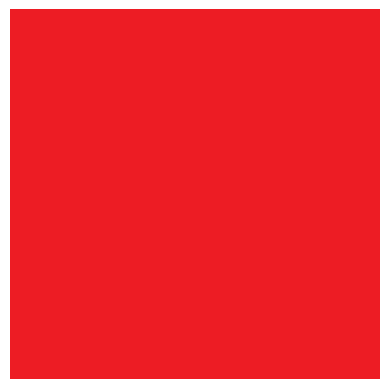

In [6]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_f = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjdlMWY0Yjk3LTQwOGUtNDg3OS1iODkyLWEzOGZjZWJmY2Q3MTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz6k2MPRAAADWUlEQVR4nO3TIQEAIADAMCAHkv7N6ECMC7YEN593nwF0Vh0AvzMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCLEHe0QDhbL+L+0AAAAASUVORK5CYII=

"""

img_data_f = base64.b64decode(base64_image_f)
flat = np.array(Image.open(io.BytesIO(img_data_f)))

plt.imshow(flat)
plt.axis("off")

### Edge Image : reference as "edge"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

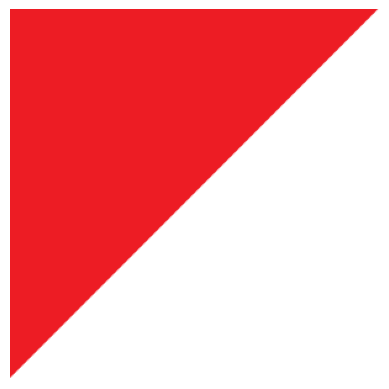

In [7]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_e = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjc3YmYzYTY2LTc4N2YtNDY5MS1iYzVmLTM0ZmUzMTgzOWYwMDwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz4ajv+YAAAJ4klEQVR4nO3T7Y9U5RnH8euc2d2ZObNnRHyARQG1amzStMbaWq2JMTFtjUZrGxqUivIsaJVWEAShQqUSjBUtkkgLWnZpu8vf1r+Bvphledp5OGfu+77uh+/n5WTOff3efLP/3fugAHAuv/++7sJcvnpVrr0ESNFSgSJChIBr1xcoRAg4lq9f152fXSpQiBBwKV+/rnv5Uj6z+oYftdYAqVm2QCFCwI1+BQoRAg4MKFCIELBtcIFChIBVQwsUIgTsydet7c7PDi5QiBCwJF+3trswl9+zZvg/HawBUjN6gUKEgHGVChQiBMyqWqAQIWBQjQKFCAFT8nvvqVGgECFgRL5mppyfrVGgECEwvnzNTHn5UmPd2pqfm10DpGbMAoUIgXGMX6AQIVCbkQKFCIF6TBUoRAjUYLBAIUKgqnxmdTk/a6pAIUKgknxmdbkw17hvvck3Db4FxM1GgUKEwIgsFShECIzCXoFChMBQVgsUIgQGs12gECEwQLbq7vK/F60WKEQI9JOturu7MNd44H7bh4gQWIazAoUIgVu5LFCIELiJ4wKFCIHruS9QiBBYolKgECHQk911V3d+1n2BQoSA9Aq8PNf43gMq14kQqdMtUIgQiVMvUIgQKfOhQCFCJMuTAoUIkSZ/ChQiRIKyO+/ozl/0pEAhQqQmu/OO7sJc46EHtYdcQ4RIiIcFChEiHX4WKESIRHhboBAhUuBzgUKEiJ7nBQoRIm7ZypXd+VmfCxQiRMSylSu7l+caDz+kPWQIIkScQilQiBBRCqhAIULEJ6wChQgRmeAKFCJETEIsUIgQ0chuXxFigUKEiEN2+4ruwqUQCxQiRAQWC3zkYe0hNREhwhZ6gUKECFoEBQoRIlxxFChEiEBFU6AQIUKUrbgtmgKFCBGcbMVt5cJcNAUKESIsvQInvv+I9hCTiBDBiLJAIUKEItYChQgRhIgLFCKE/+IuUIgQnsu63bgLFCKEz7Jut/zPv+IuUIgQ3los8Ic/0B5iHRHCR+kUKEQIDyVVoBAhfJNagUKE8EqCBQoRwh9ZWSZYoBAhPJGVZfnvbxMsUIgQPlgs8NEfaQ/RQYRQlniBQoTQRYFChFBEgT1ECB0UuIQIoYACr0eEcC2b7pRzFyhwCRHCqWy6U176buKxR7WHeIQI4Q4FLosI4QgF9kOEcIECByBCWEeBgxEh7KLAoYgQFmWdopy9QIGDESFsyTpFOXdh4vHHtIf4jghhxdUCf6w9JABECPMosBIihGEUWBURwiQKrIEIYQwF1kOEMKRoT188T4E1ECFMKNrlxfOTP31ce0eQiBBj6xX4xE+0d4SKCDEeChwbEWIMFGgCEaIuCjSECFELBZpDhKiu3Sq/+wcFmkKEqKhX4JNPaO+IBxGiil6BT/1Me0dUiBAjo0A7iBCjoUBriBAjoECbiBDDUKBlRIiBWs3y23MUaBURor9egT9/UntH5IgQffQKfPop7R3xI0IshwIdIkLcggLdIkLciAKdI0JchwI1ECGuak5RoAoihIiINKfK899QoAoixNUCn3lae0eiiDB5FKiNCNNGgR4gwoRRoB+IMFUU6A0iTNIUBXqECNMzNVX+8ywF+oMIE9Mr8NlntHfgGiJMCQV6iQiTQYG+IsI0UKDHiDABFOg3Iozd5CQFeo4IozY5OX3uawr0HBHGa3Jy+tzXU889q70DQxBhpCgwHEQYIwoMChFGhwJDQ4RxocAAEWFEJiYoMEREGIuJielv/k6BISLCKPQK/MVz2jtQBxGGjwIDR4SBo8DwEWHIKDAKRBgsCowFEYaJAiNChAGaaEyfPU2B0SDC0Ew0ps9+OfX8L7V3wBgiDAoFxogIw0GBkSLCQFBgvIgwBBQYNSL0HgXGjgj91mhMnzlNgXEjQo81Gp0zX0y98CvtHbCLCH3VaHTOfNF88XntHbCOCL1EgSkhQv9QYGKI0DMUmB4i9AkFJokIvZHnna8+p8AEEaEfegW+9IL2DiggQg/0Cnz5Re0d0EGE2igweUSoigJBhJooECJChGooEFcRoYY873z5GQWihwidy/PO6VPNX7+kvQO+IEK3egW+8rL2DniECB2iQCyHCF2hQPRBhE5QIPojQvsoEAMRoWVZ1vnbSQrEAERoU5Z1Pj/Z/O0r2jvgNSK0plfght9o74DviNAOCsTIiNACCkQVRGgaBaIiIjSKAlEdEZpEgaiBCI3pnDpBgaiBCM3onDrRfPV32isQJCI0gAIxDiIcFwViTEQ4FgrE+IiwPgqEEURYEwXCFCKso/j0OAXCFCKsrPj0eOv3r2qvQDyIsBoKhHFEWAEFwgYiHBUFwhIiHAkFwh4iHI4CYRURDlF88jEFwioiHKT45OPWG5u0VyByRNgXBcINIlweBcIZIlwGBcIlIrwZBcIxIrwBBcI9IrymOHaEAuEeES4qjh1pbd2svQIpIkIRCoQqIqRAKEs9QgqEuqQjpED4IN0IKRCeSDTC4ughCoQnUoywOHqotWOL9gpgUXIRUiB8k1aEFAgPJRQhBcJPqURIgfBWEhFSIHwWf4TFkYMUCJ9FHmFx+EBr5zbtFcAgMUdYHD7Qemu79gpgiGgjpECEIs4IKRABiTBCCkRYYouQAhGcqCJsH9pPgQhOPBG2D+5r796pvQKoLJII2wf3td/epb0CqCOGCCkQQQs+QgpE6MKOkAIRgYAjpEDEIdQI2x/8iQIRhyAjbO/b2/7Dbu0VgBnhRdjet7f93tvaKwBjAouQAhGfkCKkQEQpmAgpELEKI0IKRMQCiLC19x0KRMR8j7D17p7i/fe0VwAWeR1h6909xf4/aq8A7PI3QgpEIjyNkAKRDh8jpEAkxbsIKRCp8SvC1jtvUSBS41GErT07iwPva68AXPMlwtaencWH+7VXAAq8iJACkTL9CCkQiVOOkAIBzQgpEBDFCFu7d1AgIFoRtnZtKw59oHIa8I1ChK1d24qPDrq/C/jJdYQUCNzEaYQUCNzKXYQUCCzLUYQUCPTjIsLWjq0UCPRjPcLW9jeLox/avgKEy26Ere1vFn8+bPUEEDqLEVIgMApbEVIgMCIrEVIgMDrzEVIgUInhCJtb36BAoBKTETa3vN459pHBB4EUGIuwueX1zvGjpl4D0mEmQgoEajMQIQUC4xg3QgoExjRWhBQIjK9+hBQIGFEzwubm1ygQMKJOhM3Nr3VOHDM+BUhT5QgpEDCrWoQUCBhXIUIKBGwYNUIKBCwZKUIKBOwZHmFz00YKBOwZEmFz08bOyb+4mQKkaVCEFAg40DdCCgTcWD5CCgScWSZCCgRcujlCCgQcuyHC5sYNFAg4di3C5sYNnc/+qjgFSNNihBQIaMmFAgFVOQUCurIrV65obwCS9n9NRCNhe9hOWgAAAABJRU5ErkJggg==

"""

img_data_e = base64.b64decode(base64_image_e)
edge = np.array(Image.open(io.BytesIO(img_data_e)))

plt.imshow(edge)
plt.axis("off")

### Corner Image : reference as "corner"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

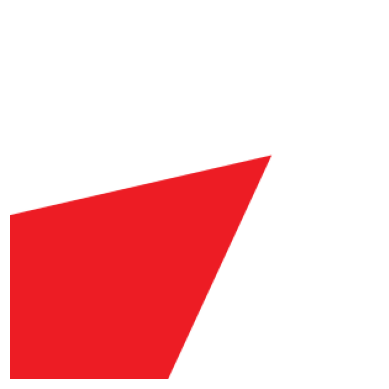

In [8]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_c1 = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjhkYWIzZjdhLTU0NDMtNDIwMy1hNWQ0LWY2Zjg1YTcyNGZlZTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz7b9SPRAAAMEElEQVR4nO3d629UdR7H8XOd82taaIvA2houcjFKSQAlTYNazYIiCoQSKtY0BUpbWtz/bpN9tFl1N6vrdmYKIt6X9bIr3nZxFUXomZl9QEMBK51pZ+Zzzvm9X08V+onNu8e03864lUrFAaDjqQcAtiNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0IIlL/86sbv/1C5dk09JBEC9QBYoVIqld77IM4X4vxMnC+U//1F0Ls7d+h59a5EIEI0SuXq1bh4Ls4X43wxnjlXufrj7f+05XeTqmFJQ4Sop9Ln/4qnC3FhJs4XSu9/6JTLC/5r/tYt4dP9Td6WWESIZanEcenCxbnHXb5Y/vrrav6UOTvhuG6jt6WFW6lU1BuQMuXv/hcXinFhJp4uxOffdq79XNMf97rub3/jVTfgATCH/xCoQqVS+ucn8/+f+fElZxlfu6OxkxR4O56EWFjl+o34/NtxvhgXinG+WPnvlbr8tW5He8ebr7ltbXX527KBL0iYV/72P3PVTRfjC+84N27U/UNEwy9T4F14EtqtXC599HGcL87e/LbKJ5829sMZ0/HGq96a1Y39KGnDk9A6lZ9+imfOzz3xCucq33/ftA8dHRugwF8iQiuUv/wqni7MFopxvli6+J4Tx4IRnmcmRgUfN/GIMJt+eSamXuTknt/vP7hRvSKJiDA7Kj/8EBfOxYXibL4Yz5xzfvxJvegO5pUz6gkJRYTpVuWZmFywpy/Y3qNekVBEmDKV2dnSO+/WeiYm13J2Qj0huYgwBcpXvrv5E/M4X4zPv+38fF29qDb+tofD/ifUK5KLCBOprmdicmaKc+17IcKkqFy/Hp+/UPczMTlv/brcwQPqFYlGhErlb7699VOE+MJFZ3ZWvaj+DOfai+FsrbmafCam5nZ2drz1utvSoh6SaHyJajjhmZicOTlMgYviSdgQ5ctfxtOFm4+70rvvOaWSepGCMR1vve6tWqXekXQ8CesjgWdictHQIAVWgwiXLuFnYmK+b06fVI9IByKsTenTz25dq5Q+/CixZ2JyuYMH/A3r1SvSgQgXkdIzMTkzxZ1atYhwAeUrV+LCTHrPxOTCJx8Peh5Rr0gNInQc5/YzsWL890Lp0iWH7xkvA7+1VBN7I8zqmZicv31buKdPvSJN7IrQhjMxuZazZzjXrknWf1h/60xsuhBPF8qffa4elHHe+nXtf/mj6/GWezXI4JPQ5jMxOTNxmgJrlZEnYfmLy7euou09E1NzV9/X8carHIvWKq1PwvkzselCPF0sX76sXgTHnOBceynS9CTkTCzJ3NbW9jdf8zo71EPSJ+lPQs7E0iI6fowClyZxT8L5M7Hp/Gy+WPnmW/UiVMH32//6J/+BbvWOVErEk5AzsbTLHTlEgUsmirBSKf3j0q134eJMLN1cXlZ0WZoX4fyZ2HQ+LsxUrnzXtA+Nhgqf6vcf2qpekWKNjZAzMRtwrr1MdY6wUi6XP/hoNl+ICzOcidkg2LUj7OtVr0i3OkQ4fyY2XYiLM5Ufri7/70Ra8Mu7y7fECDkTg+M4/uZN4f596hWpV22ElTguvfv+re9nciYGx3HM+CnOtZfvXj+sv3kmNnvzPnPmvHPtWjOXIeHctWs63nzNzeXUQ1Lv7ichZ2Kokjl9ggLrwi1fv1565+LsdLFUKHImhiq5ba3tf/uz175SPSQLgis9j3ImhlpFw0MUWC8eBaJmYWhOjahHZAff2kLNooHDXneXekV2ECFq5Dpmalw9IlOIELUJ9+31t2xWr8gUIkRt+K2luiNC1CB4bFew+1H1iqwhQtTA8BhsACJEtfzNm3LP7FWvyCAiRLXM1DhvMtEIRIiqeF335wYOq1dkExGiKtGpEc61G4QIsTh35QozPKRekVlEiMVFI8Puijb1iswiQiwmDM0o59oNRIRYRDR41FuzWr0iy4gQ9+R5ZnJMPSLjiBD3Ej67139wo3pFxhEh7oVz7SYgQvyqoK832LVTvSL7iBC/isdgcxAhFuZvezh8ul+9wgpEiIWZ8VHOtZuDCLEAr7srd+SQeoUtiBALMBOjbpCIt1K3ARHibm5He3T8mHqFRYgQd4tODLttnGs3DxHiTsaYE8PqEXYhQtwhepFz7WYjQtzG88zEafUI6xAh5uWe3+9vWK9eYR0ixDzzyhn1BBsRIeYEe/qC7T3qFTYiQszhXFuFCOE4N8+1+59Qr7AUEcJxHMdMTXCurUKEcLz163IHD6hX2IsI4Zixk5xrCxGh7dzOzuilQfUKqxGh7czoiNvSol5hNSK0mzER59pqRGi1aGjQ6+xQr7AdEVrM980ZXl1bjwjtlTt4wH+gW70CRGgt1zFT3KklAhFaKux/Muh5RL0CjkOE1jJT4+oJmEOENgp27gj39KlXYA4R2shM8OraCUKE1vE2bghfeE69AvOI0DpmYtT1+LwnCJ8Mu7ir74uODahX4A5EaBfOtROICC3itrZGwy+rV+BuRGiR6OXjnGsnEBFaw/fN2En1CCyACG2RO3LI6+5Sr8ACiNAOLi8rmlxEaIXwqX7/oa3qFVgYEVqBN5lIMiLMvmDXjrCvV70Cv4oIs49f3k04Isw4f/OmcP8+9QrcCxFmnJka51w74fj0ZJm7dk1u4LB6BRZBhFlmxk65uZx6BRZBhJnltrWa4SH1CiyOCDMrGh5yV7SpV2BxRJhRYWjGTqlHoCpEmE3RwGHvN2vVK1AVIswiz+NlRVOECDMofOa3/pbN6hWoFhFmUMskj8E0IcKsCXp3B7sfVa9ADYgwa8yZ0+oJqA0RZoq/dUvumb3qFagNEWaKmRzjTSZShwizw+u6P3fkkHoFakaE2RGNneRcO42IMCPclSvM0HH1CiwFEWZENDLMuXZKEWEmhKEZHVGPwBIRYRZEg0e9NavVK7BERJh+nmcmx9QjsHREmHrhs3v9BzeqV2DpiDD1eJOJtCPCdAv6eoNdO9UrsCxEmG48BjOACFPM3/Zw+HS/egWWiwhTzExNcK6dAUSYVl53V+7gAfUK1AERppWZHHODQL0CdUCEqeR2tEcvDapXoD6IMJWiE8NuS4t6BeqDCFPIGM61s4QI0yd68ai3apV6BeqGCNPG980Er6eWKUSYMrkXnvM3rFevQD0RYcrwJhPZQ4RpEj75eLC9R70CdUaEacKra2cSEaaGv31b2P+EegXqjwhTo2VynHPtTCLCdPDWrwtfeE69Ag1BhOlgJk5zrp1VRJgCbmdn9OJR9Qo0ChGmgBkd4Vw7w4gw8YyJTgyrR6CBiDDpoqFBr7NDvQINRITJ5vvmDK+unXFEmGi5gwf8B7rVK9BYRJhgrmOmeFnR7CPC5Aqf6g96HlGvQMMRYXIZXl3bDkSYUMHOHWFfr3oFmoEIE8qc5dW1bUGESeRt3BDu36degSYhwiRqmRxzPT41tuAznTju6vtyg5xrW4QIE8eMjri5nHoFmocIk8Vta41GONe2CxEmSzR03GtfqV6BpiLCJAlDM3ZSPQLNRoQJEh055HV3qVeg2YgwMVzHTPJbSzYiwqQI9+31H9qqXgEBIkwKMzGqngANIkyE4LFdnGtbiwgTwUzyXkv2IkI9f/Om8Nm96hWQIUI9MzXOubbN+NyLuWvX5AYOq1dAiQjFzNgpzrUt938/QsaulMkBUwAAAABJRU5ErkJggg==

"""

img_data_c1 = base64.b64decode(base64_image_c1)
corner = np.array(Image.open(io.BytesIO(img_data_c1)))

plt.imshow(corner)
plt.axis("off")

### Multiple Coorners : reference as "corner2"

(np.float64(-0.5), np.float64(1499.5), np.float64(1121.5), np.float64(-0.5))

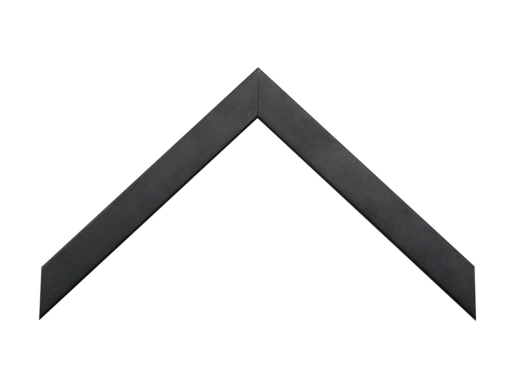

In [9]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_c2 = """
/9j/4QxyRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAlgAAAEBAAMAAAABAcEAAAECAAMAAAADAAAAngEGAAMAAAABAAIAAAESAAMAAAABAAEAAAEVAAMAAAABAAMAAAEaAAUAAAABAAAApAEbAAUAAAABAAAArAEoAAMAAAABAAIAAAExAAIAAAAgAAAAtAEyAAIAAAAUAAAA1IdpAAQAAAABAAAA6AAAASAACAAIAAgAG3dAAAAnEAAbd0AAACcQQWRvYmUgUGhvdG9zaG9wIDI1LjExIChXaW5kb3dzKQAyMDI0OjA3OjI4IDE5OjQ1OjQxAAAEkAAABwAAAAQwMjIxoAEAAwAAAAH//wAAoAIABAAAAAEAAAXcoAMABAAAAAEAAARiAAAAAAAAAAYBAwADAAAAAQAGAAABGgAFAAAAAQAAAW4BGwAFAAAAAQAAAXYBKAADAAAAAQACAAACAQAEAAAAAQAAAX4CAgAEAAAAAQAACuwAAAAAAAAASAAAAAEAAABIAAAAAf/Y/+0ADEFkb2JlX0NNAAL/7gAOQWRvYmUAZIAAAAAB/9sAhAAMCAgICQgMCQkMEQsKCxEVDwwMDxUYExMVExMYEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQ0LCw0ODRAODhAUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAB4AKADASIAAhEBAxEB/90ABAAK/8QBPwAAAQUBAQEBAQEAAAAAAAAAAwABAgQFBgcICQoLAQABBQEBAQEBAQAAAAAAAAABAAIDBAUGBwgJCgsQAAEEAQMCBAIFBwYIBQMMMwEAAhEDBCESMQVBUWETInGBMgYUkaGxQiMkFVLBYjM0coLRQwclklPw4fFjczUWorKDJkSTVGRFwqN0NhfSVeJl8rOEw9N14/NGJ5SkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2N0dXZ3eHl6e3x9fn9xEAAgIBAgQEAwQFBgcHBgU1AQACEQMhMRIEQVFhcSITBTKBkRShsUIjwVLR8DMkYuFygpJDUxVjczTxJQYWorKDByY1wtJEk1SjF2RFVTZ0ZeLys4TD03Xj80aUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9ic3R1dnd4eXp7fH/9oADAMBAAIRAxEAPwD1VJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//Q9VSSSSUpJJJJSkkkklKSSSSUpYf1n+tOJ0GgN0uz7gTj4wPbj1rv9Hjtd+d/hP5upA+tf1wxuhV/Z6A3I6nY2a6D9FgP+HytvubX+5V/O5H/AG5dV5bk5V+VfZlZVjr8m87rbncuPy9rWM/wdbP0daSn1f6rfWvF67R6T9tPUahN1HZw4+0Y8/Spd+7/ADlH83b/AIK23eXhWPfbj2V30WOpvpO6q1hhzXeLf9fevTvqj9cqustbhZu2nqbWzA0ZcAPdZR/Lb/haPzP+LSU9OkkkkpSSSSSlJJJJKUkkkkp//9H1VJJJJSkkkklKSSSSUpcp9cfrrX0cO6f08tt6o4DcTqyhrh7X3fvXOb/M4/8A1239Fs9at9cfryMF1nS+kPDs4e3IydHNo/kMn22Zf8j6FH+F/wBCvN3n3FziXPeS57nEuc5zjL3vc73Pe9303pKSWOsusffc91t1rt9trzLnOPLnuV7ofQM/r2b9lwxtrYR9qynCWUtP/nzJe3+Zx/8Arl2ylF+rH1czfrHlurqJowKHRl5oHB5+zY2722Zbvzv8Fifzl36T0qLfW+ndNwul4deFg1CnHqHtaNSSdXPe53usse76dj/e9JT4/wBd6B1DoGZ9lzBvqsJ+y5bRDLWjsf8AR5LG/wA7R/1yn9Es+ux1bmvYSyxhD2PaS1zXN1a9j2+5j2r3DqPTcLqmHZhZ1Qux7R7mnQgj6L2Ob7q7GfmWM97F5F9aPq1m/VzMbXaTfgXujEzYiTz9mydvtry/3f8ABZf85T7/AFaKkp7f6n/XhnUyzp3VXNr6jxVbo1l8f9GvJ/fq+hZ/OUf6GrsF4GGbh8wZB4I1EQvRfqd9djd6fS+s2fpzDMbMdoLOzacg/m5H+jt/7Uf+GP59Ke3SSSSUpJJJJSkkkklP/9L1VJJJJSkkkklKXA/XL6+bDZ0nodn6USzKzmH6HZ9GI786/wD0t/8A2n/wf6x/Rqf10+vjss2dK6JaW4olmTnMMGzs6nEeP8D/AKTJb/O/4D2fpVw7YaA1ggDQAaaJKSSGja0fBb31U+qGX9YrfXsc7H6Ux0WZA0dYQYfTif8AU25P+C+hV+m/mZ/U/wCpd/1gsbm5u6norDJIJa/JI/wVDh7q8T/TZLf53+axv9PX61TTVRUyihjaqamhldbAGta1o2sYxjfa1jWpKR4WDidPxKsLCqbRjUN21VMEAD/zL89356OkkkpSBnYOJ1DEtws2pt+Ne3bbU8SCP/MfpMd+YjpJKfIfrP8AVTM+rtvqNLsjpb3RTknV1ZOjKMv+V+bVkfQu/P8A0387iEggtIkHQg/xXu11NORS+i9jbabWlllbwHNc1w2uY9jva5rl5P8AW/6n5H1etdmYm67oth0cZc/GJ/wV7j7rMX/QZTv5v+Zyf9PalOx9UPr0aDX0zrVs0GG4+a86s7Nqy3n8z9zJd/1//Sr0NeBh7Tp2XXfVD68u6WK+m9VeX9OENpyDq7HH5tdn5z8T938/F/8AC39HSn05JRY9ljGvY4OY4BzXNMgg6hzSFJJSkkkklP8A/9P1VJJDyMijFosyMmxtNFTS+yx5DWtaPpOc5ySmVljK2OsscGMYC573GAANXOc4/Ra1eW/XL69WdW39N6U819M1bdeJDsgd2N/Orw/+nk/8R/PVfrl9druvvOFhF1PSGHgy1+QQdLL2/SZj/wChxv8AruR/oaeWc8NBc4gAckpKZF4aPAAfAABdl9SvqK7qza+rdWYWdNdDsfGdIdkD8220fSrw3f4Nn08v/wALf0k/1M/xfOyjX1Tr9RGOIfjdPsGrzy27NYf8F/o8R30/+1P+hXpiSmLGMYxrGNDWNADWgQABw1oUkkklKSSSSUpJJJJSlF7GWMdXY0PY8FrmuEgg6Oa5pUkklPlf10+otnRxZ1XpLTZ0xvuyMcS52OO9lf51mE38/wDPxP8Awv8AzHJMcHDTjkEGefNfQK8y+uf1BdgOs6r0KouwyS/JwGCTUTq+7DYP+0/+kxf8D/2n/R/oWJTU+p/1yt6E5uFml1vSXHgAufjk/wCEpb9J+P8A6XH/ADP5zH/0NvqlF9ORSy/HsbbTa0PrsYQ5rmnVrmOb9Jq8Aba0gEGQeCNQug+qn1wyvq/f6Tg7I6ZY6bsYfSYSfdfiT+f+dZR9C7/jvppT7GkgYOdidQxKszCtbfjXt3V2N4I4/sua72vY76D0dJT/AP/U9VXk3+MrrWdk9cu6O+zbgYXpObS3QPe9jL/Vv/0np7/0TPoM+n/OL1leJfXp7rPrn1JlbXWWPupqrrYC5z3+hjsZXWxvufY9/wBFjUlOE54aJJ0XpH1E+oL6TX1rr1UXiH4WA8fzXduTlN/7l/6Gj/tJ/wCG/wCjW/qT9QGdMNfVOstbZ1Ie6nH0czH85+jblf8AC/zdX+A/0z+3SUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU+efXn6gF3q9Z6DVN2r8vp7B/Od334bf+5P8ApMb/ALVf4L9Z/pPnddzXAOaQWnUFfQ64P67/AOL8Zzrer9EYGZzpfk4ghrbz+dbX+bXl/vfmZH+E/S/pElPP/wCL3q+bifWHH6fVZ+pdQc8X0HVu9tVlrL6/9Hd+hZW//S1fzn+B9P1xeH/U2xzPrd0trgWOZkOrexwLXNd6dzHMex3ua9rvpNXuCSn/1fVVgdL+qOFidfzvrDkkZPUMuxxocRDaKy1tW2pri79YtrZ+nyP3P0Neyv1fW30klKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTzvVvqdh5nXcH6wYpGN1DEuY/IIHsvrHsIta3/ALUVVu/QX/8AWLv0fpeh0SSSSn//1vVUl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKf/2f/tFSxQaG90b3Nob3AgMy4wADhCSU0EBAAAAAAADxwBWgADGyVHHAIAAAIAAAA4QklNBCUAAAAAABDNz/p9qMe+CQVwdq6vBcNOOEJJTQQ6AAAAAAGNAAAAEAAAAAEAAAAAAAtwcmludE91dHB1dAAAAAcAAAAAQ2xyU2VudW0AAAAAQ2xyUwAAAABSR0JDAAAAAE5tICBURVhUAAAAJwBTAEMALQBQADEAMAAwADAAMABfAFMAZQByAGkAZQBzACAAQwBvAGwAZABQAHIAZQBzAHMAQgByAGkAZwBoAHQAXwBNAEsAXwB2ADEAAAAAAABJbnRlZW51bQAAAABJbnRlAAAAAENscm0AAAAATXBCbGJvb2wBAAAAD3ByaW50U2l4dGVlbkJpdGJvb2wAAAAAC3ByaW50ZXJOYW1lVEVYVAAAABgAXABcAGcAYgBpADAAMQBwAGQAYwAwADEAXABHAEIASQAwADEAUABSAE4AMQAyAAAAAAAPcHJpbnRQcm9vZlNldHVwT2JqYwAAAAwAUAByAG8AbwBmACAAUwBlAHQAdQBwAAAAAAAKcHJvb2ZTZXR1cAAAAAEAAAAAQmx0bmVudW0AAAAMYnVpbHRpblByb29mAAAACXByb29mQ01ZSwA4QklNBDsAAAAAAi0AAAAQAAAAAQAAAAAAEnByaW50T3V0cHV0T3B0aW9ucwAAABcAAAAAQ3B0bmJvb2wAAAAAAENsYnJib29sAAAAAABSZ3NNYm9vbAAAAAAAQ3JuQ2Jvb2wAAAAAAENudENib29sAAAAAABMYmxzYm9vbAAAAAAATmd0dmJvb2wAAAAAAEVtbERib29sAAAAAABJbnRyYm9vbAAAAAAAQmNrZ09iamMAAAABAAAAAAAAUkdCQwAAAAMAAAAAUmQgIGRvdWJAb+AAAAAAAAAAAABHcm4gZG91YkBv4AAAAAAAAAAAAEJsICBkb3ViQG/gAAAAAAAAAAAAQnJkVFVudEYjUmx0AAAAAAAAAAAAAAAAQmxkIFVudEYjUmx0AAAAAAAAAAAAAAAAUnNsdFVudEYjUHhsQGaAAAAAAAAAAAAKdmVjdG9yRGF0YWJvb2wBAAAAAFBnUHNlbnVtAAAAAFBnUHMAAAAAUGdQQwAAAABMZWZ0VW50RiNSbHQAAAAAAAAAAAAAAABUb3AgVW50RiNSbHQAAAAAAAAAAAAAAABTY2wgVW50RiNQcmNAWQAAAAAAAAAAABBjcm9wV2hlblByaW50aW5nYm9vbAAAAAAOY3JvcFJlY3RCb3R0b21sb25nAAAAAAAAAAxjcm9wUmVjdExlZnRsb25nAAAAAAAAAA1jcm9wUmVjdFJpZ2h0bG9uZwAAAAAAAAALY3JvcFJlY3RUb3Bsb25nAAAAAAA4QklNA+0AAAAAABAAtAAAAAEAAQC0AAAAAQABOEJJTQQmAAAAAAAOAAAAAAAAAAAAAD+AAAA4QklNA/IAAAAAAAoAAP///////wAAOEJJTQQNAAAAAAAEAAAAWjhCSU0EGQAAAAAABAAAAB44QklNA/MAAAAAAAkAAAAAAAAAAAEAOEJJTScQAAAAAAAKAAEAAAAAAAAAAThCSU0D9QAAAAAASAAvZmYAAQBsZmYABgAAAAAAAQAvZmYAAQChmZoABgAAAAAAAQAyAAAAAQBaAAAABgAAAAAAAQA1AAAAAQAtAAAABgAAAAAAAThCSU0D+AAAAAAAcAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAA4QklNBAgAAAAAACkAAAABAAACQAAAAkAAAAAFAACGUQEAAF3AAAAAC0AAAACxAwAAAHxSAQA4QklNBEQAAAAAAD0AAAACAAACQAAAAkAAAAAFAACGUQEASoT/AABdwAAASoT/AAALQAAASoT/AACxAwAASoT/AAB8UgEASoT/ADhCSU0EHgAAAAAABAAAAAA4QklNBBoAAAAAA0kAAAAGAAAAAAAAAAAAAARiAAAF3AAAAAoARwAtADIAOQAwADUAIAAtACAAMQAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAF3AAABGIAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAQAAAAAAAG51bGwAAAACAAAABmJvdW5kc09iamMAAAABAAAAAAAAUmN0MQAAAAQAAAAAVG9wIGxvbmcAAAAAAAAAAExlZnRsb25nAAAAAAAAAABCdG9tbG9uZwAABGIAAAAAUmdodGxvbmcAAAXcAAAABnNsaWNlc1ZsTHMAAAABT2JqYwAAAAEAAAAAAAVzbGljZQAAABIAAAAHc2xpY2VJRGxvbmcAAAAAAAAAB2dyb3VwSURsb25nAAAAAAAAAAZvcmlnaW5lbnVtAAAADEVTbGljZU9yaWdpbgAAAA1hdXRvR2VuZXJhdGVkAAAAAFR5cGVlbnVtAAAACkVTbGljZVR5cGUAAAAASW1nIAAAAAZib3VuZHNPYmpjAAAAAQAAAAAAAFJjdDEAAAAEAAAAAFRvcCBsb25nAAAAAAAAAABMZWZ0bG9uZwAAAAAAAAAAQnRvbWxvbmcAAARiAAAAAFJnaHRsb25nAAAF3AAAAAN1cmxURVhUAAAAAQAAAAAAAG51bGxURVhUAAAAAQAAAAAAAE1zZ2VURVhUAAAAAQAAAAAABmFsdFRhZ1RFWFQAAAABAAAAAAAOY2VsbFRleHRJc0hUTUxib29sAQAAAAhjZWxsVGV4dFRFWFQAAAABAAAAAAAJaG9yekFsaWduZW51bQAAAA9FU2xpY2VIb3J6QWxpZ24AAAAHZGVmYXVsdAAAAAl2ZXJ0QWxpZ25lbnVtAAAAD0VTbGljZVZlcnRBbGlnbgAAAAdkZWZhdWx0AAAAC2JnQ29sb3JUeXBlZW51bQAAABFFU2xpY2VCR0NvbG9yVHlwZQAAAABOb25lAAAACXRvcE91dHNldGxvbmcAAAAAAAAACmxlZnRPdXRzZXRsb25nAAAAAAAAAAxib3R0b21PdXRzZXRsb25nAAAAAAAAAAtyaWdodE91dHNldGxvbmcAAAAAADhCSU0EKAAAAAAADAAAAAI/8AAAAAAAADhCSU0EEQAAAAAAAQEAOEJJTQQUAAAAAAAEAAAA4ThCSU0EDAAAAAALCAAAAAEAAACgAAAAeAAAAeAAAOEAAAAK7AAYAAH/2P/tAAxBZG9iZV9DTQAC/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAeACgAwEiAAIRAQMRAf/dAAQACv/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NGlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A9VSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//0PVUkkklKSSSSUpJJJJSkkkklKWH9Z/rTidBoDdLs+4E4+MD249a7/R47Xfnf4T+bqQPrX9cMboVf2egNyOp2Nmug/RYD/h8rb7m1/uVfzuR/wBuXVeW5OVflX2ZWVY6/JvO6253Lj8va1jP8HWz9HWkp9X+q31rxeu0ek/bT1GoTdR2cOPtGPP0qXfu/wA5R/N2/wCCtt3l4Vj3249ld9Fjqb6TuqtYYc13i3/X3r076o/XKrrLW4Wbtp6m1swNGXAD3WUfy2/4Wj8z/i0lPTpJJJKUkkkkpSSSSSlJJJJKf//R9VSSSSUpJJJJSkkkklKXKfXH6619HDun9PLbeqOA3E6soa4e19371zm/zOP/ANdt/RbPWrfXH68jBdZ0vpDw7OHtyMnRzaP5DJ9tmX/I+hR/hf8AQrzd59xc4lz3kue5xLnOc4y973O9z3vd9N6SkljrLrH33Pdbda7fba8y5zjy57le6H0DP69m/ZcMba2EfaspwllLT/58yXt/mcf/AK5dspRfqx9XM36x5bq6iaMCh0ZeaBwefs2Nu9tmW787/BYn85d+k9Ki31vp3TcLpeHXhYNQpx6h7WjUknVz3ud7rLHu+nY/3vSU+P8AXegdQ6BmfZcwb6rCfsuW0Qy1o7H/AEeSxv8AO0f9cp/RLPrsdW5r2EssYQ9j2ktc1zdWvY9vuY9q9w6j03C6ph2YWdULse0e5p0II+i9jm+6uxn5ljPexeRfWj6tZv1czG12k34F7oxM2Ik8/Zsnb7a8v93/AAWX/OU+/wBWipKe3+p/14Z1Ms6d1Vza+o8VW6NZfH/Rryf36voWfzlH+hq7BeBhm4fMGQeCNREL0X6nfXY3en0vrNn6cwzGzHaCzs2nIP5uR/o7f+1H/hj+fSnt0kkklKSSSSUpJJJJT//S9VSSSSUpJJJJSlwP1y+vmw2dJ6HZ+lEsys5h+h2fRiO/Ov8A9Lf/ANp/8H+sf0an9dPr47LNnSuiWluKJZk5zDBs7OpxHj/A/wCkyW/zv+A9n6VcO2GgNYIA0AGmiSkkho2tHwW99VPqhl/WK317HOx+lMdFmQNHWEGH04n/AFNuT/gvoVfpv5mf1P8AqXf9YLG5ubup6KwySCWvySP8FQ4e6vE/02S3+d/msb/T1+tU01UVMooY2qmpoZXWwBrWtaNrGMY32tY1qSkeFg4nT8SrCwqm0Y1DdtVTBAA/8y/Pd+ejpJJKUgZ2DidQxLcLNqbfjXt221PEgj/zH6THfmI6SSnyH6z/AFUzPq7b6jS7I6W90U5J1dWToyjL/lfm1ZH0Lvz/ANN/O4hIILSJB0IP8V7tdTTkUvovY22m1pZZW8BzXNcNrmPY72ua5eT/AFv+p+R9XrXZmJuu6LYdHGXPxif8Fe4+6zF/0GU7+b/mcn/T2pTsfVD69Gg19M61bNBhuPmvOrOzast5/M/cyXf9f/0q9DXgYe06dl131Q+vLulivpvVXl/ThDacg6uxx+bXZ+c/E/d/Pxf/AAt/R0p9OSUWPZYxr2ODmOAc1zTIIOoc0hSSUpJJJJT/AP/T9VSSQ8jIoxaLMjJsbTRU0vsseQ1rWj6TnOckplZYytjrLHBjGAue9xgADVznOP0WtXlv1y+vVnVt/TelPNfTNW3XiQ7IHdjfzq8P/p5P/Efz1X65fXa7r7zhYRdT0hh4MtfkEHSy9v0mY/8Aocb/AK7kf6GnlnPDQXOIAHJKSmReGjwAHwAAXZfUr6iu6s2vq3VmFnTXQ7HxnSHZA/NttH0q8N3+DZ9PL/8AC39JP9TP8Xzso19U6/URjiH43T7Bq88tuzWH/Bf6PEd9P/tT/oV6YkpixjGMaxjQ1jQA1oEAAcNaFJJJJSkkkklKSSSSUpRexljHV2ND2PBa5rhIIOjmuaVJJJT5X9dPqLZ0cWdV6S02dMb7sjHEudjjvZX+dZhN/P8Az8T/AML/AMxyTHBw045BBnnzX0CvMvrn9QXYDrOq9CqLsMkvycBgk1E6vuw2D/tP/pMX/A/9p/0f6FiU1Pqf9crehObhZpdb0lx4ALn45P8AhKW/Sfj/AOlx/wAz+cx/9Db6pRfTkUsvx7G202tD67GEOa5p1a5jm/SavAG2tIBBkHgjULoPqp9cMr6v3+k4OyOmWOm7GH0mEn3X4k/n/nWUfQu/476aU+xpIGDnYnUMSrMwrW3417d1djeCOP7Lmu9r2O+g9HSU/wD/1PVV5N/jK61nZPXLujvs24GF6Tm0t0D3vYy/1b/9J6e/9Ez6DPp/zi9ZXiX16e6z659SZW11lj7qaq62Auc9/oY7GV1sb7n2Pf8ARY1JThOeGiSdF6R9RPqC+k19a69VF4h+FgPH813bk5Tf+5f+ho/7Sf8Ahv8Ao1v6k/UBnTDX1TrLW2dSHupx9HMx/Ofo25X/AAv83V/gP9M/t0lKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklPnn15+oBd6vWeg1Tdq/L6ewfznd9+G3/uT/AKTG/wC1X+C/Wf6T53Xc1wDmkFp1BX0OuD+u/wDi/Gc63q/RGBmc6X5OIIa28/nW1/m15f735mR/hP0v6RJTz/8Ai96vm4n1hx+n1WfqXUHPF9B1bvbVZay+v/R3foWVv/0tX85/gfT9cXh/1Nscz63dLa4FjmZDq3scC1zXencxzHsd7mva76TV7gkp/9X1VYHS/qjhYnX876w5JGT1DLscaHEQ2istbVtqa4u/WLa2fp8j9z9DXsr9X1t9JJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU871b6nYeZ13B+sGKRjdQxLmPyCB7L6x7CLWt/wC1FVbv0F//AFi79H6XodEkkkp//9b1VJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn/9k4QklNBCEAAAAAAFcAAAABAQAAAA8AQQBkAG8AYgBlACAAUABoAG8AdABvAHMAaABvAHAAAAAUAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwACAAMgAwADIANAAAAAEAOEJJTQQGAAAAAAAHAAgAAAABAQD/4RowaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA5LjEtYzAwMiA3OS5hNmE2Mzk2LCAyMDI0LzAzLzEyLTA3OjQ4OjIzICAgICAgICAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczp4bXBNTT0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1sbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50IyIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1wTU06RG9jdW1lbnRJRD0iYWRvYmU6ZG9jaWQ6cGhvdG9zaG9wOjU1NDFjMWM1LTU0ZDEtNDA0Yy1hYjc3LTI1NDcwMjNhMTllMSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo3MGEyNzA5NC1lYmJmLTJlNDMtODc1NC1mZWI1YmFhYTJiZGQiIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0iQTRERjlENDM5NDZBRkRDRUYwQzBEQkI3QUIyMTM1NzEiIGRjOmZvcm1hdD0iaW1hZ2UvanBlZyIgcGhvdG9zaG9wOkxlZ2FjeUlQVENEaWdlc3Q9IkNEQ0ZGQTdEQThDN0JFMDkwNTcwNzZBRUFGMDVDMzRFIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIzIiB4bXA6Q3JlYXRlRGF0ZT0iMjAxOS0wMi0yMFQxNDoyNjo0Ni0wNjowMCIgeG1wOk1vZGlmeURhdGU9IjIwMjQtMDctMjhUMTk6NDU6NDEtMDU6MDAiIHhtcDpNZXRhZGF0YURhdGU9IjIwMjQtMDctMjhUMTk6NDU6NDEtMDU6MDAiIHhtcDpDcmVhdG9yVG9vbD0iQWRvYmUgUGhvdG9zaG9wIENDIDIwMTcgKFdpbmRvd3MpIj4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6U2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6YTY2OTZhMzQtMjZmOS1hNjQzLWFjMWUtNjI4MmI5YmNhZGE1IiBzdEV2dDp3aGVuPSIyMDE5LTAyLTIwVDE0OjI5OjQ5LTA2OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAxNyAoV2luZG93cykiIHN0RXZ0OmNoYW5nZWQ9Ii8iLz4gPHJkZjpsaSBzdEV2dDphY3Rpb249InNhdmVkIiBzdEV2dDppbnN0YW5jZUlEPSJ4bXAuaWlkOjcwYTI3MDk0LWViYmYtMmU0My04NzU0LWZlYjViYWFhMmJkZCIgc3RFdnQ6d2hlbj0iMjAyNC0wNy0yOFQxOTo0NTo0MS0wNTowMCIgc3RFdnQ6c29mdHdhcmVBZ2VudD0iQWRvYmUgUGhvdG9zaG9wIDI1LjExIChXaW5kb3dzKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHBob3Rvc2hvcDpEb2N1bWVudEFuY2VzdG9ycz4gPHJkZjpCYWc+IDxyZGY6bGk+MzM0MkI5RjgwRkQzN0FDOTk2QUU0M0NBNkU2QzIyQkY8L3JkZjpsaT4gPHJkZjpsaT4zM0EzRkZDMDkxMTI4RkNFN0I5MjFFODBGQ0FCQUJEOTwvcmRmOmxpPiA8cmRmOmxpPjM2QjhFNUQyRENEM0Q1QTBGNTMzRTA3OEI3QkUyNTNDPC9yZGY6bGk+IDxyZGY6bGk+NDYyNUU3NTc1RUI2MjIyOTM5NUUxMENEMjczQ0VCQUI8L3JkZjpsaT4gPHJkZjpsaT41MUY5QUU1RUMxOENEN0VCQkZBRUQ4MkY0QUJBMjU0RTwvcmRmOmxpPiA8cmRmOmxpPjZGN0E3ODUxMjMzNUQ4NjEyODhFMzVBNjgzMTgyNjNBPC9yZGY6bGk+IDxyZGY6bGk+ODAxNEIwOUQxRTA4NDQyNkZFOTdGQkUxRDM2QTc2QkU8L3JkZjpsaT4gPHJkZjpsaT44MTVEOUJCQjQyNTRFNjMwMzQxQkZCRUZBQjk0RDc0NTwvcmRmOmxpPiA8cmRmOmxpPjg0RTZFQTUzNDhDQzgwODM0QTY1Nzc0N0U5RkUxNkEwPC9yZGY6bGk+IDxyZGY6bGk+ODY5NTFDNUM0OTQxNzQwNjRBMTQ4RjM0NURFNzgxRDA8L3JkZjpsaT4gPHJkZjpsaT45MDRDQjUzNTc4MkU2MjA5NUJBRkM1QUFFREQ5NjVBOTwvcmRmOmxpPiA8cmRmOmxpPjkyQ0VCMDY0NzYyMjMyNTkzQkYwMDg1MTI4RjMxMUNDPC9yZGY6bGk+IDxyZGY6bGk+OTQwOUM1RjREMEQ3MkIzQUU2QkQyQkJDODczMEYyQTE8L3JkZjpsaT4gPHJkZjpsaT45Nzk4MTE2RjlCOUY4OEI5NzVFODVFMDVERUVCRTA3ODwvcmRmOmxpPiA8cmRmOmxpPjk3REIyOUMyOTY1RDM1MEFCOEIxMEZDQUY1Q0FGMDM0PC9yZGY6bGk+IDxyZGY6bGk+QTNFOTg1RDYwNDU0Mzk3RTlEMDVFNDM4QkNDODU2N0Y8L3JkZjpsaT4gPHJkZjpsaT5BQkU5QTFBMUYwRjAzNjZGRERCNEFERUVCNTE2OTcxNTwvcmRmOmxpPiA8cmRmOmxpPkJDMDIwMDQxNTZEMzEyQzA4RDY1RDgxOEQ3NzAzOTUzPC9yZGY6bGk+IDxyZGY6bGk+QkQ1QjZFNzAyNjhERjAxODRGQ0QwODM5MkRGOEU4QjE8L3JkZjpsaT4gPHJkZjpsaT5EMTNDQjk5NEQ2M0FFNzc2RkRGNkNFQzg4RkJGMDhFODwvcmRmOmxpPiA8cmRmOmxpPkQ2M0IzMzBFMTBBNTJGMTc1ODZGNjJFNkIxQzIzNDJEPC9yZGY6bGk+IDxyZGY6bGk+RTRCRjczMkYzMzdBMDU0NjFCRkY4RkUyNjAwOUM4NzM8L3JkZjpsaT4gPHJkZjpsaT5FNkNBMDY2NzRBQkI4NjA1NTNFOTlDQTAyNzgyMUNCNjwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MDRjMmNjODUtNzUwZC1kNjQ2LWI4YjItNmI2MzY5MTdmYTdjPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDowNWEzMWJkYS05M2NkLWU1NDAtYjliZi0wZGE1YmQxM2E2NmE8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjBkNmZhZWM1LTYwYjAtMGU0NS1iY2JkLWU3NDViZmJkMDdjNTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MTI3NmQ2YzAtZGIwOC0zYzQwLWIzZDMtZDJiZGViZGVlNDc3PC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDoxNjI3NmNlNC03MzVhLWJhNDYtYTQzOC1lYThkZGQzYjM4YmE8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjFhZDk1YTQwLWY5YTItNDQ0OC1hM2M3LWY4MzYyOTI4NGNmYTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MjVjMjk5MWItMTRhNC02YzQ0LWE1NmUtMTYzOWJlOTE5MWNmPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDoyYTY4Yjk5Yi05MmIyLTYxNGUtYWY5Zi00ZDcwMjdjM2JiYzc8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjMxODVhM2EyLWVkMDgtM2Q0Mi1iZWIzLThhZDFlNjAwZWEwNjwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6NGJlMWM1MzAtOGY2NC1hNTQ1LWE0MjEtZDBlOWQ4MGMyNmFiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo2ZGU5YTg1ZS1iYzRlLWY4NDctYmViZS1mY2UyMmFhNTJmMmM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjZlNGNkYWZiLTFjNjYtMzI0Mi1hYjRkLTUzNTIzMDE1YjRkMTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ODAxMjQzODAtMGYwNC0xYTQwLTkyYzgtZTExYjExYzNkZmUwPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo4MjBiMjIxZC0wNTUwLTNlNDEtOWZjNy1mNjM5ZTYzYTZjM2Q8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjg2MmZiNTk5LWNhNzctNWQ0OS05MDM1LTYzZmYyNDQ1OWU5MTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ODY0NmQ0MmUtMjdkZi1kMjQ2LWE2NTMtNTMzZmNhOWYxYTJiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo4ZGRkNGNlNS00Mjg5LTdmNGItYmVjZC1hNGE5YWRmNWY5NGM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjhlYzQ2MTYyLWFmZWEtZTg0Yi1iMGM5LTk0NjYwODNhMWI5OTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6OTRkNzEzMTAtOGYyNi01ZDRlLWFjZDktYWQyYTE2Mzc2NjhiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo5NjBlYjQ3NS01M2MyLTExNDgtOGIzMy1lMGQ1MmQzNjliYmQ8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjk2NzIzOWZlLWNjZDAtODU0Zi05ZWRiLWM3YWVlZmZjODM3MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6OWI5N2RiNWYtY2VmZC03NTQ2LTgxMDYtOWFhOTFiNzE3ZTlhPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo5ZDNjZjRkNi02NTk3LTU1NGUtOWIwNS04YzhiZjE3MzI4NTk8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmEzNmMwNzNhLWNhY2MtYTk0Mi1hODMxLTEyNjFiNjRjYjI5MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6YWI0Y2NlMTAtNGE5My1kZDRkLTk0YTYtMGMxZjRmZjU5YjljPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDpiMzk0NmVkYy1iNWU1LWE1NDYtYjQ3Ni04NTA5MDM3NzAzNjM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmUxMGIxZjAyLTMwYmYtMGY0Zi05MmI2LTNiNGEzNDFiMWI5MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ZWYxYTVhM2EtNzJkMi0zODQ1LWIyNzMtNDE2NDZlOTdkNWRjPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDpmMmUzZjRjMi04Mzg2LTA1NDctODFhMS03ODhiZTEyZjU4MDM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmZjZWU1YTEyLWIwNWYtOTA0My05NGNiLTYyNDQ0MTZlMzkzMTwvcmRmOmxpPiA8L3JkZjpCYWc+IDwvcGhvdG9zaG9wOkRvY3VtZW50QW5jZXN0b3JzPiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSJ3Ij8+/+4ADkFkb2JlAGRAAAAAAf/bAIQAAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQIBAQEBAQECAgICAgICAgICAgICAgMDAwMDAwMDAwMDAwMDAwEBAQEBAQECAQECAwICAgMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMD/8AAEQgEYgXcAwERAAIRAQMRAf/dAAQAvP/EAaIAAAAGAgMBAAAAAAAAAAAAAAcIBgUECQMKAgEACwEAAAYDAQEBAAAAAAAAAAAABgUEAwcCCAEJAAoLEAACAQMEAQMDAgMDAwIGCXUBAgMEEQUSBiEHEyIACDEUQTIjFQlRQhZhJDMXUnGBGGKRJUOhsfAmNHIKGcHRNSfhUzaC8ZKiRFRzRUY3R2MoVVZXGrLC0uLyZIN0k4Rlo7PD0+MpOGbzdSo5OkhJSlhZWmdoaWp2d3h5eoWGh4iJipSVlpeYmZqkpaanqKmqtLW2t7i5usTFxsfIycrU1dbX2Nna5OXm5+jp6vT19vf4+foRAAIBAwIEBAMFBAQEBgYFbQECAxEEIRIFMQYAIhNBUQcyYRRxCEKBI5EVUqFiFjMJsSTB0UNy8BfhgjQlklMYY0TxorImNRlUNkVkJwpzg5NGdMLS4vJVZXVWN4SFo7PD0+PzKRqUpLTE1OT0laW1xdXl9ShHV2Y4doaWprbG1ub2Z3eHl6e3x9fn90hYaHiImKi4yNjo+DlJWWl5iZmpucnZ6fkqOkpaanqKmqq6ytrq+v/aAAwDAQACEQMRAD8A3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XF3SNHkkdY441Z3d2CoiKNTO7NwABySffuvdakH827+fBhaHd9T8Q/h/udKqnlranC969/YJXyNLg8VHJ9nmNq9dzUjL55nJanqcjC/LaoaVv1zKtjh8NDK/EcAfL5n5/4PP06SSzEuETh5n/J0pv5PP87TbGXyeI+GXylzB29lsJNDtrpTtXc5OMfcWEjfwbf27vx6xrRVjxaEpcgzaZG/amIfQ7Nyx1BlQ1GK/n1uO4rIYmFCOtrpWV1V0ZWRlDKykMrKwurKw4II+h9pulXXfv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdRa2uosZRVeRyVXS4/H0FNPW19fW1EVJRUVHSxGepq6uqnKpHFGis8kjsFVQSSAPfuvdaYH84P8AnbZnuCq3H8UvhdmMlTddrV1O2+0+38PJUY7K73JY0tZtzZdQAssOHblJ6xCslYOIytPqMqqIpENbfF/g+z5/Py+3qjDUAa4/w/7H+HrXEptl0eyqFMjPFDW5COZ56akUfdV8NUEWSkqJlW/pLCwP0WwAFj7ZlleQihx00o08Ojdb4xHV3cm1NvTbjw8WJ7wI+7XsLFyxY2SvyMNEitqWC0SxhPGhgZbAqzA3J9p4zJBUA9nkOnHRJWLNx9erv/5Sv85/cfUGR2p8RPnfnak4WqlgwHUHeWTqTkoKZI/8mpMBu7NAkz0hsPtq1wXgUhJi0YDIpIV18RP2dVV6HQ37etwSlqqWupaatoqmCso6yCGqpKulmjqKWqpaiMSwVNNPESjxuhDI6khgQQSD7a6e6z+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TLuTcmA2fgMxurdWZxu3tt7fx1Vls3nMxVw0GMxWNoojPV1tdWVBVI40QEszH/effuvdaNX83X+dLuz5Tbgy/xx+M+QyG3fjZT1MuN3XvKgaal3B2zVU0l9UgQh6fBalBp6I2eq/zlQAmmIOgxiOoPd/qwP8AP+zpoliw9OqJtmU4wUkJRx5aaU1OGyNQrLPU11zJUQ5CqOoEItwTpJX6Xt7aJ1ZPn16ten/c+4VrWleaKkpci0ccT1NPEVmSnYeYxMIvTLEjDSsgNyD+Le76BStOPWgM0PS13XEVx+COOqmpdNNS18caLLHUkiIKPAzC0nl5DKDZRwOfdhherk+XSWZKHc23ZcZvvHx1TUbpU4zIUsjUmRwckBvTVtBGratblrSL9CL396qFFU/Z00QCMdXz/wAp/wDnIb1+Jeb2z8XfmBl8lufoPKy09B1d27VeasrdjpWNrp6KsYhpHxK6tMlOzGSmIMkIMRZPdn0yd8Yp6j06ujKFAr1uv4DP4TdWExW5NtZbH53b+coKbJ4fM4qqhrsbk8fWRCamrKKrpyySRupBVlPtnp3p39+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdIjsjsnYnUGx9ydk9mbpxGy9jbRxk+X3DuTOVSUmOx1FAOWd29TyOxEcMMatJLIyxxqzsqmyqXYKvE9aJAFT1oRfzYf5wfYnzs3DlOp+ojuLrr4rbbzCrRxiZ8buPszK4yp/yfPbyggY2pGYB6XGM5iiFml8k3K+YgVVfLFfX7Pl/h/l1oVOTj/J/s/wCDqm7C4iWgnmWiVbGSSbLJKjsI5pI7RQwTyaXbUTqYpwov9R7aPDrRFOHS1psi61stHSVENRTK6OJWiKiryLRgLAY1Gpgn6BpIBJBb3qo6qFz02VdPHF/GPLEKiKrpBDFTTA0U1NPC3lqkpoAVfyf6pi2jSCR9be3A2AD16tDjp6p81U19HTVsy1MzIIYcfFVmMRUCRRaEWgkiIEwlANioNj9QSfe9ZoR15q9dHI0dfJTy1dDRwwUNNf7p6WdqGsbUGkgjggurOxuGV3sTxxf22TqUjh1QccdSclWUm58XlNvZKkp6jEZd2qKOXHxmmix9VdUo5cGqsZIHgW4dFtb6AkH36NcjJ9P+L68FBNT1cj/K4/ms9jfy9M3guke+67J7++K+4chTw4fKx1EmWznXDVwHky+LEjs/j8hL1mOYqjLd4dEn6lAiJFAakf4Or6tFNXA9b0Wwt+7M7R2dt7sDr3cmJ3fszdeMpsxt7ceDq463GZTH1Sa4p4J4/wAjlXRgGRgUdVYEBrp3jkdK737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdBD3r3v1T8a+r90dx907wxeyNgbRomq8pmMlKA88xU/aYrFUa/uVdbUsPHTUsKs7t9BYMRZEZ20r17iaDr5+P8zP+al25/Mb3x/Adv1Ff158b9t5SrqdhdfLWrT1W5TRSGKm3juupDCCor3TUY43bw0isY4Qzl5XcJERKfz6qw/i6rBhx09NRu8DmlpZoUEzR+KVhNE3DSM4Ugu31YBTa9tXtk0z16vn0oY6qoNfjqly1UJ6YtJWVCmKGdok8Zp6OBFWR+BdQSNR+rW90xTr1cZ6mffNTsktHHDJTRQ1Mxop0hjaaqnvpbyuNbNGp1+GNzpIAJ/HurDPXqCvp1Fr3mpsdmadGgSNcVOkUzzJG7NLCZJZ5Hq+Ym5szKSf6ge3QvVad1R69ZsFTT0+NpYopHFHS4ygappqilVzBLJCGinMljPKGJ1ahpX6EXHHuh8+tPnj1yWd54KKGeCKISS1E1PJRuTFVQKxZklZxpQg/5wJzz+fp7oMmnVD1mp6h8hSVk0sLLUYabRU1NNGgcagGppJUcoJo7ekWXTb28ARnrY4V6VtFlcPPjM3is9j4auky2NkgngSOMPilMQkhlo57XEkrc2QAD6f4+3QxBBHVyoOD1Yd/LU/midr/AMtneeN2luiszvaXxO3hVUsua2/ItX97sirqnEU2awbZCyUdQgt5YtQhqFUByH0SL6RlddXBvT16ajDxto4r5eo+XW/V0r3X1j8hutttdtdQbtxm89i7rokq8XmMZMr+N9I+5x2Rp766erp2Oiop5QHRvqLEEtEEcelPQqe/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFy+U3yq6X+HXUef7m7w3VS7c2zhoZUoKFXilz26sz4TJSbd2vi2ZXqqyciyqtlRbySMkaswvHGZGoMDzJ4DrR+WevnnfzA/5kndn8xHtxtx72qJ9m9ObYrKmDqjpvH1M9TjsNR1DmNM7nFXRFXZari0meqlQhR+3CqxLY3ZtHYnD/L/AKv2dWHbnz/wdERpaSoE8uMpnpaOjpnaqqGmenqBDTjkwRqnMovzKgWy/ke2Camp6qc5PT/SUMghqI6uFGFY62d6otB4gNaU8UR1QqJLakPk1L+FHvYHTePLqQ7xtJWSQpF41gVI6aQxVDU1UF8KLEYD+oD+2bX+p596p1sfPqVQ08lPHRT1VOzwVkcsQV4ryy+NtLvJFKpJMX9ucMb/AEBHvyip6tx6a9xCFMXlZsfQRy+DF15aSmLqjyTwEQslFK7iEj9SuSSSP0/n2+q4p1rhx6ZqKtrkw9FWPW1DVdNjMYlbW1ctSrVMMkIWOEUMBCjwgeqSQhfwAb+2iAOvFRXp2espjPj6WdBJFNZo4xULHplMXkiqKaYsbA2Jtwfxb21TqnXqaramqq6UQxZD7mOJqT7/AFuIGp/pCYJCw9dmFmIFufpYe3Bw+zrdBTp9x1U0tHLJHTUVVLVxk6Z5XjSMF/RS0LghtCcldStzwDa3vRJp1byx0qNu1UIgrjNT/eRZKB4KyjyGmTHmjH7E8MXrj8btxdXQk/UD36lSOtdHk+Cvzz7z/lrbzpd9bRp6/dfxt3PmqTHdm9XVVTVSY2kiZ/HDk8OWulLWopY09VEhNv251eI8KtIddJ4gVHVDKQwAH29b83xl+T/Tny56owXcPSe66Pcu2MxEkdZTrJEuY23l1jD1eA3Fj1ZmpquEmzI3pYWeNmQhinII49PAgio6MH711vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdE2+bvzm6K+BXT2R7Z7pzyRSyrPRbK2PjpYZN29gbiWLVT4Xb9Ax1ablTU1bjxU6HXI36VayoWqRwHXhk06+eZ81/nJ3r/MI7bk7Q7fqpKLb+LrXpetur8TVTSbW2Xg55bxw0VE1zNUOoVqqtlj8szgs+lAka7Z6DT5f6s/b1sHSPmeirfwR0qIZ/ujEJ5JEqjHMKiKnkPCIsRQFS1rlvp/Sw961V6oT5dcaMyTCSNKgw00dRIldHUrp0i+iNGpwpIWU248ja/rYfT3U+XXjjpWpH9hRS+SBHpoJKaZsX9rahq1Y2SWNZmPlkQ/pUgW/wAPfuHDqp418uo0csTRSulDJqkmWSDyxR000KM2o0r1NgpNv16HLKv9PeyDQ9e+XXKiyL0cX3hrGSYGWeh0u0tJ5NfhFOYmDiVJL/rYgEgWI596QkHrflTpEbryVQuDzUNFPFAk+LrIpaiUrKqTudcxlWI6y6EllRWAvxa3t8Gh69TppxUNRSYygyMlTHIExcVC71vgSRxOgEc7woAzMLHSgUhbi5PtOTmnW6+vSrj1rHTjxSTxVMKRVdZJD4niX6p44eC5C2YFTbgWF/r5cnrxHUyWDIiCWWnSCN5Io2aORHqauSOFlWGsijtEpLgfuSen68i3HvY+IgdUGDXrOvijp446SdxOJhqx1IYWkonYjTPUioCokbEkFfXo+oI+vvwGaHqwIGenpK4Sy0tfF4ElpIJFEryvChUsRHJHoYn0nhWWMAtwLgj3ZeHXqV4dKHGZM/aU9b/DnqSzSgxVCqfuajT45VnpJDwQpv5CwNze4+nu+KHrxHEdGT+Gfy/77/l89m0fcHSGVfK9f5Kujp+yumctW1DYzcOC8/lyEwoLst4QWanrKdjJTt6gWTXG3lRKGp8sdNgFGqnA9fQD+F3zb6P+dPUeN7W6az0c5EdPT7t2dXzQJufZObkiEkmLzNHGTdG5amq47xTp6ka4ZVbIp08CDkdG/wDeut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV8fzCP5i/Sn8vrq2bde+66m3B2PnqSsj6z6poa6GDO7vysSaEqKpvUaLGQyMv3ddIhAvojWSZlQ2AHFsD/Vw619nXz3flZ8o+9Pmz29nO4u7M7PncvKk0O3dvwXo9sbJwJl89JhNvUUrBIqOAH6JI0k7Xmnd5CWDjEfZ8v9X8z1fCggdF++2qxR064+Mo5q0gqjSwhqhw36TSVcrMzIf7drWHF/z7YrQ16pXzPSiqKVo6OSKnrsXTs8K08hmKR19KkzhZKXxMmp3c+oulrf6o+9V9eqVPn1iP3VNFPQrBG+h6NJZpUaKmVkWyS+IAlpXX9PlDX/J93qKVPW656xRvVtXLSUtS81NM84L081O07SqmpaeuGrUo1fpXUI/e61A68TinUqWeaGRpqhpIdV1So8HnpfG6BHp4oZl0LLIRcOhJ03tpt78Rx6903VU87mNAXkoqRGnmmjdIdInk8ccUMSFLxhrCR2D3HF/r7rWmetZHDz6ZNw0UlBtjd1etX9xTQ4eqhpJ6hZLx1JkAklWKpv8Auw3Kxek8fQqbe7qx1U49eY4x014anqhRU3lqCJjjY6aOpeETis0wCWWKpmDMtxcA3bkm1wePbXV+nSGdaieno/JM8jCBZIW8iLCUDMViZChIXi6kA24Fzyd449e8ulHDA0T1FRFTQ49IZ4JKdnTzIFVNNQFN45oon5b9xipNifew1SOq8ePUuEU1XUzaqf1GE0gEMMJMiJJ5nlVQ/ltJcaZmVR9QAbe9nLf6vz61UeXXGnpYP4gYjTJJTWeT7mpk+1kQU0AdkgpH1yOifTXHp1Eaiv5HqimOrA1FenX9yk0PFFUVFO6q7tFI7LHTzEgsBcMHUWJJBuRz/T34GvW8Hp2pq+to1pJaQQPB93DTxxLAWSSFlJngleoVlRWFrlQuo8EE8+7EinWsVx0Ofxq+Qfdfwv7Spu/vjtmKnDT0NSF3hsZ5xV4HeOF+4EuRxeRxKlRNC12Z4kAeJv3ISji/v2uq6T+3rSoEJNeP+qvW/J/L5/mLdJ/zAurqfdmwshT4PsHDU1PH2F1hX1cZz22MiRokqqWN9L1WOlcH7erRLf2JAkgZRTq9erBvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VUn8zz+ap1F/Lw2EuPtTdh/Ijd9E4646gxlSstfplvCu7d3pTkyUmJp2Bb6CWpYeKEfrkjuqEjV5daJzp8z18//ALl737k+SHbG5O6+9Ny5beO/NxVclbU1mUXyY/b9JqaPGYjb2DpmMdNRwRsYqamiGlLMTqkMjvdiWAr5fsH+r+fVgQBT8+g7qkqJY/O9AKCMysgiSqLO8oiCrJNoKhjJ9CnB/F7D22SevY046k0yQ0sImmL0qhPBIkaCcq0bDyHVJqIH4dLm/wBFPts9Nnh69PWPoqfIUTUz08TU4MhhlZnhkhlV9SsY5SA1jYqA304NvdetZ65VlJM3onjMTQxKktfCHmppo4lLFQrXeS4PK6uPwQPewamnr16lOm4CB1qQszIs0USaYqcUbEpa6RRD1vyASxHA4v8An24MHr329Y2qUeN4Q0zwyT2jp1WR6llQaXmjDMTGy88k3P0APvdevdYKYvLU1LsGiXSsa1Lx8SRowKR2lALuLWVVP6vra3ujeo62RUdJXd1THLtPecgashEuDyeMjBH+U/eWUxRVL/UoyDSxVLKT9B9fekajV68OGep2B8cuNoaVWiihjiooJUvUm6x0SGfzsoU6NXpYt6rL+VPvVMdWOOHn1Lp4FglrIpY1lheIaKggQOsxlvDGVQDSJFvo1C541W497r6daJ9OnqrkggpoZIfKyeeOnqXZQapZpEYeOaglv4wrEXZ2sDawINh7Ix1qnXNEqIo3qmncSPKtNLLTNqq1kjjLkg0eh9C6hqCrwOAQfdqZ60R/Pp5hp3mVZImpZkxsH3LxVMg8+PikQwzVUyKNAUv+hFJfkEqOffiDWnXjgddxxSRmCnoMnDTVtYreDyQozwKGAm8cMo4UqbF24JII/r7rQqc9eByK9TqXyWMUPrM0c9NAXiCzSyBB5RLqLL5EZQFXkgHg2Fzc4PW656cKWqGOFRUCd2qA8EpjLmA6vHpimp6oALp1EBle4uP0+6nqw4Z6ETqjsvuPoHtDAfIT4+brrtrdnbaaGuyGFxcCxUO58SKkLkqHIQsRBOsyj/KacjRMtrKrhXXxY0xnr1fTrfF/lofzP+p/5gHXdLClVjdn987cxsZ7B6wnq1jq1npyKarzu24qgiSehaQetbF6dmCScaXbdMV631aT7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VKv817+b51z8CNrVnXWwpsXvv5P7lxb/3f2osi1mJ6+p62IpS7t36IGuqpfy0uO1CWotqbRDd/exQZbrVc0HWhD2R2L2B3Jvzc/cPbO6s3vvsndGTety28svUS1UzVFQjBkpQbJDSqrRpDTU6KkaKEjVVUAWaU8PLqlM46TsctRUQmWSSeWrWOmh8yzGodoFJRkZGLKI4rsUu1yTfg+/GmkdbDdtB08yxiakp55xTxUsNXJNJNUU+n/JT+2tGaFLMS4ADPZrm/q90rUdbB8unKSlgp0gmSqjWjqaNRWhYC9LEsj/txyz/qSZwA0YF9P0JI968vs6qfl1loKwMrpRSS0yxVE0VPJPHHIqNIwDzScOSmkDSWIC3/AB7rkZ69TrEI2gD+aed6h6mTygu8lRNqF1epYiwhYf5sKLn+vvQPV616b6mFlrNEq3iW6xVGtobPURen7dk9S/gMP7Jtce7ipwevADruGkgNU9ZWzzQOkVPeFZRIZYoASiFzp0SMbfuA3tz78MHHWqV6acipiq1jgEdVA6ySySCpBalgB1QQtEpsWRiAWFrgkn3rPA9b6ZdzyvU7RzKwxVFQKjEzUr01MGgWOpqAYgipN/nAoC+r9LHgA+6/P1611xwslFSUtJ91ZpxS0tNLUQa3p5hFF4paCcJYlyyg3VrE+n6X93J62a9OUetKikhZX+1rrlqaFGTxRrZtLyysyvED+L61Hp/HvRNRTqvHh1OWJY2qFlcvaolSim/dJq4hAqvNTtJcKRYGPV+L8G9x4Hrwwen6heOQSSCmiqFSFTBJDJHJI1Qkd5Zqi108obkrqIP+H193AoMda+zqeamtMhSVYm8cENRLR1KRyTRFWLROaq4gIIvpFifx/Q+9gHj1v59QZZqmaSWohmmxkslmklLqVluBMY1pHW6EgXvqKgG3upbhjrVPI9OdPPT1CXkqalRZHIoI5TIGVR58g0wiJKtYCX1sVHF7AD3tq9eIPWNtNJTikqKeWraV/HQ1cReanpqipcyQvNJITNJqF/SrgWNyL+6OKdeJPn01R5ulpKnxNRTBvIJNVG9RaWopIkv4YnclQreqRrXe2k8G3uma0A4deBNKHpZ7K3nvjrTfG3u6uk9zZXr3t7Z+TjzuPyGLyRoqaump6nU1LU+O0ayTQXjmgdGilRvHKGRj7cVwBQ/8V1vJI63mv5Sn84rrn+YDtWLrzf5oevfk7tekWHP7SqrY7H77hpYys+49mR1DFi/pJrMfcvC12jMkJV/d3Uo2k561HIJBUY6u6916c697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wv/8Azd/5zW2vh7i8z0L8da3E74+UeToZIctVwPTZPA9K0FTGFbK59AWjnzGl1alxzXERKy1I0gRSb1Kpzk+n+f5f4eqscY60Ytybp3V2Dufcu+d8ZnKbs3nvLNVuYz2685PLlcvlMhXP91JWVU1Ub+u4BX8AjSAulRQdx1evWhQUHWCWFDSpSpVFZI7ySU8esQPPHOgJELkm5JcrY8gmw/o4U9OvEdSKL1GSpamMlO/lTGxGKSnMlJFLqlnAiIHjUC30Jv8A4A+9U+XWjWleuSIYxULGdERlaWOCB1aZHq7kzrLyANQAufwCLcj3pM19OtZ4dTxTTaaoQAJSw2gpaRpmrGEzBUramRIRp9RKugPCD6D3qgJx14HqY1OKaKKmEVWyV4aieOGYSMI521zNMqixDOeXdrKOLWHvZB09WFK9Zp5Jo5UpW5+1giij8b/cMrIwWOJYhZXAJFpAbXHtsdW8qnqC4qaejp0qJoIoSZpWlqJIJpUDcTiVW0kFj6rj3cLTHW6gGg6ba1YlpoWmmWesKlo43TTB9shKpVTEH6sTxf6A392xq9eqFj9vTbj/AOG0cISV1q57STyRiG8ttNkjkjuBpB/Rc+pbubAe6kAYHXgT5npk3I4i2Ju6GsSKaQ4ypSGhaIULoS6TMUdfQZFYiMcn0klfr70MHr2fPrvF/aw4+CODzOEhkISYKkdA0SxlXp40+ou50tew1Aabkn36uKjq32dKKhMa0UTtNAnn1JIsEc50wai/3UUUgKLIrckWGq/1JHuuT1qhGes1KZftoxWu9fRwyreX7hKdoKozGZ4kqo7PE1iwJb9QB96GOtH06c6eqFKGocfTGpWxlHhgEhlp5ZSWeGWwckamjAI9Q5/w9vr6nr1OsERllo6778lZGqoqCmp6eSQspif/ACXwxsCVTTYMzEEG5PvzkHz638upcFMqS1hkWOGRZpQoeeRzGI4hHNLTuTxwy31g3tdePdBg9eNKY6d3cvJTiaXRFRxSIKeaJwxeqjLNaUaXije1wEZub/UW93I8+qUznpvkqJleljCyGJNXhWqaWocToSnlkdpF8cei+mRwz3AsB7oxyOvE56asuXYPU000MMdKF89TQkV8kqu66YVgqH0Mqc62UlyTyQfo2fQdaU9eSYeWvIaVHVVgihlSYGSmcBqmpidAqI+ki62vbgg296Boc9XBHSkxAzG2tx7d7G633ZX7I7V2bVUeS2znsfW1NHODjFWpoZXq6HReQNZImPKsxD3QkHdSTX061roKEdbsX8or+dHtn5dUuN+PXyNqaHYnyfwdJT0WOrq9qfG4Xt2CGEBKzFkkRRZZlGqWlQ6KgfuQclo1cBqK9X8utg73vrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691rJ/wA4j+dzi+iqTc3xo+I+4qLN9yutTg+xO1MPU0tdjep/JHorcRtyb1xVGeRGPkms0dCbXD1FlR1VX8XH0/z9VrU44daVuQyWR3BmKvK5iqyOT3BlKmqyOazWUrHqcrk8jWu0j109XUFpKh5ZJWdpJSS3LNc+2HHd1o9O8LyzNLNFTVVWIkmNSaWbwRwqmmKVtVrWX0K4t9QSPbigenWxjqPN4Bj2EUkiMtSsxLxNPVRun7CeKS/CadTKj8DXY/T27Svn1v7enulaSrmr6QTk1CQoY5NV/tKaePSacK4AVSC2t1Xkk/g+6nNetFaceuOOjhxLTRyTRk0sSQQwQSmZJBCwKSMDe5sbMzE3/wAPbYWg4dNEEnHUnFU6pU5OlilCzvEru0bsohSezLGPJyqgcF1t78FNfs63SmD1kGmFpqeZqd6iK6KKKVg1QsdnXyBP7Nv1C/qPtyhpw6sB6dcoKiGekk81RFF5i/jrWLCmAQG8EUarfVe6hi1hY+6lacOr0znpmqa+slQNVxfxKKmBlZVSHxKukx0tTd/VMklraR9Dyfe88PPr1KYBx03yGqylO71CinrjRPKsEwYHwwaQYa54uEIBDkLe4H9Pbb46oRT8+oCzK9XF5dMBTyI7kGORisBQRxzJ6i/ChQ/9m5I96AJx1YdQd1vQR7K3I+R8ZpqfbkzJRpWSxSNN4lipa+Qt6pXU21AH1i39D71wNfTrQ6xYqj/iNPG8xrfJURUMUbKypRTLFThZPuATqUOQmm9ufVf8GvV/n0qlZYK2oWGLkPCYpHcGOno2XVaAqPSkpHq4JIuvB59+A69nh1JnSmnerlpop3mqJY0khgpTreZ08ckxU2QrpXS2oEg2I5J93UZ6rUefWKlq1gjK01e1KW0UzSvGSzRFyqSRAWIdCBdABwb+7ggCnXqYp1MgrpJ55A9M9XKI4afISyx+CKaoiupnqfAbIliAWU6iBc8+2vs69w49OsU9O5pli0rDTVJ0VVkqYlkQemSumfh4k5RUDcj6+7LUnrZ65mafJT1skyT01D6HrACkkwh0mKKYpP8A5uMGxjCk/j8ce7tWmOHVDQceuFNSUs33TUxmkSGjFQKiOOxkqHQQkMV0tYkMTyeBe3Ptr4uqE+fURKVnESzo1KJpH/ymkZGSm8kep5qiGW0sqDSGjgVAfxq/HvTCo62Pl01RySx1oHgqhI9npajxGWrnj8ujzSxzFUiQm7An1AcHgW91ZdIx14D16U2MroqSeKpkpYnhSeUxxvZaamlF28jSx8lJCNJLcXYfg+9A0GOtnI67GHrKmrx+5sDVjbu6cLXU+VwW4aLIT0dbi8pRzLLTQrNEyugR1jdCjDSw1qRx7sCa0HWixHW4R/J0/naDutcJ8WvmXlcbtnvHHR0eI2J2VW1kUOG7Op1iEdDjs9WylY4swyqFSoOlKs/qCTGzqNHZrBqOro9cNx62dPdOr9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0iR5JHWOONWeSR2CIiINTO7NwABySffuvdakv84T+eMadt2/FP4Ubmc1sSVuE7a+QWEqF+1xqxu1Jl9ndYZKIkSVC8xV2XiJ0XKUpJDS+3KaBU8f8AB/s9aJFKnh1qJPDBk2rPvYqlnkWSrrJEldp56uZyTVSVbXZnkkbyEE30kl7m3trU1fmeqmvl074+mqRU0zOqywpIJJA7KZY1VlVZkB9bpqHr/FhwPewKtXr2a9PYpZIDMZFko5g8UD1EUhfx00pa4npTbUqByrf1+rfQe3OHDr2QOm+rqRRl6fyxx/aJGVMC+CKzyHxPIT6ZXf8AUSbX/p7qW8+t4J/1fy64VlPVxQ09TEBSV2QZoqirqEEUnKiRdIYg+IJyBp5Pv1eIrnrxFMceuH3dLBHG8MkiSU9PAGkdRANTP6G0sPUW+oDfUDn+nv1Sfn1XSK/LqVVw1axw1EH+T5GuYx1NTPGVm9S+RAq/URBbkDTyfx78GIr69WoOHXdB45TphVUmp1VQZpBE7tHw5JtZQ9+LtfTwefbi5Xr1KfLrlGGofvKKfy1aS2nk8bsklJf1aKWN/SyE3C6Qeefd6AjrdBXpslramop6V4JkgnkmijpmkhIioovpJUM1rSIANJuODe3tuh9eqmlaU6hVeQjINP5pKempTH4pKaUTXaQGKWokaT1aGPOk3texBHto9w68FzjqBHB4YBPJTrVRxSSMY3eWSaVakCk8sMtgHdrkhCOQRYenmw/n1YdYN0yKmzc9SZBXq43wE4bHBoXyGOmGiWFKQuPQ0jDUqj9IYA8sQKH59eoOnHFGOeHG032Yp5JEVG8l9cqTQqEppIlIUurkHT9ebj820PXrZ6lfdZOlWSKSkcBZSzhzoQ64/JqMqkkXXUJY14HFrH3YDz60OPTk06VVPDWeBaWmnURvPFUyKJQdLQx0shN1fUxdQBwOSfr7vwHXsgY6zFPKjTnw09VFCI4FUhRkxUEEuVtcSQqAWdODzc+2zjrR+fUgIKeio6WKrl8rOs9TGI5Fl+4kXSz1YsBo08hhx9D9fdRXh148adOlS32iRLSU+inpmAhhLakqpZE1Nq/ssAb31gG/P1Pu0fp1oH16ixTvX0U3gjnJT9qoSaojFTUNq1BaaEW1hbWA+gHBt7s/p1o049ZKpnoaaGNKySJ4qg03jpwFhjK28tNKzcEhSbBj9bge2SeqdNz0cpJDyyz+uJ4J6WU0ra3uWeaWIDWG5bx8WvYe99bBFKHqKY7VEEMlRT5A+aaLTpCR6QoW4dmJVj+Y/oSOeeffmFePW/OvTvTxz/YMhii8skjrTySM0MZNPONNnF102u6qfqykAfT3Qnz63iuOlXIslE8yVtM1QaqGKYrC6rC0TEypPOhtysYMQjvc6fe/t6pjpL5KCgyjF3fJYPcGMp/4nRZ3Hlo58RWmcuKuKKD1eskMEbhFtzf24r0Ug+fWs162t/5PX87qulqtsfEb5wbgSm3DHBSYrqru7LSNHR57HgCnxOJ3hk6iysHGiOlyDNdTaKoNtMg2CSK0pn+XTqMxHd1tqRyRzRxzQyJLFKiyRSxsrxyRuupJI3W4KkEEEGxHvfV+ufv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UWurqLF0VZksnWUuOx2PpaiuyGQrqiGkoqGipIjPVVlZVVBWOKKJFZ5JHYKqgkkAe/de60xv5wP8AO1re3p9z/Ff4c7mrcZ1pE82H7N7qw881DVb+BBhq9r7HyMel4MUT+3VVikSVI9KaYCTJvUENRk/4OqPwz1q9SU1SkSwTCNkpFljk8bDx000ZLQoJL3k8pJErfn+v0901liSfPqopWnWWgdHWcaGEcgQiRCVWp+7/AM5ewLaSEMacXHHP9dCvVuPz6eMfVjxzTS1AignljghWnpCR44mKoEke7RhVDK44HN/rz7cBND1o8eodW1NK1NVwPUztTvI9QKWRvAqOwAZQSdSx2Gt2+p4+nvWrHWwaE16kwy0378qzyn7VZEigKCWGZXTUrSTMLEgkMF5tf3TgadbPkOsRkyJnkrg4yYSKBI5KkPJ9y7ga40Z/828X10gfQe7gkinWz1LhaN2lmaaYyxBwtOUE0c3lXWWklcclWOoA/Q+99aPCh6jPNUfcUtWahq2OncPkampdo3UMBHHGjvchwR6FHH9Pfl4gHq49OHUpayDKx1ApfDSQzP8AbR1rxyks8ZMhEpUBfrcFv9b24DTI61kHqMlSshhlq5ZgiK4eWrjdZY/t20xS0UC2kVgo9Eg4Zbi1z71rNc9bNOuVRVwU8n+TzO9II5Y4UWJj52lbWZTGbkqeSVNtJv8Aj3ViSaDrQAp0mah4qqeKTHS1CU0AlkeEwERzVDLxFGRdgAPUFPFx/T3VQK8evaeslJVTVNPKZ5nmijESyMIXihBqIvAnj8Z1Aq6lmBX6An6D3U4NOt0zTz6Yd71evZ+6p5IPuIf4fHjJpCDFIWhrQRWSWCkg3DoUtdbg8+9nh17j0rIifFSLHOyPRQ4+N/JHEiq/jjSIQSPcmLQ5UMTqDizHm40OHVTTPTiY2ARaieJ53TzrLpVIKwlG8yRxXZdV/q9/7IPJuPdwaDrXUSorpaqlajWpX76WfwzrKiU4lgvpj9TejhrStYchig491dxw61XqczyVM8L0gZK9Y42qjIIS81Mp0SfbLMQYgxVTpAubf090J9evdOUtW+TURVVa1VC8qzzT0VO0c8FQgIkSNxy6fQOpHB+h9+HDrR86dRDFL+/E5nysccyNFSTP9veVSGVyQbgBfSVII4v7cqFJ6qMdOmp4i0VRpYLCr0YSndFhj0l2pNEd2lLfp8yNb8n6e6k1x1vHA9dQSM3gd4GWgmkWpx7ft1NLFLfS8tZGwNwRe2t7gWvz7pTzr1r7Om9HkaWZWMUA/wArIjR3jhTUxeN5NVtUUyXYDkgj8Ai+xjrdDXHWanSmx8c7VKaFqIfGjeJlZ5IyBTSJIxJKSXC3Atc3ub+9UqOvD16fRUS4x4aGuEUUcpjrgA61UUkSETpTmlQFo5WkkDFx9LN9AOfHjTqwoRjrzVM0EFUtfWxsr1imFwfJFaRD5GRSNTOPIAWawAB/1vdTTV1qgPDqNUVkeOlyMsf3sFUssFOniXXkpWnjZFmlqJOHjC+NygGmxH9T731ogkZ6dYcbDuum/hW4amWiqAYkxVdTATZLFBXBlmoHBVYZn5cE+j0lCLH2pib+XVWDaaL5/wCqvWx//KY/nRbn6Dzu3/iJ84txLleunNPiuoe/pqhquLD0BPgoMLu+pa7mCMBUe+p6a911wiyuzItdcZ+0en+x1aMsFpJx9etyvH5Cgy1DR5TF1tJksZkaWCux+RoKiGsoa6iqohPS1dHV05aOWKRGV45EYqykEEg+0/TvUv37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3THubc23dl7ezW7N25vGbb2xt3G1eYzuezVbBjsVicXQxGerrq+tqWWOOONASzMf9597VSxCrknr3DJ60b/5uX85rcHy5yWf+OXxuy2T2t8aKCofH7x3TDJUYjc3ctRDMVjVlJSSn26XQGOkJWSp4kqQF0wrapQkDjmv+x/n68R69a8BgNKkqPM0UtKXXRJKz05FrztC6CxlK2P0txe/09sHiOtMa9ZYUpY41hp6isqFl0E1FWwLxKy+WOCaBrERuBpZx9DYm3PvQ49U0kmvWKJK2WVWj+1KxwSLohmAWd7mKdppbaUCfkL6ri4AHuwFM9WINMdSo4K1XSPGVSxuK9XnFQ5aEsyf5g8WcMv0C/i9/ezXHVSM9Z2pIIjMPWPv4GimQXihWSKQSBI3i5iRjcaLH63/PvVSM9aUVP2dcYZqOCIY+aoqIZZpJFp6Uh2lppw2po5WUWZiOB+bEX9688dbFT3dZZ4hNDKaeBgZ0EUEaiRTFPHJYjUpst/rK17/ge7KTUenWxWvUuXzCnpfKJI3WxnghiaSN3vpPiVWN1X0k3sSOPx7ueHVs1r1jlloqKiloJJJJqyeRoKmZv8nx9MzEGCaIXMjFV4P9Px70ONOtg4+XXEw+HzokyvTeGFRFF6MbEQNMksRhPke4uXLfX3bNOtg0WvXdZF9qlPUVUlVXyMqxhERZnd0QNDFBKrFgNI/w/wBf3unkOvVqfl1FyEsVHTrTNG0cxi+5mqyzPOEcjx0sbAkEgEH/ABPvRND1XJ4dY8e0VOgp4acQCKI1DPKxaGoE4F0gH51j/PNf0nhbD3RmA+XVlA8um56qnqK40cSJG8N5ZKdlljSRQBJKYJX9QeWNkVQx4AKpyR7bqSOtkGtese95af8A0d7plSQGb/Jph4vJUxQLDLGII5Ypy8jsx1RmULaw5P093/BnrWK9SUc1PjepxzLkKeCCoeGGSM0fjNIHEk0Z9ZQobMLCzabDi/uqmvl1UnPTnLLLVI8v25ZI0ElYjfa00zxRyj0U8EzegoQFGjlrEhT7tnrw4dYPvZfGClPJUrT00kq0p0yQ6Jns5eZSNbKTrUnk2IUG1vejTqhqR6dZVmWWFp6iWCpeSQsZSrPMjRnSsElRTlj/AIKCoP8AQX96pXj1sfPqQlTSwxxpDPUqqSxLFraOniSYxlrM9jqtbhSBq41WPvVaDr3HHXFBLJEKqEItFNC8U80bafDp5apjYsCJOfVwtx/UD3snPXhQ48+p8rNBLCJ5AjrRfaRJ5pFqpRNCRGEEIZQlrO0inngHj37Gadep1hxqVEUVIaiUJjZkdI5o7GGAmMM0sy3LSapAwDfUgXKj24FUjrw9eunqPHUywCNCgRYlkqpIpDUpIwZZUjBYqQ+lmBuALAKPdSKdex0301aKcTT1L1FfFUIKesX7sNU0kJclQmkWUawPEF4CAajcj3QkDh1ugOOnQ1HiFNUzwu8QkjqXllEMlVTTUkWpZF8bF/IraC6EWbkG+mw0M9WApjpxirJGqoYpclTmmlpSssCIrzwzVLFor1CDUsbG7P5B/ZsbAj3o19OtEAY6cUpV88NRPUGSJ6iaINOvippwI9UUEdQ5BCm14l06gQ1+D7uo61Spp1FlrMlI9PPHTpSSwRvR/ZOFkNZCsn3JZ21EEtYBnJPBv7uPl1sZ6di4y9FUYvNQyPt+YxVKR1EK12RpZ6oHwHEvCdcDwv8ARiPpY/4e/ajUH163kZ6vK/lJ/wA47fPw2yeB+Ofyiq8pu34xZDJridldkS1UuUynVM9XLenpquSUl3xrltUlGTqi9UkA5aNnRHVa1z6dNGTS2eHW8ntjc+3d67ew27No5vGbk2zuHH0+Vwedw1ZDkMXlMdVp5KeroqynLI6MPyDwbg2II9t9O9Pvv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690huyuy9h9PbG3L2V2bunEbL2NtHGVGX3DuPOVcdHj8fRUyamZ5H5d2NkiijDPI5CIrMQDsAk0HXutCz+bN/N07C+c+crurOs2yvXvxb2/XCbH7fesah3V2zWU0pFJuPfFLTN+3SgjzUWIdisa2km1T/wCbfWiL25J8/wDN1srTJ8uqOamVK6maLziuqasRRSUUdTHGi0kb69LOttJ+oBB5+h9sNUt1qhr1MqxPNVwy01bULW0dLGtNC5UoaGL0R0dRq9cYi/UwtZrfU+2qCvVaDrDBAzyFzHG0scE6Vc9mjg+3lYtIYA5Okubi9v8AYe9DrfDh1lxdVDT1UcXgqjReOeqLRwiSFpC1qeAq2hWjjYAtICeCQfd/KnWzx66mqamOkpqeC6mDIisipREogDeYNURzzqf92XIAvcLwB72BQ/b1Xga9SCYBMZkjmMLs4apcyQxapHIjESMQ4RD6vJa/4P19+fgOtHHTes0wmaGelgqtLGKnFIWeqn1k6C1QP7RsfVf/AF/d9IrXrePIcOnmhnLrTJCZYkqZXjqNDAGOT/jk5TUGYIpGr8kE39+oCOtkjgfLrIKuelkikhq1/aWaOWNT56mKmDnmoBA1AcatP9f8PfiMdaGR1DNRVSVtNDLj2jMPmnlqJmjMEZm/SHmhuW8i8oljzwfegCMnq4Hn04aKfH0ioVMmPqYo6lETTBUAyIdJldhqChgRo1ckEW497GetCgz014qPzVrQxLJKI1Il0jyvGsw/yZKiQ/5vSTYsLf7H3s4H2dbIHSenao8ssNRO5WZp6WiipU8jU80Q0tNI1yI1/Cam90YjrVK464QSrNJKKj7qaT0U7xwVS0ywxawDMk5fQLi/kQBtRa1v6tcfs6sARjp90x0ctSsRqmmllp42m8Kyhoo0MoWspVJULGdIDgB/xcC/vdMU61Xz6YuxshDF17uOOB3kielx8Mh8SQBmlrUE6wwWD6CbsFJGo83tx73mh6p8+nrH0clZCJQhEbUqUkiI06SSLAyLTPDH6bn8PH/aINjY87jFR/l6tx6e2jNFSJqFMxpnQR0+oFaOOVwqTySzkyCbXcMBwpNgFB9uAdePy6aJaKzGHwOoatYvBVskcutl87SIyOG1AAhZGDBRfVwQPdWXOOq0PXCRWqBSvTGVneplDxSldcaWKr5qr06HY+lSAQeGNjx7oQPLr2OnaCGgFL9lkYoaCEhp/u3VojN9sNbpKJUf9wseZV4b6W91PWq0PWCmdaWl8fkiWWSQPS1ojlDPEZQFhW6212AN40S30PvfWwM8OumqGmrpKeZjRmmLzTieTzvIF9TMahyWkWVSbhWuh40j3rz6seuVS4lyL1dJQ0sUDUQFPDBPMv3hdfGsi2PjEqeq7C5I+vu4OOqmg49dyq91lqHggqCdUlNJEwlggAURGIKAzDg+Q3F7f4+/Hr1MdMshlp9clMsLqJYmaqhZ5ZJonsZoYKckNM4AEkhPK/Rfp7qc5631lDtPUKYfFHDKrwQKs0kdQfISTM8UosAVH6hcEgAi5v711sHPTga3xRJETTySQRSSisLt4HjsY/BU6gCG1EqmrkH6Ee7UOevHh05QZMvTEpRK5llkrJ2qbKYiF8MiEMSSePSdVueL+90oM9arjp1L08ywSvBHST1YEDVcZlSieIxeMxxkiysoNyYrg/nn36tD1vh1Ap5shBVQxUlVX0kskNTHTSUFOZpPLFNoUzOpIbWnpUMeP9f34Vr149LnG5HC5jGZna28aSqbaDxRGekaFY69atYyv3lLoF2eOXSUYkkc6bfX28B21AqT69MspbJ6td/lc/zbOyf5fG7aXqvtLJ5btH4g5rJQQyyzGVs71lWVhVGy+3RVHS6rcGrogwSYAsNEwBO2C6B/F1uNZEYhjVfL1631esO0Ngdz7D212b1funE7z2Nu7GwZbAbhwtSlVRVtJOmoAlfVHKhuk0MgV43BV1DAj21070vffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QQ96979VfGzrHc3b/cu7cfs3Yu1aNqrIZKtYtPVTkEUmJw9BHeWrral7RU1LArSSOQALXI2ATw69w60Af5mn80zs3+YJvmXHI+Z2J8aNu5Grk6+6yp6n7atzhpYzDBvHf8kRKVFc73aKnsY6ZDojBfVI29SldK/wCr/Y60ONeqhp4ZzURFpUjqJqZ0jo4oTralUeuWmZ2urJ/YuNV/9f36vVwescQ/QimWKm80Ua1XiEFTNUNICqVFMeef6E3H1t7oSOq8TXqdLCgr6qk0tUGJmFc3gZmXzD/dM9x5FX6m1gD9fdOq/wAus0zNCyVDwR1/kgen+/SRlpaWInTBIsY4JFiWYi/492Az1sGvUeovPBFRx5COaODQ0sklO7OiyHU6wPOQFZ1tfS3050/n37r3XCGaKH7hoqiOKngihAqZGFPSQCuJWb7RyxKtpARg2q9z+D78Setfb1yjmKwvGql5jJCjTyFgzPI+gOrSkroIPp0i/PA+vvaCpznr2T05fbRQoJZIjEJZvFHT6/2gApBlmkhsV9RsADc/kfkO0J6t5VHWSXFvFTpNBOKangZKnVC7l2JAHilVBqVLA6yRz/X3vSAc9Up5nruetJqoikT0k1VExlYKKuKNIwvMQsbgj1Pc8C3597K5xjrdABUdQFrJaYVNUJItEU8keOgMjJJBpsZ65tfEiSfRUfkfj3Q44+fW8EV6hzyIZvJLNWKnkVlWezIVncl5YYhw4BJAAFv6c396GOthsdTajyJSSw0VdM8AgCSG7QtkGaS6RytHa5jX6Ata3190Lde65U1PNI0dJOIY4YEDQzwLIn3r+MeiSKG4ZwSFuxt/X3pj/PrxqCfOvWKKhrKaSSOqoYoqKMMsrtBDJKZNSimVRIRGtuQ8lxbhrj3WtevHAp1nlZleGnovtzCDLDHSpDBPLL5I7yMlXMwWQg34Rj/S/wBPeyBwPVSOkV2TTUybAzYqqYzQBcVH4EqKq5D5NCtfJAwa/ia3qADL+Bz72uDUdeAFR0sMdNTiOWgWsqpUT7fzoaeRKTJVcFOGSdRHpflSVEdhcC7er3ePAHV6enU6ONZlrat3pqiGOOKMRMVWsiCLqaIklgFv/mgiMxPDWPHu4Pn1o8KdR0Wnr6iGjkknMoq1nNMqkpVO8VxRxOgujL+qTWoHFjb3WvXqdcKaNpkr53OmfRYQxyJBFUIkhTyzxkhxYCzOBoP1I9tkefVTTqUrmi8qyVNaGnjjRHqKWFYncrdkWCwLax6VdbA2uSPdetHqNNSeWWCaGSUoySQT2LPCLJ5JVkjvrdvppNrr+Cfeq9bUeXUmjeepA/allMcZp1mmjVwsco0RXjkBBiPF5WCkfT3unVsddP8AZ0amOSuanjjMiVACVDJOBEIy1OjErAyOLWQ6GH4F+d56qcddzppkhElNPS+cQzUM888UCToFLTpPGD5VD2BQm4NrAG/utcU69SvTbWJMrSRR0jPNIgnW1O1NMbH1tQ+OysthqLnS5+re9A4r1s8OslNLLIwkjpoXWDW0FLUOqPWLUqBL5KixdipXUsjovPCkjn3sHPWgMZ6a6COBqktkhHLJSTv4oBLHDTwiYlqeIQEj7h1b9TcKpsRf6e78OtDGOnjFIjMVoqek0VTGOrnnqVLGSndnjlp0JGgfUOuktq5H19+qet/b0866n7eDTDU09JHLMkj0tQkssxlJ8TuF9PkU/pKA/wBCPevLr3nTp5p2FLAhpzJXSRv5QatY4VdNIaSZw+keSM8kD0k/m/vQyevcc9cFqpnWpqp5LpUJeOOrpJFqJXD+iOCSAhbC93ADAj8+3QcDrWPPpaIMBFAtBVxrUUuVow+SxVYhNAkkfoeQs9wVlW/iKfkci/u/AZ6dxQU6sP8A5d/8zjtz+W/v+OlmWu338WNz5Ghj3X16KuWok2195MIhm9vTOpSmq6eM3aT0xzC0U/8AZkTVAwJ8x/MdVdgorTrfu6F796p+S/WO3O3umt2Y/d+ytzUqzUtbRyKKqgqgoNViMzQk+SlrKdjomglAYHkXUqxp14GoqOhj9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690XH5UfKrpv4ddQbh7n7r3LFg9uYWCRcfjYNFRuHdeaMReh25tfFAh6qsqGFlRfSgvJIyRqzDYFTTr3Xz7fn7/MT7m/mC9jVO6uxXfa3Vm2shVS9RdPUeQl/gG26FoykGc3HNEy/d5yZAHmqHSyg+GFVjuXcchF0p+Z6byePHqv6pDVSUM0jww1NTDGaudoiq1buNEbxc6Y5bWazAArb2wDggdbBp03/YSfcsUjYMNNCDM1M0LTN6A0MZF5Ht6wdVgfpf3seXW6+vWJ6dIIBIWSWqhlYVsjgrNMsL6WYecKFJH6mb/WBHvRxw60TjpuaZJaiqMscMWOJR4ZU+4menhj4Mc7RelPI54jUkn8m3uoqT14cajrqOaCSSSqjp6mmdmlSnPoURgJpFSKIgiFb862JHvY9fTq9PTpsm11AWCq/ymWeSA071YvTuitzTAUxUXYXYuLHkfn3bzqOtU8unRxTrTQU8lLTk2nH2rStDW+VfUtb+5/ulB6I0kOpm+o91+3rR48enKBI1pqUzyhAhkm+3YLLIs5I0oKmEKbEgMEYnn62/NlNDXqoOcDrqGvFHTpQV1PDJkJqhxHACZF0zepfIiC6yhTzb/b+3ARTq9a8OHWSoLrUeUTS+OtDU8tNSRSL9v9svIqJn4SMsAVkPFx/T3stTgetjI49cIZKNYAwmRa9V1pFFCxjVpEMclS51CNpOLTaT6vqB9Pfq1Xr1BXHTfUVMEsDiYyySU1MQk+j1NIt1ZUla2oaiAqW5t/sfbZBPHqrD08+uboKinp6iKNBS1ccaTmeFWmp44B42DvGx8ZsbAW4Y/m/uxFBU9aFQeoj0FDVS08LS1Ek1TMopzHUPC2R+3kBjgZWsqeIfqJA1jj3TH29Xr0rDJDDTvAkElVd1kppIqdYooS8fgmpoif0BWUEtf/VC9yPdPxdVrU9JydJJEqZfJU1sKOixOoqYKeKcAeUJK5Ersgvb9sr+eT7sfTrY4dScbSPWrKxoayojptEkFZoSaU2a8hJpSvpiFzdw2o8ix968+vH59Inur7eXr7ccEOTD6pMHVTQUkf8AERLFHlY3llnhjMaxyhQXVlY/0tfj3dCA1W+f+DrXDNenGPKKYqe08UrSxwNJFOKqmklp10rTwIyBpAAP3F/cVS36vdA1KU68T+zqXHVBoaqoWf7Z5pWFdShmep8MYKGaTx3ZI7keUKSeeRf26KVoOvVz1PpUjq6OVqpKaSeJYIqf96Clo3lPqUq8Q8jIoA0sQxP1bT9Pej6dbr044ySX7eorKs0zmlh8E9ZFpnmoRJdFp4zNrS5/sOGKgH6A+22PXq+vWHH1TH/JKj7VoUik8EiI9VVQrfUkarOx8a/1BJF+be6VHWiMV9esq08qM7SxzSka5aKSn1pVurL+8ZlTTH4k/wB2AckfQe/VzTrXnTrC0ojo6aP7UVUwlNPTy0Pik8pl5SGSopwLqD+mJyP6sfds+fVif2dcS8hlRZF8NKtNeraSIPJqEmtaaR4VKRqzA+oFmv8Aj3alVrwPVOsL1zSzyvTwTxQlWmDNFM8PmVbomMVLu6KbhZODe/APts9WrXh1Glr62WlWad1qIVuxdJS32ZnYLK3krPVb6DSoNje97e/GgGet449TAqytDVVApqSdKiMSxtFKI6iFo9C1jrBdZ1ZeI1Rguo/Qe66jXrfz64TaZJXemnETI2miNTRoYpUB1GlkWEao5V/tPYsBf3ccetHHXCSjkSalxz/b0HiVn+9Rw1PD5jrVaI21SM9yC5AI/I92+3rVePThBTR0809IZIEqYIEmqvKjPPKFbVHNBKlo0Yj6FF/1x711bjjpXU5gKtUwtVELAKipSKcvVxA28VMKoellX6tGy8g8396ofLr1PMddwFK2OqgZf3JKgz0i0UkjToZFDeNpJRoERPqZUAsfdlavWqUz1MxK1KmWOOOjqK5VnZTd9DrImh/FS1AIWZP7LAlW+o9unHWwTTpUYHJVU6iiyLsaesY0VXSzU9OdYiUo0Fhc8r/bPIPHtsEE56qc9HC+EXzk7d/lo9kx746ur6zenTe78rDB2d09XTVr0ckCtoSroSfIIKmFCTDVRx6oz6JA0ZK+3Y1MpIJAPVAdIqfPrf4+J3y26Y+ZnUeE7g6W3HDl8NkYooszhZ3ij3DtLNeMNVYHcWOUloZ4zfS3KSLZ42ZSD7qQQaHp3ozXvXXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RN/m384ekvgj1Bke0+3cwJK6dJ6LYuwcXNA+7uwtxiPVTYTb9C5vp1FTU1cgENPHd5GHAOwK9aJp18935q/NrvD50drT9rdy5menhx9VPD1/1bhqmsXbfWeBZi8NPj6CUIs9UfT97XTrrqDckIgSNLM9RpUUA/1ft6rqxx/PonEWOlytSJKoy09FNPG0ksXjDtVVI0xSUwvpN2Fi3OgXFvdC9cDy6rUZHTnPE09Vrpljp8rAqQs7oZKSVIm8BqaaCG/k9F113HP0v7brnHW6/s6w1cf8OgqIoZae/kjmqDVS0zVU8sLakmfVrMQJIChf9jb3YHNOtE8OpcU01TV0ruKaAWeKZjEsiyS1K3aED9dh9WJ9J/HtwrU461XqAKVYIp3SN5pY9czKiB4JKoPaHHSF/StxyRGCQP6n3UpQdWBqeo88Cxwp4hIEYrVS08cQZxO4AkpZXHMiKeUXSLf6/ulMZ6v8+oNVi5py7zrUXqIXelV45opo3ibSRMkJ9d/qFH+292wOvdRqWm+4kjmjqY3rFJSp0iFlMKReLUiTBiqqeSSC4bni3vVD1o549S6WmjjlEtbUVApYKnVVPDTMaioM5vD9qzkKbEDXqH15964cevCvCnUh3pq6aqrBLFQeKJIRLNKktcrRt6qmHV6dT8BityPd1qB1sEVFePWREkeRZHlmgp6uN4ZJJG0yVKqNcTRxyMPIrN6rAADn3YVrU9XPEinDrHSLA+uXwTPBRq8s7MDBDVH9H26RqbcEDUR9Aefr72RTqhwOHTU+UpIqqE1MMYWaUuqxqzmiXQH/AGU+hKgj0kf7yT71UUp1sA9YvBJULNHFqWV5EJGpY5GZHDwiopT6RGV/TKtwW4I49+1A4HXsgV6eUSPXUTxypUypF/DwKmFQPED5HWKUWBl/slrA/i/I9ts2KAdVA08OnGnqIIENMZ3Kol2jjJVUd5BIpljduNJ1DUGufbdKnPWwP29QKRFmjlp2RVpqmpkqzVSPTfey65NKx1H3CixY8XIva2m/u9M9eOeotXKmPp66ojWeol1y0/8ADQizxa7cTIysqI4uedBsQCQfp7tpq1B1ryz0TPtruDEUbVmzaKpgrsrmK6ndqYxxtHTU+PZaioNdLBxdAvqcKEZuSl+fdp4XQ1+X+qnVFIap6EDYu88flsRSrBJHUU+oyTTzTOtJC8kRvRzyQsXYF7esiy8XH49tKhUUPWkrToTsZUPPTR0U7EPrkP3Jq6Rg4Y6hDHObMRGPSsgYFv6W9288dXpnp7d6LV91UPLJURN4RA0NMnl8aBf22jCeRRwVKaTf9R/Pv1C2OvAE46VNXUiSOGqZKd1gESmkWIRmN/FpeImgZjZ7gMS5/ofeqU4468OFR1lp5JZqm08SI9YscKUc06RyaoE1gxpSlERUFgEJ5HJJPuhBoOrU8+s+SqIql6fW80sqKTLB+zT0U1N+nxU9VGNJYHm7HyMBYE+/HjjHVQM1HTLLLSY6nbU1XUQSSkxTXJYlz+2KunkHkiVTwAGF1/1/dq5qOt5pXqfI1RE8ZVjJBDRu0lS0TyfbygajCYQzP4mv/rqPe89VPHpNwytKvmjQrBHqp4niZpVCTvaVprkuY2fhVYWH9fdSBXrw49ZaaapmqKiDIinEcbIzzVCFo46hbrG0IiAMaqtkC2sSbtce6sKDq2OniGvWn1RxNMJadFiEkMDyrHJUIfFAircPExBLAm3+pA96CmlOrU6j00sYaOR5amKWGYw1YhRDJK80ZYrICGZENrBiA34vbn25XJ699vWRlng+2eF5+YQNDsyzU9PI/wC+kpsxEbqbpMBYW+vPuwz1XJJp0oqGOkyNQ0lSauDE0mhdVI0ElfUSRqAvgMi6Ggv+tjY/W1/fjQDHVh1nqEX7meoopiYJ1+0o/FBJHI0sdmZJY473VkvcsVJ403F7VYEjrbU8usFO71ORWKlpaqnniKslLNYS1JqlAkVo4tToQw9LyAWHB/r78MdePCo6nUmUZWqqa9H5RKQKiOaMmnMilJ46goV0sOF5mJPH0vxcnHWunOET1kNNSz1eltf2yUdKsUeqmPqMKVF9Ter9xma5H0B90pQU60SKdLOhrBQ0FEkVOteI4quGJp5ZEqzGGu0cii7g67HXpNx9CR78OHVDnoxfxP8AlX3d8Dez8P3P0XmmqcJUMV7Q61rJZnw+58RG+uenrKWM2kiNyaeZIxNA/rTjUrP69SkHy68HqQD1vz/Bf549H/PjqDHdndSZmKLK09PSw742DXzxLubY+bliDTUGSpRZngZtX21Wi+OVeQQwKinz6c+XR2ffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV9fzCP5i3Sn8vrqyXdm/a6DPdiZ+mqoetOqsfWQx7g3flEXQlROvLUuNgkK/dVrrYXCRh5WVDZVr1r5Dr54Hyv8Alr3J8zO5tw9vd27gqtxbizCVWO2liqR6mk2rsfAyylqHb20sfOxSlhRbCaUDyO4MkrMxuPPTgOqmhHQE4KN9ckQmR56YCSojmqNRZlFhH9y7amLAEK3I/Pts0AoeqEmlOlBlamH1CmSgCwQl6AJK/iERblrRAX03Ot7W4sR7rQUoeqpXz6yoJYtModpohEs8wgq1ZrGKwC+MAJHY3VQxt9fr7959XHr1HrYglHMJRHVNkTCvkEMTRJqQmOmpp0XUXIHqDcfk+7Ke4V62fn1hp6OKto4UknWSlpaaVCkD62cobiM1CgEEWJYNwbW/p7UgivDqhxw6iU9ZQ1UlLTDVRfa/5REz1BjarA4MDSMNSqw4twf6e/YI6sCQc/LrJVSwy1AaCniWpAKQpK7RRAOto4aZ2N3INzd/Vce2SKVHV+HUSnnWTySQFGPjNNLM8jpPLNFJoZqfRcIyE2P9oi5Jt7r8x16p64yS06RrHdDLZwywMTFVPE95IGqGGssSVJAXmw9XvRr17y6dNNWYqBIpXnVT+xLURxrBqRNUkb3v6Rc8nm3+Puv+HrQNT9vTPkHoIKMB4xS6NcMEhkUtHLPMPJqAH6ZLWjS+r/Wv7eAx9nVgcU650kbxMHb7mWiKGOnglZx9pIIgXMmsM4U31aCQfd6itOtnjg8euhTVctXTwxVkElGvnESwJ4JqiW4cqhk4VVNtd/qLW+nvxrTrR09QchFHGukM8EVXHGtW9KIpWx9TE5FQaWSbnyX/AK8FTf2nNetqfTqPTVFbE1RJSOY49QWd9CSSyCVPEqTNOQAXHqsh/BIt71XSadeNeHU2crBTiWrmqF8oQxx0+iRtTcEVLtdWYqApW97c+9UHW61NOpUErU0ZrqmQUaHwMWraWV4pkQ6YxMFVvQAfSym17ce99a6w11ZFTyLOamCGCZrVUssrSFyf3IY1ikV18YUjkAW+lh73gdVOTnoi/wAg/kF/dxotp7Yqv9zQkZWpcesmmBpnKx1UU/qLA3uI7cn8E+3A4h1Fh3Hh6cP8PTTNqFVNB59bAP8AJb/4TPd0/KvZmU+XXy9zWY6Z25unbmWn6P2RmMX9zurfdfmaApjt8bxx9WqT43BkSFqeFSKqo4l0LEF8jLu9xCQjUNRRqen+Q8K9OIpQUI8v8Pr1RV8tfh/8o/5Ynf24emPkXsyTBUcuXrqnbG4oIpq3ZG89v/elqHPbUzWlInEkekPGSHQnTIt/b01f7QDtP+HqqKyDv6eto7xx+foWqcfWQ1c8jo8MdGpnajpWdS9HOGBNvoQoOsAn1aePbNaHuFOnKg9DLRZeaaGQySRwQyxsUmrJFqKiQRsF+3WKNSQv+pCk2H5+o9up15QAadKOjMpkhkpY5ft/253p2tTU5YC2mZCoJB/sKBweT/X3th16gHT9Q5OkRJra3qJ2EWTkkdpZY1VbokLaDdQD6jG+r+oPts5z1oHz6z1FY1SZIaDR4qlYqeKlgeSiWZRYXhU3LEgFvIQpH09+x5560M9ShJGFkCJK1Yz+P7Z2FRMkdOg0VEVRHp1eq9xf/b/T3o8a9a86dMrzw09WZpJJTCjeGp0ToK10nj0mJGh0l2vyQzFf9V/X34Cmet0pgdYKqWSk1S0s71NNTzxtCUAWox9NMvjaIMp1W51N9VJvY29+Oeq+Z6gTVT1cEFU8IkhUs6RtNGrVVFSOR5Xp+NBBIHrNz9Rfj3unVx1IgqDR0wcxKlRUP5YYKMyBIlc8y1FQ5L3FrAD+ht79gDrfUygkiMcj1S0kEtQVmkmLSQCtqXN49AvrZ1Um1/r9LD37Fc9a4cOs1TkKWoxFUqYvI1GYpso7zVCV4paKXBxqIvsGpdJYPr9YkVyCPSy/n3sDPHrYpTHWKjqTaSWihqaiSujUiWV/BVmWP0KI0QiwB/zbAfQfn37HXsDp5WsdIKirkqvG6yLTqv2sbB9ThZoWqAJWVwPXGVQf69r+/GlKHPViR59Z6x4zBULVGoilTUkFb56WCSp1RXo/LWwsAWH9rhS1raTb37BT060V8x1BrInhhSqSsURwxRtJIHp3tJKFhmrQoZS7NbSgt5PzYgc14fZ1qmc9SKOWMU7ZGCR62aq1GCadHhqFeFdAKO6pYDT+5qQci5I9+J8uvEDh06YzcWnyyTVcsKCL9f3Cy1Ir0BS7abI0I/BBtexF/dfPqhB8un6h3zV070lbVZGmrquJXhTwwNNBMhS8VLpiA0aQdLM2oMf6e7o2K9eCgYHQs/HT5L9u/E3trG99fHrM1G2tz4yaM7i2hAJJcRurb0solq8RkcW7LDOswGqSlNm+jxskgVg6NOfLpyuevoAfy5/5lPS38wnrCnz20aym2x2rgqGmHY3VGQq4v45t+sI8b5PGxOQ9VjZnBMNQq3Q/tyhZFIPmAB7cjrw4Z6sf91691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VVP8zv+ad1H/Lw2AtFJJjt8fIXeWNqm6y6mhrVSaVgviXdG75YbtRYqByDc2kqWHigBOt0tTtLHgOqs1OHHr59vyD+Qva3yh7S3X2x3Rvar3f2Vn55Iq2WvWSGh2vQ3M9Fg9uUEd4aajiAEMMERsoIa7OWY0Mh8sDqpPQL0YWQFo6VzUzyQhaefW+lNFlpahSNKqFs5P5HJt7ozMePWj6dSVC08NQHRYWEcomqZQweLxsJJKSGRAVLqqnw8/Q8H35cnqvE4HUj7yGVYI1P3FdWQrLRRJCfKXSyKtQY+QJV9TA2v/r+7UoadW00P+r/AFY6mRvJSytKwNPAKXxzwQostPBIXstPPCpupBNxa978+9Hj1sjy6n01NUrhpqYVAiR1Nb4INQji876dDSSDgcHXpHAuB7sor14kA46iRyVdOKmlppFrIqlgEhpSixTThbvCJJeEbQLjVxbj3ehwT1UivDrhSxjJT1Qq6NqannmpaUSSLpefQ6pHLBFELWVuJHNvyfp7vlePVqUB6eZ6YxotLLpSohKxwzII1hjWOQq6tHpBLXFi/JB4v71xHWxT9vUUVOMoIpYZaYBnDwVcwhLyNTu5BV9FlV2b+0OeAQfetPn14j9vTRC5SpkrVqnSneWnSAVcB009Oh0pLJoB1av0lib8A+/eGaY619nTxryEjVWqpjlpwFXRT6FSmdF1PKSouYz+Qv1/qfbQU8eveVevV1JS1McvkINRTxpUNTSvHGsckhUGWJ24Z/oBcCw9uKKdbFFz1AWGoeSCnjEbxSPI9Rq1wTzTpGDqlvzygtGw9LHm5sPdzTrZNePHrt6eaGKtkjMoq67VI8gkhlphQQkCGO54VwbFnBBPupI4Dr1cZ49RGqK2SOWM0UGqNpTj5I4H8X3Dx3aOUqwF2tyknJ/HugFePXh8uscX3EsM6+BFrgkS1ZpaaCFIXb1yaNXMqtbSWHIv9fdCKnGevVFc9SYlMq6FxRxZKzfb0zBqkl9AXXG78XQFpPULH8D36nn16vz6xZ/MJBhBR1GVfINTSUtNDQPLKaCCidh5JY4x6NQcBmQKLG/PvYioagcf8PW8k06IF3r8hqtaltibFi/i2560R4p4sbRyySw1dRIIUpqKJA4nlckIF0lmJFvbwjQprJ/1fPrTEaSDx62+P+E/3/Ca4Y7+6Hzh/mKbUav3JV1FBvDqL487mpRIMZIkiZDDby7QpJriSYMqT0WJddKel5wTZPaQqs7CTOn5+f8Asf4fs6cGlVHAn/B/s/4Pt4b3kMMVPFFBBFHBBBGkMMMKLHFDFGoSOKKNAAqqAAqgWA4Ht/qvRIPn3/L8+Pn8xTozOdK977YpK5Z6aql2fvOnpac7o2Hn5ISlLmsBXyKWQqxBkhJ0SLcMPbkbhGqQGHmD/q/Z03JGJFpUihqCOvlifzCP5cPyZ/lId71ewexcfV53q/MVNXP172diKadNubv28KoyRPI4OiLIKtkqIHbUrE2JFvdpFjZAUrjz+fp02GKsA3Eny9Og/wBo72ps/jcZXULiOAsXnjjaETUhY6jFUBwx9PBb083BA9sLUNT06fFK46GLCZiR5MhBf7qKeRtRkmbw+SROFRWIYNxcjm39kW9vkVFevEgDHSqpK+SMY+N6yCpeen1U1I8ccMEMiEskdmS3lZvo3At+efaZviPTeenXVHPRMwCJMzl0p3vDLFUBiJjTSKbAfXShNz/qiPeq463XOeuMGQhlp3ipYaWqx8ksIlWRpUyVXUtLZViYhft0iIJADeo/nn3qvVfPrnUvTUsVpX1ojLS00dTShiJZ5SJjLM9wxjX6KPr9R72Cv4urE5qOm9yiSSQUlXTzLeC8EkUkUvgiXyLL5dWnRawN+OLW597wMde456a41nNBNJEPJVJNJCv3UvhE1GnqSS2n8E+hCbcf63vZqTx6t59ZHSukFI1NNTzys0cVMLQ09UzyTaJIpFA1iwDSKWIuT/Q+9EdePHPUipiWGppaioaSrpVqAI5VeOMM2rU9TGI/rIljwLekXJ49+GOteeOpFDHVzTZD/J6eRVWKsWlWplSKnimvGtQYwRqLgayVb6/Ue91p5dXHDj13LJHFTSq0zVE6vqp6qCMGqMI5aOKNLeMICbsbk/X36gH2der59P8Aj4GjgR4qmn+2WAVCsQr1NOsnJupHk1E/6kG30tYk+6k+fWq6uOOm+qqmnkkEYIm8jaZI5mSaCeKQ6ZIoFT9qVgQdUlmHI91qeA68R6dchM0jov2sEy0xcwwojNWzz6wrL6GZmlUfuAJpNuST9B7Omo6rQ1r02pV1dLJTyw1NT9xSLU0zy1TRKPG0pElOBMCzlB6Dpu3PBIHv1K8OvedOPWCKSNZfAIJqqSrV5aWRJGMi6AGb9iQFQ8RWysSWe/0492AqKjreTkdP5krIqalCU0TzogqBOITBHSimcvrh03vrFwxewubAfT3sdbB9eslLXQ0lbQ1j1xJnd6qHHpEVSDSLPVzaOGLMdPrN+Rx7svHOOtjodOneze0eiey9r939A7jyOwewNoVcdVV/wxlkiz9PJMs9Zj66K4R0kRfFUQSK0cqnQy3swdUrU18x/qPTRBB48Ot9H+V//NY6s/mBbHiwmTNFsH5E7ZoFbe3WdXUpE+SjhGh9zbSWY6p6WTh5qcXkpybNdNLmrLQ9O9W1+69e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VLv8ANU/m79e/A/bVb1z13/CuxPlFuDGg4TZ6VEVRiOuaOviZaTeXYhjb9uNf10eOJElSQC2iG7Hx7RU9UdqYHHrQP7K7N7I7q7B3R2h27u/J9g9ib1qKvJ7i3vuJ5aiRqhDZKPBxKNFPBAo8ccMKLGEVVRQB707hsUwOqny+fSUjSL7XhXyqzRPKoqIfE9RMUBaoeRLFQpQAr/iefdPn1vPl1BrsmYaiKJYPPFWwj1K2mJ2Qai0POo2QaUjPJ/PA96GcdbpXz6bnwwBakAab7iWkqJhLNKsZqnXzxQeEE+oAEM304PtxTRs9aGD1OpxNS1Uk8lD42rIv+BMcj/c+SGZYSsEUX6LPbljwpPuxYNUDqxIOOnyKeF654xTineeRJTK8zuSw9APkQWf63fjT/sfdQAx49VPoOnfRUUNTBUswmWRDTJQrORBMqjSJGmSyeX6kXNgBa3txFAweq6RTPUFqhf8ALYVWVYINTGGSIl6iVo9aoZ0AKEn/ADdvqo593004Y60aL5V68lTNBDFBPOs09ZF/ls9M4V9JhvBSJA/pV4wAGZbX/wBf34+nXjjhx67plgrZvHGauskqfGEqHdtNOAbnzWIClWX8k3P5J92UU6uTQUPXeRNLVzJSJThIvKKYQanVax4rM0tS34Dn6kcji3193X59UORnh1jqCs8Ap/EkEVVIKKOnrWdZ0ZU8aVMoQDQUPCgm2kg/X3sgU60D1DeOWicrURCKOF4oYXpp3EEKxDRFKQvLoouztY/UDkA+07KAvTmOpVWWknWtpqUy6YBNW1NVISJ4/H445KKH9MkhJ/SDZhyB9bUIJFfPrYGKdTaKvpWpDRtDK0/iIaUtKzrCikvEFQ2RDx47NZCLe/VxTq3nU9Ql+xkjpzUIwaKr8BRkACQMphWodORbm5uOTze/vSipz1qprUdSzE9TSLJ5IpYIZGjeSksgaJFIhhCk6kcfqufrcfUe3KYr14D16afDVUcstHURa5leKup6xYhIv2zLqNNKzG5aO/qUcFvddCmoHWscemDMZbGYpaupqmyDpJHBAKhphTrTTItnaKFjYPIPqLc/Qe70UAA460ScdEE7f7ry++NzUnV3U+Fyuc3Tnq2mwuOpMTSz1uUyGQqZftqXG0VLSBpJZpHYKkaKTc8+/SyxrCWbAAqT6DrQLFygzXAp5n5dby3/AAn6/wCE2+G+NEO2PmZ88dsY3dHyFroqXPdadP5mKHK4bqPykVVJn90xSF4azPEaHjiYNHSH/VSC6o11S0YkhPT19Cf8g/b08F8MaGoW8zxp8h/n63PAAAABYDgAcAAfQAe3+tde9+691737r3RXPl98O+iPnB0xuPo/v7ZtBuna2cppxQVskEX8Z2xlmiKU2c2/Xka4J4jYnSdLgaWBH0srshqvVWVXFG6+Wp/NJ/lTfIn+Ul3NWR5Girt4fHjcmUqp+vu0KGimnw2ToJGLU2D3CsZ/ySvgT0OG+oGoEj26gaZqgcP5f7HTRrEBU1J6KvsnsLGZ/E0clNUtLVRUokqcdGv+UJMgvqZwOFJsAx5A91dmUU6eNCKjPQ847IpVNEkyczxJWTzyvBJTU6hQI4KPTaxjPBj1c3ub+0ppWp6bpTj0q4K2MJTpRzQTmGcK8MSWHjawkmqPPbhSfSb8fQH3quKdbGR1mSUY2euT7RKqoIbUIvAsTpI4ljqkZSQGRfopP+J96/yf6q9VbPn1yimqK6V4oaqnWjZGkTFyxyTuPGtpKipqGsAzGwZARYE292WgND1759cTDSTVpinjpKSJo4oZov3Ehq5QgEC00acqmtrHUSRb3f5+vTg4U6a56JZIomkNQY/u55cg1VKsQ1RSapKeMsfRpFijEcfnn37HW89Soa5GmNY1NB4zS1UEsIjaGRpYLOoikXg+lCEZTeTm30966qR5dRzWPS1NG08FIsLKgoYpQZYI/uiAsVa36jqFwTb62vb3bz62Ac9SI4KvXMZjNrjmWaihpXiUmOXmBtCn/Ng/pUn6ce/HhTy6t/l6ywzmHVVTUtJHVPJLNNWvMZEmqlXRAkkYtbyH0+n6ED3WlPz68eGOpNJNUVNq0wTxlJ4zLVI7R+JR64gpJDEfVQQCLe9fLr3n13H5KYSVUzPFLLJHWSrDZql64Sem8MYIZCDqL6SeLsOfbRIrQdWz1lmNKk0lOv8AllfXQPKyxSvT1sxa5eOMxaS/+LM/qBsLEW97BqMdVFOm/IypWyid2qIa+mFPHCJmjV6SCJAiUqrCraHIPEp1E29TD27UacdaOOsTwPHLKhZ45QlMv+elqmmCvdzJOBYsV+pIsBwOfbi/D16nmeslPVa6+On/AMuTySfcLLHLaaRKdbx+SMEqkLA8oeC17e609OvD1HTi81KsohrJYqGCYvTRrG6PIzGXyDIyS8hJWsyOq/S4496NRx6qPl040tWad0ljmdpwzKIw5ilK6l82QhlQ3YhGsEtckX+h96rnHXiOhh2JvbsHZO7tv9u9Mbmrtk9pbQq6fNYbK4eVqOoycNCQkMckw0jyWVlk1AqwurqUJHt1CKZyetZJ9Ot5H+U9/OB2P85dvU3Vnaj4zYPyb25AaSvwU08FLi+xoaGPTJntqgtpWpYKXqceCSvLw64/07ZSMjh1evkerv8A3TrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUB/zbP5zG2/iJT5P4/wDx4qcZvb5M5KlaDcGUiMOS250lj6mMo+TzwQlKjMKCGgxt7Q3ElTYWjZ1Ixp1tw6ozGtB+3rRM3zuvc29d2bj3jvDcmX3tuveWVrc/uHeG46lqnJ7hrah2+6rMnNITIfrdFHpVVVUGkADcmQB1WgHHpix8yMIZaddcyzmneOSs9ZkJLSEK/DMVCBFH+t9T7TaT59bNBnqWuXtTPHTpFRnGK0kwqUby+OSW0kUpW4DsT6U+ij3rJ69WnTfIKasjaulpYGCSu1BO8oR4n06SFiQ2A/shz9bH34GpoOrVzp6mrURBTM0i0wRVvGyv5IYiumxmP0jZ76CTex49+ycdVxw6kQ/fJRPBTu/3ctS0qKWj0y2BbySKb6F59ZtzYn6+/DAofPrRxk9ToMrTTTRQw08UktLAJaqQCSUQ6UKfsvGBdeTpB/w9uAKOHl1vNK+nXa64NdK9Q9VHE8Uiu8RjxrCpN5FfyWEnpsJIgbi3B921HIr1ag9enRpaOONWo6pr64/u5FSRPGtMxtTxtKSeBcxsAQV9P093Y+Yz1SnUOqenyHkgpZKimrpnVZZEpgFWHXqLurn9drEMP6W9+CVbPXtPXCopa9Vkjgq6enCyw/cJNEbwRJIFSQSpy/l4KA/pNifbwXr1AOplbRmGMS/uLWUksbqhnjaWqo5YtKyVf9kIraw2g3F1PvVe7PWqA9YitRBFEsDvFI82uWrEwnGmSNkZ6hnB8aEkgHkcC3PvROM9aArg9QlFfB9lKFjqmgaSn8kcgaSsaRANEKN9E1akL/Qcgfj22zeXV/n1ihWFC8FY0MyJNBLBjQZKbyNFK8kS0tQf0R65GVWHJ/1h7r5AHqwp1jp4Y4jEqM9HA1PUPUw0ssqiBkdfJTVcjXB5sqX+vJPujfZ1skZ6leaNaiOFaFlragKJZvCnrCi0pd09ISwFj+T9Pz78vGnWuHXoXoaKtYU4p56mJ3cvO/8Ak0kbErEqyoeCDwS68j6e3qA8OvVJHSS3Zuugx5q1UsNMUMrLPNCpx3lj1VSxzM1igPqAPN+R7bZxGTXr1BXj0QHdvYHYffXYOE6N6ExG4t77l3Jl4dtYGh29i6iuzGXzOQf7cwUEEAaRmYkguRZVBa4F/d5aLb6qgnj9ny+35dJiJJp1SPz4eVfU/Iep6+hL/IU/4Tr7F+AuH2/8nflTisVv75gZqgTIYjD1ohy23OkIMhCHelxgmDJUZ0qSlVXciG5jh51OU4LOBqFB6f5/n8uA6VKgj86t5kcPy+Xz8+trP3frfXvfuvde9+691737r3XvfuvdAd8i/jj098rOpd19Kd5bMxW99g7vx1RQZDG5KnjklpJJYjHFksVVMC9PVQk64poyGUj+nHuysyMHXBHXuPXy9P5wH8mfvj+U52rPv/rs5nfnxg3Vk6h9r76FNLUpt6nmkM/9090R06ssE0KgCOSQhZOGU2JUKmZZ4ySACPIf4R/qx0lkDxJrU1p0QXYnY2M3ZSY/IU7UUM1PHDSVGOqjdIyxAYmnJChzcsjqDz+fx7QSK8fxDHr06kquA3CvQ6YyqpTHSGN2qKeR6mCamYx1LO8EnqFJL+sSKDqaJha/+t7aB869e1Y6VcpnpqeOVlPn9TQVCt/m42JijNYLWLKnodLWHHPu1PMdeBB/PrnT/cMoq41qI4qinCeTSkYjjJ0FWQ8SNL/q0+htf3YcOtgVz/h6nR+SWdW8LVKTyH061KqtKv7lpXIs62BjA+rA297635dNtWakyRSl6dqX75IDU1b6Y3ka5LeNgQ/HqI55+t7e/H063Xy67eCoENOsBMpinWorW4hppQrxxinWE/oZmb0PflT6be90AOevUHWKWJC9ZWQvUJVGRHSAKssEcQY+SKLUDbUCCjX+vHuw49bAxnrFSlZKWqq9Fa60sChw6im+zmll1ASi+prC1kA+hv8AW/vxoT8ut0x12tQFpZkMNTJURmaoMxpjDR+Jf3GkSN/UzRr9Vtxe/wBfdSOtHqTBDWJJRuapleWGF4yFEiMs3qjnlVTYKqEoI7Xvz718+vCvXqtZIqwxy1MSwqxWNxI0dPTVEQ9NSNHqZpAf0FuebfT22VrUDq/T2IlWeUfeQyOYYXnYBf3ikZF4nNxG/wBSWuDyb+6hTwHVeGesc9ZFIiwRSU4jSGOOQIw87iR/KtO0h/r9dTfX68+3hwoetCnA9NgqapvLTrEqwxuFRY1RgLfuTQGX9TLo4+lrH3YZFD14jqURHTSLCumQLDDFkKaGP1yxVE2tY1kXlfHqbTGb/wBfp7uFz1rj1ApqQRTgOsM6wxTQ08E8XjepEVRoZmU/7sAuSbi4HtthQ9aoeHTnAHp71FQk1RPHLJCstPoZFdiHaUIv0IT+0Ppx7aNa16tTNR0p6ZlgnNRJIrww0U9NBTNUO0sU08hIKQxFbKZLhh/av9bD24CetHj0q9sbkyWMzGK3XtncUexOxtlZOjrtobhwpq8XXx5GkbzQUk1ZTFSpVvWr/VRYE+3NRANet/LrdS/lF/zo8F8oqbEfHT5O5LF7O+SeLp0oMDnquWLH4jtiCmURRMvl0xw5ggXaNPRU/rjtJqQ0Uk469XrYh92631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsj/OB/ndY3pF9zfFn4ibnx+Q7ulpZcbv7tmiaPIYXq1Ji0Fbg9rTxa4qrcYQNqe5jojYnVPZY3EUfE2fl1VidPb1pT5TOZHOZDK1mUyVdkMvlK+szWbytbVVddl81PVsZcjkcvWVBZmqJJCXlRmOtvqT7eJqa+XWhWla9M9LTLWskqz1OqOM08LOkfljZXKAQU35LggBjfTcCw90b168R5dSDQU9XHTTy+WlpWyRip5oSkU09TEbM3jsGTS3pNh6j9PbNNWOPWqVOOpbT0wkCxePX4pIamQXSXSsgMcjtICrFWAJdxf/YW9tOCMDFeqrgmvWD7v7a0JoUngqTIKmtW8dKyA6lqYUC+lSfrbkkG1h7rTPXhXiePU4I9dBKfIiNKPDOzOy2VCGjmijfliFt4/rb3sVwevUNft6lUMkGOH3NZJWVDGAfZU6r4XcRN4qkV80x4DAfVfr7sc49er0NPSn+DrJSQqRT1FLOi+eeaaaKjKlnjkHEFdNIQ4CDhVQf0I93FRgdbXSKjp0jpXajknkqGMETtOtPGBPDEwIFUXSZgwcH6mxufp7uox9vHrfHy6mQNDBTfdGlcfcutLSR1bODAR6TWaCeLixUH/X924dUPGgHl006pIhVSQaXlnMeuV762iilAcQz8qxHBCj1hbk+3AK/PrQFMnp3WnMVVDUOjqaJPHSrTTrKFyFQ1zPIj8tGQRpRhb8+7GgGOvCtM56j3yJf7NaeKcVBeCZ1jiefWJ/KBKL20KL6rHSBx7ZYkdb6lPPRUMqIGgitNK01XTaZKaNA4khgZ5fST9QAAQGtYc+9FqY61Q8eoUcNQVRXWVJY5pF8U8tPDVFVJqGkEw40KmmRVUAEkf19+rjqwPUOOo+z1pNT5LyVZ0xLXRQNLSJPF9vFM6uSRJz5I+bWtxe3vdKdXFOPWSenWSmiq4GE89POYZXrZJfSjgNLVyUkQCfUXDuTb6D2yQeB60TmvTSaqGlCUwNS86NHJTyTuhFVRzAmn8rMRq0tfUQbDm/tup1V/n1qhB6R26d4fwxK2WqmpaSGkiJmJRTShmTVOTWJw7ADgA2Xgj29G4rkdVBFCT0RH/jNPzK7dwnQvxy2dmt77q3dl6fBYnD7ZpJKupydVUuIWeV4uVhHLz1cpVI0BZmCgn29OiRIHkwTTj6+QA8z0zqMzAHz4Dh+Z6+lL/Iv/AJBvVf8ALB2Lju1u1oMP2V8xN2YtJdwbukgircN1dTV8CtUbQ2AZ1JDobpV5M/uTNqCaIrKUtDIVZxTTwHpXzPqfn+zpUEWMkKdRP4qZPyHoPl+3rY493691737r3Xvfuvde9+691737r3Xvfuvde9+690Gvb3UHW/fPXW6OqO2dp4neuw944yoxOdwGZpY6mlqKeojMfli8gJjmjvqilSzIwBB97VirBhxHWiARQ+fXzKv50/8AIp7Y/lq7+yffXQdHmt9fFbO5RqqnraSOWryXXss05mh29uOliBvCP0QVX6W4HDcFVKVuYiFotBUj19dP+bpG9YSARUHAP8P2/wCfqpPrztKh3LTRQxRrS5Sjp3myULRvHJ4y2qWuEjEaDHf1utyfofZa8TRqDxHWg40kHy6MJga9QtNWCpUmqIR44leWOWknF4XQzFvUQCZG9IN+ebe9rTj0pU1FelK9QXlmh++NTTRmGOklgaOOnpZ2UPp87m3LWDKB9Ln3etM9XB6cVpoTTVdOYZWkdI3aKOdmhnK+uZYdN2UMVIV/xY/19+rjqmRnpudC33Ezxyy0cYjpCrvEuiNzY+BV4VyQFUkA6ePflK+fXlNePU6OEnHySRoaiO6PTBo39JZEFTT1KEjUCASrX9AAA/r7tUHPVl64SRPPAJY6hqJlgQCponQJJTeZi5aKU2BI4F/xwOT79UdX66qoKARTU9G4hq/RUPLU1nl87Snzg0sYtqDXst+AdSn6D3v5dez1CeYS1CeN180geSFZSZGaNoxBNDVxt+lV+tuCffiMdaPUmKKSmmoppdUtPJE0EsNMT4oKiLmni8/NtQNr/wCv703GnXq46lq7vFVtWRU8Hj0hoPti8E88RLx0koBJ8ka8ra3P559149eFeukp4qrW+OEtVO5j8lOVtAYHTyLL4RYaw1tQZuB/h73p63Q0641ETTxU8K0CvNVCL7tad4Hh+yp+IapXBsspchdLH9N7e9UpjquOucMMoiUTRxRhPIaZTVrTvWVVDpAhaVBwlrKbn8fm/v1OPW/LruORFeSGKWWFyI1RmkDkCpUSSeSSTmRgSRcH9A49vCgGOHXiDx6ySRTz1ctNJIojSWSbzRqr+inXxwiQmx1OLkNfm5HJI9tsKnrXz6mzRKqokMi0ckmlaldLOZptAEtRZWPq58ZQfj/W9t08+rDqRFSyz3nr4oKd0pw8FRRvHNLbx/tRzx3K2IHlXngG3193A8utV9Oo0VZSyMEmapM1IviLVLiOR31FmqJYT6wSCNbAEEWA+vv1evEkdPMeVqphja2qr2xm4NvVVNW7e3PiJZMbk6OtgqBNQtU1VOwcGFgpUAgkC/1F/elUD8+tEcT1uP8A8n3+ddH2Ou3/AIs/MvcNDh+0qSKjxHXnbWRqBDiN+0wAp8djty5GfSkdY40JT1sjATGyy2ezs5x4dbHCnW0QDfkcg8gj8+9db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0jR5JHWOONWd3dgqIijUzuzcAAckn37r3WpZ/OC/neyQ/3t+K/wAKN0lJ6Za7C9xfIfAzwzRYVIyafI7R6zmB/ekJ1wV2agJEZJjpSSDN7dC6MsPy6qTUVB61ApKo1EdXerq4ZJvuJa6qPlqZaueokM9RPJVSapXlkJ1M5J1Em592LGuetE9Y44xFMtNJIyGKA1MMS6pp5o2/QJn5XT9CdXF/x71/l63k9cIZaqjlhyJSj+08VSQpLylaqYkTTyGk/RIVsUBbSSAR71XNB14+XUN1aqiiSF1VvP8AdGqLvFPE9GwkjlWOQgRgfX1kamPAJsPevPrXDPU4VMkjmeMwhUdw8EBMsgMpPlkkq2ABfTxa2n/WPukmaD068QemyP7iOaRoKuYI72Vq4nxUySEkn7dbmwt+mxv7tTNerZJ6c6GtSb7eJnaKZJrSSqpV49bCb7qOA3Fn/SAWAF7W90Jxw60aj7OlFU/cTPUmpV5YvDF9ykojSaWMt5Impm5s5P8ATgC9/beOHWhw6yUjxpkqhooo46loIyyCSCRqmEoFH2xYWDKos0lvqb+3cHq5p+Lz9OpC0SVLyVFKHo6YyBQ9URVfaOgv9x41NpFJsjA83592X1HWyAc0689NWyzVVNUTQTVc7oaSDzCmpI00Kx+/drkKVB0sLAcL9QPdiSBTqtM46n0MwpZXDUpqfI7aQJft6aN0i0maC/pkdWt6uCy2B9+Q049VOcdcDCtVPaniSqgez10cjyUyq8x8bRLNfUpAsy/XTcj3c/DnrVTXrvxMI6uRZ0jqlgWWjUITC9OiNCoR4TckldJHJ/JsfbTcOt54dNFLTuI2iNYz076WUPAmqMugtK81RazwuLgfSxseT78QOrCnWX0ZSWaOniZmp/CVrQBGl+NFPTCQ3Yals4PHA/sn3ehxXrXn1DmyDu6S1clLNJO7yxLK5P70Q8BMumxPIBF+BYDge9sKdbx+fTXkJqxGeltI5FOHq72WTXrsWo5E5YvYMY29Cke0zDr3Qebr3LhKKjc11XG1IkbVn8QrahVlpCDpeCVgNLKoBUgMByBYflOQSwA60V6K511138ifn/3rtj4xfGbZu4t2Zrc+USkZKKlqKONMesohq89laqRfHRY6miIknqJ9IsOCSVBWgLBFrYVPlnJPoP8AKfLpkDWAlK/6uJ/ydfTv/k0fySuiv5VXV1LkPt8Z2D8m92Yakh7H7aqaNGNCGQSzbV2QkwLUlBG/Ekq2kqWGpyF0oG2Z5WEkvEcB5L9nz9T08saITpzXzPE9Xi+99W697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XukrvfY+0eydp57Y2+9vYrdW0dz42pxOdwGao4a7G5LH1kRhnp6innBUggmx+oPIIPv3WmUMCrCoPXzeP55v8AIG7B+Dm6s98q/iDi8tuv475mtq63PbZoUlqMx1TWVzmWSKujiDefFFiQkxWwHocarFnwRImimR/P7Pn69JTbrENSkkenp8/sHVC3V3ajZg0lJJUUuNzsaU9NU080Hlx9eIV/djhDXKMzA6BYEe0SnNDjp6N00hR5DoxOKq6FaR/LI6RO8dR935kAWWqmaOPVToNQ8YAUcEfgnn3Ynq3EdLGNnhm8sdTAstQsaU1VIqR/uldImeNvSY1v6gTcc2/r7oePHPWiB05RV3kpzJkFpVjcxLPPEhlFW8Q9ElNI4U2Bu7ccA2B97Hz61Sh64nUft20mOb1S09PIXlRmi13DtdVcS/Qxgem493Ip1YY+zrA1PDJDS1FDppKqoE4ZKxCQzX1zpLTyCwYcIq2/x/x9+4Hq1a8esVTDLLTPK7wyCkRxjYvs/Cv2jjUtGWksyIrFv3mP1+nuy8ader1Dal+9SGcz64aeUyVkEQZpK0TxjTI1WCG/bIClRwbH+vvxrw618gesqyGHy00cWh3tPU0hme9RUEaI6tA3p0hf0cX/AK+9VzTr3HrhR+WNIUl0VSPUOkVXVSNqgZULeS0BuSv0Af8A1j7dUAfl1sA8epyJWRVKKGMTVUAqa5pVRIpKuKfhKXRYnULalJBt+SPdDk560aA9ZZNMuOdKGKnimyU/nq6ksPKGie7JHHwiWFiL8gXsLn3Qnr1Kceo4aHzPUvUIa2GJT9nLY4+sLuTKRAb6DHy4b+1xf6e/Vx1406mVNMrVcEsEZaRE1ExMuudnu9NMdXojSPUQtvoL/wCt7d1AAU638+shkraeFoQsUlNksZHBMC6f5xqh2pPEeWvwWINvpb6297w3XuPDriS0MZjx1KBMKeF0EzyqIEij1SLjo7kuG5u5J9X19tlSBnqv29R45ayVpKV8dVRvSzLOKSmWIJJIwCpJGGJIJUam18AXAH596638j1Iq5fI4qHMHlmhhpYq8TB5hIpKPCJ0stgQWHqIPP9APdCT1rqaaqnWDStCs1S0UUh8jMKqeFCI3aiite9ySzuOR9PdhTq3SiNXLUUsdEhOMqsa8dTic80kwyFHVIvlpjTVHDCNRbVwQSLce3FNSOtg+Y62mv5PH877I4Go2v8TPnBuRVPjo8R1d3XlahmQU7AQ47A7vrprmSm06Fp69zqg4jmJiAePdM461X162/wCnqIKuCGqpZoqmmqYo6inqKeRJoKiCZBJDNDNGSro6kMrKSCCCDb3XrfWX37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Er6+hxVDWZPKVtJjcbjqWetyGQr6iGkoqGipYjPU1dZVVBWOOKNFLvI7BVAJJAHv3XutLn+cN/O1rO6E3X8YPh3uzIYPqaF/4L2V3jg1qY6/snzO1PW7Z68q4SjJiBYrU1oZWqxdUIpyfLYCmfTqrgkU9etYLyU8shWIV9VRoqU9NUXhpndZTpq2yCQ8jUy3Ktdvd6NSp49a8uuqmQislZQkVLTKiwylp7VSuPGyzxL/m2NrIPqRb37rVAT1iZ5FdYKCeSAsJRVUE6/wCVyRy/rSWV/SulRwWYDn3uoJ+3rY4Z6bK9qNQiVFPJBBTrC6RJUyVXkJYyJ5IqfnQD+C1r8hbc+68Ot9cPNoinrHp6haaYUkcUcF2qapwxepSWaZtDi5B9R4At+PdDjrXn1IWOq+1jUApSSzxQwMp1xtplGtbOQBItxqNzccgG/vScT14Z6eBBIIRPEpqJnnYSTRRiOaKJFsVgS30P6ix4NuBf3fHn1fNOsVAJqJxE9VCJpI5pC1VDbW/k1yQxlhYNGOAOb2Fhf3V1NKjrVKdO9Ia91pjUymqDMw8qMqpJFIpJiCgfrRbm7fjjj20AcVz1ogVp5HrhMYYHgr6OdjUM8kIqQEaoiSJQDAtItyyW4Cqbm/049uL2j5dWFAKAcesEeW8UlRU1EkcEKG8UkZMUcQEY9WmwB1c6r3Or62t7uKVp1eor041ktbPjqSalUPJPSy1sFXI8ZaKDX44Y5dP9PqsJ4/PvZOOm+sFOJlpaWjrKYyAI9SaapaZqiqmjYv58etwGRjyzH6fi/tteFD1X7OnCZlkSlJRVFTJetYNphqpDDZUqI25IH0Ko31+p9v1Grqtc16wEyExVCaaSWlSKhgSdy8dZPWSXQRQrzGQTzL9B/X22afs62BnPXdfSzTVEkM0VqhRUUjq7I1RFUqFkqXSjhJXQoJ0SSEktz9R7sR1Yn06ZarIUkVPLUfbWqKB7GIvOK5IiAogFMCFLByWZx+P629uDrRJ6Z8rXxZAtUU1VE0TN42SJA9SYDYOYSwJDFx6DpAsDe/vxHXq/y6DHeG+aPb1FV5Weq+0NPIVNZLPCkc8KRampzBAdJdG+lvSQbNY+2zHXieqlvPh0Efxe+N3yi/mj/I7bfRXxx2hV5mjGQoJs/XyRT47aO2tv09ctRV57eGTKstLRRqNTXBaVrRxKzsqljWkYNcscADif9geZ6utXOOH+r+fX1bP5fX8tXor4FbXymS2ltnbmQ7u7Bx+BHbPaNFhoaCpztZhsVFj4cPt+BtTUOJgKFoaVGu7FpZi0jcUii8NACakClerdWPe3evde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6900Z/AYTdWFym3NyYnH53A5uhqMbl8PlaWGtx2RoKuMw1NJWUlQGR0dSQysPfgSMjr3Xz2v58X/Cd3NdBV25/mB8G9s1WS6kerqNw9jdT4dZZspsGaVmmrMrg41DPJiixuVT1QXsQUsy+oK6vPz+f+z0meEAlkx1rHdW9txV8rYncHmpM7RUsVHSrMdU5j+4vPQSRuGYkH8PYnn6e2WVviA+35dXTypx/ydGoocqCQk0tLJEz1L1GhjLUrFMo1tTw3KrJ+PVYhSbce2AxNOrVrw6fFqEk8Lyzw1NNGjVP24AURJPJ9u8SWOo+T0EAn1fW4HtQuer4PDp1i1LLDBoEcjx0ki0jlZEBkk1Ira/0arBGCMrEeom3vdSeHXsefTn4nKV87gTPDO09NEsgmCv8A5usgpUj/AFoi/Um5P9kn3sZPXsHh1CmijyaPIrzaHvj69am8kSTIhnjlZTewb6BFHPFx/TYxnrRrx6gRiSOLH2jpXQGVJY4QwlLohKOkP6lAHLXPHvXr1rrpKb7qNzBJE8y0qRU8ksJQvY+sxzoTqCC/Oq/+x97Gc9eIHn1BR5IVp4L1MCqtTItqeR46wa7PS0oUHUB9dV7/AIPu+qmR177Op1HlZa2CNGp56WailKU0IjV30xnWTK0p+jf2vT/sfdMkfz631ziq4EjlWpg+4mnJqGiETGeJCx+qLYEF+B/hY+/UHl1456xFIxI9QHNLTNGYYRNDGlTSVLRtLOg1XZlYkFAw/Fhx7qSRnrdDXrNT1MDSRzrUtTZGmpAkDxi1M8MMY/draF7lVcf0+puR/T36uM9eAP29dzPJXQpJEmMRkdpqiRNNOGKxj1vLK11UgFwq8j+l/biMOJ695Z6lUFWaaEML+Mh5fPDIrTtTH/gQqWF/ryCPqPp9fd2Pb149NLGnx81XPSSu8FZNDLWVYe0kUVQRqiAn0nVGvLBbsQSPbRBHXgBw6zSTpCkNFM9OkHlZ6ZGp1ULJPxHM0RNghsCtidP1v7oerAEdS6Wf7FZJqqOQxvqgFRUSmKVqiWQBCZVsyx/QLGPr9WuD7sOqmtepi1hjrSgmjJkMn3FNqeOZpkjIp2ppZg6xm/6+Atjx/T3YE1rTqtTWvTm08NdTpRV8gpqEeulMkqCuo6mP9xq+mnjCtqUghVQkNe30v7sxqB6dbPHHWyR/J8/nY5/oiu2p8W/l3mKjMdPV7RYzrLtetlmqctsSNyftsVnFbXJNikFg6XMlLfVFriBjHjTAHW69brmIzGK3BisdnMFkqHMYXL0VNkcVlcZVQ12OyNBWRCelraKspmaOWKRGDI6MQQbg+9db6cffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TBurdW2tj7bze8N453FbY2rtrGVeZz+4M5XU+NxGHxdDCZ6uvyFdVMscccaAlmY/wCH19+691o0/wA3H+cpun5f1OU6G+N+UyW1vi3TZOuxG5twQTy4jc3yBNIPGyU7kxy0u3AwdlguHqQFef0EQ+9htBPVCajh1rzqKzKuggx9VRUtA0Rp1higFJRwK3gDNTxkh41XjWGJY829+BLZ8uvVr+fWSbE1wmqDIrT1TTyTRTxx6YqpaQ6YVZGKhiq8KpI/qP6e754daNOm+M1j1dZVfv1BlkRpaIzeG06gJDHTxxqdNhdnZ2LH6e/D59e+3rpGrZYpZaqOnbzTSwsBFZdIXSKeCWT9yWUC1w1wPrce/CgFT1c0J6aJU+yK08jLTwSzRSyNDIIZaedGusoZCb2AA0oT+Tb3onVnr32dOpqJQyUcUkz1KwziR40Waj+zlHl0tFJZnlc+qSY2sn0At7bPHHVWoOPUmGopoUiCoJKlPJC0qladWlJC6/HGNLWFrm5uOePz4GmeqAsTjritVWYx0xVNJJMBKaiWtJjRYI39bskg+kVzpUt/ifdgSRSnVwWrnj1Imjlrp44SKGaoo1NZF5JpF/QSop0bgN6rOv5JPP0HvZoR1sdcqOZqWphFR5oZnBBcSnRMrNZoEhvpV2JJC8engc+6MKEU6qeotRFLE7mGkNPST1EaU+qUvkFmibyShg5HiS5/blHIPH1491IPTgNKdZxJUUxNVM9PS0jqoCOY5K8VDt44atUlBYKxPIt6jyPrzsH060SePSgSL7mggbIUUiMag2KPMwh8MerS6qVMev0sdYAUtxx71qzQnpsmhr152iWGEpBUUBcCGOaSVir+MmwpptRRFjvZ3W6gn6H3teOOq4OepYhcY+l8cEcULTyyQ1jGWqaIwuHZJUYWbm5VlsTe/wBPbq11ZPXj025OqpWFZJW1KQeq0tORL9hVSRpaJlqogDGVFmaMcfQG591NSa9WFemZ8zI08VPDAt3ip44iiqhLOA4V6m7PJaysCxBN7G30LmoVzw6ufXpjr2gmp0pK+oaCSWKpq0qIVIjnM5IniydRKBYagTf6gWC293QefWmpTPQOb27CxezKKeqyFRT0NNTBFjkjlanE0aR6Q1Gl7uzXJDX4vb629vDI6SvIytReoXwj+C3yi/nA/ITF9PdJ4LI43rvB1sNVvjfeSp6qLaOwttz1dqzN53LKqq8si3NLQqTNO4CoLXYJZJADQnJ4D1/zDpyIFvy8/wDVxPX1Tv5cH8tT45/yzOisT070bgIp81UUtFN2L2dlKWnO8ex9wwQaJspmaxBeOnViwpKGNvFAhsAzFnZOiaasxqT5n/APQDpTgCi4HVhntzr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UerpKWvpamhrqaCsoqyCWlq6SqijnpqmmnQxzQVEEoKujqSrKwIINj7917rQ+/n2/wDCdCsxlRu35pfAvbsv28MlXujtLo/CUrSz0JjDVeS3LsSlgBkeP9Ty0acp/YBThX43gRWMoP5cPnX/AD9IpY5EbUh7B5DiD6j5fL9nWn3132zVU00m2d1w10WcoqgioRT9jkLBvDPHVU0qgtIn6CgUWP05J9t3FsqsHiHaetRXFe1xw8+jcYnMwjHtVQyQBVWKSAzwjVIZH0I1fQzXu5YfoDX41D2mFa56VJIGFelfFUSVYkqZGM/3QUrH5/to46tVCABAzD+p0NcL+Pr7tTq1f4epNQ0qmSCWeaSOOKL9DJFJAIQCkaIoART+lj+eTfk+/dWHTxRRGslo4WpYwYpzJKiS2pGZUEiNWVZsLjgWH1HpPvxPWj1Algd/uVqYqEtCsssM8HkpkaJH1O1MBa9jYBVJAH+HHugPn1SpHDrlFDAip9pIYYxJqqFljmleNFTUz48geOSSS/6ioCH3euKdbBNK9N0Rkkh8clUYVmkk8UtR6JoShOmNwlvSVGoqvqJ9+rTr3EDqHBWOiz0gaSOsYmSlrKkRQ09TRyC2pVY3LMRYRB+Qb8H3ZOND1unp1xlqKdaZqyn80dXNViOSN4nhWnnCeOpqRDflkH0uwFvwT795Y69THWdI/F4ZpZDVyQ0vEKIyxyqjtKyVEsnIFm5f624X3U8K9bAzTp1kjpSk8jwtFGUpGqZfuAKiOkZDKF5AYqpPA4/HupHAU6sNVOuKfbRTCSopJDQTRxF1bRNS30FddXKt2UkXuD+fUbD3cCg6qc5r1hjqYVoZ52annd5W0jzQPBDDDzTxxiAE3ULqUjUBYXP493yRUdapwp1CqvLXQLH4jJAo+6lViJwgmtHKZhqU6uBYE2tweeDo8a9WApx6ctFatIJZ8WK9p4kMFMHjj8iNYLqkKnR4wbrpINhyB7pT1695gDqKUcRiN44nNMjyxiVIqimWpaNXjlg03LkIrLckrf8AtAEA7IzTrR9Op9StLVqJTHKaiCKFZKWGRUE08tn/AMpDgRxqxOoqqlrcG/u68evL1IpFmWCpFTDIZRURwO87q0NFHAygKjMpRnsdahX02NuLc7Jrjr2KV6WcGRpMhTnGZiCPJUcsUlE1NIBDkIpUs0dZSMotDIBYh7gcce/BTp6rQUxx6vf/AJWX83jdnwa3NtzoPvfcOS7F+LO6KiKDbO4ZI5Zcz07XzuFqKWnlqGLzUiMS1TSPpDnVJTWe6SWKjRq6sK8T1vJ7M3ntTsTauC3vsbcGL3VtLc+Op8vgNwYWrjrcZlMdVJrhqaaoiJBH4ZTZlYFWAYECnW+lN7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690guz+0Ov+l9hbn7P7S3Xhtk7D2di6nM7i3JnauOix+OoaVC7s0khu7sbJFEgLyOQiKWIHv3HrxNM9aFX81n+bn2F87s5X9d9ZSZvYfxawNe4wW1HRqTcfcdbRyXh3RvOHgxUq6ddDi2JEanyy6p7CFsyVFF/1f7HTGvV8uqR21ZWUCeCOOMQBBQeuBImp/XBTsDZyjH8q3P8Aqfewc46v1Kx1YFpZKdYDRtAGSmqY1CPJM9zNTKiX8jC4+tyBwPbyU+HrRqPPqdLOkMtNVZGSYxxAIGJkQlXUCSdnTkk3GlNP+t7UaCxAPDrWeoreH7e0MkMSyiRKOeYOG+9djIK2IgBFKjgK5LX5t7qy6RQdbFa56j1aqTDHpQVTQpJd1mCSzAWeqGkFU1DliFBP1I9sdXHUVqOnLTKJYDLLSk1mhqhKeAFrQSI8y+hCAbsP9t78STw63npup6eCSNBUQyRLTu0q1EuiYyrYQaTICS7sP0OVtp/AF/daADqtPXPU+moftWgqkooKo+YPj6Z53limE1/MaqJCAdNroDY/j3Sua9bHGleo4qVrxItdFJLNXE0tInitQSx0zC0L00J1BozawY8/n3YUA62DSnU7zUtJUtHUzujwoipGdZgBUBfGY4yCrJ+r6k/T+nvYI4daJJHl1wEjFa5qhqdEmCiGN7hppwAYZDq5HHqT+hv701T1X5dRYqwLNrmnJeEWlEqBnlDSeQqLAhlZzrW4H9fpb36nb1sdPsVR55qaBqUFXjaraR0WsGNgDgNVufrIH5CgH0/ge/DHAderX4T07CsDxt9s9HT01TIhcztJLL9wgMDzMCLnUoBCk/hTcEe/BQT1T7esdRK8czyyNRwRU1OS8TVbST1upQpjhsdKM4sxC8MTzf3VR3dV+zrCk0XihaCNxKZ4ZPsjMKeip4pTaNCw4D35sgNj9fbo/iPXsnh0jspPPJVfbmugr5KaolhEkEJQ000hu0UrMCJWa4Bdl+g5t72wJB/Lp3JHSdqKymxkUlDppZYkimq1lBaExOy2qkrrOLsTcwMbWNxcC3vdKUJ8z17ga9Bj2Z2Tjtq4Smq8pXLFh0Qy06yMzTu6xhVioxG2tlkN1YXa35t9fby6Quempa0Gnpc/y2P5Xvye/nKd9jCbVo5tl9E7TydNWb97VyFBVf3Z2jhpJwTjaVbgVeWqIQRTUSPqv65GVAW9pluh4hSlW/wD1P8Ak9evRo8iaiaAGh/zD/P19Vb4Q/Bz4+fy/uitudCfHjZ1FtzbuJggnz+deCFty753EIBHW7n3Vk1GuoqZTcopbREhEcYCjmirQknJPE9KMDCig9B0cD3br3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691wkjSVHilRJI5EaOSORQ6SI40ujo3BBHBB+vv3XutMH+fV/wnZx3bkW5vmL8Gtt0+B7Qx9PWZ3szqDAU8VHS7wSJTPV7k2jDCB46xFDSTUSWEh9cY1alKlZPFVYmoKefD8j/n6TvCK6xigOPU9aOOzN87g2rnZOv99Y2oxeZxtfLQvR51ZqeakrqVzHLJVRVag+eMj02AIPP0+tpLYFQ4/PpOk6AgAVB6Npi9xTZGlmT7qkZItCr4LvNXsnArHVBZC3+qexb8WHtMYioqOlwz0rKHIR5IymacVCossNRJCplJq4x6V8rAMCnBaNFZSBe49tkEYPp1sfb1JhyMtPSETvRtR5BGqJZaR5Iz5FYRKZZWZVJcDVp0qwP4t7p5HrxzgdOMOSmmoa2mkNLEhgQLVQBGkrSHv4o53/ALQH69Nr/S/unlWvVBXjx6yUsxndwyxUU9BSCnpV0/ZVNU07f594qk+E2H1UPf8AI592HDrdCMceo8tJJLHHSV0kAg1AvUSRvBpdX1RS0KoPJLKDw9+LfXj3UVpnqvl1GMjRTLRTtGxmgeCnrQiCONjJqDTwSC0ZcekOBbngX9urw6suV6gVMdUZWpBUuqn1zCNY5Chk9Ni6W+lr88n6kj3s1OR1biOp7uPJAKFnR4qW8kksscv3MKjR4kMxsrv/AGWcEi/H496pUdeNKHqfLM6RSTkQQwGjikejbTJLqcmNl1nVfSp1AH6Hm3HvVMV631GeHyRLFHTVUtPRs8NMk07JF4ZIgZ6uoiFzLdmA1KOb/wBL+908h1U0OD1xpadwI6eRYbOY/LNWkO8dOJNMYikYgLEoATmM2BAA/IcStCD16h4Dp+pKaFqsxqslDEqq0hZZKKCKRrFZJiNJkXj0tY8+rn37jw6vk9R5pasVQq4Y46uqhMjimSaqgjpjJLeSqRhaJw1iQ59V+QAPemoKV6qc465rSTv45KWOCMpIXjkq9axGeoA+4oAiryq/VELsGY3BFwBpqVqetHj6dNMMYSKc1k321c0bp4VTwVGTEb6FgggJNmC3AdpgeNJB97Ioc9brmo6yU08slK1FJPLGy03hiMsdOHpzO33EZnWBo08tgNKgM31uBwfdhx60SD06Y2rUrKIZGkpJkp3qpqqExNVWXxoizA+sIRrIItf8/X25Xr1fTpXUmXpEgqsdWzHIU9fI8FZRGmlIqKQRgjmJUjJP4Yr6CL3vx7bbh1vq27+V/wDzUuz/AOXtubHbL3OuY7I+Im58zHFlcQlVJXT9e1tc4V8pturnASCqjHqqaeRljqgLOUlCSimpeA6oGC8et+DqXtvrzvLr/bnZ/Vm58bu7ZW6qCHIYjMY2UOjJIgaSlqoTZ4KiFiY54JVV43BVgCPe614dOA14dCP7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QPd899dU/Gjq7dPcfc+78bsvYe0aGSsyWUyEoEtTMFJpcViaNf3autqXAjpqWBWkkcgKPrbYBJoOtE0FT18+r+Z3/ADRe1/5hW/Iscxquv/jrtTNLX9f9afxOWmqq4DVFj9578SmfwVuRkQl4KaQmGkvpiLSapXu9EQhfSnVWoR1VDNAWyDTxVINUTG0rDUKiSSRiIzVT28Z1IBzZrDgN+faRRU9McMdPFPHU0Tsq09N91JErVU7SmcUSwv6PsVY2QsP1EXsfdwK0HV18wT13jxR1uP8ANVmWKUVM2lRGVnMjv6XQWAaNjY+m39Pp7UoMV6cOOnYQRyTTFFMr01LppI6i9k1qoLeLkMTz6Dz+R7Uq2aDpsivUILLMA0oZGoWV/HV00ZWmlRwfJAFABc8aCb2/Nz70adbWvUGpqairll9cqq8nqqYdDz+SZLSSViuQePpdRY3+ntO4pgdOfZ02UxqZ0nZoqqBaaCYiONLRLSRSaXnlDA+RXHqBuW4t9L+6UAFeHVfl1xMssrR08MTSSKoMMkjwPURE808/p9Ghgx+i6hzz7oc563UdOMlCoiguEpIkYCZI2/fgcINEgLmxd2vb/Hm3uny6qKnjjpuqZpYnpVlvpM0kUiRQRAogN45UcG4F7GSQ/X6e7qVpTrYp9uOvVsj+qGoeOJadFanmWKJWR2YMhEq3D8f1PP197ND1YZ6hzQtHFR1SU80sEbytUJKCFbyEOGbWdQU34b+vFvdqAdepXrLTUYmYpCdTmWV0MnKXVRK8sb/rH5BWxFrW91b06qaDPWU19Mspp4ZUgqW8euFXaFmWS+gKVsDHq9QA/wBYge65Jp14Dz6kLI1PM9RKjRNTUumeKR4hLLJ9Fq44I9Q1/ThvVbm/txUNeNet6amnXKlgWupmkqIfvpoJ4zUo6CKWqjvrilgm4jeM3ClZNLKR7qwOrHVDx9Ops9bEWalqUjgtd4oKmZljp2U3FAJKZvGUY20tf/A+6njXz6qAekTlsjSq1SrVENM8U0s5o3kZtVW6BXmqUjsrx6fSHjN/wR7UIAR07gDHQCdj9pYnZOGeqzLxtWDyR41EJZ555V8kcTRMC0sYFihPpHu7ws5ATpO0oHlXo3f8pL+Tj8j/AOcH3RHvfdn8S69+Lu0cvSS727IqcfPDRTQxSLI+2NlU0wWKty06DSdB8cAPklIAAKORikngxAk/xeS/b6k+QH59XjjMgEkgwf5/Z8vU9fUy+L3xa6P+HPTe1OiPj9sfF7F6/wBpUUdPTUdBBEK7L12gCtz24cgqiSsr6pwZJ6iUkkmw0qFUeRFjFB58T5k/PpRjyFB6Downu/Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rU0/nvf8J5tofMPF535RfErB4/Z3yRw8NXmd3bMxUSY/EdtQQwmSd6eGn0rDlrC6lbLMeOHPL8c7rRTkfzHSKa1UkvHj1A8/9nr5+VBk969UbuznWvZuAyWB3Xg8m+HqaPIx1GMyGPrsVO0Eq1lFVhSWRgVfW344F/bknawDCnTMdx4beGwNW/l0a2gzC1NFExq5C7qkkdRHC0U880oBaUsANKJ9FYXv/Ue08gFejIcAw6WNJk6+oqHQpFWximNPM/lWJRMih0kihkA1G3DsQWJ/qPbJXt+3rTcOpySIsJkpJamKmKrDJSxiNZIp1F3mjeQBVvc+gXv+bce9U9etDqcHpXlxtIYkm8CsJY6dkaYJMnBFI5P7imzXBB/oPeqUHWyMZ6kCeSGnelNVUVMw5gmivHXh42t4phKbupHBXSD70MjqhAAr00rDTypJStRS1TSQvUVkExeKjEzteGSnrHYkSIeQOVB4sPewSetjptEAngppKSkkqZWqdE0YqWjlBiFvLJPMfWynljypHu4rTq+K9Ogpad42eYwmonqEjEEamZafUdTTCZ+FYkAoLEA/i3uwXHWqeY6wvqYKyQTiakldJVidGqKlnJEUtXTNcEA8MQb/AOpHuh69nicdONBS1VKIHkqks8Z+5LhoRHclalYZKg6/JHwQLhT+Offs+XWqdOJno0jpq+rm1aDHTUyVyvA8aKNCevRrVj9NAsedXPuynq449OcNRTLopqynqqcCSplhSpaOXzyzMG+68jF5JVAsdJYA/wBlb+3ARTPWzwr1JnKtTxyKVjjl8rgRSPN9xNoMbM4urIt7EcXufwPbZz5dVFfi49RGoEL00a0SLH4JxUVLET6iyXhDQ1JLPLEf0tC4sLEc+9ajkder5V6jTSRyvSx1KRTvC8U7zwxxjySQXhSAmqkLFgSGaFAzEXJIt7sSDTz60aV6bshRwwTIYqUzks5liqSKCBDKyoJvuJ2ZC7X9ERU6bX1An36tMdeBzTp4qKYmjn+yaJYMZLFHJCwSaAVD3UUqpUaPQT+opexNwCQPftXXifz6l4nT5JqulqqpZ41geODwiqXkhXoYHA5A5vE8g/2pf60JznrXS2WesoYq+GmooBjqpVp66ikncyVVE51VkD0asYoyLkIDEVvb3oYOOmwAR1Yb/L1/mPdt/wAuDflLkNuPmOw/jju6upTvvrCtyXlixUGsRy5bCO946LIQxcx1EaCObSIp0KWZHV7genFIA9Kdb/nxy+SPUHys6q273F0puyi3Xs/cNNG+qGSNMnhMh4w9Xg9wY4MXpa2nJ0ywyf4MpZGVjrqwNeHQ6+/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690W75VfK/pb4bdRZ3uXvDdNNt/buKRoMVjY2jm3Du/PSRk4/bO1cVqD1VbUMAqovpQXkkZI1ZhZULmg60TTr56/8w3+Yp3V/MJ7OXdu9jW7e6t29VVkPVfSdBWzHEbSp5SYVzO4ZoAors3Ux2E1VyEBMUAWMEu6KAYx1r7eq8XoagwIaqq89UYSWgkXUDIkl9JGsgxoo0mMqb8X9V7MPU9UY467hCSV0lPP+4hhjnRpEjiUWXySR1DIwBa4GmMfQce6gAivVR8s9TYaOorKiGHxwwL5nSaWWaOOnpkQaoxUSk6l1gG31uDxz73j8urL/AKv9jrur+yOQasVjVx0qRGIR60ofuhZJYtRv6UH6QBY3vf28hoBXq4GPQdcJKupoJHylOrzS5JRFFRR6GjjMZtGLn1CU8nj6D6j26r8a9eoDx69JNNFJHWTzGqkeBS8KyiZpKqVvC8TRgWUD+231W3u5YUp1UqRjrBJBQ0pVRMskMwgd1YP5jqa6yF7caSSn+sAT7bpk46ueGesdVlanHU/piU0sL+VEZniWb1FV8MKi7IAb/wCx910k5HVCVA6ZGj8Inyk1KIzLLBUVK0srIfFbyLGg5sUF2JFgL2PPvRQaetY6yq1FrlnjllRqmOMAVI9dRCy3iK6v825tcsRx+T7ThfM469xHUmSojEksLAvOkKAPBEHDiwZtRPH09RKkX/2Pu1KHrdRTGeo1QlNVaI0nkkkQsHp4dUoMUqBtUjvwG1fVf7PvxPW/LqOwqm1FkiqnRUiaEs8sc8aMBpeTUNJS4vpH1H197BJ6t1lkglaP9wRxnyIsKiVmtKeb07IdSC2pSPoPdSfLqppWnWBmjOlrQpW01qimjrV8cE8bHxapF/1S/wBWNiOf6e9qRXrY67qZ2Zo6mnpn+4kZfLRgkeaQca5KtLBIz9Uube3RxwevZHn1kaBwuTEUngklaCGZVqHFK0Y9cmiYEgkHgt/X6n21LUmo6bJz0ncjkKml80UcN6dYF81ICAIvE2r9ozX1q3Bc3B/I91AqOrAYr0XntntfAbGpfvJfNV19dHLFT41PUsNdIo1BIzchl4sxsvN7e1CNoH2dekqE6ss/krfyOO5P5rvZVJ3t3x/eHYvxN2tl4my2cqIJKeq3zNRTrJ/c7ZAqlC1DOg0VuQVTHADb1SEL7q08y9iUOrifT/Z/wdJ4oll7m4D8ix/yD/D19QvpbpXq/wCPHWO0enemtm4bYXXOx8VT4fbu2sFSR0tHS00CBWmmKANLPKR5J55CXkclmJPtlVCig6Wk16FL3brXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda1f88X+QtsH+YNtLOd3dDY/FbG+VuBxE8iGmigx+G7UgpQahMXmzGoEeQNtMNWP84bLJzZvewxHHP+H8uk80Ak7hx6+cpkh2P8c+xNw9Ld14HM7S3ZtLIz4LKY3OQVFLW46uo6kwPEsVUoYx6lNpF4K2Iv7U+GXP2560JfD7Tmg6MDhtwUldS0slJMifuSVM04qHWSSQsLEFCTJrW9rgf049tyJpwcdPagygjpcUVUrzfdTSS09JU+QrU+gQsi8LFLBIWYOf7IAufdNIzTrYzx69IZUqJWjSKnpZPTDJCY5HqVIu4MkY1Iy/Usbc/n3RlKjHXsjPTuIxKY0iSR2qYldKrzMJDHGLN45TySx4IJuPx7aIx1XHHrsyRa1pZzV+cpKktCWMniVj+01UWA0ux51f0/x9+A62COHp1L+0jkU070y01UpR3KVCyKZAvpKkf5tGFg5PH+HtzJHWx/LqLLU08jTRyl53pwVTwiT7ecFNFQInA1nR/Vebjjj3Yjq3l1hop5YpI2ZBNDDN5aFpnU/seO0t5DpIcnhgbkD6e6mlOveXTxLlKivWNvBRfa0pc/ctNB55FmAQQIso1EK9rPe4+nP190U1OetDqaUD01GYKg1Eq+ZYpXXy6HK6JoqlCWDpe4AANuTb3dQTjq2OB6z4yqknhmWl8PmjqrTNOQZIWp19U+jgqLE6VA/px7uK0z148eoVJX5OSqMOOpTIojeomLL5pKlIWtJJCHtZyTZQL3A4PuhxnrVBTqU1c7nxLIHrBGWneUMGic8s1W36fIT6Y1Xm36uPdeq4Br1nSGolkdmtG1LC1UkMywo0KyrpvCFC8kk2KuSfp7rx618+ssdPJWxGlWVpZa6UxfbZGSSOavbSDT00Yk9WtSpVmktGPwbWHu58iOvAUHWKKOE1c4cU/kQ+GphHjpqVhcRNCtS5BdhbToT6EXB5t78QVyetCpHS1wzQpHUNUSQP9v41oHkphLVTBBoYBIV/bZFsis6/T1Frn3YgAVPXscepEaJRNHVY+aWonlrY4VasdmpKZZFIdHa4ZgwBF1Nri/1v7oQB1unl0+0kgpZTPRU0UmNcSxVNQ7tBTVErofOkOv1PY/2n5/AJ93WtevfLo0/wo+c3dP8ALn7Koeyuo8jUbj6yzVZTx9u9S5OokNDncf5S2qjgZ7pVRRlnpquOPyRfT1xFkO1UE0rx61qoMeXX0FPh18y+kPnB0/h+4ektyRZPHVccVPuHbtW8cO5Nm5zxhqnCbhxwOqORTfxygGOVbPGxH08RQ0PVwwYVHRrveut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RPfmp82+lPgx1LXdn9uZgNW1Inodj7ExksMm7N/7iWLXBh8DQub6AbNVVbgRU8d3kb6BrKpbrRNOvnv/Nf5rd1/OHuPIdn90ZZhTwCel606rxtWG2r1xt+Z/wBsYuidrT1J4arrZh5Zm9XpQJGrrOqrpj8v5/b01Uk1PREKyephlSrqmepjZ5IPNRRSNLKtv2mmeQkEfk8C3HuqkMp6cFK1r1zoBTRyQQ09QNQJqmglCmdAbmVnduGU/p0C1ib291K5FePWqDifz6foXZ1ieCCLxymYeKGN2laRY9fnAa4svFyTyfp7rSnVDjHUunehnjp4JqaKmaWUrOBJaSqlpQWCMSDpcfWzAD8C/uhr1bOrqFLhR43k+5lVIpZTkIi7J5/zEoRuQygW1Ko9uA4z1vhw6wz5KRqgCtpGo6SgjimanxqCJaeWaMRRyyOxLyK4sHI/r7cBrk8etnrmYKWliplqFFLRzu8wiiV44yHcFJniclmFxYnVyTf8e7igPWqny8uu5HhkqNVP9rBjXKCrlEdQCQRpaCGN78ggMzDi1z+PdhjquadNVdVS1NbCsrDmYLBIpQinpo11Qfbg8FhZiPqbXJ9+XB6ofU9Q5HlqAFMokZ55KepehkihpUpACZIYfJYtwus351A/j3pmHn17Pn03PEYakBagTrVNaJJwplmQGzN5V9MbKtkH9P8AG/thsjpzHXKeYLP4PPZfBqQqgjjCFiPHPqsSOOEX/X4vYVpUdayRjrFAkdVPKElZZxoi8URaJdNgWWR1sAW/Ut+SPeuGD05T16doVgVS9NMySKNbTSXe8mnlUJACD+yV/rzz7sM8OtU9emCSpqlIq2iKmSGRQ88Yu8Qk0uTFpvrA4Bva1jyb+9N1punNWpKmh8niEFPPUQ0yPOPu51OgnxRS34RjwdY491U0PWgaY6hx08EdLVUspp6gQRyrXaIZUloISbxxpIGs6j+23J/1PuzPShHXiemyUUMWOepXXKslKyxLBKz08VOvDs0BGoXtqsDf+vtskls9NE9FS7a7lxO0ad1pqupzGVngjXG0Skc1CGwkqFvrCj+v9OD7fKdtRw6uho2nj/q8+rvf5F38gHsr+Ynu3D/LH5e0+d2f8WKDIx1+Hwsglx+a7kqKSfU+EwEVQuunw6suipyQF3F0gu12VuSRmk0Q/D+I/wCQfP18h06FIy+fl/n6+l51715sfqfZW2uuettrYXZWxtn4mkwe2dr7eoYcdiMPi6KIRU9LSUsAAAAF2Y3ZmJZiWJJ9w630svfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUJ/zm/5IPTv8y/r/J732jjsPsX5T7axM7bR3zFAlHR7tanjMlPt/eBp1vIHPohqmu0ZI1XX6PRzMlB5f6uHTMkKSHUePXzN+y9gdy/DztjcPRXfu0s3sjdmz8nLjJqCuglicyU85QT01ZOtpaeVfWJFYrpIK/19qLiNXSqGvn0xGdAzg+YPl0MGG3DQV1Gk1M0k5q9PiVZdcNO4QaJhDFe4J+jE8e0SYUlulgAA6EZpYado4K1itVKkIjqRrWmJeK5eV0+hc/2f9v7uTUAdbGcHrNCUvF9rFUx10SoftEkM638nqkjVzpicjkEH6e2mFOtHpwofHI9XVTSiOWSaRIlknAkofFxJI8xuXVz9Bzz7pShp1WlOnFqmSNK/0HxjxQsIomNRJJKofzQPJxIzflNXA+ntxhT8utD59RguiSjrZY6mSCNnmSSkmMPiq76ZhZL3UiwZbfW9j7rU9WzXqU32kop6MQtSVlVJPWBOJVliC38ejldd+L8HT78eFet+VeoMAFNMHqKwUXkgqXZFpfuCJJCUlkiJW4J+gW9vfkFSSOvVPHp5xyTUQpIRHLT0U8S+eSZtcFMXOqNhFbWHkAvqUi3I9ur69a/w16cmRRkaiWQSQq8KkTReKVqtojpUCST1amHDi309+Y57erD/AAdYomeGVJwWErVEiJGyFYkvb/J6WSPhQ3BfSPr+fbZUgdex1LP3kz+dqqONFaZTA8KmcShD44LsAZZSPq55Ufn3XAHHrXy6iQmWOppamvjhWNITGY3qql5ZJGuEfWuoIn9ABY/k+9VBz1rFelJHPU1CkwPFTwLIoiSohaSGdJFKPT06whWDD6HUbH6/6+xXj1vy67+2ZJqV6qAUBhMlMjLFSuY/H6v+A9mFw3IlHH9b2v7s1T1U8enumikpjBLMkkRjeYNKsuqoZKk6vIlOoLHTwzun4+th78xxjreBgZ6x1ZlhpHjDsvkk1yVrLFU39QsPKi30OLAE/T/A+9Yr1Yjpxo1lSdozFG5FNBJAlPVutGJi1jS08hJbyH9RQofzY+95FK9VPp0/QVJSmYtM8VSZ/HVLNSwyU1O17rFTvMTcWHIb6i97fT3tjQ9arnodfi78o+6/gf27iO7/AI+5qpigrHiXsXrip+6rNvbqwv3HlrKWtxdM3hkjnF3iNPpkpntIhVrqzZLFq9bWlft6+gP8Dfn70l8+epqDsDrLKwY/dNDSUqb+63rqynfcmy8tKmmWOeFDeajdw329Wi6WHpYJICouCDgdW6PP7317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VfX8wj+Yp0v/L76sfdm+alNydkbihqKXrDqbF1Ua7i3ll1GiOoqB6jR4uByDV10q6QLpGHkIX3YDGo8B17r59nyy+Vfany/wC4q/unu7d6ZrfFck9BhNuQy1sGz+tNsGQzwbf2fj1ZorabByfXLJd5mdjxUsQfl1Q1r8uirGoP3RqRdUlOkVE1OqStHGoZIgjEamIP6bkDni491LeQ6pjrHUypVyzpHNIC0qJ4xqtUTSC1nRBYMtwDY3/r7cUAZ9etgA9cVpCjAxlf8nnkkqFhi1rqZgkgM68yWtYA2sSPpf3sgkdbY4ovU6kZ/DNTVmihlaVpqAgSxK0cn7j+eSI+lrG5UC1vp9PdTwr03Thnr0tYoiTwROY5YxBPoqRDUSeMaqeaWZ/Unq+rC5P5Itb3TUK56uDQU6y6K2WneSoFMksiqpllnju+lOIWcNz6R6TYX+v59uLXV1vz6iyStDA4hm1RlVNM7wRymokja0sVuWYLe0cY4/J93GB1bqc+t6VI0WH7GdlFWJY0meDxnS4adCdBsbD8A2+vuwIOT16p+zpqqcfRVMsULSVMkszq0TxzvAa9aeQaInVrCMRA2ZiBrHH593qPPqp+zrllFiWmlj0s/wBtLHVUsy0oWOm1qIJYKVByGuAVIJ+rf1HtstpPWqVz0yTp9xClOyM6o1njePwNCWXxiNCbAyfUkP8A1+vuhbHXgtMdMOgiSnSdpFo49aE6gpUKgQIxWxIBAuVPB+n9ffhUjPVqdZ0qYpUVYxd4JGeSYszxxgiyszv6rH6MRcKfx71Xy49eyOslLNGruZQ8CS6XkVRcxFSAXZwCG5AZWP0Xj3UmvXqnz6lVVdTMs0NPO0whA87kBLrKwARIn4JH5Ye7DPWxw67JkqImaWeemlRDGaefxmMU8ZChY/6yMPUzKePzx721NHXmrwPTfBm6OBLtGJJ5JmpyIwBGlNGNDzLVqAnkc/Swu3ttQSTTqorX7OmzKZiCkaeakZPEkagR64lQ1MA1vDLUEnWSDcagB+PdWBXrRrUU6Kt273Ou11fH4v7fJbqySoIaWmeaJqZKz0rOaeP0gi4W/wDtvfooy1XPDptQK54ny62PP5Dn/Cc7dvyjzu3vmn89MZksX029RTZjYfVeQppaDJ9ppC4nparKQVAWWmwVwL+kPVfpSyanNmlE0fhp8PmfX5L8vU+fl0p8PQ1W4jIH+f8AzdfRb23tvb+zsBhtq7Uw2N27trb2OpMRg8Fh6ODH4vE4uhhFPR0NBRUwVI4o0UKqqAPfgAooMDrZJJqenv3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Tb/ADcv5O/R380Dqetp8hR47Zffu3aCaTr7tKko4Uq2qYYiafCblkjUPPSOQFV2JaK/F14F0kKVpnpuVNa0GD18wfvb4996/wAvnvfcPR3yJ2pmMHmcBU1MOmWKf+E5+hcFaTMYGtsFngkWzIyNpvf8ggbkrUHyPVEBjBB6VO3N10kuMgrIqycY+6SLTyO1SjNMLMBq5Ji+pH0HtoMa06fDAgFehKlNjQGkcimOiZ8jSuH8kpIInlDXKhh6WF7f097OcderXFelPW1NNKTI1DHPWp43EtHAPtJV0emOFidLyAXN7fXj3o8anj1XHH/V9vUJWLSIoWWKmqCJUpZZp5KmGoB9NUQ3BAPBjHNv8Pdq66168ATX/VnqXTJoqKRaqskjUPULkxQ04hiiLHTEyHlSD9bD/e/dCPXrw4dPL00kEZlWjpqmNRGkNRHNJDIlO5tIXJ5EhBBsDc/jj3UY61X166qooY43oqeCeSbyIlQ8/kppGiABjZgv0cDi6/UAfn3det54jp6FVEoeOaptKlPBTsul3AR0DT21W1P9FDfW1z7sD1vTXh1mpaOlpoqozBamjL0+mGF1knhv6C1Pa7ggH1DjkW592IzTrdRw69UwpG0JopZamGQJ9i66b1siy+IPO0pAj0j03vcN7bYUXHXq4z1ymmokqoaWrE8xhkkda9mEskdXJ6ZqOSQ2Gtf0sxHA/J9tE+Q6rivU2iiSGWWjooociZYmkNWn7s1IIj+7CryDj/afx+Le/Vz1vPE9SIqoNWvRlWUwMrzSyJoncONSwon6Aben0/737uATQ9eI/wBX+XqRk6eewenmfySmQTTVBCrTKwtHTkS8IzWtza9+D7sfn1qvr1mocVVU9NBUxu9e7wF2pkkeGugmmI86B5zxGLAFgLgfX3WuadbqOpNLTs0khmmSO9PKahZiWx/iUWK08LEXZSAoN/rf/H3bPXiQcddQUytHTNMkLyRx1Mssz1GkzxKvkgWJdOiP/U+klr/T3simD14cKdTohW1EULVCkQqI5HSOmUx0rS/odai4ea4tci9v8PesDqtRWvSzSGmpJBQQSE5WoRKyuq0h+zgxVOUv4YZKk28sq8GwuP8AHj37hnrYIr0vejO4e2fiR2btnvb41bhqNu7xx1a7V+2RVE4rdOIMwOUxOUoHISqjmAvKk1g36ls4Vg1TS5K9eq1Ot+D+XD/Mx6h/mBddR1eIkp9ndy7co4l7B6tr6qP7+iqYwIqjNbeMhD1eNkkBs4GuE/tzAGzM6D1bz6sv97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VV38zT+aV1N/L12EKV0h3/wB/broJn6+6oxs/lq1RgYl3XvA05L0eKgexJa0lQw8cI/U6WCgipNB1omnWgL8iPkN2j8hOztz90dxbtrt4dsblaWorYa9jNQ4DFu9sbgtt49SYKGlghbRDBEtkUXbUxZjtmLKFPAcOrk4pw6AMJPUVMdPkFaOmiIEFLFoqPIzx61ippgLtK7HT47Ef0t7YNa9NkdYUiinyJVppKt5irzUM7TwtTvALPSwqA6I6AfqUAEgj+vv3ljqhxx6lRy/Y1VGkiyqa2dnfjyCCIRhE8pj1ejj1Mukc/T28DWnWwRT7Os7yRQtV/wAJaeWrAARIgBFrLBpBC9xf02stvx/X3utK9aJr1Eqqt6iEVcS07PKYoq+FVZ/HEsoieomGoagTclVGonj6D3V6aeHHrWkk1PUqmpYoq+pFTMoj+3NLGywM8MhksUDRP+QOTbg/Qe2/kOt464CLVko6eGaN35kV2p3887wLpkH20t0JVblD9VHPu68R69bANK9Y5a9aiWopqM/Z0SmOJ6l3M09Q0DXlEAFtNr3Oj6+7E1FOrDh1iWBwjx2kUaoppWQMrSIs10D0wBUrpHpZTy3193UgLjiOtd1KdTI56sUswnDRzfSmlUF3aFruizlWvrJsNIW1v9b3YkdVoeA6YGmWWRXmmnRp0JhiSMqq+PhjUs3A5s3pFzx7a63Tj1IkSnqqKFlqGltK0zMzhhJJGdQM73BDBv7P9PeurdJAPPJUXqiVdJHWBUtJUJrbhgOVA/KauDx79WnW6E9dyormSWJjLPZZpoY4VMJWEhNcYuAXP6pF+l78e9UJNevUJ6VD0taSlN4aY1UVCz00sshjp/HMBI0NWw+jN9EJ/PHuhNOqnT1FkRosc7zx06zeF5TNVoPDTzK3qfTYHSo4BJs3vwY+fVdQHSY+7k+2ekSperqalQ7s0SvQ06T/AO66eTkxEL9XHH9faoGo4dW40r0zzZKShp3b7OkkkfVSLjYZW8Iih4SskncaGIPIZOfbYOnq60PRUu1u4JqCVNp7Wajye6q+QU/2VFB5QahjoXzCP6yj6Iv1Y+7kAkV6akcoO0VJNPU/l1tufyAv+E3lRumbafzk/mE7cyTx1NXBuXq3ofcsJRs7EtqjFbq7Ax9QNcdGWIlpMY4DOArSgKdPtjxXdiqUEVPzJ/yD/D04iGIBm+P09Pt+f+Drfro6Okx1JS0FBS09FQ0VPDSUdHSQx09LSUtPGIoKamp4QESNFAVEUAAAAC3vYFMDrZNTU9Sffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691WB/M+/lYdA/wAzbpuv2R2Njafb3ZOIoKtuue1cdRxfx/bOTaMmCmq5VAeooHk0+anZuP1IQw9uI+ntbKk5H+rz6q4ZozGDSvXy5Plp8PPkt/LN7+zfSvemBrqagpKyd8Buf7OSbbm6MIZT9nmtu18g0TLLHYtHe4JIazAgamK8Rmv+rI6okZhFCag9ZtobppsvFRVtAzLQ1dQIKqGOSKQUyy8tDIim1/7QUcD6e2uHToIOR0IcNbElI1LS/cVAetl+8qGT7aHGvq000kUSkljb+wv191rnrVK9KBJJ6o0olnRRHEKikmqFsk7R/tSyzQxjyc24Unn24pzUDrw6caUPDFI1Y7Tosciy+MR/brJK2mGogj/VpKnSbcqefeyoI69QEdOsUdPjwsUIqaiOP91KGSZdTtouagK1/TGD6C35+vtojqn29ckNNIsVbGtbW+XW0MlcukK0rhfCNHJCWPqH+wNj73kdW+zrJUwySz46FrNUssnkaWNGNKsS6o49MXrYFSDrIv8A4+7BScnr2Os5pq4RJ9yYqIzqzpJTRq9RUNY6Kid0J4Yfqt9ByQD7eCkitOt1HDp3w8csaT0M9FHVImmKphqFQGSGVhJanSMkjSbOCD6vrx7qevHPUeop2jaelkgC1EFWZ6mKNU+2jiJ/anSpuxLqvqk5P+8e2SoJI49Vp6dcJdU2ivcz/wAORVheop7RwsgfxrICn0MjcH6G34v71oPl14evWZmFOkUtRCqMjJHM8E1qaGNm1x1tHfWzFOFkFifrbn3ahFOrj16cWroJKiVTGJ7Sipk1RyIKhyNCzIDZggsGXVZvza3Pv1RTPVTXp5s/gdFBKK9PLDomXXUS1HOqJZOWT8MxP1+o97IHVT6jj051kGQaeCJ44kqWXXUUskkFXSTQxi6huLjX9GIPJ9++R63UdYPG1PEldNRwQRT1lqyhQlZKeZVIidYifRFeyqlrG97297Na9ern5dTZVngiSaqAjhpkOmlADCNZJA37iIT+23C3Q/X6+9gAZ60fl1GjekrpcnLJMJqmpqlhp8fIZJCGVLxgSVFtUYsVVwbqbe7MRTrXy6doM3HGlbAEpqLKuFMortc1ZIAoSGOnqolC+k3N/wAW5J9s+det44dKHYG9uyem+ycH3R0buvJbE7W2LJS5CkztBk2pqPdGhhJU0+So2His6gxNGUKzLdXBB9+FaU/Z1sHFR1vXfyrv5t3WHz/2dHs/dE2L2F8ldq0xpt2bDmqI6Wn3WtFEoqN07LinbU8T/rqKLmSA3K6orMHWQrSvmK9WBr1cb7r1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VMH81H+bj1/8FsBL1b1vPht/fKzdWN17f2eZBXYjrbGVkZVN99ix0zAxxRD9yjxxZZKggM2mH1O6sZK62wP8PVS34Rx60LO3O3t+dpdibp7C7H3pluwuxt6ZD7zPb2zU8k800lUCJPs6VG0pRAWjp4kCxxIAiKALe25CTTFPl1quKdA1L5l1BtFTVI5mjaORPLMLFVbkg3QAkC5svvVfLq1fPrj5KxGMCOLVIWSnrVjMa0skx/cVZiWcOV+gUAFv6e9Hrx4UPXGJ6qGKJNLxaGeKaVpzMzhJGvGNQCgte7KSTq+psfdeqU9epR1LQSpLKsdVWgiCBSTV64iCsRRDYK31NiAf9b3sAgjrdOFOodGBQz0tPHD5InE0+otrq1qUUCR5inC8sdCXueefe/l1vpxo0UTfazx1kUbVMcglgWF7oYyagSqOFOr/AB1D3ulV69x6neConnZ6fUaWGRoWWVxUVDTGP0yGVrKqEfpI5H459604r1qnr1zaaVJKc+QK/ilppfsY5HmgsPpHK/OjT9T+f8fe1Hp1sKPPqNrgoVX7YU8sEwMk0roRMWU6zaE8o4sVa1r/AIH593C4z1brF9+q/cypTz006oHWNnHl8Eh8jzh76lVhbSrDgAkD3aoHWifUceoVU8/kOmoEbOsc6LOfI08+nmNBay/05+vts+g6p59M1ZkqmQ2WKWoepfwBkVRrCP8Av6Yfqmg/m/8Are6ivl1YD1641X+Tt6UjiWUhZEcX8ilPSyqDdmP1ZuP8fd6463T16wo2pmjMelpJUjDxQnVM2i4jkkW9uOEt9Pyfe6dbNPLrnSjzrVRfaSR01tSVU8pQUqM1nokZLljcGz+9cRTj14/PqXSrHCzVVTR1U1DPAsaSCZ2JjhbVGsjObMFcX5+q/wCPtg5PVGPD16bq3L1NHIprZK1xkZDCaJoVnRUA8kcKo110SL+gE/Xk+9qCa08uqDJ6SNdWzUDSVPlpXpRHULWwUieGohV11rTO7HSJdIs6Di3tUmePn07+Gvy6J/v3tjM7gy9PsPrWkr8/ujJyihoMdj0nqjS1NXKKeCClp4gXeocsFWNASxNgL+7URWOo8OJ8uqLKxIVV+I48z+zrd1/kB/8ACbrF9XU21vmb8/dnUeb7Nr5cfuzqvpHcNMKul2hKQtZj93b+o6kES5AkrLS4+QFYOHlBeyqkkLTS61NEpw/i+Z+XoP29KMIM5evH0+Q+fz63cURI0SONFjjjVUjjRQiIiDSqIq8AAcAD3fpvrl7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917ohv8AMG/l49AfzF+kMz1D3Vt2kkyApKqTZG+6alhO5Nk5x4j9tX46rI1tDr0manJ0uP6Hn3dJGjJK+Yoa+nTckfiLQGh9evln/P7+X98kf5V3feR657LwmSqtnZOrqJtkb+oIpJNs7vwMc14K6kqreNJQulZYSdaMbN+CfTCPtCGtf5fI/wCfpnuiJ9P8Pz6D/Zu+8ful6apo/OFMUcH2qeNUjaOyzsUTkzhuQebj2wVK/F09G4cHoaEySSMsEUY8FQ0cnlqH1VYCx6EcSrbTY3AQ8f193QVPV8V+zrM0MtolBepKI6RtE9lazmRkGk6Q/wCWUH6c+3ft6twx09B5p/tI544KaYIqTyrIkhrKdh6Q0sX6UX/dqXvfj8+6sARnqhrnpzp6rTUwjwNPRwa4ZoKZfHAIrl2qJGY6rhr2ReOOfdNJrTrXUuajWeCOagr6sSTVCfcxCZaeoiQuTErNJzrIsRHcD+v59uDtGOt1FK06cYI4/vWFSENdWRqsQ9YoGfx3jnptN41eS1pUPH4F/dywIA8utfPqVIKiBRSMkQeaVEchVSYszXjU1TEeIlTp0MwA/Nvp7bPd1biK9SV0LIx8vhkpGcrC8xqRWU2nSGDP6bXurMQF/p72ATwFOt09euCxtpnanWWWnhWKKWGa1NEfuYzI0dGW4Z0b9A0njm9/divEDqvEUPXKgNFWPTmSu1uojj8EDBBBCpIlekkZdA0GwkQnUx/w59tt8utZpUdPVEDQmXWiNUNKHgrchoaSob6RLDT2AsUOkIS1ib/091B8z1skE9cZREIpDJDUmaYeKonAWdqEs93NMnpAjLH1Xuf6Wt79UcOtZ8ustJVzFGj8fm/Yhenr4W0ofHdKcxDlQQ3Js3qPFvegfPrRFOpyQPT1LUjRkPEvjyctV/llXV1ikN57r6RqB0qosBz/AE92BH7OvfMdYquSVJGqcPJNkxTyxDIVtRTSRU6PULcUiwm40i2hSfT+Rz78eAx141GPXqU1THQUrrTVVJVVWTlEk1FOEnqBIbNItJMBeOFebAGxN729+1kinDrQPWBa+TH07TzQ08pnlMM6Q6C82m/2/gD3MeiwBXjUeRe/vR+fW6CvWelrQTUvkHRI2ijtTxwNKZF08tTwpdllXgljdR70Bnr3ljp5xOZ3jt7du2Oz+sdyydb9q7EMOaxm58c8mMyNZUYttdDFJV0ulWn0W02ve5DgqSPd/FopViSPL5dbrjPHrdg/lFfzmNnfNTC4jpLvPIYPZXyjw+NjiWL7iCiwvasNGvilym345SoiyJ066igHDm7wXF0Wte6nV+r8Pe+vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUE/zaP5xu3/idS5r48/HKuxO8PlFkse8GayyhMntno+hrE0HK7hEWpJ8yqEvS4xuIzpepsLRu6iqo1ycPT1/2Om2ccBx60Wt7b+z25N9Zndm4N0ZPfm994VFbV7x3VuXK1s2dz9bWapJsnW1d2Oh3/sXsAAFUAAe3idaVOOq/wCHoN2o4jDEEqIKaporCaSKPxm8765adZZTqEXPF76v8D7afPTg+fXdNVNEX0yIsyxMGq5qOLyAsSkUcMbAlgR/ZBH+JHtumet4/wBX+ry6cTEJljd4JoBTRBuEMNQZNP8Am5JY+PH+VW1v6H3sLTNOq1rw6zDWiqrRLNEV8ximm0sqMAqTs/5Yn6r9eP8AW90p5DrdacOsPjR/IQrs8cpkmkMyskZAHiIUAWsSOAbkfg+9HHWvl1jeNqnWAkLTRNErgahI+lvI4BhIPH41c/19+pj7eteeOpdQ9G9O2SVSZPuYdSyPIJJVCiCSWFYyNYSy2f8Arew97Va9b+XXFZ4lE1NC08qJ/lFTQTTAQVkMq2WqkHDawbFUBIA5PtymOrHrIMlDK6v9zLkmZFC1UrK9o4V9NJDLDpUeL9IDDn6n6e/ACuevGvUfzLJEKiZGjAgM0k0bxu8xe/iQKo+hvYm9h+Dfn3c+g691Fk8bCRoHhiEqKJGMhlGllBViG9RIH0AuL8e2+Ar1U5OemzyR6hYTyC4jiqJJfQ8iWDeYN+lhb8W90bPy60KU64y1cUKNMs8gkkaESTLoRoSX9ZRAObr9dP1+ov7rWnXvxdYp3PlCsfJC0Vl0jSrU7ODHIzudSFyD6m/wH54t8ur8MDrGlRFCytJMKaGFj5ZJgzSiocD7caF4MXJu1+SR+B73q691j1RM0sdHMalayb7y0UypGHjN5pWgv6WaQeiMkccj3XUetauuAaUVKLJLLTyRNoSGWZREshPkSEg3R42/UXA4/wBh7pkinVfy49I3cO5ZI9cUVfHJTMsxKQktU0rGQKX8nICfXRKbH8e7xUBoeqfCadFL3lvndnYm68d0901hs5uTdO5cpQYuJMNRS5iuq8xk5ftaelxlLSBneaQuFCi7XPA9uvpELSuaAft/1fZ1cGQnQor/AKv8nW/1/IN/4TobT+HOM218r/mNgqLePyZyVPTZnZPX+YSnymF6ZSpj8sdfkUbXHV7gcMGd21JR/wCbjvIHcpUBfuNQD5evzP8Am6dUKi0p3V4+nyH+U9bdft7rXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RSfmf8Kehfnf0ruDpLvvaVHn8FlaadsNmRBEM/tLMNEUps3gMgw1xSobalB0yLdXBB97UgMCRXrRVW+IdfLd/mdfysfkX/Kj7uqKDL0WQ3R1BuPJVtT1z2FjI5Rh85iI5Lrj62pA00tbHCQs0TnULHSWFj7UERsopwP8ALpKFeNzTNOivbA7Ex2epYUg+3FYkRDwyRyGILJICwkqbklohfi3A9XtgoUanl0ojfWtR+zoeMPn0kjkiI8sLRygU6NCqRtIh0SRA8qxCkhjzbgjn36tD1fHSghgp5VZnlEUJjWjo6amca/uZiKjyyNyGDi+nTfSfr79Wo69WvHpS09DHFBBrqA0cUB8MrEQz1OmQuyBR9VC3AuPX7vSoz1qmOsVHCJzMtW2gVMgho8kYTIs4eM/bRziOwVo9JuTzpJv78V63w6ezja5oXqJqmjqIIniEkNLMirUxxnQZk+nhRbWeQci1vz7p8utVAyOpOMqpap6umE3hpgWdy9P9yKqYtqW0qcelSGU8qLkk+/AV60KdSJxkJK4xGNllo5FI100FQFhkQGFZ5pCEcKfUY+Tc/wCt7cWg4deNCK+vXAVkPnWmeQRVFTL93VxTU6BZSH8cZpqdmunP6ShAT829+LCvW6GnXM/fDX9ykcMNTLLH6TBT1UssC66emmkkGmJWH+cZv84vCkn21WpPWgAenFJRLSVE9VTRSSwBpo6fFoYQVSOxk8zajEUYWBBJP1AF/dKUz59aNPLqDSvEtBTTyRSjIKWnjgqKyeWGHzMCZath6naxAjBP6vqPeuvAGnT5UVsCOqo8UuNMKCemgjBleo06kjpYgLftk/p4swuP6e/Ajr1MY6aq2OuqYJRSLLVilq4PNNVNoSUtF5GSVkILNBchlDfm3I97HWhTrHHm4UnhSnqqlDVq5eSkpgtHI8J0wrWwyMbWY6i5OkC3P9PcOt9O1VTuYFmdQJKueVJFplFDPNVRsI4o4jYoiMTcWFm5+t/eg3W6AZ6wtTzRJGs9JTwQSyR+dKacxyNob9x6hh63ZbXutv6D6+7gny6r09o1HT1MwjNZUFowUhjqPtlTzLenK1DXY6rXKNwRwffiQG615V68axqZEqYWjBhkjjFMjPV1CySr+6IIwGDfktpuo/JHulMdVr1JpqOGfLYnd+2K2v2t2JturgyuA3Fgqg0FTDUUkwmo4xUUbI6EShWLIwdTyPd1BB6shNc8OtxH+UP/ADq6Dv8AbG/GH5bV1NtDv/BpSYXbG+8tLDj8N2oVXxUtNVTTeNY8owCqk1hHVtx6Zzpk2wANB08QPLrZK96611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsv/N5/nYr03Puf4sfDPOY3M91pSVND2Z3HTT0tZt3p2nfVT1mG23OxaGt3Ja6kqWSiP4ep4hvTSAzeZ4dMTPRaKaVxXrS1qc5UVuWrsnW5WorM5mK6qyG7c9kaytnyuZydfKZKivy9bUhp2kZmLlixa5JJ59uE6jU+XW1GBjpt+5oiPNEk7mGOWkqPOiBQjveCqkls3H5juSeefdq1HW8jppWOJjJJVuKiGoiaxBOgJEdCNNK6a3sSTpH0+gt7oSDjq3EY6yx0kXnpI5JW8a1DSU0gdmMkkiAehJfqv40E/09+C5FOtkUyOnCph8MnjOi9/2jNMyzGSP0s/jPP04C8hfx72TQ9V6a5Vj9UURZJYjdVLySJJax0zfnjk3/ANt7bbhjq2Tx6lQ081UY5FMUNO7CWa8hWOIgENII5Lal08Wvqv8A1J96pTqvyHUSpV6apWJyFaWSRUEETESRr6mcsnLBxxpv9frz7qR5Hr3DqSpjSk9D6mkUpBMF83gRj5JUWn0FSw4spF/wbHn3VTQ460K+XUmtBmhhyD5GmKU9OlIaaSBYRNErhhBESC6zt9F/pySRYXeBx1eo6bYnWKGtItRx6gnhMkVWhi1+QhCo1LoII8gcXH+PHvROeqk5px6bRXiMzy1ShcfJGsUKeQpM0cS/qCMCShIFrn6+9kjJ63XqE8tS6pIGp6aOKNpTDErSSSpNL6JIS4tqH+2Htsk+WOtV66jgga0Ukc7EyO0J8g8o8g1pqdfqDY+o/S5B91qTx68OFT1GlvJoeRWmkkDw0k1OCGT6jQ7INNlty3JAuT7rTNevUHWHyxOIms00x8csqDTI0xglMQUAEa0jKhgByRzx7tX06tX59dJU1SsZqxw07GrjSGlIlSKRzdXKFLkqW1sr8KLAfS/uwANOvVHDqLJWfaR1BgrKejmpKZz5YIVlpnmWwJqXUXu4OpW5tzb+nuuonh02x8x0nNw5zG4+gpddUzPS00jT1tGfNTU4J1SyNHfUFNwXY3IHKi3uvn1ZGHn0UyFu1vkR2Vh+kfj3tjMbu3NvTN023sbjdr0MuRy+6szWuYVx9DBTA+lQdbSFhHGgLuQoJFioUam/1f7PVXBkeiCv+rj9nX0hP5Ff/Cf/AK3/AJdG0MH3h33jMLv/AOXOextPVvPUQwZLC9QLWQ65sRt2WQMs+Us3jq8mBxYxwWXUz1AZjqfh5D0+f2/4OlHaoonHzPr/ALHWzN7c6r1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdF9+Tnxf6X+X3UG6Oku9tm43eWyN0UM9NLBWQRmtxNZJEY6fMYWtI109VCSGjljINxY3HHuyOyMGXy6pIiyIUbgevl8fzav5N/f38rTteXcG3YcpvX4553JyT7B7FoaSaen8Iczrt/d8cA009fEv7ekkLIo1qSpIVSWikYFAc+XGh/wA3+DphI5I6keWBnj/s9EC2D2TTZ6npZIkh81VII6yiilV6uKrabQJqhH4VAwFh/sBxz7SMCrEHpUDUA9GDwueMi6hGsGRjFTBU0X26tJjtJLJJHGfS3lsWZr8A8W+nv1fPr3S8xktOkMNXUSIszSqy1YplqIKlpYtKtDSzsD5S/wBOAR+Rb24tAM8evdOUb1FPI6ywxy0CQx1ccksiRo88rFHqVih/VIWJQAfp+lgOfd8U60adONS9O0TiGn8M9VR09Mkd3jppgG1SPUMAb6iAxXi5+vHthiD1Qny650QeiEsEMjP50EkkMVGHRIy1mliqZCFAA+sdrEfQ/T3tGK463QcOuFVX08Jgq6hFqoyxgqXeeRo/VEU1SyhiVYEDS1uDYWFvd606sB1Ghr/KlQsVO6TWWOnVilRG8DsA0ks0yMGDD6lSn+w90Jz1rNKdOUDtItRLGhI1QU8VWjf7vjOiSOnhCsWNvSdTf6wI91GDTqlaGh6dFFLFDSS0FVVrWrLIaqM0sH2DpyYoII3bVct/nVe1j+ke70JPy63TplaYU+RgCTKI5I5RXzBzG8kdQvmqI4acEiyuAFKj+tz7b6sOpxWqRZKgSRPRG0UiI3gePW/7EsbvdS1ja6f1P0PPvXn1uo6mUzn72Cnp2hhp3QweGYzmeXJSQqyrDE6XBW4uxFzfn8H37hjqvUsR1EtZVNWsyrCiRrIlDCYnKOiRwyvCx1X9TAO17i5K+9Vxjrf2ddv4fuFShlGUqmVGo1jqWtG0PqqXqQxK6gOEVTyfoffgc569k1PWWWqpY0rMfIvjZVFUyQMG8iadUUdHBUEISjavIAAVFyPp7t1TI6hJLU1lPDWK1I9YEMslM9THj9FIo8eiSSJvJ4rAM0hPJtpBv71XrRI8uuwFgmd6b92MxfdoZKkL4geJpZJbGbR/qBGAP6/n3ZQWanVdXTvDW0+unMs/kqJ4jM0zSmlojHD6mpxDYfukAKHBAb/A+1Ont62vHqFWYuHc9ZRyUdfXUWcwUq5vH5CGlbHVlNLFN5KemhqwWnkmQ2IQOVNr8Wv7YfBr06D1tkfyjf52a1+R258QvmxuKLF7xp4KDEdXd0Z6uUU25KUqtNi8BvvJT2Czt6Y6bKTFQzWjqTqKzNvSSupeHXtS6tPW1erK6q6MrIyhlZSGVlYXVlYcEEfQ+69W679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XFmVFZ3ZURFLO7EKqqouzMx4AA5JPv3XutTD+bv/ADuWmn3V8UvhPusDwfeYPub5G4GrQ0WIRWNHktmdW5aMPHNU6tUNdloWso1R0jXDTq4BoajDP+D/AGf8HVTRhxwf5/7HWozUZqGOGrpqRxPDPkGq8w87yvma+seUmSpdCdJ8rc+kjSP6fX21JXUOmiqnpN+PJSGQJVBRIwlqFEkYMqrJeOOSVCWdrEW/csfoSbW92So6sBTqUKd6iqVi0cMiq0l50CojQ+uYEt/accL+fx7cr1vrjWTRxvTxwa5BEVli+6aOJqhBz9rGsP6bG7DVwf6+9gcT1b7eoqGWphkqCpURa3Sa4JVFlsFOni9+Db+n9fe/Op63WnU2laRyHq2WSoXSz1BSJDIhFkVnI508Dg3/ACefdSetHORjqYYVqAHaDVIzEM8UrRFggvCUMn1CH08nke/UPE9eGOuFU9R9uJ5IxTQKojaKEIzmVRzpjbkoeNRH1P8AifdqZz1UtQdN0IqJI0mnlkaX1LDrAkiCSAeh1/xuCW4t+efemFOPVftx1GMsbIGaCmLpIYj47gTiIaY5DeyLdrBWtf6fW/tqmanq4+XXCV2qBpPpmDO4V3t4pXsFJaS+o8WVvp9b+91x1vHD+fUCqNSZfEpv5tUYdYgfSh8s0YddKr/tAA4/2PuuSetcPLrzGlrNP2auY1Ef+UVp0SSBV9UTAGwsQSoNvfuOeqE0Hz6ZcjM8MyNJUSTqsBhRmgJRmNjEI4o7AKv0BH+P19+4462vWWY/5PCknnju+mmeOyiSRRpqBIRY6QpuOb39+AoOr6R1CimlX7ho5JZYlkQJUah5HaH9sxqisNGq/pYfX6k+6GnDrdB1jraeCikR5FZZYql6aOKmIVY4mU+KSerBDesnQpsTwfqLe9daPy6gfxZTNHpDx0avThopQ8dFS1NO4sUqxdpr2e5BJIH09uYAHXtPp0iNy7uGNpHqHmaCapaZ6zxJE0lSiMJaVgwOiMMDrGogixIHuuB8XVGSvQJbC667r+cHdm1eg/jnsrN7s3RuvJRYempNuUzxzVLTvpqJ6qqjCxwUlPGC9XV1DKiRgszAL7UpJFEniNmvAf5umfDkZ6L61+X5/Lr6bX8lX+Rl0z/K368od47np8P2N8r9z4aOHd/Yr0qz4/ZFJWRrLV7M67WoGqCBW9NXkLLNVFedEQWP2kCkt4j8fIen+z0rFFFF8+PV+Xtzr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdBV3X0l1h8iOtN0dR9wbRxW9dh7vx0+OzGFytOk0ZSWMpHV0cpGqCoiJ1wzxkOjAEH3ZWZDVTQ9e+3r5mP85n+SJ25/LS37ku4OnosxvP40bgyUzbe3NQUxkye0vuWNR/dneS0qaVaIDTBVEBJFGoWe6jbUZCa59P83VApFc8P5/8AFdU/9fdnrlpY4mc0WRpkEVfErvV1ciJaaV1kFro1rE/1/Nr+26EAMfPryyByV8x0ZnDbhMxp6ylFMWZ4pooKhBJTzhGUyKUla3ldWLIw/pa/vwbq5HS4XKxSkU8UkczzPOEgeLXHRpIVZ1bxG4luCUX8fS59uBvLr3Hh0qKatpqFfuYVNbraOK0iCSTxk+Odatj6muVuip+luSfr7aJA4dNaes1DJBTmBEeamjed1VGiWtf7J7sapvGCA6twpZQFBAuR79w6sBTqZFFIArU8i1VGtLPeU0ixvIJpNcgqoiNOsN+rUNNhe/vdet5qadcFDQiaX9yarQRoGkaOlgq/Imlqang5UKosdaXsPpY+9Z60epOkU9KJZRGrpK6w00lLUVUsc0MOuepNZHbQqr9f6m30PvVDx6oTQ0PTNHVAtIYlSBqsfcBap6gAi/kLq66tMT8agwvf26vGvVxx6lw0sFRaSTWml3lmk1aaOTSBUCljLNqVQ3DPpsCQQLk+/ac9b+zrP4MfVNLVR02kUBf+HpNUxiOV3C/cKkET3HH6S4/Va6kH3oL3U69XPXTNBRgmqqRAsBp51aokZJp9Y0tGdfqV11KrxgD9PHq91pk9aGTTrLLWaqaJMlHNKYxKDFB9wkCrP6FrYUpx6h9PohJF9ZA9148OtjrLV1ccJoo6djNI1SacTrBC008qwgkqigNHCTe9hcEHkkH3oUPW+Bx1zqWghkSU4qSeEeB46eiaOJqaqnuWkmLsylZCPVdhwOB9R78eqMM564NLHGkvne/3MVPHJUNHEXLJNeKnDQKiSkNyFIsB9OfdeqH06m03knjqyY5KBPDHDNUy2llrnjl1GzMQTYWCCNVtzqJ9vxk16p9vUqonjamq2paKrNBMIKimo5Kumdqpx6J2migJFmYXQOC4P6f8FGqvVkFDk9RKCorqyogDNNTMklLTJApmDwCBvJFBT2fyyFretWH0uCLe2HyOnDjPSiyeHpN0088WQo6ujzbVNOtNMXeCXETpIfs6zEykyMA7nX4S+gHgLzf3oEoTQ4p1UgVz1sgfylP51mZ6bzWH+H3zm3IZNv0VRR7e6w7lyklTLPh6cosNDid2Vc+ry44XVIqjyNJTfQhqcAxXYAgMvn04pNKNx63GaKto8lR0mQx1XTV9BX00FZQ11FPFVUdZR1UQnpqqkqYCySRyIyujoxVlIIJB9t9W6k+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPIZCgxNBW5TKVtLjsbjqWeuyGQrp4qWjoqOliM1TVVVTMVSOONFLO7EAAEk29+691phfzcf519f3pUbi+MXxA3lVbZ6VjefEdpd6YWd4cp2bS3eiyu1dgVMBWanwzG8VRkI2WWsBPjKUvqqXSpiOfi/wAH+z16lePn1rFV9WVo6nHY6eegoqOef+GmldwrQooE9TLNe0jORpDFQ+m5Zueas1G6oaL0nNcqSIgjdwf3GmUxVFRGWYKxaoBBYfjxsef8fbfHJ60PU9SjUhAYW1qhLR07arGLycpIqR3sLgkrf/be3AB5de8q9conqJxLTrURzpJINQjcyRzzhbl0Z7hHKi5B/wBt711v7OpNRJS1KASz+RZEWNNCiQKYbIYpTHa9jb1Ne17W/HvYIpnr3DqNFBLUGOmhstPCSWjjTVT0r3uf2mA4b9RKi9/6+71z1vy6eKenmmWdZYVFWqgR0ijWRHGdXlCuAgFgD/Xm319+618uuE1SlTGiOZcfCS8bN5dTgxreWOOMXAuR9WI/w924561T9vUeYvUo08QLIKcCKKP1/sqAzTRg8vc/S30v70SFOOtU6biRIsniSV4Y6ZiyIF0ibkqULqQEIvq1G+rj8e9HPXqZz001VVCxLxwprjVA7KGhj8cdkWaUfpJDc3PF+bf0p1YYyeuSyRuqMx4AS87trZNXp1yKePra3J/1vdTWnXjU9cVSWOnmKO9mdhNGiq6RLbQsyO/N2/USQLD3occ9Vr00+aXWVljjBZP8okeNRCyodMUllPHp5uo+v197p1anTXU1En3cQOgUqut55jcKZDpgkUodLlBexA4/PuwWo68PTrJ5kSCSodXkaiqJJo5AHSnJDlPKzScAn66h7ox6sKV6jpUPFV09VA0mibytrkiSt8mtPrE7DSLkghSv4Fj+PbZ62ePUJnnegqZ5Ka5nn81PJR1gqnM0QEUq1AI9Qtw3jHDfi1vdsHh1roP90bhx+DoJ6nIM1PSxLFLOuuOWjpPQ16emZL3Z1+nC6SSG/r7scsFHW8DPQb/Gn42/IX+Y735g/jx8fNq5XPVu5Mok9XNQU86YnEYiIhJtwZ/LN+zRY2nj1NUTyOOPSupiFLUtVAIFT6ef+r/B1UAyNp4DzPp/q8uvqV/yjf5PHQ38rLqGixe36PG72793LiaaPs/uGqoEFdWTtaom21tL7gGSiw8EhISMEPOwEs3OlE2iFe5zU/yH+rzPn04TQaF4f4fn1cP7c6r1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690iexuuNjdubI3J1x2TtjEbx2Ru7FVeF3FtzOUkdbjsljq2IwzwyxSg2NjdHWzK1mUhgD791sGhqOvm4fzvf5CO/8A4HbrzfyQ+M+Pzu9fjLncnNXV1Jjaeat3D1RJVSGR8PnRBczUJJ00tZptpGh7P+p1maXAGfQf5OmiulzIPPj1QD152V41eKstT5WgqYXnpqpjJGPD6Y5Y1Yj6LqJA/rext7TgitB5dO18j0bXD5igqlpqyir6syTovkijghAeGRlqJfM9WbNZxayD6Wt7tnrRz0uKauolqqcNMtNUys8ZM0zyxtUVJJkaOM2Ut4xyNICnm/vWK0615Z6eEnlqqicO1Q4kWJIKxpvFKIKePxGK8QKsVF5LN6SOSOPds162enqSooHjgppamdagCOpaphMyIisPFIaoKLvGoHIBNyeFHvYBPHqtD04McQDNlaanqKijNE8QhRw33TQgrLWhHBaJlNyAhHH6j7tpxT59UNRjrFDaVI6pHnqqFqRgKdVmprAjQ+kTXD3B+l+bX+vujCgPy6oeNPPrBPL5Xpg9RStEtQaakk8TQJEqL40krVQWjtyFZf8AkL+vvYqOnBw6yh2VjQq9HUSV8ZljAYOWSE6o3pdQRVZmUsH+pHJ1ce3tPr1uoHWNoYlmjqSDNkITE4mi8FOI/IutbabI7KBdnN725Huhrq+XXvWvUqVKeMNSVdNTUa60hkqBPGZkmqf3RPS1QjSMwvwHVHuDYC/190xWp69TyHUWdapr0ReGSkgVayNaWR6ed55JPEKWtqoreVpFUXViP8OfdSKE9ez1GpZspIPBT2DxyRqZfObRyB/JMsEPKKALodQBLc3IJPuvl1bpQLNS61opXepZg1VMJ7jIVYBLGBX/AEsV4KpqsP7IJ491I6qR59MdJI01qIN+uUTO7JURzKss10WFKhWs4FldNdgLkH6e9gVbpvPTvE0MdTUUE8XmqYJklNPIrQNTSxsNbCWovzbSR/Uce3CaMet08+pEjChhrxUSUqQ6J546qGOKKOikdg8aAsz35uSAA1+VA9+UkYPVqHrFLW0kuNp5V8+TFW63qKVJ/wBmWK19c8iyEFf1ubgEfUe3FHGnW6cB09UNQx8U0UMsbtVNFD5LRGvjpApqZj+orGACw9A0tyPrYWPD7etgCvT3UUdHuWhqcNkKekqUqwJ6DJU5da+IwVAcVMSojyUxU6gswA/LBR78CVI+XTZzWvV5X8pT+cVvT4f5TB/Gf5dZ+u3b8dspk4sN1p2W7T5TL9XVM7ARYSq0hpqjEqCWkpxdoBeSnFi0Del0k6l/MdXQ0XPW7nt7cOC3Zg8TubbGYxu4Nu56gpcrhc3iKyDIYzKY2tiE9JW0NbTM0ckciEMrKxBHtnq/Tx7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdMG6d1bb2PtzN7v3hncVtna228bV5jPbgzdbT43E4jF0MJqKyur66qZY4o40UszMwHvYBOB17rRp/m1/zkdy/MSr3F0R8fc9lth/ErG1VRit0buo5JsZuv5AVEJKzU9OyDy0e3AR6ab0yVf66jTGPCVcQjQYyx/l9n+f9nVD3CtcenWu1mc27NiqKmaKmx1BAkcOOpIhBUzxavLFU07fQxkcz6gVJ+ov9GiDqLevXiaDrBDXTeKOH7eMxaKqSSOSUuZXkJKmJhYKeVsBxe1zx7ZYkmvXq16n07geFfDDA8ccZbzrIyU+tuLMh9eliAQVP+v/AE1xPXs9ZVgMFqxlLyJ5CIYHAhdbEPICvouOSbkW+lvdhgdaAxQ9NrOWiaGCX7eFpBMBKqEyzAftnkJxf6XFrf1+vulTSvVvmOsojifVPNPLC7iZljeHXfTYEC1lAJ/TqHJ/PvYPn1rNKdTFR5XgUI5kiZWiWUWmmUrqP7YYD0j1aWIA9ujr3y6yQVEXjEf3OibVIYpw7m1jd42kUktYHn/bD6e/Ka9bz1LpqhZldoYI5B44UcNILzRnhXkuPRY3LE8n3Y0rnrVesFVLHRmIo1OJGDRJIGYhY2IDLGqFuV4K2tzzb3Rj1r4umOarXQoSGyOp1BZWXTYkj68XLC5vx79knrZFB0laisirZRSgK41NNIIS4aRQQNMYUCxB/Ufp+fewpr17FeuoeS1PLNOzQM8khteKRGAHMlhYrbn8G17+9FM9V4dKeGoHiAMsXpi0M7IqxHTxGrBb8gA3a/IPvVM9e+Y6xSKk7IIYArxlQ4iGtUSQalZXPJ5vcWII4974E9ePr0zNTldVp4wZmkaGUwPSrLTR82jR1KIyn9T/AOw92UngOthj1GEc0tOlPT01LG05DwU0kriaCJULzaqkEakc+tgbFhx7TPWvp17HSdrakk+LVC7xKxT7F5qOKkiiBIK1zfRnYjXEpBAHHutPPrZ4V6C/dm9YMZi6mpyeUWkXHu4aCJwsxjDaiwnhtoaS4GrkMLD6+7YA6vwNep3ww+E/yX/mq/IXB9N9I7Wrf4D91TVe6twVpraba20ttw1FqncO6coF0xwR3IjgF5ZJLRxhr29+8URthaseH+f5fPpsK0hzgD/V+3r6o/8ALJ/le/Hj+WH0hQ9Z9RYalym+MxR0UvZ/a9dQwR7m3xmIF1tEJQC1LjIJGYUdBG2lR631yEt70iFSWY1Y+f8AkHy6fZgcKKD/AFcerKvbnVOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pj3Ntnb+89v5jam68Njtw7b3Bj6rE5vCZalircbk8dWxGGqo6ylnBV0dSQQR/iOffuvA0yOvnffz4P+E/G5/jFmc58t/hvgMluHo+SSTKbw2JjoZsjnOr8i8pb+IQRIGaoxI1cSkfsgFZOLE1WMAUHkPM8fl/m6ZkfwlJc0UeZ9a+fy61i+tOya6ac0GarZfvzJ5ZI3pEMNVLGrRByxAMbq36VUAf159+JNfs63G5cZ49G+x26ErKKmzMU0syRSQIYhSx1EiSaPDq0INSoG1a7AhhYk296r5jp3hx6WdPlaWZ1nWpq/OySTKGkUw+R4tMkFOsACgLcHVISR9AD7uKevWhk16npJJi1hnNjJTCT7upZZZ4p5qr9yFHhVmD6QeDoAU/j3YHNOtnpS0dTXStoVEljeMaSIXgWaJl8sohmiIQSAcmIkFrc+/McFQOm3B66JyFbBTa5Xngp6hzTtLTEP9xbitp3iIHC8PG36fqOfbbVFQem/PrBCZphTUU8MT1FRPIRI7vUtJNI9rz1bDTDE6gXB/T9Qtz7uBUVPVq+fUoVCzWWRKuOeGslgEsdPFXzUwBEcUFNJMq3QNypUggG5tb2qAxXryny6zy1NVTpjY5287wyyp4Y1MRmkjZnNh6gGUEtI6sVN7Ee05wT1cefUxtNPBLOkLQGuZT5ZGZ0mdFZ1RooxbSLehUUEfpuD7pXz68MdN0NYsM80jzVTQEFx4TLHUOsykvHHTVDJGkKgFl0gEAnUfeq1brWeozsorqeuYpLV+KUSy17MslDE1KBSmFQQrIBayNFYn83sfdft62CQOuTVr1dNSDSIZKKUvWVSGonEkhk9VWIECFmS5QpGNVjw3vQFePWuPTokdQuOdxMlZ43NSqRECWpkEn7iVSRorNDH+rTI5N/6sPbgUg/LrdMU65u889ZSVVXJVVjzSq0p0Sxfe2T0xGKoYPJEoA0u5v+CCLe9NUGvXh6dS6mtWd5IzTUkUEkqloIaszR0TJ6EeZqUDQRe5iZrG9+Pr718+t0PWWnyNPSyQ08NRLTLTRzNUNSkKamBrkfayQ3lS5+g9Skg3sfd6mlOt0HXqfI1ENXMY6uepgkHkinZ3aGJprSSK8YYkPZjqe34N1Pu2ry60cdSabzU+Tq5JZaPwViwuld9kyI6Rx+MNT6dCiMA3MYKg8tpPvxbh1r06fUix+TiqaPM0v8Uxz1jQVNzU0kCzSQhIXdtDklwoMYAJB9Vx9TTVmvXqU6tp/lWfzbuyvgJufGdPdy1+V7K+JO5M8KKkqFvU53qivyVRdsjt8ynSaVWJaqxzSBZR64/HPcSvyaGGsYI60lRitet8fr3sPZPa+zNu9h9c7nxG8dlbrxsGW2/uPBVcdbjclQ1C3V4pY/0upuksTgPG4ZHVXUqGOnOll7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SF7M7N2D03sTc3ZvaG68NsnYmzsXU5nce5c9WR0WNxtBSpqd5JZD6nY2SKJAXkchEVmIB2AWNB14mnWhD/NS/m7bv+fG4qnrvY9Vl+vvh9trLVJpdqrVy43d3c9ZjJiKTcO9lp9X29EWj8tBi2LKgKyTa5yohUKsaV86cT6/Z8v8AD9nTRLHgM+Xy/wBnqkfJZarzstPUfaLR0X3MVPBSQwRGnNO1hDSS08DFQkfDGQBWLA6/r70riur162Bjj011JjqKgwNSh6tWCVgicGnEH6ETyP8AQ2F2CkWJAHuhNCaefWz5ddhCGZodK1KnwRQoBG6rEA2ux9JPHJIPtmtD1UY49SJK8BolRFZf2/ujAZS3kW6wuviAstzyW/P0I9+rQ9Wz69cWd11wvN+2gZpYI2YqjPdpJytwz/QAj+vuwPW6dRI1+5ellmRJgt2aJmu5EB/bUEDUS3AH4tx7r1r5Dp5q1aaJZoKZlaSoT7laeQ6g17SQCKTiwX/Gw/1/fvs68KHqHPLUvWLjoDakplZnNOQTVs3JjE55JX+0b+3K+Q62Oo0gSD/N6IInMUZXyGWb0GxMocEBSx4Yc3/w96WoOOvUz1leOakSGSN1p5ZVaIiQsRpCAiTggk25+nJ/w92rTqtPPqDUVjwxRMkPkj1xvoksPSx0vJp4LHngH/Y+98etgZweostRGZXiSRJRVK6iBSUYBWAs6sbKSfSADf3cilOvE0HUajqYWkqQ8LBqcujztCgWaVAP24/yungP/qvd+HWiPQ9epiKpKZ1k0CqMojjjIPphbkSaOAL88f0t7o/Vf8PU+miiq1+3aaON3DKxKKjPICP1iPk/6q4H1ufbBOetV6k6XpEqAumGKB0aqDKZk0hfrLfga7fVRf8Axv7uK9W+zpP5apWGOaLQyukXndZ/LGkv3BDRz01M4ICW4KsbH6kA2931Hh1uhJ6R75KVpGJLOPtj9zOjTQwwNFdl8jSF5IyF+mkm9+Bb2kavXvKp6DPfu+8ZhcE0tZPTVFE6xu1OHNMlTWxqXSeomvfxqOPp62tfn3fR2E+Y603CvQqfy5/5cHyc/m5d54TYfXFDkML1jhquKq7A7Hy9BVQ7P2TtkVOqorcnU6R9xUSD04+gicyzSWFlQMwaYsB2CpwKV/nXyA/nw6tFV1q+B/q4evX1TPgF/L5+PH8uXovDdI9BbbSmjSOCr3pvnJwwSbw7D3IIQlVndxZBBexbUKakQ+KnQ6EBOp2cUEZJqfXq+PLA6PJ7t17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuoWRxuPzFBW4rLUVLksZkaaair8fXU8VVR1tJUxmKopqqmmDI8bqSrKwIINj79xwetEAih4daE38+T/AITtT7DO8/mP8GNtVVRtVzUZ7s3pjDI7T7P0XqK3cOyqSnXVJQuSWmpxdoPqNUf6bVQJ6Efz6qF0kBRjh9g61Fuv+x8zgpocJno1jyNIZaSeSVno8gkdO+j7eqjsW9J4a4BP0Htsqa4wR1fUAKk49ejcbZ3FR5Kmlgxk0EkySCphQIqy1NWFvUapiQwQAHQG4P097U+XWhQ5HQl0EkuVikqJqk006xM06eC5km0AFo6f9On63Cj6m5v72etnHDpwgyTU1B5Z6ikE6zCmif75hKYJF1PKkKWvIvC6QPpxz9Pda16oQDnqRT5SGGSWOfK1ImFO5pj9pI5QVA/bimCnUNf1jBC2/wAR7qQOqha9ZqaNI4nmFfHMZZo3FbKo8UyiPR4alrLYC/KsoF/p72P+K6oeNOpNOsOP8Uw1UtPLCzEzzl08zsYGqYJyjM7SBiUiIFuLEAX9qVcFRXqwqfy64GapknhEdT5dciMyziS5p4/THI7gLoZv7PjsLgg/197YAjq44dZ8q9VIyxSzRzVYmeVa2kLidqelAvRMRdWLhjaNGDkC5+ntggE9bFOHUdoXlhMUCRwhXFZ5oXIlhpTFdEkjcOCbXZ00knkcAX9+49e+fWCWSlPlpmejnqPDEaQVUbwVUExYqaudrvJOqKSqxWCWIIt72AC1etkV+XTdFJPC0yyTCRoVcQVRjnklmjdf2mjZbQpFp1C5BI+n19+I7gB1XFMdPLVNTT0Zpk1wRUGhqSGnpUl1GdBIXJJL2uSVUOR+SvuxORTrYBPTYkMYSd3nmNfOjMY9aROZH59Xm0MSv1HiSxuQ3Hts9eHz6k45cg4jqCsrxVEckdHOqQUwEyeiXzU0LaLEenWAp44X8+69e+Xn08xGGSpcMKiJKWlfxtWzpDUVlKRpMNBJFEg/zlyPLqYD6N7sD17FesyvRVMHkLzLUSxTNKzO8uuMx+IiGoiX9z9IvdWseLe9VzXrRrXrlCA2PhkqHX1CGmnhikhEomNzS6Uiukjt/ZkcCxBU/ge/E9V49PUZbHrQxxpJko/EJK2nUmGpWRSNJMR9bnSx9TWPBANuPe+PVq466mgSpgkpkCLjp6jz1NBWwxLBHTLqj+8R6pbBlk0hYjdvqxP0PvxpTr1QD1Zx/Lf/AJnfbn8uDetNt3L1mT7T+Le4Mgg3XtiOeSeTbtbUMqy5najVRvBWxrfWL+GpVQspVtEiaqoWo63q635eju8+rfkd1ntrtzp3d2M3nsbdVFHV47K42dJGglKj7jG5KmvrpqunYmOenlAdGFiPoTsEEVHVuhb97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QOd99+9T/GXqzdPcvdW8MbsrYO0aF6vJZXISDzVM5BFJicRRL+7V1tU9oqWlgVpJHIAH1IsqljQdaJp18+v+Zv8AzRe1P5g+95hl1yXX3xo2ZXzV3WnS33cbpuqanY/w/e/ZElIStXkmW0lPRcwUt9Mepw0rX+HCnj/P/Y63248+qiMrWV2YrVrGyC0j0q07CiMCQwEX0xS1M0S+m6D9tFv/AK/N/bTHNeqnB65TPOyU1OKpCGp2qZIZAGlmdpdLeHxAKmm2oFmuSeR72rde6yw08cazvBK0kaoDIH8TSwTOlpPIkQ1OObaSbW5vx78anr1M9d0U8UMb1FQ1RIbK1NEkbLJdH0SQzTMRpDLzxY/4H3Q/4evUPWSoCSH7tJAqsylSpGue/MkckvpKiJRYFRz7959ex5dYwX8iVCvHMksUhLOiujU/CBrsCSOQQvAub+7CgOevfLp1EdLUyRwL4KeOKBpFCMIAsiWUCaViNSn/AFJ5v72B14eo6zuhhpjHE7zJJJ6HEoj8Tx+p4hB/nBGb31MOfwfp78K+fXgPPqLUNHFCdETpUBhL5ICzpa1zJz+gj83/AOK+7hetjHTasyiUlpQzIzJHBp1BvRpSV5Tx9TcJzY/097Jp1o+vUCplYfu1MrTyavGTf9xxYKCS/wCkD+g/2PvXHqpyOm+SRw8kDRgwtGDAZm9QeTlSyxtqFgPov+ufexjy6tUkV6xpGjU61MgU6SAqaY0OuQaVjEim5sRdGIv+D7uGJ49aJHAdZIqeNIpKmRkBuqQya3eRahl1aUgJ9Zb8k/TgH3bPl1unp1njiMIMalWkkvJeQCPQs0elqhUQA6V/PIt/j70R02wJPUM1cVE6JK/hUxmCaaC8zNKx/bkpIUFwWsLsSfbTDBx14A+Q6kTCsNbFTy1KUcM1P56qOcvMhRn8g9TAjVcA8j0+71FSPTq1RTpK5bIU4FTDNNLNQPdZ6dFkWpcK3jaGKUFSI5GtpIXgf7f3U5wenBjPQG737Gh25Qlq16GSkpqwrPQxTOtcTEloaWrW1ypH9r20+GqeqO4jI1Ho3H8rH+Ux8i/5uneg+wxuR2B8etq5Klm3/wBk5DHy/wB3sJjPN5Ri8TqKpXZaoiutPRxmy38spSMEnTOjroU1biflXrwQOQ7/AA/4fl/s9fVF+IHw86I+DnSW2Ohfj7s+j2rs7b1OjVlUESXObozLIBXbi3Nk7B6mrna7FmOlBZI1VAB70q6R6n16cJrgYA4D06ND7t1rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rHNDFURSwTxRzwTxvDNDMiyRTRSKUkiljcEMrAkMpFiOD7917rSa/ny/8ACdmHese6fl98FNs02M3VB97uHtDpvDxfbU+V0I1TX7l2hS04/wA4AGaaiQcfrjBF1ClXWUhXw3DV/n/z9MPG9SUNFI+H5jzHzP8APrSL2buzKbRzlXt7cGPmosvjg+Nlx2dpauOdq+ElKiGpBKmNxb0OfbbUU0bqkRdRQ/6q9HMwG4cdXYik8E/hmRVFLLWOoU1M6+vwMOPFq9N29tHHSrpU0slTNNUR1kNHVvFD5UaNoftmaMiOVI5H4LkcsyqT72ADXHVTTh0q4hVDzJIF/eSnZYYoaaqmhVF4p2Fi50jnyEcD6e6acdV8us9ZJTVTiBTrlpoTM8NRMgkhnhNxUfaxMDItufGSLW5HvVD5cf5deI9OssM7T07VMtVSvNDTf5S9Sj0tPV1Ov0QUgYMVLR/4WUf4+3U7RTrwAHXvFJMGgpWnhhq4ZfDFWyB6RpRplkkpnDKYgp4Vubn/AB4921VP7et/Dnrs11LR0MlPIKj7uXSYXhAcSVEMg8gHjjK2PP7wUH8uT9fbZPdQ9WyT1xETy0uQmuieYqDWFy0xdbA/eSalP0JVHAFrcG3vdPLrfUSAUrI1JNFJFDBDK/h1mSsVdRKTfeEBymrlFZjf8k8+7DjQjr2eoU2QgoXYNFMI5xFegUsJqgKoIlaRyQHY2st+eePfqUOOvAGtR0501RDMjyxxJDThVimUPqR0azuat73V1ayxaLG/1HvWNVeq0Iyes8tO4lp6unSeVSDTz0TASTUev/O1IE1wjkHllB44sDz78wHl1uhz1EjqJCYYo6iFRGXShmSGovJIremPU2hi4PDu5sB9PbZ/l1U/PrMtZW41kogDViUyQR0ICyS/cytqnYmfgjn0+oL/AEN/dfPrXz6coYzGksdPTUs1LIPF92bQpHVAnyxRx244J1AE8i3IN/dhjrY6y0ka1MdJLqeT7OWVZn8VPFXq0DXilW5CyQH6Fr6lIFgBf3s/PqxHn1OnqWgWnrNZllaogqfup5IpjCqERtDIzWAjIJCqrXBP1v70eqnrnNmJBHPOxlC0k7PRRvBSzIn3Z5QrGLqpIszE/kG319+61nqVt/IJGaiARVf28kNU+RIWGrjZJGKmlgSfjSP916F9P5v7pXqpOej0fy9P5j/bv8uzsN9xbWmyG8OiNx5OnTf3VtfM4pqij1+N8jjNQvRVtMtxT1Sxlf8AdcoaIjTYYGOnM4A6+gt8YvlD098uup8D3D0tuaDP7bzMEQraKQpBnNtZUxCSqwO48bcvTVUJNiG9LizxsyEMbAg8OrceHRhfe+vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Ravlf8ALTpL4YdP57unvTddNt3bWKRqfFY2No5txbvz0kZag2xtTElg9XW1DAKqJ6UF3kZEUsLohc4wBkn0HWiwH59fPX/mE/zGe3/n92V/fztSSs2v1PtmapfqLoPE5B6jG7ehkcrBl91CIrFWZuojt5qlwQqlooFSO+vRY00rw/w/b/m8uvUpXPHqr/KZiqyWRqZcnHHHCVWakoAHUssg8IjjkjIuik20X4P6j7bGSAOtcKddUiPBQlZ3kUU3lTRLKpjpxH6kn8FOB9ASqq97/W5Hu2nPy618+nWiqImp1eIIYnme/iBjZVjTyN51IP6idRP1/A97pQ9b66doEqE4kjLyyGSYOjLErAGOojRfwwsLMf6cX9+NR1s46nsFkqEMk8AWphN7sC7iE6nqXcG6kj6Afngj3Q9VPWRvDA7whC0UoGrw+lYRq9PiuPox5J555Jt72BjPXsdd084ieaneSKSKGMwwTRW8sksqWZUP5RTbUx5Jtbj3sU6110qzxQQT1VJG8TzinbWVlZZm5WodSQxYWGkD+nN/bmmhp1YYwOo0lVPNJL44mkqyVjNQWERmCt6AtvUQvPpt/gSbe/db4DPXCKbzVMsMjHXULGHLKhQtGocqzMfqeAVP/Gvd+I6rmny6iswqGdZPHH62V4x+xAqC7R3b8G44IP8AsPdTSvW+mCrH3E0ktMGLReLSIG8kbNfRIzvKeQPwoHP4PvXl16nWKSNSgTXZpA9pgGVYaiI6vCkym6SEfXm1vfga9bwOudHTB1SZkBVpB5ZvIWJhAuupOL2bgsCf8fd1NMdaxWnU0V0LQwtNG1oJZBA8cIdIiotZFH5Jtyfp7v5deqeHWVylXUU3i8ipLA6yJUELLNKov4VCX1AfQA2B9669ilemmpRKyhnxwiSnq4I1VJhTPBUUcaSGSUzB7C7Dn03NvyPfqUzx6159J+udKJY6iCYZKAU3io5VqSZkSFrzeN5dIV3a91YE29tkdxqM9bA6L52L2jSbfx+XaaeKSeSM0tFQQrIKzXNbX45iTqN7qdJBU/T3pe4VHAdXLAYPVk/8mz+Sv3l/Nk7JpewOwIs31t8WNoZaOm3jvieieCbNpSMsj7Y2U9SNNZkJV/blm9UVOCWclgFLDhmbB/1f6vLpkwrIwkfgvAev+x19R345/HDpr4n9Q7R6N6H2Ti9h9c7Lx8VDisRjol81VMqBarL5muI8lXXVLDyVNVMS7sfwoVRtVCig6eJr0OPu3Wuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rogEEEAgixB5BB+oI9+691qI/wA9/wD4T1YD5NY/cXyq+G+28dt3vTHxT5nfPW2LjTHYzsSOnjaWoymBhg0xxZO12eHTpmPK2YkF1PCYaZMHyPp9o6bcEZUf6v8AY60G8duXenWW5K3ZG9sfksRm9v1U+GrKPO0UtLW4uupZWp58dU4+oQMhjYMAdNwfr7qRXPTgNR8ujZ7V3PSTU2PV3p4544QKef1yUmhjd7yaiSzElXFuDb3qtBQ+fXjUdC3S1EhLVFHAIrp4pPEYlkjv+pnWYgg/2lcXYfS3uvaf8vTfDpvrbCT7hZPu6F2YJUwRotZUVB/4ECSQrcH/AFwQfxb3YADq616yyR008ZRP8iSpsaShElRClZpGo106sTpdP06WOlj+Le/Acet4H29PZkeqloo4546RoKdb1FYVMDshDKCBxYkWCIBY88390HGvVSAMjrBLVN93LNjQfMZlhqVgnKgTliZqiOR1K+v6GNQLfSxPvw+Lrxz1FNU1DUVr1LKtKZoYZKR5pZWiRhqgEU0d9UjH66r6Twf6e3gPTr1QepNZGtNW0NQl6WsnAjaEMIVnp35hEt9UbMpsPSBx7swxqHWwdXHqNUxM9Y8zJC88TQzTyJKkhFVC94UpS9hpB/VcMR+APbZ9et06mVU0VS61EePM00bI7NBeCNKiVtN3pRw8pP6XAt+SPdVrXrXyPWWfJSgiCBZIqqlq1CGKD7maEyJpkeSqJ0FQCbgjk8W96Jr17yx05VmPSpFEKX1smuF6ktJAyMUJd0p7c3HJVrn/AGHumOHVSPI9NKyxOKanaUrl4EklFfkVCU88dOSgjgd+JDpt6eSPwAffjx60a067NTPjg1D93KJKktVzB4hJCOLs05IKBWXi6i9rXsfe6Y6tTHTtA7S0r1C0lOVnhlnpKeGOeKOIRC0jRRte1/8AUjlzzce7ZPVvt6mXhl+1fxQV1HS09ZLUwNHJAMeZUDu2QBPqYMLqxBt79QDqhxU9Q3raCBI615khV2gjVqeAKzwy+hYWAPrKtYF7er88e6nANetUz1yjy/qqqc0lQAZjI8UpVGaZk5qYI04RQPwpsf6X96Hp17zx1EhyM7tpqkmSI001JkKRkfVO07/5PTRO55YD1HULFfr79Qde6OF8Kvm93l/L+7cpuyuosrWZDYrrSUHY3VtdJUy4LP4qOTVL9zREnQVUsYKqAF4n5S66kavA160NWr5dfQm+FXzc6S+dHUeN7R6hzsElSkNLBvLZVXVUzbm2Pm5oRJJjMzSQsTobk09So8cycqbhlVwEHh070cP3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEy+cPzo6R+BfT2R7V7eyr1NfOlRR7E68wskE28+xdxrFqp8Jt3Hub6blTVVcgENPHd5G+itYLX7OvfIdfPB+dPzq7s+bnbFf213tk1poqOOph6x6px08k20Or8PNIVp6HF00lxU18gKmsrZFEkz3JsgVF8xU0C+R/1E9UAOeiHU2Vr5/M1RUeaczJG81QItMNVMCixeNLapV+gYCyj6n22T6cOt8c9ZlnEUSxAh3IETVJhiMkDxnXKkdwQtxctY8/X3ZVqa9ayesKPEv3CQaXLoksk4ZEDpq1RK7t6QPxz/AI+3hnr3lTpyFmhD0toI57SNHFGHUTkXdZD+b8EEG39L3t7q2B17y6hlHpzEnE8IBSpeQIl0Y6tAtchh9P8AWHula9er1no0+8hneMiGKTRBFVGPUAsBvoBAAt+Db/X+p9+AoOt+fWSWRJQQEqW0wCIvIWjWKSOTQh0t9FI5/wAQR78a060ccOsyvNE4SWaKnqlDxrN49SyJ4vQFlZdVwCePx+CfdRjqoz1HjEMtP4pYGijVGqFVnc+Q6tPnWM2KO39CBzzz7t1bHWSnZ5HppZAftxGI4o5YoyCgJ8Whze54OprXuSPdxih62TU9Qp54plWSwhjgMjtGp9GgNpMpla7AEi3HvdetZ6xvDZVaVDIs0qTN+4Bqi0+kwIPowv8AUj3o8OrA9RJ6NvG7U8zBkVnWxZlqSGACBgRcpfm5t791rH59QKgyKsYdolSP0JGkghXWU1EvHETdvrf63HHv1aGvW+NT13C3GoBnb1B7sqHxr6lQI1jYn6fXgj34cetDrNN9xokksiaVjdZClirGxkhEY9LMP6fj29QYB6qePXFchPGJqieanhkp4/CksAUtMHNmEgW4Ja4AC/48+9+fXqhanpkqsjDCclDPXQO5i81TWyyzPCjvHqp6KjckOEsLTOvIPA491r16o6LN2X2imJpYmp53nqGYR02HsTMWHHlSKMD9rVxGSdVuT7ZuCEFfXprxtKnHVzf8k/8AkIdu/wAyTfeJ7++Q0eW2H8T8FkVqKuvKNS5fsSohm8r7V2PrABsRprsoVKQAlI9cpsuklGii/n05EGI8Rjk+XX03+oeoetuhuuNp9S9RbQw2xevdk4mmwu29tYKkjpKGho6aMIGYILySyEa5ppCXkclnYkk+6AAYHTpNehJ97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdaxf88H+QTsH50YLM/IL46YbE7L+T2EoayuymMooY8fiO24IacyPR1qQ6UiyradMNTYeQnS5vY+3klATQw4cD6V4/aOmmQ8U/MevXzsami7D+P++891d2btzK7Q3Dt3JVeJyGEz1NPjslR1lHKY5aKdqoDQARfyAXI92lQED16smqhDf6vt6MNszeYr4VV0M2r99JI6kxR0csfqikE1Qf0j6fT1H2nC6T1elM9DHT109QLTvFDW1Q8v3EckborKONSJwGb82Av+fdqmp691md2aMXlhlRWaninYiSaCeRS0tMyryTbldI+p49+ND140HDruWVZKajollkpqmnCyzUmlWhkg1aEWEOGcm5uxHOr3QAnHVcn7Osjy08VPUxPSoKVJzJIxjeOoM0C3/bMbDXbi+og3+vtxAQa9boa9S8MYnoYVWGNlkqKiV5midDJDo8koAkJJfSQqt9L829uDjnrVCepEcMxqYoiJDRS+RkUMDLRlVvEYp/UWKn9R/obfT348K9WHqeuVTQPDHG3kpqlKtStLKDoQ07cu80n+6ijA6j+T9Rb3Q1GevV64xyQ/aiX7iKjWeMUFHVwF2mNQGtIkjP6S9uFdf7P49tVpnrWepJhWF1ORldcZKVQzUaKS82i3jaUggqx/2F/z7pXHWuPXCWWkpotK6ohKNEPimead2LWCsWIKFRbg/wC8j3v1p1416hVrxTVGOOSc1dPD5VnRafWKSokGiGSNl9CMF4JY/wCJ9+PDrX2dZyIkjhjliWOklZ5TDVOJi8bIYzqqI+UAAuQCR+ffhw63X16eafI/bafsNE0lLHHFF5VmailjkjPKyD1LGq8Bl+pHPt1RnrYPr1zMzyo7wyPSz3WSaFFVoswHOmahiknFmkP4Vvrb3qhr1qpqOsNRTwzkVUcMcEKKKJVdS1JTMEvUCoNrhz9Lg2DC3uqitfTrZFeHUeCUVWgwwNLAkiVlU4C07T0lG4jKCdzcEfVXXi3Fvz73TIHVOnKqqIMjUo1PHFQvJWhklqGbyGEj9mSSl/S39AxOo29+AHDrY446lnL1SmnWNzG1PM0DSzRQvUV007+OOpaIG7KlvRrFtPFveuHHrVKnoc/jP8nu8PhV3HQ90fH3NV2Mz1KYIN7bKMcbbd3viYJfuKvFZHEoQksEqlmFgHRjriKv9aVII6sBmvX0Ef5eX8x3pH+YV1XDu3YFdFgOxMFTU0PZHVmSqFGe2rk2QLLVUiSaWq8bLJf7erReP83KEkFjcGvDq3VhnvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Vef8AMP8A5jvSP8vLqw7r39VruXsvcsFVT9W9RYeoRtz71yqDxrVTQpqekxcEhH3dfIukcpGHk9IsFxrOAP8AVTrRNMDr543y2+YHcvy17czneHeO4nz+/awVNNgtvQTSxbQ6n2sZdWO27tfFhiIbA2mksZJXvJKSx4szClAPy9OtjgQOPr0TKWvqaypimhkhrCjxyzxzOBXUcrKSZYix9SH8W/P09sV9eqY4dc5SJViMFIIWKN5o1mgneS0t3eVW9Rcjnxjke3AOt56kKUaKorIgVpPLo1TvHFKrhdIaRr/t/wBD+Lf193Hz68eocPnLCmmkdIFMaIqRhY5YtRZv3GFnsOLoTYfQe/eeOtcMdPUcEmmNvIyxGUWihiDmUIf2zpAtpW/APNuL+6tU8Ovfz6d7wrAYJJJVle6SvIVSKF7gxsisS1xc3/1/eqderjrt4mCyAVCtTgKIoYwEpI3PpJRUIJDclifdxXrwIp1GapdJJL0+hTRnXHrMgDp6lMpfgahc3/s2AH496PDr3lnrF5KpeFaACNS0ks7ktVEgLIKdGF/TwDc3t9PegAevBem16hoPBNUGRvKHNOkbRsiRB/X5Fc2axPp/offip09eOAKdcR5I9cEUxjEYNXNJK30DPcNGv+sePqL8n3ZQOPVdQ6yhoZdP2lUKsM6PMZKdoohCPo4jUaixN/TfS39OfdmHVwfPqbNVCMwiadmjKkIPHHdE4ZSyr9Be62vwPz7br69ayD1Dq6gOBJFJGBFGGiiSJgoZidUbgAXUn8fS/vdetjIz0zzNAEEknklMiJeRysMa6idK2JNlU29RFh/sPe+PW89RnXzSrqZzJ4GkYKfEsqH9tYoZU4AJPDG9z79WnHrx6wNkqamo6eikgqmBtLTxT3lKzpIbLKOLsj8ubWI92Dg9eIHTHXZp6OnrfuagBZBEyGJYyImd7OJGK8pzcWAsOPp7vqAoD59NE+XRX+z+2aXEB8XQxLlK+ofVj6aAPIYZJTbyKo4k1GxOnhT70ASadNajw62KP5D3/Ce7fXzd3HhPl38z8ZlttfGyir48jtDaFT58fnO4WpysscdB+l6fBhgUqK22qosY4PTeT2kc+KaKceZ/yD/P0qVRQMwyPL/L19JPZuzNp9d7U2/sbYu3cRtLZ+1cVSYTbm28DQwY3EYbFUMQhpaGgoqYKiIqj8C5N2JLEk2AAFB1vpTe99e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rX1/nT/AMjjrD+Y9sfJ9ldZ0OF2L8qNu46efDbgFPHS4jsT7anP2+C3h4QLzG2mnrSCymwfUvt1HqVSQ9o/l14YJI4nr5qPYnXXcXxL7L3F1T3jtTM7O3bs3JVGH3BhMzSyJPTVFOStPM7udMsLqRJC8RKMCpBIIPty5UIdKkGnmOB+zprWVBZuA6GLaG+qfKxY+Ouhd5CHlSWnZI5Z4ioWCJ2/Sh5Hpvq/PtMQQtT59X1VHQ4UE33k0bUsFRFNThVkp5WEkPlX9pWilhABlIN734/rf3WtaderXPT0oeOCcmmgRoqj7yjrUqGrMgkkY8clNTyD0lr3bwsRz7dC0p1v7OotOMtU00ywSet4ZK9IKqCIChRTrebIXuwd1DaVBOphb3cYz17HWSYQmjkqI2YR0rx+Oqv9vMTUqrJH9m1xcmxD/gEe6Fs9eqK9SqarmpyYESujniQAxhkEGicX89QzfQk8WFrjn24uRQ9e+3rLjnSOoqKSuhBilkjkakgkV/KYL38AFyAwN3b+1+Df34+vXjw6z1sFNJJJEJpaqCCgXwmq8VMfHIxeLwIv6poxwxsDpHPthloc9VNfPpveVYaWlMZMki+N1eeWRoWplN43ipm9N9f9RY+29JGevVNevVsoqpPNVyx+ek/faVIFiQwyprqGoBFzIyC2sMP9b3Zagdb4DHU+GrkU0K3M0U9NKgpofS+UM7WgqvHJyykcMxXgi3vdcdaPy64TR/bel3NbLTSoTimRi8oILNGs0VrqgIJQi1vz7qCQMda6csY9VT05qJKeKcVFOVjTyRrNj1aYsq2a37Sm1iVv+Pdgacet58+vO1Mq+crXU5igdhOjLMkci3JqamNyQSbmzAcH8+9rx691jx8s4/ceSaYyHywrPHqSrjCeUVMETaUWwDawVOu59ugUNet44eXUP+HrVRSSS1c70Es/3EL0kIR4ahG1xU8a3voYAqUt9Pp72BmtPy60T0/Y+GP7mDKS1FJBHKWmpKiRjNTQyRgRLA8aD/PBvrGAfbeKkHrY4dcxGKxWrg3jmhrylfXqPGKuBW/canWQAh/6/QAfT3phjHXvKvUTHmY1tPXU+OM4pauSKCrlmkSeop5H/beaVGsfG1tH5P0vb23ny69Ujh0KnUHeHcfxd7cwnfHROarNq7723U/e5AUkrx0G5qBmC1mOqsa7eOeGRQY6mnlBSVTc2YKw2OJPXgfL163+/wCWH/NP6n/mG9dww/5FsXvrbdGqb76wq6oJLUvTxqKncm0DUEPVY92OplAMkBOmS4Ac+DVNOr08+rWfdutde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVV/zNf5pnU/8AL52KcXCcf2D8jd34uql606gpq0CoPoMabs3q1MTJQ4enf1MxAkqCPFBzqdHY4i+TgdUZwDp8z189r5G98do9/dsbi7r7w37lN9dp71naauyDVbLjNrwxXbG7b2lQC0VBRUkZ8MFLEAqgXN2LMX5ApQU/4r/V59UGqpU8PX/V/Loq0v39UkNbPSzmd6p45lknWOskhSQr5Jl/Jta5b6g8+0zqKE9OnB6my08LPLJBSJS1CQBoYxaGcuwAIlkXg3A1ARnj8+2V41PVKevWaJ0jmMQhqQ7IJpvHpkR5tHrmWobm55vx9fz7eXq44Z6wM0EDEmPzpJrSDW4uTMf3FKr6lN+eRf8AoefeqgGnXiOnCBGCRyytEkAsW1s0kf6OFip7Brt/aJ/P1PveaU6r0oKTxRzQzQzO+pEtHEouC3pVZQw4CixsCSBxc+9daOeHUnTJrUOY3jEkppioRG8jcyLK5vdfrwfqfexxz1sV4gdYkCoiwwxNCgZ7w3hdo3PHJf66jzb8fjn3vhw690zVT+aqjpki80hniZWi0GOZ1Nkh1yA8Mf8AOA8j8fn3sA062B1GNXXvUF2CuKKollNI1NHH545G0SLFci/q9AII1AX93Apjr2a9YWalkEpp6dZTUNKZ0mDx+CodvQiRS8Lpt9VPNvfjgU49ap1jqZ1x5kppvs6pwQPu5ZPLJ45Irh4z9CBcgAH/AAtb20CQetaa5640bq8U01GzIuiMMQxDqqNpmMgFhyL6VC/7H34kjrYoes/kjCvEhSQlkLLIUYkKfQwNrWH1W/8Ah7oM9brTrFGp0uPXLKwcLCttEbN6hU+ZrBkU2AFj/T3YenXqYr15KWeRJpWMbiBLvJUTJKI2clZUrKVSS4LngAf48e99W4cem2eakhLUkrCnijpARUst2qp9JdpYXBPihU6SBxwb+6saY6qMjpGZTMS0hWrr1pa/xQlKapikkXxoEstQRANQ1t+jShuttRsfbdTWvWyPXou/YXbFRj3qMfiB99uTJwRwU1LSkTiCVQD59A4IsfUSPT9CL+61JXVTrxUaajj1tKfyCv8AhOXne98htX5s/P3blbRdY+ej3F1X05mIpqLI9haJfuKXNbmopAr0+BchXjpyFes/IEBJe6liCD59Nxow7n4+nX0NsPh8Vt/FY7BYLG0OHwuHoqbG4rE4ylhocdjsfRxCCkoqKjplWOKKNFCIiKAAAAPewABQdO9OPvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuqVf5vn8mrpX+Zv1lWV6UOL2X8i9s42ZtjdjwU0dOcs0ERam23vB4V1T0jt6Ypmu8BN1upZS4jqtVcalP5H8j03JHrGMHr5iPyA6G7z+DHc26ulu6tl5HaW8Nu1slFJFkI3SjmpIZCaLL4aoW8c1PUraSOoBOscD8+3WUqofiD/AKv29MiQDA4jj8uhH2P2Dj81SwRGsmSnrXgNa9HqpoI50ku9Trkv+orYqvFvp7ZEdM9PoRIAVz0L1HKyD7RqxZY28gKSylNEsrHxMyry2tLgkC/AJ49uAdXrjpxmPgepMdXVTVFPLBqgMY1/aqguyFbxlSD/AGjfngc+9keXVa9O2PnFdSycU9XNNE9WkVNJNTUwhhGloHRwHYowGuw5IP0HuhB1V68aV6mwVNTXU1LF5IYI5S0taadA8M8TABJcabg61/TLEWNrE29uqQFr16h6lq0VNNdo59NHrEDQiKFrSOQzh2X9IYAqhH5uD7o1T1vyxjri00uQFNcwVVVAks1FCsDJoXy2njRrhS4PJsD+ST+PbdAft69TrEwFLLLUQxxSLUyHXTystS4kpob1MdLBJb6AnQAL3/1vd9NOtDB6gRQs8LQUKs8MLyyeZ3m8sMATyyJTq4/H+7yefwB7qy4z1qpA6xJjqanq4IZ2ghjVFqKeWjNRUzTSTDWszK/6RGedDkG/0HtpgD14ntr10pXziSQ3ZWdaOWJ5TO6uoMrU5+qpf9ZN7Hj6D3UA9ar6dOFLO8cIRkjlEjNTvL5Z51qI5PWYak1Nm8mknTH9bC4t7uq1OetmpPU+J5aedabTTSUrRtNFHJfy1IA9EHl5sGH6Rf8AH0Pt5UA4dVrQVHWStpnkieUxSvO9KzY/ISTJ9tT2ZJDDT+L1IEUFVa1r6gfr7v59e8qDrpyJ8YkuRSaneSpiqfvaSkeBnrons9M9RIxGgR6b2Xk8/n3QcetmvDrMlNR1DxwQRVdVBUpVmWkoZTTzLPqLwT0ayAFDfUHKt6hYfX3sChJ63WmB1kWaKljWIQSDXFI6vIz1ENOsK6Giqh+JdQvYkXb8n3UiuOr8Ou6eqR1p/GlStVXy+KWljiUMYY4tYenP0QsBdr/Xm3PtsqScdaPy6yNLeSNqipSCJZYUlln1mWoPP2y0lM17BT6Wb/b8e96ada6UWwOyewevexMB250/ueu6z7R2JloMhicjg5pKOKpejNia8g2KTC6OlijBtDqyn218+vV+fW+Z/Kc/m87F+eO06frnsxsV198odr0iwZ7actTBR0W/IKWP1bk2lBI9xI6jy1WP5aO5eLVFfx7B8j1emKjq7H3brXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VKX813+b/sD4G7fn6s6yjx/Zfyw3TjlOB2ZBIlZhussfkU0U29+yXia0SKG8tDjCwlqSA76IPVI4ig5bh/h6q1QKjrQV7c7X3dvrfe4O0+0d8ZzsjtffORrcxvLd+fkmnyVbJUORFj8POLJS0dMCqRUsKqkaAKqAD2/rrXyHl02gZ6Ejh0A9aJJZzXvVmWWojZknSkE7xyy/tiICb0kkcIf6i5PulT0/mnXDH0FRKsBmnqnmgSSESXJZY51tadyQrFRyTqPPAv7ZY1wOqn06dI/DE8h88kwHiiV5SHEZkXxu0c/K8Na4YXH4F/dPkeqgZ66alDI88iholmaKV4kPkbSgkvEyi4uAbf7H6W97BoerUHDrjDHTkeRoQ9HdjTxSLZvH9ZJDMPUbDgG/J9+I68fXruRopFkSnvAwNisS/5qFjqDM73Fxxz9bC3593UdV+XUyKrMay08E0SyKyIp0kvdgCOX+oIBJPH+w9+IoR17zz1Ohqf3QJWeNBpJZSshVibLIABwCfqo+nv1M9VpmnXq54IV/YqZZCoLMqIpDSD9y7m/BPBB+v8Arj3s9WrnpjNLLUDwTwvUGugIoI6eoCSIQbztO6kHUwvpsL/4/n3sGg6sB69N9E+mNo4y7U0GpiUicpO6JaKGpaQsw0soDgGxI497LDy68cY6jrJLMsTT07sI6eaWoRP007OdaA1H6gG4KEfT3UkEgDr3nnrEIEnpUVmkRpWLCElTMsbm0Rct9AW+l7XHPvwArXrYoB11Ewp2ipURwbWC1BvGJtHqmLL9U1CwHNvr7q9K06qR1z1zNK7gQF1N1jiKrHI7k6pEYnkccjSbDj34Ch69TrjMkro8UeqlkEerzMfLyJbyin03UhbFnIsbG3uw9Ot9RaiopcRT1ANFN5BUtUwH7rywzujlFD1S6iWkGpQrKPqB731vpHT54SGSuXIinjPheqoHgiJi83rQzCazkxqdPiUc3A59tOM46rXz6LL2X2jU1GSpcHs2lq8luaZ2x1PCsJYQ+YskckngYglC2mJCmkBrfUC2lQkVbh5dNs3cKfn1uaf8J/P+E35p/wC6fzg/mDbTmqMxXrQ7m6o6G3LCxL+QisoN39k4qceiM+iWhw8i3PEtUB6YhphqoPL09elIIXI4/wCD/Z63u4IIKWCGmpoYqampoo4KengjSGCCCFBHFDDFGAqoqgKqqAABYce7dU6y+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqsv5of8qfob+Zn1FW7X3tRU21e2MNRTN152xjaGnbNYatRC0GLzDadVXjZX9MsDm6X1xkMOXoZRGaONSniP8x8j03JGHXGD/q4/Lr5dXy7+HnyI/l0d/Z7prunbVTiKzHVVQMLl4oJqjbm4MJUu38Nz2CrJFEM0LoWYMvKkMrAMrAPgApqGAfzp0xEdMnhk0alaefzP2dNGw99TV8tNJUV+ukgFOJjFLFV1yKH8C1EROkkNwGUX0p9TY+2+B6U6geB6G/FZmppaiVYhEaapjqoPFVFtX7Y1xV4nAMkjfRrEkFeLmwPvYp1TBOOlXSVsstaocUbVJghZaemiiUyzTosszCeNvrccng/n6391bBr1YdOlVk4qqAoYlqI0DyRwS2gvOF0PHTzaF0kWChzcMbk3PuhbHW6DqQmUSZqalqlGRkeNIVpb/bsaiUFHeo1FdToAFViwL2BBsfdeP59bHy651tSsaLTtHJ9zBHqiZqoBo0hbQlNUNIdJUKSzKp/p9T7cUevXs0oOssMsKSLWxoEkgpmj0S1NPLUTzVXoWelqEF0BX9A0cf1t7dNMdVFTXprqUpY6tTLTV00w8UjiOpJ1TEaYlkMZKI631SMpGpb3HtknNOvUNeskdUtQ/wBk7VDVNqnVUwoopJJYhqkSiqrCUhVFhrsTzY+/Bamg6qRTqU9dDRzIswWmQU0sHihChpFEQljNOE1BgRq8wsCSOOR79oJ4daNSPl1mHjmYJPFEI6tmnkd5xC0AuGT7ulcJYEAHUh1AH/Ye9KGrnHXge3HXFpFVneCOPQrSQxTSuzJPPCugtVF7eNTf9sgi/wBfxb29Q1691jhb1tFFLE0QihYUtTUSIZ4Hbyq0RaykEo3I9LagLW90Px56uMjpzUwzeEyJLU60MqUjzpDCtanD3sCQikkNYj6cn6e9D5de8sdR56g5St+ySVPHkFmMxi/yeKkSnsTIKtSZFYEegL+pubnn24KUPVM9cp84MdFHQpI7xsKd0qp6Qoj3b9qBnVSZmB5JNm1W1e6dvTnE165U2Qp56uKGuYx1yH/KzTmTQixveJFWIDXwb2T0qfrc+6inHrdDTHUdK9IpqaWlgmqBI0k4eGOJ4fS7IplL30g29TKeDwR703W6EjqfWS1jVlPk8dPQiZKMM9NU6o6KSV4y3nlaT9MgUG5+l+APp7aIyR1rgK9OGH3TuLa26cDvzZGZrNjb+wVRisxgNzYKunoK5MxR1AkpJpaqIrIlrDQwtoBJN/p70orUHrWB1vHfyk/50m1flkuK+OvyMrMbsj5OYuhgpsRkamelpMD23FBCB5MdKpEUWY0gs9OpCVIBkgAcNELEU6tUHh1sG+9de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wvz/Ny/nP7Z+IkOX+Ovx1rsZvL5R5bF1UeZzEP2+U2x0bRyxaDktxAFo580FJkpsY1xDYSVI5SGS6incRX/V59aOccOtErsLsjce681urO5nNZrePYW7svUbn3jvzcWRbIZfcFdVTfvZCtmkLSA6tJjQHSBZdIVbe6hjxOevE1+zoIa6pmvA0dQX8siy1cPmM1NEov55WYXZ25DELbj6C492D1+3rw4U4dZ44JzIwdi0MUJZIUUEvUSD1zanN3DLz6uP6i/vTEdbNOPTjInkSJpHqIFfUKcxSK0biNbJeNBqtY6WQXv/T3Wo49VrXrHdFaWnqTIUdkfwQELAsicW1LZlINg1/p/h9PeuvUoOoNVUNUPqqZpYnUxwR6G0wlfJoQFgByQQbt/X6292UVNR14Z6f6NNQqYwh1FCsLOyssYRdLBQ3H05JHHtwinXj1BWnRQI43SR9K+YJICzrG3pj0m9yLAj+p+pt7uB5dUoa9YqgkuTZQ5QxgxgKZfVZhJf6X4BP4P096Za562RivU2CN/wCHT2m8M0y/swJI0s6zROAysF+ge/Gr68e6Ht61ivUdYNMI/bP3Cuj+CZvXNZrhwtrWVrn683FuPrqhNetih65zRzOacMRTUsrKTAo13eABZAKkc2a19I+o+v496Ap055dRYpA88rU8vgaF2kg/ydhRQxs+l5mjNmva/JBI/I978s9V+fUZkmUVrlYIkUx+QJNzPE7a9Sq12KH9QU2+vv2B1qvmeokqiVzLT/u+ZY3VYSPGSg/bkjQ/S/8AaDf7D3fT5jqwI4dRmc/bnSFlnimYKzebRqPDM0hFrC5B/s/4+9MtOvGh64QyapvPTxo81C5KGXWIXUgJIPGxBBIuAFPNzb6GzZqevefXKaQUhW0hczU0pFPFGZvuJCAU801TcKgsRpWxIAYtY297yB8+vU6SVflY0oDBKixVU9QxmKyeaJPCU0V0zq41qCfQCQvFrMQALrSmet5p0UHde9s/n8/idkbCiyG5d4ZfIxYugXE0VRWZOtqq1xSUFJT0NKrGQySPaCONS7OQApNvepBQ6uAp1SOpOM9b7v8AIK/4TkYfoGg2h8wvnbtWm3B3pVx0m4uuuoc9ClXR9ema1bR7h31SSXjqMxqIlp8fIGSjNml11AAhbEjSKKig62q6SSfPrc0ACgKoAAAAAFgAOAAB791brv37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV8/wAxT+XB0D/Mf6WyXV/b+Egpdx0dJWSbA7HoKaIbn2TmZo/2p6SrFnkpXcJ9zSM2lwLizhWFlYqfl6dNvGrkNwYcD5jr5aX8wT+Xb8j/AOWb3jVdb9l7fqJcZ99PVbP3pSyVcu2t4bfLEQZjDZRgvkaVLJNA9mie6MLj2rlCMBLHhT86mvmPXqjIUAcZPQM7G7Lpalh94Wrkrp3WseYTCRtKBaQrKVIU3BMoNjxx9faZmKNwwetIwPHowNLl0WFY0kx9LBPB9wzRhneURoSfs2U+S7rZtJIVLMfqbe3ADTp6ua9PT5PyLNPaqrpI6cN556gqtSlKPIzwxABf29SiNkUlj+r1G3to9W8sdTKOd5ahKx6YmEaIUSpR4aymeQkmkby2unpBDAXU3B+pHvQx1qlOHSilro5GporxJPSTSCmg8Cz2aazN4pmtGx+qoVXj9JJPHt0ca9Vz59TphQ1dYKb70TSxlasMY5cfNFGi8CeSIaibcHShUjk/097brYNOsCVi1FKphZVpp46mCRbo7TU8XrWDWiesqwAQyBSL829s17uvZrnpskr6ipHmXHrT1OiCBGqKnyyLL5tKFtDyXdB619RI+hHt1OPVCCT1MV5xK33Kw4+GCoWVY6iJichUMgSPQy8xzEXYXte9xwfd656oQenCYPPMsRqFFTWUjh6im8EzT1NMTJqrPI2qPTEVvpVSONFz9ajjTraila8OsNVFEsEEs7zSRy01PEa2lrpXVGhJWanlZ9ZjZyNIJIFwbC442xANOrIAOpVNT0ZgZ1qRprpFZioaKpp2LCaJTUzpYo4ChtdiQAwsp5bJNerjr0kkkjzvVQyRpQtKPGZJUkaKoCxrUUxjQsY1IX1OSxHB492FBjrZGOs8uOevxpWkkx1OIiZpZqmHxLHTELO9Il9V6j1DSjkH6n8e3KgeXTXnnpvkjipvsYKaq8VPBWNUpWVjyMIKhwIXlakl1eiUgKLk/UcC/uhIp1cdPcQR5JjCw8jQCoFZTwiKiT1HVBWsXurMATpUBfp/aPugPADq4p1CgqlppzDiqeSKSWjmhooKaBJ0qHc+WrZ3kHp1fqUPwQfezxoevA+vUumimShirRCsCrTVBkpZY5UoZQJPTPIrEhplcHWEXgCygDn3Qf2lOqVzQ9RTKKmjOUjkhhUzpBOI6pHMTovEtLrUEKU1B1vZSQCfdglCerDhTrnSxZWhr8TnMHV12G3Rt6eWsw2ToqlabJYyqoKlamiliqIGSSOMuQ7OpDJbUpGn3Umh6qTjrc1/k/8A876j7eqsL8T/AJmZen2t3dj4aLFbF7MzE0NHhOyYjCiUeKzWRkYRJk+RFFVlgtUw0yaZ7GVoEDB6tqHWz97t1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsd/N/wD53EfTg3T8W/hduPG5LuhY6nDdod4Uwjym2elkdvtshgNrVCaoK3dQQvqa7RY8g311dlgfWMJmXiRUD/Kf83VC2aD/AFf6vXrSd3Fu3yZHI0dNUZSsrMrUzZDdG7MjUSVm5N0Z2plM9dX5euqXkmfz6mlaXUWYkEksx90ZiF0DhXq2K46D8UyGP7elgri4qy8ctG0YLvKukP8AdL6mjK3cKf7eq44HtnFevE9ZHSmirFgljUyEq7/bqsdNGwAQs8nGlr8kqCPx7sK8etddxaTUtctDAHLSTRsZ0Lxi3ilVgbaja9+Qfofej1anr1Nd/OsCPFpWIq06aRpd7ftx3ADEpbk3+n19149apjqPO0R/clLKhYRIXRWaLUbLoVfqbmx5P0v7tTqp4dR5Skl4pZCEiVndECaJVVgtOI7afM7EWJBFhfg/my0GT177Op9LUh4zVNI6ytwssxjLMjNfQtNHwkZ/xHP19uCj4XrRA4dZApDaFRAZidQiIRSD9bTH9N/rz+PbvW+okYdRF54DLo8qKdR0ANfSRr5sT+T9bf4+/Z4dVJNcdcY6mJHNwVnmDNEZnZY45Il1rK7KNLAFbAW/x9tuvmeqHrlU1khMlRPVQJIzDwxU6l42Mh16tQ+pPOkC9l496GBTq4JpSnUtZrrS07yp4NRnlBGgyzINaFJT+kMbatP9B78VxXrYPr1DkpgPPMxqTVMV8mhz4oaa9vNpF9JYcPb/AF/e9JI6sadYKh4wCmhTHC3h+4CuUXWFb11KN6v8Q3449+YZqOtNx6iyP9uGJh+6eTyRlIonWBYgLrItgfSn6mI/1uR7dWh4dN6qdQY0jq/sBHVrpqACzy+ZVgmRgG1LHwqMCv0sTfkA+7Mhp1dGr1G8sonejakdHVqqOOZnZ3llLFI0ppEABIQFHJdRzcDg+07ADj04OkvuvJpi4RSZB08kJKwz1UkTxIYolkE7XtIBExbVGnLAqACLn3riMdePr0V2rzW+e3t34zqTqTBZ7eO9N45CiwWOwuApKzLZXKZTKSJj6LH42jpA8jS1LMqQwi5L6bcn2yW0EFvLqhJYUj49fRG/kL/8J4tn/BnG7f8AlP8ALTCYjeXy3zFBT5Dbe0qpaXKbb6LinQyQyC2uGt3OI20TVql4qK7Q0jM+uoe7nxTVhjiB1ZV0Y8+trb3rrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdE/wDmz8IOhvnt0pnulO9tsU2Vx1dT1Em29z09NTf3m2RnHi0U+c27XzKxjYEL5oSfHMg0OP0srkchjaoyPMevWiAcEV6+Wp/M7/lXfIn+WX3jU7Z3dQVWX6zzdXXy9ddlYqGZNs7vwaSBIGMpRhSV8aMv3NIWBjfkErZioZFk/VjHb6cSPt+Xoei9o3jGT60+zolGw92LU+VKp0qSsGipjnkBZUiUprjkBW6rqLMqtd73Nrge6Bx8PT0NWPRncfkaWqiStKIsctJTGQwVDCemZ47QxTwSLa6IokSRhyG5Itf20eFR0r8qdO0VZUTutRD4ImeljslVDIz0mtmiMKwxs/6jZxIBpu3pZVtap4deI6WUVTHIwhSqgeR0WSNpEK0j0kimN0YxKWjYt+vkXJBP9fbinHVa1HUfHuxiSRparWnnaqx0tKlRMrCUraOSq1aoY15Ug3P0X6e9v5g9aHThVYmwpqqjcaZJ4pYlllkkYRfq+2DW9DuPVqYEheLC3toDNetjjXp0qEMviqpUmgq2aXUlFNKpWRmCmooEbgIqAixcFmNwAb3uvHPVTSnTU0lOamP7bQ8kNXNJE/kulS8R+5ajlaoLs0ha7L4yQG1KQfr72DViOqefU4K8NTJUxJHFVP8AaTszRvHPUSA8wZCJ0kJBVRGjcKC1wo/Gxk9bxx6kwRzKqfcySwh6sSfw6CD7YwwtGIFcFTaXyPqLhi1iSBx78/WxjqRUigcVR8TapKqSEU+uXIU8Yp6dYo4hEul00yAcAXuQtwBb20enB8+uq2Tw4+hjkqaKdJpmn0RSCoWkcVI8YnkkGu1kHDrbXYjgAmwNBTrVa/LqDTR1dSyDGs9cyyaPHVCKNZRqaZ5PGxOlUMgRdADEMATa9nKkDPVaClepsWPhepjki10zGdI5IqiNZhIIZNQhEAAZkRybseP0n8X9tFu6nWwfXrPGsy1mWmM2JgqYJpIPLUwNoWYepoi0ZcSK3FyQ1hbk+91zjq3Xc0E9F/DcstJTSxVFi1fTSyrSQyzftpSKaezqJGGlUcXBsbAH34kaqdar1KqamXS1LR09QWf0z+RGieinmPqSkhNwGPKu7E3P0/Pvar3dVwM9NNRIzxUyOlP5ISz5GlqIad6aCkT0CWc04Gp5ioKD6GxDEE39u069q6d6iKgLU4hgjculHkYXWO5mqYtcBhlaQMohCHTJrY2+vPNqMvl17PDrBkcQ1U9F9282JyUDQVeHzCSwx5PFmSRYyUMPKoeP2yvpW9vrf2wY6kV69QN+XW2B/J3/AJ4E9PU7f+I3zb3EtHVUENLg+sO9dw5GMU9XDCUoqHb2+srVsPIhZkipMqzEpwlUdFpxuhHHpwZ626opY5o45oZElhlRJYpYnWSOSORdSSRutwysCCCDYj3rr3XP37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0jRpJGVERWd3dgqIii7MzHgADkk+/de61Hv5v8A/O9FbUbv+JXws30uGhgNVtzuf5MYacPFiy/+T5PY/UVdH6ZqprmnrM3CxVGLQ0hLq86KYqREORqI4Dy/1f4OqMC+K0Hr1p6bjzqiOqw+NaaHy6Kla2ereZ6qvM5eqes5JaYjWWdySG1Bj9D79IdTazx68q04dJikpfuvJVRU501VxTOaSWGNzHKbNBKxJGv0WJYAge2SAeHVzjqZQVDiSpcQFNDhlCM/jBCGDzmZOFBJYEH+vuhU56r1JnIeOpXWkM7CCORpYNVOsxtMopnVdYJXg24tcm3vx4deJ6kCopQi00Mc1TJUVAZIYY/t4VkjH71TrHOhifzz/Q+60r1uvr1IchAsiu4bVKRVAXMQsGZRGDeS4FiL8/7D3ZRQ9e+3pgralZNFTA3n8LrG2lVpIY2f8g/q4+rMePx731qoHXWiQxzTrJHJUMkbRwy/uwrFTGxnMdwDyeLN9effuqmnDh1gWnaRUPlZmlnUtDKrJoSMh30k6VZCCSF1Gx4sfw5Hx69QDqerI1Ek0TqsUVS8sup9QZVupMjvyCBeynj8gG3DooBXh1skdY6xtYDxypKJ4Q0U1MwZbDlHhDGzN/W9re7jHWsHFem7S0dIsqqJljkI+5ZmeN3bizxg8n6rYcf4+6uK8OqlfPqDTzAzQKIpPCtQ6PKzqq01M6arMCeL2va/B4PuunHWvM9OcsigH7upSMGKWOiCIWcrceKCRkuPV9SbXFvr7uQNND1avl1FLVSsA8kiVEkQhqFDNHTz06LrVnla5UtewJH1/wAfdOOOtgE9OSTCKJoauVEoo3EktJ6iAiRalClVBk/BDf1vc+9MBTPWuB6j1FQtKtK8tRNUwSsPtNUsLFZ2i1CKZUA0xEEctcj29GopU9N8OmaqEMdPNBTGICqYEWaFKkOoMc1XQTUQuvjLaXd0tIBpfgAh1qaetrx6DvM5qho4q1Erafw0NMJEpUrpW1yqfCKm7qAkkh9SsPp/T6+0r5bpQMCvQHYPA9q/KTsXa/R/ROytyb57A3rmKPbWCw2FoPv8zka6pmFJTpD9nGFYBHHmd/TGis8kiorEeZCi1J49Muxk7VHX0qv5Gv8AIO6v/lobNxXcnclHg+xvmVufExy5jcTRx5LA9QU+QpQKvauxZptQmrQpMNfmrB3GqCl0U5kaoS8cnpxVCLQdbHnvfVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xui5fKj4p9J/Mnp7cnSPe+0KHdmz9wU8gheaKNcrt7KiMrR57b2QIL01XATqR0NmF1cMpI93R2jNVNOtEAih6+X5/Nq/k9d2fyx+2p6vxV26Oh9z11VN1z2xj8c38PlolqBUrtvcbU4ZqTKxghQjNZipkTVH784qAyfs8+k8aiJvDY5p5+eeH29Vt7O3+7xGGSSphqqQzQwQ+VVp4JjJ45G1Mb6H9UaxNcObktzY1WrDpSKDj0YfF5talTPJ4ccyUhlU6dFZWwyBYngigZrGJTYqWLWIAU392pQ9e6fKKtimpxOk8sJDCOscRS/YUzyHwmZ0ksObKNDkgMb2UD3vAPVWwen+hipqeqQxU9NNkYXVxk3DyVpg5VE8Gofp+motpBN/pY+9F+PVAc9OVE0zQSmStjoqgnxyyS2M/8AnTK0NUkpFQZNPpV2bSAbKSPdakg9W6dYZoYqaeVJZpqpNDQU1EzTM0cim7Csl4KrzwygA8MzX9uoK9aYEdRGFfWlXmmiZY5WqVeWkdo4JqmLUfEOFYnRZ9MekNc83t78oox6bUHj1MZJCrxItPNenCoDC0CtKiGa6ObFg0gJBZQG+l+LHdRXq5HWGGdoAk612jwRsYqhyFqIPKwR6dkkUiVbEqI7cADi4PujNqx1rqY1JRU4hj1vDUftLHTqJVqTKZfIRVMLGVI9RsjaWsx+gKr7b8urA+XXOOrEklRTLNJKnpWru0UiVyzr4lVEfS2hWuyKXtcfQGw9ueXVj1IShpYPDXfd0BHmVGcieNKeGJh5JaunpxHYrEVSyyC7XBDH6OE0Feq0zTrhITTGWWLK0suioCU9ZD960eQ9Z1IICP2lEfBFrkc2+ntmoLY63ivU2Gqp8qrxSwhp6VYi0VC8gaPXqfzywsqpII/pb9QAsG/HvxqM9erQ9exkdfEGaOTy0c9S1qem8jCOGMfvMIKmxGoXYEWKn8Xt7rXur1VjTqIUSsg8aK7PSNUVtLJNrDyOsp8ZWEC8oUcuHta1ub+1S9NFq9ZRpp6ZaWFooJD5ZlojTTl5xMg8iGQtpAa50qjHT/Qcj3aor1scOpFNA4V8ePvoMcVYJWTMxp1eaK601MqkMXsiDUSFF72HPvdM/PrYJ8+udLU1kKpJlIoqoCNw5jCGoqGQsoCSSKxLSSHXLccWKji3tpgK9XHy6wypR7ijoYMzSyxUkFStdT5BTE9XRShfXLSRwjUFNmSCNxptckXPKd8mh69WnWyr/J//AJ1m5uiK3a/xT+Z+YmyXU88kGG6p7hrqqfI5LZFFJKIMRhdz1DBpKjFqGSNWGqSiUC2unGmLdBTtP7erI1RnrdPx2Rx+XoKLK4qupMnjMlS09djsjQVENZQ11FVxCelrKOrpy0ckUiMrpIjFWBBBIPvXV+pnv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPI5GgxFBW5XK1tJjcZjaWorshka+oipKKhoqWIz1NXV1U5VI440Uu7uwCgEk29+Argde60s/5u/8AO1yvfJ3t8Y/hvu+s2p0tjXqMB2l39i5jR5LsipDPT5DZnXk7aJIcQwUrU5KJhJVr6YtNO2qZ1AqsAeJ/l02WatKdasm4N1QyU1LgcJTCnpqNI4FgREnlqIWIElWkLAAOHZZTa5uX+l7e3cDj1skkZ6R1HJrp0hloVhkm+4DqSaqKCIepy8r8pqPpYD66jyeT7aPGp62D69OkUnhkqIqapWCCon9TmeRoKeE/5mOKmcgDVYBQv6bkEg8e9inXicdc4xJHECJDFTRtPCHQLFLKr+hRUgkg3IPj5v8An3s060DjrMtHJOTTCYD7mOctOwHko42QafJ/qmNrC45vb20a9aBI6hUL1baUuaeOmUwwO+hFkYGzmUWPNuTzYX/w91456t1mEM0TEUziMtUrczStLKzWJYVBIsI2/sBRcj/D3rrZz5dQ5okieVoxJKpjAqo1C6bK+shUZroD/qeT7sK+fVeu5YwipTO6ijEquhkVmqXeRNfMsf0QfpCji/vWPLrx416yCoEammikCousAGxlMA9UkoL8iwuLA/UcD3ZDU468AD03CWBF8UaRjFTTi1UsUrRvK4DF3kJAuDwVYD/W59uMSAKdUetcdd1E0YR3akkqbGWExMjQ0K0z8CeMx8gJbV6OT9Pp7cVh5Y60PXrHBUt+40Smk8ESfay1KNIjHyfXxuPoOGvp/wBf3euM9e8+ucUi20uFaodr1DoiL6CfJMaaA3Gpj6lJ4I96r59bA6lRyQ+ArBInidZKqnXxhJ6tQ134NyjJ/avZfeiSOHVh1GlLyoJfuFSeOSmmkmUsWEBIASYuGHqIK2A+ov8AT3UkDqwHXaRa1nqg70jrPIk0EAglmlQqWR2WTjSTy11H14I+nvQzw61QcOm2XJIZZKeBZZXEjfdwyNAiQaFVJEm0RsG13sv6ib2LAWs9UKvWlXzHSLzG6Xwc1SYY5cVU0lI8KySVDpNGmkzfdU61IKlVWysmm5vexv7o01RjqwjAyegg6j6r76+ePd22Pj38cNm5bd+8d5Vy4qKDGKxEEcX7tbkspWkBKamiiDTVNVUMkcSjUSg490kUoA7dbIJFB19Pv+TF/JH6Q/lXdY0uarabFdh/KXduKQdg9q1FMKmPb61sKGu2f161WuumoQyhKmqAWWrK3bRFpiDBZ2NXNf8AJ1uij4erzveuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QP979DdU/Jbq7dPTndGz8XvbYO76CShymIycCSGJyp+3yONqCC9PV07Wkp6iIh0YAg/UGyO0bh14jqrKrijCo6+ZD/OX/ki9wfy29/T9h7FhyXYHxh3Lkpv7sb4psa1XV4KeaZ54Nr77jpkP29XFHxBUkiGe2qMKwMaKEXxA8i8Rkj/ACj5D+XTMrFSAcVOP2cD8/TqnjYe/KaEUbVsyUs9GyyGnhgvKIniNM1PKZC4IsUazD6gkBSblkyKafPq0RPA9GIpsljzSxLBVU7aXEtRCK0GSppK19fikjZWYSIwDFwQBaxPujk0p04fTpYU2UghirfBXVMv3MnnqoJy9QrSQ8ERQKAyKyAK8iseACGN/bXz6qK8OnunkMjGWOSmWr8GmiqI2kEM3kGqqjmY6SrICoUaAb8lvdwOrUNOnugigiglRHlrAqslTUw+ON3jsFaRgx0Moe/POv8AHJ5eDU6q3WXGTwzVDxRz+BIPGI5alATFEVMUq1K29Y5GhWuP6+9j59VGOudWKyi8lPHoqpCsktRC9UJxIzm8VQZEsEDEjTcWtxwRqNSMcerA+nUgvDJHNojkaoEUSTRtUP8AaMsbJoMrQgksCrnkgENa9vbK+nWqdN9XUfxFiFhZXcTQQEL4pHlhXS4XT9OVBAHJDEg2+rhGetggGnXKGssksJWJJqWCAJUzRKY44mUa56aM6QSOV1sWJb+zf3scerDjnqbS00cMMs9U8dRG+rxia4hq6RZVHmkopBaNB+k83vyf6+7EkinWz08SVLBaeBaimkx8ZiqainSNz4mDc1cEiWCvoICgXBH45v78i0GeqDHl1watSaZJaFp9DNLTS01JaIzRuSsBnd/Te3qIRiAP6nj3sivWzTrOmTp3qftsmpp6mjZRFPTI09CaaeM3M1UvLOSPUh5HtsAA9UYE4HTZW1EtOuinooozPJDHj3Opi9PO2tnkmXSLNyQ31HtQCKdNEZp1Ljx1SKUSDQqq6vNLTSxuyNBfxRxCQtYEFiDb9XHPv3njq4Hr05S1cyRCvQPOJalFXHMBJUQpKoWaarB40sFChgLjkfkj3uvXqGtOk4JKiuylSnlljjdWRXVUWChq0iCQLT2sUHjDXt9Wvci/tpySa+XVhgdZpKyOGWQyxKZakkWmeSnaNkpx9rVR6zZQQodl/Fw34Ptg/FXrRwMdSNSTU64qrekrYGmqRAESVaqnSkW8jUNcTe68hJF5b9I5A97oQOtgeY6vl/lD/wA5Tenwxyu3fjt8mM1kt7fGLMNHBszecpnr871XUVNTaSlijfVI+NjL6qihZ7qP3KRb6opNcc9PVxw63sNpbu2xv3bWE3lszO4vc21tx46my2Cz2FrIa/GZTHVcYlp6qkqqcsrKwP4PBuDYgj3vr3Si9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690wbp3TtvY+3M3u/eOdxW2NrbbxtXmM/uDOV1PjcRiMXQxGerrshXVTLHHHGgJZmb/efewCTQde60W/5t/wDOc3D8x8huH4/fHzLZDY3xPxFfUYzeG6pWrMTuP5ASU4YNTReArPR7eDpqjpWAerBV6kLGVhN2rF8GT6j/AAD/ACnr1DxPWt3lN1vkETBmomTEeOSCnx6IC1LTDVMtRKCLaw17MpJItfj3rFa9VpnpPR08bTRWilpZTTN41qG1x1KkgU5jlQ6opGK6mBsCLf092rXPXqZ6kxpVK8KSeFNKmQtG5Mk0zE2AANyFvYf7H3TgePXuGOss6WWUK8cLeVmjp5ULuzyv+60chGkqG9emwI1c/T34GvWs9c40ijlpxNEUknC00Gh43EjKNaspFwgF/SfqP6+79a+3qc9TNjpZGhphJVsiPOQzOkXjaxSEE29X1ctf34AHr3lnrmgEwhRoJ/NIGWSO4fwpKNbMuiy2YkXcngfj3ph1scTXy64Vks8cUVOXJWBwbh10p4ba0ZxcNcCwtxbge6AenWwfXqOAk6Fi1RHA8TyTyROpnmjeQraAOBYpYWvwfdh1vHUfT9stpf3WsrU0EiOdS/pDmxIPpBLD+v09+oOFOqmnUd3l8SzKsUfkErzRyBo1kp0HJMqXMYa9iWGn/Yn3pQPPrWeHXH11PmWpd4YLrUSUcUZkhTxR6IY42UANfghh/r/X3Z8inVcg565oZYoY5W1MFjMsTst5BBcpYJY6uOCG/wBe3vycM9eB8j1xNnnpY6HzSkMCsodbPGy/vxMj3BI5/Itbn29qx1sjrHp+3eaWFmSATvdpIkaebWxCRu/9lRYsQnP496L46959YZAKOGSoEQnFVFoBSeRJCjWEjDi4ZLgFb8/0P190LcKdXGeuIqQ/gSmiqDTxFRIqARVaWP7LFJwYkuOTI5NuAR7tjr2em2d4I6c0v3RgaWe9NVuLu6AmUJXJpcWBF3JBU/2LX97OM9aqDXpEZLcdNQY3JSvWGpagWd5qp54KShuB5BJVJIGsxB/bja1wAPepKgA9WSmTXpKfGH4w/I/+Zd8hNufHv447fyefrs1UmTL5hhNTYTA4amdUyW4M9mlXx0WPplb9+YtzdY4wzsqFhZCg1AVPVRV2ArQevX1Nv5TX8onoD+Vd0tRbU2VRY/eXde4sfTv2t3PWYyCHL5+vdUlqMDtoOvlocJTyKBBTBtcxUTVBaQqsfizMdTGpPTlTTT5dW2e9da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pCdmdZbB7k2JuXrPs/auH3rsXd+MqMRuHbedpI63HZCiqU0srxyC6uhs8UqEPG4DoysAfewSMjr3XzZv53H8hff3wP3Rk+9/j/TZPeHxfzuVnq5a9YZazO9Z1NbIWjwW6RSIdVHELinr9P7igI2mQcuOsckashowwR6/Mf5R0wEdWJY1BOPl9vVA2yN/Pi5nx1XEolh1wzS08yLPVw67CHyzoxaGUE3AkBv9Bb2mr6jh1YNnS3RlcJmEnlFfA7VM9IqEUcGgQ0tMYgYqeeVf1oqj0jTyf7XA92ADdOYOOlXSZukrCKipqhTIs9iKITQgaVJgWNJBwz865NJP1A+vu1KdeHT22Rl0EY8pVRNKaZan0qIk1B1VgrXGluCxA/23vw+fVT8+uUNVA1XHLNPEHh8v3LVE8hhmeS+gNHELB7Ahm02PHN+fdq0B8utHhjPUmasjkiWog8tDaExNqcslZCH0QpLJG11UA2UhbfT6m/vzEkA9e6axVt4pV1tBVSrG1RomqI7MBaMV0tPzqItwAABze1/dQDx69kHHWQVLuywqopxInmTxSEhZXXSktLK1mKObp5Dwfp/j7cUV69Tz69QVqRoaKaAz1IlNPTOGZ0pZ5XHimqNZ80gY3Qqr2vcnn36majq3nXpwo6qngR6KeNfFLGYHjghnjRrjzVCU8ETgiJGI1M2omwOkW9+HWxU8elpjKvy00UklLHBGYdFNS013k82gpJ95G/0souEAB41ave69ePCnUCorIjWz0LuJFjSC7eIRMuldaxwMD9Twpsf8OfexUjqtOuIkqKWWrkSGCKmrZIS5kdal6CUKF/cprjxkp+SSB701eqnjXPXP7xKapkUiadZFQMYHWNXjVrJNKtrJGDwzLb+g97zx6r9vUrzVjRiqdmpljdo6n7aTTDUyxv+hw4syi40aebn+vu9RSvWxWnXFatGmFXAYVyVKjiqni9Sz05N4qeMSWMdQCDywsR715V60O09RKphFTvU0YWqtF5yaaQ+KOWSS0710igBtBP61Jt/T3XTVc56tTzPTRNUCeWOE1iGpqYnjipAjyCTHiKz1CyyA/S5BIIP0vx71pyW9OvAUxTqYL1VQmiUFI6Mu7ohphC8b6fLGHNhcesMpJuCLEn36gI6tpoOuqU0srVdFlKtq2lrpJGmoXtTGrjqJFtkYtZ/ZkNgRzwvI/HuhWmerj06ua/lWfzcewP5eG56PrTs6szHYfxM3FlAldSTVbVub64r6upCS5nbEczGwAYGek1KlUBqGib1s2Sa4z1quTXrf16s7U6+7s2Dtrs/q3dWJ3psXd2NgymB3BhqlKmkq6aZdRjfT6opozdJoJAskbgo6hgR7tx630IPv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SD7O7P2B0xsLc/Z/aO68NsnYezsXUZjce5c9WR0WOxtDTLqZnlkPqdzZIokBeRyqIrMQDsKWNFz1okAVPWgn/NS/m1b8/mDbhy3X+zchkesfhrtutkbB7Ynmmx26O6snQVGil3RvmGAh46AOokoMXcqnDzBpiBHZmMXahrqweq11CtPs6ohzOVlysjUtRTfZ4SONZKQIGhq6qLWY3ekMfCMQLsjc/X8+76adWqft6TqxRU1y6yTRP4ZhSPMk8lJEP2np0mJGtWut/wChFvdOAoOvYoeucimNzEHiNnQ+WTU8asq+VY3aP+zwFAIHulevYHHqQ0LQolYxp3nR/LEKdXDSMRctoBDJY8gEe7db/LqbEJfHLLFNNLJLM1yVj+2jYoD44g4+ouRb6H/H3rAx1Q066iiFSikwM0ySCRpr/tyoj38KBf6N+rTb6/T34E9apXHTjURrAZpyixyshURIo8a+nUVfWSbL9Tb6/wCt7uD5dV6aEFTFJO0cizJ4YmLSRC0iSC8y/UBWH9BwPfi1ePVqV4dRqhnddSsJKa6K3B8cayWZkhHOksPSR+bfUfmgrXq2Tx650tI86NeSCeMxlNI1owkDXSmRXtZk5Gr6G/u468R5+XXKplnhppDIpmIjtDBAskUvoP8Am/SSE0jUNX0vYnj3XV6de6Z0DTwsy1QWdtP3FVBFJKYltc01Zq9Okj9YH0/V78WA49Nk5r1FaraZoYwz07RTKHjZKgSLHGfVIsj+kjm/1vY8e9E17utZp0/LJFPG7iWampjHJOl30RxaLxCMSSfUlze9ubkfi/vYyOtjptheoaOMxl5njWSSRpYUheGFCJTESDeQG1wPqFJvf3sk0631Gnn1pqXyeKaZjpRlUKZF1Bo9YAHBa1vqePe+Iz1uleHU+khlFNVRT+eoYwwTR1jyRRTwQatWoKx40twQgJt+Df3unDq9DinUOeRTHolp2FNU0/l8crmlNJJG1xWTADWPKeNINzwRb3cZwOtEgdBJuLelJtrH1MlVUUMjymT7s09aHpgWfSlPJKdStqsCFJBB+vtzTqFB0nMoT4uHSs+EXwU+SX81/wCQGM6Z6L2jVU+14quGp39vmpFVS7L2dthalYqzP7lyYDABAWEFOpaaoktHEpJuE8jAinn5dKEUEaq8evql/wAtL+WP8df5YnReN6l6WwkGQ3RkKWjm7L7VydDTR7t7CzkKXeasnjBNPQQuWFDjon8cS8nXKzyMyq045PVsDA4dWN+7de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6T27dpbZ35trObN3ngsZubau5cbVYfPYDM0kNdi8rjK2Iw1VHWUs4KujKSPpcHkEEA+/de6+d1/PO/4T+bk+KWW3J8pPiLgcpuPoDJ19RlN3bSxwnrs31PLWyAzTNEup5sUrE+GZFvEPTLYWb24VWXIFG/49/mPRfKssTniyNw9VP+brV22hu+ox1QlFlKjRFSVMrRPKzRRO9M+ho6yMXbU55RLgX+vtphpbpxGNQD0a7A7kp66kRA0NNFTUzyeaaPWYZphoj5XllbVYjkj6qePewRxr0s+fDpygrv4dDVIlFElZMY4zUQlJJYp2USPPFBKdL+MXJj4JHNveix1Z60cnPl1Lpq6OpkqVqA8cvgiQPDELyPK2paqWV/2ghN9QUDknn3tCSKDqp+XT5BNTpHCxMfnp0iMlNKswinDSEI0hmP7is51Kb6Lfp/Ht9VqK9VrQ0Oes6ZaImamBkeaeZWhpo49boainKsKqMBrEHUFYG2ng8+9FCBqHXjWlTjriWpjracQoKFD4pIarzJUAIC6UyjS6sQLaSumxYix97QMMN1b09OodwulWijhDtE3jWQm0beuBaOU+p2LFVdRc34FiOLUNadb6cIampkRJVqol8bGOdoz9xVIFl8bpLTVJ02DKzMbFgCBf6WZr1amK9KCtrvKFnlWoShhZY5J10pxq8SSF0AILni39Pp/X36hI618+oU1YsKRS1EaqyMkcrwT6aeKNmDx11HfW7FOFkFifqBz73kDr1PPqdT19PUVNdE84SKYfdVck8Ln7nQAiCmEgJRG/UPIAf8OPdS1RSvTZGesElSkgljpJUxsYCRZJJ57x1SO+tBA03psBw2lrH8AEe/Vr17STgdP7VBpqaJaepdqJagiKKogLmCY8pdrnTFa+jVbkD3auKdaI9T1HrY6ipjjjejpZ/uKhSk+k08sOseqpmlfhkB5H9Pd0BHWwVHz6ih1aOWiRVqJFHikjjkkhhrfR+9JRsSEBVArMqfqHP193GOHXuJz1HkWkxqxJHAGlaD7uG8cwr4aKT9upjo1n+txdrfT834968v8AD1vzz1ML4+F4aeGoQmaSE0dTIyiKRY2DNBKq2Z5h6gyr6QRzf3Ra06vX16i5COHyPUwqKzwp4JyqlpKPUFjg8aR2D6QvJY2U2tf3Y0p16p66iqVOR+xk8c9DVUJWVMppkhZp4wJn8JFml06irk2UG1gR7YKefWqVNadWi/yy/wCaV3D/AC5d/rRJLW9h/F/cOQjn33sGStqJpMC01oXy+2TU3FNVwiziThJh+3KLaXStDx6utK92BTr6Fvx6+Q/Uvyj6r213H0tuyg3dsrc9HHPT1VJKn3mMrNANXhs3RAl6Wsp2JSaCQAgi4upBO+tdDb7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690DPf3yB6j+MHVe6e5+7t5YzZGwNo0MlZksrkZV81VMFJpcTh6FT5autqWAjpqWFS7seBYEjaqWNB1omgqevn9/zOf5mXbH8wXeEFfm6yo6++Ku28pUVPWXS0FQZqvd0tO/+4zfHYZpiBUVrj1w0/MNKDaMM95DdpFCaY+PmfX5fZ1qo4EZ6qAzedOVyVNVTPLTQAKtHTLc0KyQ8UyJNpAMZFxoIH9b390CEEdeIFM9J2uppKjwSyQLADI0bsKhBTUfJdqeAJdiHJ1NIf68fT2ooOB6rXGOojUza1EcNMsoiKM5kK08Q/46RSH6kDm1/UefbTjq3HqRTU4jWPUq2mjYBwFEdRM1tSuOQQbEqX/tcfQ+2aU63QDrEIo9MpVv24I5ooqgoCDpYW1MB6tRJVbfT6+7062TjqQ1TUB4KRhFokjaPxyOGWBUQsgUR2F3ufr9Pdqfz6bNDnqBB46f7KnXzU6yJKY7SErHIzlwzJ9bMfwDcfU+9lcdbpXqZTpDLeUVAklLOWEj/TxggSKx/VcDSR78BkdbNOJ67MlOICpRGvZo1UNMkjC0jxhieCwvew96YU6qesIa7NVQQSL4G1xxSKFiMZIJ1oxGoqp/2J/w96Xj8+reVR025QVtM1oJiJpgkkKRuipaVuDUMeFa1wT9LWv7dVainn1pmpj18uo80kyqtNU1LkFAasOQNSSAE8L/AG9QI1kXtb3R06rWvWNGpoZdU04hOvxx0Zt4yj+ppGC8ykgWIsLC1vbRXHVKHrMTTTy1TTyu0U7IlXA4eGKKSOxSPxW5BA1WB492CE063TrkahYBPFL46ankJSGyhpm1ajTs7TghlLC4I/2Pu1D59bA6xyl4oTO8T2niRA0OmR5ZksFZfHwHK2JC2A+h9244PWxw69Q0ceozJKJykwiWB3MiOKgkPJUQLystuEI4v7cCkjr1R5HpiyE5pqiaidUSjo4nZVmu0lcZQGA+6VisKxcNp/4n34+fy6tWg6Cffm8oMZTSivqHh8ccbCopJFutIyakgaOf9Tu4uG1f61vdFlRePl1ogtw6HH+Wx/LB+Sv83zvhNmdfUM22enNtZWhqeze2MlQ1Cba2ti0kDSLNLGqJVZGSO60lBGTI7WZisYLh3x0WPAqx4fLpsxEtQGg9f83X1Yvgn8Dfj3/Lx6I2/wBDfHza0OKxOPhp6jdO662GB92dgbkWLRV7k3Vko1Bkldi3ggUiKBD44lA1FkhyanienwKAAeXRz/fut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UDK4rGZzG1+GzNBR5XE5SkqKDJY3IU8VXQ19FVRGGppKumnDJJG6EqyMCCDY+/de60Hf58H/CeCt64/vV8tvhHtmoyHXTGtznZnT2JpHrMnslnY1FZnNpUsQLzYwklpYbM9P+Lx2ItR5X45P+qn59I5EkR9XFP5j/ADjrUHwu463BVCYvM0kkVTS00SQyQzlVSQtbwVYc2EqWswA4H19sgGtCKevVhKVGk56MBjM/FklonadKHyCoDPBH92S9gviqAxKsD9El4Pv2Tk9XEgbh0uKFEr4VU3ljUTo0EyBEnqI1siyL+kqo5JQj6n3dCRw6uDXI6cJWkepWolZXIigohSSxMJ6anCBYpVcD9xNXCKnIX639qozgjrwHU8VjLUK0E9PTyGGOOlhPkWaKkUA6pHYAiNiWRhY2Jvwfe24Y60c9YgyNK5hqUpYKGvjkKI8aUSUlQ/lh0VdO5kN1uT67Wteze6qRX063Tto3+r8usdQlPDUeCo+5gkZ51RlqppoKlqlyiVKFFYyhAdOgEm/BPHFS2errgYNelBAkNOkYppRUSUsEklMtN+yKlZF03aMqNcqaQEZCVNhcEaiWxnHV/t64muYxxyzI3+WgRCIySL4ZI0EckVQiII1YelwRwovY+7LTh1puFOpMCCT7aarqHVNEKRxRlYzHEYzK0tDqXSUHGr/Vn8+9njjpon/Ueu0bwiaGSGaommlXw1Ty6a2Zy2mJqaCMfQIeUJbi9+PdCCw682T13HDU+Fo9EjpF+28ySxJIZFXyN9nHZtKqAfqvJFr8+/BTw4/YeqmgPDqdFVnyQipnd0nh0l3/AFMSORVabDyrwxW2mxFiTb26i/Lrxp6dZaWeOJagyz1L00kqLLJIfIktG7aPCVexX1eqx5I4v+PbwGMCnWic4H+z13XKKhIYkq4ZhDUSPTvQq1LGYxCq1CSaLkBVGgOLXBAPumaHq3E5HUmedpKynhSGnyFR9vM8VRFLM80cMw1tSeef6KhBFkH+HvQwKdbAPE9cHq0geUeSjpP4hUxPTU81Mkk9TNEgjlTGTooVXYWPqA1m5/HvVKJXranup1wemycMrOsehWlLQBNMTyRxL4y+SQAFtJ4texH+Htsnq1ainUSOmoHijMVR9pWUSrST5CdjUvE0zGWXVEvGhrkKbkgcWNvdetjrFT5WPHLIySLUU1XK0dUEhtBLTFbBVimAJfm9iLKCPxz78FFOtgdWD/y//wCYj3N/Lr7TO+uspMhuDpHMVFFR9k9TZqsleiy8MTBamtpaePUKarRWJoq1Bf8AsOGjNhsJU9ex19Ef4lfLrpT5o9RYTuHpPc1PmMPkIYYs5gp5YU3Hs7NmESVWA3LjkYtDPGT6H/RKtnjYg8U4deOOjO+/da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Wn5YfLTpL4XdO7g7r713VBt7bGHjaHGY2IpUbi3fnpIycftjaeIBElXW1LWVET0oLvIyICwuiNIaL1VmCip6+fL8/v5iXb/zy7Sj7G7aln2j13tuqmfo/oOKvWbbW2aOfVHDuHd6LZchl6mIj7mpkXSn+bhCRj1WlUqTGh7f9WT/AJB5fb1qNtQ1EZ6q7z2fra6uesyFTRrPSMIKWkLKmN8YvIjRCIEGNSSqlQP6e9UUAAefW8cPXpNQ1VZVRQCqMUbESuISW8Glm1QqrHhSv+paxP49+OD14mnU4xytAKm7RsobVFFH5GndbMs5ifiwvbRf/H3bV5nqvn1jkMbGnkjWLiFpzT+NljieTjySl+dfB4Xjkc+2y4JPWwaddVFQ0kehIn0K8blJ3SOWSWAC0ei/CG4Fj9fz7qKHq2CeulmQrBKsmkkmWOBuKenluUdFUfUAg8kW/Ptw8OtHrJHLTQTtamMxXR+63qeZHPCsjfQgkkH3scOmzwr59YjcJLJHKvjilEYVgGmjkf0gKTezc2LDj3vB6tinXKN/t3KMojACNFG6oiqw4dWI5A5v/iffmx16p6jNF9rD9xIRpIZ1SNLTeOQkLpY/Xn8/Um4+l/dTk9ewc9YlYAiSqqHmanMbiEExCXUbDyML6+PoL/X68e9rQcOrZpjpvrPIkq1DeV45Xkm02DOx8YYpJHfhQLcH8293B8uq5A6bVLGQlwyRp5HVWXzvV3TiWVVP0X6PYnn6e7kYp17FOuJImhhnhELVHjkDlwFjgKm6RqgGsWJB1E3/AAePdWUda45HXJ66QpMrgPUyOkZBuULQL6HnEnJJa/6ebfk+6gUzXreSaDrpy87q0mpWiBRpJEJDwst/2o2/sarji309+OeHVqV6x0/3VUPLJLIlPH59Qx0wih8cakCeON/qR9GQgE8+7U9Om/Lpqr8tDC0KASRQJokkr5A0cpLx6SHMR9UY+oVbkX4593bC161mv2dBDu/eGB25SzVFRkKibHyI0zY6Ookpv3wD40DPdtLtyQbkjj6+07SJpNOHW4+40HR4f5TP8nv5B/zee5YsnNS1+wPjBtLI0o7E7QqaOeOhjpUkE/8Ad/bCz2Wuys6XWKBSVhH7sxVQAyYAOB5EdKKaTUdfVB+JXxH6J+EnSW0+gfjzsqg2XsLatKiaYUSTL7hyroPv9x7myhAkrK+qe7zTyk/XSoVAqh3qvRlvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691imhhqYZqeohiqKeoikhngmjSWGaGVDHLDNFICrKykhlIIINj7917rSQ/nxf8J5Ic7Sbu+XHwd2tDBWxJkNwdn9IYaiQIXa9Vkd27Do4Be49UlTQIDbl4RwULq/qsFPxcAf8/SVoAmp1OMkj5/LrR3w+Uy+yMtJjs7HXUdRRVH208dRE8LRTwuUIqVb/AFH5QgH3WZdHa3EdNo4daoePp0YfbW62yEbaa1JnlgEMMstaqLKkzcgwGxjUnm6+r+vtgVBp0pXhnpdNVk0bR1qPDEoYzTSyEK7pEVR5pNQZYgCdJQ/S1+bD2+DSrdbNPi6w0NaGqWamDEyxQwzRKNbhJz5DWwwL+8EfQFkDMGvchuffleq160OHU2mklgh8FHT00kbCaJqCJPJSlFnDRSxRlBpI0/ur5NXrudVre7L69WoOn6ikEEimrqJa8wUI1l9VFEktOpMzSxpxE0ZNw6KOR/S/ujfF1uuOshFKFpo4GXzJBAVqKx53jiaWE+ZzX099IJKk3H0soHN/dPOg6vXqRl50Na9PNWIwhgMC1tKkErvF6FtTMt1L3X1NcH6XJA9uA/w9VJBHoes9FHVOZKkwGpx7RtNUPdDPSiRjIoi/VISLq5B4GqygXNrnhnqjY6d46YEPJDJ4jDEam2lWqIVWLVK/kjKhXt6lQm9rWub+9IakjqvUGlqa2aX7eOCIirWGpepmkWOFI2iKSNT6ruhbTqMbcsTqHu5QUr59Vag869TYq4IjyM0siP8AtY8VS09MY5U/RFUTEoCuoCysl7gEG1/e0UDzr9vWyaAHqKa2IMuqrWVjICXLxAzSKv7qVC8BljbUyGMMfTxzx7vXOetjOes9Ix0xPH9zHJK5PhnMf29ZHDIpJjDlWAaMRi7D6khvbWojq9MdT5K/7P7qOJvCyurtBTxIk1QZoh+yJR6woBuQDx+R72OtN00rNTUbV0uVhaGLyxfa0zpJoIKgVNRUzMG0sBcRqpFx9LHj3c8OtAZ6jyS5KrqZKU+lIqVauOXHzedIaR/3aNNLgu5YWFmJ0XN/bBOCadXHThjKqQxVlRV0cNNC63IDqsokYiJagzQDyuLEgEW+v+HuvAdW4dY6hpqcLDRrUNAs6o9RUaJk+6qYwqKtJDeQr6Qignk8sAeDvrePPj1NpslLj5UpjPJ55lVmWGlkmYLGNf28jN6Rf9NmuV/Huy4690cX4cfNDur4Fdv47uPoPLP/AAmtkp4eyusMjVVM+3N2Y9pg0+IrKFDpQW1NBUKPJBIdSH6qzmhWFDx6qSQa9fQ++Bvz86N/mAdQ0fZXU2WWkz1BHDSb/wCusnPCu6di57SFqKLIUoIMtMz3+2rY18cq25DXUJvMj0630eP37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEv+cnzs6N+A3TuQ7W7jzBlrqlaih2F15iJYZd5djblWHXT4Pb1A1yEBKmrrZF8NPGdbkkoj7ANC3kOmZpkhUFuJwB69fPa+bHzZ7j+bfZ+S7n+QOR8lTRCb/RT1HjKueLZvU+3ppL0ePxFBIxFZXTgKa3JSKZZGuSVTSiuRPJQDgD/AKs9JvE1vU8P8Hy6r4ym45MhWmryEDs5Uqon8dRI9XKpTRZODGoHCfi1/buC1T0oB0r0wCVRPVU7x0dT93RxCln5WOSZX1ePw/UKLemT8Hj35/L163qzXrhEGqZLySMsE0chdqiIiDXFaN4o1UWYfj+trHg+0zHNB1etes8kqhRT/aVNPrDtRojK8MVOfS0qv/QnlSx490JPn14ivUt3ujJptHLBHDEdS6xEnL6pALG9jY8fX3rPVfPqMxm1NUTxUyxyFkU+mSpIC6v8ndjZrf2mb6X493BpXrwJp1xSXWYm8Ahd9TeZRxHCiXkjkVjqP9Ax+vP193JJ63qrjrq88iM6NTLDIhTwGQmWDxtcGWWw0qQbpbg/S/u9MUHXqY64SRtrliMkgeYCJ/QiwXVQQqLfgkfkck8+/MtCD69VbGOuLTrCQzVKxpGzxxnSJ51kt6fKn9sX4C/8U92x1qtOPWKR2ijPnSaoWNpGEdwl5ZDqV5XbkKCfSOAD7r9nVxXrlHq8KoY9Skgkn1+J2YADj9Wr9N7j35R1unXVSyTGUg2dh4Y9SjXTlRZphfgk2sb/AFHuy149e8ukxOI5S2l2p0LR0jNHdlSaU3kdSpBufqVHHt0HqpyOsoplganp4jLUSuZAUdQsOpSNX3YuG1C4IIN/8OPdCanrVB1zkcQ1d6tXelhVklqYD5DJIg1sJAvIH4uPp9PdQPPqwr59Y4vFkJvFSgrIqiomacTlIqVQZY7xsVW9x6W1fXgc+65rjpweh6Z6vL0kvlayzpfVRTiR6PVKOJfPDKFC+rhgbm3+v7cyOPTZA/PovPYnY0GHjkikqaqGGKSSnamiRZBPK51aIitiFDWI4+n091dhp+XTVDqPVs38mL+SF3d/Nd7OpO0+zxm+u/h3sfN0abg3pUUzxVPYE9A4nn2psFagBZ52H7dXV6WhpgbEtLZAiWpIPEZr1aEAgkdfUb6E6C6j+MXVG0Ok+jtkYbr/AK22RjYsbgtvYWmSCJQqj7ivrplGuoq6h7y1NTKS8jkkn6AOABRQdP8AQw+99e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de66ZVZSrAMrAqysAVZSLEEH6g+/de61Cf563/CfLC/IHF7q+U/w023RYPtynjqs92N1TiKaKmoN/wAdPC01XmNqUkemOHJmxaanQATnlLOSC9HodfCai+jf5D0xJqjXVEurPDh+Y6+f4w3F17uCv2pvTHTYjJYOqnxs+OzFFLT1ePyFNMYaijq4XCsjxstnDC4IN/dJItOCKEdUDE56HnC7p/iASOKrp2yFTApJppNdI0bRFHY07BlCBb30DVf20cGnHpxcjp7ppaiedKioniOpYYneeklaeoggJhKEEuQRo0i4BY/0vb3tO0Z6uoI6djNK8Sl2WMpNd6mJDDUQrPcNIkYuAQ6rf8r9CAASbBwBx62cZ6dqeQzn7WSo1LXSBZoaYkGqWltIs5g0lkaPliwYagLEjm1SdXWuniM0cUzNBVlJFWWScweSOniidwQiRKdKySElvIDYsxsFBB9+Az1YZH+rHU2mqVroIw0uiFbtSioSnqEo54SYmlmsq/rZh5GKMeOT9D7eWla9eOT05pSUtEZYRk8dRCald4qx/vJ0aY2npqWmVAlm0A6iytpLfVbgDbGgz1T7esZq5aIxaKiA+SMtLQs9TMiRl/2Kj7mRSGNtTDi31t+B7qvHrQpwHXFXpKpTkkLxx1DHzT08s5pYXjkPjhSJx6GDAEMBp4+g93LUFD1U8aU6lqUllqauWGWZqerjrYp4Y3XITLLLeVLlyNIYekf2idSkD67VqnPXuAp1lqQ61QjjWnrI5AxRm+1gqoKSrkPnFUCpZAfqZFudI5t7qWyR04KUx1I+6pCiJTD7dJYZRRzSWqYqeR1IniM6qfHG97tGCwNyLkm/vQbrdB104qKJaeKqBLzRiWuAIjiFPGqxrU0zwqNCNG+kKZASfqbA+7g560QPLrNVR4xxBkG+5qqymUwJTmR2xsKAaGNSyAsZlkAD6WYWtyAb+9sTSnVAPLj01U7Rz1zTLDV1aokiwmNkpvs0he0+pV0kq1z4r/VlsCfbRbGOnB04JVSGlmqI4XdqaokWILBUidYHP1ybVPD2/UWUEX/pb3oCpPW/l0mYsnOKqWRJNElKCrFkjVZIKiIgXhddQKn9JhHq+t+Peq468DQUPTkKyOmqTUeaeVpaXwQ0irdvJAAks0zRyOVcgi5uLcki3Hu463jy6fMZlKqJZqCmlXJR6hNPpUU01nfSjLLJ9XjbhY7Xb6n3aoC06q1Kk8OjN/Gz5Id4/D7tSi7x+O+5JMHvXGmjTM4ivk0YHd2L84fKYPLYpyI5YJ1UiVGHB9SFXAPtMSQaenWhUCvX0Iv5bn8zPpr+Yh1hFm9sywbQ7e25R069ldT5CrRsrg6ziKTL4NpLPW4maQHw1KrqQkRzBXsW2pqK9X6sr97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Vd38xP8AmQ9J/wAvHq5Nz76qBuntHdkNXS9UdPYeoRtz71y0S6BW1EKanpMTTSFfvMhImkf5uIPKQocSMvk8BxPVSwHXz7vlP8o+9Pk72ruHvn5E7tXcHZOQVqTZ+zqCRRtXrbbTztUUOE21h9bpDFErfuawZZH1SSs8jX90uKSMI0FF/wBXH5npDKNYrWp6ILX5vJZCofJtJJJ5ZpTRvIAlRIImtNqVzqSNTfQqi39fapBoXSePXgKU6xxxGOlqsjNNR04jlBp1qJtStPL/AJxEt6mZhzxwP6+6k06UddUrO9IJTFC0cYEbUkAMtbDHJJ6ZRNp9RdjxY+gfUe2pH7tPXgT59STpjiWRCrNTL40lkYsaeeZ7FGk4H6b2sLk+2Qat04OGepU1mq4VlrohJGuos66vEQg8ACgafrcFWAuOT7c09bofLqHNVRS1Ig8VpSHR5YXIbWBdBHG9lXV9R+B+PfmSor17qCjpLGqVLzyOk3jj/RI7pptJUOAf83GPqVsCefr7qVoOmz1mpB5DO9Ks9QaaAosj6jLGurT52aQesEEALf8A3n26ARTrYx1LgnJaoinXyxvTJDIBACYDEtmksnJI/wBc/wDE+3erVNKjrEBFPEkUCPFH5R9vVSm0jJGunXGX59R4IPurEEdVrnPUeN428kJSnp57X8kYLTTzAn9rSwupP1LsLD8e6Anr1AOPUIipj0RO70npKrfVMsnlN9Lsf1An8W4+vu6jrfHqeja3keOJg8MS6oS1lWMDltQNmvY2v73w6tw6j1JtEruqrHJb9vXqEbggRyqV/sEcG/0+vvQqT1rqOI6MVDszaooIWeVHcxny6dShjGLtzYow/wBv73XrY6hyO0M/kWZFhmhDGoVonZ52HpvpF9QNhY8/Qe/A9VIxnqFSs6RzJIzfdU8bPIYislW7VI/yd2pgSqWP6y/JH097IB63UDj001GXkjnjkqGjWkmpWaunoa0BYauJSUeKKxaSO45U+kG/vRQ8R1ZWFQOi+9gdjUOHgWWSV6mpq3nhpqdgZXrIANQgBSx8rN+lxa39OPbUrhFp1Rzpo3V4/wDIw/kBdm/zIN4Yb5NfJ+kzmxPiHg8rHW0FNP8AcUm4O4pqWcs23NqyS2aKgjZPFX5axHJjp9Ut3iZEjkaFpQ8T/kH+rHVYVPxH/i+vpw9ZdY9f9M7C2t1f1ZtLB7F2BsrEUmC2vtXblBBjcRh8XRRCKCnpaWnAH0F3c3Z2JZiWJPvYAGB0/wBLv3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wr5/PA/kF7Q+amG3B8ivi/hMJtL5NUFLNXbh2zHDBj9u9upDFZ5JvGoWmzSqP2qkALPYLLZtMgfEmuPwZDgcD6fb6jph4AX1qaH08j186Pdexd79D783N1p2Vg8htzce08vVYjK0GUp3WekzFHUGCvoap3VHjZGX+p1fQ8e6SQvHTV9vyI+XWoGDAjgQc9CVtncFNlIqky1iQmaOIMkfgp1hEY8YWIR3ALg+tx67k3uPbDfPpRXz6XsUtQtRAkMX3dHFOfHJ5GjeOKFW8qqW5K6gFHF7X4bghvyx1UkUp04pWw0zCWnilmWheV6mGRzNNDLJGokSlpUBVldgxU3JAJAH1s6i1FOtAA9dKzyzrKqaJaeeCacEEqqSf5tpYz+vV6Tz6SzEf4+70yadX+Q6eY6v7ymjMbR0LztKHeWATVclQn+ap2AtpAIuQqWXgsTa3txcZ68P2npRU0EFP9rFOIPO0huKiQVJpKgorPFFNItw5HBCg/Xi9vfjUjHVGHl06PXfvSVFbNDVQRRSU9C6RurDSdUFIzuQGiUf2rXB+ha4HtwCnAdVAzTqKGqGlmFEzVET6amBJJTTY2FgNLg6rPZiSBdefz7qwr17z4dQo3pq/9+J6ukyEq+JoTD9uJKoyiN0oZACNJKr6/o1h7bU6cdbpX7OnellTEozwxJRJR0SwyJcSPE/MMYpxUXuZGujXXSL8kXHvznNetdZDVx1DR0ovAI6eFJVhlSgrFSmjMMl4Jh4hbUbM1l+rC91JrUE9OV69lFDTiSCikqcfUEpSQTaWZ9VgPuIIXZhGQt0IIBseeT7cBqadVPz6w0KRTGSsirEjqI4LzUcsLiKqdrhxLKwNlUHQOAARc/Ue9vUDrxp5dT6enpJ/uJI9ImejdBJTP4xJIU9EMcETcoxGl2e1jcm4PtgE5+3rYr0zyimpoaWnqTlY6mnkEk8UFYrrTK72mgmR9RIsbspIP9OPewercR1GyGOlhqzU0uQiqsTNGJInVzFDTqp9NHPFHdtcn6kMZsrAgm3vytUmo6111joUg8rVNLHSTxGGKmdKgyVMjTi4DKi6lD3sfISCPybWF654dbrjp8gpWxOSZBPG9Y1QkkyGmjlaIgqx8GhiGABH4BHBA9+JouOtVHHpQz1FVRzM0zq8lfUxLCUlVliYzeSnq3ie5jK/Ug3DfTj2z1ry6GbqbtntvoPs7bPeHQ+6qvZfaG1q5a1q3EvLDQ5mkpxarpcnQu3ikSeO8U8EitFIrEEHgjQqAVPVwTSvW/n/K2/mx9VfzBdlxbYzNRiNifJXa2Lgl3x1o9YqLmoooQJ91bMSoIkmpXPqqKU3lpiedcWmQ3BHDz6rUHh1bx731vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VU/8zn+ab1Z/L32LFiKSCl7J+Se96KVOrumsfVa6p3lBiTd29mpSZKDC0zAuztpkqSpig/tyR2AHFv+L+zqjtpU060Ae/vkT2R3P2Zubuvujcrdld37vkeSs3Nk5KgYLa9AjH7TbG1sHJ+3RUdGtoaeCmVV4uQxJYvRyMRkUUcB/l6T0Y9rmvz6KXlarI1NTU5WuljqKuuqIpq6ujgdGonqVCLJe+oEABY4bXPNvbJesmOFevFRx+zpOx09SWaseJ5mSOaKmcsBLDMDc/qvpSQ+tlF/aoEHh15lAPXGljWYRR1MUdXSl45EYR6oKqtdv3qfQTqI/K2IAt706jAI6svr1LilqaFZJaXz0sVXV+QUVROsCU8cDFGlV7avGxA/Qbfg+0Tkhz5dbAya8OsslAjzwzJUCKmaJp0jHKtVz8u0jqbM5b6Nbgfj35ePTg4dRmigihlaMFBoWmkE0gM/37vqiJBtqV/xza3Jt7eHHq5rTHWWSpikUwIwmXRH5FCh7zg6Q0bg6rD9JC2H+wv7vjqjE8B1FCSiNSoaOaNhpT9uCR4ySIjORq9Cj0mx/wB69+x1XPXKWOQxS6omDwMJZpVlLQKZGvE5VbEqtyGPH9QPdSetgddPJWNAjRxlSiskUbyeBZ0X9c9LKvOsfgt+OAfdsU9Ott6DrG1T5Y2mSLWsjrFrcOrBgupmjRb/AEa2ot9Tz7b1VNOq06xSvKs8ZqpjM0Z9QBvLK1+Q7oBa17i5Pu4Hn148OuJDqZ1ZWSV2RtDyGVo1IuXQC4Fzz/h738+rCnE9ZPvI0Bpwis0Lx61jkus44IMshsqkfkm/v1et0z11LLrDRrJHqWZmWaQWh0uBqjiBNtQHHPBHPvy9e4dRYah4aiSVIHIXSyzBElUBSYiXWQAAEXFv+R+909et1rnqUY8fItNNU1M+PUM2qBo4WpkMz3jkmW4HNuUJ4H0N/fiadeoSOkhlMljFrakRyLHTxzCmkyMMT001aE9SR1QqCCySWtEVXShFz7sD1U1rXounZfZ+OxsCpTUs7ZSWoaGDFK4KIzrpSnAHBia139Sgtfj3cd2PTpvUSdY62Sv5Bv8Awnb3j8vsxtj5kfN3E5fbPx2oa2DL9e9aZCnbH5fuUxTLVw1j08yiSi26GCq1SAJa0ArCVhvK6B11Mytkf6v9X+Dq8asO5sfLr6Qu1trbb2RtzCbQ2fgsVtna228ZSYbAbfwdFT43E4fFUEIp6Ogx9DSqsccUaKFVVX/efewABQcOnen73vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691rz/AM6f+Rv1v/MN2bme2eoqDE7F+VeDxjyUmWhiiocT2jTUUZeHAbrMYVRWWGijyDAspskhKWKvo6sBFKceR9P84+XTZQKTIgqx/n/q9evmidsdS9q/HDsvdXVvaW2Mzs3c2y87Pt/ObfztLPT1sWUpzqdXibgKQVaCQEqykMrEEXSyKyuVP5fPprU7AOQRXpVbb3g8h8aFCDohMPmeeXyPEDUJPrAfgcrGDwCSOB7qqmtOtq1TnoQqQR1czHyt5ICGWASRyRzKy6otFRGOFY3ZVNiGubH2qpQdPqCeHTvUUkMlJeSudKiYJHEomamgd2YFKV44QjkqB6QCF/B9+Az1s9SPNHOn2r0miZFE9VWVUHmpZ6JZBHqpoYdJ1I4urzXJP59+AoaenXh8un2jyUDJB5KY1M1NPHURQss7Kkk50aqhgxQN4/UBosFA5On3YcPt69xz0IdO2uPTLoWoZlkZ4F89HTxJc04iZze5/tNqsf8AU8cbqem2zk+WOmqklirRqMXndDNHGmnwySrISplmsf0pbgkce90PWuHDr1PFPTxQUM320UcKSNBUJoqzVRfWJEqTxwbjSF1D6/Xn203GvWhj1/b1gFV+08CQSSPE0roZZR9rGQ2qoiBYEmXTcqn4/wBf3QjyOP8AL1utepU8qRNCJqcIJVDwqXcyzySMvgUXXXoC6bxsdIHAsbX0Bnq464U51RStV019Q8dZ4oxEp0t44PDJAfGHAJK3B/xsQfboOevcT04GbGSXEFJla+jqoZYGipKoQlKt1ExnrJqdAhWNlVYw97gcEce9OwA6rwyesVXR1MM1KFjqvuXpvuPuxV07GaKVwTAYYwYwVA0lfqOD9PbQU5r59WHWRvuq3H/vqqVOp4GikqKf+ICdnbxyR1CD6Wv+2wsfoLH3U1Xr3nnqHPQQ4+mq4om1iCngpmp6lZBMr1LamIktZiGHBYG97A2F/dErWvr1Qk16x1DL9q7VSBJVmEMhNMWHjABjWlRhqYA2JDsAT/QD29nrQY16mY+UrJSrGUB1rGJlqIPKq6LxiZFvpC83BHFwGP09+1AY6cycdSDNK7x0VVUO089NMKNIEAqIpRN6WQIt2T/XIsf6j3TJ4dVrnp+Seu8NE7zw1MkckgZqZZKeKYRuAdE6kKZP7LQk2PJ9+UfLrVTXj0qNpb03v1zv7bnaHVm6MhsTtDZ+Up8zgtzYmsnocurUX70BeSnsrlRdPGdSMpKlSpIOvPrVSD1vkfyiv5yex/nVt2l6j7enx+xflFtinSgr8dUKmKw3Z/2lOGnzO00mIVazSC9Vj0J/MkF49SRuZABPn06GDcOr3Pfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VLH81z+brsj4I7efqrquLE9lfLjeOO/wB+tsku9ZgeuKOvjK0u9ezHormGMAmWhxhZZanTrcxU9nkuqrxfA/1fy6ozUwOPWhn293ZvbeG9N49hb63Tlux+6N9Zeoq9576z9Q9bkK+rrFYSUFFS090o6WnUKlHFTaIo4VEaxhRb36VtWknyGOmiKgn8+iw5CuSKrnWVqqonyMlMslQ8yx+uJtKrL5dTKrcl3Hqt9Pp7vqOFp8+tmtafLptqFgWcTGSRpSFWCFZ5RR+eVrOTckyFCAImIsQbi3toGjGnWsGlepFVDkhVRT5WmEJQqTHHeTzMqERy+On4CMv9sggfnn2/G4pUdOEAgdNU5ZpoIVmkjx1TUX8gEVHI8lyZBSxyFdKqRbyXDfUjj3dj1oABcddW8FStYs8tbQiGWOKimVKoxzuNLrTCRuFc2Bdj/rfX2mkXPDreOp0bzGDSFjGQgeHwRiPR4hbXLIkJ4uFIU35te3vYBB62COsrQQkmSpc6RYVUTxBI5PypHkBYjm9/rbg+9hjx63XHUSWJoVVI2phC8oDhIgkgjB1JJCYhquv1vcH/AA931Y6oa164FVjlaYL5vDIWSFZDTw6AL+UMx9Za3qH+x9+anWxWvWNgVNQ1dOjgQNHDGYn0Bm5RwYRf03tqIsOPwfdD8+rdYYWjaOQq/nVSIJEqLhzb9EMUsX0FuR9Ln3snHVT8uuQLrHrm8cCa2CRQODovxqIP5+lze/vVBWvXs9RnaV4wsJLTJIYpjGuv9puQSx/3n8/0Pu3XvLrM5jtHGulEjiDFxr11DNcktfll/AFx798+vdeo5IaguZ0WOFCPJHUIAhVCBrZBYlR9QoN/e+PDrwOeusm/jniWohRxVpphjp+Ii6C8ShCdWki39kj+vuwArjrx6ho1TTaZFj1Qxl2roli80DkHTG0MbAF/yGVBwoJ92oeHVQfXpsrM0gSGMLTVASM1MKTOtLSGpCtMq+Nm0sukBY2kBIPpAN/fguOr6geHRUN99q5GnlaCCNpc5XPW0y01JDHXMwI8carwSqIv6WTgi9iT7T6zpx1Uk0Onj1tw/wAgL/hOFke1J9ofNr+YPtOf+5DtQbm6k6O3LRzU1dvIaRVY3cu+cZUhXgxVyskFFKBJV2VpQsFll1rOmgwfM+vWoVYDPX0Gcfj6DEUFFi8VRUuNxmOpYKHH4+hp4qWioqOliENNSUlNAFSOONFCoiAAAAAW916e6me/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qkf+cB/Jl6f/mXddV24MPS4rYnyZ21iahNl9iR0qRQbjjhiLQbW3p4gDLA5ASnrCDLTk8Ex3X2oilAUwyiqN8sj5jpqSIMdY4itM4P29fMC+R/xz7v+GPc+5+pO5Nm5HZ259tZOairaLK0ErJMIpLU9ZQ18RCy09XGFkinikYFDcMQSPbkkHhHFGGKMPT/AD+o6ZiJPxYPp1j2xu5a9wJq2UM6QSx0tJpWhpxGtvDVltLsvHDNcm4X6+07Ekk9LKY6FsTU1bUMKWSUSzU8sdAgpyhhMqBmilM1lRdQPiKoS301cc6ViDXr1PIcelPSRxY+nSaXS5eKOIh9TyQ6WsizumjSCbtotY/0I92JHWwB1njnloaqKud/BRS+Zo6aBVqI3kjiADTVFQTJG0jX4VQgvYf4WFem2anHqVFNV1FYzSU8qpZzre3jjIXVp8EZTyW40qD+b88X1Q9UU1PUqDJtFPErsC4VjNPTqiGUaDTGlLTPqL8hjFGGb8m1re9k8OtmnDpQo1K9GscoV1pD4aalkQxTMLanmknP5INwFa/4v7bY1PTYyadNN4amaLXUtDjD55qSgEheup5dNiypJpcsD6lv9Bw1/dT69XCtx6z1VTOaqKGWpWdpIo1hkaEhpIS2lIxKpN3J4ex/A+g9+9K9ep8+uM0toUp8lFNIYfKrQQCojiiEvoFUkUAudPF7ISedRA92FPLq68Mft6fUqIKc0cUZlnEs5pWkijRZKmZY1fymGMC0dx+VuCCObH3oqGFK9eIr1MCVMElRUU1NOz1JZfFJUiUQvUnUlVa6qrkg2sfp+q9vd6fn17IOeoDfcR1D1ASOm+9RtSsdVVJPSixWKq4VmF7vpXj3RhXr3EY65zTxJFUOahpaX1xSvJTTPVR00g0FTJUGzMkh1L47kf2be6oKDpl+Gemqvolmkx/2tXX/AGccEkSKBK1VO62YPKGIQX/tLywv9fbjY4dVQ+XU2jp3KwfbJ5vHOI5Kd3SjSJGbSfJJCAziwGo/4H2yBXJ6dBxXpQ0zR1ImlaqaRxNGs7w0ciT00i38bQ/btq0gXBZhzwfbiKAKnqwFeoOPDLPMGldcezs1MlQsQp56h7qNdigvwwEn6r8Hkj24VBp1o4FD1LnqhUU9LJXJK0kZb7SsplUy0kYkEcUDLGLkEWGpvUQCLW9tMhP7eq0zQdOFBl9w4DcmC3xtzK5La++NvVNDkNs7hw2QkoMrR5elk+6xstFNTFDCAbSCTiQAnSbA+/GugdbBIz1vE/yev52uF+UFNgvjX8qq2n2X8ksZS0mL21u/K+DF4HuTxR+KGOOVyscWacLfSAsVafVDaYmI1B9enhkV62QPe+tde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691r9fzb/5zeE+JNNmfj38Z5cTv35Q1sEdJuXLrJBkdrdC4/Ipp/i+5ANcdRmgjeSjxT+mM6ZaoadMMr0UYbuY46ZldlFEFT1o4b77HzVbuXeGcye7snvnfnYOSnyu9t+Z/IGuz+UyGWlNRkJMjUTnzljIGLq4GlfSCF492ko5BPl0kgMjVaQUzgdALWZHU2T/AERzvPUTSqkpNSpiQCrqYkguFXSVbn6mwFh7ZkFT0ozp6ZquKRHipxTLQU0kccZnknIgVpv3/FVNKhuHtdTYXv8Ai/u4BrQDA62a564o9DkNNNDDCZoXkWJxOiRmFEAE1REwUsrMbKA30HA/PvVGqxJ8utj59TRIKaSSmhnkZI7QrIQ/iLH6p42KkDV9Bqt9Pr71GcAHzz1cDyPTDNNXtPXColpjL/k7mGST7iKOnsQHhCAIrj8hDz/j7s0gHHj1o0HDp1hgjgiSNWR5np5Pt3kWMNrRgSGC21E/VVte3197ZgetZz1CMrTPFLGixO8iiqkC3arsdNyQ2pQD9QDcfT3RiQQetg/LpwEcjp4FKSuhaOKaYsQosWYyAX9J5AvyDYnj20ST59WB869NsJaGZaqquj+JUjSKRJxJFGfUwH+6yR6Rf/XHuwPWjnrLLGq+hdADVI+3OuS0cK8wQVDEjUOfovLDk+7VxjrY6iLU2FQKj/OuPGrszCDSSF8cpAuSbBSDaw596B9OvE9QSxiEarABC+pNK1DDxvGeWUWuwX6i/wDsffga8eq9TqWoWojEQMvjurF3SySK3+cVUA4JtcMTf3dfn17rDN4mJLI1K82sqxb1eluboDpv+Fv7t16vUeQP4XLOJVYpAjMxaGEKdcZdo+Sf+DH/AA92AIGOtHj12sv3E8FNVMlx5AWjfTaqAtHphPoLMD6Twfxf34ihqOtgg8evVbSuz4/zI9TDCJXqGpRTyPERpV/JLqRJFtp1A+ocke9aqDUOr46TuTzs+EenqZ6xaj+HFVXTqT7dam4jMVTEVuzGxYlbfgEW9uVBGek7GjAdFZ7F7JyOVzUW3dt42fJZ3JzqseJx1OJWnrJZPEjt4WZzKSR6VX6n68+6668OHWwAWp1u5fyAv+E20G1W2f8AN3+YXtSPL71mOM3V090FuKkZqXb8hUV2N3j2TjKrh6hSVkx+HlQLEQJqpTLpjiTlw/AUHl0+opnreajijhjjhhjSKKJFjiijRY4440XSkcaLYBQBYACwHvXVuufv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqnv5qX8pvo/wDma9S1eE3JT0Wze6dvY+p/0cdsUlDG9dj6sRs1PhNyCLTJWYuWS3kiLaoz64ze6s9FMY6qcqeI/wAv2jrVACWoCaUqevlx/L/4ad7/AAR7x3X0z3Ns+t2rmMNUyIlSbvjM7hkdvsM7t/IpoiqaGpiHmheMn1WVrMrAPmGh1oQynhT/AAH0PTZckAkU/wBj06QO1N6xTwor+SqpFpooJtIljmgjVS8EU7O2lrkaitwrWvYtz7aZR1dXr0MmLztYuNllTSRMixCKTHuBVqeUErwXsir6imkn/X90A6dxTp7RMtXEvPNjoIKR6ULqcrDMsn73piYXDKBb6X9vCnl00y+vWeasZXd5gsck8bzIYtUVPGmsoHj8v+cZr3BAH5BH5GnNMdVQefXFpHLRy+WNCpZoI5Vi/ZeRDeNVgA0vcnnWb8C5+ntk5ycdXK9ONNXftzR/dRzfcaRFNUu3kqytjqojUGz6GAVpAeCCLWAHv2kV6bKgV6mCfTJHqnmRo1TVUReplaZSdNS2lrpYFXZfp/QX970569QZx1njoZ6wDyaVppZkjR5ZJY0WWZSfHJp5TWBdSPxyx9+NBg9aBpkddxvVVKyUjRxRw0splMNI8sJao1LCtLPWIB5fKq3K6iP6G590AAyP8PThAHDqdQTZRl8FOVDxyRgy+Y2jkV/JOsEXKKALodQBLc3Nyfdhw6sPUnpXRVdMGWhkkkqXZXqpfLdclV/VmhR+FLL9VTVYD9IJ4GsdbK0FT00006zBKPQhVW87RyRTxB1lkP7QjnBs7AgOCxta4v8AT3rJNAem6mnWGpVGvSqaunkp6hknpyh4Rm5aCSQKQyHSSx4Uccj3ulCCeq8T9vWWOuDNHd3RoWuZ1VQ9RUxPzFDGAdOom+sfU3sPejnrXhgY6irBXCVWnE1MFddDyKY3jDPeJQz2IaQk88t/Wwt78EINetgGnT89TU01MsGOR6TxM1VLWeenLzubrJKJdJsqgkeO4va1j9fdzkdOKKjPWaGATSLWLIs6xRESx+GVSK1bQU1TKkpBtKzakC2GkG597BI62QescVHU1aok1GlMz1M8U7x5FY6oNTtoFRE7kKsPqtpALW9IPvQBrQdN06eKSeimExMTGaljiE0Yhj83kiLQxCNQGDMR6gFYFfyQPegtRn160Osj4+uqajDvTVEuNzdG7VOF3FR5NknoqnGMs9MoqomuiQtpbhrqw9IHv3hjq9aDrcF/k1/zzY+wW2t8Svm7uWhw/atPFR4HrnuLL1sUGP326N9pQbf3jWy6UjyDKEWnyMhCzk6KgrNaSbTIVz1YcM8etrYEEAg3B5BHIIP0IPunXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdayv8ANw/nZUvVNXur4pfDPcVFmO56eKpxPa/c2ManyeB6UimjME+IwMys0VVuIltJe5ioT+rVUDTE4EKkFh1qoPWlJuTdLzZLO01LkKzI5vLV1TnNyZrOVtXkc/mctLIZq3OZavm1SPJWSM0gKSNpJ1G/5UKAtSOm5Mig6COpjP8AxcXFPTstQ9RTzD/KaqrRmMdU58gB9ahVCk6gCTYX91OeOeq0FesaeGkp3qGp66tqJqqV0hiXSJoZjd4jHJYlEQXAWxsCw/A91pmh6sBXrLHkZqlZqhqiKIVB8bpKlRUyQmbiMOsgurXFyeSABfge7DjjrR4GnTfLU1D06UqIB4XP3EzRwzTNoa8jw1EbAoPpqDcqCbfW3vRAJPXgMV9eu6idqgQQTq6gSJTMsYmqA8cD+dhC6hSym/qZif6j2yy0YenTnWSpGp5DFGsb+UQwKacySU8C2dpGiPBCA+kkXPtrqpHWDxN55CsTNTJJaOpmI8jVD+rXRq3KWHHIAH092OetHj1iMCRPPLrAjLeVOXYq7kWUyRiwYkEG/HvZBIA69k46zQ1s7q1PGkcKxeVNSuYR+3d5Yi35Yj66jc+9Fc462vXKMrDT+SML5JUtEhs8EEbfts0z8agTzqNtN78292oOvHpqWN4UZZSskSufuPWDKukkqYJhwbG2g/Ui9+Le90xQdeyOuMtUzeJxE0kam8RkUCVZbXQzoBZz+Bf36mOtHrIXZmiZysK6f3JzILLb9UTah/X6gW9+0kZ69QjqLNPOXgmJcxXZAi3CA2JWSpUAABvwAfdwAOvZ6hipNpB4ZIvNUQq9Q0JHgYtqdBAp9RYfS3Hu/DreadTI6uKQTeValqYNUQxxsECzpeyyIqquki+pgb2/F/dhx60ATx64Go8MMojWirZIIFow8FJLUeMst/KwYhHvcKzAgg/Sx9+IGT14HgD01VG4pMc+Nra6Sm8ME0T5SmdXjqKimolOqkQxG8SSD0F0OoD+17TzYA+fW65p0WDd++twb73dRbG6yw1ZuXc27svBisRtvEw1FfVrX5SqWnx+MxsECmaacuyxxLGNTGwtc86DOEz5/wAuk7KXaoP2db+X8gn/AITk4X4tUu2/mH85Nu0O6vkjlo6fP7A6ozdPR5HGdNpUqtRSZTc4AaOr3BwrrCS0dCbD1VAJirqNKcOlEaaF7snrcRAtwOAOAB+PfunOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuq7v5jX8tboH+ZD05W9d9sYeDG7yxVHWSdcdoY6mRdzbKy80ZMeioSzVFBI9vuaKRijC7KFfn25FIY2rxHWiKih6+WZ89f5dXyC/l0d6Zzq/tTE1FPDTNNWbY3DTJN/d3fGAlqWEO4MNXt+3IGUDyIp1xtdHVSLe1M0EhtzdRgmKtK+h9D6HpmOq9rGh/l0WzZ274JmSniq4lmSVallWaeQElgqftzE3ePllJbTa4I/PtFGa9vTqyKcA8Oh2o5BVNk6VamOWSM080nm1GGt+4szRq04uzp9bIumxsP6+1JOKnrxPU2olqhNLDPJWP4mSES+MmKSlWPU9At+NMX4ckke22bJHW16fxHBeOOolqGoVMBNUZFmpameSMyQLKltaIn6FYWufdfl1fgeuVXTY2KOmjZnE6P4m8sAJhSNvItNdWKppJvEyKpPF78+3QPPpp38uPWWkyvlkpY1WplllL+Oj0LA9RH5CBK30szXMjp9CLce9tgmnTZqenRxBRr5YoKinnkYwRyVFTPJHTqpLzrYBnYtYiJCCFbg2HuleqivDqTTV0YqHlL1a0wjTQiokNZIjxHVriJjjKgAnV9fqSR7r50p07qqPl1nkS9TBXMyy1TxtHLLWswloomiVaYU6qVUqBaymP/Yn6+9eeerqTTHUxpDLDHG5linopCWqAvkjnlIL/AHTRRsCq/wBnUvIB+vvYFetn06zQTTfaCJhPUyCYy3SErFUSs941qJIgC8A+o8jckC9zz72Kg/LrVKgjrJWrWVcyT/cy1czM6SVEPIkeSMp4gJWJKqBZXc3FiCOB7qa16qMdSqRzUU8qT0LrPS3USwyQr9syrxPNK55AsLAcEe/L14nz6nmCoq46Y1GQjnD3nqSVePySQwkrB9xpJsOCAosSbD28KAdaGDjqNDS0jrK95oXq0o1npI54oo6SNzZ5IISPST+q7Hnm9vdWFOrg9ZJo44lqqeprmc1KnX42Lo8Ub8amh5jYLp0kECxP9feytOtn08+skr0t9QElTPUIkKRTUwkjWEoHKwuQhjUkLpkVr3H596pnqvWNZ3oqwk0n3UUqwmomnl0qFa5Y1LRkGQoV/IAufUT9PbgFQeqk8D06GpoqFKmBAreWYvT0Ks8MTtM5niaRrhCFBIfwsoBPq5PveknI69X16n17UOaho4VWp/ilNIlfi6ylMZqqCp1BtdNUREkAKvjMZLHk6j+PbbAjh04KUz1tJfydv55lfsuv238RPnLulmx3mpMB1T3VnKhpKzERPpgxe1uwqxh66UXSKkyTsWgFo6g+LTIicinW6enW5JTVNPW08FZRzw1VJVQx1FNU08qTU9RTzIJIZ4JoyVdGUhlZSQQbj37rXWf37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XF3SNHkkdY441Z3d2CoiKNTO7NwABySffuvdajv83z+dxV5SXenxR+EG8aagix61mC7m+SFBW+Gjo2GqmyewupMrAf3q1vVDV5eAkRnVFSsZA00byAIwLCp9OmywYUHn1p+Zfc0PgrcZg/NSY7VULXzys9Rk8vWyqZaqWurJpP3XD3czM91ufqfewHbL8T1sCgx0i4Jq9YIJDpUeuOnpo1imlksv7lVVOjjSdIuuiT6WPu/VSSemkyQCkdZZauFGXRS+enjqKjxzSejQOWZDYMAxvbkn+u8dV4jpwFNVTOr088M80siyJUmIIYKhIdEiab6SB9W9XH0sfr7b1Z6sDjrlHUSKs1PH4ACurVDCishW0TVszKvLtb0C5Fxc/n3sGp63XHHpgx8UtLU1pdqhmqmRan/IS9OIv+UlqaofVcKLNLIbcmwFh7scjPXuHTyom8kETyiSBA5Rwi+Rxa6BZuNH+DAC449smvVusEr/czt5ahnf7ZvNKr+NkIOlFja4DkDjULkfn3Snn1rqNUi6RN5A6Jqb0uTJHpFtNTo4J545/x9uKoNCOtdNszgrUDWZncRCXRI0RTxi7CNE40sOCptz+fbmnrxHl1hHlqXSX7eWyHWVikWOOEohaPzL/ab6Cxsf639tnjTqw9OpS1klVCiTD7eIqUUTp+6bWRUnCem9zqIIta3vRHp16g49YHiVw3jd2OoXjFjGdDFUd3Y/S9za1/p7cA61XrBFMglF9IfULmQ+RAouWRXa4Gr8D6+9kdeJFOszzymVxFE1SY2kk0zurrCs31knjW4b/ab/7b22aVr1U9NNRVLTq1LMKmZp5h5Kgnx0oh/svG0IA16jpRT+OOfelbIPXvs66SYwzl5BJN4ZEEDVDvC9VM3CtOL2Cg2te1/wA393JrgdepmvXUtXDDQx08YrqfLGWolrXCwzUfk161jUy38Yt9Cn1+p/HvYDVr1uuek5lc+2MFHUoz6H/cqIHewkaR9F5EXUNAIBdjxb6+9k6ePV1Grh0AUTdj96dk4np3pvb2V3xv3d+dpdv4LAbWoZshXZCpyVQtNDS0tJSgli0jX0qqgAFjYAn22zIR3+X+HpK+rxNKefX0dv5EX/Cerr3+X5hcB8k/kvicR2B8w8vQR12JpKxafK7e6Mjr4Ly02D1BoqjPsrGOpyYBFOC0VKR65Xb1FuIp0oVAvW0b711fr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6JZ86Pgb0F/MC6XzHT/eO2aWt8lNVSbQ3lTUtOdz7FzssVqfMYOtkF7BwhmpnPjmUaXF7EWDEDT+EkEipoaevVWUMM9fLO/md/wArj5B/y0u56raW/MW+T2llslW5DYfZmLo5YNqb0wUcmuGZKo+iKpRdK1FG1njfggqQxckijX9WA1XFRwI9ft+3pENUbBHw3r6/Z/m6JpsbfjTLBS5G4aEiBYEKpPC3j8kgqmBGpHJsLG4/Fh7YJdgAOlJrQdD7hqzFvR1bCo8s9Sl6iD7oCCnm0eON5U039d/WCCCB/sfdqmtD06ucHp9p2oVhhExaNJGjgqK3zxs00FHyKSLSpADE6UUAkj8/T3YUpXq329MQndqg/aUciSVaB5DkCjQ1cdPM0AkjdPVrQWS7c/09vKRSnTTKdXT9HoNY0aVYajKwwip8NlhqDAzSRzTgFy1x9QLqBdT9btM1BXqpNSOp88ELtQCOoqY2h/ZY+orLOsQklNXMAZRyrW0AKb8sbm2uI6tpr59TQzVCNFQ0jU5po2qap9QjejkVVjWDxSWLgsX1ggGwH1B92PW6VPT6KcukSmpgmi+yllqInSQBmWRRF4qkkBiAfyxItpsfp7pU+XV6ivUKnoIRD558gab7Qyiukjk1geV/2YJghIh12uWJI4/B93jJLfb14nz6m0dPGitJFFJpcxrHErSl6k6yuoMb2cAhtNyLc2v7seJp14mv5dKGtenWjjSJgmRgCrJRSf5PHKpFkDg2ZdAufr6vqQDyG6Gh6oB6dN0b1MJZoqf7xalZJEMaiSKKMECaFgT+5p/U1/7P49uqDx68QeHXqpXp6ekVXssyyNHAlQtRSogfQjROSDqvyUH6fr+Pez59eFDWnl1Dhp1T7mqZoakpDElfD5ZXrJ9bhVjggiX9wKT/ALs/wsT78R14H165zS1VD5KkmWjo51l8lRVr5laGNgJsU6Am/pAvwNJtz7tpx1oMK06mtXTRxIUhq3o5XEUOiJRDRTNbww+EBj6T+bfQf0HOqefVqjqTRq9MQ0v7tTPPPTTxysKin1yxfvyUUUYBUleLsCL2Ok+7AZ49VPDHWGrrIzTxxRxT1eMpWniFPIIHqfPUhY5WhhcBvFb0ySXBP0W1ubD06bY9c6etipw+NoDA7cVD1cLLDFSMg0tJHLLdyb2iMYFv6e6stcnqyN06O9PlqCKCvp5aqukIASOSJK3GaQ32c0cmlXXURyQQzcBhp9tlAOnC3r1sTfyd/wCdvur4xVu3PjB8yd0vufoqdosXsHtWpkmq8x1YXlEdLiM276panDoGCupHlpLFow8IKJWRBWqD8v8AL1pGx3nP+r/VXreSwecw25sNi9w7dyuPzmBzdDTZPD5jFVcFdjcnjq2IT0lbQ1lMzRyxSIwZHRiCD7Z6v06+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPI5HH4igrcrla6kxmMxtLPXZDI19RFSUVDR0sZmqaurqpyqRxxoCzu7AAAkm3v3HA691pWfzhP53Gc7sk3P8Yvh7uWr2r0lTVFXhu1O/qOc0VV2hS0ymHNbT65rIyJIcSbmKevQrJV2KxFYCWkUxBQc/F/g/2em2BbBwOtWbJ7iglohhMGGodsY9tdElRUraprYlBkNgp5f9Vmvf+oHtp3pIKeXVQFU1HDpHT1lEauWN4nY/blJoIZhK4mWPzpcEWkEnA06QV+n09uBq16ufXrjI8LypK0SNRQTQzUtNGrxTeVY7SwSOukLpBPpsQf68e9Mcfb1UgU6zTioanpq2nkp6aE1TLPSy2llijX9pZkI/oD+m1/bJZq46rXOfPr0csUKU6iN0tJNNC6nUhjX1S6wx+jfkN/sPdga5PXs8OudWlKD95TvUh9DRho3DvB6dTxyQxix9XIB/HA9uLx61WmOu0rQaaSPUHm8NmqHiLVDrIAZkCL6VW30uB7sTXHTgPp1FnDsjyqszCOLx0MUb3gq6sj1rO97iyi6WuAePdABw6tTptaUKi/bo9RUqukxzQ+Ro78GNgLabc+sfX3vTjHVTwx11rlhgBVddo/IqRRLJ5GV73+pB/pzz/X35So6oSeo8EVNLOQIaekkcfcVUMssgiSW9wJGk/Vx/ZHFz7crjqwqTU9Z5msHETxh5GQ+SOPQpIPJlUfUW/QSL+2mGajpzHDrnLC11kIT9mMt6Jl1JLL9AQ9geP1Wv79xPVTxx00RL6nQRM0DyPLoRPQz24MZ/rfk/j26OqV6zGRRG6rTQ+pF/bZC+nVw3kvYFx+oc3HFvfj8urZ6xosCJO65F/JAYQBHMyPcCxl4tcAcX+q/m59tkZ6qTmnWBoPuHWreO1lMlMkLrrq5pH1pKTITpUWNzbg/X6+9BKcevKfl1AqZaeniqlf8Aymrq2eSQ2FPCyxgFBLZjqJ5BIa5/HHtxVz1Y009JvPZc0EgqFqqKKEN+4sCs1NFUyU40tI1Rc+JU4BBHNz72RTPTSuC3QPbI2V3N8uu3NsdBfGvZ+Z3n2DvjLw4WnxO3YqmveSqEgg1/cniKmRSZZpZGWONQWdgB7bFCCzHp/VU6Rw6+mx/JH/kOdN/yv9i4zsvf9Bg+xfmJurCwf3w340UeQxPXorIA1dtTr16hbqQWMdbkwBJOQUjKwcOxUkUPl1vSoNRx62FPfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690WT5b/ABE6O+bPS+5eje+toUO6NqZ6mlNDWSU8BzW18z4ilFuHblfIpanqoGIIK8OLo4Km3vR60VUkFhWhqPt6+XJ/Nu/lDd6fyy+25xkqXI7s6U3RkqubrvtTF0MhxNZQA6o8fn2jBFNkYlsJYGsD+qMsp4ejWg7TWnH5eXVGU0Ga9VtbI31FLajrWUSxKsdWZQhlmRU0QrIzuC1zyrAAj6W90YUavW0IboxGNyiSywRQpJLHS0gm8UbEskTD1VEkTLr0D8A2ufzb34D16uaDJ6ktVEw09M32pp2dpaauHkAeomcotLpU6YrtdtTem/Ht3gcYHr1XiR5dSXnZY5vJTVsckcsEIkWGOSHzUqBRNKo5UMGC6he4ve/torn7eqlaH8+vSGZq/wC5Hk+qStRVCj7eDwqY5pOP1ByRZFJH9QPp7coKenV/LpQ0s1VVCkpo1SKd5HghkWFY0menUa2WQckH6MB9D9foPbZrSnXsdKTGw1NVVzVCNTxYyKJRHrkBpHgpgWngkElm1+Qfn1HgEkH23qNOtV9eofBWSqSCCOOpZpJVYsKeqp3IMa1EX5jZhZdPIPNvqfdg2lq9a+XT3G/3Kp5mmhr6fTSmi1F5GD3EQWQAAqyE3b6iwAH5LtfLrfDy67ip62IzqSfuYpldoh4ZxNDCPUiVBYtJrvp8agWP6j70CRlevYP2dc4XaNoZse0tGgqI1KvZyHlYmUtcerSB6l02FvqfbgPr1vj1inpYJJpsgkiRRwNUSSSidwk0YjKytDFGCob8ED639+rx60R59cMbTzy0zyUs8FJTrBaaY64a2UMBYHT6yyXADD8fj36vVPn1wgo5KM11SlaY6RylPVRPMtTF5XIeqcJICRcWOvj/AFifbnljqvA9chlq6pyjrMrwM80zUcsUJpV0QJbXVxMLNqAuhj0j8nn3qhp1cAefUesjWldp6T7mmyEs4nMjwSzSzO0fIo4lNo4xyNbXNwT70tK062agdTaV8j4qqaYEzNGqU1ZUKRTMSxeQROALLcaZA3+va/Hu4+XTTcOsMWQpYFpmkhgnmYtTVcRMjRN4yESVIYyWLAkn9QNufp72fXrS8MdOJyBd6nHMsMUyMX+4id/376ft3p3FtRA4Csfrf3QkD9vVx6jqHVRhJ1pamKmyVNVXPjESkmolQACWZWLrIpBZZLki1vdSSDXrdK46va/lGfzmN+fBPcWH6F+QuTym+fivuDKrSYHKanr8x1NVVkv71Vh3lYFqBGN6rG/nmSn0vqSRhhnHT2BUHrfm2Fv7ZnaOz9v9gde7lxG79mbqxtPl9v7jwVbDX4vKY+qTXFPTVMBIP9GU2ZWBVgCCPdetdK737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdJ7dm7Ns7E2znd57zz2K2vtTbOMq81uDcOcrYMdiMPiqCIz1ddX1tSVSONFBJLH/AXJA97AJNB17hk9aJf83T+c/mPmS+b6T6My25NhfEGhrJ6LM7uoXlxe5fkLWUEpWWmkjS1TR7b1KDHAQGq+HmtHaMu0MTaaVYEefDqh7hXy611twblnzk9BiaWmosdgcXTRAUEDBKahiv44Zz5NRYnVcgcl/rx7qzaQacT/g6858j0kzPSY+lejgqqZ1iqJiPuob1KyIbLEJEBCI5+gB+v59pyTXGetcBTruCSOSrQLEn3dQFlitAn3UBiXU1NNLITrEg1N5G/Svpv9Pb0bkmh69XPXIyK6TTVLRxvHOkpSNwYY4SCuhp0vdj9FUfn6+9s1TQdVxx6w1ZjqtCpMVlalKvqYKqQGUMkcoj/ALQt/W/4J9tkGuevefUeCZ5SHo7traVmZlDNqUWmID3sRYcDi1vbqVrnh175dcJauVCI6eFQFiEk0CRaIZ2tdCSxuCt73J559uBaDHWqCuOpxkSO6yiNaZSk7TAO95wtiwKkkKn15v8A0t71Sgp1Zeo6KJ1FQlQoDSEx1McTgCYcLH4DbSWBvwP8B78DTh1byr1jRJjKVkkjgiYyyeeBpJtZQfuTXAuAPo6MePeiaY60eosr/Y1Hkgknmp1dZmVAgQLKn7kRP1VH/wAL2/2Pug+fWqdRmCSxNaRJoqgvLIiOoMCn1xxFANTAf04+nt0GnXqnh1JhaJ1hdQgR4ikjoP3aSwvr0NY8/wC1c/096J6tXz66juBJ+7rjjIkh8cWkPpNhPobl1b6Ov49+8+vEjrAHLnx2GuTTLLFGyKFjLelrEcJ/Qm9vz7v1rrDWakYsJFmaWTTCXjSSKMIPUxaG+thwBqA/w96zw60T00yZemAZpooIYY4fFUVM6OI/JGdMMcKj1GORjYjgg8/T3dRirdNsxrjqDU+GKJ2arRYiKdTPEzyUginX92KnmPqYBuHAsb3H092wOHXlPHy6RW48hR4mlLVMqKJI2loSWeOiuyFQ0bN+kFedLk/096LaTnq1CVrXHSU+PvQ/yL+fnde1/jR8bdqZTeu49zZSKlnq6GOSLFY6hpWtW53P1/MNHR0sRL1NTIwRVHF2IUtuVUAtmvTMcbF69fUo/k7fyXOhP5VPVNO2MocXvr5JbvxVOvaPcVRRh6nyyIJKjauy/uQXo8VC5KkraSoI1ynkIqUV8+lgAHDq6r3vrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QI/If47dRfKfqfdPS3d2z8bvTYe7KKSlrcfXwo1RQ1Ok/aZfEVZBemrKZ7SQTxkFWHN1JBujtG2pDQ9aIDCh6+Yb/Od/kmdvfy3+yane+0KfJb2+OG68g/8Ac/f1FQE/wiRi0owG8jBcU1XEOFdiFlHrjPOkWkCynWgz5j/CR8uk6K8ZIfh5H/P9nVOOwt4T44mmyNetDUSlDS1DGY615Ro55WN/GfoNR5/HuyJUVPHrfilcDoylBWxxwzx0PgDVFJBNOiR+VJwzeRzUa72OoekCw/2PvbVHHp1TqFenOGSGtx9bPSP9zJVBp3gZZvuo5gPCrCNDwAfTzwPrb6e2zX9nViOGenYwSyNK6vSSLSQQy0dJ6vHTSSIIZzR1LG0xbkOGNwebce/CpHHrRBr1JpVmDmSmyMMsmorRRM3lERL3klhZbaGLAg3Nrix497K14efW6Dqdj62RajJiqp4pEyLkTUUzR08MdRAlqZ4hyLyMdUhW6k+6EDFOtUB6epmqaWShkaAVFPLHqkDkCGCeG327gR/qUXKkL/sfdQKtjj1r5dSBLjqdrioSGmedjXSnyStRtLHpJj+pYsx0rb6W+vt9RU1683DPUTSVhkmhmeFI6iFE1kCeFY5P23kMxPBvwqi4vz7sVFQeqg+nWYSyv4KuNo6ZZXkVJZUVJIWuVaebgqLjj6/T/H3QA1I6tq65vFN4J1+8Sll8ZSSIKDFpR/TUwovDMfyPoQQfdmB68TX/AGOsw8la8c9HUwRU0NKjO8TOK6tnjPoBjbguCLH/AA9+IyOq5GeuNQJHdnmGuSg0S0jFyiuKmOzxzSoLSv8Aghv0/jn3euOq6Rx64/c1FZV+OZ18L0umrTyk1s8tMpkEMZayIv1XSTdvz70erjrJDLPUUlPHkaF4hI/hMdRW+KogMkpkp0lMJu34ub6frf37CtnrwBIp1OyGQlhWKjhydLFFPUCljqam4SnqDGVqPLG4IH5s/wBDwfeyc9VINK9JpMdBBr+2rIZp1AC+a0NHONRWeoeYG7MPSfIPzwQR78Sa9aU9TBSVJMtWfXVTRxtKaQRzxxFCRALvwr6uQCLc8m3tpiwB9erGgFT1kp3yGP8ABbwGR5JZaqVzF9xHCTedYYjeMMg+njH+N/bYkoBX8+vA4HTezQ1M/wBtXQytQTylT97qmlhov1rUytKvBkP6HsLH/D3RnqTTrZNRjq5f+Vp/Nt7O/lybqpdpbpmzHZPxM3PmVbcuzFm+8y3Xk9ZIEqNzbRkkOlHH65aVbR1Iv+mWznS1GD1dfTr6EnTPc/WfyC622t231Du3Fb22DvHHQ5LCZ3EzrLE6SoGlo6yH9cFTCT46inlCvGwIYD3brfQoe/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SB7Q7R6+6W2DuftDtPdmG2RsLZuKqczuPc2eq46PHY2hpk1MzyPy8jmyRQxhnkcqiKzEA7ALGg60SAKnrQY/mt/zcN6fPTMZLZ20a7N9afDfbc33G39rVEsuI3R3ZlKKc/b7o3ZSr6mo1sHosYx8cYOuUPN+hSsYXCmp6aDqzAtw6oEzW4nzVbeNZsbRz00gooViIiZ4FtFFTAEuW08sQAP8L+6aSppxPVw2oY6bxLI0EVRHNFFBNHDSVkkcc8sVEkSl/PUsV8kjMbgg2sfz7SE560zCtOowkWqEePmog8dSyMtfFJH9sKYPfWYCLhz9bE6j71QnA61q6yxpBQidUlpKioQSRwVB1SVkySE6VjQ2BVRwAORbn3vh9vVaUbrhWiBqWmjqxMksl7ExWeoEQuA6R2UgHkcX/HvYJJz1vzp1iqJowkVNLUfaxeYPrQjzgrF5fG7/gtwgDce3wpJr1brFSSqvgaCmljY1DSSvodUid2NwIpLArbh2HB+vu6jNR023oOuTVMckM+oiSOOYjXHGWLBgW1zMRpdUb6BbH8H24cDrY446lRyUscZdZZRFUqkdTJPCxK6V1KYYj9C1/wL+2i3Vxg9Y9KrEYjG4mSSyUas0siKBeKraY/o0k6tR5H096X59W6iwSny1DvKsjeJopnWQwLLLIfHpRj6Q3+qt+o+9UNetYrjr00SCEwOrOQkf+UayqxoDxAXH1AH1Nufe9PHrWa9doXUK5NMVCyI4hAZSWAWNlnXgn+g/B+vvwp14imOoUJqY56iOSPxAxM8qyPF41cGyxlhy1hyAPz798+vHPWSJnUxl2cLOqxvUSKIw0YNgsam9h/Q/n3sDPXqDj16ZKaRmeOd4TTABS6hLC+i0j83/wAB/j7uTTr2R0zy1IayUr+No5rVEAJMhZxoEkbt/qTzpFhbkH3qvDqpB8+HTfS5ejpJHQ0tZJTQ1ToaqcwlpJZovHKPFIGH7bepZPwD7drpHTYU1A/1f6h0hM9u3HY+ikjMcFH9rT1Yip0e00c8kheOZWk413GsyW5uQPbZlXVpHHqzDSDqNep/xE+InyX/AJn/AH3gPj18ctp5DKxSzQvu3dNWk0W1dn4jz+PJbo3Rl7GOnpYwTp0nXK3oiRmNvbMjnUK5PTigtGCOvqpfyrf5T/x4/lZdIUOwOsMXRbi7Sz2PoX7Z7lrsdBDuPeuXiQPJR0TWL0eJgkv9pRI3P+dlLyG61JqanqyqFFOrTfeurde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Qdds9S9dd59e7n6r7X2niN7bD3hjKjFZ/b2bpIqujq6aojKa1EgJjlS+qKVLMjWKke9qxU1U0PXvl180r+d3/ACHOyPgLuHN94dKQ5zf/AMZs1mBU4mvpqKTIZrrmapnLx7Z3Z4QbUy3001aRpkAAa0nBXRMsiMeDDy9fn/sdJmhCR69VSD6eXWv1tfetbj44qKrZqKqp2BeMgslSdfrpZpHPAW/4P+9e9EYz1pZCvDow+KzsbimWkkjoSqKk9HHqIrY6kl5HjrPqrITf+hNvbJAPSgEHpTyj/LIsUqTQU5SCunj0u/kWO5SVL/RgT63H0J596AFK9bPEV6e6maBKfGwVBp9c4crFSKpMqvIE8NTItiukf2W+v1Huprjqxx1OqklpZo3qaAJQxuDSyzzRzT42NBZXjCeuQW4Cf48+908uqn16d4cjJNPRNFRO4ZahY51VjAr2tJL9bxo3GvULf0+nvQFAD17h1MKWkpHlpmpYqoGVKakH3DVNTG2uSCQNwIgo1al5v7cU0X59VOT/AIeo2Rq45iJoZpleoBdbw/5DTUyHS0LykcM54u3P9PdmOK9UoK0r59ZGM+iQ0kiVixKZVhMqinDAAtTWf0lbE8tz7brXNOrU9OnOKNZDM7yiFI0WZIolFQnjWHVrj1DkobgHm4497DClet0OW9OsVH9paKqqa5YraRRwSUbrLU1MqlpLxix0qP1P78Tig4deFesq1tMzyeVZRLTIY/FNFppa6YqWBp1P0ZOGLD34HNPLrxGOoEcaMVyVU0dQ0BUTU6Nbyyc+NJgeGax9Vzce3MDPVD68OlBQKKsz09SEpNbMrmoJRZY5k1QCBvU17enUf62HvxWp6sOHXA46lTGeOKijjnQyQQmtcSLBIPpoFy8rAcMTcKPrb37T3V6bZqrTpOwokEpSraITs2uSSARvCY34NO8A+mn63T6fn3qleHVQTivr08DTiJaWnnljgpJdUk9VFUJWUNPHMumCnMkHLu44ufzx+PbDrVTXy6d86jqBDCtWlfXU1fWCUz6UpJxFDLFFH+kRQvdtN9NiLj+vHHtMadap6dZI1mq8PG1XK5Ek00EqzPE9XG/9pjGQA/PKAD/W9+oOvKAAR5dSUbIRgUtO9MlPrhinhrIXjM8DLpWSoRrAta4Gn9J59uA+vTo4dWV/y4P5nHcX8tfsKLI7dmrd+/H/AHLmIE7Q6ieukkpaahZvG24tuSTEpSZOEElJxYSgCKYFSCtSDXUOtggY8v8AV/qp19En4yfJ7pv5d9R7c7o6P3ZSbp2fuGnQyIrLFl9v5RYw1bt/ceMJMlJW07HRLDIOf1IWQhjYEHh17owPvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdA1378gOo/jD1ZufuXu7eWL2PsHadIajIZXIyDz1lU4IosLhaBP3ayvq3HipaSBWkkY8AAMRsCvWiQoqevn3/wAy7+ab2t/MB3fNW5RK3YXxm2pl5puruno6mSOszUlKdNLvnsNoyqVeUf8AVDQ2aKlQ6Y9TlpGfSSFG0KakcT/m6TMzSAqcen+z1SvuHdOT3lX0VLUxVkz46WRadJ4o46KmhS8kscyWCi686R9Bzf2orU6uqaaAJ6dJiWqVXqa+n0oNCpRUqTzf5P4mtJDj5mUraQfqI/H09tsPXp1WCjqZDO0Dy1CU9UktciN9siv9nM2kHxysT+2q/qbXy3tI8ba+PHrZ49ZomeOO70chqK3yqscw00ayq1xPA9wwa3IB/HA+vugQhqHr2Sfs6hVHiMUDaEkETtFDVRxsrRTPz4gxJZUL/q/J92YGnVustN5qgLUVLTK0hkQxRFwI3A8aJCz3AUC51E3Ptuhp17HXAwaDU6RSvGGWQmqUyMkgX0y8/hgLBV4X6/n2+hp1enl1FyFQkiQVjRyx6mNMkbMBLDL+kuI0+im3AYWtzf2+rClOm2GOvSsyIsSB3qItZk4MohbTq1SKnHpXk3497qOtDh1kp4IayVKsytLOHjQvHM/kLRuFjUq3oGr8N9PbZ41HV6jrueWNa2RZgaKMa3Msk+qVtJ1NH5V/J+vqFvdcV63XNT1wk8wB1SahJAHjWXQY/ADdGmcC4ZuLso5/HtwcOtDPTfFPHIdMq/bxVMboUmusVPJHwZI1W5JP4B5Ye/MPPra0OepMIkpYzDGA3mbRG91VHcDUiLE/6Fb+n1B9sda6xBmaEST+OOFHZrEhpi8h0ug18sb/AKRb6e7Ajz69Xr1RUGCnaVPLKUa5WZGKRiNf80jH+v6rk2Hu9QBXqwFemQZJqmEPQqZTUnxxmFbVMd7mokCj0MgP1B5tyPfq56sK0r025GrSPSaZKRqOSRKStLswhnnj5bwkHUCVuOeAfe8VHWiCR0Ge+92YrEUSiBqeFZVMlShcoKUEFYw84JF3I4T6n3qRxSi9JpCUH29DH/Lx/lz/ACV/my98UfU3TWMq8fsPGS0tR2V2plKepj2tsTBGe0tbkqlbeWR0DLSUUT+WZ7BbKGdWRQHpuPVK9T5H/Jx+3r6tH8uj+XB8df5aHQmG6S6H2/F92YKWp372JkqamO7+xNxpCFqMvnK2MXWINqFLRofFAnpUE6mbRySelqgKukdH/wDfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690mN6bL2p2LtXPbH3zt/F7p2lufG1WIz2381SRV2NymOrIjFUU1VTTAqQQeD9QbEEEA+/AkZHXuvnOfz0v5AG7PiNlNzfJf4u4nKbu+N+Wr5cpuDbdLTS5LL9RSy3lmSuRLvLjSxIirAPQLLLYjUTBpxcd1ArAZ+dPP/P0kaFlbtyD/LrV62znauhywpslJLCsEBI1SeMtHH+mFUl+hP4/N/p7TFjUenW4yQK9GO25lxmEhlhpJXnMTQzs1fJ928EtzFDHrPCagDJwLHj3cAaanp8GpFOhLoUigq4qh6akMq0pDtUSI4kdV0PTBW4LRtyj/Qf19tOQOPViaDqa1HTSNaCSagWeWNIpql/uJKepkt+9Ohv+yxHBNh+PegetgVz1nlpq+hK+LI05hlE0VfYFIZ5JG0CSZ0/En4jU+7fh62TnPWappnqJaV0H2lVTGKJXXz08IjiN3fltKxuOFP5tb8+7L8NeqNlq9OUrVELrlYpqSsjrp5KWaimRo4WRP2/vJqYfo5/Sw44v7ueHVAAem6jjZJMg1WFdY0SIfbOhirNUv7cqyLxeBeCLXI+vtmuO7pw4Fep1SzSGOmVWimjQwwxCoEAaMDU04k+hNubfn+numsAUPVcDqbSRpBRy+OEVBoDGXnmkkkrArm5EUrm5DH9SfUj6e7lxXHWx9vU+SRNdKVSnlnjUSrOEb7VPID5Fs9yunhR/j78p6vTqJUVdOiwmqijm+4DxzRUjCLwkLy8zabavoWcXIFwAefboqeqMKGvUyDVJPT0skP2wkgqalJGWRa00qR2pvtYxYcMP2yxsT+L8e36cK9N+dR10s1QZysuPqK3yswhqP2IChEVmZUFyrJ+qZGA1f191PCnVSAePUGuSOdxWwQx+MxOjrDR8zlE8Mk8MjDQuq5BMbgfn3T1B8+tKKU6k0eKpI4T9y9P5IUGRjp4ojItZNENH2jMDwI9QJ9PDfX/FlxQUPTxOKDqPUynQ9SzRNHjtSrClI5knhqGs1OrDmSzcMB9PaTNcdapmh6eDKwM0cElPVQzU1PJHKJIzPG2n9qlRlBeOJD+oNzx9fewMZ63QDPTNPVQQyQGKoskzySVEcympgkrNFkpYJJ7kAH1GxPtxVNKnqw+fT1DBNTxtBVtTyOIIq/VVxrCsySf5mRo4fRJbkeNzbgXHveitS3WqDNOjnfAz5/dzfy7O4qfsvqOrqcn13uAQjs3qfLZCslwW8cdHMPup1o9TLDWqLmlrIVDw8A6o7ofac16tnr6L/wAMfmv0Z86en8V290luKOtp5I6am3ZtCvlgj3XsLcEkAmnwO5cdGxKMOTBUKDFOnrjb9SrrrZHRuPfutde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Wr5YfLLpb4YdN7j7s7w3LHg9tYSCWPGYqlC1W5d454wtJQbW2lh1IkrK6pYaUjQaUF5JGSNWYbAqetVA6+eH/ML/mQdt/PrtaPe/cCz7X6w2jkKms6V6QoshVfwDblBL6IM5upU0pW5uVLeaokTgnxwiOMAG5ICnTw8+q8c+nVV24NwV2ay/wB3V6569TLJDFAzLHjoj6RM9O/CkLwzEX/p7TlQD29MDiemZaXxExuJZ3gXzFoZGZ5TVctJNoIMJUXs172+vswDUWnn1bTnqPaNkT7KaWWhrR5YqqRo5r/by2emxtPELjSwOppeG9+4nrdKcOpNRNR1awwo6jy1n+WK8s5McVroghWwDuR+7Y2A4A90PxAnNOrUBOOsU9QZfA41zRipeFFLtcto0AQJICdKAeggf4e2ywDEjrWQcdRp3WIiNqbS/wDnZ4WmLPUKjWRlCk3a3IBPB901VB6rWueu/u1JkolqnSCcxS08UnkkaU2u51caAP0sOP8AefbfEU62CT1P85mo0UrCJ1kLM/kkVEjlPjjEp+hUC1wDx/X3ZTjpxSaZ6Z5UEMkxo65JJIJImkp50BWWWQ6DMagfVAOCB/h/T3sNQU60TjHWOdq+JKiJGtJFSiERQozlQs2uQPHbm6khSWuf9b26p8umyxHUqIBGSWlKokcPnvKHtrK+mFph6QdV7qR/re7Hj1YY67mSoq0jaoj8aTrqSPTFqhk/Lh25t/aF/qPp7rTPWyeuCyT08XNKFhDJDLOlUsr1ELnSdIfhbn8/j+nuw69TqMtSVeVBDG2iUGKkc/RwNMet25kH5uDYe/Eg9bqa9Z44o5FSWdnjk/d8Hla32zt+q5/taj+liOPbZGevGp4dQIlqQxMZkmnqHTS6wmYwPG3BmT8gj/Yf19+JAwetZ6gvWzyPk4FbRG0KOYZzy7RyFSkESehQ5J+nH4Pu+OrCtK/6sdNE2RaClpD5ftKBoZFqJoqc+WoW5QamitZ1eylLA2/w930g9e1evQN7z3muBo6+OqZIUHg0soPknk+hmRTwVCfj+vupp5deZ9AOodHH/lc/yofkn/N570h2/tLFZHZXx/2jk8dXdodx5qjnTAYPFyS6zi8XcKmRytRErfa0UZut/JKUjF2SMNRNOmVQy5J/4r5fPr6tPws+Evx9+A/Ru2+hPjtsyj2vtbCwQyZfKtFDJuPeee8QSs3LurKKoepqpmuRc6I1IjjVUFvdgKdKAAMAU6Nt731vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pszOGxO4sTksDnsbQ5nC5iiqMdlcVkqaKsx+RoKuIw1NHWUs4ZJI5EJVlYEEe/de6+fj/Pl/4Tw1nTj7p+WPw12/kcr1FPV1e4exOr8RTyV2W62mYmeXJ7ep4wZJsNqJJRfVS/Q3isUUqWuHCYBpjyqR5faek050LqA4nJ9OtRLb246/C5BcXlTCro0a1NVT647PET4oquU86gRZ7A/4+9Sao+xsEcetI2dPRqMRnxm0JhaikqYqMSwSNG0D08akJVU7qCdUdjcFfr9fbDHU1OnhnoQJ5ZvBSVUk6VUFLT08MVPA0cs5gHq0ZBowCUU+tdQuB7sOnBTy8+pMpEtK6yqTR1a2qJYnJhsQQtVAV4ZuRewB93U+Q8+vHh1BV3NMmOSpnlEUawQSyKiz1NOj6oIqZXN3BP5/2/u49OqtStT1Nhq6URzSAxnJUSK60dTUt4nduPBWEr+qQ8AIfT78a9exjrxyORlp66GkwkdBHqiNYvlX7alrZv0RQyP6mPFyq8W5PuhyDinVj69doszM1XG/+VmIxu1RGZSKpfSjUlM5BCN/aciwH090III+fVRQ06lmqqKd6ClI0TSSNO8E2uaWSqVb+WDxcNCw4DMOPwfdQCPLqwHp06SSfZxRXIpTXAu8lbBIY5Gmb9+jp/ESQ6LcrY2H9fdh8+rA46iz/ZJEqMkUMdYSlMyiRnaJDpdZ1jH5tq1MQAeDf29Ug16oSOuEgq6ONUWiZ4aySJFXXefwlvXPEkknoRjxbgj6gH3bWRx6oAPLqTNAJdcrTzQt4FjjpENRqeSnYGSlqJ3uwLC9pFJDC4sL396rVgOvDj1wMclHUmd6g/ZCF3aATQRUkEUgsI6eliZ1jaP6pob18g29urxPVWI4ddzzMJYY4quGleeZ444yfM/ieAa3gkkNo3LaS0R+rXBPupVTx68GHpXrPVVEdNplhf0RUwnpalFm+5mSRik0lTHTECP9wMLNYfS5HB9pSg8urKa48x02F6g1cE0FOwhlgRZKk2JSSuuRIEgeQF+CCCf9gOfetPr1sEEZ49ejhpS8bS1pSrpklWClmp/HT10v9iU+TQquR+g8H/A+3QtF9KdbLdOdNW0lDGtNSamdYxVVTVSzTOryGzww6Cw4P6Ufg/X3sLXHXqjiePThDX1UAFKDRxPMYwjVPjmqCJ7v4VBHDkfRdQH496Ioerjh0ZX4f/Lbvf4M9t0XdvQGd/h2VgqRS742JkJq3+62/wDbgmElTicxh1cxyCwJjm4liezRlSOUzr3A8KdbBpUdfRc/l8/zEejv5hfUdNv7rLJJid54elooeyOr8nUxf3m2RmJoh5BJCCDUUEsmoUtbGNDD0vokBX3sEHrRHn0fz3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RM/m/wDOjo34FdQV3anceYaavqxU0HX/AF1hXhn3r2VudIddPgNtY1jfSCUNXWyAQU0Z1yNcoj2VS5oOtE0FevnffO/53d0fNfuWftDu/My09TjlkTrjqjEVVS2zOqsPUMWiosRSqW89do0tkK6RGmlfklVCoqgqAmkefTBGp9X7Oq4JcvUZqeSavYxVivUPT1j0okpZoFktIS836GY8rfTz+fbZVdJQcOrGnUJIJXq46mGupZFd2WvdUYQ1XhH7GhZwXUg2DliVP4Ptto6kV6qo8x1kmygipFeCfTUTNJBOq0/qhcE+VaiXiKRXXhFuTb6H24o0ig6dHz6a5oPsnmpqGpWKGpooq2iRTJJGJVOvTPGwvGpN9KhyB+fbgYgU68RX8+uFCsyUTypSvAiB6hIVkSbx1Mr2mljkjCyNr5IDAAe6Met48upsjUyCNqlmDaYxR0sEhAaQ8+StlPN73IC8kcX9tmurHWiK9RKinppVp4gFiWMyyzMjXNZIpv44nbmIE8tbkH34Cg6ZYeXUdlglalRYrr5S6rK/iNOxHqMjDlhf8kj3UiletD59QvvJqN3kBVaBvJGbgs8QJKmKmP6XFrkEDgf4+7UoAKdOjHUuBz9yyxVcM8qKFozKsaLHT1I5i1oNLMOCb3IPvarnrZoOs88kUzmH7sl44mEso8yzCphuLeVwPSPoNX14I49uUpjqmD1EebyaPI7JIHUhYNDPUyEehpo/oCPrf/Y+9efVtPb1I0yFJ1Cm1UQ01TMzawVNki0qT61P4tp5/p73jqrY6xyQ+SC8kslPLICy00+iNZRH6SdCDkn6qQf9f34cKdWGeo8kqCKMxfawT65VWod9VUVC6WDDlV1fj6W/1/ftIPXuB67WoWd31+F5RTxx/aIrTO6RG/leoewUN+Tfj3ormvWx69Qq2SspaSpqBWzUtSzFI2o5kaRVdNJpWC+kAfm34/x91YHrwrTpMV1a32MCvUQw1VIV81O0cqrIJDcVMhP+cKn6nUAD79qAIr1v8PQLb03pS4WKollq2hkiqPuYKWBlMfk02MokudRY/p0cj6W968UD/J022KZ/Lqzr+T1/Jj77/m49u0e8twpmev8A4obPzUH+kDsrI0zxy1ppJBNNtHZEFQvjq8nUrw7i8VKp1ynVpjfWvGnzHT1K/F19UH4zfGPpX4g9ObR6I6C2Ti9i9d7OoUpqHHUES/d5GsZQa7OZ2vI8tZX1T3lqamZizMfwoADYFOt9D77317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6j1dJS19LUUVbTwVlHVwS01VSVMST09TTzoY5oJ4ZQVdHUlWVgQQbH37r3WjR/Pj/4TvRrTbr+Wvwd2c89D5K7cPZ/SO34As+JaUmpye69iUUAvJTfqkqccgLR8vCCt0DoJlOg0r6+v2/5+qSEadTeXWk1i83mNp5mPGZxMhHTU0ngKpKI6h5Iz41patpOVUMNLJxf829t6CspRuIx0ykq01D4SOjI7e3RS1UckkiCCZJoy7UM6zU9Wsi2UVsTWusZstlPP597KEfl0+pBpTpYhZpDTQz/cQxGWWd4TIYYjIo1sTpOhVHFkBtb68+91oOtsaDOOnSH7aaeOWVIjDNDNNTsZWFQJIlsUhqbACJQLkCx9vKSB16nl/q/b042hqYESQfciVBqngkVadoS15J6c2uGXgFma/v1aE9bC14dZIatjNDU0k+l8dPNDNG8TsrwaNIniiYadQ+gaT6nn3pQOtHyp06TwLUI1Y2MlrJTHDVO82taqOnV9KGeH6gX+irwR9B72a1oM9a8qjHUVmlirjNSxNLVLGZ6iB5NdTO8n1Widjp0otgUXgfQi/ujKePl04Dx8ussMoyEgqaaaFoaJm+8oJbSTUkkq3BuCQvI/QOQffgKDqtaDHUZUmeeKcTXeqkdEhBjZbAhWh/cIAdgSb3vxzzb25igp1pia16nCEzOzVlPAs8M0TLTAeKSphoojZBM+pCNPq08/n639+8xTpoYPXETeNIYlpHRQ5UeZR54Vq00xaYmDFGAPpKkD6EW97UVOOr0z1Hmw8NGwjEc1ZS6ifuU1VvmpqaYOzQNLKS58hCtqYWPFrW9uKDXHVaZr10A1LM328YgWurFpaiWdkrtF3Gov4QVikZBrVgQf7Nmtq96avVeJoOpK1DNXL5BFDRpal10zzt50qiEjORp4yyxWmYmwvq/tgAH20Rnq3AdQpnjqlSKFkXIQOtG7UMReneFo/LF51lK6yEZReI3U3vzwNNUGo6sCfPriMbkYpJY515i0U7y1IghppwlOs8wR11DSuq6n0i1gfUTe2ry60RUDp1NOlFH9zVVKt4WKxCEGKBkTiYMfp6foUWwJ+pv7r516t8uoF4RI7xvVz0oVJDLDTRqglk/DrIGCyWNltq45v70amvWwaUr09x1RRI1mfyOtRTqphiRo5WK64jJWuLq68eRAQD9LD2neo61WmOhu+PfyM7p+J3b2C766A3bNtXfuEyayV2FjldMbunEkhcjitwYyQ+OrpahQUkp5PSw5GlgrCnHI60CQcdfQ8/lkfzTOmP5jPW61OFnotm94bWoYB2T1RVVYNVRzr+zLuDa0kxDVuKlkBs63kgY+KbnS8lwwJp06QOK8OrS/e+q9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV2fzGP5knSn8uzqg7s3zJ/e/tPdFNW0/UnS2ErIF3Zv/ADECFRO6HUaLE072Nbkpk0ILpGJJSE9+qBljQdaJpw6+eT8uvmL3J8pO4sz3Z3huaq3f2LndOP2ztugNRR7N6u23Mxq49q7Op5naKlhp0OieUK0s0mqWVnkcsXI5arUYA63TGk+fRJq+rrqlpjFUSU9RGrVFLHOtNKNU8vqgasmZmAa5Opzb/Ae7V1CnTRAOfTpgkqamJfsJ5RS1DU0lYkNSTLRSJGxVx9ygRnJJ9IS4P5v78NIPHqhIrnqQiLFSQVtvObQwxzzUmhkqWWyxypEbjm4L6jx/j7epnPXqkD8+m54w60YpFV2esllliIbwSzRjyLSRwITrQH6SyghTxb22xouOnD1xq0aqZ3o0ipWR4PuKcP8AeWaQ6ZzTzIOQt/VotY+9dx62ccOpckMb+hlkMlOFpk8U8iQTITpKiSS5Or6Ac3P5HvxA68PL5dYpnEikzCONFlSEgkLUDwjiKGkHqNhwW/1/r79Tq1R1GtM4jWOIu7l42iTQmmMt6vKW1EsB/rf4297+3qjAHqFXVcJaakdnVLtMy0lvK7qAimKZLgWHDK3191YknHTZNKdQo2doY4JWghlZ/DSxBHkeBF9SfcSMqqSb3v8A1PB96rVurA06zHU5+2WJ6eKknSedIYknDzsOf8qDEq5/1JHH+PtzFMdVLVwepq1cHnYNT3kMDmKCSARaAxtLIxXhj9Pr9f6e/Uz1YUI66jgvDpRKh0lkDwzCNdTaBZoVdQNJBNlDAH/X90bGT055dZ5H0GBWmNNMkcqs5AiECoeHcSfU/wCrAH1/PvWqgz1Ujz6izyHy1A1JKzQRA1IKsXBFw9PKASv+JI496qevAdQjDNUVOPM0TrFIkiyGAgzTva6eXVZQBbgm5J9uLk068V8+m+rnhx01YkuRMQP+fRqB2r5EYehojGDGrL9CASD+be7FR5deBFOsUlcoQ1a1EUSUayRU5eFVE0s0QbQscqnzzP8A7s18p9R7bc4J69Sgz0CO+N+4fG0zzVFWYqh0khEHiE08cwWwSBGNm1N9FHA+vtO5oSfLpynl1cZ/JM/kQdvfzSewKDvHvGDN9b/Dza+Ugkrs21O1Fl+ya2kn1VO19iLOBydOmtygBjp7lI9c/EflIbLDPVDHU6m6+oZ0v0r1d8eOs9p9PdM7LwmwOutk4uDE7e21gKOOjoqSnhQB5pdA1SzzNeSeolLSSOS7sWJPvYFOr9Cl7317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuuLKrqyOqujqVdGAZWVhZlZTwQRwQffuvdabX897/hPNi+46Ldvyw+FW1aXH9gRxVmd7N6XwlNBR0+7BrNZktx7GiSyQ1rHVLVUKraU3eGzkozsbJq7+Pkfn8+mJkYqAgBHp1oMSVGf633DNtvP0uQxtbjnnoZ6CtjmppaGupqjxslTG/rOhgUKlQdQ5Ht2oz1TuioDg9Dxit5iujpZlrYpo4DGI6YKIxHUTWeSXyzBisYPFyv19sPUCo6UEgjoUJcpQtKFimnhM1Esy/xCNDA1dKNLllguRGv9m1lb6t7spBWvXjwrXh1KWWKlp6WNKxnjqQtO8DQxxU0dYU1kQJAJFC25B+h/qPdmI635cOnKlydo6ilxskjyrQstbUOgmbSr/uSKGKqAf02N7f092SpI60Tw6l4/JyK5go6gRTsFaqyECeVlQD0U6CQ3DD+3pXj8W93UCoPTbNinWSpzv3OSppYvtpvt38dpKeVIZp9Og1NNMwFgzcMuk3P193K1XrXi5p8uu0qDEZlMdDHVSeZqmKLxsZKp21eHyhVCEj6FR/g1/bZUU6dDddxV8IkWmrWFRJVypKtAyIfBTxCxqBUQAAkv6ZAEB45uL+9ZAFOvE93U3N1skbT6aZYaZIlQU4VJadSoEb5KKWnPka97FARp/P191rQjqlAOm+Soi8vn8s/jWBEqDMjqk/iAkUSxwXkEDtY6nNh9Ln26ldQJ69Xz6c0qoZFhpwSiqI5j9uytPE7KZAtOBZ1jVv0qpIP9D9Pb1M168CDw4dNVVUQ+csa6CqDVFTDVJJG9MgpHQCKSOIMzs5N21OhIcNYc+2QO89aBHUxzE6yENTyEUsIdZXieV4F+qyyPGAQEbXcJcErYk+9Dj175dcoKynKwRI9TBSQyPNNdWmqaSe9jMRGA5SXhdVyedVube6ORTHVjwx5ddx1lYEKmB6ZXmkqJY6Zoy9PE7/blq1JQUAVbWkAOok8KVsWi3Xh6jpxqJY6unpEZIacUvk+xSOhkggrnUNNI1QyuyKCrFQy+oseV5PvZJoOt06ZhJMNNFTsscb1BkinMk/21O3IZZIiFNwwIBFibGwsCfeqnV1okdP0dbW0s0Rkp5pIF8KE00MTUNQCpEzx1HAZgT61Okqfqze07Vqa9VJ1DqSKyOrgeWsjpmp6aYpURLBVyvHRoOBRVUZ8RlvwY5CP8D71nz62v29LTqntvszoTtnbfbHRG86zY3Ymz6ynzNFkqSsmxUVZHGNceNqYVKwTJIhKVEUqyJIpKOpB59Qkj16dFRnr6Dn8p3+b11t/MF2ZBsfe0mF68+U+08fGu8uvfvI4qLd0VNCPPuzYonOqSJrF6vH3MtMTqGuEh1dz5jrZoT29XQe/da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VUn8zn+an1P/L22THhKRKDsj5L71xlTJ1d01S16xyte9PHu/fdRAdWOwlPJyWbTLVMDDTi+uSJxYyyl/IdNvKiYJz189z5HfJntfvPtLc3eHc27Knsbufckpiy+XqJ0bA7XpvI38L2ptTHwgJQ0VKh8VPSU6hABctqJJakHiLUig4fb01G7FtVeii1FacrWtXV0kJVfIailpZ6uaWr1jWs80paMrqN1a2v+lzx7rWi0GOntVRXqPCiMr1T0xkjpnDrEk0sKrTP9FeWoIMdj9AW9X9PbiuQteqt01CqV46eYQJk6eoE8cRmkSmq4qqF7tpDhyyR8JdeD9dPvYk8z0wcHrNFUzskNTNTyiljgngqbVMc0koL2keBUCsjL+nXEbH+in26slQGPDqwGOouPZaGomjjmgkWNnqBAtOrfaRlLh6mUMOeRdb6ifr70WBNOnKmlAelFFJKgQwKjugaoR40dBqcazM4ZrKAt/QBYfXk+7eXVhnj1Dk8sipLJrFmeqQS6ljqAg9DRzkD6E3W31P1HvfW+HTVBVaZaiOYtUMTL+7MoVtAXWgLW4IPBYKPd8dVrmvWJRDD5KhpalaiRY41qY31tG1QdKPASbMh+jKfrb6+9NSnXuIp1nhpKyGWR0hjecvAZnRmMZWM8Osb2AY8t/Qnge2GOeq064VjCtngMf8AlTKpjSJ1aB5ERuVdlF9dr/Tge2q1OOtDPUZfFFK7OXhmujiOlCpEsUbfvK8knBb8FrA/4e1ANR1s08+swgDAyFGU3QQTqAi1Gt/LHHAjE8r9GJNuOPfq5oOvEgdZ6dXJ8sxRqd2lRvW8Sh4wCJ2iHqYX/AC/4e6k9WrinXkkXUrKZ5IbyK1Q6eYyPp/zTQyDUI7fnUf8PdM0p1406g/c6YpxJCsESmwp0BSRZkGpE9RN1J5IB/xPtxRXj1ZfXqGamtkQUD1FNLcqZEKaapo5FLqyTyMFCp9LAaj7dUCvVWJBoek/WZZqfwsjUcqKn2tHjlnlSWmmDETVVVJYvLFIOSh/PHI92alK168teHQHb837DijFW+eeqqmFRR0uLSM+QCT0ThogRZ2PK8Xtbi3tI7Ch61K2mg8+tg/+RT/wny7A/mD7jwfyp+XeFzWxviTisjBW7X25WxVGK3R3VPQTiU02HLaHp8IXUJU5IAGYAx01/VKjCAkVPV01AZP/ABXX0wtg7B2X1bszbfXnXW2MNs3ZG0MRR4LbO2Nv0MGNw+GxNBCIKWioqOmCqqqoH4uTckkkn271fpX+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rVQ/nmfyANsfLfEbk+TXxO23h9vfIfG0VTk917ApKSno8P2tHFeoqq7FRR6I6fP6QTG3CVLWDWkIYqkuKp4UuQOB9P9jpPcK2kyICzAcK8adfOozuL3l09vTLbW3Xhsrt7Mbdy9bicpiczRS0uQx2QppTTVFNlqKsAKkMrKUe2k/Ue6yxsO1sH/VkdViLUGoUJ8vn6HoW8BuV8pTw1iV/20NGzCoeAooRJiEc1BqLkpcheAePp7oF0qQOn6ClB0KWLy1FQxOrSUlWtVTPMJp7xhJYW/chZrG8djeJQoN/x70CSafLr1c56eoo3ilnq3VJmlpo3pZJKYx1FNGRrSQQlgrMPwxBv+QPblKZ63nj1Nhmqp6eLKmeLXTQvdqcRJWEFrN5YlH7moc/g3/r7dXJ6bYVHU81ldk46SRKWKlEKq7TTy6nILcSqYLtHcfUkKFPu/EdUbBr13LHTThqjyNTmJ3lHjDGol8UgC1FEW/zq82kYAk/Ue2ya9O1xTrOafiMyGlFSkYqqnXHd3LuREYJkOuVXFl0W+v15HtskgY63g8OoEFXUstTSQU1BLUQSKEijMsEkXkbytTrZbO6m99PJ+h459tliWp1rjjrtVkjppPWsT5ClWGtrzH57XmvOtXHELlFFrCwa/JJ9uq2anqh9ePUqjVaeGUiGB5qb9oOvkEZp1FpJEliS2qRStkB1cEfS/tWT14HrlTOZKpopYWjYQh1fxo0MIaMgq0Cg6S6kMxOokC/19s5GerUAHWV5oX8i1ClWZZFSCqSOnWWBIyh8YFgmlfUqgFgOSdJ4aLnyPV6iny65PT1aozBLutPEYKqWnj0IC0bSK8pdVVlVkJvqBH44sGQxbj1rrJkaualKRwt5KWFY5TGpT7ho4VV4wJGUWAB5OkLa4twdVuPWgKHPUWOVlMtfJUxCOaOCSRy0sAgZSP2KUjl2+ihIxYH+qk+/ZJ6tWuOsEmUqcjT6IaalDK7vFWSQRxw1EmsR6KqVFLNYljcgAsb/T3b4cjj1Uihr07x1EckiPU1EPn+2ijmaWX7WnaBBqaVIQmjycEAqASALjn2m0lhXqgz05LOQ00sc0XgKQU1HJFHG0ElTISsWh4BHrtz5VZbg/j8+9qhJ+zpwDND1xd/2BHWNKZik9OXSnKQQSKt3jnilP6HIuAqk/4g29uxoQa9bIFenXYe4t37A3dtbsfYu5K3ZnZWxKqlzO1d2YXIVFDkcXW08vnpZaaaJvKAwFnDOAQSrKVJHu1AVoeHW/xV631/5PX86/aPzVx+M+PvyEqsXsT5YYOhWnpXlEWM253NS0cXqym2SzeKLLaB5KrGK3r5lpwV1RRsnBp5dW45HWwh791rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Sd/Nb/m/wCwvgpih091aMZ2N8tN44xpMJtYeSu2z1NiayIiHf8A2vPRXNPCq3kocYSJ6ogMQkHra4UBDI+FH7T8h02ziukcetAvuXvXd/ZO7N4707B3dmOy+3OwMzNkt69gZvXUZiuGsRNS48LqFLi4FslJQU6qiqAojAFvdI1leXxCaKOA/wBX8+qNGpIatSB+3osD5Oumq5T5pqmommlhgP3RSOanjH0qRJGrREEcmynkKD9Pap0JXPWlHkOm9mrUoqpadadJZJHcPPJBHVRyu4hqceZWZtcbE3Mt+LDng+0rLpz05Sg6mqWgSmoZZ6FJvD+0sqF3jCkeYSQ00j3f+0lQwsw+nNvdPKnW+stPjqWHzJNS0Hgs0qVtMKmapeGQXMMlI5bRrPBZHS5+v5B102yg9NN8hBBBKiUsMUmTFPSTzVC0sRp9FmTTTqVll4IJUJxwbnn3ov6dNCqmnTs8ruJKJdTmlZ4XjjlaWM08gsUvUAF1H4a5Y/g+3EJxXp4cOuS3ikhi1NaeJoVhkZY1m0j0wyg/p4HGkg+3wfXq449drJUVcs6yrJGFKa2mqTC7NF+qlQQkKtgPT+T7tWhp1ojqBekcFvKYhI4XHiWxLSa/3bgoSVI+obUR9R73qznqtPTr1bTQytJKkUZeKcRlKWVXUqU0kBCARHxcgge6lqCp6sRTz6409RSM8iS1NQsk1IsdKCpjpVMa+oh2It9foSLD6e2z3VI69Trzyyw080cdSrNPoi8sfiWFBE1xFFrLOADxqBF/r7rSgz1Wg8usLUolmT7dpFMkoD69UhaoSPU9gePwPUTb6n3vURQda65N44RTzyw/diV1ihcLZaIcjXJGxuwU3FlH+I49+HWjwx1glraWBw0BImMDODLrEJJJUetPSgI4F7k/Tj26E69qp1BqZ6s02uSpijiX9/RcS1GteGSGI/RCONLEi/093VBXquuoz1haSphET0y1M1RIbMGkik+1jlAYxmF7ozFeAC3Hup+XTvAA9NOV/h1HTSTTXmknlMcIZiKgRIeWJ5EZv6CCbW+h9uA46bkOKdF/7H7OpsfIYMekM2RZBTJj1hh8jVRXxwLKVOtlUcghgL+6NID/ALHVUlzp8+tpv+Qv/wAJxNzfJjLbS+a38wDb1fiemQ1Lnut+lMxBUY/L9pyRSLUY/NbkpyVen28LApGQJa4enimuZWHIJoBTp8R51vkn+XX0VcHg8NtnDYvb23cVj8HgcJQUuLw+HxVJBQY3GY6ihFPSUNDRUyrHFFGihURFAAFgPdenOnX37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wt1/O4/kQde/zANr5vu/ozE4fZvyowmNqKmaKFIMZhO3oqeIMmPzzxqFjyoVdNLXMLSG0c5tpdXPFYpobIHDqpRWOevmqdm9c9ifHve+4+vOxtv5TaW5NrZjIYPNYDcePqsbncdX0EvjqYq+lmUOq6h+0bWZbFbgg+7S1UA+oHTTHQ2ehA2Ru5ZxTrUz0ru9Ivh8aR1kTwzpZ43qai7BwbHSykr/X20j91CeOOrUpQnoV6Dcix+WOrMFUzQr4/DSa9FNE2pfI2oAIbWJBv/h7eDDC16sMCvU41SLTQSa1WTJNPVzRX8EzRy/oWCQKyhdA9LfqvwRf3aucdepjrCMjG0w+7oqyGnZhBBVRStTCpgiXXLBIRpv8AQByzEkm3HvevGeqMAc9OKSUEUaVDCRaakjMlEKqCTWn3a6ZASpV0KKLRhtY5vx9ffgcde+3rjjqeaupKVKNdcUNTJLriAkqFjMZbXJrACt/Rr2B+pHtuQmmOtE4r+zrFW158uqF4pGhniMiiOWqaWo1BWqaiqQaSSAFChQDb6+6Jk1Pn1YVBr13UZGeKtSWVZKh10rLjYNMRAdgUqap3b1Kv6vHybfn27pPDqppwHTnKHmkMkzvGTVTQw1qqf4e1UqCQ+VYho1EW1M30AAuSfb4IA68Php16KsqIxG1OsaM88kUtTRuxppInQWl1S65IrH9JZCoH4t7qWBGOrA049S6+mppYqYPJT1BqWlSoDGbymURhtIWPnWy/pk1ci5ABNvbXEEDq4p1OlqKeKninZJmx0lgKeeN5IpXLalZHBbRKvpABUFluSykD3VVI+zr2ePUKUKhCslZVsrO9XDGDPI0E11h0Sqqr6NTaTcqENzyT7uwqeqk8COm2keaaOrrYlKoI1NSs7oY8eKZhCkrSxHxBfoTH5ODzYj3Uihp1bgaDqRDVvUUc7RRUxrJUkmkeOaFxX1nlGgxzN4rxlF9SotrkH8396Irx68R6dS5YqiTxOXp2nipxK0VOqvFDGU1O9Q0Z1BWN1XUB/gfz78FUfl1qgGepf388xvSBbwQJUtTFH8Pli/alCQx2XU3APqNweb/X3ZQK4601AMdPHieKnpaiQNXtUxyVMissqpjzKbPTxwaNULJYtfXpYfQj24vAjqhOePTfIsLs1ZRVMFRWR0sU0EyXmjlpYWLSUyQzoobggoPI2nm1h7bIx69ODj1MxNXX4zO4/cWDz+V2lubG1sGZ21vHGvXUVXg8jRFalHFXA6yQSrIF8YhZWBGpSfp7Z49XGet4X+Td/PYxPyGG3fi98v8AMUO2++KQU+A2P2jX1FJSYHt16eIR01Fm5gVSkzkigFHdUjrSfTpnur1oRk8OrsAcqKdbQXv3VOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda9f8AN0/nR4T4ox5r42/F+swu9flTkce0e49wyNBkNm9A4utj0tm9zOCYqrNiNvJRYi58Z0y1ShNEUr8UWrubh0y8wDaBk9aGXZvY82Yy26szk90bj3hv7fGUrdwb+31ma+bMbm3Tma1zUVWWyVbVFiCXuVCjiPSAoUAB0hagtwHWuxaovE8ft6L5Ekk9NGFy1bClXOJYq544lWlkVgXlmiVDIdYYaNX5vpNx70T8uvKCBx6bJFqKisjrqhaY1NNlWikk0zOtYtNBaF1mVgXFgC6FSqkk3DfTbHHV1FTXpQCGMsjRSrBQlqSYmOeOspIwGPlKiRX8agjUquVJYki/B9smhOerkGlPLrM0uOpsjLUy1M4Ik8FG0VOkT5CuEYZis7MQtjYaw5UcjTfj2ywJOB1Xges0dcaysqXqAkcSUrvUVc0LfawVDemnipXluJYmtqJKXUnj221QK9VJ8uoySR/Y0tROkcU2qSFpIVd6cK/7rSxeVjqaT8PoB/wPutCWz03U16kyxk/aqrRx0ywtCs9UVjid7+gKxOpgD/aIH+29vr6dXUmmOsYq5Imq4pFiAQXEpkBqGC8NMsQuqqx5HI/r79WhHVjxx1wjqRZw7rqkKRGFCWjjZvUs08sYYk/69/8AXHt0fPrRqepBpap6iKSBI5poRHDKRKhXhtQESgkITwQ3Df4+7n18utH59ZJZZ28U7rUVCpUyQ1FS0aRhVmUlYgCQH1N6WJIH9D7o7UHXuOB1gijep00rOYnSFm8E6ogjIe+iFjdmXiwL83+nHuopTq/lXqBJBL5lkEL1kMMiPJHpC1EQ1lTFJ9Fs36mJJv8Aj340K9aNaV66+4eOqKI4Vo2msys5ji12BjS/0upsVBN/z7oAetfLqRM7IlooVWOKMa4ZnEcgaUAgSlOL35X8f1HtxAKV60RivTLKUkUU7xvMrCSWSHWhPlADBUkX0/Tkg8e3B02QR02vWmSRjT1EcThGGqalbxSxSERhSgtzfkDgX59uClMdUxWnWCvraWgx0tRQzpIqW++gYokcchJVvPIuoBje6lSCB7ZkJp0p7dNOi5b37AMEFPi8KlTks3X1CQ0sVEsrymRpQjweC5dkBI0sRdj9L+6lnCs37Ok7kFqDrc7/AJBv/CbR8vVbV+cH8xDaXmjqJ6PdfTnx53BSEGtjkVazF7z7Px9SNaQm6yUeGk/zgtJUqFIiZgEkCvT0UQXuPE/6v29b6lPT09HTwUlJBDS0tLDFT01NTxJBT09PAgihgghiAVERQFVVAAAAAt7t091m9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUP/zlP5JfUX8ynYOV3xs7H4TYfyp2/h5E23vdKWGkot/QUURko9pb7kiA8illCUle4LwE6WJiJCuq406JBUfzH2f5um3jDMG8+vmK98dF9x/E3s/dvU3auzs9sXe2ya+pxWYw+ZoJaWeGZZjFHVoWOiaCcWkgljJjZSpViOfad0KsD69UI0rny657Q3ma4U5y0kU7rRBYYqKFfVNG2mJapBdizH9QA+nJPuxUqcdaDVFOhgpqs1LeFo10rqrY2SqEAWogUPLRq7qSIwPrGPr+L+/Kx4HpwEnA6zpNC7yywNBUiOpRqrFzRNTUzFlDf5Lqu2oHSSbeojnj2oTrXl05CtqpqmijrYqZGEdXLUVQm/ygUpQGD7ml06EIsLG51D8+78MdVNa16yQ1EhT7WihndqviRHl+xiuG1QFlAAVifUgUgcckj20ysRX0HWjqx10lLXq1XDG0Aro41aSeV1+3MqyWR0hkABkRWP6RwbMDb6bjBCivVq+fUStieVzLBRiNqJfPk/v5D5yJo7NUwOLqUUgMrMSp4vwD7eHoOmSSc9cYpqgVOOhaohaji0HxQPN4XhkF/POV9IbVdSBGNdiQ3vR+GnV0z0pIZ2lqa9UWT7CUeOaqpV/YgtHaCSSGO/oXnSoYk8hufdAT1cCuDx6gA0kU0onSH7sxSutWYqgv9vF+hoI4ToAlAsV1cHn/AA9+TPVgfLy6cKXJTz08Yql8M6RsBqjDJLHIbQxLOfq6i3Btbn6H24FBNOt18+sT1ktPPT0iVjfcTLNN4kip6ZllRNUBWRg6sj8iRHkXm4FufdmUcT14GvWOU01RLQnVJQTvLG8tO00FNE0AVhOv26swk1t6QfUq8Ake6vQ0r17TQ46xVCtj5UlmrjBFMxRJIljlb9lRFHShKcyFY4wfWQhQ3PItf23SnHrwp5dPvjTG0ixRRPKieP7qaJlp6mSAgkCXyizSD+yBYm3AvyPdbJA446kQyqKieaFUaMKkzVNNIqxpHGgCyVq1QIjsotIokUH6lv67TqhyOpMFZVOLPBBWpXkzO4kEQnLEs9MY1sY1ZEDAHgj+tx7doSOm+2tCepNNNhoqZJaySmi8UMkrk+SJEQSiQCQQj0FeIwoHqB4I4Hto5PTopSvXdXTNXL5RD5I1LVVGKifw/bam1oCgIDRpwigXYE3JB90C8T6dOLw9T1hU0c1TStWxVWKrvuBNjsvTs0ddjMlBaogqJquEJpGtVs/kDji5tz795EU63WnW4p/Jn/nrz1TbT+Jfzq3MlLmXNFt3qT5AZyriSg3BIWFLjNo7/wAi50rUMNEVFlHOmQ2iqG1lJXZICD5dbHd9v+H/AGetviOSOWNJYnSSKRFkjkjYPHJG41I6OtwQQbgj6+/dV65+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdawH84P8AnZzdWNur4qfCbOUOY7dipqzHdu96UElPX7Y6ToSjQV+F21WLrgrNzEErcao6H9TBpwqq4FUZfz4Dz6YldvhT/V9nWj1uneM7VeVjpM/V5qpyVU+a3Dnczk6yXM7j3DXzNUV2Vqq6YGRppZWMpkdnZnOpifakMAmlcjpMIyG1HoOKujZvH91TOpotVRU5F6iKWpqKyQ64kkIAaVpLhGkDEqOCLce0wao/M9Oqfy6ZwuUqJ6iamjimjklgaECaVwk0Y11onEYUk+MAMmoqpX9N7+3gc/LpwDJ6nQYrzTJLLC08a1atUVcBgikajkH+RK9M3DGOQlpPo2kfT8e9E5oOnVp1hiVXr8hSrTt/FXqZqKSMSIsEtGg8kgkpHRV1SellZbfgqbD3o8etjgeupdH3PjDmtLa088jpNI3jcLBFQzAiHyawFmc3sAP66veqCuRx60SOp9WsFXNWrUa0WOmilMbnXPTvGo8FNOSSPzxDEb6TyxPtuUrpAUdNtTA6bQgrJKhGqKiSdYopaZKkmJqaYL/lA/Vbw8L473/pYj22AeJ6qF6yhY3hlp52CVZYQmW2qJ2FpWiZl+tvwF+nu49er1p9vUilYINNRKhdAyl4WDQlGPoUiS5KkcBmPB9+Hl8uq16ytFLTwwO6eSJGadVpgiaqcG7NPJxa9rEE+3cdWp5ny6jrMs0cbUpWGCTxU76kASEzXkWTyR2JZVFxb/D8e71PAdbAqR03hTWvN4Ja0w0Mc6iraSY0x1v+7VSBR4xIbNpNio44ufdGBK9e00OOnWRqWOE1kFU0slNTiORamVXrNLsEWcIAAbgmxuT9Tbj20QaU8+t5p1yeYIzJqldKuKUB4wqSIALGmlkuNKgeq5Bt/hf3o1pTrWR1ABe0TSJGkiQ+ONroWVFGpI40H6m0+ppP9h70BXI698j0yh6w+aVozqMhQTTrpSZXX9qyMRqN+Q1wCOPbypjrTGnUSaW1kaJUptfkW8xjlqGjJEyRmHmMA24sePoPboHkOmC34R0yV+TEMNRSNUqrRwllZnjkkanZS/hkqCBqVCeAFufqTx7sCKdeFGJp0Xjcm567L5mi2XtGmrtx7oz9VS4/HYPBwGtklrKuUQUcccMCsZpSxVEQAtcgC59+TQxqxFB1tgSDTrfX/kBf8Jw8f0fFtH5p/PjbNPuHuyuipdx9ZdKbipoa3H9emVRPi9z77opw0c2XRCHpscwKUps0oMwColdy3b5dOxxlR3ZP8ut0wAAAAAAAAACwAHAAA906e679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VPv82P+UJ0l/Mz6yqJK6jxuzPkJtbFVMfXXakFIqzTFIWan2tvLwDXV4yVzYFryQE64za6m6uRg8OqSJrUgcevlxfKX4jfIL4O9zbq6k7k2tlNqbu2/Wvqjq4ETHZHHIxK5bAViemqppY7PBNESrof6gj28wB+HI9ekDB427uk5srelBllkE0kUEqpohrYYrzCjSMGSn8c/Ikc39RFx+PbCoVYU4dKInDDPS9jzNJV0hWjpmFHUSrFFLUNOpiaMAIkcwLNKFJuzW+p+tvaqtMdODP2dPFMkE0S1tZP4QtNJ/kokZ0nWnuhQufrF9WAN9LKSL+6mlaDrdKZ6kU9Zk6doJ3f7tAY6WnkfRPopVIdTTMNIYwxklZORb6i/vdKjrWPPqZXV7yzmmiykFUaSojNGvhjRJNTsCmQq5VBumlWMZJBBtfi3ugwKdWP9HqR91DWFJJXeKaoDRzRoimmq5QfEDHFe/hPq0KbRr9Rf25XpgjNT1mKyQPI9VJRwpNPASKcX0wCK/ngB9KwkrbSfUDz+be/EdOAHgesJataaWGMPR0M0cp1xztGJLsQWaF+FJUXVr2F/bJOfs6vT16kNI1NSxNjqmWGSGn8NnipnM8rt/naedyFJAva3+ufbkdAM5615dOKUVNE1NU08rieipUeGWVQ8QeblqdogdJeRiSOCB9b+3FIp14mmCOoyQzVU1XPBCY61VC1FLqZ1mEgLXhsNJ5uGFv6W96YkivTg4auo0ayrKrGKVQiu0o8rNJPAR5UjqAyqviDW/bVrAi/ulSRUdaIzXp1tNUJNIIY1nfSBPjg6vSQwlXjlJVjaOSxILkg24A+nvRwetAEccfPpQRp9pQ1hlkDfezkvSS009RI80EXklqZKiCwRUBvpIIJ+lj7rTFemyaHPScgMKys8cMcTVEasI6wykNCl3RQ5VysB/wBSRcfi3twCpA6sBnPTnTQu8TG7l2VllqXkk8Lca/tYQSuiMAgN6bhrEHm3t2lR02wHl1PoaKGkfx09QI1qiIjKQ0kKLqH7USScludJI/Avb6XoQK9XBoKHpSfd1P2iUNVTxzPBFWUsNTFdqlpYkDz01LIQBIF1B9QDH/Hi3uhxXq1fPpgpasyR4xshA6loalXgA4jdyB462ZltrsLej6E8+6Uyet16j0+HpMpDVYyT7qioZb1lNVSSErTvG1z/AAwsbqUb0lQwB/x9svUdbJxQ9bT38m3+ezlum6raXxU+be55Ml1VVPR7e6n71y1TLU5DY7C1NQbc7Eq5tTPi29KU1bI5em+khaH1R1ClVr5deD1IB4n/AFf6vXrdvx+QoMtQUeUxdbS5HG5GlgraDIUNRFVUVbR1MYmp6qlqYCySRyIQyOpIIIINve+rdTPfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdcJJI4Y5JZZEiiiRpJZZGVI440XU8kjtYAAAkkmwHv3XutQ7+cF/PHGVbefxP8Ag/veOCKhkq9vd2/Irb9UjDHojmlzGw+pa9TplrCNcNbmIWZYvVHTEyBpEdClSCf+K/2etUr1p4Z7dyPBBgtuUlUtCpkbI1JrWaaqq6iVhPV5IOA9TI9y8jyFmuSST9feqDUZGOemylGqc9BVPLJHV1eOhmpnFXFpkMjyyKtIjc1CSBQpJK2Hq/H1t7qhoKV62QD1jiiKmVhJLWrUMKKOJZARTyNpMcsEzAst+GjZ/wAgi596K5oOmyK9dVM5SdjPMrVJlKmvikWmkFR4UVqWrpoFQtwx8ktgD/Z+t/dlDVJzTrVKV6iUddUyw1VRU0yitEiRxtPJ9jFHRISklUhchSU5aS51CwNz9PbwWhoeHV9RpXrLUmBpkqo6eKSFhCfK0SjJiJQiCIQSvd3JOlXcr9eLj3agBB68GNOp1JC1TGXNDSLNBUtFiKIWWpSjH/A2WqQ2B0LqN0Wx/B/HursoNT1oE0r1yrkRqqRGN4aqqjmp6upkaGOoLQhUMRjKh5gF1iM/U3B96YBhQdayTTrgVpdcSeNtSyGnmngCxPUnRdJluWF1JuRcAA2t7o65x1bIyOuMULARAJJ9ysUxlYzArZH0qk+kEKCv14uf6+6EFeqNXrDG7vEqMiiKmncl1PgElKr6nQul2dgfqhFiOfdjSgr14VPUib90DUb071KSUwcF1eOXl4W0kAWA/bUXH+F/fq06fXrr+HvOKXwGVKj72qqGoig1KKezhJGsDrMYugHGngW592LA/Z1egApx6xyLVSNXvS1U1PE88FWs7IsNPHC0ZRo6ZJLqW1csDcXX3osQKjqjcOuomQFI70ksrReanlD+VaqVfVK/rudQX9I4X/W90J1LU+fVTnHUepEdVKtSZDTzAoUidpFhd39L+QMPo5FlI/1zx7qa04de+Q6iVMUyTNZQ8VHIFWSmYHxyScGCeRv1KCQtrc/j26vDq4HUKdfuKICrV4vuE0QP52ZIGp9TKwmPBcFfWLWH0vf26OqMKjpGVOeoaBaiWWaBvLBBoVH8qGribQZqZnb0aibG4IY3/A97x0mZTXA6A6rrt7dnb3xPWHVG387vLfW787R4bb+GwVBNkMrW1tfMKanxtFSUqszSNMQOB9Afxz7akJIwetrqrpHX0W/5Cv8AwnX2d8HsXt75U/LzCYfe3y1zNLDl9tbQqo4Mntvo1KtBMjBZA0dVuGx9dRylH+iG82qRWTTpSiBc+fW2L791fr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqx/5m38rboD+Zf1HNtHsfE0eD7N29R1knWXalJSj+M7ZyckTGKgyTwaZKrFzSW+4pWb0/rjs49TkchjNaVHmD59UeNZPi6+WN85vgr8iP5eveGd6n7m2fVYeux9ZJPhszRxu23N4YQVJWiz2AyDDRUwypYmRW1LfS4DAj26GBrQY6SGN46Yx0COyd00sMMVRMwStgSfxLKVjoaSCZiKoSxyG6sD+kDk8W49+1UyR08houroT4a77jTHFPIsES0uinciUQNLGWNfrsS8Lkiwa3J596HxY6cIJH5dSP8urJoTSxwNGjS+SrqalqWjpppv8lnpo4yCB5LHQbWuP8Pdx69UzWnl0/wAccOuOGWn+1MHLQQlrSLJHqhqJ43LB+bAuL6SeOD702KV6vmnUtoUkhighEdNVRQgTossgSemjv+1BKw9OnUbL+Lah78eq08j1Mo6fJQGd0hhe1KkLQTRxVCNSrNplEmoBtIYAsVYHTz7qzUUkdXAoenfwTlmklWDwyQTaUS00ZSJdEj0snqYG5YKrtc2HuivUE062DmnUSrihq1x6DHMqS6hGwmVYYTTRXE0+uyqWHAW/J9vKcfZ1ok165y1VRCY/DOiwTCFQHi8LQPDHo0LcWcrYjUDp55596J8x1avr1MlrUED6WhV5TFLFJRMzVaxxnUHaI3CEkeof7E+7kE56rjiOsAnnqPtppahoqit8tJOyIwWtkLmR1VQLKfGOfoC3AsD7bPV6jpyhalijb7WklqloZGaYUUjI0eqNgJqmm/bQfUkcErcgi9vfia46pXHp0608TSQxVStUVVE9Iw+3VZqa1xok0rNdZLg/QHki/wBffiKA/Lps+nn1hnbytTK9RStEtR9tSSeJ4Y4lRfGklcqD9sDkKyj/AIN/X3bINOtjGepcWpGNCr0VQ9dGZYwGDlkhOqJ6XUqKjMylg/1tydXHt4DGevH16lhY0fzaVqK5VXU4SnijVZ4ybFRZJGVRcyfU2/Hun4vl1Qrg16xtBPClNLK4oDjnkWGoodMiu1RbSrQsbaJSNLkMTc/WwB90NGJ6vTGepMkTqVIrZaWnjWSSeKSlSaWpLkCUpS8EMASbD8fW559tgkt1bIPUM0aiKOioRUzieZmpa2X9uNYWTRIlNIb/ALo+qg8X49+PHh1Y08+nGpqY6rTRV8STY2aERTRsIBK9RSp4o6iSYWRZR9dQ4J5Iv7Tv29o6p5jrYb/lA/zqt4/DPLbX+Nvygy2R3v8AFzL1MGN2Z2F558tmemaytkCw4yUyXmnwqatU1PyaYXeC8d4xQE1r04pqO7/V9vW+HtbdO298bcwm79n5zF7m2tuTG0uXwOfwtZBkMVlsZWxCalraGspiySRupuCD/gbEEe3OOet8On/37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdRMhkKDE0NZlMpW0mNxuOpaiuyGQr6iGkoaGipYjPVVdZVVBWOKKNFZ5JHYKqgkkAe/de60sf5vn86XPfIKk3n8c/h1uis210BQCtwPaHe+Naoocr25OkxosltLrSqQxyx4QWeOryMRElUDaMpDzJdgqALXv8AT0Hz6Ry3ADBF8+tT/eW7aaBKigwNHPR7eoYIqaKipIy7xxRgaK2IkKR6r+S5JPFvbmk/Ex49KEJ0ipz0g6bV9pHM9PItK1cHXITVdq6RxDrdIpHNzouG0Otj9CfbZAOCeHWycY67Mayq0zzwSQSxST1UbOUlbxara4yBpV2I1BLC3+HtxAKVHWtRoMdR1WUVE0VMshqZYKctW0zkUhjQXiiMLXBYqOAOFHN+fdwPPqtcUA6baeoileselhkUoEWeSRtYmOtRIsnm9QVhYkgg2C6effq9NmlOPUxqAVOiSARZCNIXkaJ9M0VPK76XErzHlSouQLtfj6+9A93VyQRTrjFkI6umqEDU1K1LUQ6JDThI/LMCss85kBY6TdI+DY+7GtOqnh04ZGZWqKSvgpawQTkUR8VQYq6VI14nkilFgnkuLrYMCT+Le00kmcdaLeXWCqkm+wp3rMZNUyUs8rU8yDy0lG0cxWWoC3/zqq5VXJ55sPeklJoD1ZaGhPXqhDTBEKpKyCRoQJ1RqYTAmGJyfTIrAF2sdSkj88e3iQfPz6dPDA65tVxLTJFGglFTOHiHmkjmepjBFS7lhwAQSWJsR9B7rLjPTJNT1FSsWSVaKnYmpmQA0oRgsKB9bVjki7ox4Lf0/Htpj59XUdSa1Vgpon0u6wxOzxNJPHHDKr6F+3C/2Q5UtybD3cjzA6doB13LMjVFMIKoy5erjsWglenMcohvUzxK3JVAbIx4bkDj3tR14sScdNyRNPWfbNIj1yJI7LUvppKZIZCJammmNlkkkHLp+lb2PPupYhQQOmyx4dYJ6mBXFZBC8panqo0QyIjJWkCCmo6eGwsjklyx+i3/ABz78dQShHn1U8KnqJTVExmletM1MNMlNUB9LvGaT0hXve5ckaSvq08e6ENxHXsjrAHnHjhtJ4tMdRN4iyT1KOzJJMsScLpGlmLi4C3+p9qVGB1etFp5dIPO5eppMaWnl8VPTS1EUdT5bSSAOwFO4PHrVgVa31JufdZCQCevZC9Bfs7anaXyS7P2h0f0TszNbx7B3dkqfb23sHt6glyORqqyqqAojWKAEFFLGSSZyEjQFmZVW/tLrYtjpsEP8P2dfTC/kX/yBesf5ae0MX3V3XS4bsn5lbnxiT5bcUsceRwXU8ddGXn2/skzgq1bpbxVuVUBmIKQ6Y+Xv9vTwRVNfPrZM976t1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Qn+YV/Lt+P8A/Me6PyvT/dmBhXJQQ1FXsHsKgpoP71bB3CYiKbJ4qrcXeEtYVNI58cq3BANmF0cp9h4jr3XyvP5jP8tP5C/y2u7cr1t2xipmwdVPNWbJ37RQTVO1d+7fiqD4M5iqtlsjhQq1FLIfJDJdGFtLF7T2+IMjh9h+zpNp0Ak8eiYbb3pEnib7mWKYKlNWxvI0C1EOq7lzIDruL6FH5I/oPbJND17xAR0POIyM+WVYaSRaWSOiaFUca4k8JL6yHvqGk+hmt6jce3g1RU9aFS2MdTCK+pVIcpBVx0SwQUwnoY/LVTqCdCQo1mMbsgZzewsOfe26fThXyHSgo8hDAaeiqKlKqeKoBleQvYhoiop0cAa3KtYyC4Ug3vb3Qmmet/Zx6k42OphrGqHqZRDU0xNNDDKBDEjLeoWR5v1Pa3pUXve3190fK9aPmSenqB/MyU0tUlQ6SGM0cLeCrC1bFolkZQFRwinUxva4ufdUAr+zqvdXrvTRCopSKN4mlXwiGTXMYQsg9MzfpZWPqLA34BPtSPhPXq5qepcsUcckfkeUx4yonhgfxmWAwyWGlmOpVAN9AKlj78F8+tHGepNPJSU6hYKeOKMEvNOhd30Scs00D3cs3/HMfQf4e7hQOqFqZr1jqDHGppZochPEJ1an84NOGM5/ySZGhDEENbSBZf6n3oip6sGanUynq4FanQyiaOQM0jshjaKoFRolhqpVut73cIGIsfbFKNUHq2TjpyyNRUVkdMGkjdElknpYQgZ45TcJWQSIbfpFij3A/ULn3cjHVDxI6ZoDJMjU9XEiypHJWGWfVUvUNLKIwyVMllEbD9QBASxvY+3APXr1T05UCSVMa/ezRUtUuqaKdR93HHErpFJDR1lQApEbMCPUtrldTWuHQ1cV62AepYq5RFjCJDVJGWdUjjaESXZpI2s9yrAEszE2a9iv49skZPVwOJ6nNTzTQSyxQ1cetDKJIYopFaJfW0UnkART9SmkX5seQPdBXr1PXqcppzAft1ldmMlUtRBVRvXUc+izane/7Ln9a35/w9+rnPW6Vx02VAqIaVZY6hjrZarxSROiU8yxH7hWP0EPNzpA5IIvf3o5PVqY6irCrQ007xSBGjCyU8cjPEaU8sYtYDBmc6Wvzz7YlALdVNPz6mpHSBpVraBpcO0mgQNUyeeGWRQBpRj/ALBSo/xPuij9o62OGPz6u6/lNfzh99fy7szi+re2shnOwfh7uHOJTzUEsz5LcvUlZlpfLNuTavnOuSkjY6q/GKdLreSHTNw+yp1ah5+X+rz6uKUA/wBX/FdfQL6x7P6/7m2Htns7q3dmF3vsPeGLp8xtzc2ArIq7G5KhqU1o8csZ9LryskTgOjAq6hgR731oinS89+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Se3ZuzbOxNs53eW889itr7U2zjKvNbg3DnK2DG4jD4qgiM9XX5CuqWVI40UElmP+AuSB78ASaDr3Wi1/Nm/nI7v+Ztdk+mPj/uCv69+H+OydVjsvuWCaWg3X8kq7H8NRzpHpmx22S41RQMQ9ZZXnshWP24pA7Uy38h02x9etbTdG/K7dFZRUFPXS0eMxT6Mdj6FYIo8TTRsBJDJTLYPG7ixVeTf1En254SKCQKk8fn0mIUtq6Q0tTLFkK6VbVM0lQHoRJeGmNRbQDOzXuG5tALaT7sRqHTyUoesM0kVQJFiponY00jzCQmDW0sgjmppJQDpJNzEFGojg+2GTJ68TjHTO0S+R4qv7tI6epdKJ54npgzOglajSVbgppvqV7/0/PvcQqCeHWtWB1nmr2pp4qDGVUn2heKpmVabTOtKF0GKmktYozXQ6iDbn+nt37evE+nWJqarehldPLGprlZxTQSDyQQFh4fIwGtdSh2I4FgL+9LnNemm6a61oEp6akpIxTy6YqqSMNI0VMQwtPFPCRctZgYnH9T7twyet1qaDpwFZ4KqoqJqeC+vRLk8oI0MnmjDxR/bL6Y6fXrkUn1fQD2xK5rjpymOsf8AlDiOpMM0ss7vTOZ0qIooaKnGimqJACFdyXJCqRxY29p8nrwr1nFdVQRU1BOqIZzDBL5PJLTSRt640hljuSzL9S30H19+Bp1dccepUUis89RLDOyo/jx8MUkU6Caxjmk1KLWVLEqRcH/Y+7VJNOrUqOsTvR1DRx0X2k0FMypXVmqQPS1DC3gpnN7/AJLMR6jwOPd21E16rprnrFL4lkIYVXkSJ1pslJMCyIHGhpPCLgWvYfRR9fdsBs8AOvUoQes8BWo0T1lRNNSiGohoqdjCfuac+pVZweAZATf9ViPr7c1AgZ8+nCfPpmnrlpZYqsxSGrRHAUSIGpBoEcQQEeS3N7P9f6e9rWlT021eIz16oMv+TFaepmqKtp6VljhjFJJKyWEMkkx0oHe5fn8e7AY9Oqitcf7HTVJV5KJ1pauOKaUq0U0kcISU1k0f7E0sR+rRhSojH1HP596I9OrEGnXCXLClCzgStXSypG0EiCRWip4BH59H0LyMbaf1A/X3qg/n1SvSdrtw09CmT+5qZqVBCtU0VTrimZDH4vsWZOTeQnUv1t9ePdA9GoeHTeunHpE9OdQ93fNDu3afQXxo2bnux987zyqY+lo6ameSDGCVtNVlKqrH7NLQ0qappqmoYLGgJY3sDtxUHreWoBU/4P8AiuvqH/yXf5H3SX8q7rOl3DloMR2R8rd34qMdh9sz0SSpgVqkElVtDYP3IL01GjempqV0yVTC7WjAX2nVKGp49KEQIOr2vd+r9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RSPmj8J+hfnj0puDpDvvalNm8Jk6eeTA7gp4oY9zbKzjRFKXcG2cmwLwzRtbXHfxyqCkgIPG6kAgHj1V0V10t18sz+a/8Aynu+/wCWP3TUYfcWNr9ydW5matq+s+y8VQvJhN14yNrQwVE8ilKfJU6ENVUkhDKRrXUnPu6IxQNIQacfX9nSOYrG2muSMdVs7T3fUM01PUeZGSNFqI4pDG1ZDTWcQNVLYB5H444A9uGijj5deiPcK9GPx+bp5IPuKYVc80cMULLVSGUUMcwUU0STJwGKmwLm1wfd6BqU6UigXqXDFUwmnlmo6eOCRnZ5KmoFTU0sEto45kDW5aQDQE/xvb3phQYx1YHz6cKSsTI0k6Kk6QUtQdbIminq2glKyTUzR3MLMbh/wbWH19tthcdaHAjj09w+NiaeGoojX04WQ1jxiVo6KZ7TGcyabuv0Zj/UG3usZrmmeteees0EtQatqqOCeSXyskaUj+TlY9MrzIbot+FuOPagcKdazq6lQ1dVXJDULFUxQBpkYXBeFl9MiVgh5Zrg+JlUgfn3YEA168ATx68Wl1TRfe0VXJGfGwYmMid/3I/JWKb61T0gWI/HvdQeHVGXPXfmrJ4poXrWSnWKR41nElPJDTUtnaKI8s6yNcK45HFvr7bJz1YA06imi8aiphhGur01Ekd5PJJALrMkVOborGO4FwPUAfyfaWo19epnp7hdI4gsUy08qmIrFrTzRQ1YIhd3uFUN9GVSACP6e1AYNw61/Pr1IQuU+zeR5SohqEkfXBUpUxroqNR0yRohvzZQGtqF7+3AKCnXgFPHpxcUySSRPGksUD1Eky0qokgIvI7xkKSdas1/UFcD/C3vYb16dAHToZPvY6qYP5Xhp4o6RW0eOeJwBB5nGldUQ5A0jX9VYH22xrkde4dZTV5M42aGv58XIihbwwaYABHM1TNwALG6tyQL8AD3Xy62TQ9YqxaImpKSfbLS0KVP2gYQxTkpwqiK3kRj+FP9T9fda0GOtFs9Nr188gcySVDpVQhJoRGwio3qIlUrE8YJ+3RVBLt9OBb3qp6vitOnOGpip/BWSVEscdFTkGZh93LJTltf28MfCzayNIuAVHvTLq8+qHjnpmkr4katkpPPEktTGKetqFlekov7UurUCyMNVlC3v/sPdglOPWgQBQevUqOeHHDRVumZoG8gYyun28dMRpaqELg6yWICopBY/X34pTq4Pp1a/wDyuP5qvbH8tXe9Ji0qM32P8VNz133fYPUlRO09dtJJ5Vjqd67GlnJFNWLfW9Mp8VQBpkAbTIrLCmRx6sKDB4dfRP6D7+6k+TnVm1+5ekt5YvfGwN20aVWOyuNlUzUlQEBq8PmKInyUldTMfHU0swDo34KlWPhnrxFOhk9+611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690l9770211zs/c+/d5ZSHCbT2dgsnuTceXqFkaHG4bD0j12QrJEiDMQkaM1lUk/QD3ZEaRwi8TjqrMEUs3AdfP6/mq/wA3ze3z2z1dszaZzfXPw62nkJ6rbuyp5JqHcXe9Xj6nxUW7Ow4Kch4qDUBNjsM11RWWScNKfQ7GCK/OufsP+WnTMjoSM4GeqHN056vys4yyFYcWlJIkeNoVabxxNKYlrYETToVlNkQD0AXbn3taKKdWY16D4RKz4+njjFFA88kiysySVMkd/Go89v2QCxZySdRF+PdtVcdN1FBQU6m1NLLOgipv8pkjkSpKKonZjC3pqXp4gBIWsbFTz9Sfezwx1ceo6jS0Mkhm0vTGtrKuKo88ZeCnVQplW0YYDWbaRF9V5N+fbLKCtfTrRGMZ67WDI5CGRWBgjinjqJYI5PKslaosSssl/HEB69II/ofbceY261Q0r5dRGSUxh6etgSGcATSvIUCxOT50pVkU/wCUBrEP/T9I93oSnHy60WYLU9eNBGLeIZJ4paeQCpkkMiCBjop5UN7MuriRgQebWJ93RCAK9JzxHTT4NDSSLTPUzyiOmyFNWRsIDTK40tE4OoFD6o1HqPIIt7uRg9OqQTjqS1Oa2KpNXFJL9pSqstPUmKFKyhmlOmSJP1hYzb0yG/P+I9pZBnVXpynl1lqKBnVWq56Z9FMppqKZ5qZJlYhDDSwQm10T0gm+k3Y8W9tDhnqw9T0noZWqjT0ZqPDi5qtSYoWlmkjqwSBTyTqQI9T8BjyQPfgKdeQ+vT6KV5TDGjNJBHJJ91DBI1PM0kCl0mjWwVlkJ0EKfwQfz72Pn04MdYKeFKaSdXjFLTU7+XIrAsQNVDVA/bqTH6Qym1nHPFifboViMderTqMYKqokhCSO9OTPAizL4o6sRrrl8lRF6iw4JQnki/PvzDSK9UBJNesiSKkIjkZYNUaxxJS0geBH1afuJI7eTUT+qT+x9fp7a1+Q60WoeuMH3K0qRyI8siTyUqVNUKdpJQZLxM1Qf3JUceofT6C3t5HbCgdbBJx0zzs5QU8EogRpH86zWNPjystzPEqsWOu2oi2ofn+vt3WRx6sQAM9MdRlKin+6lEstdXUtSkipAS1XUNMDaspfJYOFUXI+ijix597DVz02zYqekhn9zyU9P5qkRLNS6phOSoaL7sB5C0kR0qzkgso9Xp4sPdSw49NFhXI4dOvxZ+LfyK/mN9/7f+Onx02tlNz5rNVUc2XzwE0WB2/iIZQlduXc2WsUpKKnQ3kmc3JsiB5GVSzwfr0ah+716+qN/KQ/k/8Ax/8A5VPS9JtnZtFQby7w3Nj6Z+1+567HxJmM/kCvlmwm3/IGkosPTyFhBTK2qQ/uTFnPHvPpYoCig6t59+631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3ReflF8WulPmJ07ujo7vnZ1BvDZG56WSNo6iNFyeEyPjK0ed2/kbGSlrKdjrimjI/wBSwKkg+BINR5dUkjSVdLio6+XZ/OA/ku92fy0u0WyNLHkd6fHvc2QlbrztKhx7fasFLSxbc3PFSjRR5KOIESK50zACSE2LKr7gNGrqaknuHpny+XSVoWQhUrT16qS2dv8AniZqWpjMdRLVU8E9OVZJmp4ZPGsjI3EmnhtJ4H1B93U+Z62jkjT0NmKylLKss7Sq08KztHHNOZqeoS1vtRoFo1JCm/1U/S/uzcOnlIbPT3ja6OgKwyJNTxVugmloJzOqSMokaOCELrMsV7HVwfqefbTkBdPTlAK9OZsXmjZ58hHWkTSVbU8bilgVAzxzi4LOAFZlBtfg+20YDqoIUdPGKlhKzytkJEWZVgMciyRVGSjjFl+2+g0oLMrDgnixt7d1Dh01WvSgocsKapkp6elFTNLEaanqdSKpjKak1v8A2ZGFy9wP6t73UZp04p6aKoUUMBkTVE6zqDEqMaWonqDoaEg/qlHNmWw/HuwB62aE164yVSj7akeGepkgleOBal4w/jlXUUkqIRp0xH6HV/gbe9Fc9aBFOPWOOtllpcksk0kr01TKQIhEvniYBHEEMZs6oSL+rnkr9fadoqN1qnoeuNI0MuNpkdKemlnjmhpPI07rVy06kiarZ/WFUnSEubf09vItFp69Mk9tOlSuUgq6dopYBJXQmCKCeKXwUzhYz9xBNUDl0BLMWdb3IH0Ht0Dqusah1wooaaqpnbxVVLDOzU9OXS/mgaYCOWAWDNErKysCOOT9Pe6YHTiv1PpqgapZqMIYBHEkVQ9O8C/cuPBUzJfgiMn1DgA/j3Ujtx05Wrfs6nS1FFUeFqzIrBLEk9FVBYJfDVk2Anpo5AVcng3IsLEXNx7rwGOt5LdZZ5TE9OUhj+0pIQBUxnywTLGAgEat6Q1zraMmx/HtpmNK9WAoeu9CzllpYZmSdXJjM8iu7NzK9luI0b+yhuB9B72p1CvVq+XURYNdNEhoXYUltLOAlWlVJLpELyynQ2kX0D8j/H24AKZ6pXzHUPJUFbRs4h8CzUxJWQI1vDKP3BUU8n0YXKFwDp+ov7vTpkuc049OOO8Tx09ODQRUsStSTVkU33TR6pCzgwsukxMWCGRjcfXg+6mhx04r59eocxrcY5bHv91LC8a09JAxiiFJr8YDO/MiX4sCRzce2XXpwnj1Zr/LF/mEfIX4Dd4YXIda1D7v6e7A3VgMV2t0hVVMrYiXGZGvXHvn8DUMbQZSiEjSRVCpqZR4pdUZNkjt4cbOPwgn7aeXVY2YuqHIYgfZ9nX028dWJkaChyEaNHHXUlNVpG9taJUwiZUe35ANj7dBqAenSKGnUz3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RPf5gmUTC/CL5TZOQIUpekOwGIkRZEJk2/NEoaNiAblgLH27D/AGo6ZuP7Fvs6+VPm9yV+XH3lY08NTFUGRkkRaaBEjhVEhpYEBAlNgTqOkjj3dMjI4dMGPR2+XSMq66vlrKlWlraeeShiEFNBGtNSpTSWepkdowfGrfRip5/w+ntnUa0+fV+Bz6dczPCmNP2tCJIKSNaWpEZdJTTySah4WnUEa7/T9RH+Hu6M2oimOrUFMdY46ZmWWsoXkpPtQ0bxFp4WUTABVedbrEVF7Alh/UW9u9WFBjr2TEdVNImMRfu6VI4ZKyUQGOpbxehgI/QkqsbrYkn6i17e0zsuig6bJHDrjSUuWZaJpgzxIrxNW/ePDMqhTHLUyxjl0LGxQktwAfbQc6SvXq1x1hmkoaSoqSFrKuOkporSCmKLFXsxCPHEC5ZyOEY20/S359qkKlBX060aEZ67x9U8gnp6iGWJIZ1KU8zKymIoJvu6xb6VCEft6WJJ549u9NaQTTqI1VSLWVBkE6VRc6RFCk1NWMSFNRFHzICTZ3kVyT9OBz7qxGnp1QBnrhWU0bU0k1WtWGmTTNSCsIWEqoMYeQqA63AaxIA/rce0pFV1dOcOsDVDSUM0NcqK0bQU7gVRaePzG8UhaVGKw2F2eO4P0Y290pj59aJFOssDvFUJFLVQQUyeWpaoSIXiqpFKLJUOFt/hqVCW/BA97I/n1VWHDqLEKXJVn+XVl6uKYw001NAiPPoXzQRUsdS2gKrXOpf6ljf3YV4dPBsdYfBHVV0E9Msn3UqTJJFG5yLvJCbSLN4zof6XES2H9PaimPTqrHHUGUTpAYY3meeWqcTUqmeiNNEzaomY1j/k8tYAgcAH3psjT1RTxJ69M5xtVJM9VU1VO8bRTyxs33dKksHjmpo3NisZP0459pjxx1vzr5dN/hUpShVqaqlshonaRUeiCt5R5ybyFGHA0j6ccD3ZS1QQOvfZ00ZXKPD9xQB6SVpK5alqsais6xodMKPwsagW1C3JHIPu5Zqk9aLnzPQb5rcsGOEsMcy0YjR3E0siyt5Jh/lXnnUC2rkRgWsDb/D3qpGR1QnAr0K/wN+BfyU/mjd/4voz467cqpMDFV09bv8A31ko6mHaexNtPP4a7ce68qoCxx6dS01NGXnqJB44lI1MtCTg9XEYIp59fV0/lj/yvPjn/K66HxvUnS2Hiym7MlTUlT2d2zlqOnG7+xM/El5J6ypUFqeghYstDj438cS8nXIXdt08zx6fVAgx1ZP731br3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917oKe7ekervkV1lurqDuPaGJ3vsHeONnxuZwmWp0mjKyoViraKVhrgqYGIkgqIiHjcAqfewSpqPLrRAYUPXzFP51v8AIy7Y/l17+n7L66TL7++L26M07bV3vFSGbJbPnqXMsGzN9SUy6YHUeimrGAjnA4IkJT2p8USNUilfIdJjGynHAefVE+1tysmRpaGrQ0RDWZHcapSSVjejdvTcf0YEW+nvRr1aNxXSehxxuWpQKSQ17Q1jK9PVkPEBPFD/AMB4Wa4ZHIUamBtb6+2JCWwOnG00pX/UOlBS5KIDwoFakCz1FOMbVVEk8NV+p4hLJ6Sj2NyxK/0PvWmgBPVAGp8unijlWspqaYwDG0E0heopq6RYZUOkpGpniVv2w3q0Agk/4e9awO4+vVc8en2il/hsa0iiCeRXNT5qRYJ46qQ/2JJGJRbcKGdgP8b+3Y31VPVx6DPWAxJEhNWHWSpllhY0+l5aeqX1xyo6OwIS/r0vZLccn2oX5dafrJV0oqammRKyR4qYRlJKLyPUU9R+iSWskmKgxS/UCQjn6X97oOmy/kOoj1EFDVzVEbY772o0QConjDgOH8JhkCEqqAerSgBv/j7rQdW1HpzMMkyyUQnVSfF4ZY0LUqa/XJJQVc1/C7EfoYjVzY+/Yp1ohiKUz1HSvnWqqaeGWCjiePVC8KSTB6tUEctFFSsulS36mIe3H9Pfvn0zpNB05a6+pqIYxSU9QqxrFUyQNOVhnliAkpg0jFBrQEt6it+QV92r1ZQQBXqTBPDUK6QSZCpp43pyIBLpdGjfRI9OwTn+jXJuLnjj3okaenxlgeuVNkZRUVBhnSH7piadtKSCnjhYxzRo0hJBJsrem/0YD20xx9vTgU1Nen+OrkVft0lM3mj1LRPGsYEi+l5q5+V0Af4Xvzb3QgMuPPrfrXqJBPlJ5ap4KaKqZKaOCVo3/aZEfVE6hAGjcHn08n62sfbqjtr02xoaddzZaaSljpJZY1njEcwWqUsHn1esSSxAx6+PSf1f63u4oOmi1cdYIJfuaWo8mQapaoQGOaZjC6spI+3k1klVvca2FiP6e/En9nVwPLp4oqW5epo46fzNTpanpY3SUBF/caR5RoLswsIxe/B4v7br6dXC+RPTfVU+QqnqWZKyOsFOiBaCaI+FpL2iqRKLHTcMVuLcc8e/DOOvGvHz6feta2swnYOz6mFqqmqU3HgDTVCSvBA1S2TjMssmu0YQGyPqLcWPtiaKsLhhgq1f2dVh/t0r/EP8PX14dmTPUbP2rUSlTJPtzCTSFGDIXlxsTsVYcEXPB9tR5Raeg6UvhyPmelL7v1Xr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Xf8AzZMtFhf5c3y5rZiwQ9PbipPTYuTWqlKFQEi5OqwF/wDW59uQ/wBoOqSfAevlmVRmNZDTq6SJqMM9XFC0dNS1Pj1wTRK11ZwLK+u4DfW3twVFB5Dps8c9Y6pZ1p5oqgPr1eFJ3H20k8tUART1CW4X+1pU2vza3uiodZHWiM16hfYyS3iaelpkQC5apaY+WKwcUUSS6WJHLXuSOBb26M5PXiRSnXKqZ8ZHJDRyiGkq6mnSOrna1JWygh/G8Z1tEgP6tHIP6j7o9VUnrzN86dZyzyTgCKOliRnU0hUR0tU1xIcjV6ywfQTeOTQePx7Qnj1Ukfy6yJNWVa/awSCca6moral5qaoiqUphrWWiYaCVT6siBRb6397X062ooR1hldUaClhaOZMnE9XTySrBA0sem0hRJNShZLEMoclfqDf2sjUAH5dewe3rC0sZjeGILXzU1Okkr/dSx09K7EoiQyajqXSPH6yST9Tbj3djjps0rQ9N6pM1U2SakqYkWGCExUbRSFMhK+hWWUaY44yv+cYIfpyAefad2BQUNerilajrEwqfvi8GQSeiVXUyyV88lPDNTvfzRrOGkn5uGQWJPC8e6rXgetg91OuDVFTWCoemp0jqf81JUrKkbtE7WH2zHVput9aSoLfn8e7FDx6qakHPWOqan8MmqRI5Gmp3HmlljUwsNFQWpix0xOB6dJYux4AX3rTmh6bGD1hrrV88RpBFOI3hpNdLHEkdKAtzpkn0BSg4Y2Yg8W5v7uCBhuPTit5A9cUhi+/aVK37RaPRRuoAC/dOCIvFHEQDKfrckC/uzmpp16nmOsFV5m/4uD/ctUt4oamQhKh5IT6Y6yJVEiWPOrWzH8Nbj3RAxI68PTpqq6ieWoWoWmklqo2jpft6ZpKerqWJtMJ4qkAtARYsdOr+h92VccOt/ir0yZLJR416gTUyQz00k8sa0Ubx0kJkj0SBfKeFta+kG5+vHuyigz1ok5HQZZ7dNJR0ckbzpSxSU8jTyPLHIUUt5YtGhV0eocj83+o91fB1dN5qejUfyz/5Y/yS/m3d60mwersRVbf6kwlfST9rdt5Wlnj29s7BSPqklkkWyVNZUIrCix8Ll5X5YpEHkVonGjz6d8NiKf6h/s9fV1+Av8v747fy5uh8D0V8fNqwYyhpYaWp3fvGtgp5N3dhbkjplgqdxbpycaq0kjWIggW0UEdo4lVRzsYHSkY6O9791vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6Q/ZPW2w+4Njbm617N2rht67F3jiavCbk2zn6KHIYvK42tiMM8FRTzAi9jdHFmVrMpBAPvakqQw4jr3XzTf56v8gfefwQ3JlvkR8e8Znd8/FjM5RJYjS/c124+ma+rl0RYLcphDPPQSM3jo8mw0gWjnAk0vKpU+IpZjVvT5fL/L0maMJmvWthjMzVUx/hmVhFJLTmMytIWWZYCbvICv+cv9AeD+Pp7rSg6qxINB0PmDytHXxwM8M0VGVVTBBZFkSM380CIwurWGtme4P49tS/Lq6kkZ6X5qce9GmQieP7iKo0Tw0lVLM0iBdBYPJqcsoNrBR/W/tkZ6qWIFes+Iq0WBoI6OSSiWWWSb7Bx9wlPEPIwqSW0SpqsWOgW/2r2qiXBr15XIFB06U8iVy09VFVVUxkqWGhBEKaTyCziaOMAoyD6NcMfoBbj2oXh007HiOntpqUNFVY6aJlSVoz93BpkljEXjm1xDUbseFBtb6jn3vHVPxV6aa+GklqKiqo4ZQZ4U8aY8JVSwzoNctPWf2vXbU1yFAA490JxXpQM/5OoFLV0NTTLTUcdVLUKk61U1ZUyRUM8V9SweSK0dw36Ywfr+kE+61x06Bk9TPs5ESlgqJ0R1iOkq3hdZXJKRrCFXxsb2VXWzDm497pnrWnrJTVrUxF46l2hEVPMyCPwrGjaniVNQsxAsw5QC4Nh78WI60FHUuKs0eOYtTGhYSuoQXokctZIzC4McjMDYCwJPF/ei/l59XAp0oPvXyVLTmRqYyxszUVHJHDSzlI2EczimDrYgW0MWFvx/iy1D1YZ6cI5qinDUSlkMaimnnVpKySCCT9x5KhHZy7WPpkKtb6+6fhI695V6wuRT6YaEVCTNRiWFKMmB1jRyj1KzxmJmDD1SOV4+gHt1CdPz6bOcDrDTJJBG88cjRVSDXT6VmgEzE3EsayOxZhz5GLKD/Q+3a+fTek16l0mh4qiqgjmjllVI6ousV646vKy4+STSQQfxypP4PurGoz0+BTJ6m1kNJNEzSxTGR9Ei6JKmmrEhkF1lMUeksQQVf/D639tE9W05p1yx9PVRSwtFOlbQaHIm8soZ6MIX8YAtYpyWRlP092U060TjPT1i5qBazA12RNJPXQ5bHSwVcTmGClo6asjlSWRYb31AKSFABP159uN8Bp6H/B1RQBIpPkR/h6+tr0/WfxHqbrDIatX33X2zavV/X7nbtNNf/efaJBRAPkOn3y5PzPQi+7dV697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVTfzuMouJ/lh/KqdpFjFRsuioAzSNENVfuCkpUUOisbksALD25F8f7f8HTcpoh6+YXWGcxS0cMc6lY5RNVLNpopp5h5rvCW1EyEaQV5H9F9uH4uPTIbHUSWYxTzuKTyzpBQzwUrzpNFEJABVu8VSf7NgFkcfmw/p70Ctfn1c9Y6eKeopIo6SRU/yvzxQwalIFRJryDfuKrKYwLekjn6Aj24T1Q8KdTaCpheQR1Esg8pqStF6Y3lCcIX1o0MZewuzAav8Dz7rIKqeqE1FfMdRKqsmnemEyssaTHzSoIWggmHoip6ZTd5VVf86yXX8C3tBpya9b05FPLqXFM88NcuMiWALM0dXO0LFEh/SpoVa+nU36I9YU3+nu6xseHVqZ6YhVGqaLGvaGnWWZmLotLJBJBF43skeox6zbUSRrP0JHtSgIJrx6sucjrBU1BdKemV0ggQDzQQ+bzSJELRzvBNbXKD6rg3Hu3EEdbAz04TVcX2cq0rTvE0EVqysqJKfzQwvqlEVCR6CLEkBL/WzX9sMnbWteqmlOodZIZYaeSJY3Z1VkamaaOYyyJrlWLxLr8bJbWSbg/Q396owxXqvn1AKpLPGBG5pjS+d/BH4aeGeMaYzKUGpz9dacv+ST7fAJHHy6rU0p1kjLJRPKaOjIgCR10AKvPGTJqgkc1IH+c+pIPpFvTbj34qNQr02fMdSGklx6zVMVZHUzvef7OoiWakogwA9BQhDawu6RBSfdQgNfkerItemisqJWWGpoZokqZUj1mWVEvUSNaT7XzLxe9xI4NvoD7tpzUjp0aRg9RaxZainEFZNXiRLokckz+VL+qQtNHpUNIwtqN7D8j3VE08OrU6g1k8tMHqJ3aBzQxwzzwyRVU0ZP6V8qs/IH1CAn3cfD1RsZPQN7v3lDjaioElcKmjp41d5WjEkbxNFdNetYwzluGItf8AxPv1CzaR027dw8+rA/5Tv8oT5Gfzfu5Kelo6bJbB+NOz6+j/ANKfctXRiHHUFD/wIj25tSB0C1+Ynj9MNNcpCGE05CaVkanTuCg8OtxI7sW4f5P8/X1X/h58OOg/gt0btP4/fHbZVFs7Y21qOJJpUVZ85ubL+JY67cm6csw8tZXVLDVLNIeOEQKiqobAA6WgUFOjR+99b697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917ph3Rtfbu9dvZnaW7sJjNx7Z3DjqrE5zBZmjgyGLyuNrYjDVUVbR1IZJI3UkFWHv3Dh17r51/8+L/AITybh+NOQ3N8p/iLhMpur49ZKqnyG9NjUn3Vdn+lpKmTyyVNKYtUtRt4sTpm/XSGwlJjs4cR1VDqP8Aq/2Ok8sbE6getTbA5HIYGtGPyU01Iyq0dFU1aJZoYWP7b0wGo2IIufqfqb+6OdXcOqBtIocHoe9tZ2GpqjUVdNTzMKYearpU+3jjaRdMVRUySAAFOAY9R/wPvygAUOemS1ehCgkldIZkq4kp4VgrKoY6KH7mthLeMJF4vRb8vYrY82J59qU+GvTi0K06eKyqglhldZUvC+s0vhelyExKhmEegaXaxv5GYL/Un3sNivW2UkAnPWNGMiiGGeGWtrBIiAySTPHEYw4OSjJXSlhbVfTf6avewwOeq6TUHrrxxtQymlWOSshilhkoi16eNdQBl8yCAIAfUXIcabDk+9Vrw6dFT1znRqaqp5KOKkcNTRVczNK1PHEIotIEK09nGr9KyMo+p/rf3oUp1fNcddgUcsb1TVDQVCu0VVDUT1Bnp9dv3EecNwB6AVAQj6Pf3fHVl+fXGJENa81NTxSRxMsDSyKi1DQtCZJpxDSAnx2HFidI5Yn6e6uDTryla9TvvpqrFS1DUssVPQzJUJO2kwUVOo8MiKtSFAdlOvUVbj9IX20xAz1Yn06nmaI06SR1001VKjU9PJEqThwvrjlSOQxqoYWALKSfwb+6B+4V6pwOOnGkoKiaZqfGv+9NATIq1AiFyl6yK4ICuOeSQF/C+6k8R1ZcZ6zxUcjrJTRysdKLE8vippqjGwREFYjNII9bMeQ4UIw40k+7aiB8+r065yT0y0yUuQp5SAD++zNMk2t9Jnd4VUrew9PNvfvFrw6bI6cjWU6RU0YpAxdIIIPuFaqSIg3JpifqY/qrljz+PddRJoerY651E0WOWf7cVsawhSWMk2vRJINVTLNKulhr5WMNqP8AS3u9K8OrYrU9cEkmqK0UEY8tRBOz1dQzGCGohaPyxhXufFIy3LpZlNvqL+3QD6daJ6xSLQtUotDA0lO9bSzGWQ/vEpaeKggjUKoTUt1kXk/Tk+9saA/YeqA9w9K9fW2+N1acj8e+jq9hpNX1J15OVNzpMm1KRitzzx9PaNPgH2dPP8Z+3oavduq9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691TV/PzyqYv+V/36ZNAWvqNjY4lxMQon3lRuWHgIYEBbgj6WuePb9v8RPop/wdMzkiPHqOvmnDwkVktU0VRop3qo6SZpxSVMKkaTrgI1ODyqpcn6sPr73IWBr5dJQxA+fTJSy1v3sC0bSlGU1EjwRytWAliJVqqgqVWNb8rIdP+v7YDaQT69OjhXp2jjKxhGby1X3CyRyUlakVMgmfWVSpKj/BmYFhf029qENUB6cIxnqJLX01fXPHVp41Q6ITWQQJLK6m33MhS/mQ8nUxPH9Pd+OOmmFCK9RaGUiXxHGmNZjPEupZaincElY3p5owTErXDDQp/wAbj21oXVUjqwwB1hpoWeSop2eWOOjWYTKKpTTVcojJRHp1C3MfGm6Ek/S3twAVr14mmOosUKxpTq0szLkbO6Irz1bkrqU1NIVvFosArWIP+9Vwetp3Up1DpfLUVRpJIRU1TB46c1EjRVwS/lUytKhWQ8XTUAGsLf1964ZJ6cpQdONa08rxKwhRoZY6Up4NMk3ncczzodEegj1pGqxsf1E+23NV49VYA4HWKBQwZ6nR9yctI1IsY0SU9JCvDSQwDTocAkhbnj6jg+66Cw1A/wCr/L1Wnr1xmmYmeop4y7OFFNPFGsZSVLl2SQSF5mIFmjc6go5+nL4U48+qEDqLpSogqndafXVQU6zTNqaCOSTlpqkyyo+pv7DhdNuBY+90JI6boK8KdNlPIWkmgc04hpQY0jZKiSOIxixhRUcALIfxJqsT+Bz79TPXgcU6bGp4G/iEDxyx0TwrPT0kscn2mM8rWmSSaNgHLEXA1qLfn34inV0IPTW1djoYjBXVf3ZooDP+28sFMwljskEM0QcA/gakDH9JYjn3TzrXp2gpWvDoHtyb2pcbQSv5NMMrNIIo4GhlkOn9sPDOdReP6GQMwI/w497qAvSdnCnPmerdv5MP8jzu7+bL2JQdhdgwZvrH4d7QycI3b2DJSPBV7xqqGpElTszYcNWBFVVkqemoqlVoKQG7ky6Ymb1leHE9OIhY4/b/AJB19Tj49/Hnp74s9S7Q6Q6J2Rh9gdcbJxsOOw2DxFOsfkKIBUZLKVRHkqqyoYGSpqp2aSRySx+gDfSsAAUHQ0+/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6h5DH0GWoKzF5SipcjjcjSz0WQx9dTxVVFW0dVEYamlq6acMkkciEq6MCCCQRb37r3WhR/Pl/wCE7smwl3r8w/hBtWau2LKlfne0+lsPFLLW7FSV/usluXY1FTo8k+Kvrlnolu1JyYwYPTHpVpQLw6YmRmyKUA/PrS0w2Tqtv5I4nI/crIlQPtRIahXaQv47Robeo2BZGVR/Q349uAFcN0hQ14efQ74bPCOklpqiqUVCTyXk8hiq6d9F5I4GQP5lP0JOkn6X9vVAFOlKcM9LulrKk/bVaTU0zyQaqOOomEU8yePRUU9VSgSgqR+CwB/17+6H4D59PUoo65QVdLA4iaGOnet1x09PH4zInH+USJCwMfjVrAMXJH0Ufj3WHJ6pQAjruBIImqJaln8BSGnlDIdDMzXapEjG7JewYKEI5sPz7sCKE149XWh6c6BqqgjfUq1EUsPjWaZJ54EqIpLxwwSTyNZTH+llOkf0/Pvw+XTpHE9dTiAulQzUf3EbOsrTMskrDSAKSkSQnU5XlCdIv/U+3Q2a9VK04dR9PimSjQ0ASaRHpZlmdTCzqUuzppBdTfWsgbk6fdXbrXw0p08TO2TxVOs09qIOq1RkqYRVSRUUmkLG4Wypcajp4H0t7Ss2rqlajrJKFNMZ6SonjnZ0jghhiMKqIyCJlejjawUcu5PPFrX92SlQevV6dEioHLq9WJoy0dW1dEZaUyaIbvGWidCwYnmSVjc/2R7swFSenV6kY2urJY4IZTLTGWCeGiqqZIjMFka0cssZRvOqji6k2+tx7owz1bPSjIpoadEqG1iOONahlIaoeqR9IYzq7ONZNyJJCB/qQfbdOtcT1iSrqBSLEsYnoqiaWVv8qhCK9PHrsInClmP9pLi9r3PvYrWo6rjj03fcLPBJI0wraTIWk8Th2VcsqlooZHmI/So/WtyBwCfateGOtn5dN8gmqpp5fE/7MSSTCjhM0AdbBDNOzAsLcLGoU/g3v7dz02SK9PJaolxdRUVMtQDJHTzyBoo6QQ0+r/J3gBu4V9N0W5f6/Qe2pCafy62DQV8+vrMfEWuGT+LPx2r1XQKrpfreXRpC6L7TpbrpBNrf0ufaVBRAPTpRIauT8+jE+7dU697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUVf8KLq96T+WT2BTxO6SZXsPrTHJoD6mLZw1TIGQ3W4iPq5t9be1FvXUaeh6YuPg/Pr5uVQ8paSn/YeBakVEU8bOlVjHdGg8NSXIDOQw0qALcsVv7u4BOekwqeo0sjUUkyRxIYJkWnqWFcwglEZvNLTSTEaZuL6JCEJ/J9suBjFf8HTyn5dPX8OqPtQZa2kX/N1NPT1MBqXq3C2iixvg9OpV9UoY6bg8EcmqvwHT4pTh01RJRtUyVwnjeKpMkKS1K1MVRLPFHoHghhN2DfQJoUW+p59vqc9VZRSvXOYNQxRwP45oqeK328BEUbvM1pZav7Uq0ZUW4kcA/km1vewKkjpsr5HpshqZ3etmqJaiJIi/iqIZYjFMjJampXSNRYNwLA3P5NvfvPqo4Z6lmqoa37NKuWWGoRQjw1MNRTSU80ZF1UKGjWnYX0Pf68kWPuhIr04tARXHUWrqElaRUp08iSRtPJINRgCgtTLoqjaQOOWRAVt9COPes8Or8MdZJanIMaFW9CNEH+3WNRaGWpEAljkcoCQrXSJiLjgsfp70U7T1ogVA6lSVQZmMFXDHURztS1Uv7xnrqlyEWmhSnVokjPp51WX+h9uBcdUrnprVZI56kyUrJLDIziIVBlnnlcaWkhlRFY3Fyz6R9AL2v7t1qnTfkESrpiihJzTzMxCO8pWnVxeeOaUAs4PAUAqD/Xi3umCuem2uqUqUFF4HV4XVoZJ0kjj/cNzUtPCynSFuF1fqP14497p1404enTDXZRqNlgqpKWISF/PUyaopJYnUrBBNRgr5GiHqFiF/qb8e6uaY61Hxr0DG9N3UVJTRvBVySpRr9qjM8fkrp9RDoV9Am1E39ROjgAn2l1EtXp6uer9v5F/8gLsv+ZVu/E/JD5MUWc68+G23slFPTL4pMTuHuWuoZiJ9tbJ8ihoaFWXx5HMEFUuYqfXPdorMw+EdbWIOasP9n/Y6+nd1d1b130p1/tTqvqfZ2B2D15sfDUeA2ptLbVBDjcPhsVQxCKCmpqaEC5NtUkjkvI5Z3ZnYsadKgKYHS+9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdcJI45o5IZo0lilRo5YpFV45I3XS8ciNcFSCQQRYj37r3Wk5/Pp/4Tq4/e1Fuz5f/BPZ8FBuKmTIbk7e6K2/DJDHloERqrKbs6zxdMNAqD6pazFIoB5lpgDqj93Qa3AdqD59JZYiO5Bw8utCwVuc2hUNh8lSz4xaGrqMVOayJqSSnq4J7VFO0bKJPJ9Q7yva4I+vuzDtpg9MjUpocdDtjMxjKrG42nDtVTRow+7jZlSVmfWsQqLKHK/6ljYgfU+7qtBk16VBqqOlvRZCI0SVFXSu9O6VVAkplSSdz9fEhRdfP4Icqv0AB96CqAaDr1B1HlyMLo9OY/LQ1EP+VQRwrAiLF/mJVklJbWH+jLyeSb+6KAEp69WVRSvXOKGXGQgqYa2HyFayJKlo0I8euSKCTUyGQgDyOVa4Avb6e9AAHj1bA6fpZYZJqPIuBFUq7pU0K8ytTlNEQyRaNI2IPMbBvWLcX49vDqpb9vUmKJ5aZEp6SmkUyyOr1zRxlokAn1+NANAL3jZSAbiwAtcpZWOunVD8XWPF1dBHjzEVMy1kZTUImlvHWSkR0sAFgpjcADkKVFrsePbXy6aFPy6zV801K8EVToZ4JKaUCieojp54xYJSSVgGhZTe0xcDi2n6392UHj1enT/APDVa5KVqXI1150EU8CmnLRkCmkEYMbxkDWLnXbk3v7VgZ6cUkGvXdHV1NNV+aMJW0BeQ05lhhlqUjUaKoFVkAEYe+q9h9OL8e6lT059vThDJLB5LvM0+paoTQERsyy3S5L2UlAeNVx+V9sstPLqprxp1MqY6eVoIDNPKJI2d28/i8cousVUjqpWQi1g6oPzqa3ugJDdNE5r02ORA0VJKZqmpZ1JhKLDDJLG2lGJW6oGH+pIU/Xgm3tYpOa9V1A449dz5CkaZ40hrJIoYoqg/aRyLIk4k0upeEktNHYMfIQGX9IH193qaZ6uADQDpwSqk9DSl48O9M8EVZVSiasx88rlxKkDAsEPAOp2YfRWHupPn1ahAr8uvq8fArIRZX4W/F3IQSiaGo6O66aOYXtKqbap4hJ6gDzpvyPaRPhHT701GnRtvduq9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691ru/8Kb8u2N/lvxUaySxNme8OvqFHhF5VkSjyNVEyKOTZkBsPqPam2NGYn0/yjpieukAeZ6+dzqWrWUyQitlaKGWpqER45mSkdUEtdK3Al8jFVIa5/PI9uGnTCg1z1zip4auIw1Ek08KiOWtx0k4f+HTKSv7hVv0C4eO/Jt/sPbTGh/Lp5RT59ZUIkpaqrjrJainAUQVDII6ippgfDVQQwC7p+FWWyq4Frfn2njoaHrwbFR1zFJVp4qo+TGMkckPjZkrKcxvwsqp6iuuO+kq3pIsB7VABePThJI6gpTx4+kcCeiejkieWCeTU2tpZbL5YW/UPwAWKX+vPvRan29e01Ar1ilo54qiDIs1TPImuSCloUS1GHjEbKVkKhw9wdekqljb6X908Tuz1Qr5nrO8UgqdEz1NTLTReYROaeRlWUKreR51l1OSw41abfS340HUmo60BmvUcZCNIquaoanlZj9hGkUgURNA93afyMUUFdQugBJ1lW4A9vAAHPWycfPqU6LLHFTT1SrG1G9FQeCFzUQJJediHkbXJFdQvrF2UnRYixtpp1osNQp6dNVSxTEUkVKErIKdgIYY0dJRcqv280LFGkkJ1FOBz+eR7oT59a8uodZItaiS0kDxN4iqJO5pI5qM6o1dZWbVqB1rYgi5C8/X3osMdeArw6SgyIppcg5lmjZJRJRqKpzEwMd4ldrk3W1glyPyD73UVoOmjwPl0z1OSSsNT/Eo5aZjTiVJ2LJFTqWBZqeJdN4iRdHkJIYEWII93Geq5PDoE95b8jgjRyfuCZHSE0kcSVdR5HtDPPFIWPP0Ymx/p7TSSCuevaQMV62e/5B//AAnT3V8z8ztf5jfNrCZnbfxjpKyPL7E60ycFXiM53VVUdTriqPt5WEtHtzWlpqtQr1ljHTkJrlDNCTXpQiM2W4fz6+k7tXau2tjbbweztm4HE7X2ptnF0eE29t3BUNPjMPhcTj4RT0WOxtBSKscUUSKFVEUAe7dKOn/37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691qMfz3f+E8+3PlDid4/KX4b7VxuF70WkrMz2F1JjIoMdg+2JIkM9TndvUyBYafOmxaSIAJVn6ATn9zxZzRQcdMzKz0K+X+Dr52Wax+7OqNxZLaO6aXNYGu2/Wz4zKYnJRSUlbhq2hkMVdRV1JOAy+JwVaFgDweeLe35tULBT02rUWvQmbf3OmQpKNomieSmqFlpqoEhkjNmaf8AUqtFb8MOBew90EgI6uhByOhFkrKauVdAcziqnk1PJGyTp6fHpZmZVRTfxBgOTzcW9+UDTTp0U6fAtPBLQmCnZJRqqKKZlNPI5CkuH1AA2fSRpCnULcj3cKOPVXPmOPUgZNK+pSOo8sUrpJLQy6StVLGHVFSR4wyFm51GUaSFuh96kYqMefTDN5dS4/tQXmWaKnjhilvB5ahaw1ugq0SxygxguGL3BIAYE2N/aRiWyetjJ6yU0ENNJTB2hqpZ6adUQPNCxDENBEzwAaC49RlBZb3AAN/dSDnqmkDHUgr4KeFIPDFUmmWOqx8sf3L5KaORYggV3OpyvIcKDZR/sLgmnTgXhTpxxzykzRmYqKaZomjqaiGT1afQhViAjqGGkC5b6W49vxFq0PVxg06daeWBjItNN/lpaZJXkprgGRfGVljjUCYSFfUmnUvDAj2+tGFet1opPUeWnmcx1h80FMscMckFTUkRUzabFqZmVmKsbi31B4vf3bSBjqhcgEnp1jjpngrvKUjmplMdJUsup1pIwJTGlj4ybkkhQP8AYn3QqCa9Ns2K9QJmohHWK956eeKn8ylZnqjCE1yV5lCjRc20+MMQ31B/GwDT/VTqnDrqNKqaWGmSASUooYo3KSReJHkmKpLK8QWR9S6Qzm9mv/sNNWnT6nNR59PFoY4NGlUlWtYPLIGZYVplPjh1H0FY31NqPqN+fbDN5fy6s7E16+p//LCrxlP5e/w/rwiJ9z0PsCTRHI0qLfCx8JI3JH9D7ovDp9uPR7ve+tde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WsZ/wqlzaYv4L9OUki61ynyY23GyGUwqUptgbgnJZ09XDaLW/JHt+H8R+z/D0xOcD7etA2GnTV4C9bTR0RWpp4VKVlMEmrBJElRpAdyzlzINfpWxFrWNic16bAAzw67CYxZa2nOiKqjkgklkhYyVCkm8MBiJu4eMWKsTZR9QfaR2YvXrZPHqZPTnyoI6iCOd2hRY5VRULfWOOzsNMZBBVgQRyOT7otR03XHHpskSomK0lJBXwrSLPDNVszU9O8lruqQox4DHSH1NqHIHtSrkmnTyNXj1Bpqp7Uzx01GTHHNTxrKXUIxe8zupW/pN2UfT+n9femPGo6c1inUmpElNViniqZXqZFhfSwaRoI1BMkcLqNKCS5IV7C1wR7aLDjTqupQOowRZ6OX7YTwCGepd6TWayrkgik/adVU+Qxtf0mw0m3Nre3IiPLrQKny67glp4lkp6agp5oaWSIyRSY5mK1FTEEnq5hMfUis5EbR6m/tEC3tUKV6o1TjrjLGaidq6GoJSnEkdcF+4QNC6ilFcNY8phEraQwcWY8Dj3skCo6rpNeoNWrxVGPV1kiqKkyK8KPLSuFp1VqetaaVgzB40Rhe1gOeT7RyPUmnVzjpoqakWdvvZ2pI/M4rKowHwsJDMsFodTyLcMEHBLMSAAOW/s60CAeklPk6MKxikVStXKFqSuuqgC80ghpwNIBPr9QuLnm3tQrgUr6dUJFCOgO3zvmOkVsdFP99kKgpHFQpITJG0koYSsTqJVmubAm30H19714p69UFa1HD163Cf5AH/CbvJ9uVOzvm/8AzB9rVFL1009Furp74/5uimx9ZvvQRU4rdnYONnCywYdvRLTY+QLJVgB5AsJAkYp3E9KI4aNrIp19CmgoKHFUNFi8XRUmNxuNpKegx2OoKeGjoaCho4RT0lFRUlOFjiiijVUjjRQqqAqgAAe99KOpfv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de61iv5538gjY/zz21uH5BfG7D4fZfyrxVBU12aw9PT0tFgO7IKeAu9LkVAWOnzpVQsFdcLUGyT+q0nu4Ksf1CaU6bdaoQoFT180rfOyN9dC733LsLsTbWd2zufbOVnweY2tlaCXH5bCZKgkNJUU1RS1iq6qhH7gewK8g2IPtO3aft4dJFc1+YP7OlntjcktZTJ4nVkaIzmnYRGhm0i7oYibBgw1abnSD9Db26rUbPDpQrV4dCUuVpakRVcbmRoEUN47xHxVFN4pwKgnT43YWYCzKOQB9fb+oHIPXmNR05yVFXBTuoQU7zHVGZlSOCmhRQ33UejmQnRYKDb/AGFvdXoSKdMEU/Pp8pVWWFTHkxXeIqYppccFpkrTGqAylP1lFZb2/PJ1G/tOwoadbBBNa9ZVrKeBJPBFMP4hTyyrLNTk1JdAFkVpW9aRhGdVjC2BP0+nup6tjqSJZpsfTxTlKZVnYvXTuy1upn+3WmnkQAksP2gdBK83FwT7sAdJbq4JI6daQY9J6mGVDTfbOkpleKaoRQBa8djZ24sJrFRb/Ye1C/4OrrWvTodFVIcbBSwJ4gjGeeraJYVVPVL9zExvNJ+oyMSouFCg+3I2xUdUcgjp3iqEhhqFqqZjTwy0qxtJVXMEs5AaQMQxkOoBQQLA39vV6Zfh1GqK3S8k7RR1CiBC6yxCCmhkRiAH18WH0ZwSWuBb3onj1ocMDqNPLNGprVKwvWCjEIMKSyU0Pqkljip47oRIQPECBfm55t7r1YAE16hGro/NSa451WKt8cUkrCnNNPJG/pkWO4aEi50EXB1cen3sjHVyArAdZcrkf8pRXYwUMK1lVJJFEyNrWJg0gjay6pLEg/XSb8H226dvDjTq2oFqDr6l38oiqNZ/LP8AhZM2jV/oE2NC3jYugMGMWEhXPJ/T9fab/Z6Unj+z/B1Y5791rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdapn/CsGqd/ix8Z8LGFLZHvrJVbsxCmCLHbDrVapVm+jL5rKbGxPt6M0Rj9nTExyo+3rRIM08NNWstXLTxqlWZGkeOWWRactCGvEbANPCq/8GZbfn34ijcePWiPIdS2pVpaOLyVC1lfVS01NV1sRikMNNKA8KFEIaNlU8ub8XB/r7aZADUdVApnrFUQww09hFBTpRu1JLWGXyJTrE5MMVJIbhirEMSbgEEX9tnrwWg6b6mavldYTJJNH4QahI5oaaGpnc6ZqikNtIBFtY/P9ke69WApUdYHpsgvjdUWCeWpV2p2cK606f8BpvV6UYEEFQSSp9uNSuOqsDXqVTiaSWajaSWniaaOrqFjmWErM0oJm+9b9bysdAuCFU2NvbZx1UvQ9dMJKSOfJBWjyra4YPUiGXVKKeVmihJL2chHN9JFmt7dj7K9eDHTXppStydRUzxVov+7JJJKiu6SV/hSGMxR8FQB6YhwGYkfj2oViwqenVznrJHLUM5p7VUQERWBwYvMsNFMZ8jHkuf8AdehRptzbjke6u3aT1YKKZ6ZZ5fHUspkp6iUVMdM7EyTNP9xEEUU80j/5oqSrc3W9he1gnINadUanEcekblczFi2MjxxnwH7YFUIhmakA8MtMxJKLqJW55ve/HvZHVAK/b0Am8N11tRkafFYGmqMjm8pWJS0NDj3eqqautqQIIkaKAXkZrqqqFuSQAOfe1oBVunFSq9bzn/CfD/hNem0ztD50fzENpJkN5Viwbl6a+Oe5aKOaiwcVQq1WK3v2niatSGqQNM2OwsgtHdZqpdQWH37VWpHDqyoMGnDgOt6yOOOKNIokSOKNFjjjjUJHHGg0oiItgAALAD6e/dO9c/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda+H86z+Rf1d/Ml2Tlu0Or6LBdf/Lfb2HmXC7o8EVBh+zqSli1RbU3xNCt1lcKI6TJ2LxE6JdUR9FSqk1PTboGGOPXzBO8+mO3fi92zuvqvtLY2d2LvDZOXrsVuLamcopKGfHVNJIYPMjMR5I5764ZYyUkQqysykE7YiuM9JAGVvTqZtbdlLJAwrqeQw0wi8cdO4+1e6GUx1EXLHWqgLpNufdA1R0+BXoVMbkVrCIMlBOZqchlp1dGp4oax1niimX6gkFVOk+mx49Xu4qWFetMvU+Tywc0ksUctK6tElNK0ULU7G0tHCt/85azRn8FefbiLWvy6a08adP8U1SUmicRRSNkIcg9TVCNoRFKuuKjEwJLPZ2aVdICWN7m3urR4x04o9enRqSmSeoWgikm1oa1XRxLRE+S48MrEkJGqswV/wBTc/Qg+6rUYPn04BQY69FkPIXhnpxNWPNcS69UMdOT5XWenj4sU/sGwA5vf3fWAuOvEimOnenyTySLClO4eqkdaaqpTTmJ6dAwBjRgVSVT6vCD+fd4yKH5dNlj69ZZJkpFenCrKlN4yYpopJJgpQu59BJJRyXPNzfj29UgZ6qVqOsDTB4oWfVNCInZYpncqzyJqcUqrYlQwDN9eR9RYj22ZAp69oHmOnGigWsoqoIEpp4j5ZNRkkFXSw/v1MkiLcMkZAFlIswBH5HuviCgHToAGTx6Y6m1XNLIsiiJ6Q1EUMMiiSSWIKBVzswujyA+lQLrqNvz7fDA9VYY6yVg/cbUJI1emmp6aOZhPHTRJGVqaabXxyDZH+ovcX97JFOm1AqSevqL/wAluuWv/le/DeRYvD9v1Ji6Awhg6xNj6yejMcb83VdFlJN7Wvz7RVqSfmf8PS3yH2D/AAdWh+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdagv/Cs/MqnV/wARtviH7iWo3z2DmI4TKyKz0eDo6CIso+oD1Ck/1+gHPtREtYm+0f5ek0/xL+fWkRUxpVpWVzwQ0SU4NLGEd4psg0Y1+J6MjTFZnjLN+SNX1N/bLip48OqgYp1xijSqlgV0SOSoLRRhRojiuuuWKplj/wA6heyIz2Ivxx78UJyT5dW48euppUgIx8HmNPTSyEyCld4jWcGWCJYyeAwte1m+v1v7qUqK168OpIeCklaKHzfaxssoqgsjRQxzkxzwJC4JWS54/AH05910UBJ6t+XXVHWxkwQSRTQRNC9ChmaRphO7F1dkkBLOUuVcmwH197k8utNnB6hffLDLDPBSrErfcxSTTRB5mggQI0h8h0FzyeBbUOPem0ihHTLAg56iCWOokrIkqInaKoll+5MeiY0yxAqtDCPUZ1J/cAOn68X91J695U6xzSGFJ0qXNToQTSFGdZXqKVvOkdTUQcqIW06PqS7X49uoTQjy6dUgDpmpa+llq66ORQqpqmnqU1xyzSJKtQzhzxpOsqAfq97jST7cZhQ9OKwIJ6R+XzMOPLQ1ggqI4IpUo0igWSneOGUGFmIILhXDkMpF7H20zZqOmifLoCcpmM9uTM43Y2x8VVbk3duHKUWGwW3sFS1eVrKzMZKcUtFFQ0cCvLLNPJIiJCqkl+ACT7a8T16bTjTr6EX/AAn9/wCE3uH+LVJtf5i/PDbOL3V8k60U+4OuOpMrFT5TBdMrMizUGb3JBIGiqtyBbFYjqioTwNc4Lo7Wo6Wjhnrcl9+631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691SZ/OL/kw9M/zROsZstSwYvYXyc2bi5D112jHSJHFnFo0aak2V2B4F11WNlf0Qzm8tKW1JqTVGd4oRStem3TVkcR18sz5M/Gru34Wd3bp6b7k2Pk9n7w2hmWpc3t/Ixzxw1NMSzUuQw9aw8VZQVEdnpKqndkdOQRYgUWMj7OmiCjU6Tm0N20dW0VJUVaS0ZJ1RVShFiVbxzSs7cnQEAVS17Wt9B7cIoa9XqGFOhXxdTja+mqCY5GLzQGqhhkjeOnhCLBDJpaxFlVWshLLclvr7djyD9vVW0jI6e0mhWnZGp5KegaFXlq38pkonmi8yVFVUTEs7km/6eVtzY+7kAdUB8wOn2lqaedaWOsHhpqOjjanKeSKOeJZjHpngj41lB5UT+n1PtPJg06cBPDp1kpIIcajyNqDpPO8Sq/nc6w8AkkjsfSDfSTY/Q8e29VB1thWnWdtNFMsP8OkkMcZlpIzCqtHNOoaorI1BsrG/KrcheePahPPHVaVpTrHMZpjSy1dVHaGR5ZJVQxeSmks48YQ+tzbxoL8/wCv7saKOrgCuenOnradXel80dclLEqq8EUmiJZT9yju1h4lUtpDLfkEHk+2HNG/LqzD06wSZIymWFoZ6f8Ah4pvBHFIZEpauVWfxvHFZnR1byMtyB/a9tHy6brU0HTf93NHFJLH42aXRMUkjVlmmWTUqBhawTSeSbAnSfr7VKfIdVaoHXdJW3UCoMstPNSRPWNEkbqxliMMnhqJDpBK31n6qAtvdZZCuF8+qgUNOvp3fyI6+PIfyrfii0MsU0VHtbP4uKSJg6tHjN319EhJH9qyDV/jf2ytaZ9T/h6VDgPsHVu/u3W+ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691pYf8K08xTR7h+GWFngmmBwfc2ZvHJIhgelrtu00E8Wn0+VZHUrq/Go/j2oiAMTf6vXpNP8ajrTdi1zQ1Ukk8ZmqY2L1EyvUwRpQO0rpBGCSxd/Q0p5W4v+PaQ5z8+qKcdYsdO8bPPSKaJ5KlEmTwmWEx1FOGhqD5BaOMWAVbXJb+vt4BtNerA9ZYobD7GBqGConVZ56oVJE00rfuUrVUpNlQksuhLX4J92AbAPVx69Nkc+lJqMmpj8NcYJY2nnWSedkDS1WsmzxqwBQ83/HvVO01635VHXdRPS/arGpqbRztJX1s41anElmpxBH6o/wQwPq+ntktUADrxpXqFV1M0tHNHJBLPTVMihKhg5LDya2SijHqZmIFwOVP5sfeimB1QgcPXpoqKkJWR+PwVPgSmSggrFvFHG6A1VljI1MCx1H8EfX3ojrRT067klZKclAsksAkLwmYxRmGecKSiqdTM5VRc/6nj25GtT1TgtOkNn8xVU2O0PVU8hhqpFq4YplFWwqbqryKbGRLfqN+DyOfd3UA1PVS1BQdBLR0m/e2OwNvdT9P7bzfYO/t31+O2htXbe3sZU5bIV+RrplggxuPo6NWlllMjDUwFh+skKrH21QFSerIte48P59fSV/kG/8ACeLZn8vfB4b5N/Kigw3YnzL3DQRV+IxtSkGX210DS18AeTH4F5A0dTuAq2isyi3WDmKkP65pNKo4sM9KUSmTx62pPd+nOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qqD+av/KX6G/mhdPVO2940lFs7urbOOrD1R3LQ0EcuX25XyIXTDZ9E0vX4eoey1FI7XS/lgKSAEuxzMgKcVbiP9Xn1VkDGvmOvlO/Nf4PfIP4Cd4bq6a702jktubj25Uy1UNVTU9TUba3dhJmK0G4Np5R0EdVS1AHlhmQgi5jkVJEZRYiq1HSMhlrXFP2dBPtXdVNWQPL9ylMKRI2kjl8hdjOyU9RFY+pRIUU3b9IDEfUe7DHVwwPHobY84K8tT0uqUI8HkqJ4zHQzAgLGktM5vJ41t+5YC1hY+91rjrwqKU4dOkUzVNNU04hkgqKaSOoiIWQ655byyU7Syf7qIkc6j/gAPbMhwOt1oadKKObFmLXUVtblUpY6OTzo8K1EkiR3qoXU2DMT6BaxAF/bZGO4dOg14dYkz1HKhlqJ5aiZXemjaGHyzU1Mq+OnEyNpsFjI1MP1nn2oAIPWmp1nSrkMkU7iGD7OnjppSGSUyRMx8U6wxghNQ+lvowNz78RinVl+Y6nUkiFFpK6qjvJHPUU6UisTUyUoMkaz1Edg0BBAswHPA9p5VyKDrVB59ZI5IPuGZzUwwCOmq3qISkEpSrVtaRMQdClv16vVp4H+FWWhAPVTQE9RMlU4p6iSlmEZjnnNRRNGkq0sywSIk9piPVE45NzbgEfT3ZxRj59aYjrNNLH5BBTRQgNIxrmB840EgkRRqPQWjsXQ2B+qn22ST14cc9fTE/4T6V7ZH+VJ8bpmaFhFU9o0kYgCqkcFH2nmKaCLSgABVFUEWv8A193AoOlA4Dq6P3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMv/CtrKSyd1/EDEwVNWr0XW/ZldJTQxIaaSOt3HikK1c0gsgb7f02I1FSDx7fjFYyP9XDpPKQHHWphTxfbQqIailp6F0+8MRZXn+2khLVMsoN2jRiifp4bSwPJ9pxGxWvTQFPs64qKpIWSKaGphrGJkqLPc0LIKl4TG7Ah2JOiNbkf19vDEZ6cUYxnptpHvT1qVVJpijaXmGHSJDqCUYqok9Suq31AcWPuwYAU6uVHBupMFPSS+SPXT6KSigd4/HLNJjywIYQTM2thJ9QoBIHBsPbNT4ZPqevYI6T6yxQT1D1CVSJHTtDC8Ei+Wq1MbmpikuHRfqUB1fTk+2ePDqoIJ6h08dTW0qipniEOMimqYJKCpfztEjXZZYtQKyNwFRTe/wBb+3jUrp6sFBz025CrhpoqVohOI5glLI0H/AmSMrenQkAEaLlnEfLc3PPurA6QPl1ojFK9IfMZWixFZK0krzoJKuGijS/20SmRXklkDl7lTZUIa6m/9PbsdAoPSZiAc8ekFsLZXbXyj7W2z0N0FsTM9j9pb8zMGF29hNu0jVdbU1dTNpmlqHjtGkESEyz1EzLHDGrSOyqpYaY6qnpzwx58D5evX09f5GP8g3qb+V7sfH9s9p02B7M+aG7sNEN0b6MC12G6wpa+BWrNm9cvVLqU86K/KhVlqSCqCOCyFoCg6UImkZ4/6sdbGXu3TnXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV3/zIP5avx+/mWdHZPqruDDw47dNBSVs/WvaWMpIDurr/AD8sR+3qaWdgDUULyafu8fKxjlUXGmQK42rFTUdaIqCPXr5Sv8wr+XJ8hv5bnfGY6o7owFRGQ8tbsreVFFK21u0dsfcNDBuLb+RRdDLG3iWrp5SJqZ2CyLZkZndYYYFOkJTw3AborGzN3wSRyRu1NPU0jymVpJpCz1VxAqIH9QESlwVY6eL/AFt7qrEnPTwyBToWIMn5IRFHWeOdxMxWNqj7KOCMrLI4We7H0hQmrj6n+ntzFa9UAPAHpSUk3kp6pap9EVMY5Z6ZdDJJJp0wQoYrKeP1Kn0PN+fdhpbq4pXp9Sa7IItMjVFKRSU4gR5KuKQBv3GQqSqaShVrWsRz739nV/KnXp38dKklPRQM3hZquAytAtFTRyfpp1kY6xrN1F9QNwOPdK0wevHHDz6lk1cdJGlGXnqYB9wUkjEM0dHNZGApVBWW6kkNIwta59syFS4B8v8AD1vJHWSkkneSojkRY9VbTq0fmQidY4S8SyNIAFk5MiIDwDb8j3o5cdNt9nU6GSGsmanzCsiU2nxJJOxWmlmj8qx1siqPHIAupY47gggcWPt1gK1P2deIwa9dw1dqDIQUxDq8jKyqrLAsc0oZqiadQWZmREKqTqH0AAHtvQM9eGBXr6Tf/CcusNV/Kp6WjZrvRbw7bpXGlk0u3YVdWMAj2IBMtxf+vvTChp0p8sdXn+9de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaE//CrnJVtb8uvjzi4MslFTYXpfK1M9LMkbU9T/ABLcrftSM5FnbxDxj+tz/X2piHZXpBdNRwB6daqEb0EDzyVCpULKs7iHy+KohCgGWGavZiFjF2sgNvrYX59+8zTHTYeg+fXPH1BpYFeilqakJPFJVxSpTinoopnIpaoPOW1qnGgvZj71+DPShJKqCOuWVqJoZDFNVIVrJ5HLQxSeVKeRjNLV1KRXZnuFcSITpB02A9tmoI+fSg9RDUWjFbAK2sjSKcIIo/sg0jxiIz1DzLdiw5VS/qH1t79o7R0y5qOm6q/UtHUTrNEsfm0GaOBYZBFqEpVNT+kcHxAD8G/uhRg9AM9UXBp0mJXrapfJ9pHJ4tUslK07U0kAQCM5ASxg+QOliFtqHu1BnHTqAkkdI/N5qipYxUwVkJqJPuE1sQstHDygUuACzE3u7AH8KPbTUFAOtErSlemzoboXv/5x95bV+OHxo2Vlt99h7tr/ALGKKjjEdHiqBZR/E8vmsiFMNFj6SMiarrp2CqAB+tlVto5K06bVVJB4/L1+f2dfU8/kvfyQOhv5T3VsWQEWM7J+Um9MXAO0O5auhRnovMiyz7M2AtSDJRYmB/S8g0zVbKJJrDRGnulYFM9Xme99b697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6JZ87vgZ8f/AOYX0Vnuje+9swZGiqopqvaO76OCnXdnX25hCUotybYyMqkxyITpnga8VREWhmRkYj37qjorijdfKs/mg/yoPkX/AC0u763Y2+cVJl9i5Wapr+tu2cLipl2xvzBxAFz528n2tZErCOqoqiUtG/ILRlHa6BjnqgRgufLz6rt2rvirpJZKVquGGv8AMjVNNUwqrr4xpjWFiSmvkgafSbfTj3Z6q1VxXphSBjoZ8bkKiSc1DygzaP26VKUFIZZXAkeEteSSS/Mn+9297iqQa9ODyY9K6PISvPPDBXQzVkM9MIvNSRpKaIv65I6lhp0CS4MbNx/T27gD06uQK16dqeraWunqq6tpa9RKv3UcTaKesMBAVKWAlRE0f01am1fiwNvbZFV68cGh/wBX2dclrZlTJ1MUoEExRJY4qWSad5VbRDTSI5VlW1r6zpP4HtKfi62R69PELU61DVMSvVw1IiiE8Renp0ljAWdhFUMxVla0Y0nlRZdI93jbvqemzTh1zEyr91SNIJDFVtLVRFBTzvO6jVU1CyhiII0IYyBrmxA5PtQakEenVFaop1CrpUpqRqKgqWrZJ61DE0YWikUqNKxotR+uGSwZQW1D6Hn3TQakdWqaU416+kH/AMJqKszfyvNkUT1QrZcR2h2ZQSVIkEokc5GCsb1j66TKV554sfdH+LpQvwjq/r3Xq3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xz1v8AhUllhW/zB9oYhwskWF6D2lVakkCS0k1XmcjUI0xlDp45ApAVVDFrX4HtTFTR0X3P9r+XWszT0wWjaCsjgqGlqXr6CeaKVJI6eqP7stdVRgj7S1hp1XL8Ace/eeeq6SFoepYSiJNEioaGIyVQeNZmpIKiBeS9QT6lYWEcBNxy3HvYqc+XTgK0p1Bg8RSlkJeQyrVPTiIjwBE/cip0ub2ZrLKeLL+D7ak1A0Hn08r1Wnr1CiqJDFRRqWp5jJKaynpatmUSuS5RVUMXi+gTWDyOSAPe2J0g9UJrTpPVMTRMY6wRosUzSr5T5noo6i5lBWJCjvIedAaw/BHv1eB49aU0Y16RuX3HjqABWmJ8MgV38qosaiMpqjK2MbaT6kuVv9fr7ozUB86/y6cUqGPT58RviD8jv5knyE258d/jNtCqz+Xy1Rq3DuZ46mm2zsvb0UwTIbs3jlgDFSUcCm5LXaV7RQJJKyoWXAJp506roYn5/wAvz6+rR/KV/lA/HX+VF0rFtDrugpN390bsoqKbuHu/JY6KPcW8MrFGHbE4jXrfH4SlkLfZ4+OQ/mWZpJ3dztRpFOlCqF+Z6tu926t1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFn+WvxH6P+a/Su6uie+9o0m6Nnbmop4oagpHFmtt5R4WjpNwbbydjJS1lOx1JIhseVcMpIOwSDUdaIqKevXywv5un8mbu3+WF2xLBXQZHeHRW6a/IVXV/cFBQP/C8jTg64dv7skjXRQ5amTiWnuqSr+7DqXUqXIMncPLPSV4wiih8+qh9ubvrcZMKOb7mOtgmYSCKUmMeU3QvJbTKCOWXjSOPfh256sGpx6HZsk+X+2qmloJxGFk/h858lPHK50xyQpHpk8gFyLlx/X29xA6sD59KQPDWVAq6uSlEVHEY1jQ2mp447BXkkiJj/Vc8fmwtf22RQZ8uttWtenfHSSzNVmeVoTIPK1YCr1NckdlDCGYFGDKeT9f8PaUgeXVdVTx49PFNkIImkSKlWGuEjyVE9RPE0Dwx28JeCQ6FNhdWCpzdTce9gkEdapUGvT9NJkcgaOreWnq6cVKw/wARpPUJo7CWRat4gpYHgCN9XA9P09vhmLU60tPLj0zVNNFpmbTPHG8s1d45ElD1Mqj7dJ5QzErp/SNIsBbUL8+3Kkfn17r6Jn/CXrJvkf5aBV1CtRd79lU5GlFe702OqC0gjRBc678D/Y+2G+I9KF+EdbGfvXVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69184r/AIU9Zeif+Znn6eeJq04rpHqGAU8KNJLBNKlfXLOzIwKqPKlwBfn6ge1UVAmekcwBk616pHr8rRJBFVU1FWwTFZaCxalmYMssTTrcBGZLhANQB+nPu3TekkU6lVdXj4ce9CI6dZB5I1Z/KlPFPMLtTEKBKH/5ugk24vbj37rzKCKeXTHkUgipJsXHKtN979s9RUJOlTTNPGnoMDWuAPpe6lvo39fdW62KhOmCarSALJEAEoadmNBSQLrllHpkmNgHCW5e502vpv7ZkfAp1sZ4dB9uHdkGNjeotDTY4JIuujkf164reOOSp1SDSxvpYEf4/j23XHTiBanoaf5fn8vT5K/zWe/8R0f0Hgq6m2xQSUtZ2l2jlYJY9mdd7bafRUZvP10K6ZJ3W6UlGhM1TINMaqA7ptieA62gqevq/fy1f5Y/xr/lfdDYzpnoXbsUuarYaSt7M7Sy1LTHe3Z254odM+XztfGt46dGLLRY+IiGnjOlAWLu+ulAFOrFffut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690DffvQHUfye6r3V0v3fsvEb8693hQvRZbC5anSTxyfqpcnjKm3kpqyme0tNUwsrxuAVPuysyHUpoeqsquNLCo6+YD/Os/kT9sfy5d81vYOwYsx2L8ZN1ZaT+6O/IqZnrtrz1DNJDtTfUlMvipqmNbLTzlFiqQLoRJdBtpATU4r01JGo7l6oQ2tnWjqBjqx5YX8sYeeoaTWoifljUHUVBtZSgsP8Pd1J+EdMA0PQ60GYiqKSapvHHJM8lABUusaSUr/odo1GpiLX8q2J+lwfdWIz08rahjpSUkuPK0kUdGKWnmi/yGaQPG7VMY0TVEMihj4yeCWBt+OfbKrqany68VpnpRxGJKhaWrekjkplBqjFGXJo0HkcR1pLMoF7hX06ubr72oIBp16h4Hh05feidI0o544cezPHHGhangpnc3MsMdOCTMy83LaRzx+PdtRDVHXitOosyvU1sKyxvT07QTLTSwusqN9vYHwRgXF73uyW1ck+384PXlHy6+hz/wlpqo5f5em76VCy/b/IHekpgeRJHi+42/ik1OVJ5cxlz/AIk+05+Ij06UAdo62VPfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XzSf8AhRzuWCt/mq9uhpFH8D2T1fiiI4TKzCLbccki1LMClgXugINv6e1SfAK9IpTSXqi2SWKRqesjapq1KyNDVSUz6ol1EfbSxw6Syxn16wQn4t7c889bBxXqFJkKlMmXWYVUdP5Css5jlilQRgrWLGqapFv6dDXt+GPv3DqvHpK1tVPEpLeOSSRKlqQUio0EayPrlL0lkZeP1E69I90bhUdVrRanoLN4bonoyKiqq4FEEMKOBVytSwxREGOkjcAuysLmzBueLge0khAA68GPR1/5Xn8qv5Jfzde9v7odb0Nbs3oramUo6ntnujL0dR/dzbGPdxIaGgdNK1mUqIgwosdCwJ/zkpjjBb3UVwB0/EgwadfVx+C3wP8Ajp/Lw6G290B8cNmUm29uYyOKr3HuCaKGXdW/tzNCI67dW78sqh6ipmIOhL+OFLRRKqDm3SgADh0cr37rfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SF7M6y2D3JsPdHWPaG1MNvfYW88TVYTcu2M/RxV2LyuNrIzHLDNDKOGH6o5EIdGAdGVgCPde6+aX/ADx/5AW+PgluLKd8dC0+499/FbcOXcQ1dLTyZbcXUdTXuWptv7xWFNUlEHPjosmRaQWWYpKPWoU68+fSWZAgDDh59a1WIz1bgqxaCrcx1VDTvBAT5ahaoyyWYeIkhCPydX+uPbLjFR03G3kehuxucSvo4Vp2MVS0weVwS9MGhju1NdP3EDHgFWC3P0t7qgANfl0q016XmPysYoxSVlPTxNIXWqd41ipopFUtF5NALyMvHC3INubce3CSQKdW0Dh1O+9qUoKKopAvOmGpaqVvsqlFbTHLwNSyWJBCeu1vT+fdSDUsBXrRAHHqTO1Lj3qdX3iywKEMcDq0cyOok0yzENoZCRYC3Fr3Pu5DaQR03w6+gF/wlXyaV/wj7chjminWm70rpDIgbya6nbNHrjqiwB8ilNLC3HAFx7ZFa1PT44dbQHvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xy3/5/W4qqr/mofKN11eCg3Ls/DgrKqrNJQbWpY1gkRVd9ILXZgOAPasYRei+SplNPXqoCpq2pJZo6iCKQTvdagTO6QVDJ5BIjx/2GS+mNQPVywHu2qh4dXAoCOmquqoaJKeJ6iM0pilnSORANHmNolKxpqBYg6nKkf191dgB1YADoG9zbjgwtDW1PmEFRKVaZ1lkdmp2uDDEzjQtxwSoBtxz7aLaqgdaZajA6sw/k8/yXe/P5vPa9NmqpMx1l8Stl5WFOye26mmlNPkY6eVZH2dsaCfTHW5adODoJipwfJORwrJmVi9fLraxsWqMfP/N19WH4s/Fboz4ZdKbP6A+POxsZsPrnZdBHS0VBRRI2Qy1d4wtduDceT0iStyNW48lTVTEsx4GlFVVsAAKDpUqhRQdGH97631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdMO6Nr7c3tt3NbR3dhMXuXbG48dVYjO4HNUcGQxWWxlbEYaqirqOpDJJG6kghh/iOQD79wyOvdfOt/ny/8J5Mz8Zqjcvyj+IeAym4vj7k6yryG+NlYyOsyW4+o5K2YzeeFVLyT4USNohmUA09wk110yF0trGBn/D0mEOl6jIJ61IcLn8hgq/8AgtUHppVkCSzxraR44jZRIpupcW5Frg/X+vtquk56UHtwehtosqcgVSGpXXOsdqhDrmWVOWaBJOPL+WuSB+Afe9VRxz1sUr69LKjLokNRMzVMTVDQx1wiZqapZRebTCpGqRBwZFUc/pHt0V046bfhU9PBn8EUn3EkMVI9R+/VVAhlapVo/JSCoSIBQ5IsQq6gLXBPtw8KHposPLrfP/4SW5L7j4r/ACWx5mEz0Pd+IkYhVi0iq2dDMqeHSrCwIszct9fad/i6fX4a9bZHuvVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6918pH+drm6qt/mkfNKrYBvte38li6eldEkjmOJx1PSJIf7S6guluLW5J49rOCL5Y6L2/tWPz/1fs6qpyuXgjhgFTTtRzUzK8X2hDiGWdQogCg+okkjUebG/ujtSg6eXgR0Eu8N14zHUJlEmisp2kTySMWm8ZbXLSQib6svF+LD8e2nbBHVZMZHHq6D+Sf/ACGu4/5qm/cZ3J3BBn+sPhVtXMpJmd0SwtR5jtCoo5hJUbN6+WXiR5B6K3KaWipUNhrmKR+2I2qD9vVol1Cp/b/m6+pN0d0b1P8AG3qzZ3SvSGx8F131nsLE0+G2ztbb1HHSUNHSwIA88xX1z1MzXlqamZmllkLPIzMSfd+PSkAAUHQse/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qHkcdQZegrcVlaKkyWMyVLUUOQx1fTw1lDXUVVEYKqkrKWoDJJFIjMjxupVgSCCD7917rQa/n1/8J0JtmPu75ffCDbElVsQ/eZ7sjpvEU889fsFpbzZPcWzaOmBkqcUSWlmpvVLTc2LRC405Bq79NlWrg4P+rHWldjcxlNoVpxW4jUkQEqs1VCsc8ccbaUE8cq3AH1BFiB/X35CCAw8+mvF8MivQrYnJU8/2hlajqKJ1MlPV+SR6eGVpPIamqhBOgM/pFhybfj2+jEDPWiRTpYVcslTJBoaSWWapSYLBCslJDGw8cgKDSGdfovNgTb6+7swrnqtRx63vv8AhIvV6ujfl1QpGI4IO2NlTwlnV55vJswRPNUleBISgBX8W9sMamvStfh62/vdet9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XyMf5ue8ZMl/Mr+c9UtXIyj5F9hvJP4Y0igoIcu1MKSCta7HUqhXVR6eL+36nR8+i9mAkNPXqpffm96Kj/AHqapu8qgfYHS7TuyhFdVQm5QelCOT9fdGrk9W1ajRDU/wAvz9OtiL+RL/wnv7L/AJjm58B8p/l5Qbi2J8OcJk0rNvYCtE+M3V3pVUE92x23w6q9NgwyaKzKEXl5ip9R1OlK1HT6oWAqft+fX05Ov+vtkdU7J2x1x1ttbCbJ2HsvDUW39q7U25QQYzC4PD4+IQ0tDQ0dOAqqoF2Y3Z2JdyzszHXTwAAoOlh791vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rHLFFPFJBPHHNDNG8U0MqLJFLFIpSSOSNwQysCQQRYjg+/de60jv5+X/CdKh3zR7w+Xnwe2ZAM4oq9x9sdG4ZGp46vxqajI7w6+oqdT6gNctbi0FvrJALakFCoA7fz6TTwlzUCtcH/P1oTy/x3Y2SrMDlUqKQY+pekqIaiM0s9FNDIYKiCdZQGLfgB19JH0v7ujfwnHTXw9nl0L+G3PBJjWghgMyGQRJVmR3qqX7dRUpMI49JdD/aKjk3v7q1a/Z1cGtBx63w/wDhIRkfP1z8zqELGBHv3rjIu0a+MGWu29VQH9gfo9MA9H4/2Pvy8OlQpTHW5X7t1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xxa/5mXZMdZ85/l/lBPPPU5D5DdqPQokiymRl3RU00kMtOwItrUsGH1+h9qWUqM9F2jU7H5/s6v7/kB/8ACcXcnywrdofNP567Xr9vfHuGops91b07laefF53uUwTCppM5uOkkCzUe3i4uFOl64CyBYSXKfUadPRQAeoH+H/Y6+kFgMBg9q4TE7a21iMbgNvYHH0mJwuEw9HT47FYrGUMIp6Kgx9DSqscUMUaqiRooAAsB710r6d/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdahX8+H/hO/tb5PY7dvyr+He1sfge74aapzPY3VWHpKaixvaKU6GepzG14F0RU2aADPJCAEqvoNMlruxsq1Ujj/h6Zkj1EMOvnWZ/C7l6x3JW7T3ZS1WIq8HW1lDX01VTVEeaxM1JOYarG11POqurIyMjh1BDAqebj35TrUnpOaqet9P/AIRr7jgzu2/nZFDOlR9rn+kKp3i0iInIYrPJcIOQSYCDf+ntkCmOlaEEY63dfe+r9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMf8pz/AITmz9u/KTt/+YP/ADEdmVMW2cv332TvPof457mpzDVZ+k/v1W1eE392njmPoopBomoMM9zMNM1R+2yxlRM5rprWnmOqBB6dbytLS0tDS01DQ01PR0VHTw0tHR0sMdPS0tLTxiGnpqanhARI0QBURQAoAAAA9p+r9Z/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WsB/PL/kC7L+dO3s78hPjPh8Nsz5RYfH1lfmcDSUtLj8H3OkMJlEFcUCpDmeLQVLemc2SX1aX9urJRdJ4dNvGHIJPDoi//CO/rHKdRyfzHNg7123mNodpbQ3j0Vt7e+3s5T1NDkMf9mN5pjhUUFSFZHLrVAtpGrSPrb2jjlZ5nX8IAp9pLV/wDq0YURBhxJP+Sn+Xrdn9v9W697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690GG2emesdmdldj9vbV2dhcD2H27jdl4vsjcmMpI6Ss3fB182T/ALpz5nwgLNPSrl62MTsNbIyqxIRbaoAdQ4nrdTTT6f5f+K6E/wB7611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//2Q==

"""

img_data_c2 = base64.b64decode(base64_image_c2)
corner2 = np.array(Image.open(io.BytesIO(img_data_c2)))

plt.imshow(corner2)
plt.axis("off")

### Bonus Question Image 1 : reference as "ball"

(np.float64(-0.5), np.float64(625.5), np.float64(416.5), np.float64(-0.5))

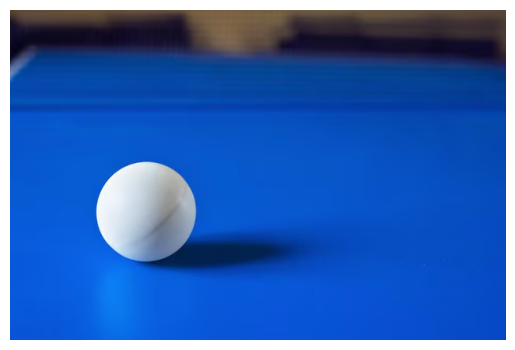

In [10]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
AAAAHGZ0eXBhdmlmAAAAAGF2aWZtaWYxbWlhZgAAAOptZXRhAAAAAAAAACFoZGxyAAAAAAAAAABwaWN0AAAAAAAAAAAAAAAAAAAAAA5waXRtAAAAAAABAAAAImlsb2MAAAAAREAAAQABAAAAAAEOAAEAAAAAAAALGwAAACNpaW5mAAAAAAABAAAAFWluZmUCAAAAAAEAAGF2MDEAAAAAamlwcnAAAABLaXBjbwAAABNjb2xybmNseAABAA0ABoAAAAAMYXYxQ4EBDAAAAAAUaXNwZQAAAAAAAAJyAAABoQAAABBwaXhpAAAAAAMICAgAAAAXaXBtYQAAAAAAAAABAAEEAYIDBAAACyNtZGF0EgAKChhmJx0DBAQ0GhAyihZEUABBBBBQ2WfBwhFFZS9/yvOSDUcKgNFwLnyonvtFi+5a/QZ2a5dK1fpgl/G4ZJu3yEa+X3UKKp4o53grMlT0TC2PvqbIqilwYa64APino8Q2cPzUSPn32BMu6bOBRvDbxgSHVq8sVxHinxnLumOMj1kJ+GpSMN441qnggvE3uFj1F7m/9XBC4wm+gLlBX2wFSr8aX16EXHbaKrh64QXYB3rK04pOFDRTpokReMNDq0jAFhVfQKRBTLqt364ntR59dLVEWSyBfVOnOqSR1aas4M/o2j1fZl9IAhnsd8EjiALsMY88/1PHxTbjwdFCC4XIMzBI2u9CCFDVjSTMWgzAYcVuiuR3dOhSDsJK2gvaXKEoJj0YOnbilz/DTBgaCKrcn0FPm8O9gXLw+Ir/wnsj8udOP//fpjmHjvUgLEiVoMITYzJjeJAhOJoyixrIbj2232UkGdjxeLfvYo4HuCwJl6qhDXGVcNL4+Eqdads3rzFVde+oRvuGJiseeoIEqYjipnFSiQendMRB4E7GB0y4pOkWQrRVCbtbNYh56VYkOHwcNrWDB5h5RWPwcaX5cTbLx4OhQ0biUbcWZ5ubupVvGzqI5qYkEMiFdm1m82uFnhlhECdoqNLuEzoF8raVM7LK5Lxevnu4ncYZthlmTk+5rp/Hl1t77jnXAK+pIBVfSaUP8seaBW/H+0He3MweC6Ctg+BS6EEeLq+J+Fy2TkCM0ozrhwOT47R94/XHajq2IYHNDUpdxYGew+pwvyz8QB/1w1sG2MOhFP5zm9Wr+HGSuyTrfcvT5a7QxCd1wygOXd3vrtFSMRIQTBsFxpUmCiN1hfE1il1iQPxYYba/HX80A6NxHaF1arZ2qIZHx14g96ECdzgFIbBx/qX5njyKqotbdPZBNCkK34/wkYJLP/ezexoc6tC/Z2LwClkgv3qmfkrDC1+ZQ7CaIlufQlhZlhqCpik3iXD8vItqAsDL5CfnF+MhPYVMkX/qy2bfAxe1eoGqiYXZEeKA3wIF888EKsR8stS5VctCwkpXe1WT2BfEsnsPRwDaBdbpIo/HlkRVOcJXoTna1EW1REoHnnE9c3tai8McAzebyYzqPX9ryEoXr0FQZMkxcq0jyVksWvmTfjB+EeZDELQ3LFRqe3iix5vTbf3fnsg6VbBMkgS+ww6zzu6gDY4Qaqu/bjIhi1WwkMQnI8iJjILpMlb+M7jLPpT+XncSAlfUwoi1ItpRPZoPibkmUYhN20BYzJXUJOc/ywJUtJJTqtHf3aGrVdgHaIA8DiEjrYGyjzyB/0pDhLUFY51LWY6sIg0Oy1hPPJTBeAe7Xk4btlpgfolZwKB12yliLHMBTWdlOQxY4tca2NzLJI1hmo3QOu/cCC2UEHtwok5OeiUmar3Wgijh7QZvwUcJEQ/0pVVZeRMpqVJ6ZoMkL5WtgtKwWCeAkpCPlz+E773jqavowiylITsUQHcP6Yx1WGqDNdr8UgATeI11ur5N81VVjme3cYPgUzGUwx+GIJb2K4R1uPbLB8OJ7M79tSz8USntyYT4i3K3novfd3PAN4LKAH1tiQXSdnSX3fK61779BrDUePPnEuq9epHIovQieO+cpcvOxET1loFpjTjSkCcwjCZMJqQO0F/+xQvmlqMcihNlidNYvNREH1CZJh/A8WSHzIA3erDFcjeA52JNKH79Pu2ntCsPW0B9HwSL7bgqJ34WHaxmXMEOvFiCpfqn5Ddi3J9ugCBIPMXVrOuGJFEuEvRWsmd4ytF2nchc5WwoQRk5Xw+1mLJy6zBo+4zM0bD/RSXMGNkMEBUPgrM8gvpPqveNOzwoF2hHbZwO5k5P2IIok0XtlXZ92w7uI25+NlTsafpmUYfaUCNahk5pI6FCSmEKgA2jyjYZZY9XCQBh+xDdLP6CsA14cqY5Sdi2ihhbiNNXtHlB8MHh9rjGt+HCKt1ek+CF4hgAvBhvKxaxA5XpXfaxLKoeAGo5ASLO0J3IIcea1zQmGmjf/kHR3SD1QjBSn0aNhsIihAOzL6Tr2flzEwQFt57RUKWrKEycr3yZn8ynz3lt+zr2YN4yPru80l1aOQZd+Kkk4OClzrrJl/Gua5FeMF34w3fMbNfFHyk0VRmn5rQYzFCi7nBFvZqbaRzzC0KfXrFNCcl8isWmaJ4/kOPqPmi5JGksnwj3b4OgBcsznlCfjRPVCyJRfRKhNUOq3RRybSWh1MeSFbjObIsa4qaPiG1chUCFySyMXn3/n+5Mk40XGX/vZM3hsPIY+peh+CdNFt06SuUx+hWhmGQjJ8TY4BShkbABmQ2WMVNMnRPTwA3OQ+1Lmk8LyOeiKRXFOBT7mYRbjEYP0g596YjBZAlq8UHfLbutmxcl+fSaj8NNdbVRud7WqigUiM0cMqPVPeLacteyLj8kjNdBSnV5ovVsXEx8mjh5rPV6/tdtppKz4uWUIe583UttU1PdSyksdbNk12FsXHtFx1YwDDuvGZOR7u5aY3jQ3hxedv/DqA+vWuRdFNhi40EDZK9+6xvv9G7CpINIZ2bkhpz8Yh/pdKTqnWoY/etaD/mrSWnW83nMl0OMHuNrh8jczL/XOQiFhxZBEU4ImhC0e/0MVwidZ+BjTQWK3ZHajjPtkNZd5gqeHxcLgY3f1QKwgq5L6WkuH2t1ykmVKrdCCw6vRZLsQop38beZpolim9n5zs2PNNAC+zDQ06gVEvIvlmf7PFwXTd8RAgdeYdrukXeJaO+7UD20bSj+3AIwNIiB0vEtTgApi8in4efm6glWv8Wv4bAg/T/CXZXc26+iGveSa8nx1ujsfPo6odJErJsavCzImRS+RaZoqSsjprT1tPQWMQsadQ3S+OsGsnRHUGJJt7uWQy6t+EW1H1F187lBcFq/Jq0hAALauvBpoM+h57Xo6WHFhUuAsAAqRWErM/1HhzinDYfH1lSjwmn145nNBKf6Tt38i05ZcX/JpJHmX4nCh8/tIgaN/V99hgRKK4JcyE6nn6IXkEqtSZNlwN7qB9QFG1vA7SvdlNkeUk9p2U4hBxrH5S7CFORXlY9J5CalOrX4c3PhkRjDcNGCuU28g0oqDLfRQRaS6svm7nPycb/jqqx0DI7I+P1mRkrdFQCB5VrXhFsgq+vFVUe7/IIUAKyn9YLiW3rFvt5GwxGaj72WsRwSZeJPNOGQ+mRmLHyTOir5MQKNd9suBig6ZFZo5o9J7cBDaoNybTAUmWj5dmRhoKP/+ctfn37MNoHKy1WItJl8j1jV0uhJIQP0iguKh3Cy4rvsSunwCvLdRiuVF+w478DI+1t5s6FyJE9WhF3zLsMOzaBerNuzIuvRjHGAWBmDSE5Cx+RtOzkHiKYIZZIislfc6JX49OQ22T83pdNOGgOeLkxTS0lIh14fbWLpbgQJSe0mjXynXvMhLuOoiAGuCeM8yN/p1OY2/YRHn3pQ6UO8Qy59liqK/Feitgurv+wUK/N40/Xryd2EOMUWEE2Gp/Sd3/2I21R1SMTGtCmP4YJhqIy9fEyH6foHlB9bjVuQ44ERzQ2T+/YXLhMOCCfPUVgqK0MvwsFte2NBtHT5MLFmIlJyP2zXm2OxmHP8LBAlUocZPDcB/7QObXwEWbAGgvz+qSzheBzlyzg/INEWghMnG4C+inavW6tCie26WkVSJdtVRYiVS2/SiblNwezK8jcUcQ31ENEf5OjKGmxO5tE4c/w0jHatDsoSpObks1W6FmdFf13rHNabC2DbIdjD+jEipnZhhHFVRv/U+gKonx0PDkTMSJs=

"""

img_data = base64.b64decode(base64_image)
ball = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball)
plt.axis("off")

### Bonus Question Image 2 : reference as "ball2"

(np.float64(-0.5), np.float64(642.5), np.float64(359.5), np.float64(-0.5))

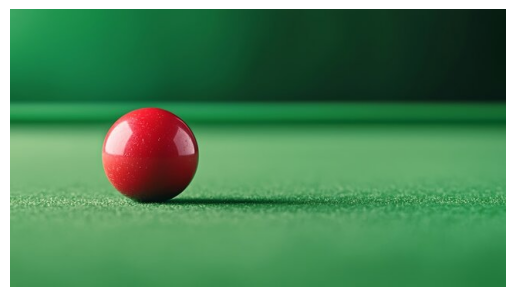

In [11]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDW9odHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMS44OCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvJz4KICA8eG1wOkNyZWF0b3JUb29sPkFkb2JlIFN0b2NrIFBsYXRmb3JtPC94bXA6Q3JlYXRvclRvb2w+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcE1NPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vJz4KICA8eG1wTU06RG9jdW1lbnRJRD54bXAuaWlkOmMwNDBjMzFiLTljODItNDM0Yy05ZWM3LWVjYzBhZjdiN2RmMzwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD5hZG9iZTpkb2NpZDpzdG9jazoxMGFlZDBjMC1iNGNlLTQzMGUtYTBmYy04YTAzMzM1ZTZhNmY8L3htcE1NOkluc3RhbmNlSUQ+CiAgPHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD5hZG9iZTpkb2NpZDpzdG9jazoxNTcyMjU1NTMwPC94bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0ndyc/Pv/bAEMABQMEBAQDBQQEBAUFBQYHDAgHBwcHDwsLCQwRDxISEQ8RERMWHBcTFBoVEREYIRgaHR0fHx8TFyIkIh4kHB4fHv/bAEMBBQUFBwYHDggIDh4UERQeHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHv/AABEIAWgCgwMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAABAgADBAYFBwj/xAA8EAACAgEDAQcCBAUDBAICAwAAAQIDEQQSITEFExRBUVJhFSIGMmJxByOBkaFCscEk0eHwCBYzcpKi8f/EABwBAQEBAQEBAQEBAAAAAAAAAAABAgMFBAYHCP/EADMRAQACAgEDAgMGBQQDAAAAAAABEQISAwQTIQUxFEFRBiIyUnGRFUJhgcEHofDxJGKx/9oADAMBAAIRAxEAPwCuRVJjSkVtnjP5lZZMrk+BpMqmysSSRXJjSZXJhkkmVtjSEbDMg2IwtisIArCxWzSlZW/MdsrYUsmVyHbK5MsNYlYrCxWV0grEYzFfmWG4VyFbGkI+hpuCgyFihuEIAgapCEIKWkAwsBVKxQsVhYBiSYwkvMNYkbKpeZZIql0LEO0EYkh2Vs06YkkyuTHl5lbNOkFYjGfmIw64lbEyFisrpCZBkAMinSBJFijBRIAmQyIM8EyQEFbFbGYjDZWwZIxTSjkmQECjkmQeZAoisIGFgrYA+QpYbgBQsU1CowMDIAMisIrLDeKZJkAGGoTIrYRWIUsmI2NLqxPI1DUADJGAAMBAEEIDJAP1I2VyYHISUuDyn4C0lIplIMpFUpBi0kytskmVtlpEb6iNhbEbCBkVsjYrKQjYjYWKwoMST8gtiNliFiCsRhbEZWogGxQtilpuIQrYzYjLDcFZWx2VtlhuAbFIDJXSEyQgMkao2QZFyDJVNkGRWyZAjyBkyK2GkZXLoO+hW2IbxgkiuQ0mIzUOkEYjGYjZqHTFXIrY8mVsrrjBX0EYzEbDrBJdBQvoKyukIKwsUNwKCgECwYgEEIhCECQViMdiMNQSQoZCs01CBAQNIEBAD5A8iepAFYjGYr8zUOkFFY3kKyqAoWDyKQDfAoWAOkIBk6IDI1CMVhFZoJIUZisrQYFY3kKwFYGFgIAQhAtP005FcpCOYjkeU/nlmcityFlIrcixCGbK2yNiNlhKFsXIGxXItKORcgbFbLRQtiNkbFYpUYjCxWy0sQVsRjNlbZadMYBgbIKw3CMRhbFbKsFl0K5DSfIj6ldMYBihYrYdITIuQNgyFHJAAyVYgckyDIGw1ECAGRcimohJMRsjYkmGoCTK2xmJJm4hvGCvoVy6DsrkyusK5MRsaT6lcmHXGCtiNhkxGyw6xAZAQAbxgGDAWDJW4RBAgkBXQIpEASAJkoDFYWxJMLBWKF+YCtQgAMGStRBshQqYUQoQEA2IIB+YoRWahuCsUZilUAeRAMrWJSIhA2DAw+YMiFKB9AsWXQpBGBhFK0DFYwrCgxWEBEAgSBp+jHMRzK3MRyPMp/OljkK2VuQrkWiljkK5FbkDJaWjZA2LkGSg5BkDYMlpRyLkgrYWIBsRjNivzK1EFYjGbEbFNwDFbCxGwsIxJMLYjZW4gsmK+gX1FYdIgrFYWBlbgoMkbFzwIWIHIMgyTIbiByDIu4GQ1QtgbBkVsrUI2I2FsRlhYgGxGFsVmm4gGUyZZJ8FMmHSIKyuTHbKpMO2MEkxchbFK64wgCEK3EAQhAqIICCAUyAICkyBsjYjZVFsRsjYrYWIRgIAQ1EAAjYDTZkEVDIgiAwgYhIBisIrLDZWKwsDNQAK+gz6CNhrEA+QEQNgAmQMQqCSYzfBW2ahYAVjPoK+gagGKMABWALAREIQgW333eBzKNxNy9Tz6fz6lu4G4q3A3CiljkTcypyBuKuq3IMle75JkGqzJNxXkmSxC0ZgbFyDJViByK2RyEbCwjYuSZFbDUQDYjCK2KagGxGxhGWm4gGKw5EZW4BithbEbFNxAPoI2FsRsrcQLYMi5JkU1ECTIuQZCmbFyBsGRCxCNitkYjeStwgjC2JJlbgsmVtjSZWw6YwWTKZMebKmyw74wGQEIWnWIQBCFWAJkBApgAJkA5BkGRWwC2K2DIMhYhMgyBsBYhuIHIM8AAVqITJCECogpgRAg5B1IQLCMRhFZVAULAygMRjPzFEN4p5CsIBDSCthEbKsI2KRkK0ArGFYWAYAgADFGYCIBAkC0+27vkm75M+/5JvPhfhNV+/5BuKd4N4WMV+4G4pcybxRS7cFSKVL5DuLSUu3B3FKkTcDVa5C5E3AyKWIO2LlC5F3Foo2RWwNgbFNUjYuQNgbKsQjYjZHIRsrcQjYrYGxWw3EI2I2RsrlIrcQLYjkByEchTpEGyTJXuBu+RTUQfJMleSZC0fIGxNwMlaiDNi5BkVyDUQLZXJkcsiNhvGAbEk+oWyuTDrjBZPqVsZsTJqHbGEB5kYCtiBkyLkKIMgbJkA5A2DIMgHIrZMi5LELECLkmRclpuITIMkIGkRAZJktKIMkyAEGIDJMigQNkbFbECNitkbAFADZBWVqIBshAZDaMBBSiNiBbFyWG4QBCFEyKwgCwUhCEAYBgYIgEIQD66pfJNxQphUz4n43VduJuZVuBuBqu3Mm5lO75JkGq5SwMplCYykE1XqZNxQmFSFM6rtwN3yVbibimq3d8g3FW4m75LS6rNwrl8le4VyKsYrHIVsrcxdwajE7kK5CbhHItNRCxyEchHISUytRiZyK5SFciuUg6Y4mchHIVyEcg7Y4n3E3Fe4G4NRit3EyVbibguq3cByKtwMhYxO5CuQjYHINxiZsRsVyFchTcYjKRW2RsVs1EOmOKNi5A2LkrpEDkGQZBkUpsgyLkGS0GBkXKBuFLRmwZF3Aci01GJsiti5BktNRA5ILkGfkNRBsgyLkGQpskyLkhQyZMiZJkUHTJkXJMigcgyDIMgFi5I2DIWIQVsjYobgWLkmQNlWEbFbI2KyxDUQjIQBaVOgCMDCwjB5EAFQhAZAIAEFJQogCEofUts/aybZ+xnbfRIehPokPQ+DaH4vdxSjZ7WFRn7Wdr9Eh6E+iQ9qG0G7isT9rJtn7Wdr9Eh6In0SHoibQbuL2z9sv7BSn7Wdl9Fh6f4J9Gh7UXaE3cdiftZMT9rOw+jQ9AfRoe1DaDdyGJ+1gxP2s6/6PD2gfZEPQu0JvDkcT9rA1P2s676TD0FfZMPQsZQvcci1P2sXE/azrn2TH0FfZUfRf2LtB3Ici1P2sVqftZ1r7Kj6ID7Lj6IbQvdhyLU/axXGz2s619lx9qEfZkPRF2hY5ock42e1iONntZ1r7Ogv9KEegq9ENmo549qck4We1iOFntf8AY6/6fX7f8EXZtbeFEbw775xFzjNfo4112e1i93Z7Wdt9Jg/9CJ9Ij7EN4SOrxcR3dntYO7s9rO3+kR9iB9Ij7EN4WOsxcTss9jJsn7Wdq+yIexA+kQ9iG0LHWYuK2T9rBtn7Wdp9Ih7ED6RD2obQsdZi4rZP2sVwn6M7Z9jw9iF+kQ9iG8NR1uLiXCz2sXu5+1nbvsiHsQv0iHsRYzhqOuwcQ67Paxe7s9rO4fZEPYgfSIewdyGo6/Bwzrs9rFddntZ3X0mHsB9Jh7P8DuQ18fg4V12e1g7qz2s7r6TD2IX6RD2Ivdajr8HD91Z7WL3VvtZ3P0mHsJ9Ih7EO7Cx1+Dhe6t9rB3VvtZ3X0iHsRPpMPYO7DXx+DhO5t9rB3NvsZ3n0mHsB9Jr9g70Edfg4PuLfYwdxb7Gd79Jr9hPpNfsQ70L/ABDBwPcW+xk7i72s736VX7ED6TX7ETvwv8QwcH4e72MHh7fYzvfpVftQPpVfsQ70L8fg4Pw9vsZO4t9rO7+lV+xA+lV+xDvwfHYOF7i32sHcW+07r6VX7UD6VXj8qHfhfjsHDdxb7Sdxb7Wdw+yq/agPsqv2ovfhY63BxHcW+1g7i32s7b6VX7UT6VX7UO/C/G4OH7i32sHcW+1nb/Sq/agPsmHtQ78LHW4OH7i30YO4t9rO3+kw9qB9Jh7UO/DUdbg4juLfawOiz2s7j6TD2oX6TD2l+IhY67Bw/h7fRg7i3H5TuH2TD2g+kQ9o+Ihr47BxHcW+0HcW+1nb/SIeiA+yIe0vxEHx2DiO4s9oO4s9p2/0mHt/wL9Ih7R8RCx12Die4t9GDuLPaztvpMPRA+kw9qL8RC/G4uK7mz2sXuLPadr9Jj6IH0mHtHxEHxuLi+4s9rJ3Fvodn9Jj7SfSY+g+Ig+NxcZ3FvoQ7NdlR9EQd+F+NwfaldH4Iro+qOY+pr3/AOQ/VI+88x+M2y+jp++iTvYHMLtRe4n1Ne4G+TqO+h8A76Pqcx9UXuJ9TXuRTfJ03fQ9Qd7D1Oa+pr3E+pr3A2ydI7oA76Hqc39TXuB9SXvBtk6N2w9RXbH1Oe+pL3/5B9SXu/yVLy+joHbH4FdsTwPqS93+SfUV7ha3k912x+BXZE8L6gvcgPXr3Fs+89t2xK5XR9TxXrv1GvsTSa7tnVdxo4vEf/yWNfbBfPz8C68y+npek6jq+WOHhxnLKfaIaZXptRjy3wklyzbR2XqrYqd77iD6JrM3/Q6fsj8O0aGnMIOdjXNs1mUv+y/Y0vs2e9Rnc6J7koyk3iPXLbXTnBwy5s5/BD+y/Z7/AEz6bDGOX1TO5/Lj7f3n3n+37uRlpNLU1GEHdLOPvec/06Ga/UbJ7ILZHP8ApSR7XakNTTRXqbI2TjF93BxXEXjhZXnz06nNam6vDteoza3lwcG3/V9D5cpzn8Uv7L6R6F6V0eH/AI3Bjj+kXP8Aeav91GrtlY5tSntXLTeeDy725y2JvPlmWMGnV6mU2t0m4dPtWOPQ8+21KWcuOOU11+Cw9jlx49anGFPjtdpvuq1FiWfyy5X+TVpPxXKuW3XaZOPvq/7M87U3RzKScrJTi97sin9z6tf18+p5tzy3z1Pp48pfgvWvsp6R6jE93hiMvrHif3j/AC+iaDXaLXU97pboWR88dV+68i/Mfg+Yadzp1Eb6NRZp7PKyH/Pqvg6nSdr6iuNUO0Y1wVvFWpreabX6Z/0y+GfTFzD+I/aX7C9T6ZE83TTvxx+8fr9f1j9nTZiD7Pg8rxmOG8A8avcTZ/P/ALz1cR+CfZ8HleOXuB46PuG0n3nqNRFxD4PM8dH3A8dH3DZPvPTxD4FxD4PN8bH3A8bH3DZayeliIuIHn+Nj7geNj7kNpKyehiIuImDxscfmB4yPuGy1k34iDETB4yPuB4yHuGyxGTfiIMR+DD4yHqDxkPVDaViMm7ESYR5/jYepPGw9SbStZN/AODB42PuQPGx9UW5Wsm/EQfaYPGw9yB42HuQuVrJve0H2mDxsPcDxsPcTysRk3NIGEYfGw9wHrYe4vldcm7gHBg8bD3E8ZHH5kPK1LfwDETB4yHuB4yPqTy1ES3NIVpGLxkPUHi4e4vlaltwgYRj8ZH1B4yOOoqWvLZhAwjH4yPqTxcX5ipPLXhEwjH4uPqDxcfUayvlswiYRj8XH3E8XH1QqSLa8IGFgyeKj6g8XD3DWTy14QMIy+Kh7geLj6jWV8teEDCMvio+4Hio+4up5acImEZfFQ9xPFQ9RrK+WnC9AYRm8VD1B4qHuRalblp2r4JtXoZvFQ9wPFQ9RrJctW1ehDL4qPqiCpLl6/wBNu9WT6bd6s7/6Ovb/AIJ9H/T/AIOdunYcB9Ou9WT6dd5tnffSP0/4B9I/R/gWz2HBfTrvWRPp13rI7z6R+n/APpP6RZ2HCfT7vVh+n3erO5+k/pQPpP6RZ2HDfT7vkngLf1Hc/Sv0oH0r9Is7Dh/AW/JPAW+rO3+lfpB9KftFnZcR4C35CtBb8nbfS/0k+lv2/wCC2dlxS7Ptz5jR7Ps88nZvszC/KVS7OlKahCG6cmoxS82xa4dPtNRHl4HYf4e1PavaEdLU3CHDtsx+SP8A3fkj79/D/wDAv/TV0afbp9BHhyxzJ+fP+p+rKP4UfgurVSipr/pqmp32LjvJei/2Xoj7Rtp02mjXXVCmEI4jGK/KvQ1xcfd+9l7fJ/V/Tej4/QOCOPCInnyj70/l/wDWP8/9PG0v4f7H0OndFelhZNxxvnyz5R+MtLfo+0LqZuvuoS37XGX3L4eOvCPsN9s3JuLaXycN/Evspazsyetpjuuqa3LHMo85/sduXCNfHye/6J1WePUR3Mr2+v1fDu3b5zubvrkpZaaraz8L/Bzuv2dxO+mFrhOKjKUqkoqfDaTX9H/xye32u57puy5TjLc+HnGfn+i/Y5nW3ODnXVNqLXKy+eOVjp8nlZR5f1ngmsIpi1uK5KEZNtQTnuwvu6tL18jA5yy9jal5Y+eOf7l+qeFGMoxXOXJL7nkwXWRUfsb5X3Zfnzx+3TqIxceflqKV3ySrcGmpKX+DJJ5yNOx+pSnnGeF5vB9GEPH5uQ8IvGUs+XoaNNqNTonZCOyyqxYuosW6uxekl/z19DPT+ZNcc+fkfTOw/wANaXtL8O1aTWxlG9wVldvnBSz9vz5cP+h9PHjbx+r5scI8+zi9JqK/s7uc/C2SUId48yom+lcn5p/6ZefR8noS0tnyYfxB2Frfw52hKjWUuenujjC/LfX54fqv7p4Pd/CVi11Nmjun3mo06TU31trf5Z/v5P5XyTLGn8c+132d4+DL4zpo+5PvH0n6/pLy3p7vkV6e75Owl2avaI+zV7TETD8L2ocj3F3yDw93ydb9NXtA+zV7RcHacl3F3yTw93ydZ9N+AfTf0luDtuT7i75B4e75Os+m/pJ9NXtFnbhyfh7vkHh7vk6z6b+kH039Is0hyfh7vknhrvk6z6b+kn039LLsukOS8Nd8g8Nd8nW/Tf0k+m/pJsaQ5Hwt3yB6W75Ov+nfpB9N/QNl1ch4W75J4W75Ou+m/pJ9N/SNjWHIeEu+QPSWnX/TV7SfTf0jY1hyHg7vUHg7jsPpv6SfTf0jY1hx/g7geDuOx+m/pB9NXtLtKxjDjvBXE8Hdg7H6d+kn079JNpNYcd4K35B4K35Ox+nL2k+nL2jaSocd4K71ZPBXep2P05e0n05e0bSVDjvBXeoPB3erOy+nL2g+nfpG8lOO8FdjqweCu+Tsvpy9v+CfTl7RvJTjPBXfJPBXfJ2X079JPp36S7ytQ43wV3yDwV3ydl9O/ST6b+kbyU43wV3yTwV3ydj9NXtJ9OXtG8lON8Hb8g8Hd8nZfTl7QPs5e0blOO8Jd8g8Jb8nY/Tl7QfTV6F3Kcd4S35J4W35OwfZq9Bfpq9ButQ5DwtvoweFs+Tr/pq9AfTV7RuU5HwtnyDwtnydc+zV7Rfpq9o3Ihyfhrfkh1n034IN1qH3H6evRE+nR9p7ndondr0Plt6fbeC+zo+0V9nR9p7/AHa9Ad2vQbJ23gfT4+0H09eh73dr0B3SGydt4H06PoD6evQ9/ukDuV8CztvAfZ0cdAfT16HQdyhXSvQtp24c/wDT16AfZ69D3nUs9Ad0vQWduHg/T/hE8AvRHu90vQndIbJo56zQpRfBOx+zJ3a2LrhuslNVVL1k+v8Aj/c9rUVLa+DqP4YdmK78R1Wzgtmjo76WffJ8f7/4LjE5zGP1foPsx0+E9ZPPnFxxROX9/bH/AHfQuwezq+xOxqNBXjfGKdjisZk+obrEs56s06uzls8rVW4UpJeeEep4xiofpcIy5c5zy8zLPqrXhSf9jhf4mdvS7P0T0GnnFX6iK7xtv7Y8+nJ1PaWsho9Lbq7mnCEd0uP7I+EfivXz1XaN2sv1E3bZL7ZR4xjpj19D5ebOofrfQfT45uXfL2j/AOuZ/Edqsh3tM3CuL/l1yTy1lptL0TXOTltbbGM493JvEVlv180e12xlJwhZXZKuLX8uSeyK65f9f6N9Wzxb9Vjse/RtwxbdXem/zfbGccZ+d3T4PgnzL+hxyaYeGC+6MqZKUFnlppvOX5ft5nl3S5Zddb9sl92f34x5mK2Wc8/55N4w+Dm5asbIzjJKcXHdFTWVjMXymvhoqTzl87M9Mg1V8r752yjXFzedtcFGK/aK4S+EJCzbLrx5r1O2MPKz5b93t/hrQeN7ShXNNVx+6b+P/J9U0GpcrIxjw28PC4Pmf4L7Qjp9VPTSx/Oxh/qXl+x3vZ9u2WcrldH0yfXxR4eF1uc5ZeXX6jsnS/iLsazsvXwUlNbqbU/urnjhp+fp+3qfGIeL/Cf4mjHV17Z6OeZpdLKJfmx6rGJL9j7L2NdNaqi6Fv8AL/L3aXm31/8ABz3/AMg+yIW6Hs/8T6eqO2vbpdRtXDi87W//AO0f7G88bh4/LjjzYZcHJ+HKKe6tHXZXGytqUJJSjJdGn0YHoF7UYv4Q636n+BtNCct1uinLSzfm1H8r/wD4tHWPTr0PNm8Zp/I+fpp4eXLjn3iac69AvaD6evadD4degPDr0Js4dtz3gF7QfT17TofDL0J4deg2Ttud+nr0J9PXov7HQ+H+BfDouxo576evRE+nr2o6Dw6B4dDZNHP+AXoD6evQ9/w69AdwNjR4HgF6E8AvQ97uCdx8DZNHg+AXoDwC9p73c/BO5+BsaPB8B8E8B8Hvdz8A7n4LsaPC8AvQHgF6Hu90vQndL0GyaPC8B8A8B8Hu90vQndIbGjwnoF6A8AvQ93ul6A7peg2XR4fgPgngF6Hud0vQHcr0GyaPD8CvQngV7T3O5RO5Q2TR4XgV7SeBXoe53SJ3S9BsaPD8D8A8CvQ93ul6A7pDZdHh+B+AeB+D3O5XoTuUNjR4fgfgngV6Ht90id0vQbGjw/A/APA/B7vdL0B3K9BsaPC8D8Ingfg9zuV6EdKGyavB8F8A8F+k93uUDuV6Fs1eF4L4B4L9J7vcIXuF6CzV4Xgv0gejXtPddK9BXSvQWmrw3o17QPRr2nuOlegvcoWmrw/Br0FejXoe46V6A7legsp4fg16EPa7lehC2tPpu4m4p3E3HB6qzcTcVbgby0lrcg3FO8G8Iu3ImUU7ybwWuygOSKt4HIFnchcibgbgizJMor3A3BAtW9qC/wBTwfQf4Z91v7VsisTdkIZ/Sk8Hz7TNPW0J9O9j/udFRq7Oy9VO7Q2qKbTmpPif7m+LOMM4mX7H7KdN3+Dnxj3nX/MvoOsniLfqzxtbbhNeX+5z1342coqGr0i5fEk+Mnma38baBJ74WPDxuXR/J9mXPhPzfq+n9I6mJ84Mv8Te2PD9nV6SH3Susxj9j432xqFfTZhxg6IuS38b1lLbFf3/ALM6v8b9taTtLtCqcbMVKtxgmsRc3nLl5qKWc45fCXqcD2rdCyKrhfKco947ZvdtxlbWljK4z/U+Lkz2l+89K6eOn4YxmKl42uvUZWxrlKELMJxT4aznHzjj+x5WrsjvahLjjDxtL9ZLO7bnGeE+p5eqmnZLa5OPRbuuDnjD7+Xlj2V6ixSm+Ix8vt6L5MNs0m8PKXR+pbK2UJScXhtNf34Zkskd8YeN1HNSTlhtJp/KJXNrdh9Vh/sUuTIpHbGKeXPNct+mtlXYpRk4zi00fS+xtXG/T03Rf54p/wBfM+VVt+vl5nWfhvtnTaTQwr1DluhJ4ws8ZOvHlUvl6iNsX1X8N2b7VKctyhN7cLG1/wDrOi/Gei+qfw47e0n53XoZXQyuVKDUuP6Jny7QfjTQaeW5K2T46LH+5s7Q/ijbLsfW9m6PQVpaqmdMp2NtpSWHhfsdd8Yj3eTnxZzNxCf/ABw1TnDtvSN/b/JvivnmL/4PrTXJ8i/gHWqO2NfCPR6RZ/pJH1ts83km8n839ciI67kr/ngSYFyDJh5JngHGBWwZAYAuQZCC8CkbFyGUeAEFzwEFgBkGQhuAC5JkA5AK2DIQzwDImSZLAfKBkTIAHygNoXJMgHgHBAAHgnAuSZKgk4AQCcEIBkEJkBCg8AIQIgMkwAA5QAEAgCAYhEYuSMBbZsGAOAMIArwFsUFo8A4wRisqWnBAECW7ncTcVbgbjlT0rW7hXIr3A3FLWbibirJM/IFm4G8ryTPyC1m4G4TJMgPuBuEyDcEWbgZE3E3ANVPZfXP2zi/8nodq3Oq2Sb4l0PLlzkPa9kpuFiaxOMeW+E3xz6cnDmmqfvv9P+SJ5+Xhn5xE/t/2w6/Vbls54X9jwu0dZBwrcFiceZNLHOf/APC/Uzm7r4z3KyEW8OWOV/75fBz+qcpUK6VqqhJNKby+V6peTfmzlGUv7Jw8eGMKu0bpXWNSxnOyaWM5y8cdepzXaVrnZN2L7nLl/PmX6u92Sk5ySk3ltr1fXg8u/UdzdKLcZxjuj54a88eaydMfLfJlOMUxauUrI2SUPtj90tq4jnj+nkjytVNTm3tiuEsJYRp1Fn2NZec888MwatwjbZGuzvIJtRntcdy9cPofThDy+blUXS3cNvC6Iy2Nf2LdRJRslGMlKKfVdGZJy6neIeJ1HMDwGOCrcybvI6U87veWiLRdCx8mNSGjMlO2OdvQrt5L+9j/AKenHVHmQtx5l1VmWZpjlnw+wfwJrctX2jqPJURjn95f+D6g+pw38D9E9P8AhS7WTjh6m7C/aK/7s7hs4Ze7+R+p8kcnV8mUfUABFb4MvgQgmQpgMKTIMoCChbBlBAAyNithlGADkvUGQyJAZIUQGA5FyREwDAcgyUTAME3EyAMADkjYgAgMgAJCEKkIQiCggYIEmAoJEwRBCBjBMBIAMA2jEATaDBYTAFWBWi1oViEVYJgfAMFZI0K0O2KEJgGBmAMkwKy0RpFQmCBwQFusyTIqZGzm9AcgyK2LuBazd8k3FWSJgtbuAmJkKlkFmyHcVthT4BZssAjmkCMk88gPkORcitgWLkXXpWdk2xec18pryT/8/wC4sZYDGxJtS5hJOMl6p9TnyY7Q9j0D1L+G9fx88+3tP6T/AMtxXbcNTVRKd7ctrUfzKW3Hk1nKxk5vX6yUq3Q5tQhmUFjOW+ccevqdR+JdLDTu6uU7nCMf5bcFKLTfrlOPl68nEa62TrS3t7Ivam+nOf8AufLjF+z/AEf03Pjy8UZRNsWqtblhNLOMPODzNZJblGqcrHtTl9uEpeePj5LtVOHdb+8e/KW1x8sdcnnam1uTkscPqlx8ceh9XHi+bqOVnvucopOXCWFx5ZMNs/kt1M8zb3J55fGDFdPl9T6cYeF1PPEFsl1M85BnPyKZSO2MPz/Uc/kzkBSKnIG46U+KObyvUvkKkZt4VMmrvjz00KZv7Gps1etroqi5TnJRil5tnj94z61/AL8Ny1Wtl+INVD/p9K8U5X57PL+3UxnWONvP9U9Rjp+nyyj3+X6vsXYOgj2R2FouzI4/6epRljzl1k/7tmrJXOeW+Rd/HU+R/M5m5uVuV6gb4M7tGhPISzsGSuyeEKp5QS124GSlzDuWAlrGxdxW5iOQS1rkK5FSlkDngM2tImCEsoDlgsKfJMixe4E3tRQzkLkRTTDGcWyMrEJNjOSS4KJz56gk6YyZVW8pj5KQYGQZyiuU8PkC0AneL1JvCHIiRfBMoCBTEkxHNrgJa3JCtTygbxRa4iZXCW5cBziWAWsIDdwVynyC1oMmaVjWeo1cm1nIpLX54ApIrlPgpdopNmptCNpFCsk1lEUpSbRaS16aaFf7lKk45RN7bBZ31FyOsbSuSy+AhWyZEaaYJSwGbWZEyLGxNdRJzx0eSpazJCnvGQqW6yuT5zhBWOeSvbByce9juQ8a69r227pLqkcnpFlJNPAiUvIiUot5i8BVilNVxi8v1CBulEVzfXBba1U8XdfJebKJa6vbKmdEoWfK8gT491kJOQXJReGLCdMaXKOXLzK2pahZr6Y5+ALe9hjqL3jedqyiiGlfd2SVvMfJ+Y+jdkoxioPLeOfMEK7p2Zxhoap2OGUmjddTbTZCN9WHPoVaiEoT2R/N6BdaU12PLyWRnl8FUYyqsav+3PqXRhumo14ba/oEiFcpSzwgJtvDHs/k2LdiX7FN18XalBcebB7Ku2NF47QSpSTsSahl44fVZ/8AcHyrtuC02obhBQX3NRklKK8v/ep9arthZc4RsX9Txvxf+FF2lS9RpZqNyWXCKX3fK+TlOHm4fv8A7Lfayekwjpepn7vyn6f0/R8Y1s47pNJRXonnH/J5Vtjy8PB7HbGjvo1Eq7qp1yTw1OLWMcHhaiTg201w/wB0+f7H0ceL93y+qYZ43jLNbPqZbJ8Me2XV9PUy2ySWD6cMHg9V6hE/MJzKZS6iznjJTOw7Y4PG5eqiVrkI7EUSs6lbsR0jB8/xVNPeA7wzd6j3fwR+Fe2vxh2qtF2RR/LjJd/qZrFVC9ZP1+FyxOMRFyxn18YRcy1fgP8ADmv/ABZ+IKuzNFFqKxK+5r7aoer/AOD9Rdndn6XsPsnT9l6GChRRBRil1b82/lnmfhH8NdnfgzsaHZnZUHZJ4lqdTJffdPzb9F6LyPV1k5qEbHxnyPO5eTefHs/K+oddl1Wdz7R7B3rU8S8y5x+3dngyyUpqEpJqOfzYEsc7JTrrsW2HOTk866WWqWftGrk0V1WYlBWJpNdSyKjZKShJYj5lhIgttyzgisQKlXbL+XJPbwLbFTUoRajjzYDuyCXLK5WNLpw/Mpulpa493K3+YWWLfpoyrmsfLDJoXJ8NoNjaXC4KVS1bFuWF5iaq1Rti3NKtPl5B8vK6E9r+7gucMxz5FFu1x/M35przKtRfZVpVZXmSbxgURNNcXGt8yJqZ1qGU+pllNONCnFxlLqXW6RzmoxeXLpyVfl4NVJqG7yEna558hNR/J/lqWWuvJTKVi2p7UpdBTM+GiMZJPJUozy5rOPQujZCzbXXJZXUz2a2NdstPFxf6kCaNZZNLgonObfPXPQtpvqpthC+abn0RXrbKp6v7ZqCXVFYn2tt08G4cy5Dj7uTHVqN90lC3dGMei9RatRZOqX5sy6MNbQ3Qsip7ZcE1FEpQ7yCyvgxaZzvhJWrCj1kGjtTbTKjTKVzXXCyKWJj5r6K+9TxlYC1tTjL+55+n1GslZmEHFt9GjffKx6eKnU4WTlti10YZiYmBe5RUvID5j1M9l1lGmnDcpW1P7olD7Y08K4pJ+km0Gdoj3anNxltb+Ro2KUsFK1dV2tjsjyo5aaNGpt2umctO2pfa5QBE+EfL2oNai7NknhmaWrphqLK5P+ZBcIrusnKHeOGJZ6oJtDZau4sSzlMjnw2zzO9vlb3invwvyI2T1Ku08ZV0ygotKzKxgJGVrdNqYubT6Auvj3n28/sJre7025RrbystmS6+iuFc6rIynLrHPQE5U9C+Oa8xf3PyKa7LIRacRZQsuhCzT2pzazKLfBW9VOmMlqMKT/K2gky0d7KXDKrYSi8rLTKY9oRurlFKMeOpv02t0kKVOUvuSw8lSJifmohYoQe7hj02twzFZKbqbLLY6lOPcWdGxNRqJ6dJ017lH8wTavdoducqUWpIEcxTbM3jZy0stRKibk+FhcElO+2O3ZhSWcik3X9/CKct3QTxkWvtabK6qp1wnK+Gak+eR76NO/59FcoKS4ivMJcnqu38y4EsthKeE8mOFk51N1wlLD+5LyNEp6R0zdNU+8iuM+bCRlYSi2/sy3noPZCyuH8yOF5My6W6WosrjCSrm35npW0XyhOu6yG6HkUx8xbErfggPsj9rlyiBLl0Wqts7mq36co23S2KEG3LK6vHoboTro0910FQm6uISb3p5XK/uupe512xq0HZd0pwjUoOceJYjyouXtzz0/7mWFz7Ov1c5KnUaiWIQujLDxLrFJ5UVn9+i4OPl62tfNX3muurTVU1OVHfxlLCrUfVevR8fDH7Ru1MI10aVqdKipS1Mo7Iyfx/sPPV3S7EyqfDK2xUyjBua5WJTjnO1/3T54NFPaHZUu2a1HRSxU1GzUPMpKSWFJRfRv1/tgpGMe1vNslZJaa+U532zt7twjDCjLyW7pynk3dpabVQ1FWpu0E22vy9Wop43NLoueG+vkedPU6VWeF0+klq7I25pssnKDg10cufu4zxleeeodbq9Roa66dRKMtRdZCyFMpfy8LKw1zhdPtWFwn5IJFVNvVcYX0apafUUVSoo72NSjuss+7DSXpjl+iMVfdaTRVWz1Depv3SUZR2QSXl8vHJp7Xs7nS3t9oOx9oURtc6nGM6vu++P2JJ544a6dTPoe09E+2dRrtVPvIzgu8g39nomljG7HOEksvAbmItRDS6q7tCHZk04aqce9i+V9uMpY6Yaw8/JdGGpqVctRBYWVHY8uTTxlF2l7TdD7zTO6+Fq/lw8W33TfHVNPbjrHnPwUd73mrohGyENPC7FtlW7vK1lbpOWW3lJPC6MJrjXuGn1Ou1eltlddQ7JT7uuuE91lbz5obS6LW6edt+sc8VpRbn9rjKTxHr6kjbXqIa+WjgoXrULvNQ04znBybSTWI5b5bxn+w1mnrs1ds4a67TaW1QnOyUpWzVijztT5f3Z6vqIWMf7jZPV13XVarRudta+7p9qxnJKVLurbVVY5Vwxcm1Fwb5S5836Fa1846/W6rw/faeFbjGd1LdlrWNqbUlxx/TlFnZna/Ztup0+m1mlohS5Sg651NwhHLacW23nLw884S5ELEYzPuqzPSUSjdpra7ZNLE1lqT6JvyRfRVTdq3DUTjRZPMHGFbahJf6W/Jvko1eo0V86tT2t2TPuXclc6ZPdCEeI7fKOfTlfsHtKWqop1WtphTLdZTZVDvMJespY5lJ4TfX4fUGqT7MdObbtLbTZhyjKeFHCfqi6GnnPw1bsUbrZ4i4JtP4/wAos1Wuuvq11up1OonJwhvdMI91KC89rw1148/t5z5ZKJaOM5T0VEroSom665Sadbw8OMpNrc393PmwumMT4eb27+GNL2p2d2hf2jG7Qzpfdyti28vOMNLqj5D+L/wNrtBS9RpFHV6bftlZXLft4zyuq/yvk++aPV6p6++1K6jQ1QlCKcluuWOFNS4ynnLWM/Bz1kdRGdVOqjGXZrh3NM61962uTbsrjH7svhPpznHHOsJp9PF1nNwRXHl4fmbtCEtPJqzGUsNxecf2PIutiptN/s0z9Fdvfw57H7QdtEnDTyt7uUJ2XuyyL53ycVFbM8cPOMeZyms/ghddfpFX2rB12pwcnu2w2p/GUsYw2uX5YPt4+bCPxPpw9SymPvPi87085fUplbnzPrtf8FIqjT6jU9syrr1FjVW2hycoRly0njyysY8uOpjv/hRVRZqKr79XFeV0Y4hB78JfdjdHC65Tz8de8dRxQZeoYfOXypz+Q1Qstltrg5v4Pqmj/gx2rdDUX9/TChQbq7ya3teqinl/HkVz/hR2xRGbc4urbGVdkJpxsT88+X9n1NfE8X1c8uuxq4l4f4Q/C/4e41v4t7bVdUXxoNG91tn/AO1n5YL9sv8AY+vaP8e/hPs3sqHZ3YOgWj0lcMKuEcKP6s+bfq+Tgbf4V/iPTODlQ1KyKUIbsd4+M7V1wsrL88Mqu/hr2/XXbbRW7qa3sk1ZGUoyS5zFcr9j5uTLDk/Fk+Hm5Z5PfL/Z9Fs/iToXXKqOohD7E+VzJjR/iV2S9LKGoipXxScZKXD+D5rV/D/tadEpuOIxi3ZZLKjGXtX6v39S63+GvbNShG2W2ycN6jtcmsdV9vGeVxycu3xfV88Rj+Z9Cu/ijoLtNGiNbio5UpP0+DFp/wAddmae5tap2wfLSWM+iOH0v8O+3dRqo6PCjqHFyrhnbKzHkk+r/wB+Q6r+HXbWn0teoyp1Ss7pvCi1PPKcW8+o04vqk4Yz5nJ9Cs/iF2ba42R1cKo1RaVbWXOXlz5IyP8AH2jnCzbcq3JZcfRnz/8A+kdordKd8E4xcmlW+evGcYzxx/6wS/BPasZVfmlCzGyzKxJcZx8oRhxfVJxwn+Z9D0n4001MKktVGqqWXOTXKw/L18irUfjjSLbJ2Scmt0ecOSfR4OBj+DtXK22Fd3eOKkkpxa48pcen9v3H1n4H7R0V0e8uU3OClxLpno8r48i6cf1TTCvxPo1f460NkIaiuuh7eJqUuW/2JpvxpoZXKy6KjFPPdpvC+T5p/wDTtZHUSg9StseN6ksZx8/8Er/Czaju1mohJxbT25jx5eo04/qmuH5n1jUfj3sF1/YrLJRuxJxe1OHrz/Uqo/EvYteplVK1Xq+T7tqWVHh4WfVvB8w1P4Q19GHdTqqK+7T9dz6cvyy/Ien8Jal6K65amUJVxWYyfM+eWvjoiaYfUmMZ/mfRtN+Mez6YPF0oQdbk1JbsSXl+xp7P/GGjs7x3Nd3t319PLrn0/wDB8zo/C+pslsjrYSjt3qMnLDfTHQMvwzqYxXe6ideHtctmcvyXBNMPqxERH8z6TqPxXpb5d7Rq6YVuKcY55Xk/2/8AKKrPxVpLHXfLWWQkoNQUFu5+fQ4B/hzV6Gyi2vU7e/Ta2vLis4xjP+/I/wD9e11DdTmt0U22/wD3oNcfqkxH5nfaP8RVT1dNV7ko7sSWfNrK/cMfxHC2U7owr+2xQhGcuhwlXYuq25nfdJS56YjnBZp+wO1lFucHGqKUpKNnM030b8njKJrizX9XbLXafWu3df8ASnTGXeKx57yS8o/4Eo7ao003Rtc9RY1GMZwy4P0z5s5R9i9p1ZcHXKXP2uxP7flea8g6TQdpztmo6yvLjtjBt4TeMv8AfjHyTWEqPq7nS9o6eWhS1eprrud2KJ3wxVx1i5eXGHwY9H2r2dF23auycXuT2QxLcn7cZ9Gc3borqrqlqJ23xqeyahY8zg3+bnKT8ugq0soy08aJ3RsX3WQhLrNdMZ+P+SVCzX1dbLtqnR26qiThWmt1cn1lmOYr1T9V6m6zWdp6SqPjZ6emO+EeXlvck1t93XDx0w8nGW9kzUdO9LqbFKEd03KMUt/Xhrr5LJNRpb/DVx1V2pulKblCUpZjBv8ANnnzf+PkawkTXzdhXr4Waacd26xz2UwhFp2t556GfT/iKzSXd3p6K5Ss2pfdhQ4z93pnl8niaejV26+Hh9bY6tr4U5Ven258lnlYK+6teprsulVK2jE5bo47yectyx1zjp0wWkuvMS9+Ha3aWq7SUN0aKbG9imsRzzyn5rKJPtTV3U1yptnOdO3EUsfmWc8+XDWemUc7B2WxmlNWOU1OyPSOE22orouv/g36PVa6NUqtDpLKYyrnXe024zi22o88Rwm8bcdWZpImJ95e/o9XSrN99dkL7HLdu92E0k3w+Gs88ZXqjDRq5397eqId3Gae2zjnOHjH9P7o8q/SyunRcpVznCCbzXnc10Tfl0xx0XQOqSu1Fk5woqhKTkty3Sc31bxiPP8AYUzlMT7Olv7ejp7bqar6ZRm064QranJ8JxeVwuqXrjoXarX62eqWl0WnUlBwrcZzScJybW15/wBWcrC9DwtHo4xr8RZCq+cXmdm5OUm8Z4x14WH/ALmOOi0lteqlTdOqcZZgnY8pt84XGf6imt/6vXur1K7RjTbUoWWWKMmpqWW8c/CefP8A7iau99xS1qXU3vx3i2VyUcflcsZfwuTz4uD7Q72qV9VaW2KprTlSsPo315fn5Nm3WU9/pqrLI95PY97sbkrLcvEnF8Lh4whTFY1L1tFrqdPp/Fz1Wlc6p7LIQUnhtPEm8Y+MLOWUrtXX6i/UdlLwydlkXJxkpSaccrbjq/PGMnldm16/XzlTC+UfC03KyOWlOM22157v6+iKtN2cqdJqb4b67K+77qS4shzmTWP6EpdvEU9d6/VRrjW9bRbLDhVFNfzOcPOeY/Gef2L9Q+y413KcaKdU2klVmcalJvDbWVJYT6Pk8t/T6pRs0Vj0+oqUpqzu1YpzklnLkspZXHkn0wHsjfCyGpjqIx1Oe8cpSe7cm22mumcvgURlifvrdH2cpaiXc3T3Qdc1iax+nqly+X6M2aeKdGn0OpjZZqHe91bfOeiWemPPr5syuNENFXVfRKUq5uzTT3tQrTbcsx/1S3c5bbGtlf2horXdq4eHhY2obtrk354xh88+oiGbxj2enol2XDSXRVsaKVY6lfY1OLmuVnHKT45xzkwajT6d9nVTplfdcl/MVabjGSzldOnz/bPJ5t3cXw7nv7ozhXh4m1HOU0/Xqlwa9LqaVqoTu0Glsrsi43Lw+XPjh5bz154axlstEZ4T4ld2nqtUtNdprkq5aWiMrK/yyhl84j1fC6+Wc9A6+On0c/B1PtDU32VxsqjCUJRlFxy19rbysPj4z5gjrq9Rr5a19l6buYS3WLu3FS8nlRazn0+EVz7S0U4XRq00K9NfFKahTGDTi2000srPGcYzjnJKSZw8+Xo6XUbdHpJTbpVkoqNlklJOOUnnbnastLPqZ6FbHtG+u7T3QrxiDshOK5b2ybxjGU8dM+WSpa3TvQ06bSPT6JxrcF3UZRVuZbvuinh/uU6HtCfeXae/T0X6SxJPSXRbqWMvcs8ppvKS48hFreHi5elGF6ld2fW7O8nlutYk20s448/LHrwV0+Lr1Vdbu09mlppja7d/EIyTag11cuMYWcHnX4uhSp2d3rKqlGp19JNJ9ZLDzzhN54wvIrldctLpKp6iyy3T7mlVJxUc84z5/Oev7cFpnbGGrS9oPs/XXVwq22zr3uuyf+l85H0mtou1kadXqO70s4N99V933cpYz8h0M1fG1aWUKbLIKUndSpzjJdVF+1rhpJcGTTVz0V+ntp0cFKLaxvc1BN8qKl0bfL58yeUuI+bdpVdodRC2WndmY4rjLC75qSjJdcxabxl+fBNDKT1Wq0usjPN0HCEk+Kp5eIt+vH9hbNdqtHbbcq9NVe7dy7uOYKDeWorpy/VN46M86axrt9EKXR9trhtUU5xeUnnrz59RS7YYx4e/VXitJ6uNLXDrnXlxfpldSHl00dnX1q67bRZPmVdUYRhH4S8kQnk2xdppoW1WWwlqIxh+nhoz106aW+mxycX1mNLTZk5uf7/JXv7uWH0Zh6czTTXCjY6abrJwWH90ujJqp1+JjZXtrm2tzXmzPXJ17n6g8NG/78tPy5KsSv7RjGqTv/O3h4XmJp5abVXKdtEXDHKa5AoNNQnysh1UVXDdXHkQq+251wnDTxTjJYw49BXCCdUlTBShzJ4TUjLC2ydfHDGrdzWJttA2tKKqNPqp2U7IKfVJcIvrnFanv925KOIxijHdXJdOvmXaT+VuTfXowYz5Hx+os1Eo7UoY6Y8/UNl9sdkliU/Lngob/nNpvBZtbxL0YXaSX166W53TzVJ52Jg1UGtLCmD2bnzjqHVaubmoJ49X6lq/mQU31QFPeaiOlsojBzrklzJ5yzL3LreYRcZ7k3h8NemDbqLpRwkPlKvOOQe7JbqralY51/ZN/lfRGrVRs1HZFctLBLEU5ZfmV2OOoi01jyLqb3TpnSlxgqworSp09TU8TS+7Ms5Zs017clsxGMk1JZ4Z5MqZTcm5PH7j6eFkLE90mshIypssousc4uMbLZP8+eiEuqrjp4R1Fs1fCf2uLxx6FzlKMt8Zc4MUoTtvc7G28hZpq18JK6u/RuFT6bZPKX7LyyLtp2ui2iiasSU8xyuueCx11zitzSRjvk1Zti8Y8xCT48vR1dNc6lm+NaUVFLGcJdF8GaVN+qru0z1MXTt21Rz0KLap21KUm3FCJWQjivhAsdFXqdBa4anU1ampV7IKUdzhF+Sz0JGUNNTfp6FBwtmpyk45b+Bu8jBJcuXmWVRos5sjz1KkPJ1cH3SpjpKbqt26MbFwmb076tH3cW+8nLc9jxh4wab1FwahFL+hVRPGHJPK4FpGNPP1Wm1l+2epocXFKKkpcvD656lWh006O1HZKXe1yeVGyW7DfU9vUd9al3jSinwZLEqbN0VnHPQWk4+Vc9NS9U+7q8O7H96j0l/Qz6rS9xrKpQ0lUnBYjLaenKXexVm1Jj726uYfcha6xLwNT2XN12bZxjbNtycYpdfJmB9mvTJOvNjz0lHzOhqrulZOT4JKDUXLlltznCGKrsqrU6SU7dNCU2uZdOTDquzNNBV3rSKcaltccv7j3K5ah1tpYigO7ja4JoWThDxOztPGSuuxODnJpwb4aMN/ZyVu3URk4Z+2KWDrFVGKUlFceg8aKrpbprn1Fp27cz2V2XTfObdDUor7c+ZRHsyu7VOq1qlQ6JPOTrJUwqy61jHkjNCiErnOS5ZbTtxHh41+i0mhrgqqI3W+UpLODNo9LjT3xnTlyfH29Tq7dFp5x3JJNGeNKhNPqsi0njc+9BqNTGutU7IRS34XBR3MtNqVVKt7IvOeuTsJXKFTrjFY/YqlVTbW3KKTFpPFDmNJoNPrtdOd0JRrXEUmXrs2VFdq0sUo543dUezp6q60+EOpVxbivPqIlIwinNabRVLTyn3cpXyeORXpqKaY93Q+9i+Gl19cnRyhXGEpKKyzLXtjNtx4+C2zODx6aYQri5qak+iwWOFfewqUHs28pvzPe08qX+eC+GV2aOiyxTSimS07bw1opvWQqnGUKc9V/ua56XT6DVSxB312L/Uj29VGHh1GEVn1MlmnlY4uS6Be3TzJ6Ts6vF1UFCeOIvoLVpbLrNsrn3Oc4Swj0r9NW21hZRroUI6ZLEVhFtNPLxrqKITlGtyhDHp5mi7SaXUdjwp2vdGWc4LXXGdze0vsUYU5S4+RaRh7vP7K7Pblt393THqvUtt0+mquyoRlJP7eDRGxRhxwVXSW5ShjcEqIhR2lbfXpZQ2RgrH1ivIqstndoVXVBykvM02Xd63CxcMFWKuINYYc5i2Siq7T0uOPvs46FVOj1dVU5OWFJ4f7G3VWTk8xl0Nuh1SlQ4WRT9XgJGNvJscX9kUlFYzhdRNPprPE2Sr3ZksJ+ht1zrTxHbn4RZpre7glHG5LrgrOqvU1qOnjp74NqLzuDdRTGncpxjF/lJK2y9yUmG7SylTjJBm0d6hNwsrhYmvzbeR742xi5KcY4WIY9C2mquCw1yiyca5R5iIZph0i1tUlOLTjL82ejLsVafN1sIyUukV0Nk7aYUbFFcIxTsrvjtkuFwglUsjqtPKEnCiuClw3jlFOonptUtq+1xXDRoVOnjDbFLDQktPXBfy1z5AmJpX2Slp7HZc1OC9fIfVT08p2XVRUk+cItpoU65Rl0Gcaqa+7i0s9QazTxZX26rVLbilR4TRttVircFqsxXV+pfTp9PiT4fOVgzaipKLUY4z6EhiYlllbCtbfzcl6ojODsSWevUmm0SfMzRVS4S2xeRBq8uUtXGTSohhEPbWUsYRBS6ughZP1yhZKUpZBVLCYXYkcnq2tUvtwwxm4LgzSs6kjPgLEtDscpZG3uSw+EUQfI+5epWokYNRk8Isjc1wZ21yxVIETTXbPdH0K08LHVFSlxyRSZDZqqjF88DtLGOMGWFjQe8DUSqurzPJfVNqvAjfHXkEH5MJErJQU1yPsxDqV7sAdvyGroUsPoN0znoVu4rlN+oTaDtLlLgaMlGPOGZ3MWU2ys7NffOfHArnGP7mVSfqCTbBuvncn1fQzylmWcAcfMEYsrMzMtdN/2bGsoPfLo0kjKk0LJMLvK6bjvzFrAI2fe+MFOAp8BNmyrUcNMfvK+jRhglkeWcZQajNsnbFJrOclLw15GXLfVsdSaQN18ZxikscIaV0cGTexWwm7RK3ngkZ7upnyGLwE2lsVkY1tIpxl5KlnJYn9oXaxlPHCIpPHUTAM4CWtUmuBZSx0Qu5iyy2WCyzseeHgkJNeeSbUFRSCWdzjseVkyueG0uhbPphFG3kqTKyD4bwJCObcsZcLBE8BBlFY6lbgn0Q7JFoIrlHHkRPlfBa8NCpIAxm8cvJbC2Mq8eZmk8cErk8lLWWJyefMkE9vIf2CgK3xngosUpLG5tGi3Elgr2pRwGJZ5tvOBa65Lls0xik+QtIOdM9iSeXySuMW8tcFjiRLj5CUbZDH5UDbGKaiMunIsseZYGWyve22uB3iNfC/qWp9UkJZJflDFJpoqP3Yzk1ysWzK8jHW1FDzf2vkETSmUm5ZbHlPMBYpMWSwGVVybXUSuqW3MC9RyuSytYTxgJSuquWDVhQipNiLG0HVNN5ELEH7xJSkuMmeUdzzyNLOMDQeEAdNGOGibYpvJN2HwK5eYRa5JRS4K7Es5iwKazyByWQo4b8iB3ogSnsqWANgAc33iuQxeBSJgWbgp5K85CmFhY3wJ5gyTIU6kNF8YZUmFSIRKxsXPyJuBkpa3cFPBTkKkQta5cFbfIu4VyBazcK5cCZA2Es+UQrzkZFLNngCYGTILPkiYmSZBazPArF3AcgWbABdwHIFrEHdwU7gqQLWcEyImFAtCEyDIRAoTOWRMotTGTKcjRkKFmQNi5BkUtmyTIoGwh8oDYm5CuQBmyvKQJSK8lZmVjmhVMqckJuFM2078gyZ1JjqfAotapB3cFG4ikypa1hTK1IKYW10ZLAdxVkDlwCzuQknyLkDkGZkdxN5XkmQys3cATE3CuWHwxCWuckkI5FTmDJWVmWivltgbBuCC3gG94wK5IGSIsjLCA5FeQOQhFsJcseM10M0ZdRlIo0ZIpFO4KmA7fJM48ytyFc+AL9y8xJSKN4sp/IRY5g7z5KdwrkBo7z5IUbiBHTbibincRSOb7rXZJlFe4G4UWuUg7uCncTcFtduRNxTuBuBa1yF3FbkBSTBa5SJuK8kyFtapE3FOSKXyEtZuBuK3IXcC124GSncRS+QlrkwqRSpDKQW1jZExFImUKLWZJuK8g3Ci1m4VyE3C7glrc/JCtSDuLBZyJibibgLUyJle4MWSltZkGRM/JMlLODIu4G75BZ8kzgTcHIgs24ikLkGQWs3Cti7hXIFmyI5CuRW5hnY24WUuCtyFcis2ZsVsXcDIZs+4m4ryDItFu4ikVZImWBepDqaMykFTBbRuBvKd69RXNAtocxdxR3i9Qd58gtfkDmUbxXMMrXPryDcUb+BXMqL95N5mdgFMI0uYN5ncwKYS16lyFMoUvkbcSkWtisTcTcWAyYcle4m4CxyDGZQ5A346AXSmI5lLsK3MC9z+RHZwUuZXKbCNLsF7z5M+/5ApApp3/JDPvIEp1KmMpmdSCpHN9dtKmHcZ1IKkVbX5JkpUg7wWtyLkTcTcCz5JkrcibgWs3E3cFW8jkC1u4GSncDcC1zkK5lTkK5BLXbyKZRuBuCW0qY6kjKpjRmFtoUshyURn8h3hbXZJkp3g3fILWuSBuKtxMhFykRSRVkm4FrtwMlO4m4Fr9xFIo3E3/IW2hSJu+TPv+Sb/kJa/d8k3FG8G8FtGQqRnUwqYLX7gbvkq3iuYW1zl8iOZU5CuZUtZKXyVuQjkLkjNn3C5FyDJUHJMiZJkBsg3CZA2IQ+4m4ryByKLN5N/wAlO4G7gItcwd4UuQu4ULt5N5RuBuA0OYu8p3C7glrnMVz+SpyF3CBY5A3Fe4GSou3gUirJNwSl6kMpFEZDbgi7dwTeU7gOQFzmBzKdwHIC3eK5/JS5CuQFrmI5lbkK5AO5CuQjYuQLNxFIqyFMC3JCvJAOn3E3FeSZMO9rlIO8pyTcC1ymHeUKRNwLX7w70UbibgWu3E3FO4m4pa7cLuEyDILPuA5C5BkhZmxci7gbgWfJNxXu+RXIIu3L1CpGfcTf8lS2lSDufqZlMZTItr9zDuZQpjbira3cRSKlIm4ha7cTcU7ibgWtcgbivcByBazcDf8AJU5C7glrt3yTcUOfyDf8gaNwd5l3hUwW0qfyHcZlMZT+QWv3kcs+ZQph3BbWZBkTcDcEs7YMiOQrkWg+4G4r3ETCWsyDcV7gOQLM5AyJkm4qG3CtgyK2AcgyDIGwWjYuSZAVEyDJAAHIMgyDIoHIGyZAEQmQZAA2QJgyTIQyY2SsOQHyLkXJMgHIGxcgyAWxWwNitgFsRsDYMhByDIuQZAbIUxMkyBZkgmSAdNkG4hDnDsmSbiEKJuBuIQCbiKRCBBUgqRCAgVImSECpkDkQgSy7hckIAu4DkQhQMg3EIEFMKkyEBBlIKkQhAdwdxCAtFIm4hAsBuA5EICy7uou4hAFcgZIQqBkKbIQoKYVIhCBtwVJkIUTLJuZCEgDIM8EIAuSZIQpAZA2QgAbBkhAgZIQgAAQgAAyEBBckyQgAyAhAIBkILQAEIVBwTBCAAhCAQBCAKwMhAFYrIQBGBkIAvJCECIRIhACQhAP/2Q==

"""

img_data = base64.b64decode(base64_image)
ball2 = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball2)
plt.axis("off")

## SECTION 2 : Questions

In [12]:
# All library imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64

### Part A - Corner Detection

Pick images of your choice which you feel should give a good output. Use above ones if you cannot find any else.
Create or pick 3 images : one flat, one edge, one corner image. Examples shown above, you are free to you them too.
Use the sobel kernels to find Ix and Iy ( or Gx and Gy whatever you call it ) and plot them. Then, create a scatter plot for Iy vs Ix. If you threshold, mention clearly that you have along with the threshold value too. Ideally make a function that takes the image and prints the graphs, also make the function return the Iy and Ix values for further questions.
Hint: use grayscale only.

In [13]:
def manual_convolution(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Constant padding (to maintain image size)
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=np.float64)

    for i in range(img_h):
        for j in range(img_w):
            region = padded[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)
    return output

# Define Sobel Kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

In [14]:
def analyze_gradients(image_name, image_data):
    # Convert to grayscale
    gray = 0.299 * image_data[:,:,0] + 0.587 * image_data[:,:,1] + 0.114 * image_data[:,:,2]

    # Compute Ix and Iy using the Sobel Kernels
    Ix = manual_convolution(gray, sobel_x)
    Iy = manual_convolution(gray, sobel_y)

    # Display results
    plt.figure(figsize=(18, 5))

    # Horizontal Gradient
    plt.subplot(1, 4, 1)
    plt.title(f"{image_name}: Ix (Sobel X)")
    plt.imshow(Ix, cmap='gray')
    plt.axis('off')

    # Vertical Gradient
    plt.subplot(1, 4, 2)
    plt.title(f"{image_name}: Iy (Sobel Y)")
    plt.imshow(Iy, cmap='gray')
    plt.axis('off')

    # Gradient Magnitude
    plt.subplot(1, 4, 3)
    plt.title("Magnitude")
    plt.imshow(np.sqrt(Ix**2 + Iy**2), cmap='gray')
    plt.axis('off')

    # Scatter Plot
    plt.subplot(1, 4, 4)
    plt.title("Scatter Plot: Iy vs Ix")
    plt.scatter(Ix.flatten(), Iy.flatten(), s=1, alpha=0.3)
    plt.axhline(0, color='red', lw=1)
    plt.axvline(0, color='red', lw=1)
    plt.xlabel("Ix")
    plt.ylabel("Iy")

    plt.tight_layout()
    plt.show()

    return Ix, Iy

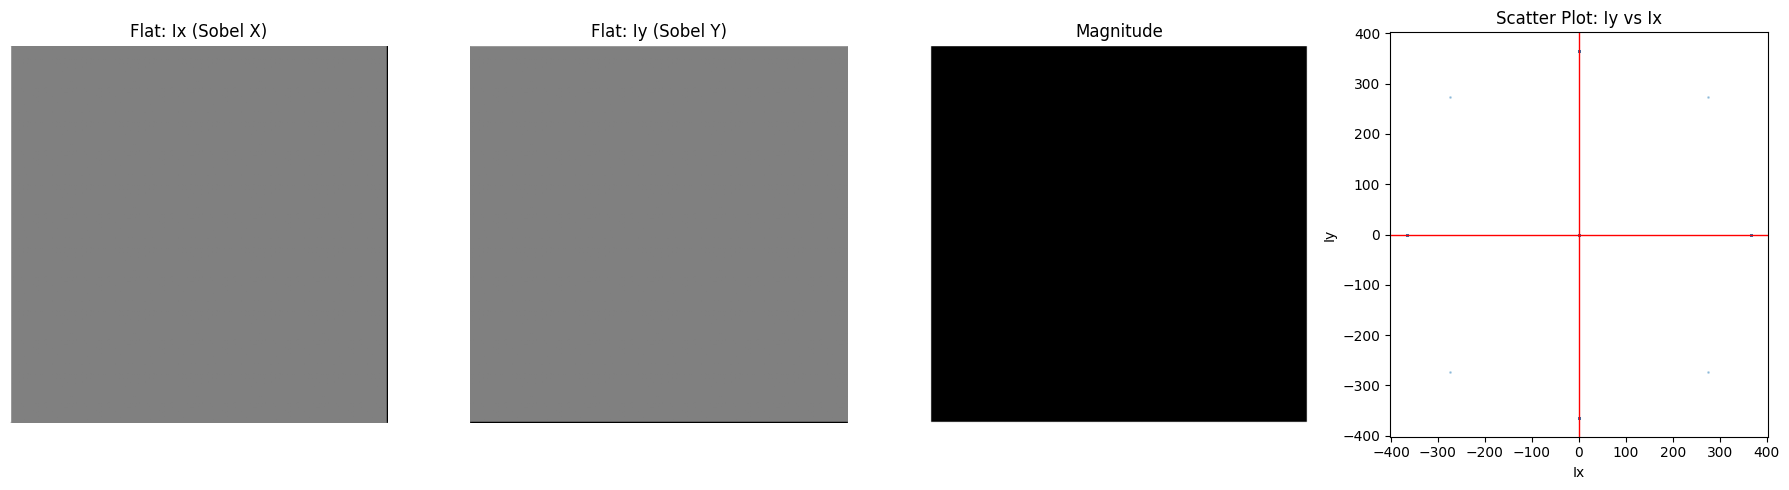

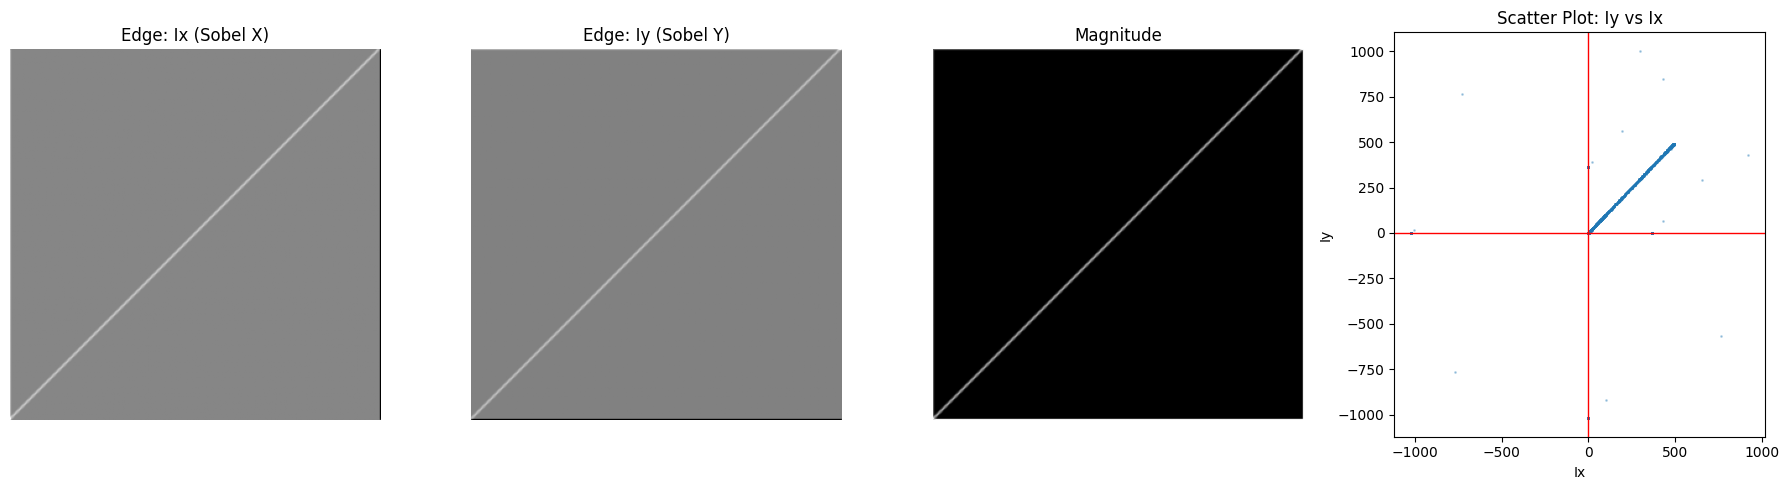

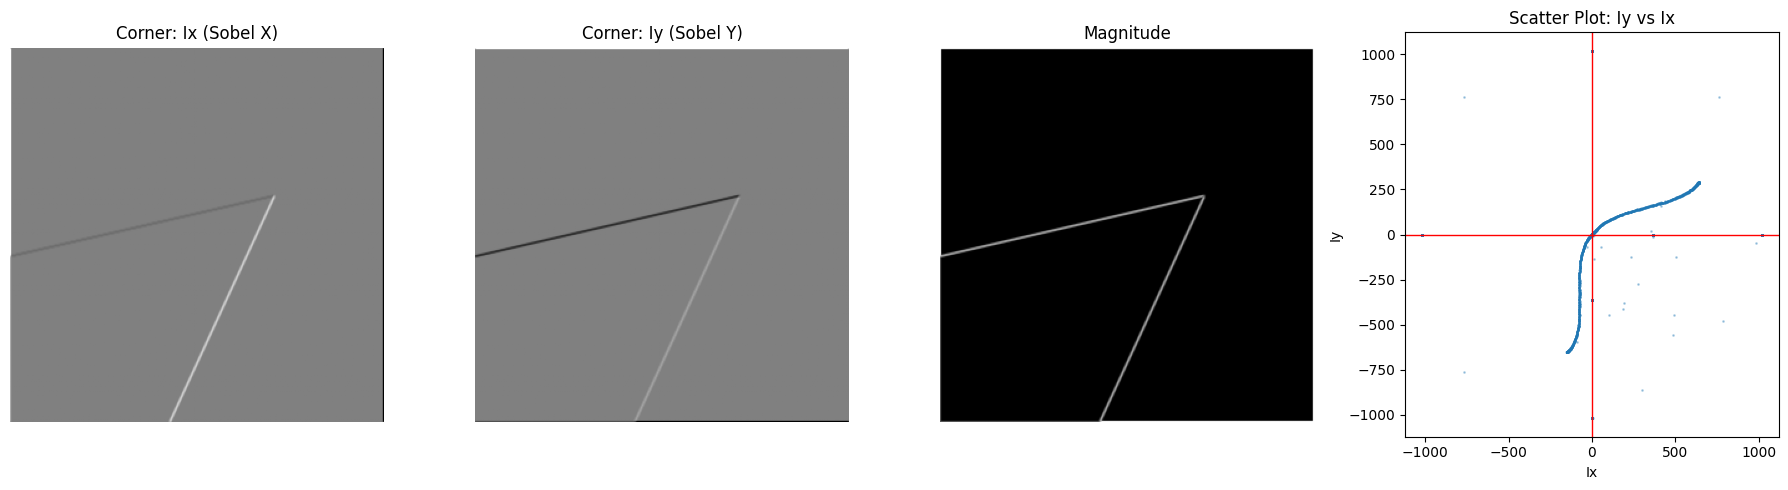

In [15]:
# Execute for the 3 reference images

Ix_flat, Iy_flat = analyze_gradients("Flat", flat)
Ix_edge, Iy_edge = analyze_gradients("Edge", edge)
Ix_corner, Iy_corner = analyze_gradients("Corner", corner)

### Part B - Ellipse Fitting and R Maps for Corner Detection

Now, use the above functions ( basically Ix and Iy ) and the formulas in the pre-session videos to find values of a,b and c ( the second moments ) and calculate the eigenvalues lambda1 and lambda2. Then use those to create an R map for the entire image. Display the R map. Do it for the 3 images of part A. So, you might want to create a function that takes the image, loops over the pixels with a window, fits the ellipse over the window, calculates the lambdas, and value of R, essentially finding R values for all the pixels and returning an R-map ( a 2d image with only one channel where the value of a pixel is the r-value of that pixel in the original grayscale image ). Now, display these R maps. Notice how the corners are clearly visible in white.

In [16]:
def compute_r_map(Ix, Iy, window_size=3, k=0.04):
    height, width = Ix.shape
    offset = window_size // 2
    R_map = np.zeros((height, width))

    # Pre-calculations
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix * Iy

    # Loop over every pixel (ignoring boundaries for the window)
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            # Define the window
            window_Ixx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            window_Iyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            window_Ixy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]

            # Calculate second moments
            a = np.sum(window_Ixx)
            c = np.sum(window_Iyy)
            b = np.sum(window_Ixy)

            # Calculate eigenvalues lambda1 and lambda2
            # Formula: λ = ((a+c) ± sqrt((a-c)^2 + 4b^2)) / 2
            term_sqrt = np.sqrt((a - c)**2 + 4 * b**2)
            lambda1 = (a + c + term_sqrt) / 2
            lambda2 = (a + c - term_sqrt) / 2

            # Calculate Harris Corner Response R
            # R = (λ1 * λ2) - k * (λ1 + λ2)^2
            R = (lambda1 * lambda2) - k * (lambda1 + lambda2)**2
            R_map[y, x] = R

    return R_map

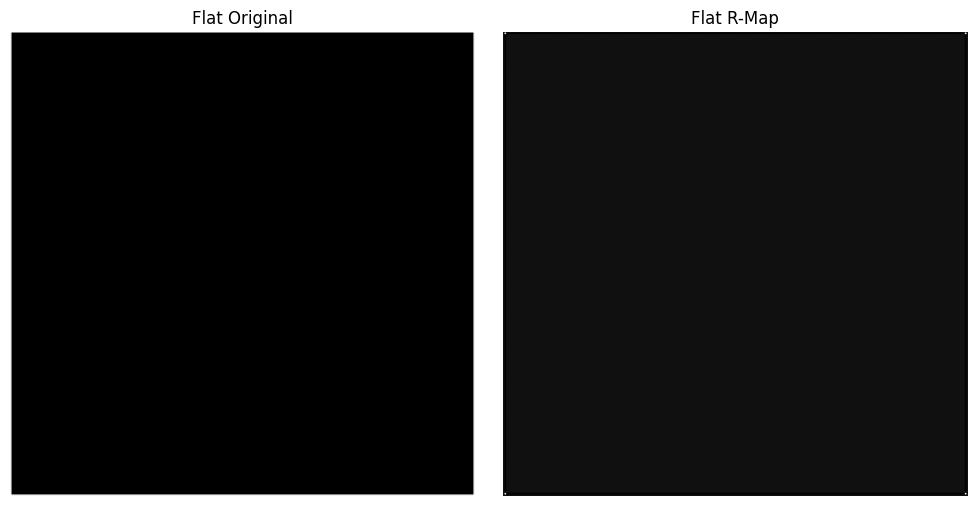

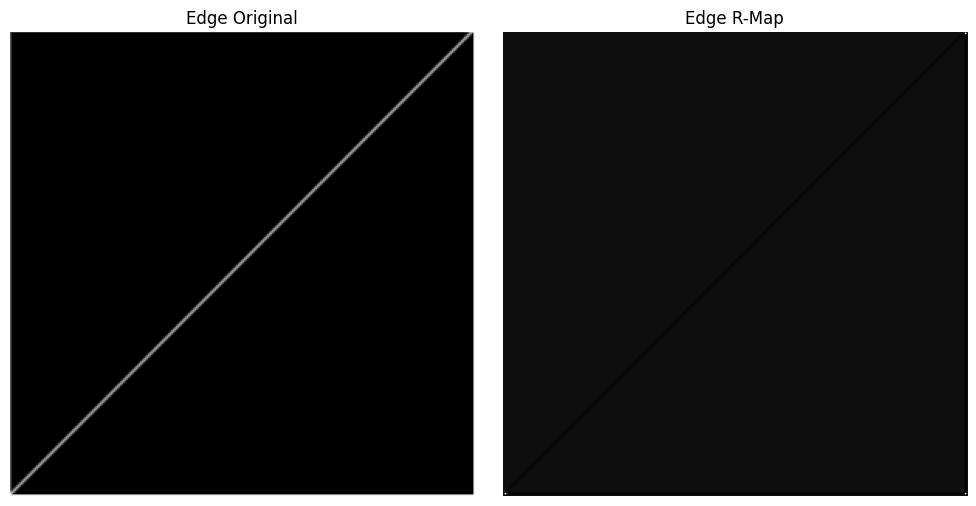

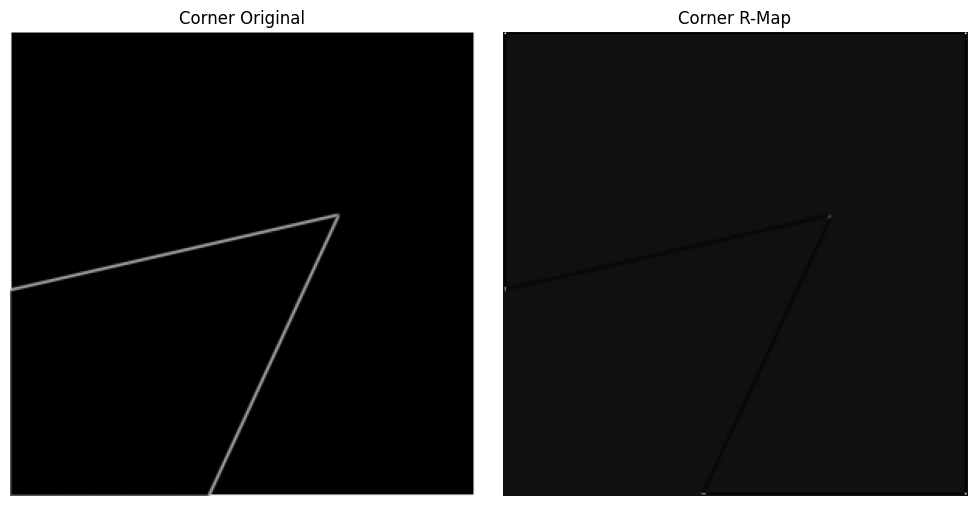

In [17]:
def process_and_display_part_b(image_name, Ix, Iy):
    r_map = compute_r_map(Ix, Iy)

    plt.figure(figsize=(10, 5))

    # Original
    plt.subplot(1, 2, 1)
    plt.title(f"{image_name} Original")
    plt.imshow(np.sqrt(Ix**2 + Iy**2), cmap='gray')
    plt.axis('off')

    # R-Map
    plt.subplot(1, 2, 2)
    plt.title(f"{image_name} R-Map")
    plt.imshow(r_map, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Execute for the 3 images
process_and_display_part_b("Flat", Ix_flat, Iy_flat)
process_and_display_part_b("Edge", Ix_edge, Iy_edge)
process_and_display_part_b("Corner", Ix_corner, Iy_corner)

### Part C - Hough Transforms

Again, import an image, create a function that takes the image, finds the canny edge map, then loops through it to find the equivalent line of each pixel, checks whether the slope and intercept are within acceptable limits of the accumulator size ( if not, discard ), does the voting procedure and creates the accumulator. Now, choose an accurate threshold for the accumulator to get the slope and intercept for a good number of lines in the image. One thing you can do is normalise the accumulator and use a 90 percent threshold ( just an example, im not telling if 90p is a good one or not ), then, mark the lines in the image using cv2 and display the final output. For the slope and intercept, choose the limit as per your image to get a good output. Please dont make it super large so it take hours to run and give the output.

Now, you can do the same but with rho theta method. Do this in a separate code cell from slope-intercept method and notice how fast this is

In [18]:
with open("dlf.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4RFXRXhpZgAATU0AKgAAAAgABwESAAMAAAABAAEAAAEaAAUAAAABAAAAYgEbAAUAAAABAAAAagEoAAMAAAABAAIAAAExAAIAAAAdAAAAcgEyAAIAAAAUAAAAj4dpAAQAAAABAAAApAAAANAAFfkAAAAnEAAV+QAAACcQQWRvYmUgUGhvdG9zaG9wIENDIChXaW5kb3dzKQAyMDI1OjA0OjE3IDEyOjQ3OjE5AAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAHgKADAAQAAAABAAADIAAAAAAAAAAGAQMAAwAAAAEABgAAARoABQAAAAEAAAEeARsABQAAAAEAAAEmASgAAwAAAAEAAgAAAgEABAAAAAEAAAEuAgIABAAAAAEAABAhAAAAAAAAAEgAAAABAAAASAAAAAH/2P/tAAxBZG9iZV9DTQAB/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAQwCgAwEiAAIRAQMRAf/dAAQACv/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKS

(np.float64(-0.5), np.float64(1919.5), np.float64(799.5), np.float64(-0.5))

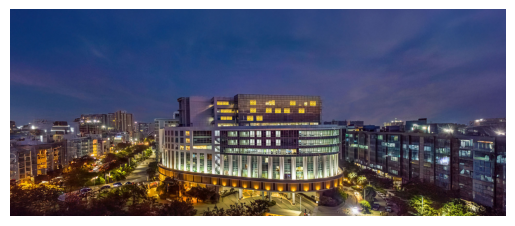

In [19]:
# @title
base64_image_2 = '''/9j/4RFXRXhpZgAATU0AKgAAAAgABwESAAMAAAABAAEAAAEaAAUAAAABAAAAYgEbAAUAAAABAAAAagEoAAMAAAABAAIAAAExAAIAAAAdAAAAcgEyAAIAAAAUAAAAj4dpAAQAAAABAAAApAAAANAAFfkAAAAnEAAV+QAAACcQQWRvYmUgUGhvdG9zaG9wIENDIChXaW5kb3dzKQAyMDI1OjA0OjE3IDEyOjQ3OjE5AAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAHgKADAAQAAAABAAADIAAAAAAAAAAGAQMAAwAAAAEABgAAARoABQAAAAEAAAEeARsABQAAAAEAAAEmASgAAwAAAAEAAgAAAgEABAAAAAEAAAEuAgIABAAAAAEAABAhAAAAAAAAAEgAAAABAAAASAAAAAH/2P/tAAxBZG9iZV9DTQAB/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAQwCgAwEiAAIRAQMRAf/dAAQACv/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NGlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A4lOFLaUg1a1tHVQClKdrYKn6YIkfchaqLFpT8Jg0nhOG+KSdVSVIJQOyczoAkhdJRIn4qQaY1MpJtSmwSoCtyk1jx3QKQSyjVSaEwBHKI0JtsgC8COE7WidVIR3UH2Ae1gk+KFrl3EBQmeTASDHOMuMqW2eEbpaQUe5o4CW8lTNfioloHdK1AF//0OWNHz+CgaoU4cE+53daNnuwExPRGGap9pU5aeRHwSgdilxKoMBKlGilCcNR4lpj2YbeFLb3SsPp1OeWlwbqQOUWhjbKBcCQCSNsSfaSzt/VSOSI3Ko4pHYIxWFPYUZuPd6Zf6cFpLTS59bbpadu0Yr3tvc7+pWlgsszKw8CuqWl8WPDQIJGzc7/AAnt9jVHLmsIBJmNN/BkGCXZEG+SkGg8hWTivbQb3PqawODNptYLJOn8xu9Xb/K2p24r3Nrc19RFzixg9RgMg7Pfuc30vcf8ImHm8P743r6r/Yn2a/pgpxWB3RLaH1PDX7ZcwWDa5rxtd9GSwu2u/kJmwDLuE+OSMoiUTxROxC0wo0RRRmnufuUPTI1EfBHcROigYPOvkEuJPCEWo5Kl6j+w+9SDe4CYgjnRLiVTAixyb0jGpTusjhQc9x8kQVcIf//Rw6KmXuqaX11uucWw97QGEf6d0/oWfu2WIZotcC6prbWifcxwLfaWh/6QbmezexVqXCpz63M27WyNsxEbmndtP5vu+nsRXuzHCh9dVFAYw1tbA97T9K21jYb6u2/6f0/+2lJLPw7yF9Omq4Yb2DI0WsxhlXM9KgWenY4e8gxu2tDY3P2e9OGYmS39TyHi0aubkNqqZAGrK3+o/fY5+5lf+kUMN9ttW4Q3Uh2wBvtM6x+4tF2Ayvp+PlurN9NrrHOY4y2yusMeywvbDW01Wiz6Pp/6J6jycxwmNyI4tPrXF/3KY4gbAA01c8Nhz6w76P0tQRuG6WhzN3gpva1lhbywE7XcSAS2dd35yO/Prx24/wDQrsGky91R2vtBdstdd6bvo/6L1n+tV9P0/eo+ldk+tdTiOw72B97abXuM0sr95bQ2ut9eyn30vynelb/o/UTI81WxJB01/e+qZYwRrQrsg6hjPrqvqloewtBrJDbDrucNlg2MZ++/1a02OLaaG0XH7MdziQ5zWuLXOc9p+l9FzXLQ6lh0XZtpss2U3S91obvLWuadzzU9nu2s92zei5PT8HOd69uYag0ekCMU3hxZId+nyrHPZ6drLKvT/M9P/RenWpPf72dOx/7lHDW35tXCfVhssbXZ6WNduGIyxwD3tBcXv9RnT82rJ3vu+jS+v0vfXYq/Sn5NDrGm1wfsLGXVSGtaf55z8enGv/R2M/Rfzdfoo1uM9l3STj2myjHFhruLragAHfo/StrZa3Bfk/zmzGZZ/wAZ/orONY5teQxuWz9KbS0uz7q2/ptvv/orG2ce+x7v1n+wmGGMmRMbOSuI3+7/AC/w0cZFDsgceoNca8PLGNitNwqx312WOYHN25tbrX4w3vYz+kf9x/8Ag0NjupW3Ps/aVL7rKfQucyovJpgV7XMZX9HaK2+pt3/8IrdtDjabBk4j5tz3bR1Aud+uBrGtk1j3Vf8Aand/ygz+cVDp2D+zcut9uVin1K3MacbJdWWkem6bLseu3a17fos/m/Z/waXt4/3Y3VaxgZS/S1lw+pfxnuV6sXIxiXGL97RIDHVbSCdw/SM939hM661tzqbKQbWgO9NtjSSCQN3uDdrf+rWy7KbbVDMovLp2tbn5T51/drxm7vpLC6maq+q5TMr1BSaR6xbussIbuMTnmuz3/wDDe/8A0SlhkI9IFUwkkkksmdRwi8V2F1dxkGsguAj/AIVo2/R+k78xSf1LpTDt9Z1rzwa2HZ/nWbHf5jFQvbTQGW49nqPbc1zm21N2AgVmNpfZTdWi3YtbKaGsZk1C+4OtdY1rngB/pN+zur2v2uc92+q3Z/gU/iJA1USAdRu6WPj5uW6kY7cfdZX61tDr2i5jT/Nt2Weiz1LPpenusUMTFy8/Gty8bGtsx6Gl11jQ32Bsl29u/c32tWczFx/SaBmPZvJ3PtqI2WNP81XtNnq+q4+n6n8hCPqMwhb9oaHyA6sOd6vucPpN/m/o/wCelxSF7K0NC3RZ9la9pyvVrqLS9xYyX7Y9r2s+jsc7/CIVYtyDY7GossqYC4kDcWt/NNm0bUr8XCZhY7rcYi0tYbLvVFhcfc63bi1usdVS/wBv7mx6rnqBxhU7pV11N1jbPtLWuc0en7HVu3N2foX7n/TRM5d1R4X/0ue+xOybSWe4Pr27gfpOmytte5zv5X76DkdStyasWvDpdYythaLdagZbWy07nhlX0t9Xqf8AbiqYvXuoYtVmNi2ltFxJDNrTGpIH7rU46v1T0RW4iysukVvax9Y4/madp9D2/T9BVDHLKZlKMDwn9X6pD5hwy4vS3RKAFAnX5tO2yPLc1jWY72EPYP07CQA7bptZt3P2/wBtalTmP6QacbCGKMx5fbba8Cv02lm6za2x+X6FVv8APW7PQ/4P9Esqx/TjaQ1oedNpHtaP7ID37P8AX9IjuzsbFY1oDW5DNfWrYQ8hzZ2mz2u/O2P2+kjOEtNyb8StvypJi4NBvaym7189hIddAFTWiAy3GtrJrs9v5rmfpPV/0iu9ZyLj6ePjVNx2OePtV+hvtcBuc69o9SxjfZ/MUrKt6tmdRe5jttYcQ9+0+m3axv6NzvTDfUdXZvczf++tDovVGYwsZmPstF7WCqyl3uqGtfq3VsfX6j2/onfy/Tq9RMnxQBmQckhXp66/u8P7q2IEjRNeLtZPWcPCsdi5WPVmPpr9B7aLHMu9N1bWte/+k0vdWx302Wf8ZWrQ619WqrxZkYuTSHOa6GCt4IL8m782ytztzcj/AEX764d7K/tgtyLzXU579A/e/UbvUstA9z3b2v8A/IK9nZnXL2NyKMmm2mXUtqoGgADGPu9G1jv5/wDnfpf9bpTYmcfbHEDY9c5+kcXaPD6V0scJcRoithA9HpcfqX1b+zYlDsrIpbjipwc6p5a5ord9L0w/2vyf+s/4Wr9J9o9RmN+r76HU/taobGUMa94fWXbHvvud+laz3e5rPTWL0hvUMrCyK76mNLiKzdkl4Da6vfS2mobW/orXfaK/d6S1zT0aquvIyHMfdXb697qpdvueYNzKHl+9lzdlX2X+a9T/AAdfqp0+YMSRXEQa9P8AzWP2onqR5psWrBy76H2dUx3VHPc6mv1WVmqoj1S6zd7/AOed6nv/AJ3+YVvo9HSrqmu+2imMq87XWtqHubRXve23dvr37n+x1X/Brn+mn6v5WQyit1rnY5sfjsdXvNps3WPGa39Xe7GpZs9PY/1N/qqyejsopxHY9RybMe6y2xtg/nWj02tqscxv8y977vR/R1vROfUxMSD4+n97+X+Gj2wdeI/Y6lGP0vHuodl9XxXNxqix4rt9QucLG3hzW17vzfb/AF1h9excfP6nbn9NvczC2NfdfkMc2nfS1oFUbX22+s5m+vfV+k/SVql1a0YNeKylnousOQ5zcprXPHqH0ny6r9G+tzXfq/s/Vv0v+EVjo14zS09RYbvShrchkB7WhwcWs9hrf9H/AIpPMsnCJwArY9Zf4qhCA0JJLSsZj1ZleP1fFOAy4NuLm2b2tLvz9tTt1LHbW+z1Mi5iC/7TXg+nXecmltzL3tpdvqDp0vd7mPZez+Zcy2r1P+E2LS6vhV09TDH2tuwsl73MsYKwXlstDv0e1uPkMb6VdlPs/wCJWTlOrxGWYmMHV12gNyQ+drnAtez6L3OZt2qXHOUoxOhsDb5f639biRQs+CXC6ja1tYFsux3D0Wk/Rc5zi5zWu9m/2t/9GItvVc9v1et6U57XYnq1EshgdLXudDto9Wxnt/0n6FU6OgZt+JZlVur20t3Fm4bg2drjz+Zu3KpTVmWFzaWFxYJJHu2ge/6Td37qfHLA8VSGmh12W0NC6GP6DDXZivc270/0m0lgB03Q7cXe389/sU77+q1ZleQLXGyxpZZc5ws3VtfWw1eqfU9tdm3+oh4zM6uh2dZW99TIpfa0SGu9rmsubAsr/R/QfsVa20etjmuGOcXDc0yXa187VKJgx0o6rTC5Wfxf/9Pzar6f53H5que72z60/wAjbPPksdJA79PqzDY7t58w3n6PePF30UzvpDnt9P4d/wCSqSSKnRon0LY38D6EbOR/ObvzVOjl3PH53y4/lfufy1lpJkvoug37f5530ufz/p9/pLX6RP2XIj1d3b0ojj83d7PV/wBIuZSTcvy9Nx+aB1ewdO6/d9pn0jxHhR/SPT9v/Gf8B6apXR9hbu9X+df9KY+h39P/AMH/AO665xJRj6b9Evc/Vf0Psx/m/U3D+a9Wefbv/wABv2/+pf0i6jP3/s5+/wCy8abNn2uP5Po/mf6f8/YvHklT/wAqf5z5j/Of+o/9WvlsPk2j8v8A3X9Z9E6pskREbdN2/ifzt3/f1s/UL1Ptw2fuu+js8P8AB+qvIklfj8o8x/KLCer6V1z7L+0Oo7f2Xv3N3favtHMe2N/6H193+i/R+n/Ofoti5XO2+n24bO3dtj3Rt/kf62Ln0kMPzz/nNh8/yJH0e86Bu/Zl0b/ps3bY9Kd7Nu2f8J/xP6P1/wCcVzp8fYrp9Pd6jp+zz6sbm7t/5nqf6Xb+l3/zX+FXm6So8x/OT23Hy/8AdI6F7zD9P7L1Pb6+70/d9h38RX/TN/6L7P8A8V+k+0f9cXJOn7TZ9KfU8t3I+l+ZvVBJXeT+X9L/AA/m/wAH+qgbP//Z/+0ZRFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAXHAFaAAMbJUccAVoAAxslRxwCAAACAAAAOEJJTQQlAAAAAAAQx10X5XS1bvXbvjmUwOl5XDhCSU0EOgAAAAAA5QAAABAAAAABAAAAAAALcHJpbnRPdXRwdXQAAAAFAAAAAFBzdFNib29sAQAAAABJbnRlZW51bQAAAABJbnRlAAAAAENscm0AAAAPcHJpbnRTaXh0ZWVuQml0Ym9vbAAAAAALcHJpbnRlck5hbWVURVhUAAAAAQAAAAAAD3ByaW50UHJvb2ZTZXR1cE9iamMAAAAMAFAAcgBvAG8AZgAgAFMAZQB0AHUAcAAAAAAACnByb29mU2V0dXAAAAABAAAAAEJsdG5lbnVtAAAADGJ1aWx0aW5Qcm9vZgAAAAlwcm9vZkNNWUsAOEJJTQQ7AAAAAAItAAAAEAAAAAEAAAAAABJwcmludE91dHB1dE9wdGlvbnMAAAAXAAAAAENwdG5ib29sAAAAAABDbGJyYm9vbAAAAAAAUmdzTWJvb2wAAAAAAENybkNib29sAAAAAABDbnRDYm9vbAAAAAAATGJsc2Jvb2wAAAAAAE5ndHZib29sAAAAAABFbWxEYm9vbAAAAAAASW50cmJvb2wAAAAAAEJja2dPYmpjAAAAAQAAAAAAAFJHQkMAAAADAAAAAFJkICBkb3ViQG/gAAAAAAAAAAAAR3JuIGRvdWJAb+AAAAAAAAAAAABCbCAgZG91YkBv4AAAAAAAAAAAAEJyZFRVbnRGI1JsdAAAAAAAAAAAAAAAAEJsZCBVbnRGI1JsdAAAAAAAAAAAAAAAAFJzbHRVbnRGI1B4bEBiAAAAAAAAAAAACnZlY3RvckRhdGFib29sAQAAAABQZ1BzZW51bQAAAABQZ1BzAAAAAFBnUEMAAAAATGVmdFVudEYjUmx0AAAAAAAAAAAAAAAAVG9wIFVudEYjUmx0AAAAAAAAAAAAAAAAU2NsIFVudEYjUHJjQFkAAAAAAAAAAAAQY3JvcFdoZW5QcmludGluZ2Jvb2wAAAAADmNyb3BSZWN0Qm90dG9tbG9uZwAAAAAAAAAMY3JvcFJlY3RMZWZ0bG9uZwAAAAAAAAANY3JvcFJlY3RSaWdodGxvbmcAAAAAAAAAC2Nyb3BSZWN0VG9wbG9uZwAAAAAAOEJJTQPtAAAAAAAQAJAAAAABAAIAkAAAAAEAAjhCSU0EJgAAAAAADgAAAAAAAAAAAAA/gAAAOEJJTQPyAAAAAAAKAAD///////8AADhCSU0EDQAAAAAABAAAAB44QklNBBkAAAAAAAQAAAAeOEJJTQPzAAAAAAAJAAAAAAAAAAABADhCSU0nEAAAAAAACgABAAAAAAAAAAI4QklNA/UAAAAAAEgAL2ZmAAEAbGZmAAYAAAAAAAEAL2ZmAAEAoZmaAAYAAAAAAAEAMgAAAAEAWgAAAAYAAAAAAAEANQAAAAEALQAAAAYAAAAAAAE4QklNA/gAAAAAAHAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAOEJJTQQIAAAAAAAQAAAAAQAAAkAAAAJAAAAAADhCSU0EHgAAAAAABAAAAAA4QklNBBoAAAAAA0EAAAAGAAAAAAAAAAAAAAMgAAAHgAAAAAYAYgBhAG4AbgBlAHIAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAB4AAAAMgAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAEAAAAAAABudWxsAAAAAgAAAAZib3VuZHNPYmpjAAAAAQAAAAAAAFJjdDEAAAAEAAAAAFRvcCBsb25nAAAAAAAAAABMZWZ0bG9uZwAAAAAAAAAAQnRvbWxvbmcAAAMgAAAAAFJnaHRsb25nAAAHgAAAAAZzbGljZXNWbExzAAAAAU9iamMAAAABAAAAAAAFc2xpY2UAAAASAAAAB3NsaWNlSURsb25nAAAAAAAAAAdncm91cElEbG9uZwAAAAAAAAAGb3JpZ2luZW51bQAAAAxFU2xpY2VPcmlnaW4AAAANYXV0b0dlbmVyYXRlZAAAAABUeXBlZW51bQAAAApFU2xpY2VUeXBlAAAAAEltZyAAAAAGYm91bmRzT2JqYwAAAAEAAAAAAABSY3QxAAAABAAAAABUb3AgbG9uZwAAAAAAAAAATGVmdGxvbmcAAAAAAAAAAEJ0b21sb25nAAADIAAAAABSZ2h0bG9uZwAAB4AAAAADdXJsVEVYVAAAAAEAAAAAAABudWxsVEVYVAAAAAEAAAAAAABNc2dlVEVYVAAAAAEAAAAAAAZhbHRUYWdURVhUAAAAAQAAAAAADmNlbGxUZXh0SXNIVE1MYm9vbAEAAAAIY2VsbFRleHRURVhUAAAAAQAAAAAACWhvcnpBbGlnbmVudW0AAAAPRVNsaWNlSG9yekFsaWduAAAAB2RlZmF1bHQAAAAJdmVydEFsaWduZW51bQAAAA9FU2xpY2VWZXJ0QWxpZ24AAAAHZGVmYXVsdAAAAAtiZ0NvbG9yVHlwZWVudW0AAAARRVNsaWNlQkdDb2xvclR5cGUAAAAATm9uZQAAAAl0b3BPdXRzZXRsb25nAAAAAAAAAApsZWZ0T3V0c2V0bG9uZwAAAAAAAAAMYm90dG9tT3V0c2V0bG9uZwAAAAAAAAALcmlnaHRPdXRzZXRsb25nAAAAAAA4QklNBCgAAAAAAAwAAAACP/AAAAAAAAA4QklNBBQAAAAAAAQAAAAEOEJJTQQMAAAAABA9AAAAAQAAAKAAAABDAAAB4AAAfaAAABAhABgAAf/Y/+0ADEFkb2JlX0NNAAH/7gAOQWRvYmUAZIAAAAAB/9sAhAAMCAgICQgMCQkMEQsKCxEVDwwMDxUYExMVExMYEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQ0LCw0ODRAODhAUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCABDAKADASIAAhEBAxEB/90ABAAK/8QBPwAAAQUBAQEBAQEAAAAAAAAAAwABAgQFBgcICQoLAQABBQEBAQEBAQAAAAAAAAABAAIDBAUGBwgJCgsQAAEEAQMCBAIFBwYIBQMMMwEAAhEDBCESMQVBUWETInGBMgYUkaGxQiMkFVLBYjM0coLRQwclklPw4fFjczUWorKDJkSTVGRFwqN0NhfSVeJl8rOEw9N14/NGJ5SkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2N0dXZ3eHl6e3x9fn9xEAAgIBAgQEAwQFBgcHBgU1AQACEQMhMRIEQVFhcSITBTKBkRShsUIjwVLR8DMkYuFygpJDUxVjczTxJQYWorKDByY1wtJEk1SjF2RFVTZ0ZeLys4TD03Xj80aUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9ic3R1dnd4eXp7fH/9oADAMBAAIRAxEAPwDiU4UtpSDVrW0dVAKUp2tgqfpgiR9yFqosWlPwmDSeE4b4pJ1VJUglA7JzOgCSF0lEifipBpjUykm1KbBKgK3KTWPHdApBLKNVJoTAEcojQm2yALwI4TtaJ1UhHdQfYB7WCT4oWuXcQFCZ5MBIMc4y4ypbZ4RulpBR7mjgJbyVM1+KiWgd0rUAX//Q5Y0fP4KBqhThwT7nd1o2e7ATE9EYZqn2lTlp5EfBKB2KXEqgwEqUaKUJw1HiWmPZht4UtvdKw+nU55aXBupA5RaGNsoFwJAJI2xJ9pLO39VI5IjcqjikdgjFYU9hRm493pl/pwWktNLn1tulp27Rive29zv6laWCyzMrDwK6paXxY8NAgkbNzv8ACe32NUcuawgEmY038GQYJdkQb5KQaDyFZOK9tBvc+prA4M2m1gsk6fzG71dv8ranbivc2tzX1EXOLGD1GAyDs9+5zfS9x/wiYebw/vjevqv9ifZr+mCnFYHdEtofU8NftlzBYNrmvG130ZLC7a7+QmbAMu4T45IyiJRPFE7ELTCjRFFGae5+5Q9MjUR8EdxE6KBg86+QS4k8IRajkqXqP7D71IN7gJiCOdEuJVMCLHJvSMalO6yOFBz3HyRBVwh//9HDoqZe6ppfXW65xbD3tAYR/p3T+hZ+7ZYhmi1wLqmttaJ9zHAt9paH/pBuZ7N7FWpcKnPrczbtbI2zERuad20/m+76exFe7McKH11UUBjDW1sD3tP0rbWNhvq7b/p/T/7aUks/DvIX06arhhvYMjRazGGVcz0qBZ6djh7yDG7a0Njc/Z704ZiZLf1PIeLRq5uQ2qpkAasrf6j99jn7mV/6RQw3221bhDdSHbAG+0zrH7i0XYDK+n4+W6s302usc5jjLbK6wx7LC9sNbTVaLPo+n/onqPJzHCY3Iji0+tcX/cpjiBsADTVzw2HPrDvo/S1BG4bpaHM3eCm9rWWFvLATtdxIBLZ13fnI78+vHbj/ANCuwaTL3VHa+0F2y113pu+j/ovWf61X0/T96j6V2T611OI7DvYH3tpte4zSyv3ltDa6317KffS/Kd6Vv+j9RMjzVbEkHTX976pljBGtCuyDqGM+uq+qWh7C0GskNsOu5w2WDYxn77/VrTY4tpobRcfsx3OJDnNa4tc5z2n6X0XNctDqWHRdm2myzZTdL3Whu8ta5p3PNT2e7az3bN6Lk9Pwc53r25hqDR6QIxTeHFkh36fKsc9np2ssq9P8z0/9F6dak9/vZ07H/uUcNbfm1cJ9WGyxtdnpY124YjLHAPe0Fxe/1GdPzasne+76NL6/S99dir9Kfk0OsabXB+wsZdVIa1p/nnPx6ca/9HYz9F/N1+ijW4z2XdJOPabKMcWGu4utqAAd+j9K2tlrcF+T/ObMZln/ABn+is41jm15DG5bP0ptLS7Purb+m2+/+isbZx77Hu/Wf7CYYYyZExs5K4jf7v8AL/DRxkUOyBx6g1xrw8sY2K03CrHfXZY5gc3bm1utfjDe9jP6R/3H/wCDQ2O6lbc+z9pUvusp9C5zKi8mmBXtcxlf0dorb6m3f/wit20ONpsGTiPm3PdtHUC5364Gsa2TWPdV/wBqd3/KDP5xUOnYP7Ny6325WKfUrcxpxsl1ZaR6bpsux67drXt+iz+b9n/Bpe3j/djdVrGBlL9LWXD6l/Ge5XqxcjGJcYv3tEgMdVtIJ3D9Iz3f2EzrrW3OpspBtaA7022NJIJA3e4N2t/6tbLspttUMyi8una1uflPnX92vGbu+ksLqZqr6rlMyvUFJpHrFu6ywhu4xOea7Pf/AMN7/wDRKWGQj0gVTCSSSSyZ1HCLxXYXV3GQayC4CP8AhWjb9H6TvzFJ/UulMO31nWvPBrYdn+dZsd/mMVC9tNAZbj2eo9tzXObbU3YCBWY2l9lN1aLdi1spoaxmTUL7g611jWueAH+k37O6va/a5z3b6rdn+BT+IkDVRIB1G7pY+Pm5bqRjtx91lfrW0OvaLmNP823ZZ6LPUs+l6e6xQxMXLz8a3Lxsa2zHoaXXWNDfYGyXb279zfa1ZzMXH9JoGY9m8nc+2ojZY0/zVe02er6rj6fqfyEI+ozCFv2hofIDqw53q+5w+k3+b+j/AJ6XFIXsrQ0LdFn2Vr2nK9WuotL3FjJftj2vaz6Oxzv8IhVi3INjsaiyypgLiQNxa3802bRtSvxcJmFjutxiLS1hsu9UWFx9zrduLW6x1VL/AG/ubHqueoHGFTulXXU3WNs+0ta5zR6fsdW7c3Z+hfuf9NEzl3VHhf/S577E7JtJZ7g+vbuB+k6bK217nO/lfvoOR1K3Jqxa8Ol1jK2Fot1qBltbLTueGVfS31ep/wBuKpi9e6hi1WY2LaW0XEkM2tMakgfutTjq/VPRFbiLKy6RW9rH1jj+Zp2n0Pb9P0FUMcspmUowPCf1fqkPmHDLi9LdEoAUCdfm07bI8tzWNZjvYQ9g/TsJADtum1m3c/b/AG1qVOY/pBpxsIYozHl9ttrwK/TaWbrNrbH5foVW/wA9bs9D/g/0SyrH9ONpDWh502ke1o/sgPfs/wBf0iO7OxsVjWgNbkM19athDyHNnabPa787Y/b6SM4S03JvxK2/KkmLg0G9rKbvXz2Eh10AVNaIDLca2smuz2/muZ+k9X/SK71nIuPp4+NU3HY54+1X6G+1wG5zr2j1LGN9n8xSsq3q2Z1F7mO21hxD37T6bdrG/o3O9MN9R1dm9zN/760Oi9UZjCxmY+y0XtYKrKXe6oa1+rdWx9fqPb+id/L9Or1EyfFAGZBySFenrr+7w/urYgSNE14u1k9Zw8Kx2LlY9WY+mv0Htoscy703Vta17/6TS91bHfTZZ/xlatDrX1aqvFmRi5NIc5roYK3ggvybvzbK3O3NyP8ARfvrh3sr+2C3IvNdTnv0D979Ru9Sy0D3Pdva/wD8gr2dmdcvY3IoyabaZdS2qgaAAMY+70bWO/n/AOd+l/1ulNiZx9scQNj1zn6Rxdo8PpXSxwlxGiK2ED0elx+pfVv7NiUOysiluOKnBzqnlrmit30vTD/a/J/6z/hav0n2j1GY36vvodT+1qhsZQxr3h9Zdse++536VrPd7ms9NYvSG9QysLIrvqY0uIrN2SXgNrq99Laahtb+itd9or93pLXNPRqq68jIcx91dvr3uql2+55g3MoeX72XN2VfZf5r1P8AB1+qnT5gxJFcRBr0/wDNY/aiepHmmxasHLvofZ1THdUc9zqa/VZWaqiPVLrN3v8A553qe/8Anf5hW+j0dKuqa77aKYyrztda2oe5tFe97bd2+vfuf7HVf8Guf6afq/lZDKK3Wudjmx+Ox1e82mzdY8Zrf1d7salmz09j/U3+qrJ6OyinEdj1HJsx7rLbG2D+daPTa2qxzG/zL3vu9H9HW9E59TExIPj6f3v5f4aPbB14j9jqUY/S8e6h2X1fFc3GqLHiu31C5wsbeHNbXu/N9v8AXWH17Fx8/qduf029zMLY191+Qxzad9LWgVRtfbb6zmb699X6T9JWqXVrRg14rKWei6w5DnNymtc8eofSfLqv0b63Nd+r+z9W/S/4RWOjXjNLT1Fhu9KGtyGQHtaHBxaz2Gt/0f8Aik8yycInACtj1l/iqEIDQkktKxmPVmV4/V8U4DLg24ubZva0u/P21O3Usdtb7PUyLmIL/tNeD6dd5yaW3Mve2l2+oOnS93uY9l7P5lzLavU/4TYtLq+FXT1MMfa27CyXvcyxgrBeWy0O/R7W4+QxvpV2U+z/AIlZOU6vEZZiYwdXXaA3JD52ucC17Povc5m3apcc5SjE6GwNvl/rf1uJFCz4JcLqNrW1gWy7HcPRaT9FznOLnNa72b/a3/0Yi29Vz2/V63pTntdierUSyGB0te50O2j1bGe3/SfoVTo6Bm34lmVW6vbS3cWbhuDZ2uPP5m7cqlNWZYXNpYXFgkke7aB7/pN3fup8csDxVIaaHXZbQ0LoY/oMNdmK9zbvT/SbSWAHTdDtxd7fz3+xTvv6rVmV5AtcbLGlllznCzdW19bDV6p9T212bf6iHjMzq6HZ1lb31Mil9rRIa72uay5sCyv9H9B+xVrbR62Oa4Y5xcNzTJdrXztUomDHSjqtMLlZ/F//0/Nqvp/ncfmq57vbPrT/ACNs8+Sx0kDv0+rMNju3nzDefo948XfRTO+kOe30/h3/AJKpJIqdGifQtjfwPoRs5H85u/NU6OXc8fnfLj+V+5/LWWkmS+i6Dft/nnfS5/P+n3+ktfpE/ZciPV3dvSiOPzd3s9X/AEi5lJNy/L03H5oHV7B07r932mfSPEeFH9I9P2/8Z/wHpqldH2Fu71f51/0pj6Hf0/8Awf8A7rrnElGPpv0S9z9V/Q+zH+b9TcP5r1Z59u//AAG/b/6l/SLqM/f+zn7/ALLxps2fa4/k+j+Z/p/z9i8eSVP/ACp/nPmP85/6j/1a+Ww+TaPy/wDdf1n0TqmyRERt03b+J/O3f9/Wz9QvU+3DZ+676Ozw/wAH6q8iSV+PyjzH8osJ6vpXXPsv7Q6jt/Ze/c3d9q+0cx7Y3/ofX3f6L9H6f85+i2Llc7b6fbhs7d22PdG3+R/rYufSQw/PP+c2Hz/IkfR7zoG79mXRv+mzdtj0p3s27Z/wn/E/o/X/AJxXOnx9iun093qOn7PPqxubu3/mep/pdv6Xf/Nf4VebpKjzH85PbcfL/wB0joXvMP0/svU9vr7vT932HfxFf9M3/ovs/wDxX6T7R/1xck6ftNn0p9Ty3cj6X5m9UEld5P5f0v8AD+b/AAf6qBs//9kAOEJJTQQhAAAAAABTAAAAAQEAAAAPAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwAAAAEgBBAGQAbwBiAGUAIABQAGgAbwB0AG8AcwBoAG8AcAAgAEMAQwAAAAEAOEJJTQQGAAAAAAAHAAQBAQABAQD/4Q0saHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA1LjUtYzAyMSA3OS4xNTQ5MTEsIDIwMTMvMTAvMjktMTE6NDc6MTYgICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIHhtbG5zOnhtcE1NPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vIiB4bWxuczpzdEV2dD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3NUeXBlL1Jlc291cmNlRXZlbnQjIiB4bXA6TW9kaWZ5RGF0ZT0iMjAyNS0wNC0xN1QxMjo0NzoxOSswNTozMCIgeG1wOkNyZWF0b3JUb29sPSJBZG9iZSBQaG90b3Nob3AgQ0MgKFdpbmRvd3MpIiB4bXA6Q3JlYXRlRGF0ZT0iMjAyNS0wNC0xN1QxMjozNjoxMyswNTozMCIgeG1wOk1ldGFkYXRhRGF0ZT0iMjAyNS0wNC0xN1QxMjo0NzoxOSswNTozMCIgZGM6Zm9ybWF0PSJpbWFnZS9qcGVnIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIzIiBwaG90b3Nob3A6SUNDUHJvZmlsZT0ic1JHQiBJRUM2MTk2Ni0yLjEiIHhtcE1NOkluc3RhbmNlSUQ9InhtcC5paWQ6N2ExODg1YjUtYmNhMi04ZDRjLTgzNmEtNDNlMDVhNzYwYTVjIiB4bXBNTTpEb2N1bWVudElEPSJ4bXAuZGlkOjdhMTg4NWI1LWJjYTItOGQ0Yy04MzZhLTQzZTA1YTc2MGE1YyIgeG1wTU06T3JpZ2luYWxEb2N1bWVudElEPSJ4bXAuZGlkOjdhMTg4NWI1LWJjYTItOGQ0Yy04MzZhLTQzZTA1YTc2MGE1YyI+IDx4bXBNTTpIaXN0b3J5PiA8cmRmOlNlcT4gPHJkZjpsaSBzdEV2dDphY3Rpb249InNhdmVkIiBzdEV2dDppbnN0YW5jZUlEPSJ4bXAuaWlkOjdhMTg4NWI1LWJjYTItOGQ0Yy04MzZhLTQzZTA1YTc2MGE1YyIgc3RFdnQ6d2hlbj0iMjAyNS0wNC0xN1QxMjo0NzoxOSswNTozMCIgc3RFdnQ6c29mdHdhcmVBZ2VudD0iQWRvYmUgUGhvdG9zaG9wIENDIChXaW5kb3dzKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPC9yZGY6RGVzY3JpcHRpb24+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgPD94cGFja2V0IGVuZD0idyI/Pv/iDFhJQ0NfUFJPRklMRQABAQAADEhMaW5vAhAAAG1udHJSR0IgWFlaIAfOAAIACQAGADEAAGFjc3BNU0ZUAAAAAElFQyBzUkdCAAAAAAAAAAAAAAAAAAD21gABAAAAANMtSFAgIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEWNwcnQAAAFQAAAAM2Rlc2MAAAGEAAAAbHd0cHQAAAHwAAAAFGJrcHQAAAIEAAAAFHJYWVoAAAIYAAAAFGdYWVoAAAIsAAAAFGJYWVoAAAJAAAAAFGRtbmQAAAJUAAAAcGRtZGQAAALEAAAAiHZ1ZWQAAANMAAAAhnZpZXcAAAPUAAAAJGx1bWkAAAP4AAAAFG1lYXMAAAQMAAAAJHRlY2gAAAQwAAAADHJUUkMAAAQ8AAAIDGdUUkMAAAQ8AAAIDGJUUkMAAAQ8AAAIDHRleHQAAAAAQ29weXJpZ2h0IChjKSAxOTk4IEhld2xldHQtUGFja2FyZCBDb21wYW55AABkZXNjAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAEnNSR0IgSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYWVogAAAAAAAA81EAAQAAAAEWzFhZWiAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPZGVzYwAAAAAAAAAWSUVDIGh0dHA6Ly93d3cuaWVjLmNoAAAAAAAAAAAAAAAWSUVDIGh0dHA6Ly93d3cuaWVjLmNoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGRlc2MAAAAAAAAALklFQyA2MTk2Ni0yLjEgRGVmYXVsdCBSR0IgY29sb3VyIHNwYWNlIC0gc1JHQgAAAAAAAAAAAAAALklFQyA2MTk2Ni0yLjEgRGVmYXVsdCBSR0IgY29sb3VyIHNwYWNlIC0gc1JHQgAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAACxSZWZlcmVuY2UgVmlld2luZyBDb25kaXRpb24gaW4gSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdmlldwAAAAAAE6T+ABRfLgAQzxQAA+3MAAQTCwADXJ4AAAABWFlaIAAAAAAATAlWAFAAAABXH+dtZWFzAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAACjwAAAAJzaWcgAAAAAENSVCBjdXJ2AAAAAAAABAAAAAAFAAoADwAUABkAHgAjACgALQAyADcAOwBAAEUASgBPAFQAWQBeAGMAaABtAHIAdwB8AIEAhgCLAJAAlQCaAJ8ApACpAK4AsgC3ALwAwQDGAMsA0ADVANsA4ADlAOsA8AD2APsBAQEHAQ0BEwEZAR8BJQErATIBOAE+AUUBTAFSAVkBYAFnAW4BdQF8AYMBiwGSAZoBoQGpAbEBuQHBAckB0QHZAeEB6QHyAfoCAwIMAhQCHQImAi8COAJBAksCVAJdAmcCcQJ6AoQCjgKYAqICrAK2AsECywLVAuAC6wL1AwADCwMWAyEDLQM4A0MDTwNaA2YDcgN+A4oDlgOiA64DugPHA9MD4APsA/kEBgQTBCAELQQ7BEgEVQRjBHEEfgSMBJoEqAS2BMQE0wThBPAE/gUNBRwFKwU6BUkFWAVnBXcFhgWWBaYFtQXFBdUF5QX2BgYGFgYnBjcGSAZZBmoGewaMBp0GrwbABtEG4wb1BwcHGQcrBz0HTwdhB3QHhgeZB6wHvwfSB+UH+AgLCB8IMghGCFoIbgiCCJYIqgi+CNII5wj7CRAJJQk6CU8JZAl5CY8JpAm6Cc8J5Qn7ChEKJwo9ClQKagqBCpgKrgrFCtwK8wsLCyILOQtRC2kLgAuYC7ALyAvhC/kMEgwqDEMMXAx1DI4MpwzADNkM8w0NDSYNQA1aDXQNjg2pDcMN3g34DhMOLg5JDmQOfw6bDrYO0g7uDwkPJQ9BD14Peg+WD7MPzw/sEAkQJhBDEGEQfhCbELkQ1xD1ERMRMRFPEW0RjBGqEckR6BIHEiYSRRJkEoQSoxLDEuMTAxMjE0MTYxODE6QTxRPlFAYUJxRJFGoUixStFM4U8BUSFTQVVhV4FZsVvRXgFgMWJhZJFmwWjxayFtYW+hcdF0EXZReJF64X0hf3GBsYQBhlGIoYrxjVGPoZIBlFGWsZkRm3Gd0aBBoqGlEadxqeGsUa7BsUGzsbYxuKG7Ib2hwCHCocUhx7HKMczBz1HR4dRx1wHZkdwx3sHhYeQB5qHpQevh7pHxMfPh9pH5Qfvx/qIBUgQSBsIJggxCDwIRwhSCF1IaEhziH7IiciVSKCIq8i3SMKIzgjZiOUI8Ij8CQfJE0kfCSrJNolCSU4JWgllyXHJfcmJyZXJocmtyboJxgnSSd6J6sn3CgNKD8ocSiiKNQpBik4KWspnSnQKgIqNSpoKpsqzysCKzYraSudK9EsBSw5LG4soizXLQwtQS12Last4S4WLkwugi63Lu4vJC9aL5Evxy/+MDUwbDCkMNsxEjFKMYIxujHyMioyYzKbMtQzDTNGM38zuDPxNCs0ZTSeNNg1EzVNNYc1wjX9Njc2cjauNuk3JDdgN5w31zgUOFA4jDjIOQU5Qjl/Obw5+To2OnQ6sjrvOy07azuqO+g8JzxlPKQ84z0iPWE9oT3gPiA+YD6gPuA/IT9hP6I/4kAjQGRApkDnQSlBakGsQe5CMEJyQrVC90M6Q31DwEQDREdEikTORRJFVUWaRd5GIkZnRqtG8Ec1R3tHwEgFSEtIkUjXSR1JY0mpSfBKN0p9SsRLDEtTS5pL4kwqTHJMuk0CTUpNk03cTiVObk63TwBPSU+TT91QJ1BxULtRBlFQUZtR5lIxUnxSx1MTU19TqlP2VEJUj1TbVShVdVXCVg9WXFapVvdXRFeSV+BYL1h9WMtZGllpWbhaB1pWWqZa9VtFW5Vb5Vw1XIZc1l0nXXhdyV4aXmxevV8PX2Ffs2AFYFdgqmD8YU9homH1YklinGLwY0Njl2PrZEBklGTpZT1lkmXnZj1mkmboZz1nk2fpaD9olmjsaUNpmmnxakhqn2r3a09rp2v/bFdsr20IbWBtuW4SbmtuxG8eb3hv0XArcIZw4HE6cZVx8HJLcqZzAXNdc7h0FHRwdMx1KHWFdeF2Pnabdvh3VnezeBF4bnjMeSp5iXnnekZ6pXsEe2N7wnwhfIF84X1BfaF+AX5ifsJ/I3+Ef+WAR4CogQqBa4HNgjCCkoL0g1eDuoQdhICE44VHhauGDoZyhteHO4efiASIaYjOiTOJmYn+imSKyoswi5aL/IxjjMqNMY2Yjf+OZo7OjzaPnpAGkG6Q1pE/kaiSEZJ6kuOTTZO2lCCUipT0lV+VyZY0lp+XCpd1l+CYTJi4mSSZkJn8mmia1ZtCm6+cHJyJnPedZJ3SnkCerp8dn4uf+qBpoNihR6G2oiailqMGo3aj5qRWpMelOKWpphqmi6b9p26n4KhSqMSpN6mpqhyqj6sCq3Wr6axcrNCtRK24ri2uoa8Wr4uwALB1sOqxYLHWskuywrM4s660JbSctRO1irYBtnm28Ldot+C4WbjRuUq5wro7urW7LrunvCG8m70VvY++Cr6Evv+/er/1wHDA7MFnwePCX8Lbw1jD1MRRxM7FS8XIxkbGw8dBx7/IPci8yTrJuco4yrfLNsu2zDXMtc01zbXONs62zzfPuNA50LrRPNG+0j/SwdNE08bUSdTL1U7V0dZV1tjXXNfg2GTY6Nls2fHadtr724DcBdyK3RDdlt4c3qLfKd+v4DbgveFE4cziU+Lb42Pj6+Rz5PzlhOYN5pbnH+ep6DLovOlG6dDqW+rl63Dr++yG7RHtnO4o7rTvQO/M8Fjw5fFy8f/yjPMZ86f0NPTC9VD13vZt9vv3ivgZ+Kj5OPnH+lf65/t3/Af8mP0p/br+S/7c/23////uACFBZG9iZQBkAAAAAAEDABADAgMGAAAAAAAAAAAAAAAA/9sAhAAGBAQHBQcLBgYLDgoICg4RDg4ODhEWExMTExMWEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQcJCRMMEyITEyIUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wgARCAMgB4ADAREAAhEBAxEB/8QBCgAAAgIDAQEAAAAAAAAAAAAAAAECBQMEBgcIAQEBAQEBAQEBAAAAAAAAAAAAAQIDBAUGBxAAAQQCAQMEAQMDAwQCAwADAQARAgMEBQYQIRIgMRMHMEEiFEAyFVAjFmAkJQhwF0IzNIAmkBEAAgECAwQGBgYHBQYEBAQHAQIDABEhEgQxQSITEFFhMkIFIHFSYiMUgZGhsXKCMMHRkqKyM/DC0kNT4eJjJBUGQHODs/HyozSTw0RUZCVQdNO0FhIAAAQCBQcHCQYGAAUEAwAAAAERAiESECAxIjIwQEJSYnIDUEFxgpKiE/BRYYGRssLSI2ChseLyM3DB4UNTY9Fzk6PD0IOzBIDx4//aAAwDAQECEQMRAAAA8R/U/HQDEgrAAQtJGKxjUgGrEgjUEjAY2hkGrhjHQgSUFBSVolEBDJKhyyGAxIChWNUjViGMAAEBgMcoMIWoICAAEjlYh2uQGrWUoAKKICQABhDUoAaoQICGCgkatRErEAABJSCnI1krEAwiSg4LVMq2NywUUQIo1Bo5qUrlCSyUlEFaNWFpDEAKIgosjCsYKkY5ZDVwDEMEAtBWIdEjpqIUAkULmKqyMJEqRDVUSAxwLJW0wSU2xUZquVQRAQLzPTyCJRkUAYkEFKcFjgC1hI1AQAAGgrEgFSlcjHa0aixZatSVWMUjpKxqQ1YwGCKVolSAU5QLGrRIAFShI1BhAFJlimixwEbHDaEBjlKkpDUGIIKAVIWIlKxylEFAgEIBoKKIBThDajDsFBq5GrGNXBTFArJBAKooUkBygCCxyscraY5ZBKxDtcjaaSUkd0kIVMRFChEEFFpI1lDVkoKBxGgBUCpMumOoowSKCKwWKJIqgEgorkCTRThrJXKK0SgLGxIhKCQOa35QKjcylQDVI7kUgHYQKI1LlytUAwUQRqmQYDHKWMY1FEYhjlCNjVDGNZSocgrCwlAFQjErQAEk0IkAQV0QISliRipwBKWIcOhXAOV2iNZSggAABC1IDgVqxwrBRFaSAlKBwgAABpogGoOHa4CQ1EFIYQUEpUKxIDtUjURKiSg4nNNoZY5oAKckmpK4LXMiilhEaQIhIgoh2uSSyVjhiAjQAJELCihCiRUIkSAhWIQKgkAWSiSmi1jlakCoLAJUiI6KV2JA5vp5kyKkBqWkjEipyiSVUTIgrAasEKIEGi5FIEB2OVq0Y1FYAgANNEymhHEmmjWUqsUMAtIKSNQEAGAxWJGErGKxIAEpYBDAQDhklRJSHTlcoFKV2IBXLVAhNMkA4LREIESlrRBKIWkAwWKNXCoRtOJKDJAOUAIKY4VquErlEBzQKwCVgTlFlLIQ1ABZjlY6cJWiClCpCRI1SNpkkcrJAABCoFSEyWqwsKSJBEgIBIqcKnKCGOVgrVqoaoAlWoQrkmkiVUUkYjm+nlYpCgAAYCsJWNEADoQiSsBKMtRAaoBIxkhoNCSlatQjcg5VYLFlqDJTTSSkMFAQtESuALABiUZBUJIjAOwlVgkpSkKHRAA4atWMaOaEk2gkVoiGK5FEBw2gIKYARsJAd0CRzSuVDaVjgUCHSldA4atZDHK1ciolaCqxIqIYqnnQIEAHaQ5ZNOJAoAxrOBWSEMiMQCpIgEgOWQ1ckldhKhgqRUrAEjSFqJJXMRIkAECNUMlK1Q4aoiMRJsIiokCFjlVKjMSlCFBznTzCCsBI1ETJQOVjEqZYElAVggrBECFMURqQRIaiMRKJNMBWJBQVhKJJpwxiiSg1EBU1KMxqrEjEMVjlViQh0kFEKlACoIYkkrlLHKxqEpRGDQEKxAMLEA5S1wQxUkYUhwBakFUha4SCiNUNQYK4atZEhtPMBqCAjqECIaiBKUBVcuUVq811KUGoMakTVVOAaiJBUAhIgoho1moCSlYKkAVyR0VgJIkdQEyaiRCQQUSQ5WrJSxAFQiAIKKkaoQgsSiggRUwlkvN9fIIIArlKTJYQK0agUpGBIBqI2gUjFRYDhUBDQV0QDAlKx0gUZiFjlCSkojVkgViQGpBQogJGAkFIVwUgBRGIdhKwGqkYLKAagwGrVwwUEkbHKWEKmOaEYSlCIlCpDEoipgENY2OENQYoYU5ZNNWSiUoNWhKqQIhIhhRDVhK6EFJWrkbQSBpsuUWaiNWIkRAQAgKgJC2cOUqUAwAQAArI0kii1IisEJFYAklaOVrKVgJYJCkQpAMQ6Ug04BUgVABGpRJXXNdPGBY5WqBkAdqkCSpGoA0Bw6cqoiVIEAAABJSqgQxiJQ1EaliGsEdjlBxIStG0xwWjMlAlVMSIQMtUipIDEMVgAQDVo1cNSJCGrAFaNWrgCRXQisZFGqJKQwURWOViFK6iyAO1QwAABQILBXAs1FkspXJJWpKQrCkgISAxKxjUgRtCsY5QaiA1lDWSokIABEqQGokSSNZBDtIYxiEAhkbEiqNkbIsxpXJLKQHZKUJLOUEqRGOyJCyKljlapAijVqoViGooKmBOaZzfXxiiAwgCxDAaiJWgNRGADVwrHDtEcqoBASChJCUFTlaCtGrSNIAoQlkOVgkpVTBWgkpspMtpCQRIUhCZLBQEcrFSGOVjgJQ1YKDGCuCnK1SJAdkRiGojacAxCGAgASFgrlCKMYKBACokBJQk1JZQ1nKDlBIhWIEQ1BASlEaqnDaJGNpJJRWCSVysasAERGAIAIYyUNWA1SMQAKwEkUjqKoIrEkbCHDqUMZJZEYVkSJAjQRCHUpYWAxDlBWoAJKh0SyBrnOviQwQGEpUUkA1EFEBgMAlYWADAYKIK0SCgJJSAVEKmOHRBSQFREiUoSaaCgUSSBXKkBDpIhXIRRWAxgErBREOGrGSlkEqsauChXDUAQIUpCnKWCiOVqU4apCAjRIKUrASOBoQGCqGAKxqxqycs5qUorRzSRIhWArErAQ4agASldilasAVqxkpRGslAEACAcKwAaCyHKJKaSFMQgpAkbIsqxWY7AjYxRKAdNZSOFQRICqMitBDgoEiVgJQYSqgBq1Ecsl5zt4wABGpCFYwBWgrhWMQwRtAIDJCVoDFI2mJAEBqQUCphANFakdENQcMkCiSVAMcpTlAEi1IsgkQUII5qSkgrASSVhK1aMYpZKkjUpWMQhWkyWiNJSpSlI6lKhq4VOFQRRiGqSI0c0wAaJQBqwGslcTVyyzqSiCtREisREAtJABqDAAGSmlY5pjUkdNXKwVgMAEA4VOEjtcjUGEAUyIUkiFiSFgkdSKIjY4YRIBgSEERqFiIiQaEIFEVpThAJZKQCoVqxwLI53r5I2NAIKIaqwHBQAwgtEBgogBJRlzRYhqxw0QDAIVCNYoVKIklKQkasYQyUKmNXRKKI4agCuY2JIoKMgK2RZTTQJSqnKU4akOnDVWOI01aCE0hBSGEFjhtRuSHU5VKrJK4ihSRtCALFENBQYKQDJKhjAm3KJSzlUoSAkoRSNJBRGqAYoKCUIdA2iGNWA4LZyyWKCuHQMBQUSAWyhEoBDCkACRUkjZFI6gkSFyqIlDHEldiHAitBEaikQFDViEACCnKhq1YlAGpIK9XneviaiEgohQAxAMBI1cqsBhCpgjUQVwVIlnTC5lNRZKACFSRqqcgCgUWENRCGrUBCnLIQNSkik1REdzGwIoIDURytZylSlTIoAxytXYQKEblklQSqiVMqnCCnAKxDiSsAaaCpkpyghqIiKCpGsoBDVgrBAnK1nNTlc0xIwUFSkaqxqhhAIbQgFhKx2uUBJKLKBHNypiFEqYxQAAIDHArGKiEKhIishZFmFKxIrIgMnEpXDHQJEMQiNApFSCUEqscCggUAayUpA0IQKJQdvIIgRg0IxWEFCiAAOUsQDBABqwgHThqSStnDlZBkoolLEEILHLG5FdIakMAUQQUGSVIxq4QqlEbIo1TBTgtcCyiSgAMCUrEMbQiRWNUEqGoiBFaSKkgAkY1kIlK1kKUsBCEjIgiAlLJqKIaiA1EFZJrLmylkpKgHYSyEAU5UOiBQkoiEJGslY1EcoshylMlKAAwABiBBZI5QYAIiKo3KIpCo3MUVkEEalSicsoayEgKwVIqcIVRBCVKAIZGCgFByq2SggoVwgOf7eKQkFYAIEApqQrGEFpICpw7EMcFpDAaNQlKycs5oSFyrEMAACU1juC0RCGrQaEQANFUlkQkkrHBSgHThUpGFpI1lLIViGCuGTCV2iRI2CRohypHKUKkAUsSIQCZFYxrKJTTAFQ6SRREUcNQAAaoEagkksmpSzCCVDVgjVtBKGrEOCnK1iNBSxqEpRBWsoCUroVjGKGKpSgkKIYxkoQqIxotMdyqiQSNiSNiJIhkoyzWSUaTDCyIqBQUpHSVJFBRSAFQCBHaQNFOBSmsQFBVD28YiRqAIm1FkQolEKQ0Q5QdA4SStUAWESVjAcSlEnNSUFqCRBHCpwqIVQsABXEljYhgJFY1kRHDVjABkpWASiMRJRAVEiGNciyBSSFkLIoCAFnKlEQDAEjSSKAwRq4bUpWSaY1TMSNiRDFIWuIjUGAkBjAatWrlSSmnDpytZLKGJWpDG1JAiBJWAAMlNAyUrVjVgIkgpI1AUZayESEsLnGkbIWYrEkajYhIokFSR5uSVkwlLGCNYoqBAAhUQhIKDWIAjmlQrBWAgaSIiFUXbxCtEjaEAlKQMClEO0guSUGMFESNRBQaNqSCNSRklySylSJI1GhJypEMVsLklAHa5UK5QUkVzJXKhygK0ajLlcuRphKqlKkLGkQSIAjWZllksUxXMKSSMdy5oWU0LFGOJKCuYJGxImWOV05prOUJtSVrFhJjQASpkVqCJKkaoYkEAJKiTREpqQxzUlkECtSJK1kAAA1kOVXIOWSjUoCSksqFIYMtWCgxgNUBFMVzjuYXOK5jZCkJQECUOSROWUrGMlLHUY1SICNjEqFYoBJJRQJSkjlFAVKrGCioVildUHbxJAYSlyNCAWKAVMcOxyxGMYkagQWOaYgsBpKaY0lE1lNNWIgzGyUCtYorlLEdgoqEjVJKo2K5crAM0HTAElDmm1JXK1QJFlhcxUQVIyaSlkQSOogENEJZTTacKyUoMhcxSFggiHLJQlEmhWSUEJIshFGoNRQkoISMBMiMY1FTTlcshq4auFTmkSVxJQkMc0IULIIBoNSHLKUHawSUrCRhaLIQ1SRVkbMVzC5x2JnFZC5SpRWCSiRJJ5rJw2nDldRp2RQRU4jRBQISNUEKnDViVKwh3UUaxpwlihSGtB28YisUjUscFIARDpDHDAYQxq1SA1EFYkEaiTmpDHDJNyaCDCQJNAkikajckqCwAlNpHUbksYQrHNNGrCV2PNdEsmnKKAkblI0QUQrlyySUqI2RoATMlSCtoHKElkOWFzC5GUMSonKLKVgqGoIZFmLISaSTaFcpQgRQATIy1Y1lNJSWSg5Wogqhq1FcklY1YxqxqCiSiMahKUgtkjUkZIkCyVKxERGOzHcwshYmcdkLlESV05ZQ0ZKSaEspZwLKWSu2DJUbIsoYxUBKkapJKgAFRKaQCUQtBCWIxolDnu/kEaIVjACNy5WohQjgUSUqJDVytREjVWCCgDJSslK7CGkm8k1OWFzjRUxqkimOwRIrENqUoorRWJCwGCuGFrHAgrCVqKBcghokZFBGSlmkVgioIpIlEaagiU0wGoRZLI2SlByyWSqBWNYjEgCSWDIoMFatWrRJFkVI0EEFk0SiuJNKBRoh0QwAcNsJDAauVjGNAYDpyiuHBRJMRNWoorSJCoWYrIWY2Y3MVSKhJS5ptjVoQMlks2U1KGSUUSNkbFYKklAgorRIKU5Yo1cRG0rIwK6FQxCFakaoDne/jAQGCKxwBTgVIxVKBG0IhqycrEAWErVMqxq4ZKVqxJIyTefOpGK5xWQsYliiQsjcRAnNtZNEIVyqSKyQ5USUogokCSolBQIaA7FIqIjcyjI0JEiAEUZkUlKSIRJY2MSISNZTSJQ5qVEslFmrEkWUNBYpJWNYqDWcohYkQ5Y2CSlkpAA5Va5RSWKlOAaJGObVTgGoNZwxisYmXKxqQ2nCSQDVjRNNURshZCzGkKx3MbBSWRllySyWAxEkYSSllLKHSFGOydFjEIkpIwokFESiiIBKCWKO0CV2RBYoroRqCTne/kAUZEBIxgrQAARqRJRFaSA1YDldooNIoI5BWSJKyJkmskuxnSMepjucVylSCKo3CHLNsacSJLjQsSK5FcrESsiMFEQEqcNUghYJkmoswsijlmOaVzEEStZEodKWFzGpCsQAADiUsVlNOUsJWrWQAiZYwBZAorAbTQgBGpAogoShjRqxTY1FoEykBI4Yrpk5WAicshqICZBjBXKKQIwV0DIq4LMdkLmFmJIqrQlDalGSWRGnAOnAOMkNZLEiuNgqQ0YqlI1QxiJClaRUIoKEaAEqQtSoihRK6iIRR9vIBRCR2JGA4BUIDgURqDUGIajI0xyljgENGqQWaMRNZTTkz50KtTDcwRWJI2KwlGmTmpDVqkRGwRIU81IUwVWAwRq2RUAXKuZyylgkbmU05poJGyNylc1OWSpI6yRELFYiQrAJXK1cspoh2tCVqCQGggkmpKNMEJZtMVBFEESUlcSUBkEjlkralOhUYjcoCLIOadEOwGSlaylYKkEIdjGqBokCVAlaIFQrMdzEizFY05RWqjK1OVDGEKpwycrEJYJEjYJOWSNJDRqK4LAQARAKURpQWpFbEBKhVEARKCKnr5RY3IriNjQUQgsQxWOECtEspWFgoiVhDAEkrUQGqBJqBNSBlEwlkirHcwQRVOUaCQ1FkAhWJBG0ERgiUQC5CQhildkbmTMbJzTlJQauFrEbEimhZzTAhcKwGRQCmCNpyOac1IiSacNUjAaQZBjJNyaBhKxUDAQSuVykoCLUbIilkrmpTbukyhMpFApQMSBIFcsgalArQkdylKFJXSGiBYiGRsiiVIICFdSiSkspqU00AHLkHRKwIIliyKIxoyRNGqGACECRsUrAREhUbGQFagUIoqc0kQhFd186IoI1SAyLLViGqRMlA1RKAVOAGhC5crVDGjVJJQSyHK1Ukbl3LUBJQ7YpFkBZtBJRUgMQgoBWOECFoykVgMByqwCSNzKnEppgrUQZjrKCWSvO1RDuUiFSRWSAiklCUss6k0gtyQAAEUTMhEmgbUpWFEKkoklcpK1c0SRGK5SCKJq2hUrIssiggrCCgGQauaaslKSyQpIWJQBKrBItRQVAJHUZBGIGpK1IcuRpTThgEO0slKwEkVmSQlSKsowEjEIYhUSMigqSKwuVUaRESxogUASqkhCrQ6cREJHArsSJENGoREgjUAAVMsFZJUgIYwBWSEojWUpKJG5VwElSBMaxRI1moCigIJEFasBqkBICuQARq1QXJAkLl1KVklJpghcxsByg5tzQgFzG5cJSmRRXAsocslyTbaYKkRIkNMYI1akNWrVUSCgwomnK5QQ4ipY0EQ4aighIMpBWNBUiBGgs2iWQ2iWSIapCkiWKILIKlAEisBQkBrKakslUCuakECyFUUY5VYoY1mTlYDHTRwWpAQI1SJUmNEKyNkaiIUKkrsiooEAqFQk1NcwSMQNFiuUwKCQASCCgICEjVjUAYgAaNXKDqUqVytEkbkRgKxIyapIoxq1apUjRiRtCsFkBFEyIWNUBJUjVIkViZYLkVwqBgiqKOJLLOxRSwRIoKasBXCRyNW05ZNtWMikgGMQwVjVypUCCsY2hXKwCCIjBREjVgBFkSKCIag0QAyASVtOVrJXLEVjhWqFQzGmqgpAiEgJRIw1bTiSyaJSCkCsEQmUMJWuRQcTUpjBAatEoCIikaiQsUkRUhUkUOo2pHKWoAWKSFKVqsMSFIKFEECNwlVgJJCEjRKIK0bSQECsARjmgc0U4agmUjsEACxokEFEaCtpElTKRIxrJsGjViEyMxAKSTaFkRCyDBItZDI1KacK1orFAFjzpzTUCwQlYlY6AkELkh3RK2prEBgBNUjESUGsliOQCVtSUaaAIIDmnKI1AECEIBMlQYETTRDkSypILIc01GiCpLGQENUgQsatcaNGrQIkpYkSNOGrlB0yKoJSxAOQGEslYLIiNGsjIsWUSVARSNkBCEIVCIQEULUAlYK6QAEBgQRIrQjYDgCkiRWpASFyKMigDVI1SIEKauErlEnNK6cA0VyCpisJksijGCJJAoNWCJEyDWTUlCSRJEWRlCsBVKUbYEbkRMA6lLKUaYh2IIRJQFILHKrCWTQCtGgCMFaitWCyRJFQkITLaayUAYQ5UsrogpyJkGspZTTBEpDFDIoUAiRIACAgVjBXKNMApQBCJCEkVkIBU4mOIolxVGkMAVEgERBSAIkNEOiHapUMkSVjQVIiKJIUhAgoRHSBEoIKSErtbQgIYCVJDIsQ1QrFa8ySxsigRsLEKxIkYhqICSTSBBVYSiuGqJKAMaRESoRI0VArliZEQxiVjBBkQWbQBJGqRMpkAVCyUUEoyCYkoiMjSWUqGFrgscsbCWVJkHK1GgAREkAVgrQaFSMBDGIAVjVq0kpCCUtbQymSGgpLKamNSJK5RCVIqBWAMkMJUhcymlaKISoatQFSA4SRogAAVqDQSJGsZCkSErhDsBClkIYARSQoYWuJKwAYxGOyFEiGIAhUrAUpSSSioBo5osatVSSUqtISY8UsQCuUoSADHrIMRFFYKkEjQCACqUsUatUgOV2qGKnAADVWNBEKxoUhsqwRE1QDBBGBIQxkUaJIsNqQ1agKEbkAaNESUmmqWQ1BiRogBWgSEqViVoxgTIqAMkqBRABANRQksRgSRQSqnapHMlpI1UTmpLJXDVyhKFKh2RoQkIYwRiVAoNUrVgoISCFhEVYEhAqREUVQEKaAGIBBcxVpESBKWQyUrqIxDEAIhEUgFjVI1AkFVilBK6lCAKlK1kAKxIqFAhCzpkLIoVESCq5ACiCkiQI1KRWxRWITI0rmTRCpQDRLNoRKJIQAoggJGOwsihQCFCJWSEy5C2SAxE5QLIsgxATUEIGYjCglASbBqElBiQBAAGIasSsRJEBJRWoICSokIAQaRJSUtEaENUilFbKsElAESgamrlRJogJwSgDpSAiRISACVq1YpSkoIQ0iCAycpCoAiRsiQENUs4jRBEbHZjTHYQ7CWQySzGsVQkSJAikAsFSMJWqGMYK0iJUgrAZOaVSHEgUGKkhKlikJQaiFkCFiRDVK0SIjckpQjWNkbkI2AgGJBYgNWOAagBY1cILIohyFJC5KYqLkVqSyomWyhoWiBJXDCwhIrBJKKLJIJFGFyoksmxG01FZJQSAIgRgA2gFBJIQySyaBqhMyVK1EBkVlLKBY0AjlAABImUzJWPNY5RRWOUWQRKVUEpQaCg0BAJWSUAFISqwUQQFI1llIjKVGxWQqAClkpLPNSSIVDWcdkUkMcSIipysFjSAxsJIIhjGokpVbIBLOVoUERCJKAjWSsIauBUklSNQjYjDmsjZOaVisFikRIhWIaoSNI0DSOoSxuVAKgIVKiGIkpIrQkRJrJVDRIkcFkLFcxSdsbCxWCyaIkyMsQWALLNY7FY1JC5SCyakITKZCNjQmptNpElBgNQEBDESBC0miiQGSVq1Y2hJKARUEgA5XElQqSBOVDlARBcplypXDQlFcrGrHKwlAGSVDBQYIAAEUatSUVpGmhEocA5XCIWKkFqsjLKVwpSojI2Y9SNk0cAkSiJYBSEqIpFhIBJK1wrQkqJSyGpAMVECtWjVgSECgxDHKWIx2AjBMhJoEFSHLCwERSCSWNRZYhqIqSQsARCGoiEAE5QFEjTRLJWsoYMpIBZG5LFcjTI2FjmpCSSIaCFOUVjZQWAUyKMkJJEox3MWS0hq1atZKDVolBDGMAAFBjGNQbTUVgklFSg4YQChjForCHKokEoJFYTIIcslcqJK4BqwVwlYkag1QDGiGJECIbQTAcsSUspHBKBCqIApSEIUKo05VSRUWKQpIrEJUCkRolViZgzNHAshtJAauWQiNjlkqGrgJACgK0BylCIaoCNKoyQrWvFDJzQhdSllK6IRjsEcpULBAQlEZFIIwqKKgcAACyhDI0lkA5QdjZiipIBYrltFQuRBZSyVMgxoDEA7EipoKkLGNEkjI0ohcxRIArVklbTGoADVJIYANRZAgrJKmhZSsdiVhLKCUECJQB2AQwhLIJUgisSEOaYhq4RKEFrWQSsQgURgIYxIwAaAElc05BXCHKocALEQULEVkSKFoOUqNkLALHELIgIaqR1FZQhoicKAlKWSErEAxU4SokNSSSxqURJCUoAKAhERUgI1q3zxRNCAI1yTTJKJFWSWSwQWFykAUEgiIkUdRscIdIJZDIkRgrWUpZFJICQsAsFB1FI2A0Y5SnAMaqwRXLkVhQIdggSUjIrljcwuIsokoNoJtCitESVqxiGqBZElEBLJW05WShBQOHKSghogGFgEqRwDUCURpEcoEpTtcihgg0EB0xI5QbTQABhBYwEjVgTmpZIJSlCiUrAhURArhELCkAtAx2RGiGOMejIkojRIK4lLkzZRLNxWLUAoAEkoRphACskRgpyxoAASNrIpIaoRGgjQaO/GLFGrFBYSyENXDtcrldOVUSOlBQqRICEJC2NiAlmsVKRBTldrhBYDBGNChQFcR1I2JJWEgNWoCtBFcKwJSlgLWVKVKVk8ighcjMblqxINSVqlayBWNWA1aoYxghA02hZSyldjIo4JqQxQEaICYUoSECgxwAApWADpAEADUWKCKnKiSsGQFkA4Q0KAllEpXKQ6UrhEaVyljShqZTlAMdRsVFAiNkUSggEgsggsIUspcmUpUY7FqIKkAkFAVolkOGoBGkAAMQgI0UQqiIdQImpvwioYkkoMaoBLOCG0EUYDWQKAMYCEkQVWRVhANIgJWNQEKCNgjMgQmpAIVhRYmUjmmDToRyO5iwiSyMdisdOWQ4FkKxIgQuQCSpUsgVjaYwGrVVJQauFJKG01FahklEQASlUFiVJKEJWAIQK5QcpTEjAFYkaxQRqhLIiERokKayQRgshQ4ApyqpQRPNnDlBELYakbkglVKgM2ebOVpCyKw1lUiFRQlBRJWRHAFqkySgiUBGooIWyWFisSCgyJNZSsijUFRDWNjUREaBESNIVEhbGxGtrxIARWtCAkpTlIcAKK4lagGoSJSqiJWoijIo1iIQiKJGNoAYDWNkSVkWWOWUsllBUaB1C5JHTWSxGSRpFkZKiCFklcrpytUgKwZVAmQcsmipKlatWAwErJapKxw8mSlkpalJZAgjAJQQgCUkdOUFRElIKFAGiAJC2QK0SRUGriNJIpEkBJAkCsQZrFRLMMp5s5ZwyAqhpCyNkbJZqI08nNTgRIrY2IVY7CHmzlcsUagERpC2SkFKQAkIViFRZGkIRKCpzQMYCAQLFFUQpCAiRRaIgAqIxb8KEFgrCQtQxyiADiTSlEk0xywsnLK2UoFOURDUEIASFQZQQrZKI1cRsKEQ5BQasRKJqUrIBclOEStcDLRUQxXKsnKLIagkBWRuUCMBq5ZWk01FkNRJKkdJZWscsocEshKDWUuXNjSuZRFWJYoQhwKrCiBRGslIQrZSpCwQAB0xBCsJQFVkSKMaNAAVq1IUNXRlkxckuWVwLGxELI2IxazCiHK5XCAVkRaIcqSWbmlIhSJSwqKACBRAQEghVBI6jaVyLGxwLklVjWKCghiEKlEaQh0hCqBGmkUFVhKteKNEFIABBWkRiUBlqSghgrQVkpWNrJKicspqKFpKQJj3lWIBEQCxSBJQEFBgIYKEiQEaAZEQ2hlgOgELBZyqnDFcgkBIUASllOkpprNpAA5k0LGCymyGSEsoZGxJFed4dN3ydceNNLPcnKRkrGmTTFKjZNezMsLCi3KQhkqw2SJMzMVNJVGopkUsmJljoVhZGlYtySJCiV2kCgQ5ZSyzcsTzZKELECFsJMdmOwAiAyIARoSUrCWcRJSwoIoxK4jZGoAogSgWIrFZKWOgjJNCCgERkQEBGioxGpQUojUREdBAVOEqqbwxFQogqFcuVWiEIdiEgNQJSnAMYQrSWQ5ZNSicraJQLIMlRoEKyKJlklQAJZLFGgA1aNZKKgQZQwRK0VKhAKkOakMJI3KQNTj1hnefSNRzegnXPnoK1xWOzFcq5hrMNQqu4dbbO8ZhNmzWjNczs1tSKczx6VXPfYeTeaXEu7E8pRkVEgUMyYSRlXXVVtVqEjNZgGmSJxjHZs1iiMuya1kdZjc5LlGrnWe1Jo7b3s45euIazGxUxzTUgAlmuWUs5ZEhygrEY0x6kLFARkBiUMdhUpZypAFSIJI0CGTmokRgRWKFilYgskNY0kLUMaoiiViFTEIgiWJJEpShU1joZipgKkkr4koJGqAViEjaSFhKgGgNVLKyKAqcMauBUNSBZTUpZWiIkpCqNgFiQRDWUqEqQoQCZatWrtYxAgOHQiIpFFTpElakSRwXMcuR+d9GPPdp1xlqrQr0nfSc2K1VkbmFzjuNfUxXNBx3Hn0669NHMKyGiiQs09RWc9zupzvU+bdtmxrNmkm3m45qZsrhMhljWqcbMupY1yaa8hZlMNZIlEpWkSRCBdk1rI2JJJCTDUySanWbfv5P0cjeFrJYlJZTRRBK5WrhpKWc0wTDZCxVFEMQSRsJRQQLIkQRWKGIBACg5ZSsFQEEQ6iIEVTII7WqFSEKxwrVEaQiKIVsRo5VSEOoiGOnEQrJfEhkEaoCNjhUgCRWuGoNIjUEhSJCgGAK0GhVDBWSUlapClQkWREjWSgNEFEOCwQHTVqKAOAkAx1FmIrEoMBowknLxvzfo0mbe6tnpUMy1PSHUaaiREmOzV1jSudSSs56c13TrD43oWWPpI87HU1evPlvb53FVWvZ2HDpeY6ZkwmTCzzfRvxf1NyJcr5l+0+eamtWJc0b3DfU/L62fKXny/T5N+v8An6XbOc1bc8Zqxx0Hy+1p8zvPU5n73l0Ouci4LJSqRc7f/L9GRmFvK/b8VZ2zH2c9v2eefTDsaCxXJLGokpQSMlLOWKKoCSNIKSOVIQ1JUAycrCyMKoVBIorI0EprJnREiakqVJGiZVIKQJJVYSxqNRpjIiERsREBLGoyAK6UFIQ6SClMICd8TpCQVAokUFBiECMSiIYgCnAJGoCIaiglY1AHNAAAxWJkBXKDUECysijCR2sBtNBRZRKURoxUI7VBSBECChp8enI+T1WrezVRJCvULtK1CMYjAzrs66YDnMyxm+2vT2H+Y/U2/FtejOXhrBFV9Ph87fvflbPLVN1lb2nZ+frfc97RpJt87v516x/P/ft/P7Wsnh39J8GPcx6YK7HhfWPnNP53R+DrYcr4H+08lX6c561DLSMmXffmfV1nwe29y147+9+dU+ubmLpaep+GdD4unin0p67+N9mTz62sXwX+l/KqemMfq5WPv8z6ZLI3KtcTzqNTlhQhKxamOyWaxCASg0JQIakMiSoiRCyFY7IjRCSIWvNnNTJytYkQkmTlViERQ0lEaiY7I0WiREIVQQEsQAiIkoADFSUQoGKHUr42JEFECpFQAABEYIligjBQAAAGIaoAVQ7UMaoapJSiMEdsVlKQh2KDRqSAxqI1aoYDlkA5CkCMdrlBipIkjWvy6cZ5fR0E6TKQUvpmrEmEsYLcMmsyYdl8/wBF94OvnP1vMvYu/gd93zax7yubJzuTeaj6Gbzw9vOvo+Wi9fPoeXbezrLZCLHnrexrd+dvPx3sYtB9bEbNy2t3NzC48raxH5umxHC/W5aPSWObW6mwZDJm33yutz8npYc3nv6ry5Na6HydeM93Lt/lWy3PPvde9/Lejc82t3efFv3Hj0t87X08p+/zY+mI6jAVBElEaZLNVQ1I2SzZ50hgBESCuRtARGgihTSNQRrKEEBGkA5crTglSgxyBIQkjYqdQIItIitTMKiigoWIhAOgJQFBiI04KBDpyqzYeQlVygVIlaQpgJUiSNrRyqxAEFAgGIIKEFlKhypQSMLUjaELWEFjmkgs5XLKWIWFyAMJRRRZQlLFrLBJIQUQhqLKgIAEYefTi/N2vpua08Y19MqNSlkpmmbCFla87b+PXnfs89B6s9lOtZmxyyy45M3K2nDV75epx35p9Pyae82OOl1jcrnHLY41s40eXeXGsy6frxGsummmtFn5N4CXXODvnRucBkzqeptYQzcsurotthNSkZc3NneHTJqYGcGmzNY017jV6c7D1cN32+fZ1I2AWRJEQI2OWU0rMdkdRyzzSWQ1SYrBGIJQSgBY4VkQlyEVlBY5WsRIK4apSGokoZFFULlBUbFUUjYCqFkRCIgqpEoKUpThqKCAQxUKCBGbU8zWNyKkFihYgUlVJEACsiJASNW04ViRWOUBSGpIKTU4iMBhoqASNAoayCalmzzqedFIhrCuVYxNNVK1cOnZG5dhcoIQDpNSFRAhImq/zdee497Kaz1ULrp6hbJcquUxY51KMklHvjz3TjU1ha9V5+jnecxZvbfmfbp9Jv40c9aes8b9TzVnfnS9s3jXR530eLV1kl2M3078T77Xz6zebXiP9D+draY9SNW/g37P+F+jq+vlyX1+PmP6fy+pfkPdeefWXz68N/dfN6/5Pf0b8968UedfpPLxn1+K1EdP8vr6t+W9uj0xyX3OPCfc4amptrgWKOyu1zsPVxuvd5XYUATlaRMdisFBGPUBhK4YyIrFIAspqUNWA1BICQhUQqIm0ChUliThLIcKQkNI3MSNkdSNCQuY0WRI2hBECgwmmiALVK5WqlVhQAwVUAgu3jzGgiFSgRU4GkiUpEUAAioRRpJUAqSThAIIcorhhIqFVhSoGoIQKTU4WNvl13vL3pjquvKHTFd05628yqNAKhisdyI6cOUgldIWisKjIS7ubnzef4deF5degmtm2trUs9Qay2tXGXNebos0u+eneeBKmyK+mcu/oPn58v5evtf8o+7q98b3O1/Vv+fXlv6fx1XrzzP1uFljXB/d8/R89V+mpRZ9B/zj6dx8npa4fOX9R+dpdFfuSs6n5u/c/wCc/Sw9Mcf+k4eNfsfH75/O/oXHye1rl8w/1X5Xb/nvR6j+O9uxueS/svJw/wCh41fTGWO3+B39w/A+/X9OfOv1Pl81/UefR025detezPGlvF56eNh7fPG5EVOHEajUQQBXZjABwKwRAKxyscs5pgIYACYkkqFQk86kIQhDWJNSHBJCkjuSo2Q1IXMNZjSIXIAlBKQKghWsFbSRypTKOhTIrIiMJVYFhnzJVYSliAQ1IjQRCoyFRkLSFSgpqkIAsQRKUoFDleWXOsyZl1KyamEg1DOskYDGmxYY3jzvHNZvN3qtS98+qW231jZrR64juY9yz7c8WokQIWArGgOUpw5Sio2FLKEvRc7ymN4MuXx1v2ktVZqaenTWW2ZEwSV1zr2Y5nEmArJMdd3nrWXOom1y6bXLo5rJKedqdFazrM7PST6pyyXJLu5sOWo0pcsLNx6mPTYl2PF0h6+eDpmv3Ol+Zvc43NLyn1+G3ytv5eltx3VemUnrlfvGDUtPLrovm7dUfszoevO41rkF1mYWatz1np47Hp4w1mNjiQkBVGyKKpRGgFnnQIEdhEQQVy5ZptQRJOUUsikUVEMkrlauAEgiWNrgGIJENFcwsx6i1IXK1ERR0hiEOWIlCKylAHNAKLEQqQKwEqREixzwSMVpIlCNkpQSoxoUERCEkbGNXLGxDgUsUMUsrXClrfJ6hM8a1KajGldbBmVyaMmeYqGutZxzWvN73Lrobxf8NczpfTO0VF1apS9ZZenjL0cxEisLBkoZSsFIayEFOVEY6bjrw/OtiXatvG4y1daienXpsrGSt1jBZh1FMrCMsYqZKuzu92h1jXiy8neU64jY5a1jT6Zrd86y536srciktj5evX/E9eHrnV9WOR+rw7f4np2fPvJLyX3PNod5sFdc4qnJAVTTHJGku8usqyzmNYDJyOBSzENZRBnQ1ju+/DZ74lZGxkocqI2Q1I2AqIcspZzUxLGQsjYwiSvNLUSiUJI2qxAjlauWShLMUMjUECAARoGiqNzGxCuVrMbI2FoRQpAAQlFUAxzTWUpLKXHpAiKgFFIihQBY54gKAIdQSQ5pgYiKtmMqI2CpCxAIiAExWOUzosxY3j561fJ6vTfF6uL78LPlvT68aPvndqz83bn/AE81MyiN50d30aPNxc+k+e8abyc/b08zKWoatCt65sfTzl34w6YihRYMxRWNAIjLMawEoJSXrOe/K8xLqtXLRLW26B6hreU1pMFzjuYpHMyZ1Y8rZ+a5/O4r242Pdmg1jFyfWP8AIP0+h1zq+nFv4eul2z5b+n8PiX6v52M6zj11PRidzbTd/wDF9PvX4H6mhZzv2vL8+fv/AJv0j/PPq3Xyu2fx9fnn+o/I5n3YnWmozK3HIJOlM4LYam/biWOLkzqMOJkaRjQIxOmkrjRue/68t/vjHUUmOVWQsikLFQoSlnLlzuS5JSIokQkdEQqUs5QhZC5VSiRLNIs+d0NXHaUZQSZEmKALnXrVrCFb1yyFzDWY2FipWOogFMQpG2oY4FJUspck1KM0SXTtw6RMRBZS4JJZRVkI6KccOi3lK6ICNOHDXLz3qmOXGJMFTWe8RslTCooWBGETUlfO0Pn9GljW9Z02dwzrN5b1/n9Gp6PNq+vz3zc9TmuO6u45jVsmed3rppI41uebpe/P9HL/AEOWxrGs1uXOaKhbCNTo2vRiXo5R68oXKsVyI0QzPHY+PrT6mFde5xVGscqajK80rDbwtXlJrRXRX0bdy1hITKSWZLNz5txxvf8Az7e+Z5d9HPnv1MVOsavN7X+E+uamD0YyeXpLeeJ+15fPvs+eyzYZ1sdZsFnL0nx/R7h/Mfsz68+c/ReT5v8A6L8j6B/nP2uh+N3sca+b/wCnfJ5X3ZYqVriKJlyCa11h1LJNZVNb3PUJQwokzAs0wGdMrImlrPadeW92zkpyiCU2bab5wsdqtjLr51Zc95JZ1JcsRMY0RFQaPNkqTFvOLWUSHlkjZiebd+WUnXWe6x7uCkjsIVmvCZ5teGnVZZC/1y7Hvwx1ClY6kRsdICRMYqgPOhSBUOUlzc99t5t9Fz3dXOOvKN65nV0KhlM1rIm5m9VzvM9Jj1OfwsFvO/Hc68piECTMmNxlyc919mtneRdIlE9I6w6xRDFoeHbd1NfpImVLDpztuvKWd4efSp57eNWVeoy0WUvn9fa9XF2xwGvNft7nWZ+HTzmcvN+zZOc6W/k1M9Nzz9Lrw9aX2Ylqc/udPmQNFd6XDqbXXPo3TVH25ct045GcOs494iEpE8XDx1U416LrNPZnzrlo15rTxvXzb6ZqbdTtnU7ZstE1q21zXoOrmrGkUeWbKUZ+c3Od6TyuU28/9q36xSmbOXHEGY3IkczBljzrQ6zcunEJHUNNllMlpno2sStcmbkawoMzWeY4JMW4KrM0rkhnWbG88uFmdbkmMyrgsfOlytYe8870nadcZO2aKbzkkWHP43Zsm1XqZaM6JvtOPTUZqO/CM1hXTNgkd7NZEcNXBWO5x6kLgXZkw89Zk7nz6njpm4NbG9boqOmqH0c6zpz4/rwGZTRnpMx2TZmqlsmek6cq9rZ0dFyh1KyQVMySgNYpcZEirlZqcOxjdni+u+TpYTXmHXFL0UfTGhqa1ImKVRtxaYzp61itreVwVe7xa+nz5LClGWSOddp5u9HZC2v1NW101q0kkLJS5M3kuHeri057r9zP1zHWN657Hv546rmnzrxup5dOr8W7nGvPfRw37nNJtLi1NbVllgyVW6c30WczqTplx1ljc+d0+maTpOz5zTtwS7mS0z6dHu1nXnxG89DhUdOevpeM6sZIzmxzutJ1upS6ljjdAZuWsGNb3NmkqvTKDrOR23umc+jmqm2/tttSxpQsXYllM58FzlhzvEbtb0l50vVfP6X3zt7la3HWub2LrazT+rnDo5X089DtKj1rbFy4vQcLqax3vh69H5Olp5+k+PSg3Od+jx675voz5yt4ouss62fPnXlsfRmm7YuOdqmpS73TOTnavz63Li66OTzLDvje642+dyTXl/0eXf8AxfoG89T7/LBflv6vHF6cWXflyeemZkXcxcebtirnOiVmTOp5voHh9dNrPJe3z7GZsGBZj1PQ8WRIxpmIWRIoGXDtfld63GsFlH6FF1uyc91xuzOC3pJqi78eZ6efbZ6HnPROPbGea+jFVpLNlnezluGjveNdZckm1vmpVCyzTW5zuCjpC3c7c8ebYXOvNWW5qVpcumLFs+fTe8/e4y5vtwpek19TDWG3YNdMsqVyzjLWrYebfRceml6eXQ+jzWOnZ8Z5nN8znrsSdNp6fnneYeY9d1mrraahjsgkKlLucrYcOiw28Wt1MDct4sNT0Xt5vIvXDOjG5ZvNc+mr5OmPWcGltmaaYk3F3Tp86qHP1Dz9O468vFd4qtNJYZ66l1v8dLeef6zs+etBcMvaZtLWpuWO5qbxQ6zts57ml1cpvxKanJgy1czutSl6Ztc9OWzvqONsuTrczbs8O9s5Hu5+2y1nPrOzNVtvVy7lm2rkUuQmkszHiTzITWzbS9nefP36b4Xl/rdvzPjXLQejGhi0XtxW6zqdZz3rzlzbZOg4qjU2JN7msufSu8/efoxo9c2mZrc9aHXD02g1jHiz640IzamHOkouQ182BspAwW594fTOubXO6+k2ZLsyWepDUyEbnImNFEjJm6PPpV2tEUt1n49qXd2N438jl2rdXHrORnV7ctvpyx6zrk7LPl1s8ajm9Xx3pnU/M6cJ6Nvcr+2KXo19TJLlzmvau5mk6c3vltzPT8efuPj9VndUsxwt8+zjV9j0UPRvdM8P378f1lem9M37NOtjnMst+XoOV0Z0p9Su1cG2CzHTN3cuaxmobmOrzqBp6zrGppAJM1QNhWsss4VoSW/i66nbGZOt3w9rjzRrzydN8zWWmL7kx3fOeLc+nKey810mlYWSk07AfK6PPWKpU4GtWyWs2nTl7HzkNvLtdNPOqLl0quHbDZkLeSrZlmWDW4W2M5WfQvPq13OP6873xdrCTmurgvXnFdRzaXq7PndJccu7m4rMW5bLrdefObzvMZ7N8rLqDWfNjJvc2XMudOX643s9Za1GMFFmPcxs5dWVTJmZck1hQsgmc1qiZEzJkmcWWsYNNe2Cxqt3DUY1lWS5EkzKpDsjGO5UKTFLObc1ObkrszxGTZiU0oZKJRmgtyzU4ZCSC54CFY9ZlZgrNZJFc4rnJc7KBJEkbMmWSS2mkVxhmqIrLJEJMu2azDz71HD1bnm3u89VPp5cz9Dy73bm9YNSJrc+mWXZ569e8vXyXe+w5uE9N37iNwjCmJd7nqGLszGr0zPXO8xj6E4Sh8fr5Lr5biZrGPUeXf1h6vJfmez0D7Xx/nPp7+A9PCss107HGbrK55N/Oo1LFsufThes5Hc0umblcNZDbWu00doVXhNRhVlWZMhFlZklUtxmxyyVomodH87vz/s4bRp6zrLsW6A7naxq2zbjlvYy47eNLpvY6ZtNcewzOmk8s73pMz0ny75pNe2GdMRxnS6m89dOfpTN+vzr33pZtTy3XcPVhrMzuRXzJFkso2MrGZ1bMtzt3O5jUOkp9qnSUtlFN011fJq4tY103PWNOd7TtsyvuOY9GPV/ldeN+hxpO7Wt3o2M2MuzybOXqPk7SxeT9WeI9mZLkrRZs9Z0dZ27dFMRvtYsCrQhm11mxGKses4rnPkogG4tzpcycU91S3ZWWaSTDUmksoDSRmzqGdZM265zFLpOm1JlTE3oa0ouOWFnVd06Y42s53s5wZ1V66Zro1h6zpXOpZnqFTZs88tdMla+pkHUGYI7mLEszBGzJqE8sZlub5mmmuf6d49nM3W4x6pw49N5d7vLrw3Xr2PxfZX+D1+LfsPl3eefnXqlh3zks1eU1ouPROtzLbLheHfaE1zupfdJqXOCXGmMvMo4SZzamzcdBnn6vxxwnP6HE9MQTpOOOy546rc4ua93vPwHv6+H9OK7XPCnT4lvzvfeXfrnPpdpVy4s3yrpPIvVnWs9Cxjn9S6k4vtul3uwXOzsc9atUe7pJOt2sUuxJuLcxuYlrm3/AB1rVV7UW5QePvp9eeh0zd8pv1i6S1TFpsLWcumlx65kw6zWtY+2LbXK7TsmfPeiUWnKwZ4jj6t3rNRMmsdUtZrPe5V3XPaZz5701pZuTF1vB9HnO3PLYXOaTa5zS1chYxvZU2o2Jam3pK3HqaOpmrNWzZmxO043hc70s9u68ffjfV58W8W0zVdM7IdZhty2SXWWeLqYWGL675ekJeR748x9jZlsq4+Tvd4811y9Ca5grF9Da+i/5x9Tn/Tvxr958deffk/TnY5k7a/czrhzYN58bve/G+7c/prj5nHjevR4be2GSEvfcOXaefj2eseYuno8x8y/Q9Xonl59by532p5y121eydJq83ge/V6/y49Jrn5n06fPHo9FvH3H5/FynO/JHt+jWYeoZ8v0Zx48zNfGPq9Vm65LndWlnN3W9LqXHUTh9WZ+Xx/h+jiqFl9ZSs3kauWKMVw5KTC1NPWMuLUGh0nfds8BHnfp9uj0vKW52N2M03jtedYI3csxrbmzqZ7K23XzDba3Nkyy03LWyupGxq7NmGoEZFGMMopd3OVLLLXmqi71SxxHlv4dN08tBrfsfHl5r37XGN+e+rGhuXnOXHPd/wAr2HnX5lddOZ5TpPMfXmm3d6S8xj0LljyH09qzVxGY3pbzM4/etastTS8jTlkXC9xxei+S9DnVVq851ch3z4zMPTby2bMWk7MkvS4lXN7Mt15etSUnSUnXNmzeMwqzrSqEbOLaeHrq8+2r2xo9LpdcWHXNdvncy2dmWzS1LHkv+W+N4evSa0OvKw1nGzaZlFbuWZcr3KhTmd4wabWtZxVr6l50lppu881mHW41SctVuOvW+D2cL7vJaZlphSdedZ1Y+mTTdzYGNqyl6Lleas9X8vTVOS748z9NtM2yrjk7rWfNenH0LN5q2sX0WX1/8X9TSx7PLv2356x82vMd43YymntkrSlwQZ1cejNz2z9BcfNryeXu/k++0s6wHc+Xz9/5uXoe+XmmuvSM/MXv9fq/h4d1xx2nTn5NevU6dx10ud8O6+j1Dly6O8+E6dPnvv6N4+z/ADeKoxfkH2+6umvU+fn9z4eeruvkT1erdbSbxos7TcpnDVpnn67z8tpzk+e8cdDqUWudznVfzZZda57PreI4Y3sbxXGtMy6SO1/0xw8vm3o9envfG6voPL5dixKe5XfAb718t9M4LcdayZ7b2Sq01bMdmjld6bEKXCtdNWLONZkhoRkLCWaYLYRsLMyRnznHjWORXOLcEhtjuoabFxlzcmdb6zxduZtGubszazo9JXbuCzHVlM1tuguFqK2JA0dMmVrm5rK6r+ZwXWzFxm9hwvq3O6bXQ5x5L214T7PMabGGzpmre56nzTlwXWvdbOZn5a2Jczl2dx6Jm/PG+meqeq6Xb4b9l+L7Oc3z5f3Y362evLW9mcdzEjY7nEa+d6+dU/Ld3y3PeIdMYrLbNZls1q6/jaCOG683XSW1ONdNyuDpOw92ek9Xz3zvB/J+jWtZJMWN2fk9HO+nhuSW2M1fSUHW62pZJgxqputRro09j43yTpPWuOteuV7c+fu9slq6Opas83rne3NVWlb0y6PDpmrZ687jzuIvKwzM1k5BrW01zTtyd97PbXS88a0vOHMLml1Jem456Tli3kluai+Rerr6H5edvzzasvVr9b7RN2PH+/o6PHPvefPjunTxHt13I+m/L5dy6+YvX6axrvsY9a8/m1N7+cPR1zLBM66Em5rQaibcz3uOXSZ5V2dW2bbVz+84jqcljVRJj1jQtwc9aLet156vXGvto3WGajNRXmrrqZ8renDu8ett+P8AX19Hw55Na5vpuZMpbrtZnnui31zpMzFmepefw9zy14p6vZSdO1JzdLvOXr5rzXC7+b66/e+R9OuZx0trdxMqctjV9u50yQza5pxDWXYqVkGqy26uI2586ySkm7i6OmBMVzs7kNoWNIauJMVuOm1iIjjPKsto1aIzJI3FssLOxLiutOuZ3y2JbBMzWlHRcOla3v8Ap4QyhNWXHXPRbpasdbrl6Vjfzw7OXld5sMa2uWu6+X6qrry5zvractjeaz242NTKktZnWGMkZedhy6Y7mo0o9TTsv+etqazajIW7fO7GGxnfsXF5LvlimvTfH09D9GM+pHzz5s6eqHo5YN8rfm9N8vTzT08epzZSed6vKdum7y36L+f35l9vnjNPuxaepclDt6jzV+pzfTnwWt7stjXG7x6Tl5534ddlQ61T3XoZ0/5n3191X/pPmWPBwGuO9LkmpkTV0q7oje7W266oMTv84qLngZYy5Gy6FxbIhGMTGSWcO6lbt5yZsNbxUK1nbmlxJjNi2Q4bMbkqUYUkkzBdZpcVm7ylX0yk3419Vb0oyTOTMcPON2c9QzTMUMtuZdl2y8ub699S75i76Lp4+m6c6PHWvm8WdVa9Lma13ts081G67TLluud3WKvMjnHr3l+f12NeLen38317UmFtvO3rjd8s+x/IvEe7fnHt6c1y7Wem1c7S8zi3GrnQ0UdRyWuZw/WR0xFimWWgmra5zWZlgsohGOXVXDUrnFqWlmHWZ6pZlrYJ26tPNnJkzrGzMUSUMrLm6831YhVd8tT0xJR4umbmejuOi9nLPEF0uWqlbJMvN1O3q/PzeL59OOb4DecudYcul8/Qys8d67fHQ3nV2XTHW7xRmVMG85ojJlzuplw1bYzbc5SXXq/5b9H0Xk9Xi36785zHszd8td18v057ztfRx4rWJ5tvxxYxMwNY56qH0Y1u3C85vVeGua3zWac7w7XJ97jxrtPzPbhfv8b7yatvPdzpD7PDje19c53V1nnd8/Pr0sF3zi+mPRMvK/T5+7xau653WvUo9k/FfT3vL6vEf3v5/Y5OU68KC9KG6dm7Giu5npDGb7peg6zp+OdbXLAvnrezlWXfV8pecOff65+dOnezHzf7fV6P5uXVcsXus+bt93p6z0zqc789ejv3U5+g8McB17eH+j17WX2J5/m8tzvzn6/oaWnZZ4fQHm83NNfLPt9G7EE2qjbrLXc5tbvd48/sPHy875/VrVmS2TUk3MtaLDWauYscNXObCtCyoxu1mK3u7DeOHa4rv6Oe31rda6Hr5Op9Ph5Xy/QpZem151c0/H16V1IrJZt9znXOdsGsSZ5HnvounPaZedSm+dzq56eeeszzOi86n66pN9uc5d7rclc7RzvLe7bPUNRx2HPW9lyPSV24s2Zjlklhc9I5b8ai1901ssOGd9gyo2bbXL1zGN/M6GMWrxHThZbx4pv3Tl6Ly9J3prTFZ1xqdcykcszSl1tN23ISQqz4707Cat9nqZN4y9JOXJG5NYk1ow5uCSZZznX43pTXNLHKeLmxvYwx61iTW3N82U6DWdVnY56pumYJmZ6vjqqauONczKtO79n/ABn6qp7cvKv0vw+Z92L3j29U+fvl3LX9fLgemanV73hZSbmLS24Ou+os8w6Ttud6fxdfUk1fL188vMnSq9ON/j1tPj+i0nTxf9D8q+1niPf5+gmcGr69x6aepXXHPumaVVR9M3lch05dDmVGrQ6nouddD8X06vn92l9/40JPN+mMds7c0meMEuxliNjot+k+ovHnybrnzPp04DWsUbjXa8Ofc+Xn6Vvj5zrp0qfNHt9nqHj4dlx59l05+W3r02r2nark8H9Xo9BnP0zz48/67+Z+/p3pfu3z/Po8X409Xs0K9Kzz+k/Pwp7fiz1996JGTUxW41seVwdZ2HPh6hx4b3Dpu43mN/eNBnZzaTnbGq5nvOt4Thnelr2efmeo3nB1txvPBxQde3EdO/KXpc64406eZrtNnXn0tZ2+Po12oVUTWab66XlOqHTLjmuVvOuLJjs88seWib1zW9JhWvbx1mzviuXq67py2dYlLx3Lve7zl1jHcwmuj49N6a5DeNboxRHNlGvLs6lkzvJnii02Y35vkJ1sMpprXOxrH1POFc5cVtG8+757rLjx7fr0trnnbfNsfF7dLzd+i49MfSWznVa83kP1eFJts3WQVZjqvP05rSVzs27rRvGXWZZ3NJ2bdilxy1eLGMEkGoZs4xGhWLNEjLM2JdjU2WbY1rjYzehik3i+kXLVJNWXK6ybjVdOnof5T6lN05Q+15ed90xNdb5lbc7FzzW5u8ff12vPQY5+ddWtu494ZmmtvnOj579S8e9fyb4v1N7HsxbmrrzeifM9Ft5enz1+o+ZSevjh6c+jnK1zr1Ph2gV9nn/S7M1mspt56ytSZ2LIZVmlzc6i60tvc5sqC4z5Szc+WXFcmp1xDpNfsx9LLG0adcdqxUs6njjqOObqR6Qt8Z9Pf0Pz8rTnLRl6Vu9dvJsx5J6e/V8ufccOXN9+/hXo75D6c8Hg3Wvlj3erQO15c/bfNww718u+3s0jTHpDNzzTsvs573hy6ecaHn0ucrqzj+mYy93ya01TUaxjmtTj0rOl0e/HW3NbpMTVVnrq3UJdLVzuWgnoXJ2nz+dvvFV6ePAdOuzZWa3zmullN9Fm0naa22pHJZ1fb5WNx3k8vS87ps2+Z3c7yT507deP6LHN5bl6fXungV3Rt6cXVzq7xomvnts8fTtLVb55LidZ2NOXmuXbZ1LmkzLNqDM1lXm8dLiLCzVTHvH0k82+zxdnKdOXa51h6cOU5+7nvROi5uWS54a5rrrtvLvnOnL3Ly78z1vg+957e89KsqKuk49dU0rM2bKayRmmrWatpdTWNPc1o0c12a2czVLGzGTzrAmkzt5vU+b0vfLn/RzDdub/AC1128zHqUe8XFz0fDdTNdJw6EldpXzp7N/P/uw7c+N/W/Mo/XjnerNzmPMv8qnl0vPm9qT6HKl3iv00euYamO56jx6109D8Xp57rnmPVjT6zU0jJsYu1ltYt/ynQdpwP0/PTs9JyvqnDslXPfmXpxvNZrOS6Z9BkrLndufWvzft6P5/Xwb9n8v3L8N9ejvbyn9x8b0X53X03w7rfl+rNy1mZOOt/rjz79H8e578+L9bx3276nzOxuOZ668a6dMROo6TI086atRJRGzMpdCyupkohWUz2lQZw3OcjNEYpNbWN9Mdk2ormWCxlZnxMTGOSMzjrBYWZY2JqWZszMIy5zFncjLM6hbXndzGbOuP7+2nu+dq4c8zPdcJacefROVfc8dvp6RPJa4vF716fy35N6Pd576WDpFLyWb1O+WTXPZnPemtfM7acbPNhL5p268/tY5vN8vX9D9Pm4bvyF2966eGsZzZ3cce+tOnjV9uybnTyWuuFfVfLSZ689z9FiuyzkszUi0uXz151j0XSbZhsst8fStcN2XzRvDpn1mVbbVd1x1HOcpp0fByfTp6F5byXfl9P+B80ejtwWuupq2Nhq58zX1Oi59MjULjWxrFnW1G7jdjLvy6dlR15wXQxrBlq5znzrPjoFnnO1nc5uvLbl35b2eOWs4bl1t7ze4jLODNo+mVrn0nLXMrky282949K9r3D+efdt/D08n/AKP8Wk9Oee653ed1MSu09n/K/Y2fZ4eA93Llu2c+JPWdTri+82sfm3w30ON/x3q71adHLennq6YI2ubb431X42t7hjofbz8d/RZlMOa9C4dOmmufx0qdXFtg1Ob6Y6y581647DE9D+N6rX5Hq88/YfK9R/LfT1vJ9HzX9n+evuWuuxM/C5ssXPWQ3ebjvZ5bjtz530PMvXv6H4cfLuas7a8x7b1DsPPm74zt9c+CvTq5LrN5PTTmtDnrptc9Or7ecOs1V1qTWJdlvTrCmrzzfeq1WWz52nNwahvUPVww8d4rNnTPNVvPdtnWpw3U95p+rj7Fx8lPz7PK+swyb+ZgysdSkmLvE0sy0qouNzGq2qBO59EwJVHk/p91fvtzNlnMTmbzMxVhsqLen88nLd541nS9vy51XT18t6FT1zqy83NX/TjkTJM7k1z2dddvxu51ja0kamOvE8vd6R08ezrnzt3ml7/fltJa2TPnt51z+jlr0Dfhvevl1GeXnTgceqqx26Gc76SzcM3Lqd8VfRsZ345x93SxiaLne3x2tzNNRuckRsxatjZlYzM1FuquldXMzoV6l5LUc+nmXTdDvVnZHTakwanT8euSWRqRqTWDKMTrcZsOO9PrZaYufR8N9h+f+jzXs53vh93o3j5+d/p/jV+tms1fPfReD11Pu8dd6uVdrEbrLvHS4YUuZdo5HfOwmOk52sy6PlvPjpQzWrNet/g/rz3rkf1/zeR9vI2lz1uebVJ1z2v5r34e+OP9/k9D9EOOLn5nq5Hnz0U86+55a/s3Ze+8/p87+j56nrHW1m9t8l3/AMxU8MV3edN016j9Tn4v6s8j2emcNdFd8Rjp3/n7+cezlo7kNZvbnBc2cmvAq1J+fqZ6x9nmjNYKy3IkhmrZqWRrXs1+k+gc8KjE8q3fKu2+r8+bPlOp4vQNceI30uzfjnor7dbhr0jfHR6XR7TsN5qkrc9Nm30WbqsyqzxtPh3pP0PblsWv+ViWumCuL997jtx5X5/p2as/X59v2cOdzPUPjfV5r4Ht8v8As8vJfveT23n5NnjvYxu/1mk1ixzqh5rIqGfSOt874Yts6rLnDM2HVQydR3zrRyOr5729tdvryjN3M7czZYaWrValRXZ+fWXOtKtDpnY1rq8NTpnQ6Yr45XWrvfLYudWXbmqvF67fj3ii00mst5Tx05PHv6nfC3vC6uPLef0Om6efLvjlS5x1qeXq3k2t8Hvhs3nrNclO1djt6zjy8y16rw4UDWfraXoq2vKOf0bSbDYs7fp49bfPrMuZmnL0+cefdvRj1zr12DYRw1nZhOlxVicLnvQ3dhrMjMktO78/VW101RZa8tly1q7zsWKOg8nao9U1NY2MdMvn7ekfmfp+VfZ8fb/F+pfevx+U/c+X0nHr0/k78Z1z3nzPZxv2fmc96+Ma1tt5no2XFhLr6zTSXUlrnPGpuZ1v8uvV+D15PN39K/EfQ1fVz5T9h4+X9nDlvRn0D4vsrcXnvo+PJ4vR0/nlVwx6p5u/G+jy+V/V4dP4N6e87E1S/Q56fdX9lb6ZLWet8tre2+k+dy7v43XknPn/AHSw3v6H4a+ePs+fT7zpePS9Wql28bw9LoblDvPWTPM9eVrJJOK6Z9V49+K6c9Ve/wA65wra6G3dShZ2Vs7a5HbG5wVWphTQ1Oa6za5y/wCMuJq5k2LkqmzrFEDf456HXPR6by9HSw5bHWcsuvz6K5r+nLX4Tvu3TUmvIul9A81rstL0Rm35OkzZ65O2eEuvQfm+jzeaqfXnkPo57PHnts41Ma6aTR6SiXt8IZ1Qxu6miTxqvusPTlHrnT01tytm7Xn00ddK+3l2bTOIydLixtq9qGzr/P0JrHVFvGDbucOY6zJctOVrpevLavPIjnTQ5dPRJ5Z3fP7VGsTZrsdeVz7eu3w29cLFjzTl9Dpu3m0tc95rosa0+Xo3GabpnJcbd577nT3XM8+/XuWk16Zz89FzrsrenSlb5Geu0mtxM+p6z0+dVaz02uVBnp1GKcOnhfr72THOtLLG0hTWeWFuZjXa0M7xLd75WWsVkdXcR83s3a3ee+Rt1ed0MrLO7nGqSuz8nfn/AHefS1mw57t/hfT6/wCP9Cg7+Tb8/q1PqePnPq+DJZdL57qX/m76nq8q9HLWrN0me53s2NzPK8KGyykv84qM3nnSy49ex+X9D3ict3w75/8AF/U8v/f/AD6H089KW+8jk+04b6Pn0uuWmbOOv+USanW0/oyavWeHtyXv41/aZdT0v5fW647sJIcrwX0fPveOZfDqk+m9H59PVud8g9/Dh/djo/P17TeKSSrb3bus2pt56vGOZ7crYNTy/wBGfdvH28i686k9nzq+34+T6Xe8/t2NTz+ct7Out69PNuHWl59Lrpz6r1cLq8+03zrM643h6KPGKPWcvTVtdam889rIbbWTMqd88NkJd7HTBEWc91ktnqZbNiTclk1vVpoY1mkyJumDlrSTNrG9rNLdbWOmjnWp1lf3mtZvyJERXBbLNzy5Mrnha7rnHvN1JtYzLGet49Oj58tnh6NHV8I+uy1y1xaTEsrea1FrdKXU7Dh0Wd7JSbzsr0ycp1wtZUc2l30559Yv5zv83ax07Tfiya6edaUrLzLKY8tz9ruteTZcrrN8cnu7vp5NPpx6KMnP0VHL07TPM7xl3iTHQ3lgXiM+jorzg0mZ8rtyRMd3yU9FrG3Wxp6D0+ZiuuyvHj71z53o855927ddjHO71ga1pdOa18uinnob6ITePDZ0q9Xp7xvNcuevW2c83n9u2dLzchdaXPcud3ue+t8/Xju3LpefWg78aLtiyxb/APP/AGNKbtvHdzGrTfOg+54Oc9HK4nSx+P67Tz9eG+587n/d5dibjvGaTcVWbuXp3DdB1zUzVTrPI6ZZbDn03OO+z476jzemXz90cWGpd+H14PPy8r/T+PkfocMVmJkksOWcGc7nLUtU7SHS1Vznzm14a9O8e+3+V3h1x5l6eWv3xXWb3O9ry6eh53oaeb+vhx/0OXW+H0dd6eNTcwXM3Q3VJqdliUW+Ftq5tTzbrj3Dz9fHd4qLfW5ehvm47qvOHq2zlfD5q+67v6Hp8v8AP35zzejtEtvr/O9k68PH6ly62Pn6y8bYcvOfZeyzt65+e9eVpNXuevUY15708pU2+35+nUufOd8LuS0zvYddqXzjp57DFxnQO2zdcPvltGvc9LOks717zobz3JnR1O9598WNVvTjFhTM5vrJ3rjl3n2bdidPSsdKyznenOmubjHbrM64ycdrGOvz2vPByovZ11dvC/qXaOT1i9nO9ma90hFRtS3XWct1S5F1rOg57uZOd9HOVzCTkLL+5lrHZzl0GLwL1G8+ic+NzmY+nLltc6yzzWfY9K387obxyc+vhj6Hc9PFl35e7xrS5e3isenYZ5/pz1umOinO1uObao8dvZ+nz+ed63Wrfnes3qwmPOuffynn3s7WuzVnrhivOdprOKayXFNvfq3n89XGxMRZq7Mc16Q4cdvp5bfq6+LtWW+/P73r5nJXv5m9evN+meD1z1Y6zzLXI43KTZy7rz9uJ6c7TPTevPnercxvtvyf2trzdbvwd9jl0sPX5fJP2XxKvvi959Ln4X0MS8Z9/wCbW+jz7edWVmrvOeXVxcGdauaWYNtDWNytQz8ukDPl3M6W15bv576PffV89N8Lfk/3vNR+q6+zTHG1hCTR1yq+uYVM2mvSfJqp5Z9O+F2ofrcNHzdDpjlfVLjKFt1x1Yza3OP9XPH35WWZ0vl67nu5drxnIy9Ddczntz6dpM6jjZ7YeuPJt4+gOfXyRjn7PZHXienPjN49Lx16nOvL/N58nPXrnu7+S890Xm723XPUe7y99141WpU8+mPh2yeS1UxxPsx2+OmzrHnvTllL7HXsca846efYsxXfdc/RS3Hm3Tj1OG1N2063kvjvXz+y+PXt9fNHTv0C+V9uFrJoXPoeOsOfXf3jhd8NcptPdfN6IYcv182Bjdk05vus+rmLOUvm3d3YnXt875vrOT3x0pbjHTrM3kLzt8Z7XPWfDC6a1dX5/wDpN+ufubyY6CY5O7wqtTdmt3O6S3BWqnT8O1zJw/p5z1jLm82z0lmwzmZ3Y4y9ehs9d48Lrnzvs9eE1vyLv05PW+pi0vO0mfLt9vUenz+hnLu98Lbh7/BeXtnrOjvjg68vSufG0xfIu3Tmefp9I9fg6q9N/wBs9I497G+aw4TyTh1+XOHvvJa827rPc5XPYsW5syQmtPTtt8d/z8t/nzuM46DlJbxpdsV++nz70+ss4zs3PXh7Prx8y3dzGvN8r8773Mdcel4cQ1yIZuxNdP5u+hee/nWXc43vzsee/W/wn6Ow+f13eWsV1zf2fJwf6v4mPrncuoeT0vGa36nlq7zsed29NbecfLrs+fd/5OvIe7nVd+JGlvDm93l1y8tRzy3ecud3qs69C8jeufEu/Os7bpO+se2zjfXeTtDn15D1+Cs7cY1q3IZ49J8+6Tjj1D43XuuE8r+hKH1Q3e249Oz8m4y0XWVPbPMerlS+njtpbcd3/pz6zx5ed411+9cvx78tN9tvnXXhu9M5OmfE94+lOfXzjzxc51nq68J3483c+i56dXnXimvMNfQefR5BvlxWs2d33uutDrn6FcX+N+eY7UWeXJ655Gu8x0y6xyu+XP11nPt22NeWdeCqC+n8+3Maz55049phiz0tJ06RfEfT5fcPl9/V86+fvbu4jy7t592NGz0Ln1OfW83z8z6cKjWqi6998va0meF3w02NmyGevqGO/B6zzN47Rlu/Rs9OS6Z5nXPHz0ta7nCj1zsObtV5yZ6rO9K350+hcNmuLOcszeTPIb1bS9bm4tbn0zT2001ozXYclJ1zpaiiiS0smztmeWla6w2bi5zncw014re+a1vpZdtIWc9HX8pt5KdHqYdTZsx65u8vXu3gtNTwnPp5Tn7PTPR4O76T0p6Os5Z3eVp/Rz8L59/mrh7LSImeWv6ZncMwpuzTlnZ0/p8srzLa3U3M4WOlznhXN6Ge+tFZnp6B083o2vJweul2mHHfgvnfXw6lgm5z3l49eV65yx0Pn68V6eG3jXUZ3wXfjuY16n+P+/beXrRfQ8uDv06r5no8/wD03w+c9Oek1mr4dNvWa3vzwG1JLUS7Pj75/n+9+3yU3ozXXGlvGOy88/f2v8x9bxH9D8nf83PsvH6N/rfVtuF9njsukrM58w30hfQdOXN+jlUsZee4aw7JVuYtt55Y+fD9ao5YuON3Oeuo02ZvruHTTt7HlfLfRnm/Tjzr38MNzkS759ekx17TePW/Pw447RrkOXXh89e46863fmu9yXWeHy/S6+b+PK816/6OsvNxecHtnoU35W4UCfROfT4/14cH0xbTp6Fj08504zuO059KLPbmLx5bXHba73Hat1jzjr5trO+s59+9568v68MBuzfpOOnB7zwXbhf4XuOuzOl3b5H6vLa8dZM9OinotZPIu/lss3QPRufXZx06DfLzDXB3VO37Lw62see9PPW3GRrXz09sx081s5bpxcm8vqXPtw/VR641UKdPWMOevPPh3d1zec9ZjehdfNnuulpijWkwJmk09O34b6fx+rQ64o/o+eelZL0XLWjVRuO5yLzmlhJjsmEtbLfDNgkmVMS8o31a7LFdXNZeifP6Webrelrald1xsJlwxYmvLu9uS78uJz6O06ebtenH1eddfeda9LPOfF+fo8T49t6zazcbV118nYa40U1SY9Oua109XqfR8/R22EwS7rnVZ7m8Emtx772Zz2O2dOo6efW3mwt3brovkfU0lwbzpYunnVUuGTr/ADd+O9PDaxvtee+F9XCcvTfnvqdV8T39J4Us9Mes+W/uPi0fqxdaxVcdwXaxOP8AZ5/RvL3pl2eWq/opdWFzh3iFkpdmTtPi+1Z6dd8X1bvHhy/6LyW3D7lV7fn3/X59p5+tPZyfs3zPq8lo1wXfhiuEbGdzk7/w2n9fPr/iby+XGj9i8b05bB0fn6dn5enezpYyUa0HSct6seUfU8+FlGXDvePpveWu783a47eex7cOy6OR8nTi+XXtfRx5zXm7bpzzbec+PPsX0O3mvl4cGewer0cxnHHYz6LrfTbviWeehrP0le/ijjxG+dlevo+PR1euHk+pR46+kcunDb5cN142UvrePRzmufnXTyWWd3+PT6Lz15R18+jnfZ/O+h3fv8vmPTPn3XzdNjHQZ7bWe+2vgXbnupp7vtnn9FieSejxXPLernXZTtY29A4+Wb89xJy7r67z7dDi+ZdfPWuWlOuXO/cc9fNtTjOnj2UsZv07l6uG6uO6eecaOOvt2LQuOpHpd6ctmdjjdRNfM3t1pVoVhTFJjjEm3nVxy37t8b2Yvf5fNfVypPW0Lc0ek68Ycpvrl1zu+d8+vfXmpS85Zbyo3C2NNNJectvWrRzmcLHVNbuZgxS2z1nMl75N7uJVdM0PZXd7zMnQaZrNnWL+8+ijePPM9OA5975doUq7eW7ucxzee0bM7WjqdV6vBXaZI2Od19zVz0OmJTNZy72eM8zz9Gvnps2G82es7tx1vz/fhllc5s6q+eueudjO+z8fpoOvKylt+W+A+j5py99+R+3Z+D122c0Pq57vKec/sPi03adrmcVy6RvPpvP085+l5e38nZ+bvtcundfA9fI/V83KfS5ZtZqt5mzfeLqcl/5O1l5963s1seXy9p379j9Dz1O55Ly6vyfR437Px82tUl1T9/HPLa523xYaz7Z+Q35f+h823y3r4zLGrTzZ5r7F7Tnr1HzdOw6Tnjk9TlPRmj6zjvVjSZlgsrnz9ev+R9XmfueLovPuy5T2vt58vPXN4vberjwmOHpHo5ZGOf8Ai30b7/ThPLz8/wDP5/Xfrevy3lx57hj07r36DrfKvB5bK32f6Xs8k8/m4Rh9e3qO/RU55a8dPNVnPpxF4850xBr2OduC1jlt+TZlss+r0bGvGtctZqz8H0PdfoeLyGvOe3m6zni8599udpS+Ad8WFaOn0X5uweO+j59xx7/Ufl6+RcPTufT4bk5eVa8vTycFevsfPv2M1xXn513yunZ+Xq/vcLLvrzjTht+HIWLfqHP08Ju8J18+fMwZ6/QOOnBuOLN9e1vleeesdMWdfO97cT7Mb/Nz+81FzsyziMJrIdTzeiePPYeu+W929efHdZX7xbLZuftuefHzXiF9mlbVp3mVTLo2gVuy8nZZ3WdjPJy5067GZJSN63dSsjRk3c2GrqdNUV59Ezmtw7xvzHq04c5rfNzv5nz9GeWwTaJdeNx052WcnL06TWK5rumL71eTS3jImnN2MlZjeyuO4q8dJZlPx9Ffnrlsz2XfXFtrln+b9HIzt2PNtfF6OF9PPT3nvvF6eA9HGw579Q8nby76vl38uq/O/T1fRnnPqePHrHb8e3A+rjVXHRZc3y3h1L2KJq083Trvk+3e5b1JMkzy/wBfzaPXNT247GJs85e+Trhbhrct1az9K+jzbvTn5jw60vyvu8j6PFi64oPb56vpyHGw87oPnui8PXofBvJ05eZ/o8aemx57ll2Ocx91p0nQK9yv7Y1OucNUFtJoky87befW3zvqf4v9Pa8N8D+i+bQfY8Vf35XXl7WnG9V247++HWdc9tOHNfN16j9/PPfNzw/n5+ofc6cv5PPW+TjYer0X3q6cL8fyWtvpH3fX5H488pyxl7dPV/XrwrljuMzu29DnvzbPIc57vpXbt5TlX68tnIPV12b47nFtcRnX37pfIo5Ppx7/AM2457VXS7Uvz56Od0ulqfTXm6aceG+jydV5O2v5fV3+d9J9Xzac5+bPNenEa6ev4690tV83VN8n0dNmYPo8s/2McKvj2/Jbrs5vrPP0ef7nI9eNlnNTnr9ITfITjo8r6p33ynGdRvdZx1xXzvd419bzyTkukqN4I383emqDpnBV9K7N7V5frq8zN49L+dKX6HHn875zn0vd8eP7dNasNnWZzrGxLV3eZUvLWdHNY7jJZQxbmzloRlXoJNi3TswmxLt3WlXG7x0lxkqS4Ln0W+bQt52enzzj2spci2LOPfPf6cu/vl5rPsZpmu1YevyafTnsRT6mSXDnpZTOuR5ddfDnuPo189I6zu2WXTG9vn6H+a+1Vd+F9uUHSY+HXhPVwyp6x8r6GDXOob7vF8S+t4drO/Vfxn2d75vXyX958PDuXEvDenGhrnHTc5dddMmbu899H831dF4O25w7c57OFJ7eNb6eDswaxC5jMyk3uPbMnp3l+lm599D6XxrPlNqb815ejWvGu7Z0e/Dd5b7742qXtwtfHvofF17j5LPvHmn6HO34r5R+mjsvOWvSPF173LX1OZ9OOM+hy5v051LOfXXMcTzen827nzdOr/Ofa7f4fv0fRjh/t+Lezcfo5Vfr5U/t89f6eOHvy3GOg8vXsefVa5aXGeveqHbw8J4/L69173vt3znyrxWXvH3Zw/jnA+S3Gt+ofVx475+fn/PPp069/wBd+T+PW/5O+56eXefS5eReedLjjW55S7erb3rw3jj2Xn5czXpPs9fj+JRzh1+LPPXnOnawy8U6eTssSr6dfozPakzfBN+fqeSl4+nuOt9T9WOMxPIc8+quOd1r2PO/ROjxn5s1+bos3kq9n+o5PN4C+bdyp69Kx6eC6LG+a8l8px2+k+qi83LmeO/Tvoa43yr3fXUzqu83bluHXxP3cuQ787ZnTubbhvV2pO+c1uHUr9WOqW44Lro8Z7DOfQvndeu/B/Z4n+ifF8d9fKm6tGzo85v5j0XHmpLrjNenjNd66YunSwZlZybPTITWpEWunjPZWRrjtztb9nB7x0OpmsyGPcbMmdOdeT8/SzazI6ydeXvWvmbknjt93q+fJ5ZPZzVvRejjg64lLkZ12tdrJrMbnY4ddTF5bj6YZ1kNnUsNc7brz674H19brxs9zQzqXDtze8bWN9R8/wBvO+nld+LfW+jz+J/Y8s831L8h9tc9cV975z6Y2bnzL3cl0xKXdxvFJKrzlrnN53+XbLjU5lazg1nHcZYVmC5xpCoXOSQWeU82w47nmZs61u06kxefr6dnzeK9Mpnt/i+ir9Ur/Rjqvm3f8s4P7/Tet6Lj0r/Ty1Ok0+8y9pisxWOyjtrs3Nk83svP19K+b6aXx+iHHr2vw/ocN9nx7PLpbeXrpds8X+g+boezz6/s8+Lpi18/a8+f68WpUd+Wn2w7nCWObaM7GuWRPR+sWOfOeeW29ev+/PNcePH8+d1rfrPo15P5t63z/T1/qnZe/wAnkvGexZcJ5fPs+n0aPe+SfN16hy8drqdv9j1+U+fOhy4dBNa2unI9u9hynCeDz9dqUnbX0J7unO434BPP1vPC4dLT1dvZ/VPNOV84s6CTnul9c5PS+2fFPDwuJzsNb8u8XT3/AOt1rM3k/N5tXDRmul9PfkavOfnv9vIfP1+h/d00uPn898/TvfbeO5b3+Xah5dsuXlXo15r25aMWPHPqvzmXnLrtnzj6E8v9qOkLXbFVWxNaVzsL6f5Ndr5NXUxLpnyqb6Lnvx/7Xllc9DmdLONDenEa9FZMWDps2WUcvcd+zXtby6MW01lWpTA1lVGzZxu+fQbm1uYuvLHytjD1nTz25Dh02pdito3tc/VNeLm2+OvbcuVbZucvRio3MK54YJE2LnXz11/PrmM+rHmbMZqs9YvN8dn5f0NmassbxovN6uRqw8/T0D5nq5T6Hlx+e2/u41PXPLenhYebvz/bnq7zklzY6WnPpQ9+Ks2MaxaxY5tvhgxrUa1tZx3GOxDLvkp94w6zj1IUZTynG1z1sHUeLrSa42HGVvs17Znt3HyfRp9OXEfExw/1/Lz30JY8N8t9PMs2w59LnGuixrpeG9XedLvjW6rrKs75peua/c32uK1K/Kx5bv8AG9evZf57+g7H5+fKf1Hj5z25uPL6Ot+V7ef+h5uU+14od+XGfR8cdZsuHXv/AM19jR3ztOGnvFX7+OXorvRww9uet6Oefc1N4wSaVkdH0xiTYiwxu1XHOdjxWmZ3vS8vjHXcbk5Y7D19dfvjgPlum8vJ89+vfqJ5l5c5OfHfy0MdPN/Z12OGd/8APdLX1cantPdfua5Ll18Hz5+h5Z9e8Xopu19K+xz8O49/nj177btyw2fQXzM+n98+J/PdD8nHR/Uzxfg79/8AamxLT+HgZ1rc90fu3t9JLzefq/brxXwdfcvdaLg8/wCeur63lsduGa5bq5P04zc9HPXOc53XznrPzptds7nfHmHpvlnvWHO2i13bXM+jO0adZrLLN2pN+Tq+Glx1gw7/AM/Th/bz5D1Yrdyu3Jaa11oybV0pLk5Jy6nW8aC45OnzrLdaJryBnTPXC7x2O8LriPbji579Yz5qTy+nzDfq5/O7TNz6jjaS7vPaV3NVU9857m/344mYLY4lrwzw3br1lzyO+kZ01/PaTHbu7wyYxx2u9lqdHvlffC+xi684WmYvN6qDh0tvN07n5Xqy+XtDpz6Hn5uG+35/G/veTBcok1sZ3OXb57xWa+sdr4e/a9M9BrjyeNcZ0lC10Hm6VvpzQduCRpBNrMr+mMubPMyZu5i2ON+2cO/Z9NcHw8lF8C5+fPyT9dOz3qz/ADfXf9fTT8GOa+j5eL+w1ujd56re1tOd9s+b6c+bqbxXdM6+s6nSa2lhZPTDVhz15t6sa/O9x8b0a2mn7nqX4v7fo3yLzffHk36/wcP9zx7eddD870cb9Xy2vPWl3xoaxt8enoH5z6uuzbeXriuOb+lwsOe9Dvyx6zQe7jcNV/TEtYN53uerjxejH0zW+7hX9eW1jePecOsxFZisNSS7mNOos2nKXvN2G91s5Y5z3MzbjmvRcHJs+LXW+WJPoH7+OP59PEufLouOfQ/B3Xqnpv2efz1w9PgHd0+GXc+ifPy9R9GPAfn9Y8HazVP49egfb81x0vMfKwc9V3PfMe7fWezPA/P3eezHAcd9d36cfz1y/WUG1Zqa+5nlt/F6LP5fruOGeb4qr1+fr+XPtZjyP3XlPXnvvlX0n50vO+cvn38//qJxnuzrazHSJtS9NGaWMs8Oh4b3PPnDuQ8PoquusHXOt1lL68ansxjjKzz052t6Y2cEbS9dmwqttyWSS7ziwufLdu66csG7k6ZTn2GPPl59vNs+zj8asp0zJtzWPWclSmnMQrJc2HTnY+nyYlypnzfQfNy8z69esee9xNLW/IM/Q53HS5mdluG872sdiwfnvu8d6ulm5dr4+O15vZZ/B99L05nOw1OX+pz9t+Nx472zxX9P5MesQls+XYthYpdrGu98WqPrmm68tXT0Tlebuddqr65q951tYw6mTJsyhWTTd5sGXSeXftPzffQenzcb6PPxHq4dD86+tfk+0Ozy/wDa63vjzjf0F6f5mqbWa3186f04tee5FhL1fHpr6zspZS3ebudJQpW1r6RL3w9+S9fLU56rksMdKTvPVfzn0PSvzPu5T6nk+f8A998haYqklyzZc+m7jelZoZtr8z1bnl69f8r1JOR+t5Lfj0r++FvPLfQ89/z66G849YreuNrjrr/je3Vso/r+Oi9PPp/B6c/Hq+uKz6HmhvN94/TnxrB2xoerjrdOexmrWcGsyTBZgl194w2YyZlTMWGdW/Pqo0Nc9nMtuNv9Tpe2uSrmNZ2o2juY6m3jOE28zR5WNlx2u7rXFccU11V97X9D1cVhLBMmdbObuZ1isljV58n3V0zLy9LPz69G58rzhvzbW633eHl/fzq/RnDJ6J8yd7M6eLyvptH9DPnP0uelubFalzBqTWE2NajULLGMnO9H8vrceTpq23vPfG/R5c39bhFMpWY57O+mOZxJki0a3l5y4s6kdBmWkz5z0WV57PW5OnPPm7Yip59eS521nSSTayXJcks4irqe8dixpbxqdcwTscc6iXn7O9157Aw+X0eLPZ1mF3Ncr03h6csusw+P9edlpnVhwlt5PTe/nfraXXl6H+b1yn1eNf7d1vp8mS8/N/0PDczNPc978ePS/Xw5X5Xr5Th35X2Zr+/Oq52v9OO28Pop/d5+e7cI89VvTNZ1xr6yzJCZyQxybPNbebWbFvsdLHEoNcanfNW9F8/XRfP68l+i3XZxXfTxPeek+T6LLpmj9Gbnnbbjvdlzd+PCevHo/wA/0Dro641vSU21RrFtndb0xv4uHhrpfPcvg9vXPTd3nzHytcz3z5b+o+bn7TDvG0Z15uy35dbLj07D5vq4n63k9C+P7ep+P66n08dT0c6nviv1iu65epzvs49Jz7s1t86rXPaxfbvwX38deP8A7j4PO+rn23x/b0/yPoc99Dy8n9z5+vudD831b3m7V3fnVfR82r0ze+Prn5bjqa3q89X3x1Xl77PHa1NX1ctHvxVmzy3EhstzDvnGUshrMwmsaRWSvpMqyxHhkslnUN4Zs405SyeOu1z3PG49sVHXFhx6WHi9K564z6Xj3+d7n8z9Sn9XntvF2seGvN/0ny4ZvsP5/wBWXGvKf0vj7TnnzvefQPl76RKj0Z8++lzovVi06SdlD0zoakZcjWjWS2GokxJKPSvnduu8m73orK4b25472LmOW1jVnNZua1qkmtpd1E55TZW3ya890xvbxHc2t4cm6uY18dOO566XGtSsi4bjbtxyZqxTW+a+sdveetoohNVVuozDWdnWdm4tuDzTPosXT0Dnnkd9ennLX1z4rwfVscajNel/I9Vz8P1dn+f7XfkxDO6/vyrvoZo/are18/8AuePX9GPXfz3povpc9j5u9/hqh92OR+ryp/Z5+q8fp4H6nj2+Xas9Hl2tTZiqsiYLkGoySTTNhfcdV8mXncpk3ik7Z19zb5dOh8PTr/D06H06ny6WHm6468+/YfLp/d5qLay531n8l9LpY8Z+14+V7TLy6b/l+pLPi6hep1fKdc/R/Nu083Sfj74tzp/z36Os93Pnfo87Tz/O0/JzqPRjzT9F4NX1TovD24j6fkVXfLrhXPw6df4PVzvs4d7+d+j1nyPXq9Jh78Lvw932zzf1fA+yCYel0fbzqPo+bSZw5ex/ivr2flnz9+8+Tz/fn6H8L6P0D+J+t5Z9zj5J+z+FrdJ3P5/6fpn5n6vnv3fm8N+m+Zpbz1vyPVffP9VN6uFF9Tx0Hp59j4u+/wCH0ZFqPbwpvdwcnQfO9Oxy6R7Yrvf5+e9HPoue7rwejZ8/WXTOj7ONX6eUbLnzdrHx95Jqd+er6eVH349D4/RdfJ9suO6/18uc+t5Od7cen+f6bDxds+NV31OHI+vh0XHr1fw/dkl8+/Q/L3+d9+/mP6XzL9V8npvHq8448J/XeKu3nNytpw3Qe7Hf+aaPDU/Pel8/Tzr63lpvXz2bm7mdrpOU9ONYyNSXQt1qhqFQSxa6Pybv/LroJNy68w905XvjImmxsN7UuznNZpnNcdrQlyk1dYNZ3t4nqT3NLFeplTd5dOZjpJqUZ0vpzsjnLqg3cMuxc567XfKo3NrLFlqtwmtXTHJhshlzObdTpbrGbtrjJrni/Ofe0OvLX687Xy+juPz/ALea+lz7r4uem+bei+V24D77Nwut2mPpjYzy83/Rcqz1c8Wnqn5f03Pi6anW7fG0nv48T9vzem8Xz/8AofD2fm6VvRz+8or+mc2RGDeVZIss5jLhi2473sWwzlN2fHc+erGn6s0ns5v0Tufz/o7b5XbH+u8O12x43M0XJr+PrVazU9MYbdfczG9NdJz69L4elb0nn/v5dt8v0Xfl9F/4/bpct8h9j5+LTsvk9uI+t4ue9XLT9PLLu3vn9XNevy4NZ0rJNb/Lpa+b0Qs9l/Gfax6bHHpedfnavl9mj3zyX1/nUH0uHafn/baeXtQ/S481+l8GwkdZwbmjrNlGDmsPPfRvievz36OOW+x5MdvQ/I9nvv4v6Xi36TzcD+k+dr7z6D+b+l7t+N+n5j9zz+X/ALD4nO+nl2ng9PqH43725zvlv6v4/L/Y8Yz1/wAX29R8X6Gl6OXE/p/l816uN5jd78j13Hz/AER6zn/q+Wg9nDPV/wCLvffI9ZVV7uFX9Ly8v6OXWeTv2f5X6ufOqb3+fmfv+LnfRx7L5nq7T8z9Hd8/Th/1/wAvhvpeXqfP19t/m/6On9vPw/8AoX5uz536X/mn2vD/ANX4zrjp/ndeW+14+d789HUcXPnz0fnnTeTv3+d+b+5xvKc59Px3eMXvGWnDXB/Y50vaV+21LV7YNNfSetQMkdl5O13472vmxoezXif0cV955bYQpHTAjZIdqWMmdpKrS5zbzsazt1rGtZcwufXnJnseXao68stF53NzgnTAupbnmcep2/Tjp6zmmtW5rc711p6t8XDvNpJwXLpZzpZ2QnRXG/udD+P+7zf0eNJ6uG3z1e+H02nC9/8AB9j5yh9eKv1efQ79LLhOb+hnV7+ddMVPp569nS+Hr0Pzu3UeRx/tPnOy+V2ofp8Y9MUvbHJ/R5ZNNjOtLcsOV0ekWpsWnfjad84emuic9/wei3+X2suWsPRa87wvo5ebfX4KZt/PvYst/Nve89yTOh1zo7nfeLr5f35vUoPViGmbNru+d6XPndry11Hh7c76uemXPHv6b+Z+hzXfl2vi73nnnzp+y+biSs9OLDOuf93ntG+e6c8dZs7DPnpfeT0YLz9a/J/Z6n5f0b15/LP03yPKfv8AzizFqXXPpguLXzdN7l05j6Hnzy5o37aPpmyzev8Al9ui8OvSLnS1mr6Z0uk8x+nw6Hzb2M60vRzr++Kzj19J+H7OF9uee+n5aftm38nX278N9z0DxPmb9v8AP5b7Hicz6F+b+n7x+I+nzfq34R/S/wA5yvq4XON9p+Z+p6n+W+vo7nkf7n4HK/U8mU6b5fp9b/Dfod7nfNP1PyeQ/T/L5frz7Dz9vZ/5p+m6fzZ80/Q8fO/2fw+W78e8+R7Pef519pWeFf0f43n31PJ1HLXt34L6/N/UnCfrvj83rNzw3p+a+kfD9Vb1u17PPZM22VjZ5T0xocl74+3T+L01H2+Or5FD9Tw1Hp5Uvoxj1LPjrs/FvhfRIE9WPS1vVp9FnnW1nW1x61jl1/zp1PPr5N9jjdRQ9FXczXKSMSQZhqlNWpKErWFwVkrYrJc2NYs657NtM6nZs2adW2udUs1zrmMlz1e8VG+eU1TOLGqNe65aodSGHArua7TTIu5c2HTNb8T6Wn154tzZxqFlhw69R4evO+rOBLHNr+uYdMx1jFZj1Ow8fTkPZy6Py7o+qw460+uN/LJz1vctz6c83hnPe+b00ac91mxnVmzk63V3nr/d5uB3vRu9vk2OOut+bvpfJvf59Ob68+J9nn6TK182tey/83Xa81p85hM8V9blXdZ0/n1RdMbXNWehlt29Wg7zQ3nJLtSzms+bf+Lr6n+Y+l3/AMD1UHTW/wA9af0fJ8+/sPl2vl76/W0Hu81F7vN1Hl9XH+7yi58XYz0yTXb/ABPoUvq4V/o4/QP4X9Dq+7zeT/pvlc16+O1nVR6OOdNg1LnW1M8thNW+NYzWsuM3078/673g2PZw47eer464H18eQ9ee68mug46tdZ9C9vPgfj+7f/K/aqvTdvt4Nb08cn2PFw2+2Pdqvbxq/Tw1Ez8enr/57287d+bfpvBW9+e5jd78f1/R/wCK+hzjt4H/AED41H7uDjovn+j6D/nX2eteX5s/ZY5D9F8rnOuOp5dfXfwn2fW/kcfnb9i5T9B86o7cr7y9fUfzntxeucN97ww7Z18KXedWsOpoVs85s+bXW/H7b01l9EnNdJ57GyPXNXGPWON6a1umNzpnoOnHkfRjX3iu3CW8462/JvLySjD1vQ6sO1e9adVc6V95ZOWLHDn/AEy/xOE7dLZa65wpAkmQWrAgk1gqTLdYx3LMxHU2LdtMGdaEsLMpgJWWukkFkJNtL/rzNTIziKwy46YzZlK9B83LwLXbc113jEZLOo6c5fn/AK3I+rjr9MbEuvZOWctt5+t/wU/dz/p4ysjYzYzZ5dn5OnMeiV28Y9rnhqi9HB2W3GmeV76HKY77GN2GPRt412XG7HW0fXnznTOX08s2+dRjN55u2xx1gxnSs6zj16Lz6827+e/818/9/DBb0Xm65eLd82tXtnjPrctnE7L5nTkPocpNafVe8+mKuf8ARz2CCa2mCrTl063w+j0L856/Z/geriMerBvFR7OPNfT8+HXW14+ny39J8Xn/AH+XYaqu2FWbG77zd8c17D+T+15F+o+PZ+fet0lV6eOp2449Nub1unPX1hJFMiRGEZF6rn1ssTvPl97/AJYpO3PkOs6/z7889/LQ6Zr+kt8L+PpjleY/P/R5/wCD79hue+VJ35dD6+VDy3f562VvMfW+TxH3fJ6j+F/S+d/sPiVnq5X3m3u+Pvg3med1fo44bdhTfOPTlGXc83benSr9GK7tzwdcW3O7/Dexx6Q6Zczll2ca859WqD1Zj6JVdMafTMSBNIM7GZn4rTwa6Hw73eOu+8XsurrR6Tm/Rz6npnqfRxo/P18w3z5328eq6zzP18MupV9GS6x5eueTprxzHmaDS7TptW5m/Pu0od5aa7M0xEVVOXFJCyZgskuw0VIx2RGsCSx1MaZArHbt5YVREKx2bMu7bntxs7VZ5Zs9Zcc9ZtauhvnhsuMbguSXEauHCxmuthZrsF1vl6B+a+v5l7+aTS3NXeJRuY1u53UdeW5jWxNafTnpdOeO3ZzIr0nn6aVzXbuHebnnrn+3HbixxN1eg9HLq+X0OO8/pWGrC0tK5ffLopz5/wBLXvO78+6HObbFy5ZpjNwtmxQYlr4Zp942qT1ZrPQ193MVXbnf+XVz47U+y0Xpzh03udcW+Lmquk0essOW6vrns/n+jq/i+z0r8t9fW6c9vGdu8+e+l5+R93XlPp+fk/q+CNsTHqbnLevub3PcN4+kP53+t+f/ANz+bpfZwt/L6Kz1eao9PCGm1jWVdXfPBcxuZmSNhqDMlSW2N+o/G9WKcuU9fLX1KTvnPLdYrjvvNdfnv230c+a+J7+Q+Z2ydZ1Hl9fCfW8HYePtDOekvTS3OD+x82l+l5fcvwf6Hyv9d8nn/dx9F+N6e1+P7bP0cs2NeL+vPG+/lu8dXnLfTXhq+njn9OO89GPBPJ6NTc4v2c6nvPRvBv0Xx63MsxjWxdeMzeS+jOP+x5+W6843OfVkK5TOTMy5k+M6D5Wzhq/8+7Hr29L8XoztZPVz6Tvz6npw8n8Xo8M+z4+zs4v14oOksa1dWqr1Hw9bXSyzeaw8/wBz1fl15brjrJddPI++dLWcpikVkZckYUlliTHW4sqwbsMsaZCJJoMlutvORcYqlKBWQwVJHG/bKmrsvZjW1e5zz4bu286zLVbzKTFi5LbCXHJxGLmazKrdxJ2bvyffV9+djy3U9uObOssueXW1mRac+lT25ae8zLjLm+mM8u7jTTUt24xmprnjsud3vfTMXPVfy3Pj6a/PSovOcq3Ljlqm6ctO500iz6P4u8M55XtzsuevT/L08w6+ei6y14ug5byLwvt5a/WxqGmCxWb+KLXbxAzZtxx1j3IJdcN0XXHWeLtQegXPoPwPbceD25Myu9HLpPJvt/nX5z/aeKk9fLDrMdXFrO/w7W3l6qqv088e+fsX5P7XO+3lq9Jzf0fJnxqn9nnw7zg6Y0u2MVxGxWEllnptLVb4Ya3872Jei8HTY55qu+Og8/S15rblrblwXN3c1uOnqHr5cz8v29F+c9tRc7OrzH1vN03I8Xd9fn1eWvN/q8cXu8h832eX/b49njPtHxfTaePtu+X03dlfylWch6Meafa8np/l1k3zzd52ns5fO/n7T6ZuOcwNec+7Gh0z6F4t33K+ZfQ5ezfP9F/5+vBd75Z9/wAeKzHWptiucepNjdTJMz5s/ktt87Vv594/bu7nS08/W78/fv8Az77p5uRx6fGvqePT+h5POPXnYraZoOqzxr1jwduS7TPV8nCadjw6cP3xoabC11mrc6lzrVlIRCMec5MrTiv/AB86H1bvM87nWebver661tsepr1BSyOrGskR0ySwWSKsZEzXOS3M1syzrLc47PUpx819FLMi5Jdk1M6xpoYZcWiatZrYm8ssemMu8a3y/XWdIhs7+daO8kqsZjMyxsx3OSXHZkTfxqv1IWTzTWcVZV9A7tPd3TX49OW5bzY65s3HZnXX3nd49NV5+98muO9HP0fxejnOnHQ00N5teetbPPDpK3nPRjFNYtTBuZDWs19YnLOazxgrczem8e+h815j150urDMWXn6ZctTrKX0zovH3jk7bbzdI4dl8f08t9Lhwv2fNGrLK/wCXSh1Ndqx4dLDhu08vWV3n49/Vfy33OK+78ng/ufLwV7x+Q+xyf0HG/W+Xxn1vFR+zz4dZyybubvY1zPp8zLPn1tsXr/mdrPyW0wu+G5ajubbOsduXvyps7p/q8vSvzX0LPnx5jO+e9/HT787Llrd53Xs1Ok3zlPq+XHy7UPeW2segfO78/m47LLGtrj0pO3Pv/mevH0z5X9rx49TvuL0H0Y8W4daT0c+5s4bOt3jqq6zhvfyxadHzeofO9E/L0576PPzD6/nxUG7ZYatdrNN0ztMbab+ZPgj5rfeTrZdt2DVv4+27w7S5dPbfmzl3u8x+n8+k+p8/j/dnYmabeHota67z7zSw0wamHdp29VnQtq6eWRLaZ0dWumZJqzMcr/zS38fLUrc5Ow+dvsvTvyjrea+kuudpfTabtlWiFsdGTlZlzdvnkqxSq6TOljjtz3pZoyS62syuev68qbdjZIxSys2MiacaPPXMZ1uVshN7+pbdOXJ+D1ZIzZuCyQ9TFZIyLt41p1juIVZ4001LNvn00tywxqt68bTnvQ6Zx6lhpfbbzWDj1qMdFc45vFLh3zNTLm5+NveKq6Sz43NM8/1VXXO5mZstPeXd6tzisVkTMsEwbw83fmssbeN6mJceSXHLfPezNd1jku/H1u/LX21i7NOyl6ZyZ3R+nh2vzfRaeHtPTR3vX9Ewdc3eZ0uLwPblW9s19dF4PT1vx/fz30fN6V+a+35h+o+Dpd+HofwPsWnn9HdfK9fgv634N/4PXT+vzeffoPkbCbcYUqvRzxazu510Xm11/wAzoc51HDpZc9SXFZj6S4zqx686HlrbWeajRucslV2yzi/oY5P35rd5zYzNnc52146zdc978/rx1vQ8ty06LnozqquNRb3lvL5+ux6OfU+/zeQ5uY6brPPdTVrY5r3z7pfTni/oc0e0fA9nMe7n5t9vz4zNZg0sNMtpuV9517PRZTxnBxdZx7Wjco2uG7ny9dfPXu/iezR488nPy4/T5vO/tTlPscdHpjLc836N7MtvyuxNOWm3cm7ommmssonEU3o3GcuZs8pm8+Lz5+a6Z7f5G9TvdCu4+vnL+J9PCfZxxH3s57rnvc1ukx1Go0qySFuSNvlLflyo+urGbqOmLzj06Xj1teV5P2XlPTz1+vPf6ZzbmatkxxgRLntmvceO+Lb1sW7UO6uE2+3Lnfn+os2c6yzWHTQ1yyS47lK5NzG97GlYGbNhGfO85KzDvnWaQuYrLVlUjHNY9THEVgLWd+azZ3q4POtuTpeMjbQdcVG8OkurrnlzrDrMbMhCxq0kZprSY2M73ue+m8jovHYLxv0MY9aseNvvL0jZXd9c/wB+efG8tu7Jy/Xl0/m660dR5vRgm8rWl2zXdeeDeKbvxwbzh1MmLa8e2p0xk53pPn+jR2tfN6ew+N9O68Xq88+/8XU7cnJQ+/xxuHrO9mUHq563Wb/Nf+bXa/O62vK73PVtz2qwWYra7tzXq52Pj3XdpvZ1Qd8d54Ounc+ffT5aerQ+jGj0lJ3zr3MkeWfNvuF1GY4vWeXr13HpMkvU+bpRbxpbnSef0XfO5PpePz3N0N57eyo470qqumdLctuOup83fzf6fH331+f5p9V5fd3TT2WpOjd2YxM4kyTG3jHT8rcZ6bc1lzTGrPjqtuu0+X1tvjZ3fD5cG5Lya8g/U8vNv1OdDtfU/Lha1s40sbxXWrqUve0XSxXVMca8uTNwswmLTGc3Nb+bFfl0HgvqfxN2Sc363o3XlyXx/VznZz30cb+XN/YUXs1oazg3NPaUzhsveK78ksuGKT155P1bw6vU+bfK+iG56n4e3ofzvRYYvlv0OVT35cp9Dnqd7s2btk6zW44x1s8s8Py6bF1sGxN2VzDrzp/H6MFmeERIG3m4dZDKu5z1v43o3O3neKLfm2Sn7ZSQsr9xyXnG1vaVu7IzLo2Y0dMku/ncLM/Pdhi5TPhX6zr7lbrBpAwM5rYJhYmrWTRMyrGYmbXn02cXoPLrLzlf0UXoa21hlvc96GmO2Uso2sOixqnuNnNwWVfTOSat5vk/Rz6PGtuXj+/HEzCycuVqWWSazc7ZY2ue+h+d36b5Pu0fRwh0xrducryfTGLpzmyrJaafXPY/P67Gbnzc+WtpY41zvqxEK5z38e4+f11N5531c80vX/P6aupxPvxyftiO78nXyX6Pl7Dz7x2cv1xvZpy1tYmOTt/J29c8Hpx5YcTDrORMiaG3WcfRwPs5X/DO5LvejlxenRcelnnpT9ccr15bmddP5/SNfN/6f5mnu6dmDednVzauW2SZ83GxaZl7ym0dAu4m3BLLG8K7eNck5bXl5Xvyd2/ydvhPEv3/ADp/ezbKW25XsPHvPnWrtzfdR9Gvq3F1NeRxjPNaszkh4zv4lvwzbfPkcaWb13hm5mdR3xD5/fWt8v8AqZ5b60lvb01NzGizna557X5vLo/HeV+hrcwtvFnzL7ervg2OV2Ol8/8Apav+OvYfD37ry3zv38anM5fvjjvfK7o2N3Ptu7y7MxHneS5U1c65ZrpKy9OXIeXvA2ZdjOtfWYpkCOh5da7WMk1sRo2QlkbGFrnpq6zjNZm8xaLpnpeSq7Z57qyrCsdZLNeamkGcs1KWKTxZrd4uxZz+7g1zlbrMJXpFITONkXI3sy51nDWOJa89b+VDpitwVG5yzUKyS55tK4ssL/jeT78+gxdnLX1HVF1lFvGRd2Wv1iOs40zTTmtjOkhNTkWLf+Tp13z++G5Lk3MlzOyTOwk8np5z9Pj6d8nvtc7sS5IDDZQ+rHP+nOXKdmr11fc7x/THp/h6eT/TztZnYeDVb3lP1WcnA+znvYzWblpm2/DWLNteeut83Sy5N3F3+erXhYRqbzHWLnnqq6THWPU2C76Zq26TpnKtpz0tznuucfVC3n/Zy0tq/at6Z1tMO4rZVtG9lnzmy5rONiy5uOq3LBrMlovJ66Uvl151rhq6zHzXofjXF68ebfo9x6Xelzc7q89buFpJk3cu+fLu5dZ6w5unm48zWmZ5zLEu+MrY735es3HLzPQfJc/r5dB8H1eb+7GS64j7E5z6Q1dXTDc5sOp+dmz4cLTn0FvvDNnxcqT6PSo9HPlvoay21PpvZ/P36L4+tl3vU887X0M+FdZWRz3ps7rhvXz0t539TY6R43T809XMsC9ts+vLjvN2lnQRQI2EuaMku9nSV5b3PUF1tSz5tWnbGTLc7G81iWHPWa3nO2clsY6Vec1jT0gO5c082cQTYXcl141tMN5tpaJBlqzBMRSUSlyXTl3c7uuduebLlyvS62rrVKtuWa6KNqYpdrOtvLRslUWbiZ19Wr6Y2Jqn1y17jO1iuMjWTNGtzG4JFcTG7nV3x32Xz+m1mOQomSyi9OcknWeTpX9M8V7+W9xt5w6cX7ufonze9lzVHeaes8p7cZMyzm3FJ2zb83eeHrt874x9XjV951vk1w/s5lYqTMbmeNXfm6dz59Wck8suLv8ALW9yu5jW3m4bnDMV+8bc1j6J6VvXFvvOlN4eljLpalpzpqHrj6OF1J6guDU19MOpj1YajrbL7k2OWrzz73sS03z7a76j2efb6cnq85r0cp8/vzXDHmHt8vMdZ1XyrrlZ9jVljtVdcUNttiuMWsXVxS3SnbK6Oq1MudU+Mkiznawy5bvJPD0P4UuuWZydvwvNZvA/QmCPU/hduT9ePMP1DQ9FufK6352bvxZxdsXW7u+dzG858znPUofXq04Ss9F4z6l28Tvvm6uO1770T0Lm8g1ak809Odaa2t3ifVzwWwTd1pZ1tVkt02bHUzdcUfl7iJpMscIyS5s6S7UssxtWuKs6tedqOkq9c47zkNbWchmmtXbGmMzGya1mMgZKUmQxyxZiklbUGXUruDEYGZzWZqcatxCZm1O6csoy5Zcy/wCfSq3rSsxkagRskqhy5Ws01NNqbnM125JjU1jX1jfdNViKZWsbAZZtDh5uy1u51gZ3sMGVpxx1nm6SlrumMtjtr956fzb4P2c73F5f0Y2pqt26fza3sa5v0QZz3VV0wqjHW+TrU9JZ82jpxvs57cm9jVF1xNl25Mu/4a5mMed7e8d95rlzd7nre46sONtOdtsdL3DoGdzrjS789DcrNys1NKPOvQq+zdzb/hvme2b7K19E5vWamqvpcpMhqQ0x1HSVbMbWWzz10Xg9FzxnV5xcd8dN9Hz9V25o847d/KJed+fLbzzy76fLe899O/O97Wb433qH14x7m96ZU53zvWXPTGbWeUda9ror0xrXxW5zjzIzFpi7WJpyDWzl7h+XyrjoOV5ftbPhrg/bztvF0wdFl55p9daHZb8Nejc+XnfrU3d7p815/M852uHeKztrHuYumfPvtbuOGrHEo/Xnp8a7WSsWm1eG9Wek5bqd557pdHpmJbTddc7tuuuetytnWaHl0gklURuESgjI1GNmaDLnUpoSS7uWlrLudesNkLmFZmhI1KWYhUQkijGBFIyMm6NqNAMwnMmtm73MaxWa+sQZCQ5qcKMUzkdJNYkSxWUYdZnLtZ3sTWfO+kl38Wh3il6YrtcthrS3zhMbU6YmJBbjmM7riZDdxuUuWMLONJ5vc+DW/m1m5i6Sj75qeubfn0s+S25r7hvzv3c+i5dOL9PPqfPrbzrl/Rjbzcsau29JznS9XwaS9p498n6ZbYcx6sc11x0mNZk3ctPNn57cfM9nXcOuTvwrvZ59fvz2+d2ud2ud2sXf5a3udu87vcS73LLti39XLP2zy2N+Hct896PRb682l1xoxcLsdJiZrzU3NbVjtCoakdEFBsRtxbcN9V5G5c91nV77eVx6eWQ1c75nw9eI+fjyz6nLS6Wo9Gbr5u/UfhenpeferuKy4pvoZ899OrHpdbtOV9WNDq37qGlUabWPMxs5srXDouebnjz47trBJ1Phx0vz73vh3ze7y3ozc+dcfP6eVfope+XS1n0L5nfkfRjoOnm6RaHp0PlTh/p5oPZzsuU3/P03ued/yZ8g/XbuPK9i+Pdh05T255b2yt9d5jshqaOma2GmuYtZ2ZrXudi1y4Enbt2V81KaFi5wScoSmpArScs5qKZJVZfZ3R6zBMWswuYETKSXaXXRKVjGiRytIwpJWtBZujqMimHdSzrMbmN49c9TUizjSaoEijG3Jcc1LOkJAFyLlztrklyyzJzOpvOPWNW8zVclnjppa5NpJgZsM9ta4wpuZ1DN2ZqKTzOh8zpPNsjLq856uenu8v6OW7N7WF9x3R7l9y1z3fOtp0Pn1b8d4bmn9GU1zvfjlzrDqWuL1fl6aka+7uZvCezldcpYTpWbmfnI87cfN79x8j3ej/B/QcV9n4XUeDv13zN899HyZ9c6D3c8vXGD0cztz3y1zq0W4jeZh25+IdN71zy3p99f7fm+29uPG+TtYXNT1VuMY5Iba+2Hdw6uKzHpHTHTEmQzllmddwl3jXUtWe88pc9Nw3n43b8+6TM2uOseWrimLrY1olWnE+zNB3lX6XOevF5q63SYNMWrU7tbVzjWlJlk1WcbJMdLw59T5sLNr5rU530r4/ev64jicj6rceffS+HdX73aeLrxfv4ezzll8Lz3zZ1875H6ebvhKb060O+drz4x1c+fpkudTrcXTrz3fND9HEuutxvmvZa3pmGs6emaaw2Z5pmW51aS42dyv//aAAgBAgABBQD/AKAf/wD4cn/4dP8AUn/Un/C/R/8A4OH5z/XP/wBRD+nf/rBv/j9/9Df/AOXB/wDOz/8A+Px/+ZG/6sH/AMvt+Zv/APDtv+kH/wDiBv8A/A5//mYf/BQ/0Ef9Jt/8JN/1e35D/wBHH859D+l/+uAPwv8Agf8Ao3/150//AMKv/XP/AK2f6QJ/9Lb/AEB0P9Cb1N/TH/oR/wCif/Tz/wBIN/1gyb/RD6h/pz/62/8A1+/9MP8ApV/SU/8A8Kv1P/SxP+pv/ob/APQp/wCs2/15/wCub/qt/wDol/wP/wDDQ9D9H/11+j+l0OgT/wBA/wCV+r/9YP6D/wBEOn/A6f8AG/8AoT/9Uv8A9An8L/hfq/V/wunT+p/+k2/6If8AK6B/+LX/ANTdOnT/AIHT+gf9Jv8A9RH0P/ojp+j9H9Dp0/Qp/SP9Gf8AOyb+sfq/+hD/AOD3/wBBb/4Ef0n/AFFvzOnT9HT/AOhN+Bv6J/8ASh/1UyZN0dP6n/OSnT/0D/17f1D/AOhv/pT/AJn/ANLf0N6H9Lp0/qf1OnT9HTo/9DP/AKS/R/SP6l06dP8Aif8A1B/SPSPysnTp06dOn6v/AF7/APQj/wCmv/rrp/yOn/A3R0SiU/of/o1+jp/6h/8ARn9D/iJZOnTp06dAp06dOnQPodOnTp06dOnT/wChv+d+rfnb+qf8T/1bfgH9a/8AQun9Lp06dOnTp0/odOnTp+jp+hIClajJeZXmV5rzXyEL5CvlK+Qr5SV8pXyFfKV8y+ZfMvmXyr5V8oXyr5AvlC+QL5QhYF8gXyBfIF8gXyBfIF5hCa815LyXkvJeSBT/AI3RP4h/1C3RvS/V/wCtf8hKNoC+YIWgr5AjYvJeS8k68l5LyQkgU6dG115LzXkvNeZXmvNea8wrJOXUz3dOiUZLyXkvJeS8l5ryXmvNeaE15LyXmvNeaE15LyXmvNea815ozXmhNea8l5LyXmjJCajJRPZ0D/prp0//AEY3+mkqVpKCEmT9B2Tp06dOnTp068lKTp068l5LyXknXkvJeSkU6me/kvJOnXkvMLyC8l5BeS8l5LyXkF5BeYXmE6dAp06dOnTp06dOnTp15J0SnTqJVZQKHoJ/K3RvxOn9T/8ATbf6C/R/UQ4lAgt+J06dOiepVuyrrlHaVSUNlVIna1AjZ1FV59dh8yvkKEnTqfuinTolZuTGNtdp8f5f7Yy7eSfpKQAOREK/YxgbcryhK+L0F4P6s+6VQjnzf/ITVMzOHR0ZMvMLyKszZxkM+ahsSSoqBQ6P6HTp/W3qdP8Akfq3Rup/6if+ut9vyunTp0VsbCMiN8jDDssNs7J+RvnKvWWWHI8lG11C0S6WHu6dFEorNvFV9JhERjAxj7IdL/7YwEllwmZRwjUpxYYv/wCv1boFVvGzxmsEEUkdGWQHVcwmWU5upmTCmc3UVAofmZH+ib0v/TD/AKbf+js9vyOjJX5XghlzJx/MorI0mPfP/j+M1Wix65T0GNMy4/jNRqKcecpELyL49fxhT9x0KKKt19Nh/wAZQ3+Ix0AB0ZBTrEwcR1PCEl/jR5S158aoeET6HRKz9eMsV8fEJR46YjHq+KFsZEfHb0y8ayyyrGMI+JWXp7rbP8LkCNeqyYn3QUPcIdHT+ges+gn+jf8A1R/wv/UOnTp/zOnTp0/rdOn/AAt63U/b8Tp0SpFTxjaqcaNXQlH0SUipB0IOo+wUh0foUVPJhA/y6yv5dfplIRH82tfzKwq7429HCMgvIdJEBfJFGQUSD6HC8gnCBfo3RkyAQVaHqdP1PUdD6R+J0/V/wP8A6yfS/wDQv+B0/wCElOiU6dOnT/hCdP1f8Upg9H/GyEB1KKdGa/zRX+Z7T25YbXyI2ipuNkfkZOyd0UejOvFbC5rqMjzj/MHjD26MtjP46DlCJvvMDp7xZNbG8RurseP8mLQ/t2sxGFVomZZEfLVzE60yZbKQhVC4TNt4E9VYJge/pCr9x+Uf6K6f/Tn/AAun6un9T/ndOnToFOiUSjJCboS7iS81Ep06dOn/ABOnTp+rolGSMlIBH8BTJl4oBvQehUCShZERtyPKHygGm8fJ80ZKG3GNDF2Ayjn96NRFo+KmGAATIxW0lKGTXYWFkRGv+1kEy2naicrBG2bT0MhKbLZ3CvKpshBDx8aR+zkDRrNkLZysrnPRgfCyZMt8wx77harJRnZoADBu7dGTJulY7j/S39Z/0R/wun6P0dP+N/S/qJXkF5BGYCdeSdea8l5hfIF8gXmEZr5CjYVfLyiS6BZGTISQsdCxfKhaoyfq6fq6fo/R+rp06fo68kZOm/Eyb1MmTI1xRqihVEI1xXxRQrClUCK6RGMKowXivFeKIXdGmJXwRXxBGoFCsBMvFTpjYP8AE46GJCIjQIrxV+qpukNHjt/gMZCoRFuJXcP8Rjo6fHVOHCoCteK8VfjQvjLSYxUtHjyONg14o8XXxr4wvFky8UIqA/K3qdP+J/6huo/1N/yunTqwvJ15LyXknTp06dOn6Ep15K2TRBcBM6dOgU6iXUT/AEL9HUS4TH8ITdD1dO6CATIhl/KqXz1o2Rb+RWV8kCokFMm6lDusq/4If5qKO2AGLnjIkyydkKJx2wkTt2VM/OI9Detkyb0n0sm6BBD8A9J6v639Dp/U6dP1f8jf0h/E/qdP6x+B/S6fq/rfoZgL5gvIkmZMzYyNpcF+jqq2ck6dAn0EoyU5MITEgEEEV+iiooH8Tp06dOnTp06j7esJk3oJ6SKnYy+chU2eYCZWf2xvkYzyWhj5JMTkMLcnxPH7fkR6VzMuh9o+27tNWNLIlAX5BitDebL2W1tJyackyX8uXjgF6fxN0I/OPyP0f0OnTp0/pf8AA6NgCB9L+vsvIISB6sm/o3Tp068l5J15BOnXkF5hfIF8gXmEbGXmhJP6n6EqRTolOnKDoS6P0f8AA6JU5IOgnBXiFOyIMiFCQQTohTmIoSf0kqywQH82q5VhgF+gRC/RAqJQKdP6ygU6dOvJOV5FeRXkV5FCRT+oesqSs7o91iRLBOpdweLKXG5FU6GUQeLujxqT6zWnCUlBRrEUEZBAgDdPLGlRerIWvoPM5C3eLfZkVYmVBRx8kDXxIoZMmTJujJvUfSyb8EUD6fJAv6Cn7maEnTp/W6dOn6D0E9HRKssjEia+QBCYl0f1EJl4rxVY7/0pLIyAU72QvKkTJRdeTISdHo3VkSE/XyUJP6yiinT9HK8kE6deSNjD5ZIWFea8yvOShMlEoohGC8WXi6gwVk/I3QMjV+0Ql4oFk7ES7Hsf1iU/UqyAmIYNVRrchBfqV+joKJRmyhJw6dCSdOvJGSJRKdAp0SnRRky8k6BQKB9I9ZKKlB1TWAggUfU6JTqHdMm6jo4QIRITryXknTheYXkF5hecUbIr5Ir5IryCEgvML5Io3QXzwXzwXzwCF8CvlijkVhfyIL54FfLEo5MARkQKF8V8oTuo9HTp0T1Cf0SKgX/oHXkEZBGQVhdRcKcSZCqQJqJUIGKdQ79GR6t6I9i6JTp+rp/Q/wCGZK8ipp/FCa7lMUEE/oPQwdeKI6xQ9DolfGvZOh6yEe6PR0OsT3B6FFFMpHvXGQKHUIJujp06dHpP2pDRHuEPeS/QlRRJArJlEFk6+UO6deSJTp0T0HQ9CWToyXkFEIBAso90yCZBDqepRRih2QPTNulWI5liOVYQcuxfzLF/NtX82xV5nmpXSBMyBRYZopuhtZU2GayDLzeQXlJSM5nGk8rX8ZkqEXUIugCEFIFxIlQp80IeJMZOSSIgOICR8Qvi8T4MoUicoRJEaC5oC+JxXUQaoLIlaJ0wl4wg0fjKqB8YDuerIgpimQQTdCrZESxySXCf0HqyZN0fo6l3B8QZ3FqbSq5Ep13dkF49IdSUbELUCCHTp06dOnK8ivIheS8ivIp15LzdOhYhYVGXYWBGwL5AUD3KKCmiEygGA6BP+KyMiqwwdOjZ3MyjIoFOpHsJryT+ucvFGRK/eUYyQ800080DJOX6FHp4kkDoEejJ15J1Oxl4kAS6e/WmPjF+8V+sujKIbo7IegeklOonoekx2EV8ZK8JKuDJkQgnQKcIFOnRPoKZMmTILNplYhiTUMSTDBk0ddIGWrkSNdJoauUVLElMDFIFGMYEwXxrwUsVzDHEDLGEicKJX+PgjqKpKODCAGNFSwoSQ1tIIwawv4daGJWEcWsoYVYX8eK/jwQpivggvgghVFfHFfHFeIXiF4hMohN0kEOwITJkPW6KKdOn6ePcDpJSLrzXkhIE+KEAvALwC8QpRXgUYp0SjU5/hAqOFEKGOIr4wvALwXiyPSPQqRRkSU5XkVK1l8yjcEbWVcvIdCED0KdAp2RkvJOgejoIFl5P0dELxXgvFeKbo34HUJiSdl5r3RiU5RTdTIEEoRJUA3R+gPWRTp06foEECpSIUZP0Kl7CKPQIpnTJu7dJRdByoq+4ic7pt52MOg9w6/WXQ9ZJkEQ/QD0FFEqEl5gITBTJkyCf8DoJ0/qZMgPQE/qfo6dOvIN5BeQXkF5BeQXkF5hfIF8gXzRXzRXzxX8iK/kRRyYL+TBfyoL+XBfyYL+TFfyIr5gvlC+UL5AvlCFwC+YL5F5uvJeSdAp06dOnTpyhIoHp7J04ToFOnUiiVOyMz/H8lRSKyJhCS8k6dEp0Sj0Icj1SR6DpIoj9oKbr2B84SUH8pDtjD9iARTIhGS8k4UindBBBOu67oKIA9bet15IFP0hDxIAK8AvFAJujolFFElRQmhNOiVCblTLByhAoghMV3XdQCMmQmrIuITdOiVJFkWXZBSYFwg3oAQDII1/u8HRim7eKEWTIhkekkD3RKnATQ7o50lTYZx6HoUT0l7qHY9X6OgU6dErzCfoJBOhILyQkF5BGbLyC8woyfo68ggV5BeS8l5LyXmvkC815LzRmvJOnRkjIL3XsnQDowRrIXgvFCgr4SviZGC+NfAhjkoUL4V8KFSFa+NGAC/av2osEJBfIF8gXzBfMF8oXyo3L51/IXzr+Sv5C+Z0LGBsKjIFDo6tKMpA9yjSQMgSkceUxZLuKiQnXkhIqVhcTJQKdEp0CgegTpynKMiiUUECnRLry7RrZMmRRiCviRqCskyxz+3oeklIshMFB05Z2VdnkgExXdd0xKb0Tn4nyQL9W9BTp0ZMRJAv0AQimUvMKJku6AK8UIqb9GQiWDoJ06HZOiehJCBdQK/XofYRCfqUV5sfJ05QViZR7dWQTod0zodkJP0AXimRCkE6lElEkGILlke6EmUo+fR06foUekvcKPufQOg6lWVyhZr4kXIdAj1KPSv0RTdZyIJsKcoSKJKHtKZXykkzK8yVGReSbuzRqLxKh7qSPuAh7AuiO5QCCj7fqUUEOhXZP3Q9MUff3TIdJL9IDszdIew9bIhAIdX6AIdfFMm6Ap06dOn6unQ9ujolEIhCSd1dHtX7V3SkRLoSyJUkYoLxXiQq4t0CZeHeY8U/oIXxhAN+CYRJCkVEqKAQC8XTLxQCboYp0D3EC/iQoFP1fr7qUmV2VGChlRIGTFC8FCbodGRCbpORC83UogKKdBSCZAIheKKCCHboyIdAL26SHT26SdSk5HWKHUlOnRK8n6S9wgiez9R0Pb0ZHj5UgQyEE6dE9nTonrV0PSK/XpZ7lP0KCl7/qC6Cj3MiE/dnjWPGJKrLlSRITqPsFLsiVHugEO3QoodZ+0fb4wER0C8UxRCCZA9mZDp7ojtD2PSIYDpORCEivJCT/AIHQ6eydOier+tvQ3oI6t1CHR0e/RkyZMiEEEOgRDoDqyb0Aun9JDqUCvAyXwr4pBVOgAmRCAboeydeQQ7rxRZSKc9G7RBPoB73HsYuoVxCEYgAB4Hv6WX6lTigGQ6MiEOhUwoBN1JUpkKM3FEBJGIBsgG8k6Cn7hDqOjp15J068kE6Kj6HQKdeXV+hpgUKojoE6dOvMrzK8yV5IKHQheKAbqFOsyJoJX8cr4CjSUEaiSaJIUyQrko1kGQL+JUOwsBfxKrBBR9vErxKCCsDrwKjEghDoe6ZDoyK7lGJXgUYEoVyXhJGEl8ZXwlfCV8RXwlHFQwxERxohfBFCqIXiEeg6MmRiVEdLXaPt6R1KMu4KgX6DpWYomDTsIVUzIlDo3qZFMmTJk3X36EJkUzrx6BD8DJkfxv0ZMvMBfICnTp1OvyQgy7JuniiE3cQXiyh7FP0/WQQixAXmET2iO4L9QnQRDoxKMEIoRbrIoFBAumQPbyKMyv3TIcL9TMi2QkTIzKyifGF8Zry6WFkVFdypOFAv0kS+dsZU2CTgWKJfpFFFR9z6B0ACPZDrbuPjlHdCUigmTBEBdkAHICZBQ6OnTunT+gFAp+jp+jp15ALzCBdOnToolGSdP1dOECh0PpkD5J0SyHQkIkIyCMgvJGYRmF8oXyhfOF/IC+ZfKjNAodB3UoEI9WR9JQ6FHuiOlfsh1t/tFfkseDGSHVvUQmQCb0j8ITryQT+h0/4vb1BkGCZ0ZELuvGSEJFMmR9pIRXgyYoAqAZHrILxdSggO1gQHYFd+gkyMgvJP08k/WZYQkiXWXkylONknxC8SpSAF+bCpU5EbUC3T3UgAfMrzRLqur4wCgrfaMyEJIz8VOzyULGPyd7LfFYtAEvPtbWylMkUwnCNQYIqHvJFDoOgUio9Asyr94HhYVHoAj7Bfqen6wRUJuioqXdBBTkQTYV5FCRRJQ9jMr5C/kV5FQkfKfu3ev2mEVWO5UkUyj7BTRUQnUeh6DpFWB0Y9hYUZleRT9CiUCvIo9AiiO/6R9iOkSw6RVhDHoO6Ib0FHpHqOjBEN0ATdCHQpZQh4ooIJuh9+gHQ9B0H4GRCMW9AQCl5A/uTyC+SSqkZEjoZMp5cIKORGSGXAqNsZoEFFeS8kSh+AJ2UO/UlAunTop+hCMUyCKdS7oRZM6EU6KCZEsh2AIIcJ1L3MlZd8Y+TyESydT7zqBEsWwRiJurvacJmNFPxp0O4PsQvBeKEF4IRZOhLyF8jCNF8ro35EK1F1I/vElZIPZZ4qGW4jHyEKf3+LoRZFFRRPQHoD081IuhJl5BOrcOUjPWykiUECuy7JwnijILyCcKCdR9hNlEuj0Cs95IS6FR9pe/6ugof3SId+9ftYiq/dS9j7qPspIlRTIdCU/SSCtLB3HxkIoJnRDIqSdAKfcMh2Dr9ZjtH2KAQQRQ9kekSj3R6nrHoUPQSyBUZgpwnHU+lu4CATJkegTJkybqE3R+h9AQVnu7J+3uoDuY93dCJU4RQoi5wogywO0cKUVDFsipysgcbJlKT+qSHR06BZGa+ReQKBRkEZLyC815rzK8yvJOU6dM/R36EdB0KJ7uvFMCiEQp1iaMWEUSrsymFkdnXYapdwrPZnDMnXmytslEQn5Cd3jJ0EE6dFGbE3mIspNiOOZR/jSeWMSjUWNVlZ8ZzNI7AIIolkSgU7IKKKj6DMA+Q6Duh0HQr3RICNsV8sAgXQIUSD0MQvEKPboyCnWZI45K/jyXwyRpKj2RpJPwFfAUKSoVEGUS/gVWGFvuyqHcqQ7dIjpZ7MoDugiiiu6ZBWezhj0KCdFyiO3gUIFfGUaiUcWRH8STRxV/GC+EBGACboOgRXkynKRVBsgjdJea8wvIFOiio9CgOhHSSj7FusPb0svjTMiGTolFMh0b1nqfSFNfqPaIVfv+tfSwKJ7WdpEIDuYumCiSEyHpZN0dOnToyTp/S6dOnTqU2Xk6dSmAvmEUB38k6ft5FfIvNz5IF+kj3MlORCB7dMygi+jEEZw94KftBSRVt0axPaQUIxiTJRkgejq23xU7BECRJqpEFEoIIhFFFSyo1Gu2U5IqXt0dA9oF1JDoIolbCBnacac5QLi4TEhO1wVkxM1dimAshKK8ZSUKa7DLG8o/xHFRLLH90SUCo9yegQKBTp0CnQKdOgUCh6yEyZAJkQiEyHqZFFME3QBMj2RkE4XkF5gL5AvlC+YI5AX8hfO6+Yr5CvIoIdSpRcGh0KpBGqSZEdAHXkVAuB0Kj6CEy8F4FeJUQw9JHWfpiAUwXijFvUyAUopvQEEQ6ITIIIIDurEzK2JJK/UBEtKPQIdW6kIpkQjFeJTp+hRKMwEZBGYXyBC6MiciIQucfIYxEZTjKkRPsj1/R+nunZRkjJHumTKTIFGS2dxsuqBEolpQkpqJRkCZhllx8rhqZyUunsvlYfKCLLe9eLCUlIiKBQkgEyIRVsvAHYhSyo3Rw5gr5IryElP26gqMmRKEugkFIrJi9ltQEoq0CSuDSU4eSlT5KeKSv4hVeCaz/EkI/xJqFEoj4i9UfErxcMyrPfpKaNhQmUJlGZRmV8hCsmQjcQo2ErykogkNJPILzIXyFCcl8kkbiEMwEm0r5iFPPjA/zgv5gKGSJF5IZCF6Fzo3Mv5Snlitf5GtU5MbiQpkxAsJQmV5FP1iUJHqOkggq0Aj7oIdSh0HQ+6IUQjUh2AKdFDqU6HUIdD7dH6A93dFMFLrHoFL0MnRkYp2RJeQKPoHQBN1HQFE9/J0/TxCZW0+SAIA9ggPQ6JTp/SSpzEUC4UlP3y8kV3iAiTfGC1U/GVZ/bFyiQY/KIRyJm1St/dLoQj7BEr3JQRCKkpu0XYJwFs4im+vP8TEsYl0S4iUSxMnWbGudpv7xkQBKIWVZ8Up5YA/mykYbCJlB2BZGIUJF4wDAJlMsMrMFMZZ5rrIM4ikOImCNRiKQwkUzdP0FQMq+6n2QC9kAj26eIQUsaEkcOs+p0/R+gK8kCj3UB3U/cqSB6HoVMOpDvBBRLDyXkvdEAdbP7cf8Aul7j3yMeRlCtgYKEWXkwJ7v2xyCZUxmJayUFljvZHvrQ05FhIeQMG6BeKZFBAIlwgn6Adq/cdBEoBkOpQ6BOpe/6qPQodR6QU6fq6PQdB0igiFLqCy8kJIyfqUCQjNlPugUSnR6hDoQVII9kJkEDv0PodOpzIRfqfQJDoenuvLq4WT3FZ/anV1kYLZxibLPe8d9bXElebiU5yN0vAWeTUVCMZIjofZBAdz0IRR6TmEZ+KlkFZp8744AcFVokEZs7AsWMvCcZtfrxZKeIYKc5VRjkmShD+TKFEYq2jxlKEmjERNZcCJJjSxATshkh59xZFll12mNVAjGFRqNsnjEeKpuEzP2iXToBQCq95qPsUPaSgHXj0AdN0HU+h0/VukPdGKNZKNBK/jlfCUaihXIGUCVOJKMJIAoIFS6OinUSvcQx4LydOgph0IBeyJdFl2VZZEkKVkpC8EqvECx6PjnLoQvEoQKAKMSjAr4ivjKEEanRxQUMQARxohfAAhTELwATI2B/QejKPSXv0HQ9H6D0EdAHTJupPQdHQUejqafoPUyAUq3RgohFOj6G7EryRLqcmUbPKQ7L9SPT3ToST9QEy8UyACIBTt0ivZWHtHuCriFD+0I++VrzkW2UkGs9pQiFrR3tx/NCrsYAKodskhqLRKJLjq/QIp0SndFGLqdbrIJiMPW/LDbY+NRAQJPkyqs8icoRicwPTd5imUpBMiF/DiCISC7hRXgEceUzXBgOluXOIhnTkrv3Cv3saSzBWBjU0qUGJsiUZFYc4tMsPIKIcj2rVfvNBSUT2kVWWIKKggemPETsyAK5AuiipyMU6me5n4quwSKAQCmWRskvmKFxXykIXlC5fIhahaELgELAV5heQQkF2QAQZeIXgF8YRgEawvjC+IFCpGkFfCjUjUvgBQpCFLL4l8KNDr4iFCBB6D0FEI9LJMoyDfIEbgjkBHKKlkyRuMgSSqh+5Dqeo6H3bpHofQED0deaBCExFSkgHTdDFkEEU/Qdk6dTPUekdAUUZdHThH0HumXiUCpAIAIDo6dFFEryToooJ0/X36Ert0ke/kVJ2h5P4KdQAqLxRU5W2X5FV5RwrwY49VRwLnvg5sKn7ZEv3y8SsQSEUChJkS4CPZCTmcyoBhKbIFwzIkJ1OAkhUylrYWSuiapxkXNhiTGXjGN5FESAB1JRRi4NRVcJIVsgyKM2UciMleP2gqVhAqiVbTG0QoEUK5NIkAeQTSKxKzEyChGZNbgj2h7RHeXvH2ke4JYklRKEgioodKp+Flx+Qx7KftC0ubDIurD3sLrE7SUfZTRVpYUnseg90OhUfYo+zII9JdASnRkx+RCySF0l5leZXmUbCvlK+Qr5CjcULSvmK+Yr5SvmKFxUrpKVsgvlk3ySQlIqciECWTOmR6SHWsEWKv3dD1DofchMmR6D0v0ZDpKRCFpQvQuBRm6BQIZSboA6ZSBUk/QdXT9Ih1KLyEO/h5SGJEqeKIowEfQF5LyXkhNOh0lLxPzBfOje6+UFeQKie4kj0CCLdHTsf0HdEBFOu6PtUEFIqk/tdFXZRptyM8XQuyRYBay18yciJcqw9rPOyz4ZSWNEishBGTL2DsiXUg6AZGaEi3Qrsuy8gvc5AFglgRUsOEYYvjM1jtEAdD0cFEhMh6LOxvLAExkJiYrqEUwesiKEgTKwQlK6JQtivMFOGgAVb+0VTlIzABmfFQPY9ugkj3RUFH3B6At1iAmRDIh0MQRIx2KlHyXxF6KzGSj7KaKtDiFbKQR6Ogv1UfYo9B1PVlcWmD36npL3Q92Xi6EUyAQRCCkpe7IqHtND0H2RCKK8e6h7odk/pdGSfo3Sx2Dt0PR/QOk/dEqHugignQUZAITCMg0z2KCB6GJXt1rmGEQDCABsPhO22HkJB7Pc+lkAmRKdOpQcGCMCpUleJCivFlGPd+jKIRCKKs7kHs7L2RKBTsnUSU8k0iqi6KK2BHyVR8j/AGoELU9rhMITEkfacxVHGuheaw6n2ARDo9l5eSvyYURpzxaZWAE9k6dGSlMBeSM2RsCjIA5NwrFOSLYTrFgrrEBF0Ok5eMbiZRMPIQrEQE6fo6n3NrkZGP8AHGM5RUKjFB4EzJEpmKk5KigShXJVxIVoJGPWYmz3J8hL9qt7CBdOh3RKrQ9x7qc2QyGUZOo9JdCiU6AQj3bpFEooqIBRiFL2QHcxQX6qBYEonsgmTKQ6ssrtOMxI9G6y90B3QTo9IohAKYRHQjtD2kEOok6PQqSKbso+4Q6FEJ+hKKHsO/UqSH4An6GIRrUYePQeglkZp06B6uhJCx0SCn7IewARs8Y3wIXjJ64kC0d+h9Tp0EPYoJ17pgUYBCLKQTIqKl0Kl3QTJ1L2qMkWXZVnuyPZUhl7ossrDunZLBnWsmFFMoSjFY0zK8UgkgRH6eIkIwEFR2jZLsvchRuPln0fMIUxYwBTMQU6nPtPKsrlBzG+wgwFsyBISqlOERIhdkSIoTQtBEYkFkylWCW6MiWV+RCkYuWMhT7E914OpwZRsIAESUCACCrQBHGgCGHR1KShYJInu/a/ssotCjuT7w7osqmJKdAKwnylAvAdr4mUcaJgpdDIJuyioop1AoqRTqKZEdB7lBfqo+xTunUVJdlLoOkoCS+OI6HoSnUu5Q93QKdEdI+zoFSRQTKIUh2CHsgj0KPsen6BD12ExFOSZCrMjMRkD0/UlH8p6joOh7rJxflUaZwLqJ6mSMkC6hJeSCBQm6l+4GbqM5A+fkp+6dFOohMm6unQT9B0CZMpBuklGTLyQkyd0AgHQ6SUPYyAQk6rIB8gpSVfdAdMjJIstz/CI21hRybZjVkm6PtGDdAUXbCsNsDF00nMyULJFOnUUR0KkWWVk0xnfhxa7OnAzzp2WDYwlAQlMxxZSlYJRPzEqXlKNcSAzCHV17oFRl/uRC29fzV6ioeOVb4GDyBmAvPzMyxEiEbCndRAKrABA9Bd7Kl2K83jeXWRF4Ync2Fp0d0T3oiHyOydQ/tsj+7xUR2kF2Cgpe3iOjIEhRmXMn6RPZ1NOoHoR0HuUEfdQ9rPYTIkoKSCPpI7IoBSLJ17pl+rp+h6R6y6BFBT9o+36BBSQ6H2kij7et0Q6srEhCiyMqwYEZQEo2A9CggmUgydP+Iek+qQn5eRUSodAnQKEindOGAA9Q6umQQCATIonxL+iXuVLq6iV5IBRDIhFVgMZiK+UlQBMvCS8GWOf3dLyY3yvlOVGPCNmVTZJa7EnCwVFBypBRKl2GDcJRKnWSbCAoTElmbDyGFb28hFCwgkyRkVJ525NELVAiqGRjwuNdEhKzwlZVjOqoxiJ1kIVCKjjGZg4AIAfyCK8w/ylyWI2sY34WXPIjdA3RgPAv8AIaM+GVI+Ew4gJESkJBeEpIYsio4wCEQECnRKdWH9uPs/FD47wccxUoyCN4MMWYhO2Q88QOiWlj++UFIrG/sukfM2SiYdxZPxMrQqSJKfYdkHTKciCLChPyTdCpBgoJk3QIyTo9IqfcCBdu8VIOj2TjoOv6OnUSrPaHvr5OPSeluT8Zy9rOk4+TZOQPZRRPeKl7D2/Qe0VJBOpHtJS6T7Ci7yEuy+RiC6dOnT9TFzODyrAYFgJIFAdJSXugh6B6G9RLeopl4hRDdAOgRUVLsv0ZH0R6HoxQfpBMiUQCiGRCDpypFyVLoEFEJkJISRPSv9xEAiq/7nUljnyKdZFUJ2QrprQAACriyIYMpx7CCMXUKowMpMrSIi95DGt/dl012KqRioGJUSXCITAqVPkZUMqomtV2easrqgKAGlMqX7VZYZyFpXyOZREkIiIMvEW2+KnZIk5tYliZREcqccgY8PGM62lRVGBkHFeLAqA7ysiCLoBC+KEnQPTwHotKl/bM9qJyicfbTUcquS8fJWQZRDqsSgWkRXMVm6+Fi83WOGhkAiwh1T/bkxeU/2nDirh+0hVx7srnBMmVZcsj7qUnCBYecUC6ZBOUCipdkCyJToe49591IkKBPVuj9h0Eu2RMmLybWxIiiWXkvJAp3RWR/dk0RmKY+Jrtcj3ii6Ckew9v0ZRDKRQX62FkA5sLEe93tHsqbvMSHd06JXknf0eLoVgIBGLoRUL5fJGxxK0RAnGS7odSnT+l2T9T629A6BMg6mPIAdij6GQDJujJukehRR7qQTN0n26S6BBAsgvllEQlIiMiSq/wC4dDPxkciS+SSxWCZey2T+YkfKEniCoH9xQTp+jKSzDIK/9wY1GePO4QqZBMgEyEUyMXXgrRKIGMZIOBKzxQPkpVRBEO86HRUpFWXSmJY0665ycmgSlk6+0LWXSx1s9maFh5cyq2CMgDYRWpXSKd0IkqGPIqFLLxCbqV7q1fIAs/ClUqp9q5urj+6qREv8hZWac7zQsioyCiUYAqdEEP2ImcgYkKGSIAXwJtkJLEmys/cMp4Sr7SVkPKRrEVimJmp9B7yHaz2J7448kfeaHkvMqk+ULE7KVjCNro+57GUgTIuou/RyvIqBUUV5KR8kYKiLIqRXmvMISUUQrqzIzxfISwwSIeIh7x9vIryKkSw9v0RLIydQR/umVDurlAvKR/dORmSe4j3dMvZSs8VGYKBdMmQ6P1MQV4LJi0cnx/lC3xELAR0I6uoooetujI+oJkybqEe3pij3Q7H9RBugUR2TLugU6HSxSKKHQIFBGDiMWRYIlEsfkRuU5+MrA4hAhVf7ade6zYTstlhTAxx4Rje6rtJmE6dEugUZIfuUmK7IuEY+a8WQHR0SyBTIRXijEJkSj3UyEAoy8VGfkpExEsgBXxiJxviROmMxXVGs03QrGRr4TV9UYV04zmqs+MY+AFhXm4BCiUCnT9H6FAqybKz9wlniiR1tVolROk3n99cv32n91djGcv3RkoIqyZijmh/nqUZ1FCsSRpZfGV8YXxRRpiV/HCeaHmpUEmmBrIsClMFCQJB7y9pDtL3ph4n/APKZQKJ/dif2Xe182M5sQe0h3t7GBc+xjIOpFgciK+VxG5RCmgVOXiPnVM/IohyaihUUKi8PdWWeJNqlNl83kq0e0YWEiVhCFhJHt+gVvYOo+8v7pjvSrg6pP7rp/ujIlQpbo6naIK7LMlK0yjTYWjMghD0On63QdRxYhSYJ1lXzrVGVbKYL9GXih6gih+IIdDDs3QdkUfQCvILyfp5L3UQgmTJ0OjJ2R79CgOsU6AZOgfIo+85eI81fL90roxFWxjco0mSjPxMZ94UkH4YlM3QhRMyQU68h0dEkLyfoyA6DoYheyBA6FOnTsjNP2vlICB8RZZGQxu0MiErIQzmhl53xRwcmF0hCBMMQK7HUAWljQeQEDMhStDea8iVGQC+QoWFRmSgUCnTv0PuYhzELY/uUbp1HH2rxmKr1DEn53H98sGwG0NOPcx6Xe0v7sw/ufuPfEJkI3yeORJDJKha6FgKdFBBMmXiEYRK+MBSqBRxgvgIT2P4TQrmAYSBxJNC2QMcg/usl5Kufc+93vUQpf3V/3Kz2kqj2l0sQVvtOIWD7qJ/eSqjB7PFQ/uVsXI8ybQABAgUdxIfsx/7Jj9w94IDsSpw8geyj/cbAJ2SBNdoipHzIoJUcaIQiApFkT0y5MCGErAREgiJkCLVK0gwt8zXEgugh079ZUgoVGJyWXyGpRyAhY6E0Jg+hvW/VvVFBeXZu90u/yEp+x9b9Ao9HXkUVGUivJCbry6yKHt79Aol0CCgEyJUixssCN0Yqy55SJnKqwxX8q2SwsglAp/QSpBABGYUr4gP5I1MfGQUZKcg0IMTWCU6JRQL9CV5KUgF5qUwF87qOTGudlv8AMns7LKI4uxjjV40xcBIROHP/ALjK1UblXqzWDd5igNGcVWWTqcfJEELwQgUKivjZCATAeh/3wPaUmWzMhXr4ThC4SMMuHyQjZ4GqBnHB10fGFIiLqomOFi/HKYQix8u6tDicf3Zw/c/cS74HcA9we4KpPbyXkvJCTqcyEMqYQzShc6M2HzgIXRK+QLyTp/QwXiCpY8JI4da+OTmolCkhGgkigg+JUoEr+JFGiVadGXa1Aq09rCsD3Q/u8l5dxLtX7qw9/IhZUZThTXKMcf8Atn/bTIiNkml5lUSeUZBeElGUgPhkU0n+JyKwgAOnsjIK3KjBHLlKV+SKF/k3jXd80bAhD5FGoFMALyZSMpxjRImmoyCwrZTgh1ZeKMSjEr4/JSwxNW0l8ZX2yjb8hihlshnAKjJFvqf8cUEe/SPYmAQ7g+k+gFRLJ+p9lFRDIgoOESydebISBTuoqseKpxvECBUgKx/IElZE2HKmazXWZRlJRgJGmEGljyrnh9pOnZeQXzBfI6d0Q6J7nGMZj9okSVGbqSaLvEFiwDJk3Rk3TwUq14AAlgDOZhT3+MSFUBEZkZCBoMLMbIniW20wsVONGjJ8VkUH5Y1sapFEOpMgUV4h3C8wvMJ3XgEwQCZCKskRcQ6th5RHdVxNa8pNl43e0xsWBhG6MIeI90FIOh2RYoOjJS7qylznwJlLson92t9h7j3Co/tQ6R95r5O3yOontL2uPd1XLvEqRVlhEhfNRvJUZuZSZfMAheF8gK8kSnCHp90YAr4YoUxivAI0xKOLBV4wrQjJCDJivFeKEDFASClSSTQSBjSC/jFRrlENJv4sUMWtCqIQiEw6E9HXkvMIFSkwnkyIx5krIPagvM3RjLIhRcaJGkzk4gEHVkvEByIDxQq8RCsRNdXxyH4ijFX40ZSFcZI0RkjSsCPj6z6X6Ho/QIn0n8QQKEmXmE7pk7IKSj3I79CHUQyCEk6BC8grKxZEQhWrJkjLEoGmEjHIyj54NplE95fJJUgxl5uIuSQICu75pNFHPg88gG2cZGdUWJyowFVkbY2SlYaaDGApEIxrEQIlN6GTdTNlIkooAqQ7CPkIwIV0JShIxUIwNlMyVcTGYLqfiBOyDwk6FVklZXKCEipTUMYzRwQROiVZZAJ0AmXyMjMBfKFO6MBZeQLcoxlC+yZrvnI7SZE9dOMzGrtGICcpyjJOiQpftGNkTlOJdZARyjBQzLCZ3+JoyqYL/bJjWhSVVFh4LxTKKkFfcYxpyS8PaY7ZkvFfzQDjXCcoe81dJpCwPXJzD3mVYe5KEkJKR7SkwNsghfJQuJUJOpzZHJEUMuK/kRK83QRLJ04ThP1CcJwinR7J0CE4RkECiWRtARygv5YUbPIP2ke0yge8Sp+0rA2HJ1sZmENdLzXxxkjRAjOgKjgyjKfxsoyZStYVAqU/Mguod0ESwrl5RHR+r+nIsIPcoRQAVEQCgnT9H6P1dP0PQdAnRl1KP4h09urryQkgUJsjFeyK8ukkD27KdcZoxaMCQMzZSfNlbOXxWBeParNNQ/yhksbLGQK/CicM6ExLPqgjGyy0Y8ghMVmAlaa8b41K+MZAeQpx+39sRUAqx4qUnLdG9JDojoQpRTJkR4iEPEdgpmLSnAKXiJV5PgrMmdilk3PRX8k6MOmK/bARnEqyuNgyTOqWNFz84X8oI3uoWTMoY4jJwTKJiIjtZ2FlgiMmcqhZfGuuy+dixahYhjjywwZHcWPLBxRKOJX8cQrcucLgXR7IEPIKyUQoT7gsJ5gmMiuURjTa7aZBhYbnNUibNd++Vl3jIZsoqOykFjZvzSMVEKQWw18orE11s5RiwmO2xi4M2Opk84jvJbCXjI3l9fb5yrHeYWRZ4yOWHrtEiFL2s9vkCE1UXVatVx7iajIKJUVJXFj5lRmVGfauSmVObA2yQukoTJMT3n7FTmVKSx5fuj72+0z28kJrHLw/Sz2lkAKGQJSiFP2suK1ZeGzgZDXyNIgOkoCShiRigFbW5IaMw6EXlVHtFSsEUb4lU2xbyfoT6B1dXViRrZEMoR8lXERTp06foCfW/UJ0CnRQRKMm9MnQkgfQOrBeKI6sm6H0e6AQmQY5cZgRLX4sbRk4MoGJjaLNjVE5GU6ro8hj4tdleNRCNk8TynmGsir+LaMeYrVeTG0fxoRjHWZElZ5wndhWUGq+UpV1XQnLIsrjTnkyM/ASyYyPzd/JeSiXAm68l79HUgvHt4spEBfIEbUbZSTqarqMjDXOo4MAhSILPx5QMZkHGvBgb4r5FK9EiRATALsQ3aIVcfFSiV8ggo2/IPF18wjZtINXTUZ1VYkQYzhSq5GZwajBfAJEQdewh3jbSZyEEYugGXspwCh/b7qsxrtzMiucRUa7s0TjdLX2iMKZQtwqZVTtxTYLaZV9NVEmyUmQmhJDspBMiVYHU9aCsTAhSow7yis3ENwswbRLXYc6TAKa2YIJtWumZSZT9rv7LsgxIyiDgS8o1+9vvnT8F/ND0ZYkq+4h7SDrLn4yGRFRvBVReNSsVxaJyIgi8KibyiO8/ZlLJAJyYlYlgNkfe32vl4wnm9680yWDLyq/S3+22/vrpPOIUw4/gT8tfEQhfMESw4wMLmQsiU4UrBFTvnBHMKnkyiAbJRhikoTPl5eIkJWg4sypwsBjZICNgknXkn9VhKNcgK7A4hIqPbo/V+j/AIgUCgU6dE9pd0/aIIT+hk3UJk3oKBRkEEUegTIdLKTaYVAEKyRiKoWylmRvyIxxzQomyZxbAbMm6yUKLZ2CGJdNWa8TFWDXAHGBHsJO06yVZTbKV+AAq9NTEZOnF86zXVO7N/iyo2fzIZ5MYs0j2LEA9gCu67pivEL43QqRqVmMSra5QUUeylYSqiJGEREWSEYwuFY/khXXRsUq64RF8SjcQLCQKwZSi3lK3wES4mGUZEgyQcI9lKoTVdIkqch1k1CyMyLoaZgMnPjAnYzka8u62cBGsQIUZuvlcwIMQW6On6S9qynaW1plECkCBMqZVV/y7fF03khFlA97ahMVYUICrXQpm3YQC8UVLpbcyNpKZeRCF80Mqa9xZb4IZEVDIBXyAqwRKlqe2LrYUD41IOJ1+UdnhzqU8bws19JrhWO9vvtvY2eJxZuaf7Io++2l4n5e9VxfBL1VhWLO7VW2OflL6ufnMDvP2ZXT7mxaqRlbEd7R2zP/ANU7PGVBJOvBFIUoeQydVOs6nFjAheKNIKnWIrLqJUXKEHl8ZAKKj2UqPJW45mqtWKzCDD+MZWGsPXARTJlZAEGQifNeaFjoTCEwnUiiUZAlnQqkZ2WyEq3bz7/0L9HTI9B26D0v0C9k/oKCHdDsjLqCnQQUYiKA6GLpgBbD5I16+EAKotGEQrMcSIqQJirKzJRcASEh52SMgCp+UQASKsdGruKiR8IEr6qpn4mNmFOZpr8AIhwAvFwQyDJ0JFoxiQ4CBUip3RgLpRtDxBlElV0hGAAttlECJIjEkXVF64MrMnxXwlqajISh4r4SDfAERh5RMwF5+KrtjNAOgEynHyEa/ES7LJeEZwnIW3zmEQtfEStLMZsabnVYBUfam4ymimRkykXjXlJu8yLBlWGUoY080UVCiDsgVEoxBXigmTIod0zI9LATKIJUa/JRocSiYrEiEZjxtkbB8UmqiXlHtmTnWhlWeUdlfFDd5NZ/5FYBjbX5oRzY2RryqIqOTWVGcUZOrKxJf4o12YWljSoxZR7IjvnYnzr+E1uHhWWnGq+KEFNZkDOrMpnWbMWVM9VjSrQCl7MszU2gxwZSjr9caUB3n3EoCQt00JSxtWK5gIL43QqCFYC8UyIVkXUoMW7wk0haHsn+4HuycxQJCKivF0ADIRCAZMmdSUosiozMUJgpkAUOniHCnEv8MZI+0YEH+jdOyf8AE6HQeh+oCIII9AQUCIoF+kZA9ZMFOEipScxj4kAL3QDKQ7AAB5PZUBKcg4DoIWRMwE6lOUVKUiiF4lzGPSZkzSkmERGDiMfARkwDtOZCkXUqYkSjJhAVmVjiXc2ykYRMyKwIAEKU5WAUDxnikDHq8gJiIn/b+6KjFx8DoUgCyJUaxEx9nUSOpHczjM7mxllCsIKsd4SaVdkgMmfiKLSLKCQQfFRABBToq8OhFo6y55RecraPEVUAAQZeDJnTd/b8JUiQIu5/aqqgVYSRHG8lXWIIQQgIoyAUoFn7bOJKrq81bUII2i1VQMlTMRQsmB7pgoBkZFq8u2IxbTOuMnByTER26/y0V/la5GZ7v4GWaIEZ4QzIyUsh1IxsUaq4IXEIWyQskp3+COVEozg4yWRzCv5k1/KmVC0FAoKI9RCkFdWVOLKZLGRQKEyELGURKROPIK6M618fyiqHivaQQ79ZB14gIxUoLxCip+0ZlCb+hk3qf0un/qASF5oS6Eegn1AhQxwgF+4GMRFBMpFlGbplOQig0l4dx3R6e6NZkq8eMBKDgRZRrDpkQhEqNYipglGCPZFwpAgRAClNlXaLgAUbExKlLvKRZyQDEqRCBi0pRip5XeqZKFvkqyUIrwdCtj4hZXnGFMpWCuHimTIglF1F3JLRYIlVXCaIdTmYnLsjkA1MvBl5eJjcXwrfkldjyma8KANdYAkHEXUpsv5C+YFWzBRmPGuXjLGveVn7xFwo2EoBMiUOrJvQA6ITK+qUTGBmHCjWyiHRnEI3L5CpzKjJP22MmQUQ6sx/FUwM4lgAWRUIeco0TZ+wisTtXD+3KmBF+85Q8p1PGnLsIovkVbX52WYpgqwoljVN5TUoiSFkqzC8STAqeKFKBh6XZY9jyCHrIUgrIsZwCI8kaQahApyFXaYG2RKleZwhYYmB7f8A5BDsnQ6Sl3RUg6iELQohwQyBKH4fJOvJA+gHqEP6FkEy8UzII9SUU3oB6AkoDsKygGTshJ1EkohE+IB8iIAJ06EQ6IRdDsiekQm6QDo9wVOTdDEIBEFyHVlYkoNEEgJkwCkQC5KkAxMWkQgew9pYwkRSYmIAUI9hFgh18UB1IdGQBiXUw5ZiQFKJiZmUhZBgKSJT11oVevkZWajt8mNUhBp1WiweKEk5Q9rIOjQVHGUq2jGXarClVKOUxGfEKq8SFeRCcpEQIvDR7qRQ6A9H7ugEOyPTLl4iGOj4xRyohStMkZrzUbGR94HpsKJGMLvjH+QCGzKxb+xpmT/Hmo19jQHF5b9KteIS8WDEC+r5FLFKnVMI3kQ7SRlJ6bWOLIExHc9lQf3T9gHQJij7ysMFVaJgwBUsYE1w7moSFsYxMq1jA+adeSdP6ZBWRU60ygGj2jZdAGQLK2ZivmMRCffHkZkh5BOggVOfYlyCmQCZfEoDsQvjQ7J/UUVMKNjElSIXyeKF68kC/wCJ/W3oCZHo3VkyKboehQQCER0ZM69ujJkQmToF+jleyJZGSATJkB1BfrNOiiXR7KLhR/cpByYgGV5kYFWQcgdvjBRrC+EKU0KxNCkxLlAIBkOyb0unXkrriFG3yVUi9nZRm8ZyKhksjaAoT8xOP7ray8LfNfxI2ylhxEf48a54pECmZWlgZ9hJ17K2RCtMpQxBNRyZQnmiIrMnWFQTC/FEa8euRE8iVZozPCrVysmIz7gv0KJCj3IRRXl3y5fuhLvKZCdRkyJITryVUnNZeXwSV18rFkYQnKGFWFCuMUCpxdAp1GBIZP2qHeN37oF4yZeK7qTqVMJrJqjZH4J1qFrGOP5qWMaxWR5TPZRmyj3R7iUCFXkEKMxNMhWrp+SMiFiTBl1BTIP6CpBSgpQUY9jEKYcyi5+PzELZlQPbDsaVdomnQKCHuYAo1svFALxTL4gmTdWTIegouVK2VZeJVw8DDY1TlXCyuONmxtTuIkxMS/4AivMhCwEm1jGx1OwRUciJPQHo6iEfWQj6R0ZEIdGQKPQo9+jp068nQK8wUXKjNOyC8ugky8gvIhTkSQUeyHdHuiHRZiGRDjwUQjFAIBMmXxheATdWTeg9TJlNip+JXxgqqsgyi5NYIuDIyJVNfkJA1k2KfcAMgHF9soTMSSIoOFGRXkSjWCjGa8WEI+anUGtjKMK7DVDwGXVk6+dAwu+PcZfHbGQpyseMYey1RM4407KDjZ0yqbHjOxOSAUJJ0UZMciTyrHefV14ghiqv7hASRZR7dGdAqQMVC0wOPGF5jRGIjBkawvhDfEAvgcivwEaxMmkLxIKMUQyHZSiJrwlWpXGSxosCV4oFQ9gQUQpREkYygq8tkJCQlWJIxLYtc4z6Mh0D+kohGCbsylFGPeod7wxjJgcvtTsJAYewjZGJdBGBkgiER1BQKZMim6smRRKkCp2SgZ2ma/kSrsqzZQN+LC+GJUI0y2Mnx8mZLkKFxUZOn6un6OESpggAlAhEdwe9lYmTCcUM6QMcqBMZiXQFk6d0/qEnJ9AKC90yMQV4lCKb0yUXR7Ie3knddkCEAEyIdDsvJP0dOmRQCboewd0Qm6WMhFlEN1ATJkyZN62RVk0QvEhUBlMuTAvY6hQXFZCIdEOjESJ7Es37QpRgBGBIMSggmKHZRgEyZEOrsaNwEABKtx8JMvi75YkRkUziP4xWvkKRGUfKMA8JCIIC7heSqLoleSnYrS69ke6boAgSFEeaGORIx8TCr5VPGlFRwz4+yZ1jGNgFPwmMfiVV0ZISLs5JZAiS8fFOmBUoeKuPYEHpOTh/FAoFXVOsd390CnEkHiPNCwhCwHpOLqMpVmnMBUMuKjLyHQBMm9RPQhMiEQ6MFGDLJw/lP8OxzTIKuohSBB01kmiEF5Sd5IyXknQKB9DekqRVpLSr8hbEVRlbOYN8WxcqFUY2+VdOLC2cteaxE2USlc8scOCAnKBTryCEgVZ3V+R8YuzpCMfKyMYgJ1KuXl5dL4uv4xUhNQqsEKbpAQujNOE6B9M2TemPt7IIj0dvQSiCSAUxeUHUYspOV4ugEx6E9pTQT9H9DdHRLoheKARimQCCCb8hRLKfdeBRj5KEPFMiWXuh3TJkyche6MCV8YRggCFJwqwyAZSAUY90E3UhMpAOSHP7lflSK8CodkIoRXigF5LzQsIXzFOTEnoejOvFVU+SniSiY0ygqpftNUpmiJjPIkDCIskBUSRWyxoAyFjSmQVGnxQQvE1F2ZCQKMWTIllaRJSh4rzXkhJEMvIoTVUzTL+coSIiZKs9iHBCZRmQvdGLqVbKBMTEdkEPSehPpZGC8V4IxQ7G6p5W22Vn4TaYBhizEoBALxCsr8gYMmUQgPSyPQooruDkZBifA2xGPAgY3lGOKJiFcYVfNAGGxs8o5ddka/FgEwKZMiXXxgqyUbJV5YqlKuJjfWYwo+Kud+TGpRyyB5yeu4Tn5sbbhAzJmPORVF3jGuESmlExsdOyEnT+ghHq3R2TdCmdN0bq7J13KMmTolOF5OQ6coyZCwp2ACi4TdQmbo6ZH0noAh6AEyZN1PT2RRRK8mQLoBurJk3okHQdAqTlH9qJKiGTP1buyA6MiEeoiyMA9lQkGZMgEyboIk9GUYuRT4i2vxPgWITJkQ6xrPFS/bImMo45ZVQ/aa/A2AEVWmKql5xsxxYpVCtAEqyqPiBKJ/QwAUQpFkJhzc6lMqTlEL2Uq179AWXi/QFeRTeS8VCLCITAo1r42TIIVOhWyj7OgUJFeSE15J+pRKdP0BZEryQm6lBEMo914h40GMp6wCeDCNRAQ6FEOvFeKARHpPUoowBP7Ssu+MTXnwkJ3msHKlE+cbIGSqx4TPgKTj2RykZxigQgiUCArsnxNfnGdNf8pV1XxlX/AL1kseytC4QjixhOsQ8hDHMlM+ERD5lYC8xJ/Bz4sY3gqUZAVGc1BwRJ07IWISdS9QCbqybqenumXt08gmXiAvIdfFCITKR7h0B1JYe/RuhTdGZeKZN0ZN0ZEdT6ij0JUR6GQTdW6RCZAJl4oRTJkPST0PoLqUe3wyRiR6GVQ73+7lQkYoW9r4Oq4GarpEVa5kIoUyVcJQJBnGFPamsPGJgbAQiXVlfij5RVBPjIOjHuIABkESnCJAUvEohiehRRJCkXThOCmXaS8WQivEIFeK8VGrzIBijF14plGPZkybqD0Cfqe6kUZqVzAyLRsJUS67Jwie1kmURKRf8AdIK66Vaw7I2Gx2OQx83KPQLxRj6D1K90UV4B7KI2jI/vkY+JxwImLCmoSBwu99ExERMTVAznG4ERmVfk+BN8rTVZKqyOZOB72Gy4hVxEJXRjKyGTXeqCbYV0TEoz/jqBcGYUATKXkVEMCTJfCJCqsA22eC8RNRACB6v0B6jq3qITJkUAyZEKftGkMQEIpl49GRigE3Rk3qKZMm6N0b1v1ZMm6MiF4oDqybo3rHRugRHqbo3oZeLKXdWksyZRDH43MYmJlDzMaXJkAvPyUY9otFSLDIk6qjIImTzhMgmIIk6ZkQgS8IEiys+NMnHsokFCsAhMEEZIyU4doe8x2ZEIhGKlFeJR6BDuhEoRKEChAoEhAOqC0rh+5SCAZP0f0jo/okrIkqbkRJasqB6uFIAqycQhUCY+2SD4C3wEMmUTHPKGxQzhJC4L5QoyXkhM9H6P1I6FE9ZgyGRVGmQrBRl3yZ+Mv5E5GOeRHGFd8thDxnVjTkpeYUDKQgZkeAkaLJSlKqwRMpgZ1s7RHBlWjGOMfGSMpQVdlc5gurIRlDGtBjOXcAoxUGIie8gCowZAMo9Qh6AgW/GyboUyIdePUdGTfib1t+EelkyZMiEybq3pZN0HVl7egpvSfQyYhSDJl4KMQiQ5j2l2UnUayYiPhIHyAqJUApkKEWRkVEoEuIsgSiF8fe0OAWXkAIWmRjLuphGZYTZD3+XxOVkyI/yUa1DaUSUcqqaHdSRRRRKKITITIQvIUbnXyKVrISUckRlO1pRcIh1FwnRKdA+geohGt1ODGRYRCgQnC8gpSVkpSRh3qAAF4iTILJriIyiAF5LyUyTCUgIymJKPcQl28l5J/S6IdGKjIlCQRKtMZK+mMIwrMzRWPKiqMVm2eBx8WUjbYwGAZk4vlXZKVaBsiZzlEzlCMTEWRoulGV0CVjEzNmb8U4bAVnPipRAnWYkW51VYuyf3XzsrljZhyDZlTjJ5R6AIBkO6AQ6D1D0Aes9GTJk3Rl7Ifib87olRk6Pb8TJvWyITdCgEAmQTooJk3qIQR6Esp3MjJ13QVZAUAxZ0yZ1+5/DtImKAdSJRd7DJV3hFpKtmTOiEZMpWkoyD1Q7CDH3RmxE3B7pmRaRuIBypz+Odnkv8fU3+PPmYyrkbMuhQ3Fz2baVZhtqpIZtMkJRkiEybo6iUECFCgTQDj/8AEkqA6EryQKBQTp0D6yAVKDrwXsvJ1I9jNeaMyvkIUiSSuxRZMnTo2AwIcRAeLqLp0CnQPQn0kKdIkoY5gbQSq4sG+MRzJRFnkYmrtVGANVhqQyJyli5jG8S+QTPiYELLv+MTi8cac6jddKlXbG0SOUJwhRYRH5DK6iYMr7KhViCQ/YJRhHz/AIFdhnVJoCcRHJJQJkBJgJA9HbqE/p//2gAIAQMAAQUA6Do/oPV/wH1A+n3/AAv0BRT/AOguj1dP/ordT0dP1b+tdP1B/wBZf8R9ToIdD+Io+s+oBN6Am6t6XRQ6goesdB6T6WTegI9X6HoPS6P5R+cf0B9B/wBACZN+dv6t/ST6x+BugTJvzn1FN+YdD+JvUUD1PR/zt0Ppb8b+h0/X29T+sf0rfif0v/oA/wBAPqf0n0t6m6D0P/RHoUEfQF7dH6N0K9kE/UI+h/Q/ob0HqOo/rR+JvUB/Qn8I/wBGH5n/ABD+kP8AUkp+g6v1fofyv0fqeg9Leh0fwv0P4B6T6D0dD8L9X6P+cdH6MnQ6j1N0f8r+p/QP65ujekf6GSn9B/oR6H/GPUU34Ch/SOh0HoPqZOn9L+pvwHq/9APQej/049b/AJB09/6E+p/6R/6o/wBEU/pHQfhf0E+odR+Rvyt6G9Z6P6j6j1dP6n/A6d/Q/V+jo9W/ID+UfifoPS/qA6nqP9db+oH4j/QN0P4R6R0H4nT+h+h6FA+h+rL2/K6H5HQ9D+odB/RjoPW/oP5W/O/Qf15/qQj1f0D+iCPUJ/SfU/oH4WT9B+Aesfmf0P6n/I3V0fwj8Q/AP9BHR+r/ANU/4nR/M/5X/GPwD8Del+hH4HT/AJH9T/gHoCHrJ9JQQ6t6SPxun6v6H6nqEfwP1f8AogfQ6b/Vz/pZ9A6D0P0f8Dp/znqepT/0bdT6D1PR+h6lD8A6sh6x6B6B1f1j+sf1t+AesIf6YPS/pP5G/MPWEeg/G39c6HR06f0N1dHoB0PVkfQPyH1D0Dp7+l/Q6bqf9OH9Yfwt/Qn0N0b8jI/lKCP+hN6h0f0H1EdSgE3R/wCgP5B6n6v0PQ/gf1P6wh/QBN/pB6OnT/0oQ/pmTeof0I6un6t0b8J9A9A/E6f0HqUfUEfQ3ob1P/RP1b1v1Z+nt1Cb+qbo3oH+qD+sKH5B+Burp/QOo6Mvb1Mj/Wt0ZN0bqPWeh9Dp+gT9H/K6f0lD0Ap+rt0fo6PR+gTp0/ofoE/9EPzN+d0/4AOh9IH4W9J6D0P+d0fQep/OOg/Eeg/rW6N0ZMm9I9A6Hq/oCHpb0n0Ap+j+k9H/AAv6nTp0Cn9Y/ox/Rt1PQno/R/wD+jH4mTehuh9bdX/A35G6+3rCP5R+QesfkPqJT9T0f8p/GU/+nD+ndP0J/Af6tvQB+JuoKPp90OjII9B626Mm6N0PR+jdG6N1ZEJl49CF7pl7+pkejIpvUEfSE34mRQ9Deg9R0f0Mm6HoQgOjdG6D0Hum9TJkyZMm6n0gIoekegfhb0sm/pH6OiUUfW3rfq39CD1bqOh9Tehk3qfp79G/AyATN0b8I6N6T1Hobq3R39LI+l/QyZMm6BP6D+AdCh6h0CdHoE6foejdQEUyATIeo+hkOjeo+kIehv61/wCoZN+A/lboyCbq39AR6D+JugR9QR9B9DfgI/KOjdGTdWTJl7oeofgb1H8DegdQeh9DJvygdG6N+JkyA9behv8AQ36n0HoyZN0ZMimTdW9bdR1bq3qb8TdB6Cm9TJk3VvQUyZD0Mj0ARRCbqPSCggm6Ees9ff8AE3pH4yent6X/AAMm9JTp0/qH5R0b8RCZMmTJvQyHRvQfyno39Aerp/QyZMm9bJvwFN6G9Lepv6MjofS3U9G9LdB6/dHq3oPRvxFEJkOjdW9DdAgEfSR0bo3Uo9WTehur+s9X9Y6N0KdDoU6J9A6D8B/IEEB1PoCboOj/ANU/T9fQPW3pbo34j/WMm6siE3Qofmb1gdB6h1HRkR0b8T9T1A/oCn6sgOpHUdAm6FOj0PU9B/QD0j1N0H4QggP6gflPRk3qZN6W9DfgPQ9WTJvzj1D8pRTJk3qH9CyboOroHo6Pqb0j8LdSij09/Seo9R6j0FEdR0ZvUPQyZMm9Y6sm/AyHRvQ3UIIdCj+Z/wAI6v6n9DoIetvyH0gJugHoPqb8A/I3Q9D0ZN6GTdWTdT/RAdCih6j1f8Tf0g6DoUent0HqboR0ZN6h+Apug/Myb0EdG9Z9I/ph6D0fo6dD+iH9KR6h+EdGTdGTJujJk3ob+hP5D0PUHoR0H4H/ADHqehR6D1FN0ZBN0ZFFD0MmTIdugQ/AyZMmTJuoCZN1ZMmTJkyA6N0ZEJkyZBMm6n0t6h0ZD1Ho3pb0N6gh0boP6ZvU3426t+Fk3RujI9CPW3Vvwt6mQCZN6D0903UdT+B/wn1N1bofxN1CHUpujdSEQiE3QdB/St0bo/Qj1N/RD0t6G9ITepkAmTJv6p/Wfwv0P5m9LJkQmTJk3oPoPdMmTfgZN0ZN0HRkyb1noyb0HoeoP4nToFN0PQpuoKfqfSEPQfQ3R0R0ZN0A/Ayb0t6mTesf0zJug/ofdN0b+gb0P+E+h/wj0H8B9LdW9bJkOjdT0ZAJvwsmTIIeluhCZN6G6noPzv0PoHU+sdB0ZMmTeg/jZMgP6x/Uyb1N6G9DJugH4mTepk39M6f8bp0/4H6Oj0HoH4W6t6WTIhMj6GTJk342R6t+FujdG6MmTfgP5G6jqfQ6b0N1ZN+dk39MUE/R0fQPyFMmTdSEyb8Tfnb+jZN0HoHR0/Q9D+dk34/H8BR9TdGTJkyZN6GTID+ib0N629bIoj8bIhN0boyb8Tfjbq34WTJkPxP6x1H9C3ob0t6m/EyZMmR/Iyb87dW9DehujflZN+FvU3Qj1t6Ch6G/O3QehvxFN6m9TodB6W/E34R+ZvQ3Vk39c39G3oH4X9LdW9Deh0/R+oTJujJk3UdG/Ayb8LdD6mTdCj6H/pG6t6G/IyKP42RT9B6T1H52/AyboyZN0bo3RujfmPV/9XPVk34T+EdT+JvyD+nb8DfgHR/SyZN1ZN6GTdAj+YpvWenv0f0un6P/AEg6t6G6D8jJurJkf61/W3oZN+co/hJ/CAmTIdWRHVv6LyT+l/wHo/oZEJug/pD6n6P+Nup/AOpCbqOjp/6lv65v6R/S/wDpDJk3Rug6N1ZN/UP0deSdOm6P6B6PfoEPzOnT/nI6t6W9LfhbqyCCPRvU/wCNujJkybqOjdWQ9A/omTf6I39Oyb8TJkyZN/oHknT9XTp068kZJ06dOn6+ydP0f+if8TdG6N/TMm6nqEOo/E3pboB+Jvwt+Rujelv9Bf8ArG/O3Rv6d0/QFOnTp0/R06dOn6E9SX9B/qG9DJunt6h0Prb1HoQmTegIJ+r/AJCh62/M3rZN/XN+En8r/lPRvSf6Vv6F0/qf1lH+jf8AEU/rZMm9AHRuhR/G3Q9GTdWTJk3VkyZMmTJk3QJkyZMmTJvwt/Tsm/OP9Fb/AFN/S/V06dOn/ph+UfgZN+JvQ3RvyD0N6G9Df0D/AJG6N/qr/jb/AF4dH6On6On6H0sm6Mm6sm/H7+h/U3V+j9D6WTdG9Z9D+lvWyZD1N1CHVk3RujJkyZN/qbf0A6j/AFZk3Uofjf0OnTp0/qP4CnTp/W/pf0Ho/wCEdGTdT0ZN0ZMmQivBeK8V4rxXimTJugTLxTJk3pAQimXimXimXivELxC8F4BeAXgF4LwXgvjXxrwXxrwXgvBeK8V4rxK8V4rxXiV4rxRiiEyboyZN/or/AIH9D/6w34nT9XTp068k/ob0N1PVujehujp/W39EEKiV8RXxMvjKFSEEIIQXgvFeKMUyZMmQgvBeCMF4LwXgvFeK8VAMEAmTJkyZMmTJkyZMmTJkyZN0ZMmTdGTJl4pkyZeK8UyZMmTJkR6n/wBCdP8A6uPS35x6ggU6f8jp/wChZMmR6j8BQCjWI9DB14pugigEyZMiEYpkyZAIJkyZMmTJkyZN0CZN1ZMUyZMmTJl4pimTJj1bqyZN1ZMmTJl4rxTJk3WQRCKZN0H4R1JT9H/G3rb1P6W/oB/Uv0CP9MOj/jf8YTfgCf8AEybp7esdiJAh/QPWeh6j3UaZEGkhGkgCiRRokp1SiPRHoyZMmVUXjL38e7JujIAlfGVCklQiHESpe/U9agCjUF8UVIAHp2TJkyjTEg0xRoCbpIKQ/O/9G3V0/wCBv+hwfxP6j6GTfjb0t0ZN6mTJkQmTdK/foEfwHqyZAN0r/tI72Mw9gAJXt4IxZEN0gOzdW6Qr8oycqRKPodGZCrIY2iS8lI9/Q6CpKJePkFI9+pkQnl0iSBM95t0IRR9b9X9I/wBUf+sb8Dek9B+EdG/rWTJvzsm6Q9x0HRvwMmUK3RqAEiHUb5RXzyRvkUMiYX8iSldKQEXXiFYXKgOyZOgmUZkLzkV5y9Q7LuhNh5Ak+uEzFSvJHzoqPu4TLxDEF3ULREG4ObIkFEKSKP8AXv8A0x/E/wDUsm6MgOvv0ZMm9bJkyZMmTdR1CHVkyb87JkyZN6W9Df0MfdD8TJugtEFO0zQPV/QAgnR9yFH0DoIEr4yhWfQ6918cl4FGJHUBN0CYoBHo3QBN1J9BPQqSPRvQ39Q3Rujepk3RkP6B0/Uep/69k3pb8bJk39GEyZMmTI9R+Bk35YxPrHqJZGR6joUy/ihHGCGOEaAEaFKABEUIoBkOjJ04VfYTixMSj0dOq+8mdQDq4MFSP2n3ZkT3o95dgxAt9+tQ7nsgO1vv6ipjsR6W6sm/omTehv6h+r/0Y9QQ/Gyb8YTJurdGTdSj/QAJugDoRXiFKPYxXiiEyZMm9Lp/UyZN1ZMmTKJP43RkifQOkpEdGLx7FnUh2Xw+anV4KrtK/wB0PRUxiQFIFFOetf8AcBF4jteGDquHlCYJUnUj3xg5ETEAEC73XfpR3lGHig4F57v0dEp0/Sfsm9L/ANGPW39OfS/V/W/oH9AfwMmT9W6t6W/GyZeC8V4FeK8UyEV4LwK+Mr4yvFRiF4hCESqotIdGdM6IZGC+NfGjFujepvWyb0MvFCLdR1HV06JT+kdCUECUCU6dOiV5EGUnPkSnTp+nZeRXkU6dP1BZfMUZlGRKJQskF80ivmknQkQvkkhOSMiUZJ06jIhfNJfLJSmZJ15LzTuinRKkUer/AIX9Tesflb0N+Mono6dP636P/TlN0bo3Ujo3o9urdG6uh6WTJkyZVhokd/FeKZAdWTdH6AdYByyPrkPyv0dP1IUgxBQPpdDoU6f0DoR1Mk6Fc14STFeMkxRLIl0fTXHzP8YoUqyvwChT5A0MhQiGKf8AE/5iiUSn/A/pHRkyb1D1v1ZD+hf0Ho/9SPS3Q+kI9B6GTJk3VkyITJkyZFMm6AdRElfGvFh4gQ8V4Bj0CnGI6Eot6QohyYsj6B1kEfQ/of8AHL3Q9bp0UfQOjIjpIsonu/cDvMdx7xCy+yBRKlEDo6dY48pBioB1lDxi6oLQkGRi5n/d63T/AJ3Tp+h/MPWyb0t63/M6YrxKkCOjp0T/AEA9bJkyZMmTJl4leJXivF14leKb0t1ZAdB3TJgijBk3VujelkyZQiwJCZ13IdMSoAkSBRKiDJeyiDJEt6Qoh0KzBS7k9X9BUupR9RTJkyZMggy7JkybqD1HoPrPQxdCLEZxQy1LJX85fzArrvkTooyJ6MiCsftMTiomLZbeLrGsiIStgSZwJsP7vwun6P6SnQ9JPR0/pJRCPQnq3YRRDfjbofW6deHknQ7pvQ6dOnUT38l5LyVhXkn/AKBvSAgAvEFMyEUyZvS3QFk/Rl4qcW6j0DoyAQimTBMpFMmTIRdeARiF4BGAXhFSrZDoECvIISITjpCQCsPkpl0e6iewYIyBBIKHR0EFEsRJ0fwFCDqcGXimRiiEyZMmTJkQmQCZDo3qHQfkITJvQT6Sh0HR+h6BBdur/lAPUno/UpiUQj1PRkyZeKZOj6YhT7esel/UyZDsiHQLAyiQJAKUxJMp9k6JQknTp15J0FM9kB+Nk3riF4hRXgJIVAIABOE6f1t1KBUvY+kBOyHU+k9ZRYoDpL3Ux29AKd0GCnYCivFN1ATJur9AUConvIuSfwCXipF+hRKZM/RunboegTIdWRTIj0P+Tv0gAV4heIXgF8YXxhGARgyEQmRDIdOy8UQokMGK7BRMQrPaPuAyKMk6ICYLxRkIoSfoE6MkESiUZeIknRJQkjJSKr8SJkPIl3RPeRQPdwjIISC8gvILyCd0eoUB+22K8Cmb1On6nqyHZAlCKkEB6D1s6uyESV4FHoCgixXiEIBfGF4BeIXivFeITLt1MUIBSj38UAV4lHsgVFFRQTqSbq34D0gYvaQT0AdRiChAIhMVLsh0f1geXTyC80SiQ3ZP0dOh0CdMmRR6sjBolQr8kSD1CCdGXc+x6joS/QB0fQ6ZMmTJkyI6RTIdl7o9CUOhHRvyOnToFl5rzClNz8nYWMjPubQUJgIzUpuhJeS8l8iNjr5SvlKFxQypo2kozKFhCN0ivlkvkkjZIryKMyvIrzK8ivIryK8inTp/QUUPwEJvUCy8k68igXQsZG8I3hRn5FMmRiycoyXkV5LyKjJeSB6MgWXkjMryXkvJeSPQqSIRRUJsPN1IhOg5XxyXhJCBkfHx6lDsnTp0EE3rZ14he3QFCSdE9G/EVIMmdEIxQCjFkyZN0MUyZkzpvV+gBTLxR6EIhN0j0CgvdN0ZFMgEyMUQgfFEsSowDCEXEY+hug9I9ifSyCb0SCYoRI9B/I39AfwMmXiUIleJXiV4leJXgV8ZXxSQpkvikvhkvhkv48l/Gkv4s1/Gmv48l/HkvhkviK+Mr4iviK+Ir4l8RXxleC+NeKI6duhTp06dSYKR6M68SV4lEEJvJfGUK1CDEIOF8jKcjIEFGK8V4rxQCZAdAy8SCyPoCPQoohSUO88ikVzZHpUe0QQp+2M/jd/d1PdeyZCJKKiEB0PR+pCJK903QfnlJ0SyfoCn6P0ZALxR9xF0YdD2HQHv5BeYQk68gvMLyC8nUnQCmQEB2HSC7pimTIhN0boyITJujeodR1AQk3T4kYsW9TIJ0fQ3Uehk/RvSyYrxK8SmboZBeSBdMmQiiGXZMmTJkQmTBdunmAhYFGQKNgivmihaCvkC+QL+RFfyIrzXkjaIoZMUMkFfOvlRtXyLzXknXkjNfKvlXyL5F5ryRIXZEhOEZBeQXmF8gQmF59zJG8lGwqJcR6T9ohCKA6UERNhj4upHumRivEIRCIRHRuwCfoQmRCZMiOhCKKPdRiRKyfyy8V4qVfkvjIXmQYSWKO1veTI9GQCARPcyXt0IboV5oyTpy3un6Mm9D+tnTeh2Trsuy9+nkyd1HoCnHQnoUIpkyZ0y9lKIXiEAogFEOhFlKIQi3QoFjGLjxZdkUSn9J6OgWRKb0eSJKiJERkgUQCD+F+rfhdDqFCZIukDBHoUOoT9J9CiqUUUVYe5LL5CnJRmUESjJfIvIqMyT+qq9rv7lD3RUPZlH2Pvd7FQ90/Ue4CK/S4tGD9T1ARCMUYuvcyHfxZCLKQR9yUzAKHtHoSmQCbq3Rkyb1g9X9Dp06de6ITLxXj1foVKDqEWVMmk6IZEdAEB1igiiX6spAp2I6MmRCI9L9XQDdAUyboU6dO/R2T9AEyfsGUh1JTdGTLxdQqcyqXxFfGyMGR7Juj9AEy8FWSpIll5J+nkydeSBRKdApx0BbqSvJOi5QKiVH2RTo+gIoJkR49Aj0BR6n0hUS7Gl6EeoTp0E6MkT0IRCq7J0CiVb7kIxKBRHQ+8ggOkB3Puyr9rvdlX7hEKKKiUVcOyh7noegHdFN2kOxDIyKCK9kC/RiiivJkyITKTIp+3umKh2EUyyr/iNGV8i+YhRtcg9CehQ6FOnT9AU6fq6foyPRvxFN6AEejJk3Ue5R9LIoIdHT+k+kFeQQIRiU7hz1dOh36Mm6MUAiQvJSLqPYnqQoDvJkZsASSZEopvUEO6iWRmjJEp/SFLo3UAFEh7ZmKNhUbZKIcN0iiUSiUT6CgF4pkyn+49D1fqUQvbq6cryKKlJfIjYhYvkXmhNeaEigX6eAXgmZOn6Si6+NGsr4ivjKZGK8CvAr4yhAuYl/EqALWRJQiVGJCAKYrwkvApiu6siSPAqMSCUXXdMUxTIh0yIRiUYFCJXiV4SXxyXhJfGV4FeC8EYIRZGTmQBXiEwQAXt0j0y6flWPjGpEFVhiCrCQol+oPQop0V5djMvKXas9kel/mUPlCBKf0H8zdG6n0EI9W6v+B/Q/VvR4FCDJl4rxZB0GTdffqQp+x/u6+6CHcEOhFkT0I6gJujp15Il+hQKHVkyIXgF8YVoERAuEG8YkADxUR38GRHQIFSKEXDIdAA0KwQyb0hS9J6Ep0E3SGN5A4hYqZXZAAoQXgvFMvFEMh0dGbLzf0OnCJRKdFN1cdPMLzCBBThOF79AnCfoejp0USiUD0BTolOGdOiUCnXkE6deQRkF5BGQXmF5hOgQjJl8iMnUS4j0mfGQt8lFBA9B79An6kI91IMCO79q+hRR90J+KE3Q6lD8bIdCnT9H6gJkQm6OgF2TJk34x36t1JKJJ6e/QzDGQR6AoI9k67Jwv1HUJ2QkgXMZeMRFEdCEQm6kIgoDqUQgsWmIjOEWmO7LxdRxZlWVmCl+5AMmRC8XXihFGTkhEKIUouZRdBl4svFN2EXU03T2RIJfqUfQehQQ60xEh4mUT3U14qIb8MixPdAdQpIll8hCEijM9Ce5khYU6hIk/qoe1nuyq9wiO0fYqPsVf/ao+5RHpKCtn4qNxJ6FOvIpyu6ZAKI7gMjHsAv/AMgj3RHb9YntBMrB3pB8ooqy4VmGQLCPfoOg6MmRCITKPZOp9h5qUkEyj2QPQlFOgn6On/M7LyfoeklIIEheRQmvNTmVXIklAOhUSjSUaZBSgY9HXum/EUyl26gJvQUT0fofdM6AZP1ZBS6AL3RDI9kUOgiZIhiyZVsI5ExKEx3ZlWWM5xlKU36t6YSYzLoIxCqg5EYxJqLkB4BoRrc/EQIVBSpi8uylLsT0CCkmTdSOngvFkyY9I2sqs4QiykPQX6unT9Jjuh3TJkAp+5RiUCyIQR9yEB0gO59yoe1nuq0F+kfYp06t7xCj7lP1dAo90FZASQrEV5joSiWQPQdSQgEQmR9z2RPY90xQBCh0buUOk6xJQrEU6foOj+goqXsJshYjc6kfFO6dkO6ZR90egQUiy8kJJ0Orp06dDoerJvSUUQnUiwBdS7ipGS80JL5Cv5jj+cJKWZCSnlVGMZQsEoekIoI9Qj79l4pkUAmTFeK8V4heKZMm6Ho3R+hRHRmACde3UFujIKNczE4sogjoE7F0yZYmMcid9ZrmIuh0J6unZECQjawhYImvLjESzQV8oJ+SM1HxiZlFS6BBEdSOh6lCJKb0yTJkxXiSvjK+KSIRQPRl4pk3Uh14owJXxlfGUAQjAv8AGV8RXxlCBBlEv4lR7Cxd1WgU7oP0dOp9wHUffo/V+pR6Ou6IQTlByvErxKECvAqH7U4UogoxZAIDtEJlHsj1Zg/ecvNFwgULQhIIEdXT9CiVI9ih7SHeLk+xCiv1HujYXjIleTL+TFfOJL5AUCFHv1KdOiU6BTo+gp/TL2kGUlP2h3QLioqY7oFFAoFEoyZCaMmQPb0HoejJl4rwQCZN6D6gHTIqIL/ESCEU3TxXgjFgxRHQDpGIKIAI6V2PGy4kFE9D0ChAyQr8DKRkmR9A7piiYtKwyRHR0/R+hKtaPUIdAiigj0fpVPxjG4RBUZhftZCXioXAmMgV5gIzlFC5icghWe5CiOnkjIqMk6dOinTp06KJT9CfxP6mR6j0svFGITJl4rxQiy7BeQXyBfIF8oXyBeaM+5n2NncTK8lEuB0PQ+3imIRgV49v7S7oRQKj7EJupRC8UIqdQAHY+SEmUZJ1HuU7GJT9AougFFvLpdYQflkF85UbPJBR6FeydHuhJl5AodH6WHsA6lFAMmQiAhABEL9SigmUke4AeMuy/TqU6HR+joFeZXk/oCCZMV4FfGSpVkL40KkKhIkxrlG4pzLoEUfdunsPF1OK8V7J+g60jwiWRDghkFIJkFQSK52B4odGTIAKU+gBKZeKdOn6Ou7N3sD9Ch0BQKZEIBk3UKssIzRVJ8VTT5x6AMnARkpW+QMgT5AqQcmJUYkdCnQ6OnRK+QhCRRmQvkK+QqUyEJI2MflRtRuQuXyLzXmvNfIvmQsK815oTQkEfY2xXknXkoy6DuvAoxIVkvEQu8j0BXknJXdMmUfcRZeLARUgj7k9iHX6hQ9uhR6smTIwdHGihWAPgKiGB9B6MvFW/wBpCZMvZP3h7qUAgGLqdTxEDFeyJKq/u6X/ANxKJVaCB7fIpTdSsKM3RJXmVGRcIdCiHPi3Qp+jMiUe6bo6fq7KwqBcdT0HRvQ6KZCLohugQHamPlAyMgKiVkx81IfuJCj2PxGcoV/GowQ6n36D2R6EoKHufdN2qPnGdBIIcMybvL2DEAKsHwlWQD3M4lqXmPjRrZGkgE9HRCfqA6AdSj3dOh3TupFBOgU6MmEkCiU68k/R0QhMhRyJx6DofwkeooxUeykHTJlMII+4CMUYL40AyHQe6Cj7JkB0ct492TK1wI3SiYbGM1SzBT9rYiQjERIk/QIF+gR6EhAIhMpsmUSiUyjElQDfhZAJk3U9SiU6HS32ITJkyKrHdSCkOgViKDFVjuek4eRNQRqUI+Kij2EwEey90R3JUvd+49utk2JLIXOpXCJlZ2FhKdP1IRiiEQgmUuwr9kOoTFBBe5PZeyfoQqwXl7g9K4SkscGMY9hR+4X2ERDkiJeMIgQ/cYmIVknMUEOjdJII9H6xCjHyUaAoxYGxABS7rxZVCKsm8nCru8QbBIMCpjsZCtGRQLoJ+xDJ15dkUYkKstKI7Ehz7qI7nupRZBEJk6kVIoI9P1BUkT0JZeR6GS8k6deSB6Mm9J6svBGt0YLwXiyZ0Q6ITF4hfqyKfqV+rBDoybq3UxdCLqMIxNfZSsRm4JdSBKESF3TFeJQjJCBfwK+NCkhfGohiS5kAV4hMB1im6HqOoQTJkfUUehQLq0tFwE4RKfpAfuU1JRHSz3dEAKsP0ZEIhMigijFAdvEhCKIKkGJDoJ0ek5fuPsymARGKjHofcpvSy8UyCdOu67u5clAsgvZTLplWO59wqwpe4QVWSK4iwESj+6EisoDxjb4oz7wkpBjUrKjE9gfb0nqyKAQio9ljxjKWRlzjPG+UyYKMXVlfhGVPcwDSixkB0IRCMiuy9+vkAim6CAeVICJ7oIO5JUe68CvFWxKiHTMpFOpFFBFHoFLrL36ZVkoQxZynEKXSPSAQg6nAxCJRVfdeIUgyCCZFeSJTLxUu3QJurp06dMgHTBeKI6MmQCZFEoFeaFjLyTp06JRKfoC6CB6RYonuA68CpBkO6+MID9w9B6jqEEOhQHQ9Sj0Pv7K7ylH45lRj4ryRkE6xr/KatkAXUelvu68nVPQ9XRKARTIhgiEyZRj6Arf7pR7AErxDAKA7x95e7pugR7IXgl3UUSoyfpK0BCwEujFAIIAuUACGCAAU2CEyoWSKmO/SAhGuEoIXwXzSmsqDCR/aoBzX3j5FXyBQCKIQHc9DFl4o9wIBSgxHZM6EUOy81GRaBBBZjESEpRkfJhIhHqyZeyBUmXv1ZGLL9GRiCZFAspdBFMF2VpUSiQp9wU/cF+rdApdZHrfX5xph8Yipe0UOlfsFkf2qXuFCLE9CO8ekkyK/T9J+4UPd1PoVD3PuR6BELwHR0So9x4qQ7dGQgEzKcmPkUZKBciIXj2dOoe6CB6R9yVNR6Afu6lFFOh1CCCdH0HqUUehHSXuIgo0+S+BzRimE1fCXkXCrfpdIgkqMwqehR6Oj1kZvXMyiJInsC4jJVWGR6e/Q1uvjXijWF4L42UQpyYujNl80gjkTCOR5AlVSIkm6XyaIC915BEgBeTLzKZMiQv1n0h7zHfxQCrpE4wx/AwrEDCIfMi6IYKKiBEDssg/uCK8ejJkOyIQrJRgivZDsiCF36Rn4iA8SMkkzu/dOZCPoKMSEz+gdCP2hHuPZSkSu6IdMgOwivEpimUuyiiAv0BfpD3PpknQRKdAKfYqKl7BAdI2CKFwVlnkFIdz2VZ7noS6j0PQr9FMdwo+6n1j7/r0j3Hqh7KfsmTIdJ+4RVfuEfZModB0ZD3Kko9P1fqe6KKZvQOj9Y9Cm9LLxR6TCBQ9gh1lAFeHTKrlIiqTGEoyo/uRUiyMmXmCooFMraSVWCICTScwhAlpRZYh7j0EIhd0T2dOEEYgoxCMF4FGBXiyJJNfuUZKMu+QeymGESSrIuUyd0EUA68VaBIARQ8VYGIQVH9ku3XOH7CCvEqJQ/eZgxFpUUUF7pvEV0mw/AAJQMQO6IZMoxCjB1KJRgmKAdQi69iJEIklBkB0rh5yraExb4mdhkWdEJimQRP7QQhJ0QnQDgRZALsm6EIyCmXUVJfoQxj3VfvLsh7SHU9AmdePSzpEqXsCgek5MvNQk/SSIUPcqxAqJ7qRZeXT9Cp+4Q91Lo6ih1r9m6nrD2Uz2dD0T92TKAZBH2RUT3X6+6ZDoVHoD3KHVkR0i/pJYAv0dBH0Mj1PQxXivHoOhHoIdMmQiB1IUoKVRCh2I9yGX6+RXi5jLv2CJdY9bIdAj0dHp7JgiGUiuxRAQ6EdjAqMSC56RWSolS7KCsHcnoAo+8vFB0XUx2dBnt6BU3xEPmEhSZzE2IyP21mSDoFAsSe1rEwHR2XuBAEYhETL9qNhKPdEOmZRAUPCStIBhEMYwYANfXGZ8e0gVGLrxUseVaJdFOo2mI7pk6BdCKkv0ToF0ydP0CiS9jo9YhGKmP2z/ALgq/wC63sIe0yxfu7hk3R0/R2NkwVAupezIdLF+lfupe6r9z7WoFRPdT9gU6HspnvEv1l0dQPcI+zIEhCRc9CUOkPZT9nXky8nQPSw936RQKPsSvJQLlH3QQRTqPT9UPUyZRDmykRU6vFSCA9Dp/QyZN0b0MgEEe/ohLxXkD0PqnB18bIhSrJXgyJYM6LOYKBYDoAmV0/FC4qNrlujdW6hD2dEoFwFAKyAkjTFSrEkKhEmLr2R6RUygCUYspxJj4lRgp9kSgq6e0aEKg5gAshjH2U5dCEAFYItErswgvEBAIAhSKdurKoT8abz5GkFfEIiuPjI5EIDItiYwYj4wFAREo/GE7qSKKZBFe4kVCSIY/oSgEAyCZN0JKk7eiJHjEupRKtqJlWO4/vu9qv7bvchRLiZQfpKTHyQKkU6BRTpk6sXuK/d1P3Cgj7WIKPup+w6D2Ks96O5lAMpKXZA9q/cege6Kke8S/Qdgp+xKMmUSh7OrD3dOolBH2JRKge79z7lAodCo9D79G9YUZMrJQkD3TJusvePv5L5CELV5JvU3QdPf8XZm6BMmRivEKUQmA6CZCB8kOro+5AKjEOXCBRHSXv0HsEO4dOh/bFQ6MmUwmXdSLoIFSJAEJSQqAUyBETivNWjt0rbwhJkZAqNkSsyyPi6mwTqzpkVGJCE2UASvBVwAEgiHUqynigyBAjCwxDGZqJAnd4py0sglSBKrsDG4zRyIwUjFxEyMR8cpdy4R7IswLqUfGMl2BHcyDIR7IB0AQmTgL5AEbE7pkyZFV/3WYjp5Vo2CSABRpPldH9tf9t6PtAftkhBFGBKIIQPacmPyKEnUvYKALurJdxJ1A93RQQKdTQQ91P2K/UexUh3qLEyBB9iph1EKAZDo3Qe6dS960VcG6Weykoe0fZSh5GrGE1ZWAm7qXsQiq/ce59ygh0IUR0PSPvOHRk3VvST1coxdeLFl4FEEKaHt0JZBN6Qj+d0fburj2csO6gEEyZMpByzIe/unHQOp+79Aj2EeyIDMFEftiFWEQm6T9kxTIDpImIMyvdHvABRVoZHpXIiPySkpEkqfcDv0HvIuU5YRBVcXNfY3RcVuB4kCTqR7FOnXmwhYpSE1ZT4Kmuy2V/kDGAUf3KrHjGEuyEQ0LDFSsMiO6CJXiSCiGQLp1MkpnRYEoRK8SvE9G6P1AUQo/wB0fecRIWYcUaZBOyiXUospwEhKtl8biVZXxlT93UouiGVhY2TEVVMSB7pu8ekgoQKEW6EoIdLA6ECoggqSk6dD2RLIWhC0HqVWEQEPSekouah3EXV57qz2ZMohBBAKBIU+6I6S9mRCgO/6n3JToJ0VE90UVAd1KLKIRHqCKZAJkQmU4oqETImJCMQfQSvJkLAgUEUEyI9Y9bJ+/uh7SDjwIUUEOoKJZSmAo2+Rdl5A9Ap+7JinUu4j7OigVE9oJ2R6S9gjEFOEW6Wf2lBAPEVBeMQrHl0Coj5QEQET3ZS9hJe6Z14t0dRVICgGXaQFkYKdnkj0dEolBAheaplEo54ipEEhivLxX8iUgZ9oXMiUAFYPEkgkdkO4JDWANCLAy8iQmUY+SEE3QyCJ9B6Mor4yVjZAmpBSCh/bIdv4sZCWP4rwkjFHpFGAKNUEaAVLHJVuNIqWOSqqpxiygIyApHQyMUb5SQJIUukOniCo1uLaxAoqUSnKCCknBIPdOpd1EOAOjoSKNhUJEooIhRs8THIdSl5Ie8iw8wjIIMegRtED/JAQygvkBToqUmXmoTJKKKAQ6H3h0bvIMBFBogDsSiET0Cb0unT9GRiqOxFJnA/uJHUoqXu7GEnLoJ+g6SLIoelkyZD0e6CKCB9MuynPyVcHM4+UQCFD+1S90/TsjLsybuPaA7BHrIsnQkyJXimTOPjQrVY/bA95l1MOiGQVJAh8oVoClUvDsU3QdBFeyiSE6915CKM3Tun6kdHTp39AHbyKJdOAvdU0yMpuTKKAZSJUnkhJSPkgGRk6914LxTdG6N6WdRi6iGXxGQGVIITExWO0h+2A7Si4iP2kKXSuIkhjsvjmpRmF5MvMLyC8kSSmZDsvGJRrBXgvF18JU6yjEqAQR7KuTK2Yl0fozpkPeQ7eKHuEUVEsn6+BUnCgekVIsVEIdl+so+QFLL4nQrZHpYA/iCvEKMWRR7GZ7xDqMQCFL2KA7uj/AGy94dAFZ7CPbwRl0K8XQiyPZD0MmTIJujqPYztLxdxHvCIKNcWITIxdGCrDHq3WQfoOg6Dq/oJZeQcyRku6CCPWcXBxlXT4oBlKBKj2j+svd07LsmRDohGLoR7AKPRuk+6fsSmUg3Qf2gErxVfeIBKlQYIzRi48FOzsLJBEkodkJI+ABCZl4le3R+pKJ9AJC9/Uy8UxXiy90A6IUJCJhX+744gzi4BIRkh3BCBKih3QgV4pgmKZMiOjIxZN0CBQKpDCUBJSx3UDOtSvj4wHYZMSod4kdigqvce1I7Mj7XdkYBjXFjUFKDIwKITJujp0zoPFEkolOmXgF4MvjXwKVMl8ZiSO0YLwQ9lL3HQ9ArFEdIKY7x9wFLpHpZ5KBkVLoYuuyA7sij7zj3iOzdJIpl+n6GslQiwMCUIsHCNhKJQDoj0MyATIhBl7J36N0fqUCydQdD9yIXivFEMgEyATJuoCZAdB190yJTohGSl3Bi6n7CZArdDoejKQdePRmTOiER3l7ryQYqJZS/thLyDL9GUeyuPapygUV+hKdHpH2AZCBKhD9v7WlFwREKyLIjqyATKKk68SUa5E+EghGRBiCgGQDr2Hy9kepDdWTJlGHkZ1iCmPKoR+KMf3IDyTsphw7g2upF14eKKBTpkCyACdEryRkvIld03UjtJAOqu6nIEwIBqLGUPJRkArckuZuYSk993kIkIns3Ss94ntQeybtkI+x9iFP38UYpkQgEaor4Io1hCLr4iUapBfGUQgER0CZd0XCJKC/ajAI1AoVL40YrxTIx8kIeKZVqY7xHcBS6R9nQKZT6N2ZY84wlbITkV+s/eI7AKUSvAr4V8JC8EIRYsmTJugChQZI1CMYw+RHFYzh4EhCLdWQPc9iSiOj9XTOm6gkJ0FEOGdfE6+FTh4dGdMmQDdGTIekooohN2ZMWIZQJKbq3Qp2XuiEAjFGJRBTLxRDAIBwR4CMyvkKC9kYApukke4lME/PACdhtRgQn8I0Q8w6Z+kpEGRZT7opl4oVLxbp7Juxn5RJdBwpRZOEASo+UkSES6dP0fq6dOgvGMRKZUpEGUnQ7kScdiIyMV3ICdwpBBAFN0c9GQimTn0ErxeA7KEvEspfuQiFCXmIvEXSEEZOh2RQKLFBwuyEUAo2MqJAAd0R2yF+h9irPdFFSQ9iO7I+8fesdJexQCgA3xxRripRDCLr4nXwlfGQm6EehkyZBfJJGRKMQvFujApookLt18AV8cUYheARiCvEIRiiIrsvIryK7rv0ZMmQiV4FEIBRqiDcGVfvZ7eBIhKyItj5jwRTJkQiO3i6Pdfp+B0/WMi3kQvMheat7oo9k6/XqEB0PoZMjFH2X6M68Qh36s/QpuoRTp3RC8UYEr40AhFx4lRH7vkPmC6KHfpIdCEAUJsnKhANjAEGPcdlMokNKCPt4MjFkxKtEoATlYvikFAHxYET/cDAlSgYLwMRO0JwUZunT+h/Q3R15AoyCke/uv1ESoohRj29kHcRKlFeUQokSTIBTsZfKoNNfGpRZeDo9ung6EUYFRgZGMQ9eLKQlhGuMqoRFMe18jEGfeUin6sgEC5srixDKuSFYKlRBhW4nVOSPkEZo2BTk6Ek6JRQ9oQClWCD7x96A5/jki2HiD7RVYePipjtJBQHZHoB3HuIhfHFGsBTioxdCl1/HK+ErxIR6Mu67pkR6W6BEJimKESiFEOvjKFBXwIwYsox7hH2kh7iHe9Y4D5DM5C8iokyjMHxdFeLrxTMiEeydk6l2L9Ah0fo/QIdPJGRRkSiiiWToJ+vt6PdBMij0MXXigEQh2QR6Oj6XRQ6u6ACMAjWvBfCxhHwQLoIDupFk6LoEhRl3MVXRGKZlDyCCn3Uj4iPk06zIfEQvjJJrEgIgAx8k4ivPyRiSj2Ru7P5H5iVaXMII9uhPRkyP4PdEdIglCslQqUoOoVhCMApz8YmdswYkohlGRiqwJi0dvjRqKFRCyDR8dlnkP/AMSYyJYIBQiSa4iahSZSqqEBkWmB/mtXe3ljhhdNjdLyPuoUCUCOwcpiwLKIkpQZEOvgMVVISNsXhjwBiIKwAQv7CMXHxAr4IqyoQDooe0LvOMLhCD94nvinvfd4yzf7T7BYwcfGAsqHipFRVUXiKi04t0HvH38UQphTUfasdmRCKKj2VZ7IgIqYUAojv4heMVKIaXtH3BQQVntIdqx3A7siFYP3fqPcVlSrIEkPctFZYaUC0f7xLp5MjaT0BX6jsiFLoUeyPUJ+jpk3QIFFAo9kSvJGT9GTJl7J+j9G6N0PQhFAKXQB17J+hR93ZDo/Q9HTp0CnR6OnQ7dO3QgIxUmY0kJ2MLvFU2iSlKUVJyIftQU5gB2BkGjElEEKY8lKowItJJui8pd6z5KUQVP+2FXkvhJRiZGEJBSqICZEJmTIpkyfu3QBeBQgQhAJkCiQjeAhc6+byFUwV2VkC/xkGUUIBeRCJdd13Tol1LugV3K/sIkyNZ8cAPOw+BllSAPlcpNAZEgUbCxkh3JLSqsEYmQQmiXRLquRef8AceykDIUUyiZESrFYsjG+LzmJQumJCNniYzEkFlECMQ6MUyPdAo9AVLIE1dlSsRmhJY+QKzO3yOVkRsRPaKxWVt4hLLiAEPeH91dQIFUZjIHjKah7UB1/HJVlRij7y94qmLj4yjAqXYzUFAPIQKMFYO0j2ie6FZK+Mq2P7Ze1fvAPKNBaVDK4NN+8fctCN5EoSPYHvbPyllEylWC/yGSkO/Rk68lCPkoTiSZsZRYFOy8ggUW9DoHo3RlEBiXQQIRKb0uj6GXcdD0PUjoUyiv1mR0KkGQk6HUhFP1CBT9HZOiUC/RkEensDPsUAjZACuMIoMpTczPaMQiQjOIQyAxtK+Vfqoy8V5BhewOTIL5u3coxElKoAeHYOUECj79ug9yQiU4CKNgUJgqJBUgghFGJiiSohyQ5NZkoxMU5JYrxCgykWBRDoqJdEIBOn8lGTKciBKtlUfE1k1SvBiKqjJfFGCkzTJmT7mC8WR7SPQBMgFH3sCd44UwV8rH+TXYPkNcDJiey91MdoTYytJMsiUwnKdBBFCLoxTLxCMAvjCdkO6YounIUCp5EZm7LNi80JITY1XfNDDnIrImJSn7VrE97rvE+fnCXvJR9sMOJiMVKAlG/tOagqf764iIiIyWVHxiVH3JVTADI75kWgfaHvV/ffPxFNnnHIP7yhJjZeLxkWHwKdfKV5Equwp0fQQvZRkyN4IM3RsAiT2keoJ6N6R1NZAKftEBiU6Z+rdCmR6v0bqeh6hBfqeh6GA6P0dFM/pPdBN0HQDoAimUpkoydOnQJKifEm4yRmUZFQtMUZpgUJgJnRBB8YsHQZHsjPt5IzCFnasyI84kmYUpuh7dAHRXgV4pnQCiEOyBMlF4lpFAMpTTkqMQUT3/WJUigF595FDuvJwOyKZCLoQKIZFAoFiZ+RioR+QxZ6j3ZOyucDu8Y9rKmUiyKtrEYsgE6AdA950ugSREGCiAIEwpjKXmV4lEISZCSIXkn6eyd0D0BAEiy82RmxEhJWFN3iPEmQUigqIxKrpgVLDrK/gRkjgAGykxkaTAyEyjGQUlGTKMyFZfG0SzGBkiUJdsfI+JZE5TELhTG2zylMqCqkBKywThh2mZzboyJKBXkoZcJRhGQlk5YsRl2iWIkQjkeYNoEE68kSnPV0Cy8nQl2JDEIRTdOycdCnZFEo9QnTpur9TZIxKdeRQQQTp+jp0EE3oZP6mTfhbqQv0KHXxTdCVEdyOjoFFAqXdEN0MSOhQKEgOkj2kSh2R7oEoklMF5IAMT0lAgSLdPHyRQmyJCjIoVoQiCQF4ujIAyLy8QZAuR+5Riy85O4TmaFfeIZBgZMES6912ivIk+Sl7+LoBdkE6dR7ryR7oo9QewEorG7DGM5EhS9jHsYAnGi5sg8LQCmdSkSG6BVFeQMsuDA/sjCzyM7SUZOvJ17JyzP0KCZHsnRPokze6JQRsUi6JTuiEOmMWRuMVCwzRrNakWVsJLxCiGUvaSCNECrYtL2Qg5OKjilfxJhAdh3ApMlKiSMCFEKMjBG6ckyICZAIRIXkWLrxXghBMm6H0kp0ChJCXcHvEJkQvFEgAWBq5RmpftJKCKPRkEOrIqKIRC7IhN1dOnTp+o6P6H9L9H/AAgdQVJOiAV8aMT0B9Hj0dOn6MykQUeyABEpmSKdRDqUQE5UYujIheTo9HQTgKUyVEgJ3U5HoSiUA6MXVYjEfM5HdBio9zMArwRh4qUghWE4iIAt2TAE+QXcoiSLpmQTMj0deSJUWJl2JLj26Oy7KQT9yehivZMCKYygndFH2IdTkAqrBFWZMiJzJILEshW6+JfGVCJCED5SDi6r9tf7TIOjWAiUUAj3BZHo7r3Xt0MmUe6HdRmFIiJZEolAErxZMiOzdMaPl0KrtdWNGQm/TyU5sCV+otCsLyPvSCT4qMJEQmQZ1RCMQhMRAv8AITXurB2rQLJgUY9BJP6IhBSDBSKBT9H9D9AVGRio2fu8ggAVKDiEgwgISnFwh7pk3UBD0fGWPYv6wn9QKfo6PR+j+kep0OpQBTp+nkvdN6GTpujIBEIhuhPeVidDuiGR7IFkA6IYP0ARJ6Ar3TIL9ZFFM6YIhAKIdAsnYOAgQoyZRn4qZJIBKJKlNyPZwFGRK7uQSG6CSYFEI9uhCZELsu3Q9Q5RDIdk7oKMgokAiTolwMqBUrw0ctGc14CSkPEumQAXd4yZfIF8gQl+6Q7yv818PkjhyKsrMVOqUQP3g1FyWUAGPYsiOjdmR7I91Ht0h3UpoOvAoRA6MiEfY9MezwNkhM/CjjhWVuRKIHyxUpd4zZEL9flce/SuXihaozBXxAyIIQIU4OpxZTUVYO0U7I90SmdEMnXkykgVByIlTPZ/QepR6ugh7/8A4xPZnUaxJCHkficXwFaHuyIRQQ7kdkXRKZELz7EuepCPUFE9XTp0e682kD6B6wfWE6B6N0I6v+AIIEIlEoyPR06/ROnQKdMj26+6CAR6BE9R2Tp1EId0GAEfAjuiET4pwAZErxDSQkwfv5JyESV4ruE7rxRCPdMgUSigiiEy8WUQiEQgHRj3ARgvAlGPiontCYYw8V8piPlLmZnGbnp7qvuRFFdiosq2jK+UV8MZRxyfMBZMoxlXeZzusiE0SrcfzlmeNaI7EdQ6kexCCCIVY7SCA6EP0ATKY7N2QgIiFhANskZHoCyPQkdSiOx9x0ZBecgqpmJEoyRiwJXupDtHoQv1QLoxTN0JVcWQCsHb0+6b1R6x7KM2Hl4q2oRPYDKg6lHxKKKKBZOn6gL2Q9LdGfoehRKfp8ZVDfOY+Kf1v6HRTryARKEnQB6Mm6FHt0PodDoD1foUUSn9DdGQDrsE6bp2TMmXiQos84MmdMiCgHQivZdlGAK7hO6k8VF1GTKIQLke6Kdunuieo7I9CnT9JdAmR7KI6d0JIy7RKdRLoKZYhpIDtE93TqEBIAt0CIXiAnZME7mTxUZkGBBlICUpTNU6MqNiypD5oACVRecJecoxIGwAibowtF2PFWRYiC9ke6IQHWPYSQ6kIFEqz2EjFAko9+pTujF0XinclOvJeTrzZEuhPxHmgX6CS9+gkQgRJfGytLoBP0/Ve6BZOCjBMyEkCFZIEfkj1BXl2moycGTqV6lJzLuj0IdDo/5CiiEejLw7eCiSFikfyBW6IQTfiJTFFBFCRA+UkRAK8CiCiUQ/pb0AMj1ZFHqCgQjYnR9ARZAuj7iKIZOiUSegLIl0AmTIAFeK8mQKMl5snUQ5lFi6Mgj3ATop+4UnCKdP0BRQRTJmTp+7smZOgUVEIkIBfoCh+1AJ2Xun7nyKBkSSAgR1JCPdSJRkydOyrtNaJcifckLy7Y5j5U3RJOSFm/7qJIjKZIlF06cdCEyZAKPZHuh26P0MXRLIycAuvPxQtBRtDp2UwQQfJP5KUSEYgB+yIZO6IXshJRXt0gfElj1rsZWgM6IXcJ+7JkzdIll4ialUjQV4sfwHqyCdOgU6MnQsYTm6JTr3RPQFOnQ6N0Cf0t0IRCIRTIBGLLxRiq4tZ5GK8/JOCGQ6Mm6P0JXumT90UOoi6Ek7ryi8gAmZMm9UAyKBT9GdSXv+B+gCDBFk4aMmUi/Qlk7r2TLxXsnTIH1AN0CBRKJboE6PZBEp+hHR0D0IXuv0CAZdymTIBkeni68SE3UdkenkjMoSTgqLFT/ciFElSl2LIp+hQ6AsgCzeKrojEmwKUnRkjJE9CmTJkff0O3QlC0EGYkpBAspdxEd+ydEqZYM4BIXm6JXgQiO6ITole6gCEJOjBMmT9SfMfEpdz4qQ7+yBTIxC9kCyjY6mAUT3RT+opkU3QlOhJOn6T6AIn1BDq6foF2TIrv090yIRQRKdOqz/ALkgV4LxZBD0sjJyA68V7jyZe6gew9/1IQiUCF2Cl3MpJgvEhd03odAonugnQR9Hl0dOggyZ+nsvFN079CEw6MEfc90ydOmR6BBFOn6umQRKd0yl0KJTN0ZAryRLIl17L2Tr3TdGQTpygSm6kJgiEGCZ0AEe6JZBOyMnCJdEp0PQShIqMzEkp068l5J0SnTp15KMnD9ShJTiJJnDEGYdSPf3ARDoryZD9yDRQmXcFEdwXUu6AdeK8V4hDt1E+pTsgV2TI9l5KUnTr2QmvJHo6dFMimTJk3oKZMipIB0Io9B0Ibo68kS56MgOpLLyYCwIdT6WTJuhCIQi6gCJoyITuj2Q6t0IRDGJXuQA8gQvdRDDo7JyjJGQHTyTMn7yIindeyZEdAE3odE9Hf1sh090EQQinJQB6EryRLooDsvbqB3Tp07p06dEoFEp2RKdAooIlAopugPVmXum6uiigE4XZAr3XsnRCPUhOnQKKkiegLL3QHQdHXdAIFyZheSJRRPSfdDsuyIdGKgUSyMnUU6JBRTgEzUk7iJfoC67FS7FD2MiUUUB0DoAp+rp+gCZMiU7J36OiOjrybo/V0T+QBCK8EAHMQFIt0CiXQi6mw6sjExUQhBx6JRceQCEgVEpkyIRRTp/SUyBQKJZeSiQgXRKCdfoD3IYyiHZkCj3RgQgijFEFHoSEESgUCi4TOvZN6mTjofbp+qPV0Cgh08kOkfeUnILKUk6fq/Qnq/R/T7p0OgkjLpFH0BeBKI6BN0fv5Id04/A6dCLpk7r9CF7Il0T2XkpewCAUggW9I6eS8nXsogJ06PdGTB07LzZAEpuhCHvXFEhCIKeK7rwZBMiAEUJByEQSpAv5Ipy56MhLuej9AnToFAhMiiEQOjp179Je0fbq3V0/wCEKuQinCLOQpjrEp0V5kdAgHXgmTJ06AdFELwBXsgV7oryR6Hq690R1Cj3DMvBdwoodkO6CcqXYkd3JMosi6LIMEe/R36R95lyJJwiHEQyKBZP0I9IXt0J7dG6nofW/T2T+h0UE6fo6f0P1BTojqB2QXujLoyAKZFMyJT9QiUCono/RvQIolk/QohEL26Hsg5QRkgUUEEUEF7L3RC7qRQ6eS7oAs/cBBlI92cMxUlEEqRQiFL2PcO6ITr3EWBKbuYgKUekS68AEYuv08SVRUEMKU1LCsCNEwmZBP6X6GLowRimUYOiFRgzvh4uvdP0b0v+F15IB0UQUQvFDsgWRdErxfpElRkSWdGC8EAgO4BCKITAdT6GRRTryTolO6dkT2kXUQ68kAhJRQi5kwMu6i5ILGQLmRKZkzIlkS6fu/Rw4i5I8TMeK8h0Pbp7dCEyZBeyJ9LIlkT090Ch6SnT9AEUyKfo/V/wH0gIhAIlOmQj0K90Zp36BFOn6BkOrp+oToFx7LuolF1IunTlDoQm6Hsh2TKQ6OnQRQcoBAN0Cm5X6eyCLoCLfqIgoFkAEOwiApVoOFN+oXiSBUmdTPcdPF0IL2Xuv7VFYsYmz4gB/Jk5vHjKBXxxkjjRKlihHEkjTMIxkECn6EIheLoohY2fLHh7IDvJgn6H1N6W9ALISXuiEHXimXiF4AoBMmZM6ZeKMSvFiCy/Qsj1fo7pkeh7ooowdeLI9AF4JugJTOgEYsg4Fgc+6ZCZeSZ1OLEKUl5dgCo90PcS7ykyBRPd14suwJj3boyZBSQ7oFHr/9oACAEBAAEFACj3QC917Jk/Q9Q4QQ6AdAW6/omKdO3X2TJkC6BZD36BOndEv0JXdzHo6PRkSnQKdBBe69kyAXcIhvQEyB6MgmQ90OoKdFAr9f7U79B26OnfowYBN0AQQHcJ06CPX3XuvfqO/oKBTpkR0CHboE/V0Ey90erdPfoCgED0Ze3QFAoOUET1BQX6BOj3R7oJ17JnUOgQCCCJQQ7pkUzoByQvFMmRHo9ur9AgEAyA7JmXiCiGR690e6KZO6JX6BOgUCiUUSiU6PuSyPf0FDuvZDugeoPYlMV7or2XcolOn6Eod0QiE/QF+jsj0PQR6eyBTdQepTIdG6BMxKPdN2CCBQKdHsmQZOn7Ap0WTp0QiolkEOyboy9+h6DuiUF79SOhQCZOmdMv0HQFP08kE6C90epXsn6BM6ZAMgh2XuvZBBP0Zuh6juh0B9Ddym6OUO3Ruj9+jole69k79QgEOvsmQ6AMgGQ6E9ymXj0foyZFAOggOjdAHR6Dp5Mgh0Z0AgEQ6PuQ6ZN1ZN0ZMgUAmQCAQRimdeyZMiien6ey/V3XYIolBOQu5RKKKJRT9GRTJl79AEyCYogJkE7Ip17o+6bp7Ip0yITodWTJl7r2TIB0y9+g6Do6C91+ibv7L29A7IdugKBTlEMgOhTohN08WTnp7oAhD2Zd17dGQHQkFHoO3odD3IRCZuhQKbo6Pddign6P6vZMvZAIFMyHQH0Mm6FP0/U9kEzpl7JugCIboyPR+h6lN0DdHboCnboS/RkQgmdR9Lpu5TJl2PT3R6e3QBAIdAmQXumTIIIIBMgmRDox6EOgEepCAPUDuAgmQTruvdMmfoUUSm7oph0KEmRKfoSj3XkmQTdWTIRKAdeC8UwC9kR3dN0JT9Pbo6de6PQF+rJvRJe6BboEUzdB7AJkAj2TMg6903R0Ai6PZA9H6Dp5IBkXKbszojsCiiEewBZBA9yUO6AXuv0ZO6Hde69+g6MvfqQyAToIdHQ79D0/R+z9B26Ar2Xt0ZP090yboEAmTdHX6lHoES/R17IFOOhR6Fujpk3o9kOrpuhHUFP2fsCydRTJkzr2Xdm6Aj0N09wUQiE7oFMggvZN2ATdGUUPZAFMvEpl+gKITEB+pCCC9kIoBDsgHQDEJl7o9AivZe6Zuvk6PT3RKHdFP0IQQCZEIxUQvFCKZkApBF13TJ3RKJQkjJAp+nbq7L9T0bu7IAIlFDqe6HQ9WXsimZRTIAIhkEyZkUOnv6AUyZkxQQKdN2Q7L3TuiEF7oFA907IFP390OjL2RCHRnQCIZHunT9DJMnCdBEv0BRLoFk4RTr3TFAdCiu3Rk7IBMvYoP09+oBR6N0KATsvZBP0deyZ+jIDuSin9TJ/Q690EyAdeLoBurIjoUfZMgnXugOp6BFOggh3QRQ79AmQLJl7IOnTIoh0V7I9CEejLx7sggmZMiGXsgvdePU9keyKdFOm7FOn6P3K9+jIBeLjxZeKEehLJ15IlBGTJ3Tol+nkE68k7F2RRKd0SnXsj1ZMiE69uoKboT6Qh0ZFwvbo3QF03Vu4Q7LyToodyE/QhkR0Y9CHTIIdB0ATdHdfqUUAnZOnZFBeyCKdE9HXl0J6OoheXfo6Z+roDoOyZE9DJugTr3TMiievunQHoJQRKdMnQQ7oFeXR+oKZMgh1boff2QCAQ6Ar3TL2RCZMvZd3ZM/QBDsnQKl3TIL3TN6B1CATorugXPRymRXsnRTL3R6shEKIQDIIo90QyZOu7+KHdEL9SV+roFk6kh0dfogvFAApu5DIhN26SkEZJ06JRK8nLoyQ6nsgU7dCgol+j9D0B6EhAoh0CigWQXt0boT3QRdAol17L36HoyZMxQQAXsgn6OnZAFRJRT9SiUE6ZBmiSF2XsnQ6D3/VBx0CPoJRk/R07p+vsnThA9O5QHYIdGToLt0BRKEmJ7I917AJij7Jl7Ih0B2AQTdB6GQboAgE7Iv07lBOh7Oj6gyHZBRBdBk/QBAr2LIjoCj0DnoAvbo6dN0CAQ6EIdGQDdAe/Ypk7r2QTp0UF+oKdM3QoBeLL3X69kCigj2Xv1ddugRX6EMnRmyfoybuAmQ7oRTJkQnRkpFeaMl5FOvNOiy8l5JwehPV2Q7olgCUF7Id+oXugOwRXumXt09unv0CZAIoIr3RQTL2TN08ehRC7ILxC8GXinfp7KJQT9/0RX6e3UFOGCdAt0dOy9x09gehKCPZd0CyKcJ+wZAgLydHuv0Q79XZA9ggWT9fdAdGQ9h2EZIIL2XdMj0AdDun6eyCZBMiEUAUUQnXuiU690ehd2dfr09kUB6QnQCA6BBvQQiEQiHD9G6A9Aj2RCZAdygGXZDsnde3UFAOnQK91Lv1KCPRnBTJuwX6lAMh0ZAohEI9kPf3TMiiie5Xuinbo/QIIsh2QKJZAujJEqRUiiWRLpj0AZEp0/SLJynXugnRPR+46+6/X9R6AOhQDoIo9AegPYdSU6dkC3T9XCZ0AyPdAOgO690Cu6HZAI90zJ2RQ6MvZHugWQKAUU/dFR9kO6iEG6MmZe3R+5DJmTIdCQvbp7IdkHXsgEyPQMvboAvcKPboV+nRkyDIIle69kQ6C906CZkAgG9A7+gBM6boYohdggegLrsmQKbuUF+oCA6BBAIBeKCZFMinZe67pkAF7pkyPZBe3RujIdl7IoHoPdRCI6EdgvdN0foyAdP3TdAn7DugEESgu6ZFeTolfoT3JXupyCft+pZBDoO6dkT3QDJwiXRkjJSmiSnRk/RmTp+xL9Agn6/qgV+hCZBAA9QiECm6Dt1dh+nUjp7/hBdBFBEpunuSGXZBMyKCAboUCgiUD1d0ekXCdDsuxTL9SvZOmdOyBQKPsAgOh7IydHsinPQB0yboAUzIujFMyd0Pchdl4ugEQi6deydAsiergp06fs7p03V+jL26eyITo9H6MiWTpkyKCCJXt6B26DpEMnZR9vFN3HQooIuiESgeh7JugDp0e6Hu6Af0FDp26uCgE79D090UerFN0dN0CinToFO6CfoSiiQUS6PZEOpME7J0wYFdl7kIKJXkvJ0T290eh6hFEJ0U6JdP3PUIoJ3QC7L2QKC7hAIFMxHdDugnXsmQPQFBHo6JdAv1d079H6nsmdFP0ATohN0Y9QvZMOgKK/VkQyZ0y7hBN3BZOgU7JyxKBKdN09+n6kJmUSiUyboCVFALxXumTIBk3X9AHTr3RCEUXRQXZE9CE7J1FFMn6GXR0AmR7I91+vt0KPdBAL3TMmQITsn6DsgiOhZAL2TkpmQCAZAIIFAr3R6M6PfqQ5ITIB0Au6HZOj0CdEsgydBe3QN0dEdPbqyKA7kIB0yJRQDIhAdG7BBAdCU6JZHsinZOnRRXkEQyJ7xRQ7ood07IOmZdl+kkSnUi/V0yd15I9B2RHQdGRimTMEe6Z0D3JQK90Oy9+nsOjIB17I9P0j26Mej+nuUO69yEz9AgGTMgEA/QlfqmX6olkC/QIJlJOgOhTOf1HZe5ZeTod0zJ2Q7oBkCivZFHun6e6ATooIBBN0CZyzo+6AQCYhRTJ06d0yATundBFMm6OiUHUj0cqPu6JTLv0JTop3R7J36S7olAJn6OyHRn6FO3odQQkChFMUEOyATIlH0P6w/QBug6nsh39AIQLgdl7ohkB39k3VkyCAQUUEB0BXuux6v0PbpIoyCM0ZLyRLIFdnAcALxRCEUQUHCJRLI+zIopn6gdGZex7klMUU3UBl3XYIepkY9B3Xv0AdAduhXuvdBGKHp9+jIdfZBx0iUEF4umRj0kGQiW8UyZkYuh7ohifc9l3XYooDuOyCCfv+gTp2XknTKSEu4LKXdeyKIQDI9AEB0BC7oEr2TJ+gCZD3Tr2X6/qQigihFGSHdEdH7AsiEUCnXsnToewKBToFDp2RKMkC6HsF7Aley8nPkh3HsnQRknQLIoFeToFlH2iXToSRJQkiXRfo7J0AgEzoDoCgUyZP1d0OyATqK/VBCKighJEJnToJkEUR2ZFOgvFF2AdMmL+yZ0xCJZGSd1IoryTsjJiZMndeyAdRKHQIBl7dCvdeydEd2RRCARHQp0B2CKARXt0HYIr2RC9k79HZH290yYr2TIBFHqQiEOh7dAgnTJgEUeyZN0ATIBk6dAsncMiyI7sigvFMm7FeKKPdDoCvJkCiUB3ZGSJQ7r9XdBFBAod+junUgy7oBkYohl7pkzIBAoR6M6BRQBQQ7dPFeIZ1It1Mug6Eodk7p3XsiU6cor2QKdCTJ15IdwYpkyK90Cv1JThEopkE4CJTunZBOy9+juggXQLISITp2XkgUCvNAv0dBe69kSQgiUPd0Q/UB0B0iEyAIQKZMnRKC90yZBN1A6M5CAQCZFewAR7gsE6J7eYRKMu8ipFOiUZdgzP0PdRiOsQwPuB0J6MgEQmR7JmUgmZM6HdCLIheyZAL2QCCZMmXsiHXim6AIBOiUzo9k7Ip+h7p3TJ0EEOgTp0y9kUF7I9H7JkzAKIXsgV4hjFMwLjp7pkQV4hMmADOmZM6PZe6iE6C/VAr2RbpFkT28inQKfo/f8AUjowQivFM68V4sgEAUQxd0O/TyZD2C8e5imZEhSL9CUEZISToIlFe6buQmZEr3RToyQKfp5J3QkCgUQ6ZEI9CyPunZeS90AxdBHqUE6BQK80ZLyCkXQK8l5ryKJTsgEJdCUD0A6EohEIxQ7dAigUEEAmZBBMo+5BTHqyIde6ATIIBFCKI6HspFkSwMnTqUmXyMiXTunCkXPZe6ZCJUKwh4hMCnQCl0I6EdG7siiEUfaIboO3QpkzohMy9ujdB2Xj1kECnfqUyKcnoOnsiu5Q6OndFM6EXQCZuhCZkE69ukSh7t0BQQQUQSjFkYujEKQZDozIoJgiiEyPuzIRbpLumIPRmTr3Tsj3LoJ3Q79AWK8e3gmXj28UIKQJIDJ0wUgmZBdiRJRKiO/j3kiiXRKdE9AUHTp0/RkyZkQnRk3Rl7IF0CgVEoIB13XiipdkSvdAJ0yAQ7I9CWTdHRKJCdeRC83USQhJeSdP28n6BAdAnXumdMgoumRLohukR3Z0yMSEFGLoMvFM5ZCI6Mh2ABRCiHRDJgh2TOmQBXgmBEYoe5YKR6GXcy7SmjJeTh0SQnZEoElM6Ci67oP0dM/RkAigj1d0UAmRXZMmJADgdAEyAckMjFEdGdFBE9ygmRARDIjuxKARTp+hfo6foyZM3XxTP0I6sgHQDIIBAsgegDplAIFBeLJu8oujFBMCjFAIh0YlnBXj2IRCPYAIB1II9jIEIBAEoJiyCITI+7MgEAo9kAgF2Cbv7ohDqyIKIXsAVFBFTBCKARC8VIIOmQXcIkgg9wmRHQhkQmR79WQHcId06dR7oo9l5Aoh0Og6+LJky8ew7rxRC8V4lEJnTIdl+v6jv6Aor9O7O6fsCwBTp0fYBeKIUYoIr3ThAIMmQCATdGYAdgo9gz9PZMyboA6ZkyPboSykVKSlJGaJTuPJAuh3CKiPJSDIDuAv0C8UASgAEQ6BRTooBEMmQTL3RfowXivZAOiGTIxQXigEB079AEe6Ze6CDJm6HugUSn6AdH6EMgGQXv0HQBkyZkAyPdeKKEXTIR7mHR26AugEB0iO7umdH2LMApBRDIV95o+zuh+1Duv7UCh3RIIXipB0U3YFkAnZFDoFF3TFFMh2QCIXsioolk/QDo3aQXsolgJMjLt5ko9079BIIh0zLuVGSIQZ27mAK8UIsiO8gpRLgMiCEy7v+iiuwQQ7lA9pdx49iWHknZBRTOgEK+7BeIRC9k5UuhQCEXQj3MWQBCKA7N2YqATMoyQkSh36P2BKCdCTIDu7JkXQ7ouVE9B2TsoqJTruvEpwE4HQhMHRCI7EBAdXRLqdiMkZ9jMlGXeRcyPku5TsiWXkUF7KK8SvFQHigF7oBgF49gG6MiU/YL3Xsgj0bujEBD2Z0Ee6ZGK8UzoBwUUybv1Z0yAZEnoz9AOgRThAJ+yATr36e3UBl4uoxRimTIsEzoJuhDoBAMgGUQ6btEdv1iSvB17rsiA8SyiSUQpBH2ZMyYMg3SIKcolD2MSojsyZke690y/t6CL9AOgIHR3R7J3TooDp7nxYEMgX6RPSRRZAl3Lkoe6ZAL9PJfp3Ydg/bsj2UggEYJl4gqMCCQ6EGQiwFfZgojsE6BfpIKSAde68QgEzoBeLoxRiiEyZN2ACbuAmYsEYoRZAOgopnRiiHTIIBx49B3USv0iV7IFl+qBJTMggA5HdDsnQPR17l3QcLyQ/d07r9PFlIIleyM1KRcyRkUZujNeSB7d3jFGJCEGQixjB0YMgHToQKIQHkhBkxRAKJdOyJde6PRmRHQpivFCK8ezLx7gd2dGKMWTIhHsvboyIdMvHuR3IdeKJZeyKde6Ze6bp7L9G7IJkIshFMhF03QDt09kA6PcMigGJCAPRkEO6AMVF0zGIIMfYQYSrRgpoe47IydHsm8VJfofd+nivFR7hMgGTMgiChEJmXuvBuhXYIBkGYdk7oohfozJnQHYhkSou3sh3QDonp+pLl0S6BRCZEL9O6inRLIHs6JYpl+ni4IZOE4b2QAXi68ABIKI7HqWRi6MEIkJkYsmZAOgGTIxTJnXiyEUIrxZCCAZHumZAOgGRCMSOgKI7h+nimJQdBA9PZOmYO6HdEP0CboAyACA7pnX6h0B3BDRJUSUA3RymUiUSyJRkSjJwZlGSjMFHuCGTOowdRq7fEhFh4oB14rugO7IhzEIDsSmRCIQCAcCKZAOgF4MhBAIAlMiyZeKZAdyEQiv0PdBGKAZeKbuwHQdkyIRHQhkzpkD0ZeLIheKIZMiG6e6AKCPsyih7xIQ7pmRCZBeIRQ9gOw9ggUCoyCmCoSUSVEuPENKDKcUXQIbsUzIl0Yp2RdEIpwEOyIRj2IdMU4KIZRRivZHsmITIKXdeXZukVJdlLuiXQJQDqQTkL3XuQGQRkiUzkgBBkyggEwRiiAgV7ooryRKd0Uey9l+oQAJIQ9ohBQAYxCkAh3RQR7piV4oRXiEYoB14oBAMvZeDLxK8OxiUIFAL4wvAhfF2+NGBRgV4sgy/Vu5X6MimQRQ7oB+hCZkHKiEQmdMmTOgEO6EUSUO6ZeRThDsiU6EvJCRCBdGSlLv8jqRUpjoSvY/oQmZRrCEOz9vdD9qJZRBC90zkhCDJnQZGRC8gF5J+xCZgwUe5EUIJm6ErxXigm7+LdGZFM4YBAJkQnCl7BEsiUe69l+j9n9HimR7Ih0EAvF1GKPQpmQim6EpkAj0C8kGQ7L3Xv0I6MyZdghJD3l7Rk68u8C6iWRi6NbGyKIKITMmdFSi5MWQdEugEAHZ18bo9iy914MvFRITAkR8U7pkydAdiCgh2ICYMSpIEIIBlZB0QgWQdQCIIJAC9kUV2C7P2RACPYFAlAhA9T2KPse6Z0WUYugWTuu4XdMjJGaNiHdD36EMo9ugRATIB0yMUfYHsSvdMyEWRivZD2fsJJkAmC+NMy8Ue68WJKJdAoR6RIX6AohwyESiF4pkZApl7KK9kEXCJCBdGSMgh2UWRKiQzlOXMlKToyCMkXX9qIX6AEruogBQKBZFEN0EQU/ZnQh5IJ0Y+KPYyLAyDAg9AUCh3QimRKd0y8XXsgEYrxUo9P1KdeyLI9j5Oj7Ep+h7odkS68nXknBRihFEMmdeKZMmQR79WJXfqHQK90AgGRCAXt0HboAB0Zke6EWXuvfoCw9kPZgmDiTKM+4sRk4kUa2TAKQdHsh7L2TOggEAwDrydEIxQCPdAJiTEOfdBwnJQ7os47dP1RR7ooo9j+oLoF0zJiUybsJMmUh2KATdoFgEXTundEJugXuv1KAZFMV4heJK9kIgoIoB0Q68XDBBFk7IBAOgGXiF4sgV4rxRHeTIFEMgh2T9gWQRYkJ+wLKMlE9AvEJlKARBCITIDoQ/V07oMUCgydeTL3XsuwTN0d0ZLyKdkCn6OvJ0T5DyCMvFSk6JdMj3RDo+3svHt4grxQdRjFO5I7oFAJ2QcgBAJwpSdGYIke3ZwSFAJgF4ggAIBl2KIQiAWZHqS6JZe69+kuxBZEunTgLyXknZEuiWRl1dAsiQmRHb9WUvZ0egZEI9ke6ZEJkEUOyCHs67p0zor2QkgvZOvZOj0CjFRPfxXiiiSj2UZkL5O3kozCKMEV+gC9z4ogL9AECwiAmfoQAjJEooFk7oRKiw6eK/RuzP0csey9kPY9yUAyj7smXi6AZeIKIJRPiZB14oDuwUQ6fsYhHsQQz9pdl4qKDI9zEIxdD2AQLoxXj2AZSAb2RDhnQj1Lp0EA6ZkB5Lxbo4d0CCpAIxATMmRTP0AXdexPddooFeSH7l5BEhpSDOUS6YoFB0SiWXkUD3dOvJl5AoFEd3TkJ+gKdj3QIQIIdGS8nMprzZCbjyYm5SkoyC805PRii7AIApwoxBRYEFkShIlOEEwZ0F2RKkzEkoxMkIhfpELwUYpmUmXj2ZD3kER1KDuwcqXZe6knToydeSdeTqad0SgSUSyMnXkiXQHfsjFkAmUQEY9yOvugEOyITI9kA5bsXTI9kejdyB0ZiE6iiejpkPbyYuQR3Rix7JyE/c91EoOAgWTOpxXufFl4FDugHDIxKBKDoHoAv0DAd0C4ZBEAFgV7IdwSnQC90/YIOU7EIF1GReMk7oFlIuvdSJZnMkyATBBHsm7SiiEApRdMgEexQ7IR7+yHdAdz7h0A6EQhELwTMB3TOgAFHoy/UOUy7JmTdvEFELxTKPdAJnTBEBeyIRCZM5UQ6Zk6HsxR7Lundfp79WZHuiVHsmKJdEOu6PdAAIABRCYOQyJcEOgWTo+5kpSKJK8kZspHuJsnT+K8k6iSgHTOh7ABgWUehDo9xHsRMM/cDt5d5EDp2KdAeKAUosoxdCHcRQ7r2RJQd37u4BTFe3R04RKkexkyd0ZMSUSj2RLp+xKEgvJEsiSiGRRUh3ZMvFMy8CUzBgV4pgvHv7JujJu/sO3XsndewQQATdAECy9+rd0CEPcByBJh2XZpAESJQkvMLyQmUE5KlFAMI9x7LsU68k79PZN2QQ7BePcFHsndS7IBEEod1+pQ7iPdFRRLopkEB0HdMnXuo9CmdMyC8SUQy9l3XuEwUYIhiYIBAOhFlEMogIVrwQCMUIou0QpVBeBQrK8WXihFeK8HXivElELsvFCDJmIj2ZD2ZkYuiEAiEQhFCCZdk3YBexIBRHYgIsohRRRCESmZeyZ0zIB149AOwC7oBl5B+rsinUgU7gkrxTMWdd03efcN2PdQ9o90e68F4uoxTBpOgXXdzJiGKAC8uxm6J7+RJEiESSBLyAJXuh7AoFEuT3Xih2IDo+5CHvJEsJyRmoyKlJGSdP3JQK915IOOnuvIIn0yQHYxdB4pnXi6/V+7LxITFvFMgEQmXcdAiOhiopnTIBSTpkSGA6R7qJ6ABEBvFgAiuwQky90AEzowZGSgznspRKMiUChPowd3XsiUZIyCd14+RIQ9ygEe6MQEP3KLv7r2HugF3IRPUhEgIBBFN2A7+LJmXsjFiO6iHQ7pl3XZN28XRBQC9kxKMUYujEheKZ03eJIQmyMl8jKUnUZMndAlEkglewbsyAQRcDsy9h0KMXRCARCARi68HHxoRXgyYBeLKI7mIRivFAdiCiAiOxiyDhOmRDJimIXimTdIodl2C7Fey9hEMCfISC8OzOWQXi6Me4DruQAEzjwRqQrZAdyEOyDuSUewmxAJAJRIK9kZsm8kXUj379OyHv5J2UD3fuS6El5BAsjIoFGXQF0WXmFOaMkZIlEryfpLsiU7IlEhCTr9fboT190yZMiEIIxdFMmTMvFEBvFwQR0ZEdkwQCMew6+6buQy8QwRCZ0OyIdN3AdCK90y7FMvJk8gWdAsvckMmLN38nTINFMG912TJiiHTMe5EgSmRQTsh7BMCh3RIQdeJJYJ0SiXAcIFAIgIgBSCK8e8i6LhAoe/j3ZiQ6HtFN39lFDsgO3umRCJXv0IQCBdDum7+LIBePcAoRUodgHXj0ZkAjHsYIB1El27oBHsvddkxC8UA6ZMF4jp4oh0GCBXcrxRDIF0P2oxBJDJnQBQ7JnRiiO5B6BEIhBwjEFBMm6CLo9k7klFk3f3XsmdOpKQQDIuV+oLKIDyiCBWizqXdS7JyVEJguwRKdeTIzXuZSdGXbyLeZRK9lAhfr5MB2QLgkBeTnyQdBBgiWXkgigWUpISRmjY6B7ksvJEsgV5Jgin6HsvZd1+g7oDoehTqQZByj3Qi69kAyAXimZfp+pimC90yZdkV+pCAdMyK917IexCZdl7pkQmdOo90Ipi0okr3X6+SLhM6AKYL3R7L3T9wQUff8AQFx5LydeTjydFyo9kOyiO/QKSHv5MhJ0Y9ywTgEjuPdMyKKARHZim7kMgzDuie7OvdAKUUyiO6A7kJ+wXYlu7dzEI903YJlHuWdCCZkO6ZeydRkF5BME7KM07pyF5JyjPug6btFM/R3Pl3cgkrsgUCUJdx2TuvJimYAoB0YujFwzghl4od0QvBCPfxXiUwf3RdyHTOvBAp1IJkR2Zd0OyIcumRHbxZEIxQAUYumdCABZkzo9kZOndOE7IBMiPJfp4qPdHsu5TIAsGQ7ghgGXkAPJR7DycAggB0AhIoSQ7rxXmCjY6My3yIzKcokp0USx8iiUSiU5TOiXXfoAm7gLxUggOhHZnRCkhEEMyAABC8AhF14rxClWhEBEdjFeKIBTIxYkLxYM6CLJgmK9gyZkQyAcAJnX6syZdwAy7hP29wQmdRiw7lMQAxTOGCivdSiF4uO6DIEFAEoAp3QJ6AOREhR/agvJl7CJAXunDv5F0AGPdCJBAZFmCIdALxRHQEoMF4uEOwIZdym6M5Kkn6BN5AsiE3YgEBEIAoAyQDIolApkzoheyYpkzIBk5QC8UzL2RXt0dkAxKHZGSPQl07IMAndAp+gCB6gIxRAXiUAmceKLIBHuQF4IBCC8AUQhHuzogIheKIXivF0xTKXdABGLIIABEBCJKEWToo91LsnCLk+6A7gBMyYo90Jdj2Xsh3JiV7j3JYH2TIQTIF1ELwAR7L3RKAQmAjN+kpMnJRK7Lsn7sij3XZEpnIBKC8V+qEXXgmQj2EUR3buQjF0zJivBl4OvErxRiyAX6gpipFM690EYqUV4lMmCMXEoLxXiUybv4sUU3eTBDoOxZz7oBx4snQQJYRBEV4pmBLIxZBe5AQiwkFJGHQBAsmdBigXTOgO0eyjFEBCKEXTFAd5DufdnQUWI8QvFGK7Bd+jBEIQUgow7+KYoRbp4smdEIle6KIcKKZBM6CITIIhBELxceKbyUYoBHoEQmQh2Ee0QyHZEIR7siCvFeyKI6ksj36M6ZewQCAAToBAAFAuSGXi68UEYIdixRj3bv4sjFeJC8XTL9GTKIXghHuQQiESgGQclnRCMe5ijFeDIDxRiiQiAUS6JIUu4AXiSTBeKiGMokkRdeKbqZMJSTkh3XgFGAKjERRixAZAumQk6ZEolGXeclKSdOgiUy90yDIohAOv1YIBfq3TxRDrxRCEV4rw7ePYxLCLpuhHbwdTi59lKAKlFAIMEUO6Z0YOmYCLKQXsj7eLIDtIN0fsyZ17JkR2TOh7lM4iF4FAJi3i6CYOPb2RDoSJBTdyChDsY9vZP2imTd0AggvFCLJiV4AiKZBBlKKHdGLhgAFKKAdAdmdd0XC9l+p9hIFAuC7Alfo6IQHSIdMgegTI9keyAXdMEwIDMFFDoCFE9k68mRQ79ASv18XQZBySEPf2RixKKZEBz2XiCj3TLxRCbv7nxKC8XLIdujr9EC6/QFl5MfYlGLpkA6HZN28XT92cMgHXZGIRDIxTMgFKKZewiH6RLjsV4qQQHfwIXYoRCZkzoxC8QUAQvFz4r2IiXMUYkpmEiApLxXi6EHUYEGMUAyh7d0YoRLgFyF3CdSmvN15IksO6ZCLowXih3TEoRcmCFaIXj2+PsIpivFkB5LxXj3EEI9xBkQ3QxdSiCvFlGtkIOPEI90zJwV4gnxDEIxdGKAdSix8Q4CIRBTJkQgyZlKLohEIx7t09+ndMnZGToOhF13QUR2YPHsgCj3PiUQpDuzrxdHsHKHuWKEggWDo9kyBQBI7Eo+4LoOUJduyJUSgewCZMpBOB0KZELyCC/UnuYpuw6AMgH6OgOwYruiEGTd2dFihEJl7dCohkff2JYJmXihF1EMjBCK8V4shHuYgIB0QgyYIhCLJmXijFMyEUAv7kIshEIoo+0Q6IRQ7pkESnZeSBQRKBQ9h2Tp06AR7hAIFl7nxTJk3TsU7J0wClHpJABAOvEoRKEU7ohMyKZyxC7rxUYupQQijHtGJRLAqQZFmZSrYQrXgyEAiC6K9lIlyXRDKUmPmXNhJJ7d2BdMx8XRZ/0C/U9kzgBAOiHHsGAXcrxQCZeDoRZRimQiSfFkEyZ0AvFkW6eJRi4EQiQzqPdSDLxdN3lFwyIIUoumTIexCACHZEL3TJlIAIdkQCu6MUYrxfoWKEe5j0Z+hDL9TIruSWQkvLyXgSjDvEdxBMSDB0wXiyPuQybv3QDB3UZIjuwC/uDqLr3TgEe5LokorzIXkv0CHsCoh0QhFMyIDOvdeyB7+6Hv5Lun6dk7Id0SEzIdkC6DpgmXsv0AXigOgHQdupQ6FMXESvE9GCARDplMlF0yCEUAjFeKIXgvjRivFkB2AYMi7kJkHQiUzIFk6KJXundAp3XcIKLgF+gZAryC90JMnQmOjsinQCiUOgPQhMEe6KIRXiy8QmCYIyRQkAJMV+pHYRdAAIMnRR7onxMpOnY+aEiEZsj7ebrsnQCEHRDBkQgGADow7CCBZFRXuD7+LogoRXgmQgmQAQARcJnHiyHcRi6IXiie5Kd1I9xYyEwmBTsjFEshIFMpM7MmCkEI94llL9yCJZAFBEoRU4uDEoxTFEMiV+gCkHXsu7MhEBM4+Mrx8UzLxKYpig4LsuyBZMndEsSCSxKchM6JdAFEJkIlAIIIqXZP2ATIxXsH7MiV5dgV+o7oFEhCTIh0QFKKCiC7ugV5EJ0xUO6BdOgXT9ASUAvYunZEuiegQ79GQCZME6/UdkOjdzEsy8WXivFOAvZHupAlAIApizsA5QDIezlEEIksD2dRC7hMm7shFyiWQLBFFBAEEqIdHsmTlzNOiV+jp1EkoJ1HsgXUXJZkzoIMEGKKIQdEOipMUfZ0WKEkSylJ0JOnfp5IAFFOAjIFEryZGTAzRk47P2clEOgyZyXcoQBUYAKUSoh0Yhd0I9wHXiCgyIKZCKZDuWBRCEUyLIoFCSHZN3DIFEuuyMl5IuvLvMhdkSU6B7xmQhN18jIF1FkJBO4jJSZmUWK8UzIxL+HTxQDpkQgEfePt2Jl7yCHT2QCZeSfseyEiiO8g68mXYqPY+yie0SgwR7j3QYKPvIOmcEdv18exRJII7ll7oRUSyIQDkxZAMvFd17Il0C4JcfoSh0gnUo9pRTFO6BQCMmQXsol1EhgEQgmTdvF0CQv1bszqIAQi6AZM68WTL3TMgHPiCvErsV2X6AAoMwHbxR6Mh7Mn7s5ITdCOjL3TIh14oQQDruD3TEKIK7r3Q7IodAWRkvJP3EgU6cIop3Tsv1ZkCyHSI7OokO6Pfo4QR7ohD3dS7ph0Pu6dlI9gj79+hCcLyC81IumMkPZi/8AcmcDr5Oh+1exAJQDr3QCYrxXj4gdkWQCI6H2BYDugWXv0BIQCdk4Xi69l+oRPcOvYDsignUp9ySUSu6MgnZfI48wiQvJOhNkLChYFG1kLVKwIzQIB807gs7AJu5dAoFFFSZN07FGLBOwfp5OgR0cAAuj7DugUJMnZdygR07EDuh2RTJnBHcxARdMUfaJZMiCEHTIh07IOUEe6KKPfofb3Q7qJYoMQAh0l7M6ZFAIe4RQQCIITdAh26gonsAy8S7EId149B7+3Qd069wxRDhkAV36RKIK7s5QQRDJnR7dAEQgXR7pkzpmTJmQCEUzL3Ri5PdBAMP1AKZO6Pdd0YoB1FN5Ed0y9kO67N+hTd2CYJmUQ6AIAdmZDt0JKfo5RkEZAryQk6dCJJ8WRLKPZFEsjJeLgxcmLJiAHCLpwy9k6aQQ95RK8UAAhEIVho1gExCl3QZF0CvfpHuohEeRKiO8iyCIBIiyI7Hugy8gvJGSfsCSnZeXQydCRTupIlk5Xmw8gj2TsiF5J0/b9Ae4kyBZeS82Xky8kJIycCS+RCboSAMu67Lsj3RBCHdBl4ALsmUo9mRdRQZEoKaK7hMyBKdkCykwQBQXkgV3KHRmIiUXCIdGLpuzMS68UA6EV79IlkSu56CLohFMmQ7dA4Ue5ZlILxZSiHZM5AZe6bqeyDoHv0dkXQHYxIRDIkIBMUAy/UBMh3X6MgH6AKMX6BAsgmC9kUyZuhTIhGLoBkAmQDoJkY9CU6dMvYksgE7dG7OQipJm6jugUU6AQDIBAIlEIB0UzdHXYdGRcLxXimAUpMSUzFg/sgWQ7rsR/cjX2NaMCFLuWde67lS7osn8kAjIkhGKZkO6HdMW8CxiyEWUPdGTqRdBFAOgEAydOy8gUC6BZCSHboT2Zug7od0zIhMggOzd3XZynZSsQmUCmdOyMkyJdMCnQQKcBAsnde/TxZMohAP0bu56CTIS6uo914hGICEHRrZALxdGtMAgAV7KILsydkycMfcd17ojv4sB3AKdkLFGXkh2BHTxTMZByApRK9l3cdwF+pDlmXiF4dP190zqfY/qzLwXg5YId+hPdmQ7pnXig7n3boQn7+Pl0ALCIb3TFMybsAAnQQDoDsIIQQiCvEIRboHXivZMF4smdeLIBMiECvdMmZFfp49j7kIL36BkUQiOwCdyQmTIhkQyIXigGQij2UgE6HuyAdMgGIDLugUCCmR7Ent79PFBAFRQi6AUpMpSRK7E9kQmRIXZBkId0ZOiVIOiekiE5Id0IumJQBJjAIdhIAExCjBHsoxdAAKQdBm7IyZF5IhEFRDEspFGTp0CiQ4KclRigGJKZ1EJu7IBugj3d0CnRZvZEoyRdeSElOboy7eXf36P2JToFM6dOnZe3QFl5LyZeSJdP0EU3fxZfqAjEJkQiQxKcuyHZfrOPdkQCvBSUV5dyyIXuhEFHuiOxCAZdivFkAn7v2DN5IsvEpiAUQuzIFw79P1HdOykQV7IBBe5ZCCEWQigyARDIp3XumboPdkSmCZ0AExQTEkBGITr3TFMgGTIBEIBl4rxQiowdeKZAIhkzoJkV+hHR0yCHZBFHugEAmTP0CAdBO69l5dAUUQpB0w6R7L9EQ6Z0Pd0EC6CBTuh3TIlP2AAQLoIe8A6jF0AjFSHY91Idx3RBBCcIjt4IxTAqMkSpnuZJ07gkMC68XPgo1ujWABEBeLqUFGshSCZx4gqLAInsGC7A/3KMO5AclkT27t7oBEI9BF0Oyj3RKC/X2UiF7qJ7ymF5KUmXkyEnRJRRTsfIoko+xl38k68mK9+jMm6OvdM6ZBEp0EEESvIleTISXn2Eu/kozigQiC7IpmXi6+NeLJnPgvjZGtkYOPBhKt149gCOoCBRBB7oBdij36N0dAsoyXm6Z1Jwv1ZDsgU7oFlFEumATIhl7gRQCB7M69kQ3QHofb+1eQTsgU/f9fdMUPfxKZCKZunj2MXMoshFQLIMhFALxQCAZOF7AIRQpJEqS/xkL4iUayAIdjArxRgvDsYMjErxXiyEUxCAdRiSWZeJK903QDsey90IsinboS67hEIlN1IdEJmQigEEegBTp2RimKYo9kAol1DumCZ0WUggFKDoQRHaQARdCSEihJeTJ2XkVKSJZFElRHkjAoB1CAAkWUgyZy6JIQJKdkS6KA7nsCwUpBCTrzXmvJEunJTp07IIh0AEE7LyZOm7E9o90WIfseyJZGSlIufYEoFS7ozRLIyXkjLse6cohMjB14svFMvFMjFkyCLDqA5K9k6cBFOu69l5BAL3QK80bHQu7C1CaCdDugWRJkpAs56AKUUYumRJKKE0ZsoycO6PZBOD0DBN3QDLunYu6MV49BFEIl0PYBEoFgSU3R12Xsi5QKKknZRITOjALxIEYoAdPABMjEv4FGKAZMiAh2XZOpMhDsAmZM/QI90FJXX10Q2fLplcawK8vFngVi2yE6RHXgqrFtFuZjWxjViXyhPEy/MY2XBUzzLazPNhMDMWPdmXRstyImU8smnKvnGebbGUMm16thKyMc6ZMs0sNh5AbCtzsaogZ9JEthQTLYURX8zHaWdjRX+RxVHMxyobDFJGRTJWX1RUbKypeEV4grwRpK+IrxMSSolEqPcJ068mXkUXX9yAdCCrDIB0OykipOvF+h9iexY9D2ToSKd0V7olFCJIBZfpEoyYfI48iU/c9w6MgiWLhCYBnYhJ0SUJdvZeXT2RLKPdGPZky8VGPYhkEUPZey9kJIzYEp+5Lp0/cIdk7qRJ6e6l3TFEJu/69k6Hv4gKSdkzoI90WPQxRTB0zIBEJkyARQ7rxCCd046Mj2Qk6E2QtIQsQtADhn7eQRDrxXi6MEzo1owYeJKMe7OjBkY9hAplHsvdBMvZFAohBM6C9iQpRRDgRZDuiGTL3QK/VOo9l5OhJ17puxdBEssja0UAcjwSMTZ0ZqO0x3p21VtsaIxMYyiY0RAjWAjihxjgCWOJk0eJnANGClCKo23z5cjYD/KjFV5M7CLRFW5586sqJVmVVEWbOEEdjUuT3xyMoWRC4pji3DniCN+XjTNcPlrVPnK2+Fko487/C2d8ZieTI6+u6OPlQv+SJvfD+WMMi24SORYsXIsqFl5su+aQWDd4VnJHzHJrWBdCNIyqTdkZVHx05tJrhmURyc3Po+O3Px3oy8YqeRQbBKgrXwpON/CoOTn4tEazhY0lHWY5j/Bxhk5eLi10HVYUwddi+VUBGuBLyDEr3QLr3UUyZBwooJyoFh8iE0ZP0YFSkFKYUrHRKIBTuiFFB0GUkShJ05UR08QASAvMp2XyLzZeRQDoRIXgvFGPf43XixZFRQcn9SFEJmXZSIXkEzLyQcryRkhMlGZCJRCAQDKS8mRkj7CS8mRJTouT7orsU4TOiyAUg3RnRDpl+qKCKI6s6ZkzohlIIB0Aggn7KSZkO6d06ZBkB3YgruozZfIhMEOhIoT7kuiWTryQIRaSJCcIyCBZEpwnCddyHbp4oFdugKY9PHsh7eLrxRivHt2C/V3QTuvZRCinRiFL2s2Wz2U/wDD4tJq2WLCnW3C2V+Vieeotx5Z3ihBgKnXxsBB1KDjxAVhAErohW5cILa7O286UGGUa5AGBeqMQbZFhX+4Y8pWTxSFlRlWZ32LfeVlkXA4xTCWFi63EsGZpqDX/CriqtX5Wx0k5DH1t8of47IMoarJbEwMz47ddmymdfnA0avPmJavY12fwNkqK9gVdTmxkLMt6I5fg+RGyV15WFl2QoOXM2X5cjXRlyhXDO/3czOrlXZnVlU5lRRvolOOVjA491HxQOGLsr+J8dkMFUjBgI14ML8g4fxnIxWuOFNUW1fF80Hme4RRDoBEEL9EHC90E6EkC/RwjZEA2rzRmCnUe6KkfFGTr2QJKAUwQhASXh4oBOiUXTFQi6IRIUWC8gF5gryKcle6CkO0YujB0wTMmARCZkCvc9l4uTBkApAIs0l4pmA7IsRKQTunZE9HdEuAOnsiWXl0MmRkSigWTlCTgrxZMuyPdMiEAiEyYsUQgCv1AZHuuyZEdkUwTJl7pkQgnKJJQXkh3R7joAX8iE6dE9nQX9xPZMjEqIIQHZ0O6Hszpl7J3R9nXYJ3QKBXl2dFE9AGQKd0A6EV8a8GRigGQ7dIpynBUJShLa0Z2Ko/JfcazVHTCUqsiycJ6e4nMsnNheQBmMhmgL/IAI7GoKexpKvz6grc+p782uQvvpidBlnKzjRUqvrfP2UJfWG4hOz643Uaq/rffzjLgHI65bXiPJMGiZ20jOGyI2NecJRtzG4lGcsGmBnGvX/NGOP3jTONmFDJjLjellPVZnHnsweKwCzdfkUZP8a+dUvmgaIZRjjY2VfceP5RlqOF2TxKOA5OBfZp6KrNtLIxs+7JvEqMi35MTKsjA5dlZntLPGjbEV8ZwP8AJz23GMWvF/41QLNhbRhZNmbA2nYVSVGZi/FT8V1uxoEaY5GKRr+J4mZVl8Erx8iPB6smoSwrBfPHjbRQ6jWYiMUYoBkWYBCKPdOnRBCdeCiGThjcAjMqRRUgyLIumTMiu6Ze6PdMVALwcGDJgEQFJivMBGZCM3PdH3AUT2Cd1FEMgGB9nZMjAt4EoQQiy8V8bIQUoogBeS90yDolSXkSi6LuHCkEGYkDp3C/QFOinKZFM/Tsvc+yCcolAgghh+jOmTP0ZEd37gI9yIrxTOu6PZDsXTdgUxQCITIhMydMgH6DsigV5p0CgWRK8ivJ+jumXdBOUxQQTIewX6ksiE7pujIFHuvcBN0ZAN6QV4BfGiEQ68UydbwCWFXVAZGTWSdObRHOrs+TUSIyvKQD9oTBQIKmz2xiVOusqdcFKiAV2DCQ32tAXH8CVORIrhuLgS09+Lr7cjd6zDGs1+Fro408PW3ZH2ZgYtfHraSFstNLHGz1N+GpM/C8YzwqMCwDW0XxuppvMcKm75YXZFZ4FtcinR5F9kMjG+QR21twzqLLBC35ZKjMnjx+ssUbfbUaDS5M/wDKUYc7sE0X+XiORWivZ35olLDy64zo2WNXHK2FFlYzKhXjWVeP1rl41V21zMCumGViRXLM2ivcVZ1Nt0MmuM6M2kw+n8HWZuPzOjVUaKzJrjLiYxcnUnExDbLX0DHqsr8M+uoZE9ZXRZ8cYh0ZEonyQKEk/Z0ACpMhJMAjYyMiUZEoewDI9P09l7IHuCvZCLoBAMSF2QkAhPuSjNTkiUEB2EQAAmIJ7IF07oBAsnTryTKAZeXYd0YuvFS7H+5OEQESp9iT28nRIRku/QyRk5JUvZ26MmRThGL9CF4oxTBGK8UOyHdMmdSg6YheJI8UAUy8F4siHLdiHQiUGTJkzJnUgiEeybsAndAo9kO67J0AnQRBJ8W6siEAy7piEe3RnTt1/ROigFLuvFMmZeyZALxXiD0MUV79AiAEOhKKD9Ilk7oAdPFEIx6bOJ/h2RbJtHbWeYWYZfJryReR5Rj/AGwLxj2RixnAq2ICtgZGrBsmuNcC/nra/WWox6t7nabGleZNq/sjcazFj9r7eCzPtre5NUPtvexrp+3dzCeb9m7TbVS1OPsrbdJhXDluzxs/Iuuq+Lh2DVfiXYttF9leTRCrIya1rJ3322SupGi5busLD/5lvK5S57v5I7jKun/l8iqct3fGMb8i9avkuVobz9o7KZ032nfi27f7V2WdLB+3dtg17vPyNvmY9t1V9eVZGVVnkBbYJzybIwrsu8eKc3GgtzPtWudU/t+qI3fIZbPYafa4dOX/AMl47E17CuuH1z9h67TR2n2PqRojscULj/PNDRgQ51oci3L+xNBCmyOLKOXdRZK2is49Q8pSHSIRiyMS/kn7klnQkmRARdR9wQwCJQi6EVKCkQj2J7oJyU7LzTolD2fsJoyUj2HdMmZCKkylElEFSBQdR9ohgpd+nZx3QLkS6FEoKXYEolS7oxCZfoSAvJOnCJZAujJd0AQvZMiEe6boD0KHdHoyiExTOvFfGjFkR38WXg/RnQipAleLo9l4oBeJTFDuiO5C8QvF14grxRiimTOmXsiUzIB0QgAzOhBCK8UxCZMm7t3EEIsh3UgendgUC4EEIrwZeCbszeghfr4pkA6Ljr7J2QKJQPT2QkhMryXuiUVsIieNkR8bJdo62bTygDbinxsh+6AiSIxLfHIn45yM6ZyBxpAU45+XHpsYc+x+Pw5dzjY8lsxbPjvs7q/YYtM47LEK/n4pUs6hVZFUlh/GVh50qxn73IBypy/m5J8jxvJFVd2JVkWy1dNkadfjyGBqsUWZGpofXcbyL8a3jubXOvjewmqdfY1mFOM5YVql/KrM8XLzrI8R2UVRxfYSln6PM16s8ycerJlCzCzpWxwtotebPC2WX82TVtfCm3ZSjlRzvnthlKUclV1ZxIxs22y/U5jQx8uyqjGzK7djlX1wGdkhVW5INWyyYWbDa5Mqbsi4EW2E1YXeBsiJe0Ygp2Uu6YlGtfGiAzd4joSpnoJIFCSMgekl7goe3kgWAXshElAFhAowTIx7iBC8Uzrx7HuowBXxMpVsvjKMR07FSAXZCPdkAEAmXZpFAol0XQ9iQESV5IycEod0/QO5KDpl4pimdMivZe6Dr9Sih3Xj3MXTL2QJKCIARCPddkyEXRATALxUouhWoxRiwbsR29kxTIxJQBCBQc9W7+JRdAMgEAmXiyYIMF7ooRTlAArxXim7siGRC9kF7pnUYoRUQyEXRrTBSAZl+jIBgQgvJ15BCQRTFMmR7oBkAUy9kHRKEmTuiehLLL3WN4WZGICNlXMavIrlfsLIi6m6Asxh5VRrkBCqZMAVOZCNhUMa+5Tlj647TleReLcibZ2ZbTHRCyzK8gBttFVl33cTppVn0dhCf/1Dh2To+nsOpZ/1Tg49A+kNdKXK+L67UZmFxiq2vG0lWRLSaiGGtVjQC0esGTlYuBbGu6yNEo5tT8I1BydJdqbr7sDQRrjscjMhl3X5orOwumMfOvJ4dOzI30dRLGOLx2Qh9w6+WPrhi3lcC09ktHkaOZu1uisis6qyOX9Va63LzrtJdKjD0d1svtXHtxtlAW3xOPaqJXVD65xLMvcUaIzOBx+w1/auDPHOZj2HDEbAc35PnBlKWYLPGyu+Upm6MsbKzfn+OUUEf29B7iPcsehXdwUCiSj7godHZeS82RmU67p0AoxdMgOwHYdkEzowUooxXgF7Idk6B7hyvAohGLIkBN3cJlHt0I7IhSK8VLsnUnTokdPdFO5IRHf9A4A7JivF17DugHQCI7gJkEQgEO3QBk/b3Uo9AEYogoxXiyK7sy8V4rxdeLLxcELxAXj38UO6MUYpmBiF4hCC+MowZRBTMSO3gpQ8U3YxXgyEUyZwxRiejleTDydHuvFGLIxK8UQy8mQgVfYKYZd9VNGymfLUXS/yZxKbp15L5OVKmZchMAvFGK8UxQCIclRXdMmRRAXimTOjBeLIh0AyxNTZfE6AhbnguPXTl4prFuJ8cNCBDI24ByaY+NmMf9oMo2mCrJnM0B5X1VrL30llXztlZF1OBK2IaGkIFk5PHhun47naTba+NWtyPlIojdddfCyo7SdsaI48ieSfWJ5Htdxwj/jGH9V1Qw+ZfdWRKWfrMzJmOIzyZbCy3MMb5ZMo123P9ZjNHH8iGXZdj031jNnkUXXbDKyKj/JCByIS+t8XJu3spZcYafFyjD7rhaNOcu+I+r82zG4/bcK8rCAWysv/AJv05kZENhsM6/Irwcq+yH3LO6W2xsi2qg35BlCVrfUVs476/LOVLRWC6j7vv+O3OzLLMInICy75m+zLlXPL2JlCWXY9lkwpY06cicV49yR0ijJGSdSIQACBTIjse68V49zFMyHboyYEDp+sQy8UYrsigHR7D3UpBGRKfs6MUIdojoO6Z0Yohe3QIEJmXsiWQQC8VIIlTRRClLt5J+jMG7isFGK8WTdz2QDoRboO69iCykXQKK/UdC69kV+pQLKQCMWXdEdvEpl4ufF0IhAMpBGK90eyIdGDBmRdFHumBQRkgvddk/Qe/upMUeyKIIUQZGEfMV4E7TgajI2ChCt/jjIzoZGICMqyp2UwOXnYmNZHcYZFNld0cjGz5irUb6wbCrdYFfHdlmRzNzENk31206+OXLabXaZWINTRlA27Vrv8hIqzd1QVOP8AyIeK8UYJl4rxdeCZM6AQHT2TOmRiu4UgpuBl3ww8S37J+OWfz2GXDZ1+EL4Aw0rDI3DSvpi08OX+x5AiEYPHIhA5Ow8jdkialMKcwVIBWWRbNAtOLUKTKwShk3fui4nLNyZivbZwEdtludvlSlPb5sxkZBslLMFGXseQWyz8bkmftjDZW1zju8itQ3lpjXsa8iwHVRFW8yahLkeyrM97sZnC5RtscZXINlkIZuWqdjlmUeQZ2ul/9g7aIhz/AG9x2HL8/LhZsrFx77T3uDin7Z5DTI/cvJHr5Hl3rV8x2mrvu+0uRSlT9icj+Pacu2V88/fZNlHyzVWwujLTcs2OoyR9w8klZi/cu+pq3/ONjyWyefkU1y5PmzUOW5xV22lsp3igxjlVlX5UWyMizINNkpy83X6xKBTOpBEMmCIZAp+xkvdDumTpl4FCKI7OyYFFRCAAR95S7mLoQYGJA7BEpigOjJl49gCvEIRZEeSAIRiV4krxRDL2XuvdR7IdlKQCM0Zd3JRT9yjFeHZkQ6IZMmdMiER0HcmK8UxbxQi5MGTIh+hXZM6MEYt0k5Q9vFyIkrx7yC8SEzIgr2XuiCV4kouEC5KYIxIIiUQSfjJXiUYKEGUiEUOxPceyIZAFCJXgUIhEQJIdbaNj41IpRviTDxkZY+NI2UUVTtwp2yw9HBoYddMjfErKMJ2ZGuxxRiEee9vlPW63SxyoW4NUoafX2ZOXsvL4c6d1uPLKtw9hyuvxxuOTJwa5CO1NsY08hEZ14cYGNkWJHYIhMgnXkvJOhJ15FeScJ2RIXZSATALlWDViRzokzs11wzdoJWVz/s1MiMrbAjIH92qkBjecQp5EYKyzznMgmQZeKMF4QKsxKSs3GppkcqMrCZfHn5eRTb/kctfwNzEzx88n48yMzh7KAldnLM2VuMo7cZNmbtDO/jU42G6mEbcTAGVfssGOBk8W4z/nsk/Tl0T/APUeRCPJfre7R4AESdP9X2Z+Lb9OXynj/UcrzstVHT5mWY+EJUTiTCJtjDyEamorrir4QcRgsWqBryDXTKzKrXkBAVwsldRWIGml401NKioSMa4iqqrxqnVCd91RRlUQJVARsrErbK5wlqI1idMHibBZ8c4khHso90AyZl2ClJ0SjJkZL3RDoBRCAdCpGsovBMUyZeDoRUWCEkIGSFYCZkSvJePkvFeLrw7RrdfGvALxZeKcIBEoyfoQ6MewD9GQl2JZFyGJJiiwTsJMV4lMydH3I6eLoLxLeJTFeK8ewipRXihDtGDqMFKBcwUoFCIcsVFePd0e6YIhBAsiiUSndOvcABhILydOyJDBigA8oxTAKX7QDFfIEZJwiGXiEOkYsmXboGRIYgFX7LDxJ4+8wMiWRr4fFdxWiHEsbhuRnnD1GBi1QtGLXl4FcrKtfXOva6DXYte249hUHL0VGKt1qtTj1zrh/G1lYkbseV2JrcczhLAIGuxzfdvNXk4NcaxHD2gMcvlDSw+Od8SyBr3NLmHIomOPjkSoJBR7IFk6dEuimLko+3hNDykfGRRjJdypEoWBfKCbbHjuIQnGqMDCdUDPZ2musSMoa3tlbgNc3jLVSbFskAJWEhg8qwjFhCoqul1j4MbI63jsciOz+v68qjk3Dzob65vVu8+vFyNdtacrIs0MIyhoITnyLRAX/wCDhUMbj0Zx/wDYLUkW6qT5e1xPgyM7jmLqZWwgbNcKv5nMNdj17T6f1tFm4s49ViRxuL4sD9taKijj06IiX1no8XY6HO49j3zo47jCv7CwaqORX0QYUxUcd52U+KOPICmvtZR4y+OJVYiK8sR85CMo/BAxhREzyceIhGmKhUGNcRIwgFXCAU4QlOyEApUwkI40CI48BKyurxlGJEoiKNv/AHci6PdM6jERRAUipFGSB7sUOkQ6rgEAF4AqEGBgjWjUvjZfG6jEIxXiSY1kL42TCKJCCKAUe6DJu+u43nbKEsWVUpAhfrESmpTIU6pAwj5AVIVsfiY/ECLLaoqzYYtIs3euqlgb3DzrD+4+QY2AIzdP2CDMQVMI+5gx+IrwIMo9/jYeK+MuIFCPcRZMmQi6FRUaio45I/xtzW1iJkYhD415RCOTXBfNWEM6mcv5VBjPLqgP5VJjTeLr5Y01KqUEy8XXioxYkOhFRg68F4Oqah8Apl4RomVEEQrjH4MfL+WNlojM+IXnB4yBLkk9kZBCS806EgTGTohRBXIrJX2Xzxq56+zHruzcPI2C2lWbGrUcM2ebXouNWzrt4pleQ1HxHiv1/Zt7OUfW1upGLw2/Ms2untwDlQ852Qh/H1sP96gy/ia2uROBpbcqyviu20I3d1uWqscV4ubRCew5ERLD49n/APZZV0cjb40omO9Ani0yH8Y+/wAZKIZAAhe6ATdxF1jfts3V2bO2A2njdPbqR2oMzsijVsIq2OwA/i7VRx9so4u1iBTtArqdkRt3+DHn/tYb/wAncfttmwOnJliXzDS9nRDKEfJVwBEYB9fWCuNYFZo2mLTDD+59/q8naVZvjDdYl2bbi6zKpyLfvCuxY/3Ti027P7lqzr5/eVIGL93Y+KPsznF3LpYWuycfJ+waZ27LH3eXsojX25M8XjOxhZu9JtMnL+ptXna7fW3UVjV4xEvt+2E+OWwkT9VXY+RoLJYN0JZOuxavs20jklkrG8ZA0iT3GYPymKqsIFs3MSSYxeGTIiRkQPlBFkpCwStmfjJAqipQirogCi+m0111iVlNQQroKiBFYeJZkyu1twX8C8iWFcC9gujfGaZDo7Cvb22Sqn81ZDJgV4ojxVOTKzKhjOpVRgvjCFboUlmBQgSiHRimTIRUYIBSU+6AKATIdlGPkqsOU0cCQGm1mxsx6MKwqvW2XHK1luOTjr4kccyQxwDKVQEsvFCszcWJ5xkjJxRq8gn/AAeQv8JkLhOKarvIN5EogoleJXijBEsR+5eKjEvGsuK0Yd2Yd0ACuyMV8boVlzUyxMKzIPHfq/ZbVW/Subjx4VwjUYl/2TiaHW12aI5Iz9fbWCBIyjEkeBiciUF5B9dGNktJwrPyMaWP5yuwbcawTsVWzvrWp2dmVCKBIQ7EnpACRaMV7kyMaaqrPGs5k68XEkIbK3Jyxrtbfj0WYd9qjjkLwjWr75QB2orhHlOwf/MbCFVfIc2dg5DsAY8lzlp9zZmzjAsMcyWTgm0XcaNihxaMRqb9dqFxn7Eq09nI9hRsp8YzsDDhxbmWmrwsbmmBqzyHK190uC82/iQ5R9hY24jx7nelxMHk9+Bspcgwf42ZVROdOJT4XURP8aqNwhr9lk408zm+x2NW1zD54mxpqG5y/O/c0wGt4tb405cgdpgPKO2iP4WDXGzF4p9eZm+o5jxifGcqRi9/lYI1GKlWylEBCouayoFkLxfdrrQI8gqh81tVbRwMe3X/AMGExvcfHx6NLKrZT/yF1SP8eqOzMsW6r/cv3Uf+3psHw4cjPJ3IjG2dobQT8sG4vGXmgJFETUYzVPm8YzlOmd9UtVuc7Gx/sHl+TmyypFQpPgaihEr2MwEZdPLtKXkLKjOXLjOuWtypxR2TW/5IvXsZxEtg4hdjg0Cco31z8Y0RKqoETksxjU9WMCrcQeH8EKGDMk6uyRGsmsfU3SV+ku8jqrHqxLBE6+1S190RDW5Eo06nK8rNbmyQ1mxCxtBs8hX6DZCM9HnSqr4rtpVjiuzhZdwrcROXxXbYcaeN5s4nimeZz4hnES4fmxOxwpYeQM+iU7s2FFeTyq+0U8xjET5nEI8juzKI5WbJZONbWcQzjVLLtMhssmY/yF9a1+Zb8uqzbMmrlGTdiyyeS5krI8j2EzZtc2iQuMTXuMytDc58pYvlKll4hMgipSdHsiEIkoa7InEU2WShTOpfX2fpsTJ55yXi/lxbnPHMDGzvsrjWXk6P7Y1ulyOUfbNW1s0+8s2S53mX41JuukJiyxRxXFetEEMEoUGuVc5Kf70XMeK0H+RKorKtvhOuIcxc+JQBcRBXxBxV2FZKjXMH4ZMceQRp8VMNIxZMQu68V2CugLpDIx6quP2zkuH82t09PIfszNz6M7l/xTyeYEHL28rpX3xyQcUKWPEKXlGMjKuMLjI40/gngcqGLAb+hznYUyI1wlffAHj1kJ01hkIlGEkIqumMhdZCsW/ZGRdhWWyzVZjERuxhAyrnjwhlWWV223GEtfcAcM11yxxFVY1QORiyyYbfX2YWR4yBhrbLcOuInPIrIsC1HnVmXSNaFjoFCnzP8Ytn4EMaOF/N2ONyH7Cxtvq6oTps2O0AnVsI3V4mzxMeOLm41FmblRnZscwTtmBfGvWzmBhWV1RxTXOusCjFhJMYS11MZ3cinKWSarLNZtImI2kBLV8QeVOxqMNrrapA8jxIVY+mhXPFoz44Nm7zKsmvYAW2Q+vNh/ClqSDlYuRg5Gn02TsRsMb51hYMMOHxdqRoBPEt49EchP8AumQbD+MYUc3RzVuHpsmP+P0eKcXj2slXDi+uCtwtRctnqYY07eRTsjr+Q5NwxNrdfkchtNNtmxuAOqhl0ccxxXhgSCAkDb5hATKohN4mcTPItE5bK+jF2WHZ4x4/srYY2PA08H4rjbpZ/wBe6jHoh9eccCjwziz3cM455z+u9D8mHwLQ3w2PApYtuDxbAtox+OYuZdyvjeJqq9NTCUjh0TWFhVWVYXBRlT5lxXH0tX13rdbfpbdXq5yvwNQa+NcKwbo8tpw6tNxyqi/aYOswMaezwa69bHNyL5/46nKybOI4NaHHKcey7jAxqNXoYWbPmnGpam/X6szwMXXDDzdhgxxdfxnTz3ccTSYONed1Rk4lmYcqXA9LDOv3vH68HJ2++xhgcVxMTcYnHtNjWZXItbXTDmsskYnFs2r/AAW1li/Nn7rTXa+NmmMvs3X2377T6q7Hu2uNddif4XOgI8c2MxZx7Y1nC02dVjjRZ/z5OmzZE4FlNJEXrmApzAWLISt1GJCvTc2zdfXVLbYgWushnjLxvjkcaJEsGVZhi/uoiRSAV4krFyacqLFGJClWjAIQdYeXLCshn7QYmn1mLGfI9fgVHl9OFXlZGBjmv+Pr69eKZXzsrphDJ3N4jxvGNdP2Df8A78ZKo+Z0unOZPU/UGdlV7n6k22ON3rpa/JsiJCGHKxSxJ1x1V2biTludrI5O6zoy/wCS5yv5PsCtfutjkG/bZ9F0t/lqnaZdkZ7vKrhXk5Uo7DCvwo5GJbI4W4vpvzeS5054G2+SnG5DGyduXj01jdYhGNiyyYSqnG3I/wBqOp1dOJia68V4+JsbHx7o2y5JkQsyrcqIrvrZZFPghWYyswQKK8GxWayySlgypVdJIhTSV8AFY8CTMyPFMzjGLTk7Gmd+DrDdRjaMA3fVdeJTzIY+otx9nnyGtxcv5sGYbg/Cp7DN5j9d34wzNCPkzNPCmyyYa26yCiJkSiSfGJQFcjqdVjbGz/6+0vyS+vuLNRxnjNGNkfXfD/OfBeMSUPr7iUhg/XfGK5b2rTW2DH8j8CjOMRTb8q39tkJU7bDxxbuMayNWLSDuaCasY1Rx/LDjOGViKNZnrbOEW2YWFrvllwXgZzRvvqUY+PveNW02ww7BAVTpVllk5Qiy3V0rr8LCH+K3T+OUPLUcOcw28PDZ53O9jtqOYcgyeQV6zIsvwq8ExFlphLkWfHLvw8jGKyMiZNeBO0485i3Kn/uyMvOBIGL81NsdfZbj8hDI2RCpuqni0afMrPHbtpTseQzzczGn9jYdF1v2FqqI8h5BjGzb7uzJrlrciY1WryYKjW5NORvNbm3zloNgTh4l8cXS4t1dUa5g/FYJWVSTSChEhEED4pTM6pTGTiVGmIoEMaEoU/UXIdVo87dfZnCrcDd8v0uRsuN/dHFtfhy+7OLfysr7643C+f3FpltvtjWZ2Px/mes1FubyDFzM3lubRvMbD47Cow49VXPFlXRHB5tTi43Jd1Xu8LivLbuNwx/s7Mxp5f3RssqkfZ+yrnsvtHbbLC1/2BtNZkXfdHJL4ZH2lyHKrn9k8ghkYvP95jxP2fyNXfbHKbTL7D3s4X/ZnIrJ5XON7lGr7B5DXCzmW7nI8r3F0cfkGxplZvc+4yy8jwuvuFOHbbXC6BuIoAslXCRNdQWPXAGqEQs7FrsQ1NAX+MpAqorhi1XADJmfCq1oztARtBMi8pWKd48Z5QWxwKM8w4TrSr+HaukDhWNdj5mHj66q6OVvdZ/wHOKo+vctS45fpcIa/MyBLUZUV8MgthhZOLj2cy2sEOTbco8g28lRnbDEB3G1K0PLv4An9gYMlHneFMwi0Z5uKRD7HhRh0/bubji/7Z2uWN59k521tt5VlTVm8yrDVyi+kYm2u2mThQnZXqMvJnlnIsyBGJBxqpGWnutosy/s/N1Gqp53k0bHcY2nlblYOPfZgcUumbvr26cN7xfKpjxjg2ZsB9iav+Lu7qvE5FbLj9kaczea6Vhtx7IwhqYWR/whE8rWPmXaSrP1+Nx0Xm/ViNt1EayKRVH90VGEpSlSXx8nIrhjV5mCLqp2QpwMudVFc4QllzqB5PaFlcmsJt38vCzeXyMdtO1SzZlUSzLIU590pWWXWAQsmMYTipQAMpCVU+65FocvS24fHsjOhLi+fCPBebR41HXfZPDsjE3ezxNnr8nHlnGnBhWrKpiGk/h+f1ft8OmzfZeKMLM2eBiV7nkFeUcvKAj8s5KMJSV0ZQVlvems3SzdY8jrzBHEEUKovCqamLQp3/Eci2Jn5wlDgXD9dtdXyXgWHh4+XEQliz8Jcgs8Lv8ALZKp2U/M7YiHIcmEsfU5xqxMfcCE7NxkTro3GXDW525Aux8uLcV5R/j6d39i7PHs5bspnE4hqtfPjfIeP8OsowsPjEM7Lpqx1O2m6vLx4VanIqh8R/dqOFgCPIZtsMGUflySJYeulCGv4xKM8KyyuqW6sibcHNjiSnYfE7y3HWBv5C/JJjYLXQyJQrwuTbOxYe42EsfmVloj/Gz7jmaLYayf8i3ylZKYhVGRGNXEWY0THwZRgwrIBnYARkqF5aEjYpRn593E/wB1sgrHKYvAhCUSAQTd2HmJKcypS7eTK61hLKijkQUr4L+TUhZWVCcAvmrQuiF/IgFHLhBfzqiTm1hfyYv84UrZEymXHnJDHvnL+PeFPFyjGrXZpjDVZxM+ObMz/wCO7Rq+NbSyI4vtShxbakniW2c8Q20RHhe3KhwjcWCHCdsF/wAK20UeG7WCHGdiRLjWyurx+ObEC3jmygreJbYqvi+3kDxXbSEOMbSuY4/soyt4tsbFkca2EBbxnYQjDj2XGoafJEL9JlGr/A5EYz49bMT47ZM1cUFhxuPY9Nm04rq7DveP4pJ09VQ2dmPirYbjHxa7d/qrBXt8HYobmjQV180pKHNIxG25R/PxNhi1ThpDl6OmX2DhUx3/ADyvY43+RxUNhAqOUWllSIOSSLMgGVOHdkxp1l8JwyMeM8jGyDHh/O69bqcq+MjrKxKo4weVEAp1RKmIk6Cfx26zKspxtNmztyq4A0xEVoseNlv1fwfV7WGw1NMFsN1P+Xs55AnWLYWfXmYHGfrp1favx5GPxHU04uk+zoRr32QYWT2ZisMiFmPflYx1c8fYrC43C4ngE4C7jtnhrNdP4s3UjXx2mOKobC41SphLItq1+FADG1aEtPQJ7LW4duw5HZk2S2cpo7C+UIznMCyTeUghcQqrBMypi/wVTicSUFqMqyqdusgVXhWVLC1XlCzTWQOThQV2PCKhjeEuQc5zOSnB3VevsPNKQreQ48428hrsGt3MxRXDYWiyjYBY0MsrEzLoqvkuRScnlmRfDYbS2247DLgP8zsTCjezC4pCjZ5HOODQ1GMKjNcI41dudlv/AKnqhK7hOjhCfEeOo8L46o8F0REPrXUTXP8Ah+Hp6uMcVt31uz+tcnWV/TebHHXP9HCGszR+7GDy5BCTUZ+znLDs2hu89q21yTbiaGzPuxIR3U774bWuMasy3GyjOGRHInEXbfKqOdvsjNWVl2ZWJjb+UtZDkWRTVhbiOHYC+XC2um/KzxsqsiE3ws2u3XcTJaUT/JxKzG2yvywwwGFj4ldkNnZgjageet4Fi02ciwK9Zma2VuIZ5JvysiuU51VgKJAjRxy6tYetOPXqYNi7DINENrlzyMbF3GLk35+1xsKWLl131nkmKYicRCG/101TfXbXmbbExLf85hTsjXKycdpS9G/xbLf5PitpkQ1tv+f1oN+6wKojkOvMrN5giNm+woR1+4xsyz/k+DFS5HgyGPtcXMV14iMT6x5DljE+qeQ5a5Po7eIXHkmqqH/K9XCP/J9VXA8t1Vcv+U6+Fd/J8EGXKsKMpcuxHjzzWyst5vrpmfO8CZnz3Wk3fYWv8LvsLX1HH3ZlVDfCAyPsLB109dzCvYVf8lsgdlzrH18Y/Z2DOFP2Vh5d1vKMkA82sIs+18bFlb9tY2ONT9gz2Zu5VsK1fzfKAu+66ap3/cFWCI/ckZV4/wBuWZgr+3rMnIs+3bKjl/aN+LEfaeTHH1X2Xnbi+/kXIgLuS8iqnXybeueR7+dlW65JYZbfk0ZXZ3KLFlbDfWL5+Q3qy3kMlCvkebVlDkE67dPv2lp9/G2/jO7pFPFNlfh6fR7KtS4XkbyzT8Kw/izNQdduefAjDld/3fCbTPZcXlCzNwNfhZuoy8fWYYv53i5W22U9FpLs+els4bp8KmvaczwsK7EOPY85XAYl0zPP2c/mGbfYcCIlTw2wnXmf7BynJhk18hzcy3Vfwq9b8ZktTOVWPPYZBJzr1PLuazKvmON5NNORjY8pYOrhPHyqMWdlWJp8jIng6XI1dvBvsmvjlXK+cV7FZO0yLTRZZbLUZteHLUcwnAYPNbbrOR7uyu3g++jdx/7Mu/kbu2AE8yICqkYKvYZF89ddZfLiN38U6rJoNMOKYslPjmFWs7Va/ZU884rhaeramuw6zAxcrIs4nx2uiWt1X8PU7XV41N+cMWOHj1Z2QNbhGVmBr1xjhWPuMfZ8Plix2GutwyYMYxiDj1i+EaiRRfOtV1U2z12HC6wam6uWuwJCN/HJZGPm8ZnOWTx2FKzcbtDJqqNudjTqx7RCWn1+ryo3cd1dFGq3GPiXS3NEoazcW48txyKnHhnzOXKZuosu34jLKy8KizL+G+WFlAxptjJaLbjAy+X/AGHkbuc8t54+ythbbnWSVlsr1uJGvKzzRTYJ9sLcZGHdy3OnbruB8yyNNkb37K2Wwx+N7vJxsvd86zM3XWgSWBjmchg2ZCy+J4OPVHhV+LdZiaOB2Rqtr4BacY/Jgja8wox7q9DRinB5E386y012beuORl43Gjab/LCtxMi/Bzc4159udxX4BLSV1L/GVwHHtblQFnD4iGq12FQdHwivIxdnxCjaz129xNXcLNXPFyZ41mPrdhm4llGfSFl683nUbyWpWRcLYU4dWLXrdcMSeUcmORsdlZhTxo3WyoqrFuvMInQWeWu3Ux4StE8PRn/yvMIGWRoY/wDj/FMTj4c/BceHya/nNIOww6gNjWB8u/wsEjlvHqsfQT9vtPGEsmyjvnSusxOO4Isz44pAzsQRxNXTGefsImNgqBxOCwaOWQIcUt8sXUZhxF/7NXDLz82hsXNrEK9iGXH9XRl0cc4lhZFmr+lNZuFsNPjUWaLjmuyeHUw/76rj+LJabguvmc76Lx8HXZesxqL/ALr4Tp9RovpuPxcZ1uHG/bfdeLDH+xvp2qMM/nNRu2v/ALS4MKOO6uAvxeN6nGruLw13BtfC2vleLC/f8q1n+Pyv/Weny2f2MZXUfYmDGPEs4tdtz+7F+OOHhY8caesB/wAhkUxlfySsRXeeq+hoQs5fi52iulqsCkY1Gspnm63WU/5/e6PGFHMtLRDWW6iBHHNTRZp+AaSu3V6rAjLH4BjwlraddCzjGfrIR45u9PCvZ7nW1y2mDTGPE+PiEo52ghq6pUCNfLrPDkXPAJ4cqzLK0VMqJiyEyYUr5cYGObjxF2XAW4+abVZlWRR21mOqd1daJ7LIsh/icYxlx/FeOjxQKsGmqvXZJ19X865jx2FksXTQxVHjb2DjcWo1PxQnx2RMuN2KXHbCrePWtLj96GizUdNmwnRjnGEJxMtptRlZ09jaBn1W2yljZKjpbo4lV91UatlMDXbeuurkez8p/Wu5Pxc7zANzyn6/0+p1+fr41ysr+Na75bI4NMqDq74xlrOa3Yyp+xLpq7lxxa+O85quP2Ju5ZiyospxPnHbWVrC5Xj4Gv45iXci1OTS4tjGuA2vhKHIZQlreX5OGMj7GgMTdbwZllFwtLAHFvNFt1NWVXfjzqNUmOPmCa4zvIhYGjwM1avifxR22llA5vHO264v/HicYvVTKJx6rBGVc7YnBkVZjfGq6ZtrqNfl077LorzbLzVTkZuLlVGo453OtygImyQ1+BeVi4VviaJRli2NjfFTYRkRosru+VaXjmbvrs76o2uXZkfW2387+B7CqV/EthE5GuuzqKONyoWNh3Qjrsq3GWRtbLK/k848Irxb8ynCs11m15Bddv8AlOVZhrC4zjXgcKpI1muxsXIzcKu2i3huLbVrdBjYcMzSwzrtRoJZ13KqLME5kMnIWZrbsizF+anAGVYJa3NytVf/ADbIrSZN2Tbdy3M+S/kN2bgx0mPCGu5PsKsPZYFccvX6XW4uDj6v+NTOAhAZMoVwyYxWWTJZN1gpx9iLqr7PlWvzaTkW7rKhVrq9bXLF11V1m1+sbdThY51wlx8wlq+QyAhgk24mjsI3PLQ2RpADr5QcOBhUyqlHiDWa7mzHY0yhLMtrEJfYNe0ycrlvIrrpWxPj9k4vyTjqpWRy9ODhcd1Px589XXE5utqlgafX1x2OwxKLbLsauGJwqoQGaCYca2mHVg425wrMn732FOxuvoMsPGxKrRusKVtvEMmqrD41usGqPFeZa3GxxptVsq+Ob3WR4tOm0ZmHl4wx8DZ4UKN7ynXf4PknF8fEP3lutdttF9Ycm1eHxjUcg1xzfvDNpt+wPqDlGtlLkXJtVmbP/wBl9ziZfGNICauNRNGw2PL9NXj8L3uBSOaSlbvtpO7JP/rltcbVbTlHOdLmLn/JdfbxDMxLbb8/HvtnLHvOJpK7a567XXV5edq8iy7e63KzI16nLGF9f6zJxdzfpcK+3A2W3y54vKsPFzMDm2rG83XMNbdj7flkM7Hhz/RyPGeSUT13AeVYdGv47yaqFXAPsDExuPHOunqsrMz79Dv5bI5+4ltTthiZUuGcL19stNkzv2R3enwtZl8puqzN1zuXhh2WCOZ9e6XWbjH3/B9HgHD+ta9tVy/6rnx7B2FAhj4lU7Z6/WQng2AgDGhYtpgRxRqsqVgwtPlZ0JRyJylg3RF2KaxTnXwlVddKJttip5MoG6+9U7m++duwvhH/ADuQ8d7kgjf3r/kJYchiRicmrnKGRC+dgjJW+FYjlUkxMSo9lBkJRaZg0+xie0scTUMTxWRCQN1t2QoYcSYagThGyVcflsKoyvjFm6nUcbaWmy7kFl9OPu7cG/c5/wDJturM1dUQvGwS2M55Iw+TZ2FRLYwjj3SNiMYAGdMRTscAVX/FZPYUim3X0ytO1xZa48k1FeFiYWynjjXbjGy4+EoTqJE8HLnAabldhs0XI44dOx+3jGWq+ydFnVfbt8bsqV/iqr+0MqwKvNmRXDyMace8S09QNXHp2Ruw/htysmmuV+ZZhLGvyZY+DrzmY+Lxc2V/WGiwb9t9o8T0us01ucIyjubb6KLZRlyO6YzOKYllmdpc+7Gu2e43M7pci3NuTh7bIypQl8QMGEgAmBIJgKoxmMCyyVuy038WGPsLa7tjO47nc0ZW4to1GyhbpYT1ctltaBlYmZZdGyyEzfh/ycfSayetq4nl2YeV9kwmwyJBYotypHW4sYnCgJ6PS6TIlDS4dG01Wq1Zy8PiXCaartRxK27c6/Wyr01mRfbsMg5ONxWXzanb0ZUrb6JCmVJ+OMPGWXDxttPauuQsx4ssnYfDLI5LlTNWwya7tRvCcj7K+xqqNZi5cBPh4l/huTy8IaY+eLi5NH8rZRq8sKMJVX6elXVQljx43ggabFrxsbbabFzcgcYwRO4sqNnsK4y3G0sF8Wj9ha6GQqfruJgOA1XUYH15RjXWfWOJI2fXmKcej68wcW27gOvmMrhuHGvRaanXHLr8o4n3DuMSmP2jtRZ9k8kzuSQ/jWSqlCds9rgW5WRx7mA0OPhfaOPjLV/c2FrhhfbuPh4uF9qQw8W3Cz5ZWPzDCxaZfYOoFed9m6ezC5V9j6zPhzznlW51/BeXa7H0ml5HpqYfd+ZPc8j+jN3XosKzfamzY/fO+wtroMLG2vx8YxNnDY53K9fla/Scg02DLmOFtbtzmYm5I+mNvfoc7YfY2tzs3m3OdTkcaydZvDfsNRurEdHuhja/XbWuFGk2kMmWp2Mrdzpc3JMNFlnF4zpbqMnM0ui1+11nKNXjgS43bZxzlPHeOz2P2lpcgZ/JOO5O21WbwTBnxP7f0GlxNF908ew69T9yaTHXHvsvXceo033FrtfRd92QnRk/cl38f/7k2Ivn9s7uONT9j7yMtvznfZ408Z5sacSzHhzgRjRkUxF/GtjRhYOZyanLr4nyTAwK+cbyrO45tf8A9P13i4Nt22/j1i8uhCQG9AGBiTMTwm2fwwmZZUIShhxybZTyseyvJo0z6jaYkL6ecwNFuPdLy0RbLuzowjo78KQ1U9DdLQanSZkeXaTBwdRZLyqxbJNjZU6xRl2WynV5zsyJ13Y+dcY/5O4RO3tVu3tIx8o3wsvK/wAg8jnkTtzjA15VisssMat5dCWFs5xAzIki0iNmV5qmPySycyFIjs5PbkeQo2ErFDMnYZZDqFqld2lOEkcaqR/iwRxKyJ6/GIOpx5R/wtYUdN3r186Tfg5GQp0W5OHPVAxxMaWNbfs7IShtPNV7Utr98RGvd2RU94WnyHxieQsbN1jBYO2jO2rMrlXZbCAt21eNZreeaTHxtp9l1xyoTyc2u3Ct88fBujdlThiV7DkGPdRrNhTVro8lxoVfVe0ot3f2dki3UDBqe3DrhRRaflzcsCGFm/HbblR8si4wnVq8ieToMT4szP5FSI4GaIwryhbeYWEjFuVeIap+GDC6/a6uOPi8i1coy5jVQMvmmXRVlc1zcmO32uZn2Ez+Pjltl1H8yELcHKrJzrL6542ZlVHb62dWbPj+JC/D47iUH60+v9BtNdy3W4uDtL88Sw/qezVYeFt9xq78jL3mBfHkm+wJYOVodhg4fGsOMM++qPjw8Qycbj+PtKY7nTGufF+B3buPLeIX6O7eX/FZkZ0gtZdiyxuE6TX7DV7QwldHXiAysqMBi2SiuVZf+Jni8gyrreIZM8rUc1PjXxoeWPOA/wA9zmsfJxIf+PusnCXGpA1z5Hn02cRzrs7D5zmZmHkndbI3GrvR9U5F1FP1ptbca6IlH7IzrseFXI+SxjHe8jnjYu55P8tudyx7M7lAxsfI5Gbs/kOzrlRn7TZ43G6c6udsfInLj8nG/rCO4l9t/Xn/ABKmnG/nU2YvxwiJQOZHHxxO6iF+1gIW7MVi7Jxv9+ymEL8jFruutxqpXW0xsuvqrNmVjwNh4/l3CfHMorOxPil/BlKmvXTjVfgSNGLSRHBxibcPXWU3Xa6+Mc/Fs/k5eNcUKrLaKMDJVGDlwsycWRtzaZgmqUqcHCn8lev8Z5VP+9kTr+P5Khj4+yxDraZ1wsyL8WNmGMa3Mytpg2Rq2GEMfEyMVYttdluIJSytfVZGyvEyoTGLkyODrM6uwaHYxjDj2wyI5nGs2mOVw7Prlg8PzLKcP6/tOt45xinHq2+KMbL5za2NkW1/PrdXPO12z+ps3SU7Ws1z8v8Ac3IMKKsmQOvsnLSyZszNsnRyC+cqtNhDJXEcSFMBjyjdftLLKGOOKdlLMyNZlws11eYZz+xnjkYdgMtNEyycq94aSbw4vkRjs6uT3abF+0eQzzdLKQNOOSoTAWBa1sLibcwf9xg3y8bLi5tdRyDJccyPixa8uBWdKXzxyf3m6RlRlwCruiTZW+X/AB7KyNbkeZ1ebAeNsJG2cVbKVirkIGWS9njLx+bJlGjNyRZfRfBeZiTcozUQ6rxHMsSYNjkE/ucBS8Yg2xUZxA8u0ZAjwrkq8euqeytjXRrrT8cJAo+K9yYgoY+tprx4wMsrHjcdhikR2Oiy7wOMZ+Tjy4RkyNFIogJFXGUBsqrckS0JnHI15uho9Jh5J1YxNbZ9g7PHyNAa4g5nhHHhZ3x8wSGTvI1w1nLL77t3sMi7P4pkW21Z2VOjNn8t5hfYI6DDvv2WVpJXq+UjdrtObYYcaITnHHENfsIXZmZnY9OPPkluTTj7CyscVunkZ/OMSONMUXRjwXjOHh4ctdjCH2LRfDOqozHx9fstxkafhG5zJ7DSZOuWg51utRTtMy7b58sjL0tWlzMj+FDY7SYlmbIxydns7a97x26Gq1Wvs2UhtMG6/hF+NTdpPsQaTK5TjY+XfxPmFOklzHl+BuTtItg5GqAxtXp53y5RsrJ1TwpiWo2cr68TX0VX7S3X52x+0curcZ9WqzIT4LU2l57FqeLVE1zuh/muef8A7uHd8CxjPRFsW2UjL6+BOBz8/wDeU2A3eURK7l1mg1Q2OPVQZx+P7ImBXbyrAojynZVbKjXwkcvLIGQTEavDNccnbh8inY34WHwnYZWZZdIxlzL6nz+O08H5xHT2/d2TXLD47n0YNe52mJTg5W9srFFNO7lruKYt1Vf0nrttlb/jmLr8jifFtPmcV205fz5aXGMtLw7AJz/pDDwdbl4OPTkfd3FNVrtF9N4ZxeNa3X15G2/9kcSGLyz/ANX9Ri7HXcy4prI7X/2E4ngafR4MImvjGND/ACJ4bpv8ZxHgmqz6uZY0K93usQTo+j9fRlbXn3EtRVhcl4Rq8bje3vp/m7equYprjHD08Y/LiSr/AJG2A/l77tHTRfXfU/Ga99tMn6OwY4+B9bYGUsPgOJfDjn1/hZd+R9fY2Nm5fEqaM7Y8Pxa8bl3C8TAweRcMw8LC5RxXBxcPlGm11dO+4/j1Ze30FUbNNpK47zk+rhLE5TjwFfGMaGTq87RDW4WPQIjlOvsyNlzOn5sfAGPhz12ZGOFynew2EOSwIhCBWNxmXKK4/XWbxwYlZr00JGUJdxvu0dNf8J4x4zjZkRhYM11ZlSlTg2GKxZ1GFeXKmefP54f42iA4lXKvZZ2kjE6XR2XqGKNfmZfM67sbku1jtMOePZVRjxCx8U+OOJQtx4yMsqD5FEhGNl6qAMY3Dy0P/wDFEkrcY8q8qbwWLICUoidMI/7siP5srjOUs2E7thlzkpXTrty87xs1uL8l9ZqvVtxF0biVjTlGeZmHy1fIZ4w0OFxGelxNFxjY5WF9TcTulm/RnDp18r+v9Vx2NG0jRjWHuKSZar6+3+wOy+v9zio8F2/jl6XLwTOFlYiSRD5JidUluMudsMG8xqhlqeV5AZRY5Shs7Wlnxumcq2m+iQhX8kQoSh4xAcRLYtZsWXgmqM6PEXYshG7E8YVSBECpchyrcXJy8iCtzcgqyMxLGwcycpcbyrJY+PRgV37yV0q9jZjRv2dslTX5ypmYw43lTx9nlbjNMcfLyciNubmDMjrM6jIytfk2Vx0W0qs4zqI3ajV8YhZTxD68u5Lm4vFcbXZnIMWnKqrli0DDurlgclvxb9b9gaPNzszYabN1eP8AXOw/72X3Jm6OjZ8uzeQ30nxPJ8u3EzdXm25Wdrcs0ob66u3Ycpx9bXlfY2LIcd+wK9ZnafnvH8+q7Hx5ZlUdBp9dpObZe2z+UcmzLq9JpNLlY+wroyLdLKf+BwePWZuw3vDo66/U8dGRVm/XVFmvybIa7M5P9h5O11kdmPHI5xs+TU6q2qi/67MpaT7Fn4w4lUY0jGrFu1wKcizXY1ePVZxLHsWLjDHxrODzkOK6iero5ho8vY5UuNbOJDE4v2BgSw7Oaa0ZFtYlH7KsbG21s/CNuWcSjI2YsyDuZ2xG9GHCvkNcthRvrMjK1W7njcYw83EuvYxwMzMhr+Z/U925yvsnh+00WBkY1lmNkYlk8ejBuuo4dZGrF020w40aHleupW21mv28+LbXXYXHdnhXnZV5dArwdzgwp3vLtf8A4TkvGcHFP3fu8DaaP625tp8bjuo5Vq/5n/snnUbDlH/qplVVajkmRVftP/aeT8V1kxCvhs5V7bOPjh8HEhH7OsEuTZ2ZbXh/+tuYf+Q8vy6bsXmlpHDNvHyzNvnW1DE2P/ZavMjG3E2ePG7ZZczlY2HVnz1BA1v1ft7tbtRsdtTk67lFc56a4fFxO6s53I9tj6zMuz6svY7zNqq13L+Q4k9dy/lWunqdryrV5ON9hcn1ORpd5soyu22ztsvxMvLhvN7bsJ0fYGLkfx+P41tXEc6jJ2FufqtZgZefDUZO15veMQZOSL7K7ox1Ona3K2RohYfimb9pmcfVnMthkHXWQlq7YwnZ8EhZyGBidJiRtPGaxE5UZm2skK4tVimSxayaeN4UMzaY/FNRbRg8Iyc+UPrC3VbPk/15vtPkYnDt/wCV/Htm7QgROnxz5wOHjnvqsiEK4RrnKNEfK+JlfrcGvIhfqK4oa0REtUx44aJYRqpK3ULbsqGDMRGvkTbiGunHolKy4PkwBEaTIK26UlRaZWZdzZetzp126zPolPzj/IFZiY12eeZAxWL+6f0xTV/xrX8P1m6t2Olw8Dku8nj0180y5fwNtbI6i7S21VZGFILjmz29Q0f2XvtDbi/dHJ8cQ+0c6Nmp+3oY+NV9uaS/K1GVxrk9f2HxLiUcLkeJ/GqxZykfkAXyd/nYjIC4piY+zpzKYVXU5TXHYxjKrPhXCW+xqVDkuNJf8hoiad8YwHMqxOPI8O8XZ0V/k8QQhtY1qe9ynnss6Ynl58lEZi8soBrWtHjKWTYFSJlAWRR87RhWyoOEfIaiROy84+OD8U4U0kY86ZRvztxYLuP80u12RbufDG1XII04+n5vmaa3X8qnfn8xx5Vwpwr7o08U3+ZqKfqvJ08tvo76sK+cgeHVRq2mVnjD2WJtqcoY1V0zmaOnY5PH9HqLVyTgstFinD88PKh52zn4r5LGqJeVrSx8uVcuN5mXqrMjnW2zdfxT7EGgFPL6NbsB9i4Mq5fZ0TdXzUZMtD9m6/VY/IOf321co2BvmbrJU3US8NDXqp42Bg4eRkcCun/iuXYV2VfrdpjiHJfkjtPsKycBwq6d+Js95m4uXo5nPwthtRiZWh2cNlVupXYqt3lMRWxjn7fXa3IyeQacSFPgOa5VUMajf66Aq5Jrms5JgeMOQ4dphtKZxlsJTGTyGuuync25lbZRlZNlHle1rjXzDcQPM9vnbbXy19EqLdPAUnXEV8V5XRx7HxvtDAphgfcOqxJVfbuurxaftnFNW4x8i7PjzunGqt+y8KMM/wC2MOWFyr7Uo2UOcfY0txg8I+xMDD0mn51paK/vHkh2/IPoW6M8KOk1ctl960YOHx3E22UY8a2E8rabrTaezXaDTaemzm2xpxd5mboCj6W2dORt9xRosnL5ZRpMbjOZuPjyNjtY1I7V8fE24mYbirxzN3Ou+fIbsWONsZfxeDZ2dbkzxOS63b623I/j4n15l5N3E+Ma7CphVp6tldwyOSR9f6XWw3nJuNnA33OeM/47d/YPHszAy/svSf4qX2zx+qjP+2ddeMr7a/3J/YuVl02fcm23Moc+31NOx5ft7Ntv5TnlafArrx+dxERgnDw7trdTLV6Dvl8q43GZ1HDcfLjhfTGDuZ7v6Y1OBXvtFRrL87633WHl5Gn2OBbv4G+XHaofJo5GicdRXcbtEILYa8UYuJQZCjXXQr422BtY5NdmLxDZYWNXzvGnk73Q4uffutTkY+HtOH3ZFx+xZ+WylbJ4QFtNdQ+XjXA8XYnZfXlWBpsLUHJUPqzZzs479WbvZW7bhnIMC23UbbHWbRfTHRQlPBjIFfyqZ3TnR8l9ZjXdjT+HEjWbG8rohlhERtHlKVUWN1BuvhiyfW0NIDzuxjIysEgbnMcSVcbvpTc1ZGm43kvrOQ2iHJ+a5BiOZZQlq+TXgabZGH8Oxvi4hhyniHHlG7E1NORq7KpNscTwxcHXSyL6uBY+t1eXhaOdPK8qj4sOYRBBhMgy9jNlTn04cc7PlkxhOUZRwII4EZCvSUzUNHRCWLXGmcK5wF+BRYZ4WJASxq5qQqjOMnQ2BQyRZKUzIyv8FK1ljNkT2FIottAB1ONbdfVwm/MqOZhQ12PppZZ19Atjo8Q2bG7VgRwdDeTLitmvplHKsGdSca/VXmV2p1lOwH/FsOJ4RxTTbLLyNdrsDY5+XCRydwKFx3kOLkaXkG9jPC2MsS6jeZGLKrh7T2P2XmRx7+I1jKjiX946rYbG3VfS27ni27KQr85ZV2ywJQslQSJ1uv4kidBoo5ler0k8rI2FPH6dVyT7Gs29Oz+eFxrlkTy6jjTGQse91RmtL5wTq+IZ27pnw3DwNKNJTcuO3RhbqsqUb+D1Rp13Js6WPk7GiM1yOXybf7Lh4j69h5Ym5n553Dog63f/AGJlfxeJ7CGywvq7ApyNfDh2PkZV1MqZWabFlj6ngOHZVdIgfWmko3VuZwemqF3GhVfPRzkMSvEuNuplZOvTRJ0vHsS2mHHsWmz7jwqqNZkD9uTosDKu479e8dz8f7y4lq9BrZThVRZsoUUXZlYpslTOOTdV45GVXVdl5ePC7Y249N+2uxY5GzuxoZGflYcbcuePZLNrrGTn40K7firlDKxXjZVZ8f8AHvsAwsgQx8TNrXx5wWEc43YWTshO/IzfLMzMoG3YZYrhl3SohfOco5lolm51tE55twpGzuNWNsLZWTzfNZebdG2zNyY141+UaMPP2Hkd3s5HIzrvluuEVXkYmQq8vAtGNfgylHGxhZj0WxuqxMqmcdZn124ev2FWRRx7cUKjj+2Fk+I7aI1fFNlmYtHD5fy8ngwxTznglGpyaePUzzfKPhz6QEMrIhKeLlRr1OsyfkydNtBHZ4v2XZjmr7nqwK8b7Q1V0NpnV7HP1/LMbZ7QZMNgtlucPX0S1eozauQa/H1G5ln5EVPZZExn5Xy4eEWjVmxFcsuuSrzcquFO7zDbpOfZksjXfaFVexn9x4creK/ZOLh38r2M9llPJ7SP4mFASs4BaK5bjYG7h/wgmyqIGp2mw1+XXk7nYZ+ViGF/2hdTZp9DkTqxJWRbiXBMPerN+o8EZm9+pIa/G5BxrI43PFu+O6vz+X5amoyZRnXm0mccrHksTX12WV6aFqq0poMSBbj1SCjTO0ZOOYji2knsc3V7fYcPu43yeWHpdrk5Gfs8jEyIwys/Luru3OZKqOYZYpmPHh18aYQvezj2dCWBdPwjmV/JrxI0rQVf5bQ7fEs+LaEGGKzWRAiKa4m/FpjG+ArQx5FQ8IjIohNH3syCBjXOMTbDHGNOGdO7TZ8YkW1G+yRWCYk5v+zdOyck1z1YmQDZiZAU9dkxjhcD2WwqhxSrClybS15+6O112mzbub37bGtunmywqPOZx/KOukJLVW2Q2M5TfDzb4CvZZBwZ4+Vkw32BdZbpddkY2Rj77L1tNW/u8Rt7pDV27C27k2t+ejF4/wDGuC6OvW6naeUsPa685uFtNFPHr4fUKcr7G1082zD1WRrsXQbuV9nHtlVreOaXnXITpeNZkMirBnj3ZeJCeXKHHqrsrN1+BXj8E02iut5Xyy+imq2dZwqc7Z2y18mjxLIyI23/ABTvujKJmFj1zsGlwzk5Gh+k9ptMPB47n6TW8vryMXXw0m7vsqxthqBr8ieVdwa2IxcbDxsvEy9xiCzK0leRbyXj9O1XHdPHVQy+D5dlvHcCzX4Ow0W0OX9aYl2Pi4+XGPGNVm7KGqsrNkucW511GJy34MmzHccR5dn8al/96bQCH3lbKX/3tCKwvujHpnqfuKqqmv7u18J432Hg1mrn2qun9mb3V7LAugGv4Hick0OTm7Hj2V90cio3OiycgCjZj5atdq6cijB4ri3U4/0xgbm7kvFMbVZPDeB6Xb6Dh30/od3gbL621Ntf1ZwXC5Tfl8MxZ5XHPpjH3Nf/ANPZ19ug+kbdpiz+gDdK76QullWfT9Fds/pim+zE+g7sqy36Ryabcj6avwkfq2/AhR/657munH+mtjsRX9Kb3YjYfU26onhfVG9yJj603GLkW/WW4pQ4Zn5olwfa216/6x5Hnwj9Scp10P8Aguzgcz6j5FCVv1rvZrlXGtnx3XfW2qt5Lvtv9CYWsx8j6j1+DRn/AFtiYsNh9S4Wvw+R8EpwMPZcJxqsTkPBcXF0udwjDpw+ScVw6dLuNRrBico0NFdW+0dVePlaWFe63OsrluOM0wr4/Awr3A43VscL7GpjZm4PiOSCEhLnsBKq+oCyNB/xeiL5mZkSjkxuIW82Xx49GxdYJ+TV63KyMIYvNNnTLfb6yydP2lTsI5+XXsdrRjwOHOKyw1GCAYYkYThOmUFftJYxxtuLDxWcf8hG3Ghm1jDy8rGuxRbgU1HE/wATI1bnE+PXYk++q5RtcBZPLMvI02Djm2el5lZi7bjvLNZXl7TfY8btZtNzlz5Zg6zA1GpI/iTLn6yHjg5mQ235nnC3X/arG2x45VEfK8auM6/r7jZvOH9c4gt+sfrHA5bsMDjesq3XHtXh46wbtLkxsHjeLYwpnlAiWdOQxOSZ+vrhzzKiq+fWVV4/Lo+GRt6coztqlG/Cka6cU2Y4xYVww/CNF2olSRjXAX0zqU+Q3xryNlPKl9b/AGxbx+nJw6tjdzbBrwrsNwp5AaM/3xInXsIMD81aow8m82YFnnl5tUAKoIXV1kZoet7TT4Y60WDl7LP2WPPCycEh8vIlGOLbbKHFdJttpxzP5Fm7SrC0uVtpfbXGcjeaY4Mp5mZrsPBWXVDJ22x43Pa7Ximqp0869YIa7UmKgR4avI8J6myR2PjO6dGBkWDGxb6Nbj0TphuJ/Dbx/Y/x8HURhl0cV2MMmriuZq6Nludli37Ha5csOyN2TfX9f5eRuNHn6aefHYiy3BGOMCBw8LX7rnBjGMLqMrBw9VXQdNdttdpsvhFWrhsDj7DN1P0/r8+W++qcHUbPdcc0GZi7PhGJrq9n9f5cKM6+vznGWRPD2WTTLK1NNFOZus22dtspGM5Nq9dZsMjQcCsycvb/AFcM7G1+TThmG5oOD9dcl1/z5P15bh0/ZeYNnkUay6qXFdh/Jpwb4iGzFf8AK2m11+HofsbMu1tPCs3I2OPu+W/4vYafZR2WHstlg4GdqMzGza8nV/POOFkUkwDS5pusVY/OtwZmkyjVSCL4d64Ao1xsEMeIRrZZMSFZQ6NDK2kqeP24xyjX1ankGt0vKpfcvE6tHqsm6qvH1m4tzNHpDKENPn1VVcZ5XiY8eRYWu3NnDdvrNXpOE8/0mBjV8i1ufqvpLaY2AacujJyOHZlWpxMnldsNPL7I3eBr8LmU8Y5n2HfrsrF53hZOTxnk+fZyC/Kl/lhV/wCdyqfjhyEy/wAIGqxOC0QjTreba3V51847Dcz3mLxXYbHZaWjAw+Q6o7DR6aq7E1unEcTQU5+BkbjkG4ycOrX63KHHsqnaYQ1tUdn/AOxmvhj4f1hsDruQw2eZTdPcZGVhcg2WNXTv9thz1e95HjbTG2e9wZYW85PiXaPY8z1tmp2XKMDI1HJ+Y6vK0u/2c7sbe5ubfXsrNh/l9zPa/wCZ4hg5V3G/r2iw8kvlauU8fryatPl6DC28sQCznsvKu4RjZi3D/F6WNc8jZYsZ3mmYHIg1NTxr08vLTWCJ18JSit9ln5NVnhaEiaN8fK7BgVssAVY+sq+RU6i2KvxbgtkZC7AsaXEKTbsMHDunk62k4+Tj1ynPKwAEMWcY7DJsr1tXiI6zLtlDj2yNkoa7HF86z58awJ5NebqfjWJgZ1Et1ttidfociuzD/wBorU8zv1OJXz3KjmbPnteZRzPkFG8hOUjPHsHy8byBRhSqFk56nIzb/rXlEeO5Gox4/wCQ1QrNWTj00LJH/cXWmMce2U5eA8uLcRjl6nU6rD3Wxp+rtRNcf+uZbWnhv1zVuthvvp/D0uqjuMmGFKq6NY3Vnljch+Mz31Vgo2tUh/ka5S+dzZjQkuEcOq3Ua54OHbzS3zsxJFTLSDSXyjxyyZ05Ggz5KzAzK4WUCV2wx5W5GeL8GV2lvEqia5wcqM/GXBboDa8heOfiZchbmwMYajEyMo/VmdkU6rSQlKnjeSYV/wDsDu7sPG1A+adess+Lhelwr8jR4gzdlgyEbeSct2F1mgyJxjjzh5ayTZGFZOnMq2mTTb/k8i2cNlZbgVi/IoGdCqvBzNf44Wxqni4d2bkWU0Zt0sPje0lZm4dWfDG4zjwhxqVWHqbeV1iugUCjdbDH+HXwtwc7Xw0mVHZ7YfzYcg1VE9V9qX40df8AbE6a6aMTa5OByfJ01XOfsvInLZclzbpazeRz8THvoFmTmW5kNprv411mVRhUZHL/AJsMZE5j/HyyDuPrSzA1XDbf4e15BsTZv8HkGhjptnyS3OzMvbVbnH4dxrJrzNvx/XbLV7XUZOFj6W8Y9+922x1l3CZbDfHmTanP+y8myA+2qR/D+ta3xec1Nu+D1A6XncX5V9Ox+SH21Kumi3dzxqMIQtxOT8h2OFtNjyXMrtqL18p3t+mvnz7Iqr47vjuMfZZkcLGx/sLBtONzbV5UsiLrI2OLiWDPwpiUq7CR3sHmbBWuQxwxgPhyolu4TxML7FowY4v2xg1R133DqMQR+5NRHGq+28CFe15xgZ2NpOS6rD1vCM3B19mPkaiUoDCOBssXPvjDj25sx8fClVgU6WgHFw6sa+jbTozMjcbaWTgch2P+T23Jd7fkc45fvtdl526z5YPGDsKh9obOI3fFMnbWUc02ebrYYG0s5PoM/mFGHqdRmbPGw9PsttCqXOLuPXcx+wLRptTka7kFPC/sqjCwuWfadmXnc359Pk+h4vka87HH3etws/eco0WZXjZPENPbsvsDid2FyfknG8zYarJ4BjS1/wBz8Zrwv/vTjduFm/dmiysG37jwdfTifblMMTI+19jsJT59vMis883dNmL9nbLEx6+Y5VORl8x2Nllm6nkSwePbrJqwtzg4UecwHxW1furiP8Vx/InDKyMs15EdmAeWXQsqx4iUNI3+IhjRb+MFyWH+5qR4LjIHgD++NsoyzLzLEwD4rFzhAT2VdiFVOTRHBx6pfWmqu2W24bqcrMzd+TrCN0LcK2qNsZU/s2tcBgV/28fxnx9cDVbt8eMJ+M/PQiduJYZ1x01+bdPdZOxGLodfP+JdTKgytrF4hSbsnXQFM9cYU21QrlLIHlg8rnjV27cWz1f2fgY9uVyGjJz8DbUUZGHlU+OPjgTzQP5Uq4TjqseBOTg/GfrrJNGn49qce7eZPFKP4/F87ZaLZ8f0kNkvsXFv12hzzGFXj/2tYhFCwItIzzIwMLqLLWqsMfmiY7rJqjVsr4R2mdLIjhyj8llFMRjZNMKTbYBRPC/jf5XKlfgb2+rJ2uoGfI0tLlM4C2ca7ZcYwIW7Dkwox8s3zlP6x+Q5G/ruv2VVOQbM2EZV4v2BTxzXazlN0cbb5EZX4mfk21/ZWXRdr+Jcpw9XLI2YjfxPOuyMrkGVKjM4JLJN3J+P5FWfr8WrBth4yt4xhU5eZk40aMyuuwnHyIGVu6ycfA0PwSO+wacHbYWuGVPBwLdZGP8ACGVicrp19em5pOqjjUsO+fH+M6LDw9tdqDjy2FQGklZsK+Sak6vXnhORsdzt/qzY62PJOP26u3fY2Di5EO6jd4qjIjKf/JpXU25mB5WfxM0ZWMIShlWA43IsPX1brIjK0xhNY9WOZaj6yxsiN/1RiSnbmz1+vzTQKd9k3U8g49m7PJ1XINtvoS0uaMnB4Rx3lGsshuM6mr7Xqztjm6yunIyNhiZgl9MU15GZ9mm//I/ZURaftWJ/x31exp59H/zfAa/PS83xYT5b9K4nivuXWX5OJtNffRh6LB8td9pwj/md5Fsilv444hr9nx7ffXdOXTqONnj1Ww08tph8c4Jfl0cT+trMqydBkPswfBm4tMthi8M1dtGbZVKKysaVQ4RucUR+2tZg5+BpfrbQZ8uWfX+q1wPDMIx4/wDX2FuM3/6hxr83lP1OdVZPiNl6zeCZRlmfVu1OFmfUW8tq2nC9nRfZxPZSMeM7Sd9ui3VUrsbb0I7Da1gck21IhzncQgfsDciNH2VuyKvtXfXKj7i5FmSl9y7++A+7OQYJ2H2nn3XYf25stdDJ+39hl1Vfb911dH35m0Q/+387BM/tfZVS1n2/kUyt+6pZtEfsvX12T+zpYyyeX4Fkc3d4Gbha8a6Vso6usZluvhfkz1oHz4cceeVjzpxc2uRwc2ueRg7eVdv/ACHKnPR7K3NWRgbKeXqOF7jKv1P1NuxlYn11s67rfram2/afUOm09uZ9SaLC1UI4up0fMMmd/FcGmPzc5j/s2EA4sTZq9LREX5tAlkSoMTyIkUUWEDVWShpsHMJrqzPI8kmJZGqhCS4wImPw2iZhJ8if/bYZHjj2wbzg2rxsezDo4TbmDQ/VFvFJcK2fGMXN2/8AD5LlWaS82W6yV1d+FV8O941n53GKKStHrciWv0uCcvL5bhfBkTB8uE66OTpszX1vo+PDFhzWnKrydHH5MH4gRsIH+ZlYIIztca6dTl31V051WQq3+TAq8YQojbf8cvkxxZOUbL1flfAsDkONiLMtByaajdGInSs2+Zq+u8nFx9dp+Q0a7dXc41kauUWX07vA5fnDWc53eVbTssmUqBQDh2auUFbhygbKWWRS5tr8FD68zacWuiUJ5ds7pUZtEbtvrqqRCvyWi4JttuM7g1tMY4M3120pxjheEFTAXzwLcjC1PhJDXR2wGlwK5Yl2spyNng6WOGOSV0nhHMMvLz+b1fx9rTnThKFpsW4o1eFpuO7Pj2MI8144Ksvkm33I3ulH/Fd3rMTC4xjmuU9HkGq/Q1Y9+Drs7IjRyTYYsTgF8jxIv12PKV+NQZZedZbXZh5eLjWbfFx7NRwWvX2W/dMddTv9XhZh1/IuRS1edjVbHfZOFxi/NW4wKsPI0WzljS13M7ANPkZuXTyPQV6LIyNqMTD45kajGs/5bqxgGXHLZ7CGDXK+uiRqhEljFY1Aka6GiM6GJdTyCtthtdfEZm6hmVSwM2dE6Z3LH0N1kr+G5eNHiFldvEeMQ19V/JdFhW4/IMzGpGTyLO1O35Jyq/YY2NyLWa/L49bgX52L9gD4sznEbpfZnJsbIp1uVCEt7n6evE+ks7CG1+1YxtX2TsMrDw/tLGH+F+q63r+w3jvPrSBlpud4+J/yz6OxcQT+5tYL8fN0+f8AxdBjTGp+yYZEd3tBL5KKwaP85XpuM7b7AyaatXssrc1AWUVag3SzdNo51C7FMT9q6y3IyNXiZFeJoqrJ5l9a43rcfccV5lqcjjFmTynI3OJxE/8Akb9PbuY/aWZZZdw3JNe2rm+4+zJj5cKwkb+0jIyMny4xrJfJoOY5Ar2mtyBLH43kf+a/lyt2vOsqUo6i8tnxMcHgeTXZmCNFu95Tp8I4kvhkqNHDJx6OOV15fIeH8fru/wDrTRZGPHR62Sq4hrLqruL62lcJ+p9PvsbXfV+t2NvNvrHXaRY/C8K2NP17gROy4Vr8UYX0pqM6rF+oNRkS3X1pq9Zn4nANXXdn8H1U5afhGoz8rkf1ToNcK+A6D/jWHpddZHccfwdVfxDW4+Zn63AwMfT8LyoV2aiP8rM2WwleOL5Pw7TGz5S3eq2Ezuse/wA7Ps0mF+Vm+fGuSBuN8tj48Q1Ze/m9Rlj5GIYnS4E566XEczVwysgV5EsuE1yWt6aIBsOLaTHyzRCvYx8t5b528bpiYaiMabTdDyqnEjaVV/xcWAIp1rQnh2wWm20qdL/yScMPE+yN/uK4XCa4BqNbna7R/T+j2Yxfp3Yx1PI9RueK4OZynDjxvFuMzxLM1p1XANZVnZ/NKtTDM8BOfFbLKdVbqsqF3HcfIyMf7KlWc/RVEYT2g7kCV5iSsnFlLX49MoiVU4ZGDUJ28J+vsPba3L4j4berQSszOH8Ut2UNNxcX43PPr/8Azdm9+s8bVYl3/wDRLKNEK82yYGTIwxc6/HpjsZi87e0kZ+ZFUZ9tN+z3k8uOdkx+OvTSytfHiWdQI8JzskT+tKLI5H1tZSuNcFvjut3rY04/PeO0HWZcvNCIIjD/AGfrfWV528ro88vMptx8eGj2ObZq9TsM0nIOGrOTZ0Tq827a6p5ylsBD545kVg5JjfzPLpnrcqIlLh8hRtOfYVlu4rwZedEJgx0A3Wu4pxXN43sMDTZGJeMKYWbccLiu81t2tjRkMeEY12Tna7X4Wm1ePyjFrlyHaGraa24/yLJA38V4/buMuqv49lsK2tj8Yln7SzBGPus4xowMmq/Oi8BkmEtXyK/UV4O3zsVZ2XnXWDKy/jx78mK4Vzg8eyuVfce25Jj67ke2ptq4Rqa4fYGPp9ZRvp1U25eTbkTiRCGNOuMK642m3X5VFeKJQNuQZm0yCMzJVWTiq5iR4jhi3QcfEMi6GTh5uqowMzQ6HkPI83Mqshkz023wcrYDb63MC0PF83keqxPqPf4Nx4ByJ7uKbGmONhZuLflZmZhnjs57DK+xdJrdDD/17lZmbj7O4tKNX2RjXZVX2nikcd+paJL7Hobd/U0ZS03PLrocw+lrv5V33sIU4Wdm40cTitIt0vP9ZkW73PnsoW6rA+bH+0pZ+Jl5eZbLF+ps6zaYXIrjr9Vq+fxryMHkOvuvycIGX2rrJ27LxvxcDh5ttzsqgLRbDXa/Sx2VeyjyLg9Wjo4ZHy2kZCEP+QnNjxTMot2cAf8AJ8/xbMzNwKcfx3eXXbkkvx7RA/4TmOMbttoMS6jG0ODk0bPV0ivacwsIowrwJZeVGGq4NlV/y8GQnss8fLgi3t9KXT8d3af4ecTI8cvnPX23eNuvyf8AZzMhh9SZJGPhW2UL7bj410ZIEc/l0NdLZ8xqyI6HNeiX+xkfYGR47vT5fy5nJ8QVZPG4SqyOc2S/l4V3nxLRRBu+xiRuPr0xjZ3hxri1hpzMPYzxs/JwciEtJkeO1w722eEKqtxq402S+1Kz/KOfTDC5dDx4vzGJPE8bKOJbyHaS2VGRXMrSg14ux5pdsa9u0sm0fGp0HNx9NwnI2Ftmmuqpux7cGIxabjsqTTLjeRiGWHKM8mVr2QuZZeR5Y2JMRWHkRMP5UJqV0/h121liU8df+VESjP6z14y+P8UybMLG0G1ieOfdV/libZv4WEQK9XGF1Wmzb9Hfr+UTplXN58G32vrweS5HF43fWmyxpL7j0e3ydRqr514kr4zUtIM62PHbvK3Q23a/a4mLfdiSjZdjXmmzA5jk0w2m2q2O+0PHasvZ8J4biYep41xO7EwtnrbLYfY2F8WvynGVdD/awpRiJ2Ew1+9yqKMfkcZW3bbXXwqOPZCONc2TrLrpZWmvgsTeWYwq384SxuTVxlreU1Tli52TMWWZFduVso2nf7HEx9bk4doqwMQ2QtpFVX1uMinN1GZHOx+IUxvo1evwsOfA8SujW7PNqqy7z/lM7jmvhHjP8k2xzcOymUMPzQ10wOSavCETVpH0+fpMDL+xpWRysTKnA0yAGghYcXZXyxqrR88rKL2+xBK3SZOl2FqzdHl6w6S2r5rMazIy+R6LZ6AbXGolr9MDbkZsBCeh2Jwp4lsrsjZbKWHPSYt+9t5n9TbbCw8Ti20twSJ3zNBgbqYvj1VmWPgmw3Y1l0467zWLhWxlga3J2U+FfX5lsa/pGU9hvrtbw3Nt5Pk5GwstxcZWQlWseudtuJrZ2Z3FDh6TMs5bdZlbvfXZ+YKfmU8Xwj/FsX8eT002Vrhd4Og0ZwxPg/NI7nNjvsHZYG45hrtrkUyp32v1nFsavK0f18NnZruPR0cMqGykNjRKAt19IGXyTXQjvt3VnXca2uJiZf21y7V7aP8A61S8979jbPLswfsfDpmPtfANfGvpjFPy/ZdP/nPp3HEtRz3W2f8AMPoeGOcj7+x21uxq/wDG8OxydDyrAF/Isb6wltlh4Rqq+2sSXzkXfwPqKGTbicpxQdNhYmPbkajVYErsnEkJ/bGBRbuNjqqqMP6910q9plY7rk29sN/1fLHuj9rZuvzNTxfFF2z54cunFwNrnLi91R21FR/ynO9ldrcjWc4oqr3VdF2VXj//AOuaChtPzjVfPttFrP4mLx3SXYO31VYluucvGGv/AMxYoZmfRx3guxzL8/Uw882+o/wP8pU/0bjZOVrdhOWTiXVgz0MCNZfLE+bDnhfHkyxG+qJR+CZlGn7jriMemWOByLGxTZk4GJ4cag9XIaY0Zf2NkU177S7vEo2PK9hifyOI7GvIs5djCzbYk/j4ro9pjQv53mwr2fBtj5Z+dEQ4vhSNW1xrNtkZ2443k4cOO2izNwaj/Ms0GBTsNLj49GR9pVtlzw5Ha8toB41zaojiV0AB/IlGFkvKONsrsC3D3szdyTEw6JZu3nYeMW3Sp0vKcfT5oz/5u6owatzt97pIa3Nz8OyzHpMoy4xZOFeyojbZ/EuAlGyNFB8I4VjRus75NpEacmIr4yCMoVwlZQL8a/U8/wB9qxD7Hvuw+a8kp32Pt4XQwcUEVai+nwuDLCyvOekwI52Xia+eKRHyNg8RdsrTj6SVBwJ2U1DC3ODWadlrZ5I5XiwweXW6zKrxNbjCjDr8Lc/X1RjtbMunY6nXjMyNBsMbyjk4/wAe8y6pj7H39WcskiWT/MrlMCFt19cYVR//AFeDQrAI+OIsowj8k454nDbbasAm811xEzCIjsO0ZVChYW+u1+ddzmUVuuS07aiOVTZjfFDHhtbvE/R1tURr8gfxeO5Mrcja67Duq45sJ0w2eX5307CMZbGZyo6mqMKPs3UanWGqztkW3GvmMJSwTbFsHwN32flQkMfyrn5WmvScu47Rh6vmej2mRxvO3u7xbxVdiiqjW6fZclhMY1lmbdxmqPlXtszCyuX8w2nMMvca2qi/VYuPXl+NUhp6MfIN2LVHK5DhYluJwHf/AOGPL/uHk3JMbTc/3uqo+c2VWQMhGmMVxzRW7zPzfqvW62vZTox8nSYNVtOl4vRyCzT8G3szh6anSa/VWx2G9+ttbjZB+0OFXX2V8Guyb8bhv+OuztrhX4892RZblyslj7i3HgLJGUKzNHJIGLrrr4afieVtreTcGu4/HgtxOnxqrq1jbIeOo20MuHH9pxrDMOU8Ss2PH+PZG5jtNZyCGRlYl8lwjJ2uVtfs/Ozo22X3kxIkMSo1w4rpSRueKZmml9ENHf7zA/laX7IxPh2P2lr/AORx36UwfLI+y6SN79LUyOm5nXmDmH0hhbON/wB+URq1uxnhfweE4kZ8f5zo8OO4026xcWOJjvjxxMW2H2ZxrByMD6Kwofwd3qpZmuw+CZut2WHl4pysrEIn9uYMf8pvKB/j/reqJ3GVhwC5DwvZRx+H80nxyHMt5/nsHjGNKGz+xIn/AB+vttNmiyL7NrTin/J/ZdfkddGmePtsSkZuPAR4roqm1nNcen/LQx8XGx8TAONsNLhD/PfYMTEcSxbbq8jGz6q+G4+eMvQ0+eXuwY6T+TkFYHIthq8Wj7B3luZn5FNeZxkH+BnanCnla/Q4sK83U0Vj6eojCrIiI433Fi1XYdGmwZrY8V1+ZHccawMOPDaP+z5NF8n7J12Lfv8AF43q6r9vptdlZHCsKijY77H+XdzqMOJ4/IzfTteQQEuD7GGTuN5W/GarT/m82jLlsN/h2UUcSn/3GjxxLInr8QbXWx8rPsmj5cq+gx3fIcX5dFzqluLWjtNip3CAnYJEzK/yeVdRGJgfr+ivebbm3BMCOTvfqTf6OemzrdHs+R59W3yqMiJ11egwBrcDKMLLsO4W20X40ZNdUKBCVOtrlDI1QWZUa4UyaOhvAybLYzPyFqrbBKvInVCu+uVW6aes1gAhhUi+uzDjbVj406pa7Yzwcjh32VLTq3nGl2EYUDIr22BbVjafy/iWRdV4ULIz0lNktlgDGUdp/ibatt8yptnbLUavFwliXZM6+I8glRlw5JnY+fmbeH8Lj+3yjVzXY0ZuymPG6GKZTx9bKMs2i6mPAuO17yeR9W4Elvvr2jXUUa+FsLsEViumyAaca8UGWLRQa1/IIWytBMMoG2+v5tjPGjJVYhma/E51uMInfSazjW3vwTic52dE9PtrMaY5BsZY2DyGeuBytVE7nJpB1GBrsuOLAwq+wH/l4uLn5YzdVHAhyHW37DW/4bJisHWCFnP52YMTlkyORaVXpPlxdNxOWVafq/CjHG0ekxly+GNXrMqrHldl5eP5cbqsCMYA15OJKf2VqYcb3ODtb8eORPXS1OBROE7cSmmexNeShigDMEQo3wqULSJBicPBOUOIaXdjC0/NsnKyNVwbCzYY3A8HV63h3HuT8U3e0jnaHHHMtxzjIweG7zjdP+E1E6bMrXYt/IJSnk4bZt/Ia6MTGuaUmDRgSofskaxIZePH/BbHKi/1VuDos/7f3107/prA1uxqzsqOJZjabP2NceM2aLH4tXdcNZQGnuM6mOdvNoZZu93AXIMvZZuPnTuFptkRKZAgJxq1eVrRx3hX2dZGnbbHVz1Vn2Nq/wDB/YGXXPfc5xn0/wBJ4z5X2lrQNj9Ka8HSctrpPLvqnWxpu+0TfjjNGXkx4tixGm53Xhz2eZrNfbdpdbAaznObTjQyMfPycL62xMsUbSkDC0HIsvH3Oj2WNs8rKxT5fb2rwsvc7PietrwvrXQSwd3nYpbg+bVTqPszhAw5cAyrv5GkpEM77Hsqp1uj2eNLL43tMbO3VOEDtPskREtVivgbiFUdjjD5OJaunxwuf1vttvRZTgfWf8XL1Osw2332RV42cBxzPI5Rrnq4jieOTxSsmzfAy0dMr4xy9hmw12n2ebfscfXi3N0mMatXtMiUMzS5H8mOxxjJfVsRGvbYwhrPtnHqnqacDX+FGn192v5XXh0S4PH/AMfyvCjTk/Zgx47416yqezza/wCdxEiWfs6/Le5FT8R45aP424y7q7eBZV92229T8aFPhyTcUj/Lc7xzCnjUPG3j2F5234jbfE/27OdUfLdtqrI7zY0fJrue1AcblAeN+KCr6nAr8JWhjKE4p1rcq7Gv0PKMzU5mu+2sXkEeY3aPmWh0/wBUZe8wdtw/c4Ep7LZV1an+3U5kMnH5ptr9tx+7il8bdBwnC2uTH6P2F2LLAySrYxlG7EiJ6US+eUrCoZCoyfE13Pi7SdRpyzZPCxrJVwxMuyENZnWzEcqU7Kj/ALmnrYWYcZm7VVyXw5FNemxpnDn5xWFs9L/AlqcbIO81tlA5bUAtcCCCfkjZ8lORiSjbgbjaYK0vO9zjX0c/2qz/ALGy7zkSyYW3x/3cbL/j0yuFqzbf9nR1x/jY+Vm4iz+Q7S+kbb+LGe0xLI/xIiOVL9uIP+2/kxMqfEyydVZmRjhkShXKvN/uOOJSs8vLY5NcieQ1tbjwjFXZBAhlMdcZ3LKwLazbng2bPZTyLsK8ws/kYxP2PlX49mPp9rt0eKQpXILsXE0eLyjQER5bqCPsnHmcCsmCM+xorv1UOO14WLsNvuzptDn4GMOZ7nHs12BnYYn54WPZxrItyYbDx8MPvb9167K2G2xZ/wCzpeV4WFqsPKys6VtZwKeB8B+OfOsCFl+DrsjY35XFLp00jEkoUxmqcqOs0fHt7stSthiS3efxXkmfxyOy5lgDD1mVmY2t0VtuNDQbbHw1zXf4uNlco53m7223nNulxjssG3I2O4nlS+c4d8yJyAeX8OzwxdXraaca0305P1bkZXGuZ8awNDl6bOxdRm7C4Z8fhGBDe8HzeLYmBnbjVW2cbv5XsOBcLp4pTfyrU4gz/s3VVHafaNNi2XMsjLjfbk5kcnR4+NOWMIKui1rceQloZ2Y2y2/19DMNWx2vHLcP7CnbTp9/qrrtr9qaXP1/0vn4s8/7Uay76LrE9Jy0SHJ/rAxlP7KqjLLOqx8izRUAa/dcTydvyTkPEcKW74/rBVq/t7VC3Zjh1+OPqXUZGLjczoNem1m22xvwci97sQE/Yui1ew3254Fp8bH+vOJ067eZGuJV/MI6HVaSMrsfd8XGuxcHFFV3JMnNo1WJyHIst0HIsbYbuvE/8r9jUiden4ZiZ2q5FqdJZmavX/HxCcPgj9h0zlto4WRlYPFdVbhHEwxDe/aGKasngOxxtZbvdhVsMXh5y55nDoLbwfS0zJhfWZ6vV1gbXQ4L7jFqareUf+Q4/UIx43u8TcDj2H8WdyDA/wDA/adQno6q4xr1ONGem59DwzeB4vya7mOvM79/9WX8s2O0+jqMG/B4Zrtnmcm+rdHx3BEPk32xo8OI8W1hnq+UCumz6zupzNpnwbjM4+XJ55ssrb862dmZVxqryHF8TyG501E8/X4WPCe/x43ZHK8XLG3jUbaN3jD+Lz/g12vGBV/Pss4RKyjcaeOulY4EfMmzyInjTERZILFsJnx7kENbr+L3xo0XF9jrxdyTAr2XLbuJcV2kb5cj4nPc8yyM/B1nNNjOnhXK6MfZ8b5FgX6v6rvux6OUZJGww8qE56QeOZxvj/8Am9lm42OMr+HEzmLaKp3SMdnuBZrpTMo6+T14mRKmWvmZmuAFmoxb8iWbLM1lkdtTKN+wolTqT8uNK+coW48vPOx62xthtMGnb5ebnxwrJ/LVVXLJlp74VZ9OVWK8kGvQShlbDj/FsTKlsdbZg7HKyZylkzfI+eyAwsicRbO6yvWwMYQh2xPGuGTAThfrcaQuxKW2lVJoqb4JCNqxtdGV1O6y8O3H2+ZtLRuPLY3xptMcERQx5U5VuTGdvJjGVlYBrxo+UIiJXHrGs2eUZm6NsZmohYxrrx7B4jmW+ytXh5u+2WTKMDYt+BkcZFQE8cmcfsyIhqRV5E42CaNRttli4OdvORZhtib5XQrELv8ADww8vOjkX05Mq1odlM25eWInF2mRhXcl+yuR8jx8fHgY6vHOXPj4px8zlWvhbq+Jb/bYVe3opy4mvKpjlVVCiUB503CBqyZwtlvo0Y+v3/lLZ2V7QbnjFmthoTt8+3hvIOKcbxM37yoyI7Ax2ar1GHp8W7UURNOgj8GPn240rsu3LuxMGeXLV6c5EsXW4lccfg+1uxuU8eE8nWYedxq/b55tyqtn8mNvNvlZVeLeKrdhyjMqln5cf4vGtJs7IV8Y3EhPimxirtVkVmzFuByCMavK5RfKUbLcqwwNdzsuMYvzXUW142yw6pC3aCq2O6+uMG2yXGNxCuWxlhy0u+nI7Dc3yj9ffdseK17T7Lwt5V9Q8rxNPby7Y4O5yaeZ4s7ONWRs125uux9rvRrMfO4sY5Wr5LssPTb77JwMbbUfU+oyddHn9Ijo7NPOtabCsrMqXX2kDj7jmk9Ps8T694bnYG6s1gbmVHhuvrLNFuPl58tnTla0V0y/7nE/i5uPO4ZduZLA8dt9hiPx6LjfHs/T7PjOm31vEMGB4dzC0a+ze6ivke81/wBbZWLSPrfL1GTPFMd19vUAZv07n7DW0ZOVttxi6/H2x2fBKBeNti+Wmxt1rjGWbgS1lcMI5+k1kY7W7EjA7fR13bDiHFdbr76NlqtJkcRtqzjyDWeWi+ytd/P0OJ9b1WVaz67GTqud8Ju1d/11jE4HJ8eUjDdYOrxdfv8AW3nU+MLOa7erI1Ovxgd1usCMeI6rV6arH3P+KxxwPH1EOQ7WQHG4AS5Rgcvhft+W8h5Fu48VqMsfi2H/ALWVwCi3Z7HV4+LsaMf58jndhGzxWnl7cynf/HzcrG+weFS0FmBkxlw7JwKLK8nBmBRTZXHD1UcueLRj6/JyvAKgGNuTHHsw8HenAE/svaQuv2WVYeJ8vr0l+6+x83ar68+stPyzAy/pDLxMjkf05usPA/mbTEhoeeXa0chyY5OdhTa7VAjN1727MaTIy823i+0prN0aowyce+W5lT/EwYxlHU6iN9duFdhjAlGUqcdpYGXdjnaZ1uVXRIiWT8Zp0d4lhW3CIhs5VGzciyz5KrI3YJsVOMK5VWA35GlGNWP5dEbr5xWFs6sLO439l62rM3m0hkbWycTZcQLrQDThGsy3ONg14uPh1irDoydhflcZjp9XXk5OQMui/FjPIi+dTOVMp+FEcgCeDlwryD4WWa4/HZjsM7JlGwiutYOKcnI31Bryt3GETiQeFVIiq2iNI4yN4f8Au6tJgbK7IxMWmyPDv/DSZc/gZ6y6FkxXCVcdTop7jSz+rNPijO02jqr5XLOGllOcrhM+HEq44mNmY9VtGVGULZkRHM6P4Wvp3prBzJznXKU5TxZREgxjYCMZm4fXjLRROPdjY0d9DE5DhaVZm1Fxuqg0JgxlPyVtxMpXlCwiOLmQoFOfU+ut4vmRr5fg1nO5xiR2Gh5Ng7uOf9h/8YpPJMrYnL2MRRr+U3Yy+LyjjY1EY4uvwtbdXyTXbDaYuNGmvC392BRo/tTT7CP2pxvV7Sv6p+pYb+rnHF8AS2MLZijCvuhocUbZcO+udOjXrtTDJ5RrIR2v2Nr6Rs+e25Cv5Fk3GeXbas2zwOTkzYRlJf7mOOMWYsa8rj08mPBuXY22O0wfKzYYPgtMDHBzM6z+FjcT0+yp23D8aoz0OxlGeFl0IZBicfkmRjnA57vW1P3LyPVVbb772eXHT/YWI/GvvXVY+JtubcY3d2TvdpKH1ryC3Kp5nV/P1vJdpgY1vHuZbiVi5hpbdpnZ3F8nx4RZkHkUsMShmcMht7Mbb5Gqr+suQw3mw5DQKtdxLAx9jr9qK68ziWkxt9Cyn/zu9w57DYaLh2zxddbx/DyczhWsrjw77hq8MTU5E8fb1Y3hk8qxLo67Ppbb/ctHjn/Q2PPHo38smrP0+Rl/zPrgiUdhMR0uFbp7Rotfx/JweeaTXYOXr8IV7He4wqu3WNrDsNHxDWVLlv1rq9YvpjHpqo3OAJaj7T1n8/juu+m8rPr131rs6tdzzgWx1cPqikHX7bDFg+wtfiZ211/1BgaU5fCdXlZmBk6a7aaamUs/kGARxHjP1Vqtjp836+0tlXEuHYWu3u5xxLjQxj/yfHy7rK/sLIzc3RcVxJU4HEMbxpztRG7cbXGrxtvoP9237IavZarJEt5Td8fJdocnkObt9dr84ZfIpUas+MpV7yExK2WZPXaw58M/j+SBfqMrGkMnHx6MDeX6822gykQxnGCNsTKMnWl5dlaUYP3Lm04d/J9ryDi/17mYtOh+w/p3AxaN7xjM1opxxG/CerJ1G3qp2Goyq45/HMuORh/42q/T8z1GHr8AZtllGPaxwMg1LF2czGho2V2kHi2jv3U83X3RQh5qwPDTT8cOVkWx4tdZZKdmzoojVq5UVxwvGyGJVKVt+ffUhZXYMcECzHBkcQRWXbOqWLCYvuh5X4U4CqArsV8P2Y8YE8A4ficexOfbKWr02JtMnXZlX2Tj73F+3Hwd7PebbHqx8u+2m3Nrkf2vZRC8S1/gKsC2u/IsK8wtPLzyOQh8vZmNl1I8YwqhMzojEanwNvIMX/vdLkwqytpkiy/Q7fZnBjjEHk2BLMwK+PkKvjoJpxoW6zUZVWBk5u3hlrkk8HecakfO02GMeNbXA1+qjy3U2W7WOTscmesyMaXPNJjUaOcPEGLCmRia7ZRUqgViYYnIYFGrxMOOQJXQnYKqIWzqzacCRzo2RuuEgP8AcIqcY+LZaLqpwPkCZZHf5mIvnJGXkow8hCRqWL8rSulJZGIcsbTTz1F+Bx3H3Q2XDbdfV/7GUGjaW6PIhbh7fKwb9lssnYV7XTZ2xnx77BzsNa7fZW23O25MMevZ7LHnl32Hb2WcMqqphp5wOVgZIMcefl/jpSIwqJCeHRFD+NGN2rNspVvPwMRbh2ZC4nx+ja26XQQwcnC4TDmePZzvd6O+ja4G8p0FQngbLFP+P0+ODi5evNlWmx/iwY2W+ObtrcSrE21WUsTA0ObOrhGL42cZ30o5ui5BUhl34hPIYyX+TxisXd2wVPMNtQp/Yu+Etd9j3Y9uN/7J7CULP/Y3IJu+2qc5cO+yNbq8/A+6OM5UdTyDWQnznClyez6b1edrttzSXxaX6ivNuLts2Vu341Tj6rKlL/8A2PItFHJ6r4yXmLM3huMBxT7jp/8AFcN1ozFsxDDytrZVPXbCH/kfuvGbL+kNfGrL5dp8Pa7PjWg0gzfrW2NdWZa+o1eqz4x4bg2ZeN9q6mjEyKcf/uOdVGiezwsc7HiO0jt8jnup+Wr6QwhRLNxRPA+1c+GBpdL9tY2JRR9qY2Hh/YP2fgcgw/p0xu1+VB19gamy7kGZqdnnVbLT5uINVooY2049HzlyHBEuMcG01N+k3fHcSWfqeM4NGftf9zQfwCdvyrBsth9l4gs1GBixqxNBUK5ZdIGw5TkijlPAMw5a+7ro4sOL7CNvL+YbO2PI/wDlev4xhcs5uNjZuaTVkZGQInj+qv2UuF/VUrcHS8LjrsTmXGqK+N7LTYGViZs/jlCUCDVCwTxfEW0CMoQdVam60fKCYWkDivOs3L0/FOU5mPruR4mLsuN7rn2tp1v1hxLWcgy+ffUOn4xr8vCnj3Ym1ycKzjnN7NVLB5hLM1nNrpW6sl6oAk1v4YswLMC2oyrl4r643GPrTXsJU2QyRetlh0xp0opnhSoBEMo0TjkwFuVKkVU1RJ1uJ43QvOPacqArxsQX2ZUJ0X42fZkWX4t2OM3NqlCN8bb8jtkiE1jxsiDTbOnVY1uPOr7YzZ0855xfu8e3LtksPZ1Vw+wdgc7Ms2AydRXV415YjCUGnCs3CAzbIzOZCu/+baF/P815/HZtwZZGZ2ya5MqoxmIY0W09IlZuMcTz42C2BxZ1WgjBrhGyI5SH1usouzbrtVEDQ4gnrcnhudmDbfWuXo4W8sxTVsOMzhi5FcaY8n5Pq78aW82Mpedlih4KEpGOfhabG1U4EynWKyarVTF5UYEpLD0wyhmaqvGVlVcICwWC0wQ8HnMAiTqG+zYQPjZKwSmZlwIggUgE0ygoY0pnG1shL/F2+eLwrN1+Ll1yypanAyMPI5MI5W213N8Ti2dnfaFWXgfZPAd1zXN+weNbHT0zz8+urYcutiNLvhYNjdRK6jk2aI66vL2lGi1k8g6n6/y/lHDq4R/i4+IL9Zk5Bhxeoyq45RKvN0mPjDJlTFXY0LDbx27Cs2FMqb8gQBw88QrxuUZ2Ljf5LKzB9eQjjG7W4u2xeS/VNNOVr57rj8c7luBLVcdxjPBw+eau+vjMJZWu+GuvH2VptjikeOjm0sf9+LwqAjhfPdGMdzmCnlHIrMKd38I1XYOmsjLR6gi7Sa+ucuOZLS1ufE3YeeFOrIrX8iVaO3rX+Qqkas66Cw+T7fHMPsfkMatb9mbjVk/cOzvlpPtHEwsuj/2Monscr7N1d+zw/u7WDH0XM+Omvi/ItVRx77RzsbYaP60M66+T7AyOJmR8c8gZ33bACz6nox6o8g+M73iTDN4JkAY12xfXazXzI4jCVA+1oedsoeMvtECqPI76ZZ/1LTE7vZ6HAvr4NrKcTdW1PV932vqca2oSwRgS0fONfh6yr6MiLNaYOvsnkM9TySO2wrJ7iiqWPn8aGtxeFzFuLmYsZarjGHXVg3Y9dmXbiwqWkvGxwNPpBkS2tcMjE3GojtMPOxBjx1g8btlucfA2/OciqzlX15uMbXQ+ztzrNnkR+w9Tob919o7ba25WbZKeHgXZZ3hryI2eS+stdPM2Opq1luo5TrN3yfY77kltOr3eLxDY6uekhM67Xa4VT0VGHqdts8DMwsrD8Z35ZvjZCUTZsDKrOz9Vasmiu2jF1+1zRR9lbSvWbrkOLtLPqKnZ253KeC4+zyNnwOUL8zjpjLI0UonK1llMfltthPFEaqcEzl/DlAVgCzWCuYreK43L/tpftlZbZSMjbm+Ot86MOzI8xjZpmCMa6y3GoMMfWxIxdbf8vxmcthw/YY4192Rh5MsumnL0ttRzuP42vmOU8B15slpJYmfkeIyq7fCNFhItmSdfscrHnjc2yX/5Jg58r8KvNV2H8JzvCyg7i3CwKx4xli/PKHH8aahj3yjncc18LKI1w2XM+BXaCsmiUdZVLIzNhmRqvz86u+z6Tqpjt+T7KNc44sVpJCNvNddZh7Sq2PhPHM7qr6zMPKPLoyOs1OvyLJR47lyjrdRPG12vvo0GPyXLxNzj6v6u0OPV9l6OePgXR7msxDByGUKmFUWGDOBqvz8k00ay6w8b4LkcjzsP644Xpcif2dwWuez+ytbsLOU5kcg6rEvsyNntP5NJ5bl42LOZumaYtT8Yrpl32OFHFlKMyaqJWSu1861i4F16t1NsDo+P2Z2Rxz/101ubX9c6LW6DN/8AYH7Kpzsz6x1mp5Bk8o+u7+S7LktFuot5TfLN1vLfkhxvD/8AYTPr12z+zaNjOGnlhT39hnkYeQYS2VMLKzVKUNBsTrbaK8IwjuZlZu6qKnyqmCs5cJK7lOZJfz9teaASLLa4GWTORsz518T57iUU7HX6qWVP6xjr57TnW61c9nxrYaunO0Uo6baaq6VQ3eRDAzOWfZGZjZmfyOzLyeO7XYHM+w+RSzMLR2UCNmUbcYamVmJjQDauzwng3j+PwO4HChX5ROOPh+xB8dlnem2sii2okcj/AGXRrEoXGcBVm5MI5u/zcarC5BKVF0cE2HW665DW6240azW5k6+GG1WcTz6VLR58QcHOrEqMtj8kUMmsKOZjBVbVozzbJqOxz4nH5du8UYP2ruILH/8AYLamXJ/u27fHjn3fdpa8v7z/AJWTqfujVYV/HeYa/XRv5Ni2VnnGeJ6bnULTy/b17GeXYIj7lsMNfvNjLJnwDBv1+43O7hj1/XGbVmbsgFffR+OU8OZjKuc+P7b+Rna/6DkDqXX3Pj2Wckr5HucfY5Q3OdZykSop4CG12REfxeP5Uzh5VlkcnZZuTVT9ZZUZW8X5Lq8KNnPMCqij7w1NdV3NsO4j76xqpch+4v5VuX9nb3KF+12WasjJqAqslYatXkZA13HwDnYdNGDboNjusS/68nXlbTAlpsn685Nfpcjln2mMXFyub7DAnHZ35eVx2EMbCs4XgbXX6rier2dV/D6dvj/ZnH6tLs5WxqGRlTybAYlTEYKWx86NL9nbjV2YfL9blLG3eHfMbbFxZ5X21nYVnFeSwxKfuLbZGfjaLAoyuO10V5Cu4sLY28OnIch49/gaa76bRbryZ4NIrtqgXw8mzAhLNnbEwlaaHEcPY04OFbuYX1UbCNc78mFluXKNg1uXjQxdLtRDGjfKI/x8rKs+cqzi7CmM414w22y1OdTXs+WGVmR8lexzP/65B68EeItl8QwC9dMhIBnsj8cJ5d4X+ayKYXbfH2NIy6pK/Jsqs/yhJ11hyM7x8jvaMiva2cyGzycjX4GWK+JaeE9vgXCWZWRLRUbWNVlewx5OCtDHyyPs3KozNzyP7Ow5g8mpieNb7M3mwjxm2pZvJYaSnU7CW5hst/DGzaowKu3GRj07XL2kLeKcor3fHvsLJNmqjF0aJ2KeNNV8cuMI4EaRIV+MXhHFxbI4eh+ytfg63aWm3Z0wxqY34hoNvANhRqsu3bawjR7rMx8i3V4cr8gZEjmOfmL/ABIERkPCQDAjayhI8jtthVs8gzqgbp8Ylp+JV7n7L2mVicy5ZfHkG72NudkcPyMW7Nr30M3W73juu5jo8rk+fq69pyO7e8Yol5w12ZVHRZebKcNvhiMKTMSwdPlX1/4cPr9dQqsnbSxo63JkatBaRgcJzMpYnCMOgbbE0eHi5Hksq/41PZThDK31cY6zMrPFMjaV48uL8nGrz8yyVFudPE3lHwa2Nv19zuGvsw6rMOXN/sWGizc3ZjINdYpjIiRxdjfi2cO+x9pw0jkmNmzs45rc2mXDsvEs/wAPl4xwtvLHhwLNqhj4kBIXftxvtC2EpH45Y2RECiypxyztlU4/e7HPjOoCO5H/AG+LEfw8zXylmnDlWsYkz1FhGTqwZxhOcIZefeMfM3mZDF0/JM2dWPuo2Y/87AnC+Ws8M2GqrqxMHT7GI4Zj5AlwnIrA49nwR1+ygJU7CCnHLCkSFPKqijl0KGRU0Mgqu+5Yu2zqjDmWyhHL57tbYz5jmyWFzvZY8qPtfdwPHvuzZa6+H/sdtRLl32h/ySUdzhRFPLKKaJ8xxMmrgf3Pi8Xoh/7HmJ5L9u4e1zNj/wCyd+wowvvTJxpZ/wB3Z2cNH975mFTkffmca877b3Ujkc93Vxyt/tL1blZdp8snxMjFfPSjZQVVZMmMMuww0WTacvV4eCKbMKEqq8auzmOW+Px/znPd1/HreH5GLOOFTx8bfl3HqN2tHhW03bGdT5GBVMaTV13Zev0Y3mx1/N9Fk8m03OsOWvO4yNpXtOTHkuBlyFoqMCbqcQnw/dOBkvk8QXCrmw8zJTmZT1cMjYTzc5zpOaZeDgbHd7XV0Y/M8/Ghj/Ydgq+wcuedDZVPi3X249+PsayaoSruthXBG2yUBKQVcJNq6aaxs8iM6pZc3rtkVfeZjj+y/iV63ZV2U0QFSjsJwjXkUSGIIxyfMSyKZwCtyLrTlSjDIy//AOkEGNMARdlGEcCLwjGcULDEzyBOEmM/GxsCUrcrL1sPku1PaeLlUjA208HMHNfMbvZX7OjaW2iXE9tTfjbHLNOu5fwrAr1nIaf4+XweXw4e+qskMjFEDRj/ALqseOJZl41l5OuzKa9DyAcbz9jzPcb836WuNPH6ca1bm3Cpt4/xmoYfONbDFzKcgV41OqoEeQW15OBHGNcsmFdFIuvzZ/Sf1rhY0eQ6Hj2n1dvAeLbavnPANHpDxDbajF0PI+SQnxyvjOXnnc4uXx6/R0avT420+2cjU5205/kch2e03+dt8i/LrKkSBKY8vKEhKTD5ADXLzU4TcM9OtjaaMSrDVud888PcUWV628yyOSW/xdrk7CN60+Zi4ufjV5pN2Zm4+q5Nr8eFOrhCzFx6hTDCnkWW4XGtred5xrwhVDQ4K0kdVtSdRig63SGy3f7zF43jVfcGxqyNJzLUbbDt+wdTjzydzIUWchqst2vLLsSV+3yMy2HA8rN1+FoL7Vbx3KrhHjmdsJYH0Fu4rUcB0t+Jxvj+l1mTtK9jqsPjGpxsXG5yc/Sxyt7KzIlnm1Q/jvjYemuhVoMO9fxy1VGZI1beW0yN7qML+Dm7jP189DzWUVPC0e0GXwbi3wYnAaszH3v1rutjDJ126xIZOxnCF3IKZLk2dG+/H25EDtITryMiu07og0YpbB0ugGbncg4tGiNEfCzTl8zi1HzCviltlPINXPDxM7th6M/7OBQbcEYFgq2FUq6doWxNBYY1405fxa7JiuWXd4UbHIbTb3OnlYu0lO6vNxrAY4E1kV66J2d+swo4VGq2FcOKYWSJcHjFf8KuCPEskKfGsuC/wmdFDWbCCGNsAYw2MVKvNKnVlSXwZAUa8kAVZRUKssL48qRlj5hkKshfDmIw2MVCnZyVes2dglxzNtFfD7pn/hgEq+E1NHievrNlWtw7JcprGVDc+F1e6u8r826+rfSbHoH7qNfM2c9x/Gv67wY5OXz7HjhDM2mZhV43KMqFn1JyjGul9qZUK7NTsbc+3l/G5f46/jdtmbuN5LGhxLSazjnGtHfVo6NvbjYt2LsJ4V2v2N2wyuT316jbbLPry5SE5o0yUB8S8S/ylpSXlGRlfGYhaZS+t+GUbhQ4nqjsxw7UbGinh+q/x/2BhY8NfsqicTbCFCyrYQMsyczS8TblWWxM4lQi6rIqnPZQsr+QmcSAoW/KNPnCjGx86M5AEyAjONdHYXyojZsQDLKx7Di5Isn8Up5OfEnMrohbUMQxllYvnXh0TUCSH8TVSZmuxrDRGawKRVnZIYsLpWY5VuPH47tTQp0ZVK/n5kDj8gsqlk8qyb8XZ/Ydm3HI7PLO49dMR2GVZlYN7iP15TGZ3Oticuw3TGq5JsdQobWd2bkY2Fk5HHeGzur4hVq8fFzdjqFLLEp7PhtW1s0/1RhfNzbi2PxzL2VudvdblcJzsKePwjbZtet3WJxfS7n7kyt1VKWTsqcyyjWrccgjOynW37CuefGWTy3n87cg5eTsbhuLslbcnJnx3UGwbmEcYycqycvE0yJ8AUIeZ+MBRsFKjabFj1/NZA44xaMgRAyKwqcmuuep2Isv2WfLOyBK2xYNGTZbg6XZ5M9Txra5tG8+k8rY4ur+gatdGP15otaNjZDW4efynk+ZDH+u+S8myNtxLK1d3C+RjhOx4dx/E5Nrt1znH43q9HXbgWS4yxu1ksezZ06fHxs/7C2F+s4HbttZkfZf1vstfTu8uvDt+teWVxw6sauUuHZet5NmX6nKyNhRx3AxxnRtx1yLkl4wufctyp0/XOtlVjc05ZLCyOa7b/LZeJf3weM4Wfxy2gRGOcianPI/jYWdLGrwK83yyYnw2dcLrqOH241mkzsTJu5HhC3R/VvG452ujrZVWbDa5WPqueciv12Nr542dijWabIjZwDQ3jbfXutwcePEY3Q2fCsu2s8a2WNR9b8rphlfZfMtLjR/mR89LeBl8EyYi3WaIX4v2xiRxsbZybD0Jerh+OcjEp4rI0851ZwatvJsPjp8oafFN2BTx2w42fgGiOM/jppNm4gfMGBNXYcoLYR8bOVHxo4x3xdUCajCbTFi+afnyDKuqzNNucuvCwORZpq/5Bkk2720K3kWQJ73lWbirQcmzc2GPv7zb/mABLcRiMnkE4QzORZVeLqeZ7DKzJ8iyalXv8gLH3mZM7jaZBxdhm2HE43LzzaHjfd8k4zokZ7avw2N5baiH/cY2lMpZerlj1chH/bURMo6nj8bKvsyqIs+psbGsv8AtDg8sm3dZsZ2nArkaNlZiKXMcq05WaZz4vzMYOr3WQM/O0uTLWy2XKb5ara7Oc7ZXOcHj2ZsZaTQ5WJmfa2lyP8AlH8KOKci2y4a/CsCyh2lj+JlRKcrcKdBnUwjIxGRpsmjF4fy3O0cefZGXbm8Z5FPNy+Z8jjxjX8z5TttlXPYkQytvZkSqjO0xxIVjDpo+Tb4WrqkJik5OyllTLwMLPjVcq4xie0LjFV2GaOYYyB71ziVjR7XVRNWRkPLFiJz14kbcGF1t2XEnOoyREYt0bBb4+HEeN6PZ4ubwLAkNrxbP15p2H8ac83zVUgRjE2ZV+HG1Rw7oW+WbWrtzCqGZlY85Sj5SuLGUyFbV5ieonbXsv23aCkSHhIKVcyOLbW3XSzNn812xpx5xyeEbDAvyciGPkYXNNjgZ+n57jbZbGq/V2ab6y3ltWm4ZkVU5e9qxLORcx2Ov2XJd1mZWpxuXCjE4eNmZ5eNzDAyeUavI2SzeF5mtzDyjNty7fsbi8L9fhYWVh63mWm5BVteO42NRsdjxzOwcDjOkzczf/VnDMrDrwbNjlcWwNxr6M/jOvttji1wUA0s+M4Xy1VtddeNERNbSrxpWI4F1Q43qMjZXZeJLDyaKbsmWLxXNtFHBc2SxOC/xjj8JwcazP0orhrRCUY5mNiwyPvGnXRl/wCwXILBx37t3ev2PC/sfF5vfoNPVZXp9rxTST2H2Vx+/G3n2BVizyMuzbX5exyNdHN3oujTk5FwnO2qZvMp35cZrkWbTsLOKck1mLflYu15HVv9HXgZA2UsKeywsnP1H0zd5bLkG5rxNzvufZWXXMZe9GwuxsWvm++oy45nLLzTdmiEsMfNm5ljbLE2OPr8PN3FFdtHIb6TblzuNthtOt2eQttXGjP8iTsDlbHUcW4/tNbl5G1p2Wl+oOa4Oo49T9gaezIztli5uo5vsKtrga/kMcCzX7DGzxGEQvsy+rG13GYfNVP+TG6/ZZ9ar3GXatdy6c5z5FizF3+MkMPipthofsre8bxeXbnZcgnm6bJtp1miysWHGdhkaqet5ppv8V9g8rxNrPbZUJ4vHLRGHBLq51YXFRbi/YuthhQx+0dKR/Nwe+doeMfzhsOHtXynGFGZy8f9vxHvi8Xwzk11cVtMdtorMYzj/vcncZmmIODoaDbR/hLDHJ1U4DMh8eTyw+I4YBZVg4wlmQ1M5i/VSA2mLKqnZSbC4+f+/wA3sqdPZaoaWyue9xDHAz4eWDxRznYtHyZmFxicqdrxyePLkVfx7jMPjtoR/wC74/x4X089wRhV8gl5Y+JZEUcY3+rycTnWDn5mXxrSW03aTmdmTTsPr7K2FWTwjbYhGHkzOHxvL2U9NxTTZyp+u8H+NxTV6jT7zln1vG7CPANllHO19dEaNeNjk62WDoLsfnOvx8f/ADmo3ufLS6u6XIdRscWGLTZ8VuNEwnZXWqp3RVk5TnOicq/k/cxEeLVa+7CxeVayeVo46/EwOX/YvHNhLY58MuVeMCJVwkZGAN0hICHkYTHke1cJGC8iQ7CGOTL99ZjawNkIqVsZqFYIoyZ0LD2NRnKyuayaBcK4muWDiShPVS/3hI2bHffDCE8eUTKcpDXVi83cYzMPHp5Lk4+PjyBx5UeMsnBEZYlZpypZVTV21zM5EDEujbTtdXR8lmEfC3OyaDTrsy2qeTXUtZnUmvff/wBOpnGBlZjxlbKXjiW2N4EDT74aSnI3NmRjXSjdZg0UX27W/Q4VHCzxvj+Rl8whyHGycnX4+PynHtjrOOanAxtjyPU4Oqty+V6HFo1H2JdrsjZcx3NkqeWHEyr4TzMqqqmVmHuo1HTbfT6zE4fyDP2a2X3NyDJy+K/b0tBg7fD2mw12LwmnkWLsPpO/Cl/wyurIMsi7IwceE7MLFtuzbaYV5k5Qtl8VU5fw6vL/ALc107Ky+GLx7IsgNbTiQyuBQwliW8exMHj+2wNvPaYNkKtPtRViZW5OfDcUT1GFtuQZuZbqY5Gfl5nGcjb5GXxbM2EuPaHZ6KOPznkGbfVqtrkmnVYYlxS/Gys3mfx6XR5s7ZYmp0tWwzMvHNV2FOV5zcaqicMeRF+RiERvs2q0/JsnWR5BuMvCHJeHUwjxDbW6/N1GTkcZzfvH57LOOcBuy6uP/U2unDN4Lx7SYG0yMnZZWWLDK/AMDj4FWHXkxsx87d43li3SgIwgXNZivELBIF/Jx/vY8/PH+rdvjW2Rz8jN2e54Bk14e0NHA9BDN8Z05luILs7+TPbU+GPouU26/I3fM8rMuv8AsC3cY9UxHIydlkRtjnXWR49RKctPMDJvgG12mFsMXTQrvzMY1ynTXas/U6uuFvEdRMZXIqMK3QaKrf12/W+QDP63zrZ5n13n0qvjk8SfHvuvP0eJynk2byCyGtvjHF43lYmRXkZNF/1Xy7EyZc2twNVRyza1Zmbyu0Sx+IWAY/15ZEz12ihdjc91dePXdEHL5ZFsvQ98DglAvqxeLizH5JxyOPHfw+PZcu7jhhHx6B5bXjmk+YZHGPGjl2J8GHnEHD4/L/v8/uOO6v8AkKHG4tzzBjj4WaHwuKS/7/Vkf5LjGrjkYnN8GNGPyqyM9xtLRHY25Px2/X/2Xr4j7TyLszLjotc1+xgLJcptppr2l9k/rLkWPPYW0wxr8Xln+P0c+YU52Vh4g21UMDInLmPEdjg24/KZYsdXyfEonf8AcWVTCvbaXkka83GGNZj7nSR3WTlZkSbJiy2dK0G7zqciGozNpDO4/bTkU4Fzx1UceR0Ob43ajOrhDFuEtH8VGZXr/wDxut0UBTn408Gd2ywMXW8X4rp8njnJY409hVpbP8PnRwMy+cJwMaJSIxPEQjSIlgLKZhSmSIyEZCRiPk814jwjX3i0kIAEWkoVGQgJRFcPMf4620UZko1auZCmDHKy8v8AkShMiVsq6lhZdELa+U5JhPIiFj4ll4l/cMgRlVYLcwimcr8OUpW25dFWLlQjDOjCMBCJq2eD4osDv8Cu+dugswZbgtdiuapCwKObcBRYSLa7IRyLMjLNuQ8jMEQyZVr5LMmzUZx0uZnfbO5zLb8m4Tyr8hablOTjV5+3GXGOHXnVarYY+BLKrxsmeZq78Kwca1OHThTlVPQ4mtz7MuqnHzNjykVWV7X4K87a4Auntr54HCbttVj5fMLL6cfmGtxobbPqyL7ckzrzs+c0LwLoTjM1ajYZdh45dUdvrsbCnjcmo41Lc7uzPVWYY27DTWU4HFeJ7bkFvHhm8ctyNNvMzHrxsXWQ5TzqyEMbf5eXPhnFNZtbMzNw8HK2Ozx6MjjXJ8aWPzTbxhPVaeWTbHmfx2brkRpuxs+eTK/7ByczU8b2N9dmZsY15n8Kc7MTTz2UeQ8D2GoGfj24cbbC/wDJmY6jOt1eTn7uzY34L318SjXtcyvc67DyP+M4OBW3jLX3ecvtPcRx9LD5PkpxDZVudGaxm2zrV7mzletrq1niSa3C8yDXiyuji1/Fk7fjsSfkMo4dVuus4dSdZXyX7Qu1GfyzkWRvsyP+4Th2TGRWInF3F2JXi7iqCzfCyyGWYqnLnWsGv+VZmyowaq8oZx0xEMnIiCNdLHxsSWOZ2825nl6HK3v2fZibTU8oxN1L7i2OUDicbvnteJ6avh+SecaiWRqdxjQ3O1xBPH5niYdteZrcKjEhxnWXWZP1xx69f/UWtvrl9C48saPDZfy9pw3cQnZwXYrL4nOSr41j1LC1pxJcN+556SrnP2Nl75HEzhZt9Dn51uBiZmHjcV3lurlwHkeq3GP9lcx1eANnuq8zL5ITkR4rb/GjpdlVVsvrfaYefXyuvF1eNzbkeLkLMzq5Y+nlKjKyttVIcE+y9XCWy5DrqdVzTmh2U7JZF1Gq49nYd9VWd8vEPsrP09fOuaz5NIYmnqVuVoMc38wqrjlcvy5m7f5F8RbCUHLyyjKrX3zxzjbCFkcPMsqxdlRhX6fN0NteLw2GRg63/le2ljV/Ys4QHGMbld/KPp/damEaLCrceb6u2FOPwzW12amzdZeOrsyzYTqnGy2U7KjrsL+VGzbZEjj7Cm853Hqs1Y+o2WpGs5LPMUdprswSpxbBPExwtnTOde5x/JabZa2dUttma4cfx4HI3nIMDY6muszlfsR8IynV0/lQko2+JjapCLzpIHhImA8yzSFJjEWFoguJgSDkQnEQjPxVeeaRk7W66ivcSrhaDO2GRMEZMoq7LlKOFGRnVlSgDYJKOH/tyvnBGVJOPjSqurz4iU7fKFghbDOEKobLGhWK9YPG3AuCjuMqhX7OmQ5RtMfI1e/IlkYEmqqnC4T/ALo1GVGNTnVU7HGzNvXdAVSkIvm6nOwgRECyMlj2WTlqc7DxpajR/Nr9tspZ1Fk7JqmqqBkTlGF05TyMrI2WSdbixq0O2G41+u1pxIZF9cFfVZjHJ43tKNXLIrlCur5Ti8f1t8cTGwsfK2eg48dPmSxoV125twnoJrhnE8bcZmsowsCOszxlT3fKBbtNka93tNnZZu8zcfX280ODyHgl+mxcXFwdJjT+4uTbTOxuS60X5Oddym+f1ZfpbasjQY2DxHG1ONttxPjWLPe7TI3GXP55R1uPrtNdk8nvtzsPlVN2RyTPliX2YN2VdrGryI24GWckmuY5HKNUt5bfLjOzojHM5LkbDFyo1my3Gpov2eLdRIiRjGXisPIlOqev2fHofSfHP8lHe14eHVaAJZ0j8WXjxuxdhr6LLuMYfzWbvTV36bewhKuVJuOx2GVlY86gSKyDXPxXF8z4IjJF+Z9raWFWHkRhh0aXem/I2+/vssszfMTzvml5/GRmWzqronkysEYysmDGuJkYYpBsHxmu2dRnkTmYWWSWisx/DVjGuzOQYuir12u+wNxfV9rc0uqzuO4tePfsftAYkuR8ky95bPlAtuzOR523lq+JHNyOFbzEnyC675cTZR1c1s9pThjTbPKyp7o7KE8uVFJ0mt1WJOWgwrJabGhiC6ZlXbdMmncZl0rdPgXS3WPiY2fsIYleQON6cZE/rfGBl9fxjK361sqjjanGtwqsTHzsfH4BPOh/9fXwX/19lSU/r++ha3iGxrtzeP74wnwaUzbptNUhRoVquLY+1iODZMUOJ5oA4HCRjwamKhwjDc8JwIw2GuyZgYPb4hE7HYCqUMn5RKHkQC8SYp3AEY141vjDT5dEFpNr434VmLDLxNVVKvF46ciOx4TGFlnErrquBcaxN9Ov6jy9fPlH05DXwq2FvGLt9tp5tvBKn47mUGyzIhHXYmJUfDIqlKOqu/j3ca5Fi5+JnZO1lPNw8uqNOxybVnYFk8f6xnCGZyr6u099m4+ss/XS/gYhlk42JVH+KYKjYZFMRbIKMpCUrjE2QNsSJ1zEzM2QCl+4Y9MrDKucZd/IVuh4yma+5kJwlARkR4ARiJWRMCTIxul+2OUHyrYTke6DoxMTAmUb6nGJA1yrtmSIxkbZzgqRXertfGB1WMP5+yrqulGBhfdjWwlk32SWx2MboYWXj3wvrMZfLWTk0CMtjiW0V7YPZjf/AK67TXK28SliWkxlvL7xufsDM11GXkSgZQ1duPsM3NyrbjZWo3ecdXh25lm10leLGM5gaTVZW4tyYZmuWPsJWVXwFU4zk/weIqmajrN9iaTO2/Oc3Ivx86uNluxtyLttybZWa+ESTjbIxGJKexERZGeg0uXlmq+7WLXZ1m0ypVnNs0+XClYeb82blZ+1OLVrrrKcHicOK3bLY4UZ7jd7rl1nPOO5vDq9bq7ZY2jq10cjX6QV38o1Oy1owMbY5UtpxbkWvyqY521swOK/7WywaHloBTHY4lU5XXEQ/kxqV24nZQcqwHh1WBstjs442ky93tv59c7vECzylRfXjGk47bL4LKMvIGVlZ+bk5kcYOuQccnr7ceyNM6aKNljcd1mTx2+O3D/yROWNrL9hCrg08qH2NwueixNLvcDAxdhzfOsr2Gxvvnh5Mse28wlOjA+Yy4/KYlpborS627yx9bOeVs8GctfyPQmvH15jg3Xiuw5evrolbPxJsnJV47wNhFdxrUnkvlNUjk+ZMZkARioxiDbmnFGBZOSjfZIcZ5XrM2jK2+FpM6/Ey7pbDk1+VDJ2IhXice2OwVHB8eEI6DGkfrLVUDkHHoRq2Vdz4u40/wDlq40zrlBonU7mGQeTnG0udg7DKyDKs02aK/G21XIs6Wkw4c3008rHoa7cayMbeVYf8bZb2r/ymt0GRl7X/D68zyNTqa5z0+IMXln1brNPby3jOvxFxvcjSaXT/YOPtq9LLxnziiOTg/ScbqN39tRlPSR3eVQcvjWJuo7vg9+BKmeVrLOPfcdsBqN/i7mr5WQkJDyEJ0gTjiYkLJbzXijCnkdtnYTZTb2FgXyCInbEqE2LEIS8BXWZyxoiVODlZUpavLyNfbx/mObDlNe2pjVXg4OxlxWw6HY8vwN1lTjs79nruWcFhn4+xolXdwaM56C7FrxDtCNjl0YcY17G2jxPiJcX0mxpMea4+bhVcl5Vm4cJ7Pf5m3tOtzDwjb5Gu3vIthp9zoOUja6/k2k1V+FsqcKKja8R+1BismgxUaJBfJKqM8g+d1MZIYFk41UyMq8G02wxciiGSGnTKbSEom0WSXhJ67fGNjSM8iMoSBCJAR7mdfyGAlARsYfMQZ2zlGmwVmczJU2RMi6hWQK7DJUj4LcjfztGBsY/5DYYP+9O8m4Z0LbPjhfVkNWImMaZZd2Kf5lgMdhAjK2VHxbA+csaIjC6seGNSSMOkmcj3tx6vmuuqoyLuSV1Ty8y3KvhRO0XYcsYbGnGxrarxCeLhy2OTkan+DjZG3ycqEa4yFVJutyuSGnWTlKSw7K4rAhVfbtqsaV1ePGxT8bI5WfdKd1xlbOs3S1OFDJvwd/RTXbnzsOZMCGOf5MdvyrN2FdZhCQvpoNW6sthxXkuywrt7LKlkUfyciizItFl2ZZk28W4Ltd1q46vR6+Gm2ew+XS6zd35+p4hyS/WbDCjGyUgLNfyuzGjk7jX7LFvrusp2mVL5brZSnOqRU8eywmEWmHlDLqfMtqmC5iCxqvnBYOry8mvM1M8ejU592JVLZ15FFF9wGt22Hfj4McbFvwdvC6WRsq7sXE+wdPaMrneLTja77XNk6dDyvcxy+Tzu1O/1N+ryBcQJUCKjXX5TMp2a/YfDGrkFIWRyeEhRsPPJlV43bj7Do3ONkcXF1dvAsq5bXRTxp53G83DxcfHsy6bNFI25VZhHGqHjZHwkT3mBJMCsaicqasSuZysoVKZN88KAghGwLiGIMqedzcxjjZOfsRhfXeVctfxjDwjiYJmhrGWdpPMfWcAd5rKBHOry41YnHuX18ky9xwPMzlD69yCYfXcJLn/AAoXX67dcUwMb/m+kqON9qVUQ2n2DkbjHo4fhxzR2s5h9q5G+qwNrj25eBnYmbl1cvx+NGP2lxnIGNzHU5plt7BjXWY+zh/xrXnF5bw6yNfNcK3Go45Z51ciiLMf6rrNG7+zv97RW5F2NLa5EORX4GBPKwtfx+jc38i4vPWW4W9zNcdf9sTxcfkW5llYWu5RsMLYfWO0yNriHjcfHmNJw9VO1hHX49kJaKRl/CtrnOqTzl3xyXqAKNJKhWQKITicfOIjiRNq1mPdl7mWNdl8S4nk2Vaq3E/kz4Tyu7MpFv8AHp5Zp/8AKY/OMTG0VfCco08byoXZV89fKmWXI4lewwxZZx3QX5OZqIf4rDzdTssPX4v2XtOOx3m13lNO15rssu7J+zaJYvKLY5W01mTscOmf2Fl2Q2NuHspf4Kyay6LcRRkVPMiTXlRlEZcoR8xcY3GI1GzExtNXC6vEvn8mp22XCebhYfIp5XDrRHIxpzjOv4DfcoGL29kP2iZEV5eR8+0Q8jKcyAXMfMRmWkBNQPd/IQvtrEMqSx8mBPyBSvkQbZ0m7NttrHl5sQYWzarIrEsvFonRZrMgV51Mq7IX2Y1k+SGctnYJy0llMabbKbFPIx5Q1NhstyHjkZu0yMmgUzEYTEY42SaLZynfVKw2HyiEbCRTZYvlZfCbVk1GiXyecoxp8Y1/yFiYNlwp1VgrzJ1GU8kERlXYcioCcIiQEDWcfQ4YxoTux5Y8/OO02UsfDnl25I8axVHAlgrGrGZTusKEbboHVT1m6qxcfHy57a3G+udXo6+YWxyFxzfxw9Xs9ibzgc4ydNXqOY7HVyzfsjZXV6nj1duUNnk8dtyuW420o2GtorV4AEzG2F9BsQyAKrL5SiYyJrnJzWJLIxBSYY07JXamVFPFeLY+XLZaGWsxeS66qePxqErTtNNLDzdVj4xt2XDJNh8Zty1s9bZrL8C6Mtfx/PrtG849PU2HmuRpNfjc2vnknk+Rn4HLK79hUZeKNvlHimr/AMrmV8Bunfs9RbgThXGa1WLTZLVY2Pi53LrcF7+M4ubgcNtybNpTjRrs5zyIR2Gh5TdkbHkeyxap6/hmDtaN9wEZm++18bT6/JyMURpspILGKqgSsOm8SzrZV02xJNThYNrjMx5inhGLX/D3uLH+Nga6q8QAgsnCGTHGhVcKcKNkbdYy4pq5V7+jz1msyPuvFtxuD8Y1fHMjkH2XhwuzuTbzPjlQyLjLWY61mUMcZWLImB8lkbfEx7cLKNlmRZGqzl2ZZXrreEjJ020w4Ye25Jj3XVDJMx/DxLFrtNgZKt/zurHDuR7vSbHV/YGDkWb7iGu2uJrfsz/jdd/2di8qu+rjlUbnmcvl1NlIitjqI3WcTaPGJCzHnj7um8bzgdV4z9Lk62yrYWUk8yrzIfWunGDnYNHx5f2VtdjsNabhTMxMx/ItBlTZRWdlTXj5dmDn0wqnAVWGJx742GvGslKmsUyYPoMj4Lq6bKtgLbI1YlddFOJnTxMa7Zf4Wer2lmbRtdxHFv8AtrX1Z8NDqrdfpo1utrATxttmSyKBdGjGwOabHElg8oGdVHeRJt2ELY4fO8jj2Pg872GeKPszZ46/nU3DYZWV8c5OhIxiLpVHV7jMzJ7LGhXdOAYUgGweRou8JfLgUzq02FuaxTmUrR2R2MZ/X3IcPE4nnarcaHknE8rWiszw8jNuxdhj7WmjHRFZXkREQiV5S6SiHhEMazM02yjC/W49lGRo8mvH0P11mb3G2PGpYGRx3jMtrmy4VvcLGiTI1wrEr8X4l8xgZWAg8qsux77xYBWAZ1xKsj+2u4QF+R4CNosOR4rOxoRhfEgYszGEcl1eQ+jb578Cq8icioWd7GBlkUiQsNhsgZCEQSQXx8X+URTTr5gAr+DYV/Hk1OuoGPlaEarK2GCYijCz8CvBGLDJ3WspgZE5U7DRjY0MXImasQ/LgjNwzLmmTCrE2uDbDe0Rz6cnKyIQzcmOSM6cserFy8nEhjZhx7dfD4brMyeTbg21Y+bLluPQd9ucbIwsPls8ey7ZVmWxzpZwyro+ePKN0TtbJxjtro3ZlsLDZPwjef3Qu8jCzxNUoyWSxXiSjWDDHonZHIyqqMbD11F6xL8gW6yefSDyTMxY8h5JDKxMLZfHjVbq+nI0GbG04VddUueb+zGzuPS1/IKsbjVV1eqjPGyMqVuXGcfis4vosHZa2icArsYSFuECp62qBqxo4Fmn5/naw6/M4lm1ZccTP2PIcC3j1uv3N9d2tnj5OZstZDbZlebbw7dca55r+QX82iK+UaGrDGy0eXiy3vBOU32bTKsrtt+166sDL5Rj6zkNXI+E4VJ3WtjDI1GqkpTw4yyxQYzwYyX8aMFr7Y0GNQzaOM4Rqwd6XowIitRgHZlZTGYw99fhWjaUXjjNsBtI7XO09eLlXWjJx55k50RIkJYtl+J8kdbk42fZtuL4u2r5Tfs+HY2VzDIz8rb7idkcHkGXEy5xfK3J5jZecX7AqwIw5PVyPL5xyrL0Ouxed5ZNObTlVxmx1PIQAfHNvvjC4VHJ1pxtrrOSKfETrbtRvfHknKsqyzVU7mucrMcvoof+DzMG7HlC2OQcTIyNfOjYYO2htfrcGWdxy7Cs1XIr9dPXUXzXLM7AztZsMT9scWwCqYpWTCMTiXSvqy4YloxBVZPKqi0Hpnr84iN0q7ItGqOr19NtOZLzyYx7UWEITBo5sYVU6XMuhVt/n2VlXCbpG/gphgc34lkYeVdGBOTKELdTyrF1dlZE5UW2Y5oyrZCE5yVlRsGXhDBszeMYuZP44QjKd0DKwyFV0ax+yJFZMsTdZOLGG7wLRUMFZeox7jDOxBGGo1m1xMTjcMAR4dibnUZX1di8ljx3lWy4zstZu7MrjI+scOOPvNFh11UUU3nP45RFW4k4k48gZUiJXeSECFWHBqmI4dsIT1uZiZeV/jsAxybr7oU5c7NZbjy/i8Z5ptNBjY/K9Rt4bH6m0uUdn9a7nAjk4OXTGE1XkSIhkxiRcBI21zldTAAY3iJgRn8rKUoiH2dOFGJmRMLMckwrrE4mglabEMYnbymKaYGVxx4nF3WRQJbHHtOXtfNTyLJSlCy2MjZBQk4qeJwo0hZs9ZVHBtuyq82UrZw0hKvxsqEIRyI1XU5Fkp7jPnKWrPwY+SYysnLLlHCrAhbbACBMsLV1Z8r9bXEja2eYyLL7P5HkDkTaoSkdbWTk7bFFdgtEDK0RUNbbZRwHEvuv3G3qy7dhfbdKZlC+mk2Qy521zjYYqU5mMpxeLKEgYn90u5UoquJicnHFUBfOE6rzXZjwsidZocUR84ULH20bzzLJOWdPg24eMNlh34/HK8eFGx5VRDElstbl0Y2UcIY188ZVbe/WY2q8dhg1G2ds9VuZ1Ytu0y8zYbTFwZ0bbFyDdQXsrjfKGNUbThzybM7PsJvy+wmfCu/446XkuTqJ3ZJyLsbPlVbfsq4Yv+SlOniluLTkaLc4OVd/ymIXP6J7i3Iovji5WbcasnFsyZ1XWxVcqLJnAqnHdYgqljYrqevrmtforDDj+PbiVXU15IwfDFiCIg2RUiXyMenLhbfPVQ49z7Hxp4mTXm4+fygcUhquea3aHZ/aeHDZylVbDGy5YFn2Frtjx7Nt5dXymjN28+TV8l4fn6k5+gGLji6NeNi4luTDOxp622GxlnijyphmZuXFYW1+YcDBv2GRiX4s6/ILjpu1OZmwxdtHJw50m7GjMcR5DKM8/V4+tzN1m48MPN11ZVWPm648Utx8/T/4kzWVxqrJGTx7NwwKq7hp9lZgnL1ODyCjmP1VmRr0P3lgajRcvvjmcjnZOm2eaLRlGdQxCZL+2MfMjDnKAnZEoUh4zMBhYVuZLMxap6/XYc68WcPOw40gMbvKZMY8iybMiXG9/PWUR5Zg4ap2VVmPn78YuvyLKc6H2pgYMrbz8YEfKWFxvQHEOm0UjRx7HshPRRgDqYwV+LTVPaZmRv55UMnGl/FpiLMCc1KuQlkRrlKMCACbSanWLiYsoYVU53aSnGoyKd+cbK1WXZvMnjnFsPE2Wo+qbczP+y/qXcZmbwrjl2r47yDlWz45gUfZVW7yraNTynFwdHHGxN3s44Cozsi4Rx642X1EK6qREsS4RnXZjz02ScKHFOJR3mTo/q7CjkbKnR6K/YZluZkHGk2LtNLXpKsYzMLvkX1wcKEMrk9ev1+r5Px3HPJ9po6eS8g0WDmXbLSZ+slHIlE4+bXI3SjWaJ+S8vKUwFbS65Ls78iGfYJ3Y8xGEbyYy/ZDS5kxjZMZwlOcr4zj4rGMIkSaTSgRJ5V/NOMqyDKcQpVx8cTEpnTrsnX4VOdZigy2FIq1e1niz2e4maMKv+ViU7GzUr/JzuqqOuxKp1SslDWSN+h41LJWz1/wRrhaBHKFqnGOPDx8UYyiqyYiNhiIY0qzCUoQAE5Ry6orF30oSyM+esVG/uNfyyhKOTK2WSJ1Tpt8J5VvyTJEk4AtxjARIC8gRC8As58XkarLVMzgIQKxGojbjTyIa/UxxIXZeHKnX7GvULa7WeVEXymsTUGwUan4jk0fx5HziDYDPHshVLGwK82y/TY9eFruQwwazyzNhVibO26i+WPdLXa6OSeTYozY5FXlXwv/ACeXdyPJtr1o8DG4SEhMRJDkwHjRZ4qwxise+yNeLp8i/GyMGWBZo+F04xndWRlYxuNmODGWKo68SR19EQdBj2KvjMFLitVhhw3GgZYlGPta8WMFGIArg4kGFWQcOfyrkPJ68I6/7Gw87Fy+T63aV73X+OZHdYWpq5ZdhbLTfXOsycXe7y/jOuz8vkePTj5XIHh9gbrJqwbdBbl6vTabNx57Tm9OyxrBZZOX1rl6Vb+jD/nWTh82z43frKaM0lSzBJQw4ZdnCdblaq3U7rH3ML+KmuR0vibtbZRLFy4Zhnp6ydjxqw18g4hH7A0N3/r1mVS2WspzdjVpDWsTTRswLJ5GqycTPhNHCrkNrxPFzVl4NutsxLZUSwN5XeN/rMXPo2O1ssy745FldtoEfnmYjJNahkyIGSQI3GYxDCErY2ylqdS8YyjBYmPPKNOb2x8T5FVW6vwfEzpkYXar5rJgwt5Ti2CGqyjRganR6XaVbLc16LGlsJWS5LiW05VER5U4d5ic/e4o0HJMnGyMbkcc1RyapDcSM8aPIbONYtnNciwW7wznqNvAx2N2Hk1zqsrlfG0VRlZMTv8AFYkZWTrnVVHbHWbeniXC6MnFyNjjcfy7+XZ5sly+WBtrvsXJ1Gbpdzm7bTaj6/3O9xNv/wCvmuGJfwza6zPzv5lORGycYizJqhZeZqvJlMCqNco7S2MtYNlqMXacGytzrsHa7AZ3Fd1rM7a72/fb7S8N4nm7uzYcHw7L6Nfq6qJaeGs1lejuy6OC8TGyrxLocZlh0ajcU/Zf1LibVcqG802Lr8TVbeOfxqWErZW5crJ5WBbXm/IKbLBGjZRsM5LZWxNGfDwurHlGsnysyZTXGqoX4ut1GZyDKjZ4pzKWMIxMNnGmVmQbjHIjEzzZWxqwyDHGxMCRxv5Uvg8oZWHhYkcTSTzLLapVwxaLbI/47KuV2mt12PlfxaKv4+GTRr5Ztt/GKsOWTXT/AC8m2iB2mfROqd5nOF1WObLozJgbrc7FjVKMImNPsbiCLJAG8yBCDBTyvI6oVxx8m23KhLOjUZX/ACoURlGwEqB8DYB5StkRKJimKiAFGaxckVSnsBFW3VZanV/HpponXXg4NklVxSy9Z+rvxTZOyys0fsoNkFbmTaWTY1Nllxk9kAxUMSZGiy54mRv8bExxPBhGriUcDErtqwt3DXabWVT2Eqc/Hs2uVg10VwULzRLN3VuVRW3ldPzRIRmIypm0qofOZyhGUYkyzc4murOtENXuMnDyLKjI/AQpVLxKhGSHkDdsKcSNdotjG2QOVsP41GVzCzKv0W0GyxZZdXzwcKFglGyULY42UMaX2DxmGwq1tdmdrMfB2eq2P2J5ZFO45HTHN1GyxN7g6DZ5dOdy7iWNvByfTz0Wy1HPMrUV6jZ2coAux9XHR8u24z79jrtnXL/t8rC2uTsTuMqzLu0Gnq2w3GkzBi4nBj46/h+JM4GFTgV45ip1wtjgcpnVI21xj8sJrLwqrxDYzxJ1XsMrVYVtn+GwyrbJa2NW0lXHS5/8jCnOrIqydXfrRrORGMa9188Z5EbY52q+Ba6+m2rJFFyzNfiiduqpqV2pxpG/i+FMS4hQY/8AFCF/xq6KHHr1RpADXg11rxY4mnssixBoxyDgVTicLVxzxi8aMp6f682WZK766z8azM1PwV2Y5hLdYM8C2OVlS1+63VGVi4X2PccLlGTnchqyZfFK26eRLC2X8Jcj3U9gMfIyIqvYZAlr5DYmWqlkZuR9ZArO45/Bso+KsmuyJ2UTeJ3XRo7Qq8fFQsJNeMZDF5Fl4mD4Z8Y8D4fsMrG5N9Q7XT363i1G4yNH9P6rd4nBeIbeGqt3G409G+5nvsSvJ5Nl8rxuQ4Odw0Y+syZQvhbcroREY0RicmF10OPcXtsq3BwJ67lmzu+vMfdbnhudi8hr/wCKafF5fr9lbbx26zL5puNnrNxHbz1mVl8wpwDqZf5fPy83K4zHjmKNzjfWGmwJ4vGhvb45WFrN/byz6pv1udXbi1ZPKs7S6+rlOFq82O41GTqZ0ZE6JDZ5OJHX703T3sRO6cfI0DwNjgGYK49mHGqwdgKLvJlEnxIdQIBnIBEoKDzQlYRj22Y4nkWXgY0biddRGsarYQj/ACJRsz+U52yrtwMrxj4VyjOsHF2vlLJ5DdGI87Bq8S2Nd2JXKIyayp/FWJCL8R1uLLI2OTXKEgwMyQQx+RkCgYxMpiUsa+AVmaSLMxjfZ5wclCRClImUWCkQU4UnMfAhE9x7uifKIJgMemzYWazBESBGk2QyDXts62u2d1M45E5SjHvKObjXQ2IwYqjK+IfMZRrtFIOQZLEc27yy2uZu8xTkWRNWRdXOe6pwI3b6uVeNkDLtyBTOzMbycBHxIFkoFvNRrAhMALH8TX3ErLfMVQuM8fGpC1chkZE+Qa3yqvxrUa4IVQRhVFGuC5dXL+NwsA0RxcSEdnqKdsYcNslbwXeRolyLbUao7zlOVtFxeqrH11tkK1l8m1UFut7rNhj4+Rj8f2G+5n/Iny3b3YePlCrdYfDdpXk5mvppwsbQcot2dgyNLtrObQxattpjbC2W0vp1+RtcvJyK7TM5ZML8UCqXx5NscfGz5TMdnRHQ5VeVRXhwqPxSVNVgVE7IqOJi5cMDSCqMuMZlwPG93Wp0ZlSOXbrTDPhkwleVDLkFkY8qVxPYfNhxz3W65GdRhX0422rqz7cOyOY4nZ5LEzhTHItzcgSy/KVeROtTtFgnRVMWYkoKXkEbAF5xQk6xqhMjFowb8XGtnkVa2a1WoFuXrcrDnsdbqIQOFrqs2vK4pG+R0+VRXudRRA5ek/lHllmk0VFdNUtTHx89fxnD2cOV6bZ6mnhuNh/yaOCVZGFm8fxMPU63D/kWQwBE20RgqOQZXH7sLjGx5Hqs/im01dmZPKxpY1sbY24NVgz8M0Rzsb4AZykpzJlDI8JYszGZsBUNtkWVYnJMnU3cUaOsxNPtrszXfZu3O61G1hfo+fZ2RrLLPsu62HF+S66OXlZeDnR2+xhh66/VXCdtEapca41/l646DG0FG40mu2+jy+AU7HF4PXi4Fu+4lsxkcjjnHFwb79VgZ3DN1x2W+jHTbPK3+qysfK0+PzKzNq/j2fwbqLNpCOFifX21nxmH1/yGvQb7EwsD5+Rc23PGt3yvlOZrtXwjiE+TIbq/Uyhn5GQs0EZMnKiwOPfOquqoWSngCmF+PXAyrElgginHtkF/afNj5l5SD9pIDxIaJrmFRY0/nFkqGrllbGRsjlzsnLbyFXG/4k87P59dZm0WZ2RPOzDO2uyRFefZGAl525M4QEc+sUm+WQo2xMp3vLDunXKjc240MhpGB8UyAkRAASsECTFz4eKEvFOSoWMrJ9z3IAYgAmBTOgAVWjrbJSlSYKUfJRrZCtxHsBdOMpZ0gMLIhZblbjDlLPuhlyIAjZIGL9vMgzJUC4Mx5fKHrxpWmPyA5FtmRLFxsjIG20Gbg2ePwSycqOSbjKUISUtnZOFkfOEKwRXXEC+IJqnKoynIqEiVKbxETMYsBM311Vyty4RI2VmVXRGvEXE8XH+YZIUsuIG0kL6Dvf4GLmbHG2OHq91HS6/Zcwsw8LF1Wwzzh8enrYZ+3Jz9pj27GjXUSyr+DaG+uPMMzUZC19epvxtVttBj24uq3WwxNjqf8PCnKjl4+szab7dvga6mve7qirZce5bjW7LmeunjZxFmYttXkVXZXMM7JwrZeSoy7aL9jkfNkUYVnyZFNGvxcXlN8rtvbTk1cXyrv5n8l1VkhY+VEKrPhE4+2rCxtrWsLYY8jh5eJM4dtYEsarJVvA9NfLK+p9Tesj6XiVk/UG2rEPr7eY9OzryNLk83xP5mm4NYIazK+AU6O7KlXrrhnWZsdlIZ1dFsszUi1TE6pRsIXivjUqiUa/FfHBRqhNHZ5GSoQNaw5SlOi35Y6KOHg5U6sGvcaunMhn6/a/BdGYmJO3NdRfZDZU5WMhgZlmV/y+3Eo2nxzyOKDGGbgaP+fft+BY+Tj5v1wIDM+r5zNXCZa9Z31vyOiu/Q5ePdn1Rsjo+SarFwMPmWyyZ8t2nyX4OdbNUE3jb1GNGVtpThPtMlzctbr8vOFvHsqtTqyKo0VRypUGvEyOE7va8hwLuTZkhVrZjR/X3Hb91q87hWk1Wu2H1Xhxy+aw3XGafqrJx8vXbrkGow5YteBIbCGNTdmY2uhkaTg3IBqeT4NGvwcTa6eWZtOT8c3+FxDjur0mflfYuvz6pbDJ5jiY+ThERxaNlHOx9prdfOM8Y6rY5VG15PxrJsyuO0QitvuTmniv2/l1w59l7HH2/JL7btDxvaZ2gzdhzWOwydzySO2htabza5iokgfLQBkgQthm3W01GwA3WVmjNlUMTMruiCiPFRIVsTFOw91MuYnyLhA+RhNgJmSMpNXMQMpRkaLBQsLb2V1TELEZ0SVszBWDxVkyTGBJ/tRZfH2rsYGYAkWQ8ShIBCwgE9iSBXJh8oRDkxDgAJ4t5L9XZeSlJkBJ6jKcrjGSnIQMBGqWRaZkEqUPERj5CEYCWSa6pV3OIZBgJZMpA2iIYyUoeKEokEyKh3ONgTulHItwbJZQusr5NUFHMwMfO3OHO9Two2wjDwlkiuErB4iPlYKh5xnMAgh7GMId4x7ibxUS6xqZkzlPGtw4zyrJ0GpWZF9httqsOmpsnj2ZGNjizf0ylsc/KONTDMhjQzZGzUY1d40tOBeN5ybGp3WyyKdzpJ4P8Ajs/a8srxju7rK7tLh5l55RtpbWnD1mvkt3gn4c2uFOBlbS/b1bfXUUnX2+N2Vvvl1fCjUc/N1ld0bNLkX7LYcM1+pxttrceeFJieD7EV3w0OvxcjdcdpyL8vZ2UYWdRDLq4px3GN2DwSeSreCbzGF+u2GKY5UQabISVYgq4mSrpdY9NgWOcmJwtndBa/b31jF3+XEU8jAVWbGa+YFc/5z/xzGsr/AJA5DxHJ/wAbo+H1ZeHyPVDYY2rzaKJHCxMqynQXxWyu2kIkWrKqNwFYgPKMV89ZEr63+SLm0EU2CCwzVj2eZOTdkTjKG6lGOoNVmHoOF4+w2Gvy8LLOOcbzoyhWZbNpZ0I5Udjw6i0ciwdpr693k3Zd+Vx3+TjnHM4cX2mdbl6fbZ2Rk5OBVNZGoBOVpwDt+c3ch2GsxMi/Y6bXbDXrYZtGHlbrRYk82OgojKnChXG+rxO3zSQYTIlOQE3kYYly1O5ytYsblOJknZ6XXwp2PHMr5Y6yyo6nQ7jBXAuRZ233nLd3LV6rnPI8rN1PM95m5x+tdLbtsDmHM6K4anWStlZ9pYusqyecfHv+N8GjyXX206nKxuKYlJw7NbkZGfsOFbHi+Nz3ievqwuMbKjEXKcaGvx9d9fX7DU7P6yuzcL6wnBYeTddgbL56Yab695BtrKOOZOHh6TknHNlHlOj1PHK9H9a6rZUZODrcyIzbhXlZortss+aXy24kbr/nV1RmTGQV9cgojyIxJ412Vl2Wyn3UbfERcRcMxClPxM7DMmSgDIAggAqJYSQAKA8TbZKRN/cWgKZjJYmFi1498hGQg6tkYmVxIKld8co2uKZdxGuMB3UqZARkwDhCYCMiqyQrO68ypF1ElGSiHRrkBGLKUmXk6MWVdRIx6422bnUT1l+FhzyBfmzBE/NSKrkCj3RmvNwJeIcSQZvLvLxKlYwlZIp/IuxgQD80m+Y2CFxpUqLPDXZc6zk32mGZkfMTKMqxKSEnUQAfhx5VZNHhOuryWTUKVHsI02Vxza4xPgyxsw1KdkpHDJhLN7HFxLsmWr4PG9Y+s/ixuqqBEgVys5mXLe7D5cOM/gh8lQsMMiqeZp9Xh4Ve0NORqcDF2MpZpw7cDEorlhnGjruIVa26nc8Anffqr83T2csuzp5kLLGsvNSxcs0ivX5ORj6zgEKo42Dfbjcs32Rk58tvPPonXOuVWlx8/Fv4+YZOBlRouy9pblwtM9fVqK7bK+G67XWbPAx4Ylsvtbc15H/2jRXrKM3B2WNiw4PvZZv1hp4Q03Ba9vj28C22OBp9xjqGwsoOPuYhUbiEli52PJY2ZCIqyTI77k1WiwtptMrcZluJkRs5hvcvAvz87IjuOPcx0M9PutNxynYwzIa6i/8AxeecjX103fxpqzH8VOqIU6AVKgKdAU8aJP8AHgjiRQx4oY4UaWUK3WBfOlazaW4w1+4BWny7JLNyLsmnF5ZtjlY26eGt31Zl/lLo2b7iujy54+h12oxo6nV5saOOayd+XosGxZOixWt43B8nU5cK8XjmRgb7DyTg52Tm3U4Wfk4Jjn2UWXVwokc6UaLICL7TUzhZbdGwa3S0yjmRq8vgkrapzNZksfJycWWn+x8jGO0+w9duMbjleBVDlWRK2edL/NX531FiZp0WTpsfJv31OQdtmbC6O71NG5EuIarH1nNvrCrZ6vgEtXk6S/RU42y4pxX+LrttqLNNGPJ8i7K5NqMLf0cZ0GNyAcW+quOzwDwrJoz9xt9HiZOXHXYeNq9phmjH45pdrk7fmc6b82e0yMLP32dlayn7B2+sx8TkmPbOWNgbfKyPrOjHsvw8HVZFustuytjqMzCkJF41SsgT5KrwKuAlAXV31V3RmG8D38qciUK//9oACAECAgY/AP8A0bciIVLRaLRbnFv8N7RDLIX8YI8m2/f/ABBQRzM2na0WgiI4uCGdgVfuBNad52TdF910rtl2oDeXiGxP1YNXSCzdWYp+wC6Ki0IYXCUNX4XOcLXeyT5g3dKuRtOXWBXmdq92RA2u9QJx6Ta5tIphEpd4In8QeIRnLeuOm/b2ZEmBqd5uF64+q53lqjhqiTtDldK6d8r5rks2G6QXA+bzzT9pwbNAkdh3aTTRuuyHEi7Ff4d6Wz/WYc7RQrsniNbe2wRzfcC6C/Conl3ghK5yTSS/+QGTVY07vhr5e8HEZS3S/EIdmw5uPWvE5zg3dKvw3ETXSm+67ybMCkO4/FdJku74juL2g6Scmb7b3/TlY4M3CqkUt7/JNQ9rlt+m9zvDY1iYbzXhzTImyf3Wt4j5ux3Xyhq2Tloy8+ti/h7ChXw1SoN7iOd+K8ER0uLECe0nzcMyc2/qgzMnXrzrwRHpvAntnnbrOpPbObIG5zZnOxAyJqTdIw/fVQxidARvdINxuN02hosbq6wla+TqscCbq12kZy+GveExO8+iEJ/dDWLNI2UXcXpFrKGOacnD4c2HE5+7pNBNQsU01DntcjXndvAyUoy6eoCU2ytMtL0/w91RC3WzNDO8LRbVMzsaLRaEac1e3+HiZqhk3tBULtBUT1hELtCz2GCdrCOQcSM+mZfuG2/d2jaDNht8RP22MfPbszNvCw5+rJ84LoKo5yTStwgid4aO05W8SXs3mglV3CdpNbLzaHi3Q9OZrfNN3aDJXXUml0P1A3kT3cP09N79t2iFXqzX+wC6CDV0n3Wt03IJSJ8zUxOa3uvlBkZlw5dr5fEClrnUUzlvN/SJS8Q36t0SncPadKHGUb38v4LRz1czMHC1rvdEpzQwOlke3e1g0nGc+Kf1hSOYyl5p/eBSTcMnY2gzVzZtG9/xDWJN9Nrpt71B5FzMmC7gMj1qznMaakl9vR1g90pzGRc79bqhJXd4Fut/Co5Cnu4RIbX+HqXgSsg0m6+qQfCS6XvUPMjdGWdjTdw5ruuwOcRXbtyXxpY7YKMQW60NMzc36l1zdaUNPSmbrvn3vEe8GZnL1Gsw7guxvnUM7L7O0CWacv7jnPf3XYQmGSGAmdq9f3g5NYvw/gjCkyMp9lmKlT5Rsb2WixvZaLG9losb7CFjeyQsBlYoJp3pSlF0pa0SIWELBEqkrimaMPf4nzhCKAUqDc9sznBJcVt4YT7QQgjynQLIQwfiJWFI2pK8pmjD95hTafaBlwylnxfwUMzOXabQfTyliaMTfaFUhib7Rib7RA5q5vPRFgVDiJSLmmokMghNGEE7XKb+D5zN8P1zZEzWWGJwUo8nrSe673RMRFDGyXB1lvBrmlcPRddf8Q4iNw8HDrXmgnJNw9K7fb2nAoTNcW7xBxIS4aTI+ao5xaMuLfBOI+I/guxOa1ze+9kga5uBxFjcyfs8O+wGRw+mdDmEct1kkjXPc7Wwg2Pn8UiO9xHlw2d9rpQZXT273dvSd0MP/W37AIf2DXNIhSChDtrRrzOOVrRI05nYf9c2q5w+XDmetkLc0jSZecfuu7P9QScXBs/1DiPiT+Kzw8OCy93R+67shS4vdP5g6Z3jeInNLLLTCo4mRfd2tIJI5NWU5QV2ZrWN0PQDNzZLjryUGbGzslbo6WkDOR7blx0nQE8Nx9T+gYTildIUzdXkhM4jiojyLAREBHLRzmNaMREKFIRIWUoFxV5XFM0xMxrGviCmKV2k3FL1gfJq51aLSFotL2i0haXtFpe0Wl7RbRaLRaQtb7RaQtaLRaQtFpC0hAwhmLeSFSai0W8jLyegicMuYIkNkMDsTQdeEXaO8CN5Su0mrPL1gnNQmYW5qUoiVFotFv4UFiiEMjCkI83pmqH6Aag0Fv3C1BBzfTeNnWaCjNbrA4ygiU+8Fjz6P5h+UQMRm8tkQX2BAmEJaFiIj00RJ3oH6f8AiP6hDVt0GCgY9IShQZFh63/ARI+98QRDHOCLLEXnBqUuYJQgQRo9FK14heTLphDpRKsMlAlECFgUWUWCzMlWsRXv/c/c62dc9Fn4DpzQpesLDCQCGRGFMiTpCtlY0Jd0u+CNW3QhmEUKuKoqhVCi1wtcIz+0ERTXcPWoioVO8LBYLBEhAvvcLBYLBYQsIWELBYXsFmdLUtl8sNKZNDuqLTy8KI0W0L9glzCJ0St6oKQptee6FIvmyZZW3lO0Wi0Wi2n+lH9M3jlJFvtvyaUoiYVcmuVWqpiH4A6CzGOaQzFKFK0RyJBDzGbKl0glmuOnunL2tZuzQkjwTjI2bLs1tLki2paLRaLaLc/5wquBFfc3ZXqiVHT+LiR37EsrWg0BEecJkSrpUSpaLaqZnARqREORkyhqe7s0QOi13VOXNjJbsHd2b4g1T0sK0HnZUnyKfJSVVBBDK7ygmRiFLJ2BczWqWdmZ7PuAtrie9npUmEPkuAj9iY0xykBHIGlFgsyKZjAREV6Gy/GEl7XEIWd9svIFjfYFRvZzNaLai5CGRhlLKbMjaEUxaeVgI5heKYHA5tEQMga8tWi2ouVShczWm2VuyEOhNBApHKIGPTdF2OjXjSSYdLWErFe6XA2Xw2u0fFm+G+I5mbTbh9OK9KJZeeWZaD5TWMsvVm97k4+gxEHywghkzyBZeNBtVGsdoi13tHrpQ5gpCAUKFqLbO43dqpCmAShRMZRomIQUTGZ7IjlyMivS/wDkeCLc796g8nGtDJFyhDltDqRMKQtEDFvJEakKFqHvGCEfPTKx3h+93gqzvdie7E7J2S7Ok0G4im2W6W6Cc9juFsu94IZxdgb+cKCHrBhTUEZKnd7XzBApnhu5ipG1v6jcCMnNKWXmPRoOm3OCzpeSV5J9dMSIKgMy0ghGgQjCm4WzBDK7yWh1DPTa7V0gTSN14y0QgWspXj1MMwJZW8XT4U0/h9b8rQTUc7a0G9avA7wM3Hd2grUe1+tg2OJvMEoIy/H5RbRM3FKfe0ZcDvD7wxOdw2pM1PB4e74elmCGZC0sjEyFrfaMTe1TDILXtKkjpjyDYEUIoRRHJGhmQi6ff0aY5aHJpUoECEWfmetlFqGTrs7pg05mwd5c4WsRuECfKZyzy3O2DMiJXYoYqxBTCXrL1kmzJpBC7Wk7eEK5E48Wz7wKxL3cuZRaCTVByubK2DZ3+6C9Qgf7k/8A8gxO7VCEcukFJzjBYryiEwxPLqe7fBG3C69M6XD1TcC84Ll9fsKlZc3tCEYhERFgidoIzPnyUcga6Nzsgt5vvD1j10pQZHsgpXScD9xviHpf62txNdtXBaIiAUgVu1+UIatbsXnDxTJeLovd8tCkFrLaDTQlmvYpz/tv0pNMTNllXA6btb7sAaZXWNWaN1t7BevC0hDKF1fiBIev2lIECM4Qd/8AI4EfoZ7tQolAWiYjlfpS4exo7WsCbduTd71aI0faEzCHmqwOsphKZTt6AtEukLKllF4RMI06Fy3qzE+RYCObqQTMFOqTTWVw5w80xFpA3Hpn4YIkoMqC0ZHTzAib2srARpUtL6l4EcpfePWDpX00H4hFcIsSgmHLI9txk3y4d0QBE9eGb9ZG+/dBtL0YhAnOdzuUIyWSWZz3L9PYcJTm35br6I1lEyOc3y0QTjReLNvYsMjviBOIjm20n3dEK9s5eVxwWxjrtnvCJtC+erNp6Hx9rIWUWCJLvciH0At6k3EI0LpBKbwuuXuuETaQIjwy0Hu/ZK3KQzFCBUo45QTyPElCFp3gZ2ye8LZQqhKJimPeDUKbSmy6jVBkZ2uIRe37v+NC0Jwy8v8AGDJxSun1p7gul2rt0Tkd+GLBdBm42unuSYu98sosu4boV5udNdl/c/b/AOZoCd6zpLvbUvdECBE0pmt/yaf6RY35Wjna3VbNiEBEwvdpIj0rKLeftAvDbw8T8WJjHp2ZtLSBEbinwub8EswiczRALzhCLRm5HUKCTKTFiqpXQzmBIENHAz1iyloRQiuFrqLKUXOYBDzpMmSZqgSsQKmdzruFoMjI7oQ1CljBy9YWyhDEARmLcWiCaWiQjlVIKCdxZp335JpWyLdb2cQlIibxdFrdrW+EWAgZFziOLVb8oQivdLQpFM7U/NhCvKR2qs/eqGcpe0Kd34RGiAjo6LREqTMk1WiKAk2hHtfMPSpbQ+qTnt6JsRbAm4bJF7QIzWUQoQselRZmCHhQQsqFDnpiIVIV7M0tpWpbRaLcmSREakCEBB28Igs5QixLut/VVXlowhC2gqZGGjdISlLHS1grjYwGT3zcRvmBlrFdB0mRnK3ZClhIK45pvdyEAgsEaiCA8Qja3i7Zg+GZzOaRO8tJvXoKHiFq4PdCSl4n+Re7LhCG3h/e73Suj3pMNZKIoIhaUO4e0D3i/AxEEXSIgid+MolLy7QQzOVmyTZuyJS84/pQZmVBmZCOQjXULSgKNT1VyzS0W5naInk3bVBcgxEKFyqEECUETcyhk1yr0twhHk+ZmqCK9K3C0QIukN71Q5SmIId0ETsTa6UKV7IKQvdYTMc667C79oK5xrLh4aSz9bGEJ/iube4t2WT3qIVErkFCneEdL3m0oYIR7NSFBmQ1uk5JW6TtrdBesEWYoFyi5mXIKggWWOXFo6oJbc1jlEOibzYgTYLNM8OlEMvAhZTDMYURqO3hExaVBmdkveFogdBuO60sQOW8gWtM87vvAjlexvE/bc4S6VWNWOEQu7AQwjYVJrQpdkEyaR594EWrpV0IKoMi2Qpne6QhEVg1AhH1gp1YhCCn5gXr90EfoCAskmYxzQjEDzqzIFyZaI1FBl3gTqD5B9FZaXG1t1QR8QrpulkaJG8OcI1jWbIjdaFCFQbTi1wUhHnpQqJUDScUzZ72yCxO8PBNoiIWobDi6bS0GaHa2RtBDCGXy/qCIc+riBk9sxmczXPu935BexYghjnHnF28I0rVm4hyNCtg3bSfsAqIlMClQhfInarmhTIwhEPVL1qCTFWgC9fuhu6dBHu1YVJSoIIRm3dCGZvjpchRFnIRZCAMz0BeJ3C3/wAoUs5KMsogcLu1v5UmhOYKI57E66HSlLmqkuqFvuft4BY0G4jl3dEEZhKihTKVwiI6IhkSZxNPu7wmZ2Vk7D9YSkczG6Wl1g0iNCTFwy0dYGbTv8PFras8oVpu4j8SibiG956k10L71CHL1rvugpbrRCu4lOzD69GhCX6TvEw49gNep4ZbjZG7nEdpS9XVBH5pvdCuu7NCELfeyakIqCJMI6oIugH0EDIH00GgKIgYILXWpHMk5VTzgyfK5v8AbkKXtBLNYSmWfHqCOQjyGh1LREwdLjK0I87urtAyxnibqAyY10jgRm0+sICNJmYl0pqFUQCA2suyaQl9c4vGgIj0u7vBCs89EDuNxBHE12trAmsv/wCtmj2wvEmbKn7d6b/p94Ea/Rllkcz6jmaviAntjJp4X8PRk1PAlxcN14GZmnD6RcnXfNz+rONbeP6m7qhTCtcq6WJoQwZmt3rXRA8VKBGl2h8we8ibxCkfI1rjm+nfvaN/uid7fBXA1ZnSbXwjiMQ1Y5ruG6Lbzmk9kr26TBOZMfxtbA7iQ8rw8Z7XcHw70uPBue7rAzeTuHJ+3w3HJexT7V39yfREL3OIEhBTECECETrn0BOL/wBT5wrUftNEDu6osBEhwCHpEDMGPWPV/MFQXQEIIoI6LAaUWlTDI25IllzB3/MdkESYERNbf6fODjhfKLcxP1hD/VQmQULyzHMTWk6YUmbwhJsiFEaYUIYmIo0KIBDBywjeCORuy3SBGZA6kRARvbuiIkbN4K8id84KG0IDnduiQyc1q90EXDJvha3yNCGsUvas3xCU7HBCERAQM5gpmbINxXfPO/e/KD4huc/hzeY7jNS+JOGTXted7Rc2W94m46a9NiBNLRuTboNxebz6e0IEDJZWrP8AF3xM0m3++3UClc3fc3O6I5M+g6DNpm1zSmuhOIU+1hcEwHtCCOFjhAwpBDCmTvYCRxDmQEXoBnu0F0AqDMtI/KUGCyccwiWROXEC1g4j1zyHqBG408Lo1g6z9zzhMqdCUOL0OHldCHiBH5YcsbVuhQpiBl7eQUz2wRCUHSpCwRQH3aXICBJ5skSWBCtCopi81rNoRSGRsnm9GHdCuP1BAhjmCnM53ThCNgI+ehAiqXieC9n7ck7dLF4nWlHM/wAPB7vk4G05pZcbLrHcT/C3id4KZudxUxvLxGP8bFw9iSXG3DiBEruK2Lt3iau0Ca4vp8R2r+3eJmL+43YbhBM4Btnbjh/2+tpCb/7D5Wv/ALbpWtb5d1oMk/MLAZ/9sRujziBCMMihg3NjwiLFqh24O0D6G+6CIoXgZLMRGENreqPNTEiFgRrvvCLQhkFoMnGEBERFvBFo6ot6oMyO9pV/UN0eqop0rQXryJ1EEAa5GJgzX7hs5FTo9QQGXRQdB9b3QuqFIRjmBEVk7PeBG9ZZ3TSv8LT126oJIlh1uXUqLT6wlC+ekyaXWBGZsY89YX3zu2cHVGFwMjKUtHWrwpgI1oVIVEOlQogZTBUJZW817tD4XBSvt8rzR4hm+Vytvaf/ALfuvaPqTTO4ptu/U8Kf/LL+3w9URbebh4mtuN+IIRT8Z2DxL192lxJdXbEvEIrZ3OdK6fW4fCb5StETltm1dndu4toQ7Wm/5WhRZk40eG+/w3a3leBv4J4myyaM3vMCPKW3d5h1W+6C3ge8DBbpVFIIbReI2CDpfWIOI/YNEWCwc4iFIz9ot+4KpewKaBUotrWk4dULT7fxpiPW33gXrpIgZEWGoRkEMFSospSodCUolC9NMa3VKoY9Z/gDII0KdMRcwlraQmPzAlPFMEdkzUmq70E4IRJKIBsvOYR0W7JfYH1hT5iEpECCELAZnpCwQp2KYZOOSVLoieIQvKCLplCMx7V3vAuG9vDmZcfxP3OG2TW1X/EC4psn8T6bf8f6/hBu4pyubghLwvmBOJ0+jMyZjGS6OrffrXQuHVZot+G8DJn03cW457G98NIzOZpFNtCznmUFD8gU8IhRHKkfnb8QVhmyBYQXjFjVszdnWYFYd4ERw0ptDtAy2ghI6aXD0gmloNql0l71Beoe0GvMEUW5ONNoUjC3PaP6hBEnewIcLaCOgi9LfxBUkW0HdIIHT6gXlo1TqHOLoOgzBLhMGFMj9lB9DqiA6nUIGoUgahSGqI3hChKDI9IRgLObugi3pvuCLQqoQQjEXTlqZIlW26CSw86SiAU8wWmGStqoLQpA3GIJMEN3ZEp5BaE4d9wRxyiFgVe0Lx0TEcwmyajzQCPNqSNdfF1fCldfT/ufKCa8tidn93e1QTX3uI5X3LzJdCfbc66FI72k3FJvBXGTd4PIpiZxJutHshSNzG6mJj3a17S0boI+01PjEpNMjYe60QoSlKIFkE2fmEaDTA64/R8Nn+WbWBTunmLel1ZXgybBwMyK8ybxGfG3Y90E4kw6RTd0MaXO/iYuqCN0r52lebs6rgTY3QalitheCkZlL/bcc/6RAKEpLpL3qC6o7Qd6h6/50nXiVCiItyNgiRCBC0xE/uFoI/MFWmNJAqh0LUOgxAwjDR8AZOOZ21QfrFlH9aD6aLKF9EoU62tzBOZBMWI9b3guHadd7IUgpeUoT0CNBkU/wg1vMwuva2iDast5rZtK9MFadnmCui6vCiJDVlCEQMSkd2nnBoRlLmqmFzA8pEEuIWhTMIQNAhXhMaecQEQqXga+TRGGQQLMV69IE4f02zK4eiiJTNPSCEo1hqZKIgIgo3VviJc3o/UEWHzAiK81t29p7TnO0mgybp/U/SCIiL67vqT6Gg+83tA2vKdmq4I1ZZeq2hrlOV5SS7YMjCUWiGUa1HWYkuOunhds+9QgT0YQhWBSlE+HieUwvfT4nRce3Rma3A4N8zeI/wARusy6ELIqQIyJd0R9A7Qd6h1vipPIFQXr/CgqYeaiOXsL2CwQKiNCtMxb9xBai+cRCqEXujF3RF3daEIwhjn9os+8WFk4HKI6w646pgyfeZFsvygiareEn7n+PWuu7IRt5ut7oQutSZ4kCvxOwtWWVgVxXfe1ZgbD0jb/AD7LmglJrm/5GiCkvYlysx4glJlypaEOiAie1LpOBmaR9wGRHhuhD57rQghu9UTW6oiNkK44BC/bbphFvfEGkt55y8T/AFiThu8TSuhSuk3SBnibruC426zQpYdF2iJWy2hHHf7oMi0ucI0sqo9Y85ph9YUxBJ8TWvwbjvm1gRlis3heNs3Dd4zYYtm9i3AZp1dINd1aL10QMQvCwRp8wgZhD7WiD2MWyErfz0QoUic73QpI0+0IfUdh5mBEayV3hu30PS0gZHzNbKL8s8rJdawIQhWM/QDa4vDs4jNx1ChSNxCVWuXmcEexq7IsPhzeh0oUnbQgbToOsRBAW6VDT9LvdoJKerV9VVRbVjna1C6aDoPfBmWuQU9VwiRBEIFBzuGv1Gs1N7W1QbSm8P8AtT4xARCkJ3HeCl1d3SBaW7iHopI8mhVIcmQyEQhBTOZxni0QbG+e84TvJ0cO4EKZBEkQI0am3pA+HHZeIumJt675YhAjkbpOEqkXEcXUaE487mvweHgEizartjbBmZSuZ+05hzNm2gZtbPxNPa2gTsE2MSmc2yECF5+0Ca0kCpRDKLV6REwpXhNgdrQc7sAzMpjdoiDfjCGcoInHiPFqiF92s68EoQxLogjd1nPEKIkvyhDwfCDcZue5+v8A29nhtC2GCUxEQPEnmlFjnbovErT2hORaN1oid3VbcZ3QSmJSJ0uvrAnu0bvCa39pjdnWfNpOBEeo33gc5HYy91QmKVb2tQ3hk36Ty/c2tXZpgICUzvJh0gnougwZeYEZlCIafpYX4CHm+IF1f5BNp38wZHqgyIzFojKJUqEbbzejDEQL6ZGcvEdcmaCL0UF1vdB7oKldj4gZ9AL109UIIUnWL117RbVtFotqWnQVYuig6GprUH0H+APpC7YNpc723nXWc+kGzYeJN4b9bZl0etTEbp3aIAyMEXMDpiIGEXBiEMkpg1wiFEK0c2hm6mcBdF61wIjuSHM3eBP4ptZw10LznCYzuMLTbKPptfcwwuuE5Max7tITGe9BwQyce2glR+zLiBcPhEbdbxAXCN3Ec7hY5WysmExt4mpMJOGfjStucLU64Mu21rfiBm1t6XTE5uLhO1FlBcFhz8X+5N/kBcTiOlf3QjXYtYTK1r9G9dBlxCb4mj4Tp+2CarnO1Xe6LOq0ERNc7uhEojmECCuPsiPeF0hPov8AeoJ3vCEQo1feHzCyqg9HOIl5db3ghHKndo8O3WNv9qb/ACAlW0IZ6OJZt0I6+QlaUgUvygyIouOa240THioQqCMuYRqGelLLMECBznmbWu4nmxSXuyJeFDFM3ViGLpeE/tBzWtZxPEZJfb4kl48G0PES7cu6fMCmI2zOh18IR3Ox3VlBpLNou+F4vecL5gvNLkXSmTG8W69ss13F1RDFrUwPRlCEU0dEK6lS1PiB22XtkEVJ7oQgW6QM6S9dJHSW7StKiNCbNX1Ai2TpM9UERUNOg90wYbvtoMtkwj7jn3WzXb+07COt+UGvWIXSlmT8Ah0xFjT6wUiE5ksvZ2QTz8Hw36fBfh7QUjIIR4cbvkCkFwu1tEKV33RZz4RFGiGRgPK8JVvO/t6YhDlQmlvOClo4aFbiBnxSbLocPaHhylw2/wCTZCGTfLVBuJrfDY687iaoMiMpWaEuMTMabNlgmNvgvl/cBG7/AKmEI7E8Stb+YQ+k7YBEejRNxL56IcScObiYOKl5gLhPebYTOe6+2YEWLb1wbjdKzR4O0FX6hYNK/tBHtJ3GdfnaINNoJzilY45doK296aPPRCpGpAyMRKoReejVErtHriHeuhHGv+tgmSAQiEDTR61BEDM7rsAW1P8A4/LCFChainhaEPzfH4k21qNm0QZmRy6D/wDxS7LRMk72pKHHifw52O0fqNbf6oc0zTDziVpTbSyhUY33u2CIzNHOluiVt1oU6IfqEKx0dIUy5/NrYRMRxDXcQnYilm1WmD4xXeC26yP7uk7y0aUFiBDBtMpifi2/zCds27XMqbRbRaNapEOJjiYzjJO2WbBqiF51Jl5yExXmmJGH491t5oR1Jdakuikt2kqT9VPU/nVLoBdDqXbtHrDV8386DLzhXI9i6GmEO+5iX4yd+9TEQugybdmMp3YpNqQEuz7oQvMC1nBKE5hdEp4QrTlEf1CbRERA6YjSqRqoVCmUqH3aCUJylClKDasswTG3aECu6uiEImlugjVzJNFnxC2YId6bsjzBFCkFl5+6EMXSmMKd12qDmPxJtF4hda0XrRgLfF5szuYxKTbn+RuIEsp8Mjm2miUgghTbQoUqkTCRZKeJ1zq3gjSCi8m4ogUo1fLWE2LvCJCBytoRN4I08PeF4ilf72sEP9IJzbB3QmqgsHpxdkQ7NROYIQRx3XBGO8Jzb7NKfW4TuG792YeKZ+DPMfh4eI/W8SOlKCN11ujSvMTT/wCpTLq0vaZQ4brjteqfQYMm9vW3BtNlcII6MW7uEG9DJs8jeruhXkbNV7rzwXDLCwKFoXJH1qLb2qFPFQZhSBIQVAtBSG1m9pA3TP8Ad7og93rRwvSO3mhTbw3etzROZEzZmmExtu6r294QKTqC1ogZUXiUeJw5Dg5knEWW+Fecx7OEJSUZbRJxT8JiOvtvYS+IQK6uLCCaejSZEEcUoJq+LOwuJ9PRmEzilu1DNv1C2Q0yL6k7mcaZLv8Ai+IE5xlNG63apQxM05UOa9eYD4j5eI97p+fHu1YVTMucL0Aj5g1fOYNNbEEMWiP3C8XWpIJVjkV56IAjMrwhymrrRCiFSF0S2bQSO9RAIdCEI2Cec93ZBKcu6FoTSpsUQ9YUsI9AUxAQCHRHshDBId0TUaojeBEUd47vlsiJzBG3Qvu4gULy3dGXavYnCUzCBV/SEbd4feCEFxBXBCEPLZBId2a7sN/xjyu0l04gpF2RGtLpNJ13uzTgmkk0s4aXDvXJuK7/AHP0epSRiGk6hTwvpP01CDj2fhMSuO9zflBgyIzZquYct4EaXv8AyJecEy0AaWaQMuz8wmMJi+UQuN7wh1ghAzIqFM6CT0j6ndcFaXeMEpErYA5SK6UzoEL3d0QimI0EdEHv9oIzxG2g3HLK3vO1RFvZcLHhIx9AQyveWkENqBDJOsLO8LBAjCPbPvBWtJrvQLDGFwsMRKhUbN0UQLLQKYQEBGhAek0ghaQRWglwhbKPV/P7CrF1F44CFaNC1UMIgQoBBMVSyspEF0hEXSVmsFEQpiIXsi9dFnaGiL17q90RLa1uzqhGl5eWEQ7wtl0QhiFC0Kz8NEIfWEakBAIfWpNNE5QgMtFss3vdVwvXXcGe4yXd4bp9Z1SH3jw3Yv7btbY3g1qelwJSml1veELulvVI0KHbvwgnEIlzCA3cwhgdaJndRoQLkG0q3rN1drdH0vpXfqf7ASdbepIhYPUPJwbugwZHa7DRArne6omLtCQ7+ltiW74hG6SY7zdHrgyaZHrTYRDy+aiFChSCEcze7SpQCHWIsn6ApBDtBHpkEQGXaCt0QritCJAtKny1smlCBOV7tEaYCNRaVycK0KZSulqhKTMeVyhBD7xARCiN75QqWhMnCiIQjhRMSiBYvN3hd3ZnYv1AjIjNjid4kW97Xv6Y5vaEddZr6MwU8Oq3GJXE9mtOwXTmveJw3cPujaC1FoiCKgz4hy8Pe/c6oNCKRva7Qgbmb15oU5b2qfwiQjvBCO9qhDCZQgTzCiF73RbCmI8vNSpl0bwiQg0whNIWOtutYQVBE2+0IZlvN91wVUCTc2qPUIPc3SczW3hdRoNaLOyYiTvYJNqcQg7ywiZb2sDnvKDXA+7e2cMnW0gfrqQoQhDFtrTCAQym+EJzCHsEAWVQwXT/ADC+kGIjZClZ0hQq/KCyscpEQojCYIfJEKiZRMvEKYuiYwhYdGiI84UKFShQpG7rYQmUgIhNEKoUKWHEEMgSBRDCCNe1qg7S8sQ8RxWXWr721vC8XjR74ul4Otw3a28In5OrWiAIi9N4HGZs28Dm+oxpyslKZ2s7/ohSoNxW+XzYQTsLuD+27SfqfpeLyT6TwZEekd71g9bZ0doGb3G7Va7R2hDJJUTmOoRGGt1v+AtBEZm68Fm2Zpf3NuTWEVf7ogTS6tVUoLoCmNgGI0xR3qES7AZKcrmFLe1doKk27fExH1XCZmkDcZldC2H5YaUDt0veCGIeW6EP81Jppe8CI8bV7IgPVmJA18zgbTJj02GfkFgQwRl55c3gI+sLia4Jo6wNqua7X/tT6r9ruh7nH4l27JNo7OIIf0+KWPhu0aVySIECUKE5HgI5WNEAlMa0MotMDC80oUIOcRogI84iNqhCPR7Dt0KdtNojELYLKPQEIGnmMG92lekW9e3++FMpfE6vh/l98LiZs/E0ERSqfZunp7ukHNK+9pYXFKx3V90NjfxcTW/5eu9+vognab8R0G7q9gGRFCN31gycSOmCnllKghHFshL3tEKhGekFIGZtJe7vAiTD5N7IUWWhAhiAQ+cIYuiNO9ReL5grYtERN6cNClEqHbpe8I0RCkL3aHxNCGLDEyXHeU2ZeuhRAr3dCp+3LdXFrTC9cc3RWeaOiFyMcpE7r+7uhTT5da8LsNV2g9nu7kgMuKRubxLzAT2F4hNJG8PA9u7tA2mbsN+Z31G624DJpE9uh4kzpeH5YgjNmXhq2Tb8MLk4CxBCpdMI4gghk1rwycaYiAQIEKiHJEtCEovCFEaPLCEIcxbQuxEKy1EcWEIEMIsvDHlg1AZEU0p9q7i8nAmH5muvaOwP6hBEGesEUQyqj8QSHME8whRMdurRASuIrgNyXDBuL9uUQNXH3QlEaFKlQohWUgnWEApCN1wd0N96nV92j0hSui9d90ICPz5mvOEIhEnTaqA2o6Zw2gbTva16ZzPyZGOTgCW47ugyO/8A63GX1PLS1Qcxbmg1olMisxOK/wBwSnd7w4p60oU7jj7G+FR7pXfTa1xaWndwhSV7X/5PK6Fw7DL14RyBIavECiCUyoQKtym8QVgQy6wVh3hM4yf5xA8/Qq0ORFqRqpSoUqUQWZGNFgiVnpBsIrj9LJrXJyXFvAiW8+8I6IM9UKRQdpfMEOAhrDpCAjLSxQlBxLdEmL4QgUqIBTvUJSp4QhWBaYhaIhRhBUO3fiIQqQpgoLNVTFAE2V0zMO18wNf3NXWfixazG6IKN12KOL9IIy/GbM0BMTFpOwC8bdW6WHWldimBm0t/ycJ2yu37v09r/ZuA4yyH5rv6w4nmSTNva0boVpQ2v7e5vaQJSuacuqJndXhuxt3QrUqwERJFkukDY45xNG+IGUu0CvzzauGbaETvBUvCZxpq6gInHKEMJpCZgvA4i6f1NYEbiv6xBDu0Q5As5VUwuW6K8KiaIQLVRMR3gZuvF/b3/lF47+yD6Bbddoi6WIRBl0gjCiyb3QSHID2iCGuj+bq1VECoU6VKpCs7d+JtEakc6MzPFop5dYLiY7EDIlzNaCad7ZCP+nNd2e0JSK7ha7WbrN8pgh4dR3v+JrbQMji3Zu63e94IRO1f+ZvaoK1utGXidVuk0G5t/Rl4ul1u8Cc03Mfw7rmNO675veCGZFVMkU9EGZtJzzKZoNziLhoDa01k0Xao+oTmubdkZh6wMju6u8DJ5G5z9L5BGf5Ap/U8PR+ITGkdJuiDM/qIJnt8NolI5QjjMIxQRkUpi/ohWHd1XC+QiIfZSOXMi0sjAKZLqiB/lExEY9HODTn8+iDogFSXa1Qi/naI+YKW65uswIR3aDPy3QR62jQQQKdpaISsdaFSAQwlMaUCGIZkomrwBUI4lLXYDMtExdCBMxXnCPKYEhPkjdc3F5aIka5z/wDG111jeuIHf1gaXsIlInOmW9//AD1mhEO4X0nTeUu8IXvbOzS/c/KFYc3E2XX+H1fJoJpuO5edOLgiJWX3A2GTifshHPK7ouEzkfqMbiaCOLNLVBkROmBG+bhm7SBOI5pXftOPGJeIRytwtDpil1ZRIpy+f5hKrXuEbReMTYmaOwFMQCBQpWtogedQEfsTEIQQypUHzIIhFpRAglL8wiEIIVgQgiq08QhbhpgDM7xtEaqlV1go9GTtGiP6/wBB+miwx8NCiGYwM2p3t4ROYJXQzQTRoOXvCXhmjfeExHeESa71Cz7xGFCrmCLLuiUlcuKAlM93X3XBVl2kwhrmnu6va2wZsmV1ulJuA4Ne9t7q7QvEbONim1vLSaCQTGcrem+JjObhtCsug/TpawUinTWxBSJt0GbTm0gR6WsCnKXaBOP6jtYKf7j9HVBvacBOZzNdjBQkuzXsQQGTrAikEUKqBQh4hKlCF9pYCFNoQwggIF2QfncFMKQUwp2g+cLogkIe9TGhS5h5hzuF0IafMI1EoNeqFJX7DdIX28RvsETNu+0QcztCGVhQRGXWEpl1guZIEqwoiEISuoMyIpqpP6o6rfxEPwEDyllMQRlHyxThBeLmPm1e6DlxGfYiDa27NdfdmmaCMkY7R/PqO1R9MvFc7Hs7QVx9kSGacTGEKIa7Cx+L/W4KpPaFKDtUI6aXYHhtV3Dm7AX+3/jFhk1L03whOI2GsDJ5fTxcJwJx3Cfh1QROKH+QKR3RE5/Q0EbCtEyXQjcTdESyglK37UJUiFKpsl3qIUQCaIgEPzUQ/TV94E1EBkC8pZaIhTvUKFomgTe8Ii17H6Vjmg2TMwztfov/ADBCM9W6Yj4rd6+EOR+835QjmtPSmY4RJ7e8MXaVogbXeuutEx6I9OeQC0JGqRN5sTPzAkvXdE/SIZbVETVBAEUZcIMtUau075QRnf4b710se83EDc3mP9t2KX/m6wVt3iYrb/X0X7wN5HD/ABoFKAkd29JoMywaImcJsLXAueYIZm09nEJCO7ttvgvEJZ/2/wAwTC7ZEvFvPdh4moCa42//AGOHragQynluybOsHMbdbtYe0JVnad2Vo8Xh9Vjsbngj4zXT9kG1xuRt5u6JmHIEWLcIUyECCldyv//aAAgBAwIGPwD/ANG3Y1rP4vx//M5RDM1KhaVPJkEh5bwRMjYDroYsMRyCmIH/ABCJASA0BQoOmOQIEVePRb8IU47QgFLIGQjb0/KCW2rAROgjL8AR6wP+H6FQhBQh0KEPJwMKotrWCEARBTL78lEqI1JjoIhYDh/D6OdJTH+LFtP9BEJkSVY6oQ+8PRVIaXug0xAlpSCiylVgNast1AuL+I8KFIwaBBG8OYwoLpoKsRGYIlFtZRA6S/UCL8tJ9AOuf/D+CcaYHLvctKFEcytCqLaIC0WiNRSFotEf4KWTbPKlhiwWCwWHkEotC0KLaE/gwoWtA5qYV05S9ZBBEFvBOfpHpBUwqEEMimBl/wAfiHroW3WBGWHZoP8AgvASnTZVgI11P8b+aWS5+osFgJCRBhCIIFLXJRaLRCglBEotB/YKHI0OSYVoUxF0xbUgcldSCZL+k329hRYEQWcjR5CTLQziIumYUzjyPGrZlrDyKhcipVyUQzFQSHNypDOYiGZxoQszmpQuWlpXK8w6aIZO0W57Giw8+sqQosoT7IpSp9YRPolCZM+j7AWCwWCwWCzO4CyqoWlaFFgTJrlSIwbS0axBT0jc7vZFOUI1oBKVEM+Po3qbQnIsMxgI5FToQWCwWZnZRYEoWhcgphS52tl35nT50TvMDcelUhSh6zveyEK6JyidKVVzVaYZ3YoNM+Oksj1qCyJhY5Nai0lyYnTmMeSohMmubJSeQjUQ8unp/mJtm3PjynroLN7ciZmaECQ5mu2ZQn2KgeVjkSqRyC5jGiBC1N1phMXVPMVzBFP28gwq2CymAszhTIsibdYFsVCTKQqlIcgJXE7XgLeW7MkXIBbv8wtG0I0xrLUjiEc0VQq0F9ilzEsgmr9nSdiN5CwueosPWYiIhKyeipEKEqwqJmBr5/hIGeqvdoLOyB0lU9tX15RMkdCVPYErEpUqYQubleAjTCmPKZH6CBofMIUzPKeAQrrdXIwpQGhxBIX3gyBwCGN6iXS1dKhMyMjbNMvPrZ6QOkqntq+vNoZheEMuiBD5LgECGVgiQiQRAiSn7wjyenMFyEjcTgbDxMuu3sgosiCJ2h5S9YGYQy+75wZEUrei8OcIeGYv1bzgqS8Ryyx8T3swXJ2CzlqIUyC5JaIE1m7pUKI5aISvGhIiFFudHkVBHzCGfeatbXSopAyQJWQhE5Xb17uiJrkLN34pxHIpuu/6hTZeJO9lFmHV6BZQosHNRYXtBqDB8uKECHXSiFCAjMEFBZJQuThSVKFREsjHIplCIJmtgsFgUyEaIGEIpgcOYRyMMgnW7VHqrEnN3gp/u6UPKSvKWGlK6iI9mW7X8h7KDL0/CDTzurIYXWH9AudJkFCLWhSoTLeoH6gtB5ONCFm0LahZGIQqCIraI5suYQq7YgG7AlIop4lRQZmc0MNB5SIhTG3D1Wi2rCgiKMRNFSxOSgzajpfe1RexbIWG6I2hcgggECZFMnA5d3ktAtN35RebLu329rRECc7daIW0mR8ollFrLSSeYFXShKIZRM0gSiMHRojzBddydShDoXmCXQcb2XSizmGkIhKLw2ZaE5gmr1e6381CFd0psOISsw4t2iI56iUx8xO7QIILeaon2CMyImmeYqZZ/GqWbwrHSojm5HVWpKgUwpBAS9kWBREILOsFPCIZZDBt4d1rLtgVyy7VB+sEZwQQuthFxhVm6otEKltWFQiOjqtb2aYUJmqtxBXYlrwEcquc2cno30CNhdulKJUoTOzyqVEotyEaLREWVZnBT/SNcXSujqgqEBBAhFhyJHkEE3sEAqyd8LNch9GW7dECb2pfeFm7No5CFZvXEAohkUEMugTIeuovJEeTVCiZV+D9VCoraiUJkjQRoWhQhVVqqVSAgFQbVY6CoiduQOsShSBmWkIjq1NUQEMillKVTLW7Td0KWIETibq3brghEYiUvvVlSuu1L92YewGf2ijmcaVb7B59YEpS7SXa1tRSMKCIGR3tUF6cyjSVQiEApZgXRUUqFoSgqY0oQQnEb24gp1YEEqkZrRGpLBu9hCXXRxaLgfEJs7e60G7W0a3WEakR58kYT7GW5aPI1hiFMdIECPVCHbRALmUKpUw89eAjXIlFw5nA5jlcLTUQqKEKotEQYNCJoLZqKeEKlxLrtbWEAoUjRu2YtKXpCsd8Te38wgIU3ylUQ5qU0TrIEqQyh9HxZdRDkv18hRBJpCBk/dCZ1H05VQR0KRVoCIRMwjSoUQrWiFYjHN1QlCHWIy0qICORVoR/VhN2m6oVL0AfPvAiMmvZqgyNGNwol2bUsCMl4bNKAQj9lCnM7cBk8nPdoynK39QjkUB0QoXKRoUgnpB0l0fYo8uRtXamyUc29OTtyEM5hRGiwQIJSS0L7wUzCEYiIVNmhKVCiBBSw0r5xAxG7tOCFHuCCfn1gnlvAiSZwvmUu7c95t8c260vp/OEQXmywllEATS0uqEcWDEzaqRqEfnGzRCi3Jl0hWdkJhESFoUeuguijrVFCVrc2hlTpLdyCgzWwF0VSyB1lLlJSzRSy5VUEa61kqQEaDQwVSAiNX4hA590SsKKdwGvnltEfxEB4hGRulu72xtg55pxMUt3RMTkZTN1vLQBmcTdUShT8tkKEoTLF0lQhxF05QuIRujmMWBDEMjEQzZaEzAujIw5wXRmRUKD6PizBCFmfREMip50VSI56x0JkDptm2claTZfLsi4QWlINbq6wvXhClBAL5S6w+Hc96iIiEaWYKQQ8YLpoL1g18wKAgY89WJUQCqLBERvUbQLpogLBGtELmcBGopCNMa0aESomUKgvUEzLqu/AKWJC90RKXLrnSBAVdMqtCVlEaUCNbKLQuSQxDJRqLVKDpegdr3qUgPVRshS7OYzF3Re7QUh6zB9AIED6asDEDmESIxFo5xaIGQ5hZUSjm9tZBYmdpWjliqEC3SBdAUwmYqIHSaiGdxyCC0KdJFnSBToUxaEIQMRp26Y5pAIdSNgmJz91t0G0ji0IW8EsCCPNUhmBlRdCGUAZ9UF0BekLrVTqELMpAR/Cv8A1ECESpUHmd0XqlmVIgtEARHRDK2cjRHoEclChaylW9ImM8glKGEHoFghkbBeuiBBDMgiiFCBIZNAlsQUqzz6OoEPEvk0QsC0QBbI2qFrLkiP0u+GlNLR2hARCHpYfl3gZAz8ucQuofOF1gUbAidYRCV/YCHqysMrYIZwry8RurtBWlIWq2vZVhW81CBOT4iOZoEpSiNX0DCJSIICChMqpjnaL17VphiERAa2UgDPnEKDMR0boMKQU6F1QuYLqr/KlQpiKiUR9YjvfjkohKPYCHqyp1VPMrRGpEWfeEKpGtHMOqOqPWLt1wWE/vULVgC5f9FaNNlRCCVEpgIHEERmDTRs2griloIj7LRq+gFtaIUWQHmTLJWgXNQdEBEhEWiFSwQFrY5BAiiw/dBm/wCk1uLT7XwgkNzpm+JZoawLpMQ5xGuRAjK9o0xIgqG3dF1wtmESFmQMzClSZUHT66vrrWUwz1Kh0FR1QS6oh5yphj0QRniERDN48lqQULkIiAU4iAQIYQQ7wiRUxsCWIIBB6BGwKQULpBXGLc2jTYDMgpXW7IjQpBR8NJIcgI2/vMRs/wC23if+33pwRERNTV0t4R6wgXmo9LaDNuj2m7e6EPtaQul133nCBT93vAiRrcP+27quBxnc7E/S3dhoX0mIUIDct4qTURCkUFxUkEB+sR8oAz6QvoEKLKFWoZYXe8Efi1cVPsCBaet/IIdTrfyqlWP1ZWwWCzKHUPdoIEXleCBStTrBNJmKuQX7ExEKEbecWjRExatCURC2NCqQU7otCGYQimqRK6FLDtCwqVzKIQWBHYQhc1EEC+9d7ogFxe7XWi0LbRN5O3QerLKCMu0mLaEArjmCGFw+84JRGgyPSMQqEWiuEKPWEbeOXsXQr4oHJtgjU2tLVEggeFoUvOQiu6IUJ6ciU5TOZpTS9oIeHVp9aiYsAu0ptAmhS5ypLeExg0CUn6gtX15H11IUH6qSIKFBlQXTQbi1XUEJm3mNSaX4WYgoJBHRWuglvzbQQxZbh+w0RLREIzrOCqoUJRrBLdkfCLBEeem6Ii7eCEIhBAzlChRHKR8uqIVtYKQU0CkXWCKLcomsPLdBF3RKZysBar07IIKZjSd6/haEIi8rwU6YiNYumjoED+/VEcIMmdaXbEq1VIKRiU0zMjeRzN0muxbw1W6tJGJW426ImcUjW6wUqTCBTB0nvBApA6SCmEHW/lUU6DTnlpLpBEDB0KCJtzfBEV0tXS2qkRu4a8QpCyhMuTjK67DVTPFztabQhULRAIYtoiECFRAW9UQMpNIWiAWpAII0RqriEREQERaEsrwCHkVEQrSvCJCVMPcHvfDSulTMWlS09cq17s/MNk5miN3VElt28ETqNC5jClKpzEosuiyUQ7phFMIV4IsdkxE5utMLKYGEfMTtZiCVmHWdiqesT8O+L+I9EGdJGYI23kC2SmELWqS4HBHQuzdUIRXflpgEfzamISMmb2b2TQJzg6sMylW43Q0eV4UxqRqKFIKFOmyYJVtoQxAIQQxEKQiIAhCAhSnvfMDEAp3ggNApBaNoRqxqpXULrHLKDN0I3N1tT1CIQtGkl5qpdPxEDMF0j7nAy5vhC5clqeemNW6gQzEBExAwtWwgZFQggf3C0gsAoVQpD+lKtOUIbqyLmq0KFQHrBKPLzfYeAjUhXSpGhKqAi1RArtKHRAKdEOcIVN29vC3s0QyCUJkFqKCPWX5RDC+WmNEAZr5boNBGNSFJHtfzot5whhB8NWGSjaJS62SOlHC9ejd2REKVC1DOhaLbwQwpQChTXZEc9UbNChDCELafbk15ajRCmNRKkMxiEHnCnXUREaI0W5ig6BHqg1NHQl/L8tClHZCfpCn3RMfy1kpMKLl5ztHVBKZzGIkT+6ITXdb5hMYUyu6wXmChMolEcjAWi0W0qQsUWUWVl9AjeaEF0bXlirLkI5kQgF5whhAmek0rXrd3Lz/sKhBRYgQqIhCEaIUIECUWCIXMEqIIhECiX3QhXBG/u5Ez7oKEUBJcXy/7gQ6Cadn/AO/lxBLfExN0eHr93VBIsuoCUgT9EsQImkRbQvZmZ02flotyEK0BaDUIEPtUJVKiNXZzM/SE3QpG4us4RMwpRCZ2oIv9XFzJOSIiGQhQgS0RoURC5GOUSstSNPoosCFTYIXaUoUwS+cgTW6OluhCPD5doJpBTXy1N4E7C3pBknml1W3cWrsgy0WYQgIusFCl5ghZlzCNZMhARpiDSiAjAKQSoXryKLmXqqrnMKDP/Q/8H5ohheQoCNC0xy8M8hXgIiNWAQRpgFEMRBUmePLtAopO3R3sIN3pNt3S2x/ShAXoC5eNeIgEK0IeIbNVMmhhaEoLIKEzNM8hSv8ArloTJxCBMjEQ5ThncBCugQ6VC0RyEBaIH93ugnHibo5ki3gvmoTITWVIhLKsAuUKvHOFyaVlyZ/8r4smlMKY0qFEaY0L9l0CZVMhGotdQhdYQspiIVbJs3LIW8prsE3vTVEyEaI3aIhBEJVjRAREOSU5cjlErqIULQnKaZONC53GrEKIBKFpQQCnTEqiEEP7IQqpmMBELUKsoiIBaFOrEJViEOiFRORolNkkpU8lDMEEcjAR+w68qQpjShhAgJIBBEx59UQCVo0LQlC0ph2nC6bXCz7xEnCOVU7KHPb/AG8QUgmZrkYZKOZxEapUwCGI/bmFaAjREekREBER+4QqqCOmASqhiAPSC0WNPs/CP6iBmIGLPvESOulDuGRNPxsTndEtERDltKFqQoWpCrEQqRy3/9oACAEBAQY/AKx2Vbow9LD9Dh0dv/hMej76x/QX9DsrZXZ6fb02rH9BYfouz/x1v0F//F4/ocPRsP01vTtQq+7p2+lfpt+iw6bfpr+hb9FhV/0V+i9X9PH9Lf0Lenj0WrGrmsej1dONYVfpv039HD9Dfpw6belf0b9F/Qx//odv/B9lY+nbov6V6t6V+nDov6APRj6eHo4V21jWH6C36HD0sOi36TCu3pt+jx/QW6vS7a7fQ7K7Kwq9Xrt6b7/Qw6bVhV/Sw9K3p2/8Dj6dvRv6OHoY+jhXb+jt/wCCx/TW6L/oL9OPR29Numx9K3oYVY+lhWHo3q3odlW6MP0t/wBFj+jx/RdvTj6VvQ7P0V+i1Y+hbov6GFX6MOnD0bVesOi3o9n/AITD0sfQxq/6HDot6NvTx6cOi2/9Ner/APh79N6tWPoYVf8AQXq/pWq36LCrD9Df0LdF+m1W6Mei9YenfotVqvXZ0YVj+gt6Vqt0Y/8Ag7V2Vh6V+jGrCsfR7OntNY+hj04dOHRj03PTf0sfQ7enCsei3/h7Vj+nv/43H0rVb0sfQv0Y+n1/oMP0nb+luKx9G3Tfot6GG3/xtv0nZ0X6b9GHR2/oMOjD0O3ptXb6dum/o26bej2/psP/AB3Z6Fv/AAOG30cfQ7f0mPoY9Nv0nZ041asPTt0YelY/prVh6eHRfpw/8Pf9BjVqt+gxq+/9Bf0saw6L9N9/oYdGPT2ehj0YfoMOjDp7ei9dn6DDZ+mvWFX/AElqt04/+Bw9K4/QW9DDpw9LH0MOm3Rjs9LCu39B21h6VvRx9Ht6L/oMP0NvQtVui3Rj6d/StVui3Tf9BY9GG2rdOHp36eyrdXp4ehjtrDpt04/prj9BbpvWNXrH0rehj6ePT2/obdFv0t/Q7PTuPRtXbWPoY9GHTbpwqw6L9OFY1h6ONXq3p4dGHTh6OPp26L9OP6DGr1fow/Q4/oMejH0e3ov6GH6G9X6Oz0e2u39Bh0YVjV67PQv09nTf0LdN6t6GP6XD9P2eljVvQv6NvS7P0OFX9K3p3q/Tb/wWPTf0/p6eur+hf9Dfd0X9Ptq1YVc9N+nD0uzov6GH6Ls9HH0eyrjov03FXq9Xq3o4dNv0XbVv0nb0YVjt9O3pWq3Rj026belj+gt0er9Bj6Fum3Rh6GNWrH0L9GHo4ehf/wAD29HZ/wCCx/8AAW/RCsfSw9DDpNXG39Lbpxq36PH0+30sf0OPp29DD9Nh/wCAv6Pr6L/RVqx29OPoY+n6v0ONX6B0YVauvo7P0GP/APQMfSv6F/Qw9DH9Df8AQX9HCrfp7isfSw2+jc+j2ehf9Hbpt+ht0Yelh6Hb04ejf0b+jarenj6GPoY+j1dOPpW6LD0LVYdPbWO2sav+hv6GPo2rsq/Tfpw6cf03Z6OPp3/TX6LdHZ6FvQw6Maw9G3Rh6WHpW9DDotWFX9C/pY9FujDouei/Tfoxq9WH6e3Tau2r9Nui/oXrt6Lenf8ATY9PZV/S7Kw6O3pvWFW/QX9Ht6b9GFXrs6bdNtlYejbow2dHZ0X6MP0tqsKt0X3for+hh04+jh6FqsNlY9FunHot0YVj6ONX6cei46cKvVqw9G36K3Tjt9O59K/Rer+jb07foLdHZV+m/T2fosei9X6O39Dh049F6vVxu6b1asKx6L/oLfosOi3p3odF+nD9FYfpsem3o39O3Tbow9LHpx/Q3Hp36b/o8f0mPRf9Dar1arVj6F+i9dv/AIC+z/wd6w/SXq9YVj6OH6DDovv9K3oXPpeuuz9Hh6eH/gLeharehbox6L/oL76xrt6cOi59O9YdNvSv+lt04+hj0X6cKx9C/wCg7Kw6O3ox9HDb0W9G49G9W6benf0L+jfow9DCrehesKx6ezpuawq/o49Nqt6FtgrGrdGPoY9Nq9VY9OHRh6GP/jsKtVv0Fum/oY9OHo9nRerj0b7auaw9G1WNWq5w9LHGsaw6cenD0bjovV6xrDotV+m3Tj+guf0NumxrD0MPRuav6Nt/6bCvXV/Sw6bfosenHow6beh2dNum3RjWHRh6R6b+j29GFdVW6eo+jjVtvResPSwq3Rh+jv041bpw/QX3dGHoW9DH0MPQ7P0FvQtV+m1er0MOjs6bdONdlY9GPRbd0Y1hWFev9B2V2VhWPTbpxrD9Hau30sKw/T2/QY1fpw9HGsP0uP6O/Tfpx9LDot6OHTf0cdvoXrs9K3RY9OFYdGGPTh0Y1h6WPo4ejbptWHQPQv041bot+g6+i/RhWPoW6O2ur9FhV6t0X9DGvX6GO0Vc1ju6ujr6bn6K7Oyrjb0Xq/Rc7ei1WHo9lW3dFujHptVzh0Y1fov0dvo26bVh0Xq9eqr+lhWPoYdF6sOnHox2+lf0MPQvV/Qx2+hb0senH08OnDZWHoYVf0bmsenr9DDf0X9G1YdHq6Orox6PV0YdFqvWzpucOi+/0rjZVhWHoYenf0b9F+jq6cP0F+i/Tj/4XH9Dfo7enDo66+msdlYVfoI6quauejDbX3129NvQv6A6b1hWNWrGu3ox2dF+i/Tbo7K66v0XPRasejD0L+h29GH6O9WHTc+j1+jbfV6xrCsfTx6cenGr7/SuenD08PQx9HGsPTt0X6fXWNWHRjV93ThXZV/Qx9C1GvVXVer0ejt6bej2Vbow6Lbum9evpv036evo7PTx6cP02NW3/pOr07Gu2uzo7ekGsax6b76wrtrDouav0YdFum9YV21fov1ejfot0Xr1+nfow6LehesNvTern0Or0cKvWO3ptasOnCsKxr1dOOytnoX9HD9Bc1esP0GPRhXZ041j0W6L9FqsfSsPRx9C/oitvRga9VWq3RhWG2r0Qawq+6sav1VY1huq1bcKuavbAVjsrCsauaw6RWHTb9Bb0sPSt6GPpdVX9DbVqx6e30cejDb0dlX6b1j6GGyr12ir1esOm+FW3novsrHZ0HowrH0sejCrdN6wrGsKx6L7ej6fQsPStWPoYVj6OFWrGvXVug9GHTYdHZ0Wrs9C1dtW6b9N/Quax6MfQwFX6Oz0ez0NvTjWHRhV+nf02q1Xq1YVj+ivsrsrCsensq/X0XrDZ0dvRau3otarLWO2rA1euzpwrsqwr1121c0OygOixxo2rCsejCsKt0X6MatVum1dvRhs6behbptWHpdtdddtY+jj+jv04dHZ09voY9NugV19Gyuyt9YdGFYVhVt9W6O30LGuysatXZ0dtY1f6qvXbV+jDYav04dFui3ThWPRf0caPQBV6vtrD08ax2dFunHpxrCsem1W9C/RjWFY/or9OFX9DD0sei+70cOi1Y1hs6bdF6w6MK7auOjDZXZXq9G3R21srtq1Xq1bdvRfoxr6Kxq56cawwq3RbrrHZ9vRcj9tC9YbK4voq49K/RhVvQv0WrCsaw2Vh6dui9YdFqv0X6LfoLdHb6N6x/RdZ6cfRuOnGsdtY1ern0Nmyv2Vc121fpw9Cx6Mem/RhXb0YdN93R2VhVj0X6b9Fq7em4og1j0dvT2Vfpt6eNX6MPTx9HD0MfRtVz6GFX3+hj0W9Htq9Y7av6GPT2nov04Vfo7KwwrGrdF6t07aA9C9X3Vbow21faaudtXo22121Y1htrHbVz0YVjs6MRWzp7Kx+urGr1davVm31hWFX6MOjGsK7Kxq56Mei3oW9Cx6L7unH0MPRv8Aob1h6RHoX6behfov049Nt2+hbCsOj76xrbVujso1e1XFX6+jGh0WNYV2V29Av04dGGFXrGr9NugdGFdlX9C9X/Rdno3PR21j6Hq6cax6O3px6MNtYdGNYenc9N93TYVerGr9Fqx9G+6regPQt0W6ui3RsrDoHo3q+6uyreh2VfdQq9q6ujHb0YVjt6Mejr9dY1esT0fdWNX6LdQrEbcasRtrDrrtFYVbdX9vuo1s29VW22rsq3XVq7ei/ResfStVz6VhR6LdOHoX6cKxq36DCrfpwav0dnodnResKxrZ0fZV+qrdVY1bbWGyrfb0X6OysOm1WPTe/r6MNnRf0r9GFdVWPThs6MaN+m/odvReuyuv0MOnHow9C9YdONYdNj6dz0X6eyrir1fpts6MKvV9vThVt/RY9N6uenDAdF6w9DCr9GHo3HoW6L7qtVunCsOi+7o24dnRerjbXaKINXq26vXWFWPRc1a1h0Y7OjDoHWa6+jbt2VhVt421faRvHRarddWG+rDb039DHb0WrHpxq+7o7Kw9C3RardF/09ui49C/oXq4wr1+jhWPo9fRb0bdVWFbcOjDbVxXXVhW3Hoxq4qxrsrDZWPQens6OyrdGG2savVxVx0X6b7qtvq1WNXFWNWt0YVb0ca7KtVxWPRcV29GNW3V6+i3ThtrGsauKuejs6L9PYKxq9XrsrCrVY9GHRcdN91XNWq3odVvTtV9/Tsq/R2VfdV+jDp7ejGsKxxPRj036MOjHpx6MPQtXbXVWNXrHowrq6MdtY1h0W6MdtY7KJFY1c1jvq9fbVvprDG1brdNl3elcehfq6LdN6tVui9YdFxV6x6PV04enYbfSuav0Xq9X6eyrdF+jt9C/Rju9C3o2NYbasftrH1VjX7Oquutm2sdlY1jia6qxBq22r1ht6L76tVq7PRt0WOFqwwqw6Ma/X0Wrsr1dHbXbV6wwrq9HDo9fThVx9fp4ejYdNxWHRhWNWFW3dOzowrsrHpwrGtvRasNtXrDpHRasPQv04V2dHb02v036cMfQw6e2sa39FqtVq9dY1j0batV+nDbWPTs6OzouKxrHtrbWFYV1dFxV99Hs6bVw7KBHTjtrDbVjWHRf9BarnZ0XrHpwrHpsf0VvS7Kw6fXWHRj04Vj022Vasens6cOjGsOm/Rf0b7q7ay7avV9tZt1fsr7ui3Rarmu2riurosNtXr11jWNYVavurHo6zWPTYY11VjVzV91X6b76vVujr6MawodA7enHotvq3o4bOnDoxq1Wrsrtrf6OOHR21esOi3oY1hWHpg9Fujsrsq3Rbf0YbqvWFY1esekjox6MPXXZ0Y9N99dZ6MOjf04V1Vhsq1bqvVt1WrCsei5qx+zp+ir111jXXV+i4rCrmsKw9G4+isK+/0LbLVhVunHbXV0W6b1jsrb6GFY9NxV6xq9YdHb6GHodnoY9HbWGzptWPR21jWHR6vQv0Yel212/oLmriuqr9dWwrDZvrZjXq6Masdm6j9lXoXrCvp6Masa7K7Kxr/bRvvrDowrCrVcVfouatWNXrDbVzWFYVc1hXb0X66x2dP39N6x2dF6xq9YdFtnRff6PVWHobfSxq/QbdA9C49DCr9PbVsauPQv0W6LdN62V212+hjWHoY+herHovbZWFbK9f6Hsq/Tj0X6LnotVq2VY9GHRbZ66v0Yb6vVqxqxrqFWrA19HRvArDdXb049FjtrHZWNWOHTj0X6Ozov6FvQ7ei/RhVqvVujDov6NujHZ6VxVvQx2dOHRbZ6Xb6GFWrDbRvVxjROG7ovst1VYVbq6Mei5tesa9e+uysen7ui+6r1erisMB0Ybqx31hvrHotWPTc7atWFZui/RhVjQoVc9GGHR6+j6/Rv0YjptWHoXG/pvWNY1fpwNY9GPRjWPoW6cfQ6hVui/Tar+hia7KvWFdnoYVhWHRcba7ejDo2dF99WrHovWOw166wq9X9DtrrrfVvRsem9qua6uiwq201fqrGr1cb6xwrDoA6PVVum1XI2dFt/Rfp7ax9C3Tb0bCsKx9HGr+j2VfotWzpxrrq/R2dNujsrGrjow9K9X9DDot04+h2V91cOPXVx9tW31fYKwq33VhvokdGFE3q2+sejDowt0WFA9XpWPTer7ui9dddgq9YfX0dlWrHosei9Y9GFWtWFW6OyrdGNY9OHResaxq+6sfQw6cKtVvRvV67fQ29GFW9G1Wq3XVt9WrHox6cfQt0YVj0YdNq7K2ejhhV9lY1asa2dNqtRArDo2dF66r1iOi1Xr1dGFY7Kxq9XrGr1boFY1hX6qsfVW2tlY7QOi1XXCu2rjcK3dtY7unCsavXrq/X6WPThXqo129GFdvRfp7aHResPR2Vh0W6BbZ0Y1hVzVx0jptV6w/QdvoX6MN1Xq9Y1c1swq5xxrHoNq9dY1euzptVj0dXRYbK6un1fbWOyuysKtV/Qv0W6ujDosatWFXrGsa6xWFdvResMa9XRfouej1dGNWOzo3VesKt0Wqx9Dr6L1hVqvV/S6+i3T29Fx6WPoXq3Rer9PWKt03FWtXbVhVzt6Mat0Xrsrb0YirVj6Fqwr19HVWNX6q2VhjVjWyuvot07athc1e9YYVh0YVjj041bdVxVq2VatmPXVzWGHRjj667TVqvV91Y1au2u3px9G/6DGr1hWNX9DD0rHow2UCatv6DVunsq1dtY1h6ONdtX9Kxq3oYdNqxrHfWGzfVhWOwVhV6vaur19JoEY1bd09tY0KvWFY1jh0dtW6MOjDdVui9W6MKvWHR21bdVqvWOz0LVj0Y4WrDpx6cdtWq/pYVjQPRfpF67PQt09g6MenCseiw9HsrCsfQ7Kt0YHptVukir41fp7KsfQsatVrdOFYfoL121sq1YdHbXV0Y9HZWzov0YVhWOzGrf2HRbf0XrGsauenrrCsatVxh0X66vtrL049NvQ7Oix2Veuqu2rb/Txq2/0cdtWFXNY9NquKv03q1W9Dt9K1YV11bov6OHpY9PVXXWNWNW66tX7KvgBtrCrkG1X6Lb6w31etuPRhV+usa6qx6LdHZV9tWP2dHZWBPobKNdprDbV6x9C/Tfpv0XrHoxx6L1hVhj026cav0X6T0XHRh0Xrt/QYVj6GPoYdFjs6MKw6b+j1dF6w9G1W6L1fo6+jtNYdHbWPTj0Y9HUei4q9Y1jtrCrmvsrCvVXX0XHRjVquax21c1atlYmsOi5rAV91X+2r9ddorA1ffXWRVt9X+n0MfQxq4rHov6GNYbqxrCrVjs6MPQ7ejHouattrqtV+m9YdGHp2q1dd+m2/ouNno4dOOzpw6Lir1cVjWNWrDZa1Wr11hvrDbvrDZVhvrCsNtX6PXXZ0CrbhWNWrCsa/VXqq3Rhu9C3V0dddno3PR1dNvQw9Dsrr9C3Tj09ort9Dsq1XHRh6Nh6Fqx9DD0Mei3Th0XHoYdFum/VVujr6bdF+jHZWHR2Vbpwq2zp7fRuKuei/R2dN6uT0dtY9Nhj09fR6qN71ajbosav0X2mrVjtq9YV2VhVrVh0WOFY1hVqvWA6NmHRc121j04VardXRhjVqw6LdNjWNdvoYdHbWNYVh0dleurdF+i/oW39PbWP6LsrHowrHovVqxq46q4vVet9Y4eqrbb1YVf7Oj1VewNb+qu3fQ66N99XOPTboua9VX2dN9lX6Puo1bd6GO/r6Psrqr1UMMOm27ow6DX66tXrq1YdFxXb0WPRj0Ymt9X6Masem/Th6Fq2dNx04Vf0e3ow9C3Rb0bb+i9YVjWO2r7PQ7fQvXq6MTVq39NqvWzot0GsK7KvVqx29Nqv1V9tW9C1W6fXXbQFXG6u3ouNtX2GscKtWPT9mNACr7qwF6xGFX+muyursrKMfQ7Oi3ThVv/AAOPoWq16vWNdvRs6MOi/oWFGsPS7KuK7ejGrdPZ0Y1cbKwq1dvo9tYbKwPTY7aua7Kuft6MfQtv6O2scejHp66vWNX3Vtq9XO3puejHowq/V0Y9F6wrD9J2V21arH0e2sei+/pPoXrGsaw6LirdPZ6V/Swr1eher+j6ujCrb/Twrt9Lt6Orpt6WFY7Om3R2V2dHr6LkVfoIFdVYC1X6PX0X66saxq4rHo7K9VYCrGrVjWPRjhVzV67OjGren2Va3Sa7ei3ThWNdldlY1htq9Y+n2fpL9PbXV041h04dNvQwrCsPRwq2+rjpHb0f2312dFzherVhursomsKvXZ0dnTarb+i26rdGFXq3QOjt9HCr9Nqt0Y1arVjX6qv6GFYdN+jHoxq3Tfov09tW6bDox6MPQx6ezosNvTb0cPQt0YW6eyu3ow6L12VYbPQt6OO30b1asOi/oYdONXrDZ6GHRerVgOiw9D11h6FqsThV9wq9XFddC2HZVrWrDotWFY+jb0MfQw+3pv19ONdnTc12VYej2+jerVbov6GPoeqr1asOjHpwrH0b+jevX0bujfV6ud9YVjtr9ldVW66240OyrVYmr3rqFWPTc119Hq6cdnRj0Y9Ft1W3dFvQuKx6bVYVet/6PDHotv8AQN8en+167PTvWNW21Y+jfqq9XrCrGrGuq3o3FYdHZ03q/TerVevX0WrHpx9Cw6b9Ft9Y1c12ehfrq/R11hWPoY9GFG9dtdtYbaFY1bb2dHqq3oWqx6LVY7uqrbasdtfRWOyuyhWNY7Kwx6MNorDpxrCr1fox6cNtWrsq+/ouaxqw6Ma7KxrDov0YVasax2dGH6S3Rh+iuKwrH0cKsejH08N1Y1hVxVqv6F6tWOI6LV2HotV9+7ov0Y1arV2Vsr1dGPTbovu6B6N+i1ui9X/QYbKuei3R2dGHRf0catVhWP1+hcfp7enh+iv0ft9DD0OysN/Rer9GPRb0r9HWOiw/QWrCrGrdGFW6Mav0WHRfd6N+jbVhtrHdWHRhs9C/Rj041cV21c9HZWHRj6GFWrDotvqx6b1hWFddY1hVttY9GPp36b9OFdldXT2ehtq3Tj0W6MejHox9dYVhjXqrs6MegdGysauauOi1YbOn1dF6x6cN9W6PX0W9HDb0XPRjV/RHTarCvXVh0WHoX6bVboxq3oY7KvWFdvRjVwCa2dGzov02qw9DH07Vb9B21h6GHRj6Fx6N6w6MatV+jt9LGsOi56cejHpsKwrGsa667Kx6b9HaKxrCuu1YdFxv6NvQSdnRerelh6XX6Nz0WrHoFttdlX6L9Fujs6bjovV+i3oY+lhV+js6bj9Hj0XHResKxr1V29GNWFW2VhWOPRbpvWFY+lh/4C9baxrH0Ournox6MKv6Nt/QKxrsq/Rfox9G1XPoGSZgiDeTXK8vwG+Rhj/6aH+ZqSacF5HZ7sSbmx341IqlgA5wDt+2gVlkGIGDtvIFcLyX685p4zPLZQpXiG/vbqZxPKCFJFyN35aUrO97DaFO0eqgnzJtYkcC7vqrGVTbrjH7aEgePix/p/71IjNGc9/CRsF+utkJ+hv20HCx2uRtO42pQY0Ysbd4j9VcMSZerOf2Vm+XBFyMHG0G3VSryLFjbvjaBerGBrnqZazR6eQ3vtZRQXkPm7Lbvpo3gl+pf8VB+TJlOw2B/XQVklBOI+Gd300bpLYYk5CMOusRJbb3GoquY222Rt/0VxFl3Yow/VWXPb1qw/u1jKp9Vzb+GrcwD1gj9VYSpf11l5qfXWEiEfiFWMiD8w/bWDr9Yq+YWOO2sCD9I6NhvWwmsenHotVz03q9YdN+nHb036MfQvWPpH0b9FuurdGO2u2rGrHd99dnR+ur1bdQxrt9G1W6cenH0CejCr12dPZ0Wq1erot039G3RhVht6cat6GH6C49H1Vh6GFeurGrb6uKx6Liuzovvo9tXFdtY1hVujHZWNW2dF6w6Lj0bVfovV+i/Rj6Fujtq+7pt0dnRjXGfrwFYyp6r1/yzBsuBxG/ZRFxcG1sy/tpYYxcsRc3GysBh2Ve/wBgoqNhxrAC30VjesADvxF6zCw7LVbA1ZQBauLH7KzGyrt20mn04BS5uW32G6ici+oGwqxVbj3qxUDsBFYox7bisiREDrvf9dcat9AqwVh6wa7CQNjfsriIA9R/XSFGzIEwG4G/F6qsoLduxf8AbSOxsc7jDdUoQ4Bzu24DtoliCAQdlt47a3H6/wBtO5IViq32n2qK5hsI7vZ66UDLsG49VIbITZuvsoAhbH10i2QkDt6zURypgW3nevqoDIlvxH9lf0x3m8VvEeyo/hXs97Bh1GrGA/Qwpg0LWzE7R1movhPgW6uo9tC0Uhx3AftoKY5AQW8PaaSySAANtXsrFJP3DSFgww9k/spS2YAK21T1jsp8rXsp3Hq9VLxeEbj1eqnOfLdU3Hdm7KssiniXf2irc1d++nPNQfEbxDsqLLIh4jfiHsmjZk+sVGCVwUbxRc5P6Y25es1hyzivV113Y/so3VO824ddRrkXAMdnqFOVVAQpts2gUCY1uQN/Z66ksqizde6w7aXbsFAA7SKIHbWHRh0Y/ocavWFGuvpv0W6eoVardFhWFX6b1h0YVj0W31Y1evVQrGrfdWFeqsKI/wBvRtrHov8AocMem3Rarejf0L9OHo3HRfd6GPoX6L7/AELdGPRer1cVesfRx9LDpw9DHbWHR6ui1W6b12VcdGOPo29LCsN3RasKx/QXNXsTbcNp9XbRWJOUl9r4Wrm6yUzPv6qyQxNbdZVIqVo1MYAU90DH8tMJYbtc3PLvc9d6jMCBDjey2q4r9VWrHYKuSaNjVxtqxtbfWNrb623NfLrZUBv6/XUWXDHdXfb7K2m3qFYMQfw0Tn2+7/tq+YX/AA0xzDEDcatdftoFbWuL4mu7/FS58LDYDcba31xjHmPj9VM8rSI2ciyAEYW65EpxFNJsvipG/wD8xqtzn+lG/wAVEHUsoyg3yt1mrLq82FgMrC5+qlPzSjAYENh/BSf83ELZrEn/AHKFtVAx/F/u0FWSPC+1l6zSZmXaSLZer10LMp/d/bTctFPE3Vfb+Ko8yAEsQLAHcferuAgdn+9TZYc1mYXCncajZoiDnOGVhfhNYwn6m/w1fkk2LXNm9o+7SXha/F1jd2rVjCbev/dpRymJA2g0LxMBlI2jrWnGRrWO8dVLwnADeOqnLK2Kr1H2u2jZWIuu4dfrrGN/qH7acBDYuxF1HZUeZDYEnuDqNWCG9vYFIHjxyjwU2aMYovg7T2Vgi7V8HaOysUX9z/dorZQczW4T+yg0YCkqbkBhfqvT7L5TbbtrvgYdtMDINu4kHAUtmFrDabmsCLg3tfqontv9fThVzVqx6bjpt6GHR2dONYdFuixq9dlY+h2dFujHpsPRxq1Yba7atVz0YVfo9VWq1YVj04VYdF6sfSv6dhVujHov+it6GFYdPb0X3eht/Q3OysOnDo7OnHbWPResOi/XV+ntq9WrDpxwrCsP0HbVvSw/Qh1tmGy4uPqq0hJXc240schONzQVdgFStgMQMOwU2/E9lJm2iswv9VAEG1YqQaxB+quLdVq20bkmtu2ttF2YBQLmksLRA4A76AIoa6GaRI5uJVGwC+X2x1UI0nlJKlsEJsAeIni96m1A1TcpFLM3La1lGZtl91LKspIcBh6iLjdTAMTZQxNsACcvEcuFHWylV08YJdmAsBsVr5fay1Zp9L9LW/u1dZdJsGBkAP20GlMLHZwOD9djX9NSPWP21eS4fO9wD6qYBm75377CnRnexVjYEbhmFX5jH6v2UOXITdMbqPapXVxmUgrwDaMa0kzLFJG0SlmysDdiWIODLm9XDUEsejSSAl752Nu41yzRr4PZpZGh08mZhw8wBtuzLkqZFZABLIMpBws7cP0UXPLzIykWzb8wrwfbTMqoVLthc9fqqOIIlySdp9k+7XdS/rP7KSbOc7F8wDqBmDHu3F7VDqZgGQsRbmodqsb5UxpVSN5UPexWM/lzM1amKMNkWaQCz+8e2kLrJ4vF2fipRlltceL/AHqBIk3jb2/ipJPignMv1ZT7VOBzcEbd2Ul2lGAB4ezsqeaQTukaRi6rsJL9792mlZ3vgbWOZcQczLl3U/FKYwcGMRufxLy3y1Ppoxm5chUExYnAN7FI+SxGb/Lt4cfDWKKTb/T/AN2kLZBdFuCnZ+GmaKPmAKoNkY2N27Kz8ohQVJORgNo7x6q4ggJ3ZTtpJUlTPLiFt1nDvVHG80MTlXJ5hUCwAYb+81OTLEt1OBsDs/FQJyC4G+pFVlCBsMR1UCoFrba7q/betlqwrH9B1+hh0X6MavVqv049GXoxxr1Va/Tf0O2sfQ9XRau2r1ar1cVfrq1W31j09vRhR6ezptVui9WPRh0WrCuz0MdldnpdlY+jh6PZ6V+i3pX6b/oLVbotV6w6b7+jHp7enD0cNno9lX31j029Dsrtq/oXq46cKwqS+6x+2kLbcQKAAwtUiqARcHE0+FzmOylLA/VVr1jj1GrnZWGygPrq1tlbBRwwrYLURlBrhXL10sgHCuQn8w4aF/VWkacWl5IOdVbA3bbkVr0gmvn5T2a0lzYp4a1AVVD/AC8uWysMcrKv21Fc8udY04lDWJyqPCtMXsshjU/5hDcTbQa1nKCiTIgAUMNrru2VjUdxi0at9YzUj6hcqzJzI771vkv2XarAXpwGy2kbdfcKcLILhr4r1gdtWLJ3X8PuN20p4dnUf20WJjsE339qrjlG/aRWieOMFDp1uDKV3lfCt6gYadCC7mxcMO41u+tIRACSwNuav7K1KtFjzpL8Yt3j2VIpjxJS3GOtqwiP1iirwseJrWI6/XSxtBcLG7WfLbAW7rtlY40qwaZJpsgkKJGpGW+X+rmybf8AdqTyyFZIE5zoIhltdjcLi2Gb8VQh9PKrZzgVFyMrY4PXKlhmyk3ACDb1nbWsukn9eTw+8ajUK9+K/CeqgCrbR4WoCRipudqnr9VRctibPJfhbqS26ntcnKfC3V6qUE2OUbj1VqHYqwEcOBVmwzS3wUVKYX+GwBK8plA4l2c0SVKYZmWInZdhf1hVVWrWlXWxnbr6lqNVdT3vurFxSjmKLKN9aw6xopJC8YQlsbZWJ31qvlo4Q4QAMHzG+Zepst6sHUAdRFaZNTIuYxAqzSqoAu3DxZsKijPJVgJbOOK9lGPC2XZw5stEsIiAj24U3K2+16UZlB7SOqpBdTxbbjqFQvDNOwzWKuVy2IOzJjt7tED0Mem3Rh0Y1hV67P0V6x9C2z0ezo20bdGHRhVujs6b7DVt9YVboxrDot6NvSw6bdPZ6OHRbosat0Xq5rr6L1f0MOnHoxHRj0YVbpsK7Oi/Raur0sOi/Rh03G/pw6MejDox2dN+nr6O2rmsBWHoY1cejjV+iw6Mem/TjVumYH2f1ioT7xH2VmNSZADYAnGnuMbmkOwUNuIobxagB1VjXb0WGI2XrDYBQKqfqrNM6oAcQBc0jSjmMTKCzkAC0Tuvu8L8VQeX+Skzkoi6jUG4BcNzFSAb1j/ps/7lGyt9gqPQwmHkxJkUPEGIF82YtmxfGlYiJpkDLdo8LMQTwqw9nhp4WMIjdShyxG9mGX2q5QEFgAFPJxGUW9vxe9XNZYS+QISYm3HNm4X28VHTank8pipZRG3hYOuJY+zVmCRZzjZWsL0qzyRkqioG4hgoyr91abTJGiDTxtGGBLZgDm2WpoBCCXIJJuO6bj3v5acsALSkADAWsKeOAkLw7BcYimmVrMgJByjq/ZQCyWA9wUwkl7qXBVFBxb1VdZm9RVD/AHai0un1CiFIgiq0SNYd7NxDv+9UV9SkmVnYF4EJuVtbhy8NqFtREtiDdYEBp5pVhaR3YsQhFyScbK+WlASGzsA11bdmb26usGmJ7Vf/APyU0jLEAXbAA2GP4qXWxpE5BC2JYbb45saWQRQrKqcsOjuhCex8PKMtTTSaGCaWRrFnlc7Oq6txe01HlxJCZCApEjEpY5mWNsvjHBTQxxRtGSSoZyStzmYKzJmb89T+YII4/mJGcrmY5STiL2FLzckgIcAZiMbbb2oFI1Nrf5mH8tLeK7Am9nFsT+GkjSPKBmfFxjfKvV2U2ZMLHY46qW0exR4x1VMJdM8rSCIDLKFsoLs27vcXDUkXycoiewU85C18w762C/u0wi0WouTcAzR2+m1anWrA6rNKWF3UnYB+qo5dfFLyQHFky3uRh4qLcvVC3Yn+OlukhFhuH+Kpk1STDM6sCkSs3daMqMz8GbNxe7Wr8l0emnjjnkZkdkXAEpkXv38ONXAkv/5f+2otLOZBLHHxH5e92ueBW6/e7tQyOHTLzCwbTG4BAVDw5l4jTJdiMjLf5ci2ZbXOFAFluAAbodv1VJywDxYC3YKSfMAySRgLvOYPew921Abb1hVvQ6vSw9LHox9Dsrsq++r9Fq7avuqx6caw6L1YDotWFX6OzovWHRc11j9LhVjsrDo2dFt/pdlYdHb+itWHoYdPb6PXV+jtrD0cavardHZ6F/0dqx6MOi1Y7Omw6e30b1f9L2dHZ0X6bdEgPsmoT7/6qFOMpN13U19t6U9tLjuFW6qyjdVwb1uIrdfZW41Y22X+2jlUH6aa6c6Y7FRv52thQGtYCBMUhTBVJ3++/vNUZJy8Q++ieI/XRjlkVXAxUtbbWEyj89YTr++KwnUesrX9ZPrWgfmEw24r+2skcqdd8MP4qDCZHfcLC1/3tlCR8uZM/wBNzR2U6MAQWBxHZTSAsMEFltbZTIDKzFTYYdV6HFMMB1f4qvzJBmQ7huI96rB5Mesf79JLGZchHDYdRthx0g+NxFrW293HxV8Npju/tjRDahlYMwOBOIY3qP8A5hmOcC5B6mq/ONz6x/dpkjlsA7bQTf8AhqPSh8+eQAKBY3sfdoZUfDtFPJlcZnbqtcG314VFLqWMSM9gWta9ieqiRqEv+L/dq8cqFcRiRuJ7KUh0zDNa5AGzGrKyE7rEGgskiBhtxG0Ui6QpMwRr4iwxFMWjjtla+N93YaUlEtYbMd34qIkAVioO7Zj1tSjCxYAklcMexqvdcTuy/wCOnC5Txttt/ipEIXxEYjEgfjo3AwB7T/NSg2wUbB2eumVlABAtf/5qETBSSww9R671YQJm9Zq5jANzsP8Atq5Qd21rnZemUoAGIFx2msoRSL770xawYscBehNwBrXvbGuFlJ+m9dvTh0X6Lejarjov0bOnb6GFdnRerD0PX0YelasdlYdHbWHR6q7Kxrrq1YVj6Pqq36HsrGr9F9/Rf9B2V2dFvTw6behardFum/Tbovv6MKw6Leh11ardGFXrCr9GFY+jf0caHWax21hWBw6dmPo26MPRv04dGPpOmbapFzs+jfSOWLlTcWFqxQ7OujZSOH104KHb2ClshxNtopScBlFZSaNiMKsCMKsSD29AAFh9VZ5Wu1tg9dGKK0cZ3DafW1YAeu9F0UE7r0s0xzPcfRRvT6h474KCfVWV4bMSgxv4iAv71NEJGVlwOZSLGpAjqxRlFgjFjmAOa1FpMpFhdcjgjto6nhGTEDj/AIlopYsqnvqZbfvWptByTIYVADiVxgeLZbdevm4Y2QFuUbuWvnV8oxAsbx1kjEgw2Br7Po3U0cocZyCuYkHquKc55AAQMH7KjjSWS7BsMw9huylJkkHCL3bs9VRZ5XzcewjqXsr+s/02/ZWk1MUrDgvlaRQDxNiqsvd92oJoZ2RwX4IlKnuNmC8tGXi9v96k5b6hHLC9jGFvf8BetSqOpUaiUAlQT3271cxmUZWXEJ14ULyj90U6sykZ28Pq7a0UExvG0p7nC18r2s/Fb92uWZrq/jJVyMPw5lpBPJqJIOZIUINgOJsE5yZc3iZ60pjklIOqAtKwa3A3sKlAh06+6f21ppSkUinOXIzZheRsDw5f5qgmh0qvB8S5kbAcO08oeH2aVsmnclhgznNt6hHWoUFFAmlFrE+Nq1CIY3kWFcqlWN7vjbKcKliWFBMEYsWJUWsdiOF/mpWf5aFljQZePLe2Pd5uZvabNlqFWWK504PBmAPG/tU4ARcq5iTfZmXsrB4/topZDZm3mkjIjJEUxAbNYmy9StxUYxpw2oBwANl/iXOctQK0MELLGLhmPF1M/A/Ew9itJ8OJCVl7jEg4r1qtK5VAWmy7Tfuhuqu6v1n9lSjloONsFJsMfD2UBkGIPi6voogKDiN/b6qzZAB+L/ZTcI7x3/7KhikSNY3uCytfYL1xG9+zowrGrbvQtv8A0WHRfowq2+r1fox6b+n2dHVXbVz0XvVqwrtrqrr6MKw9DGr7qv0XNX9G/T2VhV+js6Maw9DtrHot6GHTfpvWHpW6evpw6MNtdvoX6DXX6GO2r1f0bGsK7ax6LdHXWysOj19BdjYKCTTSpqI3kAwUXB+3qoMiGEPFGcpFtqrd/eEjcatRRw0isjXQY4jEH8tIOWmVjY4WPX4bcX4qk0/y0REYBUkDHDxYUGhjMfWpNx+XqrH9D19GOzpv6F6x6LUHzAK3XttVhIPq/wBtTasNYqrNZN5+ntpAOsCgdpolvZNMRvtSeult7I+6tnbRA6ASR+ysx3VaL1VdyT6666tTeqgdwNYnCptRrdQY/MfjKqicIMB8Mcpu8zH3eKlE80zzQSwKmcplkRpFsvC2bmRUY5NMcCcrXAK+s8v+9UySRNmV0Oa5FuBfZWg8SF2DWGYk7tvGGqd4oDHwHMubDAjdkW1SMY2jue7mbH7K13mA1UULDUGMRve/CqY/mvw1pFeeKUPrtMOAnc0hJa+7K1ckqWGfVxgC+PfyhSPVWklMquTp2XBcoXK+zi/mpwjDLcbuyo1EmJzW4QfC26lYMpuo2js9dK8jgDMVwG+2arF8PVWhkikMbiNioVFJK524uO7fmqCRJizGR7kIhxyPfub6QPKy8QuTGlTsxUk6ifaCP8x6MNkILKdpva9WCr9ZpgQgJY9fUK0kvCBG+J22uGXY3DSQtqW5TWygrHY/h9r8tXeRiokl2Rr7bVE/MEmXVrcMFW1w1v6f96ibLs6z+ytLge6+dQ5UHjb2RmqB1iQhjLgSGA4PeFR4LmZwbZhhWpIQH48vi99uytWRGA/y62OfLbj68tSMdPGGVHx5pa/CfbVqSSSGMWiUABwL8PUsdqhvGoI0q4B7+J9+WtURGTeEjBhhdkx2cS+7V8gH01dlAa5uL0hZbWhmsQdhsp6qVZEu6WBJkLX/AHhYVAWRIwIxciw+4VoOEEGOU2v7y1EqxgE6nA5t+Sti/XUpyeNt+G2lbLuI29tEZPqNABRh71M9r3JPeqAvvzW/dqy7Oyr7BWPpXrt6b9Pb0YVj6GNX6LVhXb6GNXPT29N+m/V0Xr1dOHRj041bot0YdGOyrehjVum/oY1YejbovWFY1h6N6w9C56L9Hb0YdGNdnoYdONX9LGrjpt07MKtHiALnEVaMKWtcAMpJ+i9TfLKHGnQySWZRZQcrNxMM/wCFMzVi6/WKwIIHUQascK7y5du0V3l+sUAzqCQGvtH5rbGrlGQEjetyLeuriRduzEUZI2VlW1yCML7KzeX6cTJY3JcLYg93HvVdNJGCetx/irmzaaNUFgSHzC5+mlYzQ6CWxCyyjNGtwb58Hvm7q8Heq6qL7z1nr+moDFOdRaCIMxFsrBbNBbqh7mbxUg0K558rG17cIGZ/3VoagxpcMLEMSL+q1Sa1mUtqRmsjd3/e92ng5TNIhxsRiKv8vIBtJwrLJHIrbsBjQkUjEXAuL/u/psPQxrD6KOoiW4SEPlJ2kKGbirI2nXNgLczrx9ntqTQmEK8l4yRIDY36svFSncHX76F64hgVO2iRvH0UpG41GT7IrC1YnGjjVwaIJrCt1YdBAwBFqBBt2mgc+0dQq1wfyiswsDuNqytqJGBNyDI9iTvPHXDqpbnb8V92zx1dtS7HbjI27u+KmbntmfvHO1yO05saObUykb/iv/ioySNmdtrFjc296+aopu8EdWy3NjlOzGp9XpwYXeZ5FGdjkzMWypYpbJmppNdqXmeMBVMjA5R7K5+6v4acLMFBC7Mv7K5iakqy7CCoI+m1DNKCLC3doRahg6EMbXAxFvZ7KUcvHsdv20q6XVTxogKqFlPCtzZB7lII9bOAHJAz4XsRe1qzNrJyfx0wh1kwBZjYlW2nE8aNVptVIweRWPdGI2d1BV+e/wDD/hpiZmPGb3CncPdoSwah0YsouoUb/wANAfNE5cFukZy29ng4fy08r6nMzOSxKIST+7SwTzXjkYEqEQA5eJb5Vvw1wvb1qP2VHo9NNFyYgygPCjbTmzZt71GTNDIys5BeBTbMuUjhy8Ps0Pi6dSCDw6dRs+muc3KMkhZmJhTaxLNu66Z9DPyJJY8rFI0FwGDDw08r64nMrKV5cYWxFjZAls1KE1dlygD4MewD8FH5x455AFUPJDGzAYmwYrgKkS6KJBlbLEgNiRhcLeu8PpQUWLAksdqLbCl1OhdEmKuublKcGHFh10JjLCAg7o06ZWsNrjefzUkavpwqqAP+XU/3qQa+RG5AIQqirg5zMG/d4aiVXukcvNUFVNnIyX2ez4atmisP+DH9vBRLSR3JJ/pR2x/LVtSUblqbWULa54u5lprqD9J/bXhH1/tohcpxPX/iqMuF+HitgBtGXE0AR9vZV7ehh02rDZVq7Kt036MOi3Rbow6MPTt+huKsKtu6bD0L3rCgaw6MPRw6L7vStVqv0Xq/Rfo7Ontq9X6eyvXVujs6L7KxrHpw6cKxrDow6L9GGzoxo1h0bPQ7a7avWNWvjWFKqPlS2I6yaBIuoGN6upFuzqohgDiSARs9XqoFiFN7E1aN9nV2VmL5r+ui0mzdRZLequ2gDRaJTnttJvVwMagC3RrjFduzGldGc3OXfe4Ga5xoywvIQpGDg/X3mqBdPHHqHkYKIZnyq5tgrN1U+cWdSbjqIwI+itE8/LudHDk5ezIMwTmf8b/VqKaB2jkxW6mxysMrr6n7tDLhZ1wpRe9iwFT5t9PwkgDZUMgBU4j/AGUlzxZQfsrCsD6eFX/QjN3bi9ttvFWp0ulk5unSEiOT2lyYNRkW2xT9i1zCQV5mbDq21lGLZhs9dADqFAXtgb0SOygd96iJ9kVhRsMKJFZfQxAriy3NZgQKEUILk7zsFALa9h91ZI1R8L3JItWMKY++f2VxaBgfX/srK2iOYbRmxx/LSxjQPmkOVcdp9nEba4vLpfoI/ZRA8umuL7P/AIUDqNHLFmvbOQL29dctYipxxLDd6qZ8mUk3tenuBiRtpgFABAOA9dRwYLzGCXtgMxy3qXRsVYwu0ZYDA5TluL40mnjIU5iuzHuM9/4KtzPrSjK5CR8141OXaVNHzKQhlWSNdm9zajgPqFJq1cZJeIcPWBUSKbvI4VRltuZvF+GiOZitweHeK1PlzAM0EpW5G3BTQyot8y7u2rMgBvibCnXKts7bqThG2rZfsogKALmkw3n7qAt9dA2xx++kwJBB++iSpxFqHEdg3n9tMWudm8/tq5F7kbz10My4URlFrmhwgjGjwY27aF1GwYGmBUbBuoWUWuK7oBq2QX31gi7KKZFucMBRLAYVcC1m3UkbRkZ72OYWwF6xW3aD6OG2sdv6C1Y1b0cKv6FzV67OnHovVujGr+hjV6w6MNtY1Y9Fh6OPTh+kv04Vbpvtq/RhVqt0X/QYVs6bej29HZR6b1h03NYdGFXq/oWoAAm9cvUPlkGNrXNWDNfcCtq+eldnDkkL9NPrAkYEyICVHGxzDhDGjFotJqjkCNcGLKA+Cs3EuW9AHTpqZhmD84ttB4MvKZfzVJBEkZEoscyBiv8A5bN3azKpvherC47ajfQ635wuozrkaMqd4+JwsPzVG2lm5/MQM4UOhjc7YXz99l9tOCkGn1A1AdAzZQwyE7Ym5i8Tr7S8FQnQTyTTMt5g6ZQjblU3bOLUcvVvp1bA3wqMMxAVTSRhlOYnbfGmKsLg7AaigdHnRpBeOLB3F+5G3Fxnw0U1MTwF05iLJ3shJyZv3a0ZWBoA2nU8RuJDdgdQnUr93L7tRm21hV7eNa6+I/TUgOF1BsPVUgzMbD6qiJv3rE2qEgnFBWO040fTtV6HC31GrBWv2A13T9Rrut9RrEEV1Vt2dB9RoolrNpoxYWtjEvV20M8NzYDuncPVRfl43vfKb3ppFwYWoEncKB7D91G1D1ioiPYFdlWo7+3oxq3XXbVrCgSuBFSZlyhVG0dbAVNpypVogHGFsDv/ADCl9QoKykllvh66i04VwzSJYkYd5aaWOQSWJzI9jbHcWqa0paMyISpKA9xfZXNXlyKTb51cCRcWjla4YKtB1k5sbbSQuZfw5qjzSmRAz2GZARxHblX+avKIFcgSvODa1wAI96qtZSTsa1WcEcN7HDHGoZtE8jwalbkSgAqwsWVchbNHx8Dd6ibbhvNQixymRL4n2hWsWNeATyWxN7X9dIGRXU5hZrkYxybVvtXw1n05k+WkwbIHXs7zcDU8scV0M8g43x2934TZlWp5EjCESwWsznxH22ar3Yn1mtI8i2myWVgpZmsfGb7vDUUWrjYzCZReR7LscqDzM/0rfioxtp4WIwzZST+Xiy/w15iiAqonNgCQBguxd1Y5rXHiNbW+s0+LAZjvNDFu8N9XBP10VxwJFJtAudh7KxLW9ZoYnZ1mlNycCaw6jQFzawPeNMLkAW3miczd4b+2r4/WaN72ud5oFtnrNbPtoAjd1mibYWFAgb8aIt9tf7TWzdvo2AvRGP1mtniP31CL4gOf4QKw9LHp29GGzox6L1j049FvQtWPoWrtrHotuoyaOGSVQbEopYA7cvDexpo5LhlOIO63XX667aOUXsLnsFbCay3VrbCpuP7uzfWNY9GzGrmi2dRbabjD7avLPGoPWwt9FZH1MYY9t6aHSycxgLnAjDZv6bDotV+jCrnotuPTgOnD0vV0Hoz5CV67YVZtvUK21dmUD11YEVxNaic1wBerISd5w3VmDEfRvoEm4PVWbNb6KWJLlTvtVgp9VEFSD6OHoX6qmYi7ZeE9t6DeI0Wtc9tFmsWOxaOokbZsA/XQYqCTQQrYndesDW+uHEViKvauzot0dfoIBIRFGdim2O+s6Y5tubGkl5AnN8FG/speTpmh0wHClu71/bQ0c00h06C6xXOUflr5nSQzSRMyx5lxBJ7kf0+GmhlilXURMVfMCAD4RlOwr4qZzE2UnA2wNFCt+w0VQFey1Aulr32fZ/irJDGWJxxNlt2u2FNHIpBQ2wNxf11xi7bb7KHKzE5McwAx35beH3qkQUqjGwP30roSHB3G2J9muVErSyOSFVTdifw+Kl82n000Wmhdc8gUiRbnbFf/ADPY96nzNLItisbS4vkucme3i9pV8VaONzKZFhIdZBYKQ7ZFhv8A5OTi/EzVDAkSTyOwCAmwzHfm7oo33FaSMqoEJfEDE5jm4uu3hptQoCh12C4AsNnFUhJAAGJP66Qgg47qhIPhFddX6ujDb6GNdlJw57MvD7WPd/NsoJBqIPK5I1ySQM7M2a5bM/OGdGysFy/mo5PNtPb1D9lEf9TgPrA/ZRzeYae3qFWOu07fQKudVB6yF/ZWGp05HZl/ZRtqIPqH7K/+4gt+EfsrhngsPdFW58GHYKbNLAbg4YXOG6nJ6hSfhH3Uv01hhhQtuFREez+urGrCvpr1ViMaxpbD+1qXfUUltq1OzWCiO5JNgBmFan5eVZ3k0yIDFxjNltZnXg4aUBScBvFJJEoAVbG5F73vUUwVcsbBiM22xuR+ai6+UceYkXnS1jszfCvmqSU+Uvdyp/rR4WUL7FaWQeWPGun1Ana0kZLAI8Zj7q97OuNK6+UHMLZrzJb8nw9v4qGTyiRjdjfnRDac2+OtFJodH8lJojKbmRWzZ8tu4q4jLQnkAtjezddPLbKXLEgkb/vpYdUQFgAyBcNoVfuRaPJLuQMbY+qo5TDNlDob5T7QqaVUlZGkJzAXvc9dQHVCWGFxIS7nIvDG/jawpC+qAjlAyX1C2Yn2eLrqVjKxUaiW3xR11qws2aRZYWZTIGsC3s0SCb1pNPqNQg1HxQqNMVNlb2cyj/FUUsOoQqmoQMwnIANmHidf3qKy6iMKpuf+YN8OwPWv+XkvEZQVIIYEEA4Njmq7OTiMMKtmY/TTnO1geulJY3zCu+avfed9LY7+vsrtHbQsccd/bQ34UTegeYQMN9MFcjZvoBnYqSMCe2rFjb10RmO076HFiPeonOQdu2goc5juJNMG2i2+hjvG+rb/AFmsqk23Y0eUpNsDXEhzHtruHHt/21bIcGxxHX66WRigjW+y5Y3FqsNvRj0YUbKAFaO3aHNmLDw2pZVBswDD6axw9dYbK3266x31JpzbIiow6+K979HEbE1cVetmFHLY/TXX0Y4fo+2sNtYD9dWphpGaHTBuJ+by0DWzcXEuNvdamaS5JY4nfWWNST1DGskqFW7RarjZ0bDVr2FGzLZduItQBljB7WFEPNGtuthekXQSB25gJyPuA7K7p4u376wQAesUMoUH11IWtcdR6wMKsKtbZ6GNYdOzox2Vh0XG2vvq9qt04VfYO2rx40HWMlCLgi1qUyBQT1nCpYfOsjyAjJjw/wDxpYvLDm1LNiiG62qTUswiiS5sxxPurQnC/AbYSayi2PWaubG28Gswj4es1lAGU4G9cPqt2UEdgijHEYVqpdHFC+kUZ5mYi6gf6YoRKoKnBfVVopAg3220ONrX6zXBM4t23++iZgMwHe669dYVesOiwq2Zb+usNlOqg42+yswPXanVTcruNF5gVZccNlKmihZYgLEnfRd/6h+oVzpAOHEEUSx+mr5xc1ci46xTSX4lHCO2iWm23wsD+qopWmVhKpJBUYfZQjd0RdxAwJqzSL9QqxZG7MopoZgoYYgqLXFA4VibCiFkKg7qsr2H21lmdcp376Eelk4w1853H3aX5mIa5XXjLLe3aKbURIEQnDCw+2mj1JEr5lKfFZUFtqui94+y3hrkSGAX2XkuSTj48zZa1Oh1C6aJ8xKhnGF+Jcc3i93LR1Mc+nSUyFSiSqRa1w6+63tK1OzayHlxW+G8igkDa0V+Frez4qaKOeJ7DC9rE+zuy/vUdPNHHzXwKg8It7Lt/dp008CRZpLiRXJIX2Mnd/NTwwkuiWFza+yrKCxMZPCCd2Pd6vFTW3il+mg8OJB+ql1CM0cqG4dMGB681fK67VzyQFlLXdmtY9/L4slP8rO8sAJySYqWG5ih7n4a0Gr1sg1KkvzogLsqo2VVluePmd9fcrmJgC27Abdw3USouQq49WyuIXCtSsMQV7Pq4bVLcYbv7Xq4UBs26oVsNmyldDHyVBCh3QW/CO+fz18tNkZyt7qQwsf11sH1UqnYosoCgYfQKNgMbjZerAUBcitt6xq4wIqeSc55G2sxzEm3iZsaFwDxL99XsMeyu6PqrVO0SF1jJUlRcG4xqzhSNndpfl1USA2JtUoLgNELkEZTs7y+7QxDIdtwcB17aTUpPBPFLGCqSAq2Ygq2eNJLx5H/AKefibhdkytRjGUx4C5uT9V6eOVkcAAgrT7sBS29kUgtvoer9dbMKjPUDs3EUDv21hhVwRQ2WvW0Dfsoi429VKAVvc7j1UMuX7aVYyhUDC970nlrOGVOKTLexPhT8neogb+qgbDYPurZ9tbK2VsrEHA1iPrNYCrUF6yBULrcG74/V10xkkK4C1zbfRHOa1seI9dW57BfxmriZv3jRDyllO27Xq4C/RV40Yi57qsRb8tDMjjEYlWruEn8Jprqb5sMCKUlSQGG0HZ21fILn3a4UNr+ybVblttF+Enf6qvym/cb9lMeS/et3G6vVSnkSAAjwN+ysIH/AHD+yivy7niIwjY/qpP+WfvG/wAM9Xqqw00hPZG37K/ovv8AAcMazGB7fhNN8B9h8B6qAXTyHAeA9VN/ysmFvBXDpXtceDtqz6V/XYftoiHRSOQSSFW/10sh0xUFigUjiOGbON2RfxU2XSvYKccowtSEaN7FQQbAA4bdtMG0slyVG7a3dG3xUgbRTAuwCgqASepaD6jSSRITYFwACeoVnEa9ffX9tX5abL4utdyP6HFG6x4HZnH7KkglUZkexta16EaTIz22KQdnqppGOYKCbW218IBR9uHbQEkLesNf764ITh1sKkeFOUy77g0iLJbO48I8Pc/cpVectfG4AAvbq4dlSF2zFWIvc0XzEX3XNqsHaw7TWcEs3aSd9STBiGJZjbD6h/LSuTjexNaZwxFmY2WwO7fxbqLaaR4ovCrMHI6+PIt/3as0zE7jcC38NPDz2sbhgr3U324jaPw1mQgeo1aGYqN9jtoKZ3x7TSF8WKLc9eHo36birCsyxSMvWEJH1gVlRSzHcASe3AUDIrID1gj6r1zPOXVYSCLkE2+qlHlDNcE5rKbfl9dM2tR3mADBbrYm9uD2Wyd+i0ujZdOCTljIW48PebhajNptGzxm9ld1JsfbstPqD5aoHWJCovuzZUK0WeJIwfZv+uoEgcx5yxYqbXsPuxq7Ox9bGhmLH1kmiMbHaKPDWKgHd6quBar34ThjQW9EMd9SN1jD7KuBhTrGBZVUqTvueMfRVzsq4FX6bEUbCsAT9FYKT9FEZTcdlAkbaxrLbo662dHbTIXZMMCDbGgscuZPeOJO+i+AI6uqhHo5FZN8bbB6q5CrGovc9tMsoOYG+FcyFbH3qMmoIcnH1VlD/RurFhbsrbcVbNcHdWKihYY1nupbqNSDLd5RlfKSLjqq6oUGwEbqZ3ztId96vKpwrhWy7qKSELfZVgdnRj0EkXrKVOPUbVHoYPL9KgRQvNKcRtTSFMspOxRw27KucD1GiFbCmKyJj9dctmOU9lGMNcWr+sxLHYd1GMsSD1mgGJ2VvFfL6fvycIJ3U2jds5iwLDfWAwpJxiL2J6qVes2q52dEY9vCsjEgndah0Xo9tCQIcDmPbROkkSNIrHI1rkVB5WsUKBUsWKWOYd7Ky7qLq6Mq+ywOFAhrLuBoMCBUglignaRCoElzkN/6keUrlf8AeoSSWKA4qOqi8LcBN1J/XQ5ZsMoH00FBFweurba4Cym1uEkG1tmG4+KjcUB1X+6gML0ynDb6qRxwMHUh9ym/edfZXvVOzzR6o5mJmhFkcnxovDw1pC0KKt5ssq2zycQLc3/yu7H7tA7LGjf/AEwfupx21EDYkqdhOypI2BW52m/XTxxvzY1tZ8rKCd9lk4uHu5vFUAnusd7MwFyBfvqvi/DT/wDT5OZEvcd1yMw7UuaaXUuWnzCyBCQw3vzBwrl9nxVFCitG7OQ2UkZsx4Vx9nurR80zW09jhz15mDZH+Bn5l1YV35L/AIjUcUxlXMMwBJBI7Kmk0wdl0yc2QOwFlva4EmXP7ypx0IWaRQwN8hAH01yFLst8MxvbsrA00fy+omfxSBsuYna3LzcNZmgnVQb4vsx340Duyg1jWp54ZohESwXaRh3asum1Qt1t/toZop7HrfaaJjimDsCp49x+mgY4pLdj1mELn81EyrJZu0/qptRoHUxBTwsCGsBfvVjClu25plKooUAiy3O2kR7WLAGwtSlLAkHaL7DWUBB22pJjcMVF7EjGsgx42241fC/qo2rdtFbqJBF70DmFweqrZgaDo4DG9rCmlje74m5F7mubK+VQLkLbYBfdSG2OUVqTqGiXlZLcy+ObN3bMvVT6mXUxR5VVgoRjcE24TmzdeWjJ8/E8QJF/ln/mz1IX1a2EhC/AexAC+9UYi1XMVyQ2XSOcoCl/a4u7ajDnfOO8PlpMN/hzfw1DJNqDCZicqHTOS1sXyNmy92pkY6ZI4QHZ2zLwMeCQgjh9/wBipp01GmmmhVGVYGLHiYIWa9so4qj0OpzIcrMgyszMxyG2XN7JLZu7UZ0zO7O7Kc8RQCwB4S3eqQPY8I2+vtoHh2DeKQLHG2A4i9q0yuiq8yu0i3UZAhkQ8UkiqxzR/wAVRSRZryOyENk8IvnXlu/CferSHUsBK5kH9bLiGY4qrZ+6vs1p0g5bNzoZAblgykuBxl/Ey1/zC6aOIYlmOAvh4Lv+7Wq5b6UJHMf83MMuRcc7LsqSXTrECXQEruyuo8QX+GtNE3KcM7Aq5svdPeyhj/DWvn1EUASKW4y5jhy4zlC8GFR6mFIhpzNFe0YzAB1vnEkuYq/dpokfTRqcgUmHEq1hGcoVsvey9+nk1MkTRM7hpAGFsqplUx3VeLw+z46jDahwGmRSY8mAN7WS+Zm/NTrAhkia3FLIFwHuIPsvUms5Uct2llLCRlOQMq7cu1WfLl93NWjhyw6cl5OMs73tG3Cc+WnMeqjmjLFuG4IJPdy47K03Kj08gyAlpELG+PZvpX0kekjkeGXmAI4Dca97/dWpFiRJvhyAJHE/w+FjtdsIx4aEM0J0xWEPdoUCtYDBL8yTN7VayXWCYRQRwveMCwurnFeRsq+linmUSo2fltlIV1wVxHxXorFpEVFd0BkglY5gcrcWQCpY5i+nIMhLRxmzcfdXOnBb81QCFndBK9rodym26ta0Lu+qgiYvEYsikErFKqSZOOSDmqz/AJah+Y50bB49OscmIU8sNn2LhWqkd3jULBwpZQcH2L7e/wDDWlOllneR9THmJYEKFDHBc2VWxrSJqHlkYoHdWsbtnKZ+Fm/y60TzOyy8qxBdV2E5eEsLcNaTkswBW8lpFNwJVbiJk6s1ExhGV5UlUkxBsHU91pA64VPLliyyE2zSQ/X/AFa150cLvGdQcpRcwIsvdZMyH8rVnMLKLEXK23VIsSMzEWAArM0EgH4auIHI9VvvrK2ne5x2X+6pFeCRSxFsKSQwuES+1eyltC5H4alWZGjcliA2BPbWNWNA7sKkIOYFmN7WvTa65zRlnICki2cR8T2yRe38RuPwVp3j1Uc8jAsyoDwXVTlY8WZlPC1bSfy1I0NwIVDnMLXuctl7aIYq46wbj7t1XogqRkIuLEWv10CbWHXeo1I8K/cK+jozwOsiXtdTcXFbNtY9GO6sK50aI7KDYSIHU3FuKNu9SKNUMhUBA2rYEYf0ysOCUNXJrdKkl8Ckjk9uV4wGX8VLJBq9M5drEs8vDjsGdW4fw0n/AE10OnaNb8vMAGHeuZQjcX4aWWIZ7khix3j2camGogca3h5Lq3CP9TOL+z3ayoLVHGofn5jzL2y2vwCP3vaqfS6YyRaWY4x3NiF7nM9rLQFsbVBpziwUufzbP5a7a4sDQS2N6WZIDlOI7aVU07FpDlQAbSd3VT6ScBZ4mKOu8MO8tWFrCgBtq5BxwtankihEikW4gcNns96gFgT1BWP66KyqitgCMp/bX+Xh7tXzqvqUUIllvc7wKMXNuB2CiS+A7BTSPORagokclnxJ6qtJKysXyjHdalE0rhpFzDiOy9qOWZmVQL4mgCxKDcdn00SmWNPdH7aMmpkUyA2tbE1y58qITg2Nc1pVyneKuzkL15azw8YbYcNnXTDblB2Yj66YsNor5rUgNzblL7qOUYscDVtnqpb3GON6doxgMKxF7n6qGXHfsoMB3qIfeKEiscx3Vdj9dDiH0VbPj2VmN7dZokE4VzR3KOcYdlHNivbUk3n2n1M+rDHlJFbl5d3Mv4qabSQrFEzXVH2geyaGoUHJsvY2v7N6DTMVUkC9uuhPrNQkaOgeMk94GuVpnu9toxsaLs5a/dta9CXVNIUbvX20saMTjvpIZD8K1yy0ZVQGBdjL/erIF29VWZWNtorIFItRCAAVciiW2VxA4Vith1mmXUa7T6BF3zEgn8NqMj+faB79rE/dXxvNtOzH2SbfdXyP/U4BE20i9/uoND5uABjiD/hq7+bKPUG/w1Y+c5W6yGt/LSaqPz7T54WDAOHsbbjw0sinRNGy/wBQGw2duNEovBmNrbNtYggUQcOo1kQgkUyMxIve3ZRyTMsjLYhb7ah+VBhlhUhmB7xPjoNHIe3dStcBgBe/qq8spQZiOEX3UTz5Dh7I/bTAvIQU3AUupRX+XWTLzbC2Y92NmGGb3aHm3MjSM2HKLWcYd6x71WXr+ikacAI2xwcf3aY6Yhibk9WzCjlQ7KsVO0/dXdJP1Uzcu2HbW+pJW5IZ8SNNhEMNkfV73v1FqFgynnSq01x8S2UhMm1TF7XvVY7Aa67wjZ6qewvjUDFSuZWHXWm0WqEbpo8vLITE5BlXmnxYUdXqhlKDIqgWAAxyrUaGTKSOUHYXEag4N+BKlVdTFqRplvzo75ZRcDNDw+948lBgbWI2VCbWyNlPrqKOXTvmRWDSBmUuSeCSQrwjkjgVUXI3+ZxVmx2EAixx68tc2WWZnhJOZgFYfu0hLagqDclxh9NJS7dn9r1mwxNtuNOwhkP5G/ZUpaKTNiQArXJv1WqEnC6D7qsdlaiEG8kmnfKo2sbbAKIfTyjr4G/ZWSNBCWBVpporxAW7UdfVlWgztpXWN0kCxwBXJB/Avd7zr7FNpPN4dHArrmjmgEbqcL5OJFfNm4fcao/lNboXzGxEqREqPaZkCsajhEqMsKugKDDGR3vwj3v3abS6SN7NgzlTiOpPxUQsTnqsppy0MmIA7ppGMMgAYEnKaUxQyMBfwmrDTyW/DSpJGyuBsIxplkQrdyQDtsaItjXdN6xFYbqv1nfV8cKvY/RQD3CjZTBe+VNvXWVmsMrYDHauVf4qRXFmCgEdtTz+dvkhdFUDl8y5v7GV93i73s1LDBIvMMeWMfLMMtjgF+HwiptXCZzBJIXWMRqqjHb3vH+Gm0+q08xkL5riFDhlVdub3agmGn1PKjLFxylF7qyiwD+9QfR6XVLEABZVRbm/Vnry4HS6hhoJZZCODESRtDw8W0M2aptOuintLEsYzulrq2e5HstU8g0LFJ4xHZZBfB1k8eZR3fCtPrJNKcphkjjXMLo7KqxTZht5RXu+OoNNpovl+RlzEtnzEKUY9mdmzUSz3uPZFB8wNiDbKKty0NutRWm0j+XaaYaWOSMM4xbOZGzNw+HncP4FrS+XjSwaUaQnjhHFJcZPiX4cPdqFIYIJ+QZCplXE5wyMGZfCok4agaLS6T/l4441vHtETNImbHbmfiptO2m0aq4sSIje17+1RyRaUZ2zW5Nxe27ioeWzjTDTqSbLCAblhIfF7S0mt0piWaIlkPKBF7EbKmQzQFdQS0g+XTElQht+Va5MuojKXUi0EYxU3THLRlTVBXIjJIjT/LtyvD4ci0yx6ornzZuFMcwyv4fEtD/nn4WDiypgy91u5uoBvMp7fl/wUYn10xRs2YXGOYhn3eJlWklfzHUM8ZJQ5hgSMrEWXevDV59dqHv1v10IV8y1axqLKolYAD6K5ja/VFwCA3Na4B7y3v4qKSa3UsjCxBmexHbxUGj1U6tsBErggfvUeZqZ3zgBryubgbm4uIVyxLKEHhEjW/dzWpjzH2Hxt/irMjMLjcx/bV5LkneSaUWvt+6sQDuruj6qewHeNbLUuYC7OLnfWytlISFvlG4UFGAG4Ux7DQN91C5wzCsav2VYHeKsSKGNB5CwYDKCDuoljISMbZv9lX4z+c/sqTUwQu8UV87GW1sL+6ajl0ul56OpZs0rDL9VRcpMnCioGmJVY1zfDyFczcXEvFXeiH0n9lXaSIfX+ypp5XjZWMa4XG+mnOmDJICVytZVzDhdLNxZerut4qIkGQAE8TAX91ce83hWit7neb1HqmUiOU3Rtoax4vq96sizYYDBF/ZWGob6l/ZX/wB04+r/AA0U08zRIWLFUsLk+LBdtXOql/epl8xaabN3fFb6WPVur+nN17B/irllJRc7cow+2rW22wprTR4beNcMcvX7XDUk2jXTSjSQ2KIGDFiMvE/L73tf3qtFptPFv4QAf/brMYoWAxGZVbHsulLNOqCVFCXzFjYfi/ly13V7TWZ2FgAoGwUQIYz247vppgw5aCJiQhIuQO99dBiz5y6DNmO808LaiTlqhIGcjYSP1VG87tJJlN2cknb1mj1fdQsLgY0rISpBGI21BrI3zackQqvMs9xvIArSLr50m5hJCoWKqctxfN3nvUrRaeEZybHICcCcTmHiPFWRkj4bgFVXD6LUWgiEiDaVF7DtG2kXk3d8b7hV9Mh5MWBYCw7T+aopCDysrEttA7L1qoVAyxlQLbO6tWIrEWFRsdgNfMxrtwsPvNXyE44i1CNCoDcbDcDst66jMoPKU2BFBgloQcLeqn1uYCTRjIV6ycfuoTKCBl4vXTWF1Gw1dtnUaMjIBn2dtcK3FZbm3VRB2dtCKO+VsLCuTFEQDi96ZpBid16YEF4xiqg3CihchbDeaLgXt1Gr5QTRHLW521lSNRvzWrOuXDsq8mU22VcBTTPEl1UXJG4UAzWFbb1jtAoZqZgL321ywoG+9ZVGNDSeYQNBLvU0z6YqAu25sazBQ4HUaOi8y05eORsfEB+Wmh1KrGxXeuJNvDXzmm1LfCcpyW3KO7k66zNib78aVSACdhrLmDHspHmUkDbTxnLGrDhZjj6ql5si5GUjbQWALJLc3amLqEN9w21mQHHrFcQwq60M4tRoKDtrK6JI3vC9qssaD1Crsi39VYqt/VRGBqygWoB8CTSg4g0sbC9uulecsJlwAUU0kL8XURRXqphvpWAuTuNG2kBHXlvQRtMgU3JulA/KxADE2Rr/AF1dTcgLspwIEnBlvxqWA4fDl7tSM+hgdinDmjY433WNJLDpIUutyo05Nt2+9ckRIqSyB2iERAJXusyf7KhgbKVKgsSuy4wFZgLX6ga0bRWBkdhIxBJUBvB4eKp9LkMqAkKCDYjceGtNq41CSSsRIjA4Ye9xVqfO/MjKkkUlsEuuUb+LvdvFWmk0euYGXNnIIa2F15iIPh5m4ak0/mj6mKJUGWSE5oy1sc0vLfLf8P5qu6yLdiBcWW3h4/aoqbgAXUjr7aSWGORWbUMpmY2V7Kp5OW/ej/qd3xd6md5CJBbKuUnNfbxeDL71C9/6O71VIOoCtOOvqojNUoG7CkzdbkXqexIJgNrNygQGXbG3FN/5H56+KLkiyWOxtzduX2aBKi+cXOWxP5qEvyZmGXL8Viygn/MsGTu/u1svetLYQuuhQGO0YIe55xTUhv67K3A+egw0acfMuZAGW0ne4M2Xg/ycv9Ko7HYbYmvDjfH9VBlZQwe/vYb/AMNMPmWFjbC28eqtTI+ocyRBypw2rlsbWrStGrScyPMSqk7QKAWGTiwBym33VHLKxUnAFSQRe+AfCrNI+O3ja/30eJjfrJ/bXFc0SAL0SB9VYXt91cVEGsN/TuAFE2vVzuq9ZhVwNt9lDsq5+iuyrrX3URsNEdGJogndW29bR9dWLAWoXcfXWBFYkWrEi/rrb9ldlEnZvwNf7DWw/un9lXs/7rfsq9m/dP7KwR/3W/ZXdb9xv2VYRufUjfsoERSEDqQ/srGGW9/9NqIEExIH+mat8vNe3sGgPlpbts4dtZzpZLWA2Dr9dY6SUW67ftoMulexGBJX/FWGmbA27y7f3qKjTG4tfiXf+agDBixsONeq/XWZoAAMTxr+2v6C4/8AEWswhS3/AJi1lMUd7X/qCgTHEAf+KP2UTlisBf8AqD9lXCx9f9Tr/LTxhYgMV/qb/wB2uVliLWB7+H8tDMIsWC4Od/5azgwDLc95ur8NBidPZgCOJsP4aveAbu820flpkZoL97a2/wCilRpIQXuR3t1KGmhBzDYGrO2piFjbBGpm+YQ2Bwymgh1KkAewf20WE6gAX7n+9RPzVsNgjH7a/wDumtb2FoF9W9gQbBVGIpQ2qlAuTgFGwUb6qbMN9xjh6qjlnknnjwJTPluD1PlOVqjfy46sRNGGYSlc2bM2ZPhr3bLlzfmqKbTwS6JHUnLzmkv+JpBwfhrhZ7+85NM8Jypl7pfM1/av2n2ajfVyZBKCUuCbgeqsZwScBwN+yk0MEpd3BXukAYdtR+WTEySxICSgsDck+KrLG5P0V/SN/wAS0+jEYTPbFnXcc2yows8bMqBeFsL1JrGQPpp/hZjfLmXjyh7Nx+7S5FUsBxWQEXPrWvlcoVSwa4jAOHaKHfJHYP21dVb8xH6quFq1qua6/VQeJGZSbXAwvScDcVgbjYeqheaOwI8QrUqsTFWZjfLhYO0ma9a+AfL8yccInRXc8Nvh5+7+OrXpmNib/TWIFjjhViNuOFdtYHZsqWwJYxsBbroSZRy+dGcete2iyooLxOSSSOs5qiYniZAb+ugOqgDsp11sQcBCw3Y02i0rJnRiyxS7GXvcEjcIk92tPMgICEg3Bwvw1ky2FgAbjb9dXYG3roKFDEd4gG6+tu7WXMhUi5AF9u+lWGZTExuLbBb8P96tLFHjePPftYVrMPEPuFW2UAuJ30HN7A7qGoRC6E8QOO7qqzqIZAL2bYR+2haK5612UZBchsbGjmTBdpFToqFVdgcRgd1fLuONluaCrgcQaOZcO0UEZrDrO6j8xrAvYEvRI1t7e5QY60tfdyiai1Gi07NKouMxwJ9rLRaYMLm9r1mbu7hTSIxQEZTlwwrBmP01YEgeutprGrbOjDA9dXAuKyA5Q4Km+8VdauwutcwGwb6a+IKChSuGNXTZspncYEYUknmZV3S/FbE+unEtxn6hevhqy+o/qouCXY9lqssd+q9TQlSwkGHWD2UEXOADhlBrEyG1Yl7jaADQLN3d1BpGsBsOyrGRyp2AkkU0SSujjE40SJSSOulkzqRsAttoc6MFj1GotLMQhkNhhR1LHMWwG6wokbQbVFpYpI4WHGWk7oFHVyeY6dUA4gtgb9i1zJPNFsNvBb9dXbzJCD1bfqrh8zj+rH92rjzFCTu2Uf8AnLjbdcag1Gi1J1AdsbrYijDp5UjcLm49lRvqZQ2b2FuP3q1OicjM1mQH7qfWo1jfEHrrMTjTHdSsoBYNvrKpXJ2ChzsY78QBFXYyYYWzi330DISWIG043qUaAyA8wFghtcZd/qowxSvnykn4gGHbSCed04cc09v71ALIWkuy5ubtJPCM98TWlBRlKALICdpt4aJAN91jjXLj1ZgFr5C7Ag9eUVzPnkjc2vkdwMB9l6iEuoMzqSC5Yknq71N5K8mpnleRTAiytylX/MjGmHfeSmizlDbLbKARbD2cwtTzThdRmWzLKzW/hNI6H4Wa/LxK/u3rOrZlDXtY227KOm097mbmKlwEAK5TZdue/wCXLXLZbMpykV8uWHMWMgjqqVfcNactgM20/wA1EZgd+F61HFfH76VGuSBjWoi8p1D6zTCA5ZHhsWwUy8DH4PL/ANb92nKKhEymMmRA1gf9O/cf3qJwwYb7nZ7PhqLWJ51oBIuWQJIquuIvkeN2yOOLiU1Jpo9TFqVGPMi7pJ4so6svdrnBATG4cK9nU2xysp4WT2kp9SdOitI5YrHdUUk48uNTlRR7HdpDlYgHHCjfJYiwzAk/k9lqygqOLAEY/dRKanTi5ubvjsqaJ5oGL5r2brFafNj8JMfooFCVxOytQGZjaWE8RJ9ob6+Wie8oYgggjEbReuVOxDkXtYnChqYzdGBsSK79voNFyQFAuT2AXrMNQmHr/wANCSEh0bYRvrl6iVY5CA1jfYd+yhEJ0MjEAAE3JOzdQRe8TbbVruDe2Mb/AHlKWKOXM7mwAV8T+ZAKvSwa1hG7x8xb7CntZuzxV/8AdQ/vUrPqIwHF1x2g7xWRZ4yeoHGlY6iMCTFeIbBh+X81BjqI8pvY5uquRp54nfKzWMirgBmbFyo/L3vZrCePs4qDtqI7G9sdtMunkD5LXtjaiTuoPDpbqwDA8xBgRceKpBDplPKmbTsDKgIkUgMu33l4qTS/9wKsE0i5lF8+A/8ALzAUJC4KsTlIQ42726hmYANxC6HEX27KVnYBWxB5Zx39VFSCQN4jONBSHuBuiJ3U0eWS+z+meqjHllzA5TaI7aKBZc18v9M2vfLXKBfPmy2yHbfL99NplMnNJyABDtvauSBMXY5QOWduzbTRKsxfEC0ZwIw66MY55YAg/DNrj6aKuJ+DvfDNhbbvpGEOoZSqsCsZIIIwqzQzZgTfhA/vVyNQsyyEZ7ZQcD+aufo4dRLHmK3CjA/vUQ+m1IvjYgDD6WpZZ4pgGIXDKcbX9qpJxHMUiy5u7fiOVd/XSJFDMWS724RsGO/toodBqB24WwNXOimsfeT9tGB9NLmj4TxLbChn08tnXmCzLsY7+3Cmk0OillN8uUOL4DPfYfaoGby2aPKbjM9rn2cUwa3FWWTQOgdlTMZVsM5EYJw7t2oodFJwkr/UXcbezSxvo3OZFkBEo2OM9u7uoaiPRtlZuXYyC4IGe/d6mp1XRZRHG02Mm1VOU5eHtpdKNJYyMqX5mzNw+zRiOkW8ZK/1DjlOX2ajI0qEzRrN3zhnJGXZuyV878qg+Jycpc9XMz3r5WDTwpIAZFLMxF18LeuiFi0eIt3morBDpDGLBbsb2GzNjSLLHpVUn4pBuVxx5YLWfg9rxU7JHpeYAoUXPdu2LcXe7tcyWPSLYMqEHxkcObHum1I0y6IRqwLFSb2PD+umjvojbGwvey8WHbw0/Jn0picHLdGzWOzNh3qBh1OlCOFsGU3uRZu6vtUQmrgVSLFeWTiBZscvXSNDqowsiCwyEkm3F3V9qmni1wEOXNblncOLjt10+p/6gwgQCQqUNwpItx273FSwyeYSM0mZVspBDWuPX+GuTJ5hKJSFlzWPda6qpS/tL3vy0PMjrZxERGCBe2Zsy5lbN7S1PPDrpxJoLSgmxuQA6h1bNevMPOPNdTNPqIArEXCqzShvBGFVcneXLUEusVpXlaRONmNikkca2F/fqaEpkCxhew2OLJfw15eRbuP/AHaVSqEcO1R7IqNSF2mxsBu66milhDfDEoaytmy3+GrNsatLqnSJGkkS6Py1Yd/hONS6hpNEirJMw5hQqOCHJcRZn4m4Vy+L81P5I2h0YScqecpUhCI2zBTlyd7tpdW66SRTp5EKI0QuzoVVrbLxtlaoI05PzoaVmLFc+KDH97+mtaVp8rQiVS+Y5Ra/ifwL71a3UaeeNnE2nyRRkMCCHzsG/qcHiy1grfUa4Va34TSh2spONNyTZAbLVnY0znH9VFQcBI9HG4vbsrJIUEQksxyDBb49uypNKZkkhKyAZFAuMpy7s1auPVND82f6V2uwsB3BQubUcc2JIJ20e7b1bKtcdmFYnb2UC2wm2ymfWNlXI4zWvY5Wyj8xpBYgs4wvjsvSh1ZDyGvfCxKn+wqPILnIve+296EceUsetgPtoLqcqkjMAGBw+in4BIxXLiSLDtpsmdFJwGbD7Ks8sjRjwlyR9RNqyLgTuvQOUSy9hso+mskzsIxiQgsv/wAfepHQ2SRrbcLZT/LSFWwIN+o1pHGLrGyn6K1jn2/tsKx7tG1XXbXPgvEN6k3BPqrLIFJ7BSrzL9h3VG0kXNLG1xTNIoCuMVp9joGwA3UzQx5pBwluo0skrkzv4RsFWvdeqol1bFYr2JBxtTS6WNpSvCSzWIw72WoZodOWkkDE+sGj8z5YJpTGctuG1OzQgMGJGN7A7qKyyZRYubm35aSJjwMbElrVLGrEEd0XvhWp1DajkrpmCtcXxIuBTPDMskQ8RFqVZLEMLgjpKjvjZRXYRQG0DdQkUlWG6sjNlLdey9GOYWA37jWUDhG+k1MeI2WFKB1Y0c1jajYADtq7EZcaN0Jl2BgcLeqrgYnbcXp/n3ZG8OXea+YhlJcHFSd1WKDlWGNr1NKsxDs3AqrbCmDqDGy7HON/xVp/lhxFfijt/FULaVCi248b3pl1iEwttud3ZSxxraAYAXpZJkLySC7Y2Apmiay7bVkxaxoEqRaotXtMTBgKfD/lZBYJ1UQuAG2gYyccDbqo5mLes3oI4Ug7jRVAE48bUVhXGwxq9zm3Ujq7AXxF6V2tfMCOsYU7qkb5hbjW9qTTyIiopuMgtQmQnmnG98KGjkHwmONzjejmqRUrkcpyzYA5SRXJ0iTrqlwkLkjE9SmjqNXJaNOIrvtQZWuRbC5pUhHBbDGp45AbNlP6qnmSRueYmR0I4QLbQ1QtJIyRlRxBM4P21FHE5ljSdSDbIS17rw8VaWSbgcNwqBcHH2qJyAsSdh+ylRkVZCACc1vVtpkh5cjpdyuc2sNuNgKOnkkgje+CZ72v9FQeZxywZoJFcWck3B2YCp9WrqqPIzkZmbLm4rM2XbSfMyRq0qh0Ae5KnEN8PPl/PlpdVmNgbXVsbjdy99AKpYsdl7m59VSrLFJGA+ZeGx2Ze9ajqnLRoH42mYgG49qknn1MCaezK6hjcg+9uo6vyyFn0rKbyrmIIG3j7KOl02ugjzEgKQxIt3qXS6sSZstlKKGLDwN3vH/DTSwQcwvC2dGYqAxHwpsyd509ju+GtMsUQEqJIsrkk52LZkdV/wArKnBlrDTkQMCrWzNgfZUZeL+H2qbmwu6unDcMpU372Vdvs5W4ammD8KFAAVsbn2zT5IYGL5RmngWa1sfhZw3Lv4/apZjlyNmsVHX2cPDfw+GnSJChe1wzdlc8KM5U45tx3WNRRya8LCZFEjNDhGrX42Csc2S3d8VZdHrotWoAbMIstmv3eI1LNrGXnzBJQFTBg4zYMMqp+GmBAsD1VOABYht3u1pGOwwp91LjiSa1vumE/wAeWnU/6j0h9z9dKDhwv+urdlHqMR/log77VER7330Mf8mP7jUL7+an6qU7ww++pdHNqwkjRKRCQScxisn81atmCiaKJT6mBS4o2ry9va0Mo/hrHAWrSZ3JFpVF+pWCqPqqC5vd7fWDQbCx+uoHAH9SQfyVCllN3XC1FfDhSX2jm/3DWovvK/rpr44GoSMbwx/yrXmbi1080ma5BIF+Sbtlxy1pJmFgdO+PXxLsG1cagPWZb/WtQe9Hf+Jqhxw5KerZQmkjViTvHYtadpYEdXlQMGF+HOFK7dmXhqTVGUxK+pmURrGpVVWV40RSWvZUWo4xGrZSwJO+zMt2+qotbqPLoBqWjjyT2zPITJxSP/p7MlY7BPa356MpQ5iS18x23vUr6iMsI9JqJV42wdI2kjb6HGbLT+ZHVZ3ig51ghF+G5W+eiEjJTMgAudhYKy/u8NHVeXaJtFM4kzK8jMwUFFXNxOmNeXhbgPpIG39RrVl7EfMTbcfGahBVSltJwsAVII2MvdYe7WtdFRAJNOLRoI1ty5PBHwXv3m8VaVTj/wAu17/+alaF0Ax1gBsNvw2rWpmAskbY78sgw9ZqGUTCSaRGLRjwg7FzX25e9U6XNljn+56RpACSse0darWqhlYWGtki24hTIV/hpdHmL8uJVva18Wx7MKYDvLzjcXuPhx1pgCTedv8A25K1DjaDAf8A60VSjdzH/mNQmwYHTwj+AUscgAV9QRe9rHIvEeytRCj8wLpZQDbDEoTY48NQ2xIlj/mFTE3HxH/matEBv0cNvrko23aof+21aFJU5iEuSjC4YZScuXxVJpU0unk1qqw+WCxiUm2KKj5ONVbPl9mog6oWC2vlG6tfwKQNSbXUf6cVcsxrkOiY2yjbzFFaZlRbnWwDYOqStRIEXMqgg2HtLU4yL/Sl3D2HrS8KXOljvgNuQV5Y2UZsozE2N+M2/dpjYYyTjZ/xZBXlYjhcNEpDtlJBs0nZRLDi+VkP89TuBi2mgH1tDWgAHencG/4GpkIwXRaf75KhG8y6f+eWvOo8MzoqgHsRa8xQOHWaKBtlrZcy1olXb8xP/wD7MQrXm9wJnUY7LNurQWFxkcHEbbrSsAb8ItmXHhrnupCWOOFsaxFYqv1CrFF/dH7KsygD8NWisFHUKy7hXA1v7bavG+U+7hX9S5poS5MbixHZQVk+013ftrAHZ10Y1uAe2vl9PityeLHE1YW69lF3diSSTgNpoFDxWIuQNhoymQknsFYSG492sgfC9713vsrBr1YsKUBgMpJ+urllttqwe5Hafsqxc7BiGrIDcgbSaAfBSbH1VNNGSY2bguLWQcKLl/DRy43rMo2jZ1ddWKH6MaOsEkdw4RoQTzcdj5bYx/hb8VZcpsN2+jGb4jGorOAQCSL9lJlxstR6JnGUIxAuNpC1rF2/GIqHVJrXfWzKrGJgBYMM16yJIrA43vVwdlEKOBt5woCQ5cNt6D57kY7aBVyFXC16yyuUuMMaIia7Mbm9ajSyS5TmzEDbXLOyM5cdvro9ZoY4g3FWzMSRvNRiQkTICALXBuaXU6dUMcWkkMhvZs2bDCpCzXBJuaEnD1WNcKB7bmxFNwJdxa9tlSpGFMUrrIwttKjLTaP5NHMu0k4UrRpkVRbLfD6Ktsq22gxNrUJ04WoFxt6qBWgHGI30un1SCSMbL7f3qDQMIgRsIvWUuJENzgLCiFRgaIZWueyi8xwsSBvrvEmjY1ewNqFlCk43qxa/XQykY9tZgRekj1sgWYGx9VfLaWPPpolHF1mlljGUm1t9COSLOrLdgcTfrHVQl0+kVob4Fj+qpPM5kAVjlVOr6KwjwPZXw1AHbR5oFxuogd4UWmGA2G1FlOJ6q5CKpfbjgaIGUMNouKGl8ujJmy5yTgAo8VNK0YVgbeu1FZVUWwuTWXgt15hargK9jtBoQSnIwGJ2isJBfrtQzShj1WoSBVLKcDaij5b3vhuok1NDrNXHokyEhnXPm7Oyo10nmI1kQfMCq5bfTWp0+oe7u4sTjuqWOchxlxt1Go1kvDK651RgMxX21xxWh8VgBuCij8tJzr3G61xt4h1eKnhJMecWJUC9LG00hQbNlfLxOxUEPxWJBB20k0kzMYmzC1rA0I42lknkayquXEkbFW1RyDMsqTMhLEE5V3NhtvRysvEcesY3rOoXuhbk9VS6MRRc9mVkmZmulu8ioDk4/FmVqkXTq0cUoXNFzCRdev2+PiTN3KGp0yoCAy2xsQ4KN1e1QzAYb70o08bSypxBUUsbDxZUucooWVcmNzY1L5ZqAgWcoWNgWGU5lyNfhzeKipdsrbcRSeU6XUSLAoyqkZsSO3Li9S66QtBKVyOqIFsLZGtHl4WZe9U0+hRmu0aOZhmNiw7vsVqI41yrkK2OOz7qVmB2nEUqoStwAT+u1ZCMzORlY3BFu8MuzirV33vcm23AW+qoil1IBsVwJ9dDTPxOlzcjHE1YgnZb6Kji80zLoGuHkEbMRge6F72STLWp8r0zczQ6gqJH5IQyBRgxD53i/Cr0ECqZRZuWyXBA6/d66tGl2kbBVwFyeFFF8B4aPnPmOmnXT4FmSRTa55a8K+/R5MOpwve8gG7GtI0KlI+UMoJuQO0+I0o7Ca1/UI4z/wDVSgCDjM42H3t9J+Df66H4W/XV6zk/5JP8NBuYtz6/2UgBuAzi49dEZlBESYMeyoWDx2Dx7GxOIvTPfAG/1UJNNaOFooQUYXZ7Rc2TllD7A93irzbRzRvHYMuSwOByMrO+bd7tEGvKTdRm0koxYDanvUpMsGz/AFk/bWl+NACDODeUW7yHhIrTv8xpjaRMBLicd3DVm1Wl2nDmnr/BUV9Vp+GeTHO1jwph3K07fMwG0iCyl+v8FZ/moha4xD7b9kdIY9ShBeRbhH3hMy9ypwsgkF1xAI6/atTXG41p8+pRG5UZwcDwjhNeZLLOgQ6+Rhx2B4IscDxVojo5EnZIpEYIcxHEtgwHu+Go0KPzlkewyG2UhftzVCuoBACG4KMdjHDhHeq8MbZFRVHCQMOoVaclWvsysfCvUKiLy5Ssg2q2wP2LQzzhQdTOcY5Nhmdl2J1VptXJ5gYnmlKug08hCAyScQbLxm3grTeVaiUkrGAfhSbpWbchv+WnkVGyicnunZnutAvKgbKTYsL7zltUpM8V20k4tnG0xOLfXU0PzUGY6QKBzFuSVG69SSR+aaKXIFksjE3tJGMi+9xZvwo1ahYNVFLLGr5VSQEsSU2Kve9VeVLqNbp4mTRQq4eZAVI8LKzZlqedNVAY21M9mEq2Iz+vZUWshZZYEj0l3U5lwF2xXMOGvMJX1MUYaWC2dxHeyOCyrIVzDGoW0+s08uTSsCUlQ2POTbjWkj08sc0nzam0bK7LZG4uE8NaqJwVDxoASP8AiKcRStJYJGGBO7b3s3s1qA/mGlGeOXLedDe6Ns4qiDamBQUi2yqPCvvV5jJCCUOsmKsBcEFzZlaomYMziFVYm5JILeKpDrmMKZZSCysRiiKO6rHbWl08OrjaVZmJFnFvhSY8aKK1iR6iN5AITkVgWNpYmNl9VSWjexdiOE7CxPVSZI3YcmJTZTtC5WpYeW4ZZi1gp2FFWpfmEd1bTyRjMpO0DL91Qy8tyFkQnhOwEE1M0MLiNnYgAGwuxNaUxxsRHpkjN+sFz9zUdNy2z84OBa/DkKfzGoWkic3V1AuUuSOFeZdMmb8VabUrBLpNVHIJJefqc6tKtmjlGfMe8OWytJ/T8dAwvpI9NsUspY2ueJ2Db/ZrUwarV6dp2dHYqQqkmNVPLx7q5cv4qExnjyDSvHmBJGbOjZb+1WmTSzRyzfOQsqDfYSeqhotVy9MdRE3NDE5o3AZ1Vf8AVWTIuVve92pGOugBkjfxY3ZCo3ddaVV5jEQRghYpGxChWHCnXWigYy8yPBgsEpxDt7MdqVHj1LHmyXtBIcTI/u1BBCJW1OngkZkMbWAEjLme3hXMubLU+mTR6knlTKDkUC15McX7v5abTx6Ce508BzF4gLKYmLf1M38NaGX5PLlmcgNPHjdHHhzZaPwIkzaSAWM18AX4syJ/DWnKppI8vKfOOZzGIkZRnwVPFXnhaWFGaVQbx5nPwlPw3Z1yj96pIlkd1m0qsWEQAFnZLYF8rX7tRxarUsIklkJWacC3xo+ZsyFb99v3q1cnlzCbTGVuW6gkFb8Nm8X5q0AdRmyOMfWtB1AGwgbsBUUXm7yxRyOVBiIBG3Lmz+H+KtZLoJZ5Y9M0QhL4ZszrHIJV291uCtPNp5cnOVmZWubfFGnW315q+eOpWZOe0NlG9fFxC+NKy94yH6gKIHrqTU5yJFfLa2FCuMCo3iGUuDe3ZWVtoppIBwq2U4E4/lpkKnMpINuw2vV3SRAb442NXVmzbcSauuY23Gs/LkC4Y5Tb67VxKw9akUM3Dc76JRh6sb4UI4ycx6q7huMfpqzIT99Yxm3qrii39Rq7xEfXV2Q2F+urMpUE7eygVN70es/bVybWrgYH6auDegDV7Y9A66wOBtWXf12rbt30SuDC2zCt5t10DIWa2GJJsOrGsB9VZgCb1yibAYYVcEmgVwNBBvONB5STbZRv3rV81DYltx30J87M794Md9B72q6H66va9qjKjLYYgbKTTwSPGFUoSptmU7mowE8RbNehY4Crk1wtjSxkWfe3XQyNdRjVlNwca4RvoIwvhcN11oJkbNLqo3d+rA4Woo+MbbRXIcfE8Jqw2XrbQvtGykhsSTYbbC1ZmlAxFwTcWrlxadZFR8WvbClaQKsxOwjCs+ilV0YEjLVyCCeysB9dWtgaChL2wq7rj1UIWTK1XOa9tgpZIgAp3scaELYk7KWBlcyMbKQcBWWG5uMTQl1EvAuwbKOrmkLIxLKtc1AcppNL5pBzYHXr2HrptR5fAElvgw3UxU2Jo6ZrMgH1VdTsNcyJSQVFjUMsgwVsxuMDTtA4iZ1IYgWw6qywa4qsjEAFb/VU8PzQZIRfjW4IqWPVFCEsAqrYbOquatuIfVWDXFBRvq2+jY0Tc3oxHutQ8wCl0vbsJoZWdIgwbKDYUdbCjOuYG+24phEuTNYXKE/qr53V6gMumjCJeMi+FkVGPV3qabzKcB5FuI2Jva/fy+9UOo0TIojDq97gcX0VeYxlTiCt/wBdcLBbdtPFGRdxa9NFLYsWvcdW6ovMIFEj6WVZAhJAYgd1mHdpNRIArTTSubbBm47dfDWBw2UUhGZscL9VD4EjG2PGBj9dG6ZRfYxxH1U3/Upm08eQkMiFyWH+Xl972qjm0afMeXPwATgBy1uL4SbFv3WphLPp/KXSO6njQsW3LLBx/j92knfzOK4Cmyxuwv4sufvJmqRpdfDIi3CBtMbthfMGRUTik4V9hav5fCsc5a7Wawt1BdlS6OEKi5Vkdy3d5eNo8vt3qVs13ZW4jjc9t61LyqOFkuBiMDtFPypHJOHDdVI95R3qUHaCajsbGw3Um6+2++pwtxfE/VQG8XrNYWtt30r4XJNxvFusfy1KkjkJmDhfeHs9tW06hE3Daa+YkJLnC9LMbKQ6mwFhtGyj/wBqmNWuiNzRJcjjMmUxr3W/E1OcbNswPURWkuDmEezqxNAnDhavM16tMD9UsdDTmRRJmtlvjQ5hUG3iI2UQLFTcddcMa2t1YVyWUZMlrHZa1rVYwoPsoRwgKgZjYeumlnQO9gL47KVlSxBBwJ3Gm2HbfDdQVdbrAALD/mJMB1Ytsrly6zVPG9g6tOzBh7Ml++tE9leSMzFSIHAwuDdQuONAfMNs3KP21HA+pk+C7kHKuObK38OWo9R8xKxR1YCy2Njsot8xJmLHDKuzrzW/LlpNM0khVZGkBBANyqoR3fdpJ0eUsjqwxG0H8NZzzsbnaBtN/ZpIOMoGZu/sJCg426qlEF7MBe5zddEdYqOBIdMViRUF1e5CjKL8e2pZFh0vxpjObq+DWVbd/u8FaafULp4ZImZQYyY7g8XEWbM7VGqSxl0ZiSZhjfLUXNcGMArLllW5GbNwcWNhQfR5REUUBQ4AuOFjlzGhpHi5rYNcTKNoHDxGgj6aRiGzXEsewnPsLVkEOpBSR2urxYhnMmF5PerTaXJMDpZuaHGRgeNpRw85M2De7UWieXUWgJwSCMg8ZkwkM+b+GpJVDZHlJW0g3te3foaWSGQyKpQmyEX7u96eMxy5jG8dxGveKZMOP2qk0sZlLGLJjACLge1fhqQ6VSGMXLAaI4nPFJwZf/L8VavTaaRHlljZUEULpcsVP9SQ2wtWm0GufSc1NPGpJKcwEL3Jc/8AmZuHNmrmTz6ONhPKSrNFcAtddnu+zUms/wC33M2jbTwrmhYKhZQVfhuuIqUeacjM8zNk1BXPbLwtEz5+DwtUknN0qwmGysTFYtnD5cPFlrSaTyOaOXVxaoO66e1wmR0zFky8Oapw4mzFFyEk3vmXu4+zWnbWLKIQ97vcqD1lSbU6N8pzsrWMZjsxYN3c+TsqGXUTaVVVEzf0yQQq32dVa6bQiY6V9RI8RRrKULF1KLm7uNQ5F1F+WM1i20M+3Hbly1LqtfM+mJBUPMHYNgvwuHMwzZf3q08r6yLKpYyYvgcjJ3WS+WtZoNNqEm1UvLyKgNzaSNmxyjwq1SctNQVztY5zsubeKo+SsxTlR3s9hmAyv4ttDglz8y/fF7Zfx+1WoWdJeOF1W7jvHLl8fu96o5HR8iupN3BwB4vHxU7qrctnYr8QbCxt48KgZVuyQrG9pF7wLH2veoxEAOZQ2LqMApHte1TfNSxRpJG0YeSVSqlsMzYtwrWl13lnmKTxLNmkjkdcoUDKuVuJ5Q3sN3eGryauFbE8Ik7cFZcP9ykk1ur0coiFrGVwST8TMVyNHMsbNkKt365Gm1qNpWmmmDkk5eYsY5WC3OTl8LeJagQaxGVNRHIzDPZQubE8HvU3m8mqilyRnKoMgZWyGLMMsfH3u7I2SoJJS00sJzGzSkNYcIy5E7r8Wb3a0ujGomZozcgQuTdizsoOywzeGoo76l5Q7EBY2ti7Om+2yljki1btzXbhRfFI0nif3qjMaTSuxkLoEjZSpcycvjfetTppdBJn1TvLK45as4LNJy3e7s8a5smymhXRSD4HKYmZQCCAl8I8320RFo2yiZWBk1DMVYBm4XVFy5r5W92k1A08AeWNR8RpJLcR62X93u0PKwYBpYx3RHcmzZxmLH2vZqSDT6gQJqSGkWONBmsMg2qxXh9k1fU6yaQyKcyljY5TwDKnDZa1bTlhII1ZWtYlieu16VNSzM7hXBLG5Uj/ABVohuyP+qg4BCm3V1VG0zFMjk3AJ2nh2U+mifMZnjtcEYBw9abTTypzUGQi+8zc31bBVo3D5ta7CxvcXpAfbY/ZWoOuRGiSJGJfYONRXmCaIKunGqbIq7AuGXL2UANpNXKkDtFaaQ94Suv0FVamIpyCRxjYewU2OPMO/wB6sxJzY437TQUMb3oi5xC43+imkSSVXz2WztYWcZeHZhWlOmm1IkOmiVnd73IlyyZM4OWhExLETPcnae0mgB1GkY7Bc/ZRwIJwxqU6uFpMRbKQLfXUiz6bUZ89oVQ5sPCrWbbekjk0fmBmObMEici4LbGzZOEVotZootZFqJ2Oc6iJlRhb/Kdrq1OrYrkb7qJ2kAWrG4O40UGw7SO2gJMRcDE02UkWY/fXWf7bKF92NA4VbDbbCg6cX7ax2HZWS9iMKy7KzBsfto32HHGiYttZCL2ONXzbtlE76DLhesim1t9KznhBxqyY0RerjYNlX3irMbCiFxtRJ+qtgtWItV7A0RauJb1imPZWKkH11cFse2r58KHKe1HmOW9Z2eqtPFPLd9KGRBbcxvWD8VCWNrOu+1FnsxJ2gVcAiuK9hWRP3q4ZDbqvWLXv20UOHaKvYkjeTQsM5PUaypp+K2AIrmTELJfuhbVdwAG6ttKDxJtrk6rSNPMTcuvD9FK/lek5UKbVk4ifzUk8vCzjMQDgPw0HU3I3mubIFZRsHbRnnjQgbBRQgqMbCtPGQcFv1b6VSXTKLYGtOUBINxc76nsOEDLVyoJp3jUBrbaKsbCo2j4jbKTUJZgq5hRINJIu1DmX11K4UkMtz6r1KNbdY5BcNtxp4F05B2K4OFvw1d2NydlqESEFiLj1VgBeu7a++9DNKq2276vNqTYblBv9dfLu8rwZr5b0IEgEm4Zhj+9XLi0iDG2yxpphAojQX21YxILpzFwJwFCVlxC2GVTRL3FhvFWa5C7Dbd699CLCx2k08sUl5HwPFcLb2E2CshmLXF91fCndLnHKbUml1cxlLmMZmv4/XU0JGEblQQbXAq8SFcxueI41FqPMtK7yGSQGQs+QhTZQSpCr7q96tXp4owkcUzqibbKDwrm8VIqLYR8LWXr7t2qHW67TxSSmWRc7qL2tdbF8Mq9lRSCOA5FDAGNWuNwv2UjpHEwXdyVJH71Np5IYyTETiowBuuy3XUE8+q1Gkh1K54hlUhh7jB6Ikd5g6MDI9hcnrsdlOiYLcjCtVHqWWNWC3Yg2FsO7GL5qL+RxaOMFRG7rGzSMB/r45b08RHErG9qUQBbgC4ao0lUEbz1b6lKkDMApB3+qsBYbL9dSmYSHVcPKKkBBj8TmDvs2XuVJL5unIjjJKSoSZpGtwokXdbTRd524WzeLLTouKBjidprNkIG29jXKZLXvYnCsD2ioD5faNdRp0lYkA3Y9V6IdgQNllArTzOczMGudmOY0t9mU/fXmnboifqkipmAF+ev3VAd+RvvoH32++mCMwFzsY9daRnF7hCb1Ny9RIMrPbivbi96ubqXMj52BZtu6oxopDHmju1rdZxxqMLKShEeYWXeBm3UQbkVFqhrshnRZUj+WQgBm/p8zNfhXxtR1q6uLIFMmUadb2XHIHzX2DLmq4Fri9q8iSEKc0TA5hc90Zcv00P8Al49nsilkhhjEnMcMCuwWTJ9fFUXNWNYi6B8AMMwz2pgrJ3msbre16GaZEn5xFyVtkyX/AJ6jE2qhZM6ZhmW5FxemjOtAAZsLdROGzqrNp9Td0lIZjhgVuLYdlTfPy824XKerE3rKcL/rpozG5ysVupGNjtxqU/NtFHAFZyIszBXAZG5ea9uLi/hzVo5G1I1Wn1Od0kVRsUL4VZtub2qVdOWJDMMI2JJsCcE92kzu1uIX5bbQcajSNmPDdQFJJFzjlqMagtHMUzHMhII3cNuE9dK+QFcqEKyu2YW8VuHip85AduIBVY2BGG6pFB7rbMrdX4bU5dkzZsQA/wDgpiZYw+e9scDf8NM+ZA7ucCGve+zu0/GhJY2Bv9HgpxeMYnYSQPqWncNGNuGP+GnOaNQN17ACw92lnSJWR0Uqbg4WtmoZYlAVQpBZRiNtJHNy1dY97qNrFvppXQRuoZscynq+2iAiH4lwbjqFSF1RQGTiLAde9uumHwych/zEsMV7aAHLlYqwAV1N+Fh11G7Ro2VgbXGNvppssY3ndTWRI7lcCyAjhG1c1REBBaMDF1F+J8V4qeNIw7ZwbhlNhl9dSAxAkxsBZl23XtpWaEBQy3uyjf66kzLGMztgZV6zuvw1GQkSWijGMiY4d4cWxqsViDZ9udfZ7ua+2nDckryZLnmJhs4mx8NITyXOZTYSKScdgxqW7QrxsbZ1uMTwt6qgztCp5QFy4FwGbH3qKh4cpkXjzggWU8Oyp9IZNP8AMlgVYXLlLcamTuLErKrZcudm8VITLESHWwzHr2bKkzTx3ztgb3vc9lQhpAwCqzIoLNkVc7vkIytZOOhMHVI2eTJZWtYFfXa1O3NzJnUGym97NUvLdmPLP+W1+8uylWNZWIDWHKYXABuF96omWLULxb4SBsPWajf5XVgBlNzHYD133Ukkuj1KLmFyQoGJ+uo4zoZoo1JBZnG8EY+ulQaQpmVlGaUG5K4Jh3b0xOkiXmiykzkgkEMRt8K00AhgEgcEjmMQQQR197NSyuunXkgLIpVibq1nyN/irmNNGolLZMsXUbnvbdtfOfNPaOVYjZFAuzGPCtT5lLqZ3eFzpwuYAXIV8/B4lvUWcu7a6MBs7lsea0QXi7tGERiIxKsRCnAlBZm/N7NaLAHgfb9FXyLlst8T1CoxDYXvfbue366fzCTU6eVNJIgkRcwcZmCDKrDi72agzDhfNlvvsbNV7br1Fh4jt27K4SRhjY1JmuV5xP03WlK+1SQk8IN6gjzcIZmt2kAX+qnUtlNh21NGzYhxay38Prova9nJP10umCWGONPOEvlxxvQllEaDhuA2Fr/24aaJWBtIpFiN8laPSBWa0UpzDYMsx2/Xw0pP+pJ99C3bQVQScrGw7Bescb44VKTs4f11p82AE6Enda9RNFGkqyCY8RIwDuu6vK9E6KghY2Kkm/B1GnPun7qNuoVcjdt+irAXtj9lA7r/AK6lsR3m++hc3FHZhQNtnZ+urEAjZspOFSDe9wevsIq/KU/Sw/bUl8DmP0Y1c7bWJqx+iirkbdp2itq2NNGm29CMDE1y8vFWKkirWOFZSCBQxOFEnbTbqupNBYxiKCOuBNqBVSQeoVmzCrkj66wI+uhY7axOFcMb9eKnZWUdeNZVxtWNDN0YGrnGtgtVit6vZcltlEogW46MdteuscV6AI9MiuOyuYqKtuoY02F7jrF6SPSqce8zYkUradCVUbCcWPX6qjAKwyr3lJFZZ50AwOFLEr3yi1Wq6mzXoRA4naayTEZRs66WHNkVBe9ONZqOQYxwkgkOajmg1WVomBDAHrxonSvzUlscwrG/0VJibhaLHE41kO7GjZeIHYaS6hYUW5PXSwadsqlM/ZWpkmkxZ7E32C1FUkYwnYaLjG3WbUxLkY2ApGdscptfqovHIQAMal0okf4YAzC9qYJnck4mxNZCCdv0UiMBdm2k1k00LHl4fTUjGMmVbkE7j1UY2jQq42EUuWMXVMgOUmw31DppkBhxuCtt1adNEoTmZgwFgDb10Q7KABvYW+w1HrQgkn1Maly1mF8f6eYcNOqQxqSp2Io3eqo/l5eUnKUEKBtFX+Zcj1ChJJq5HljCsGa2GXueGm1EztPJIblsu0/lWrThlIttFttLo9BqOXArEhcinFjxYsL1qZNU2bVPKTmsBmYniwXhWp/L5VAj1yKGDG/cbOki28St7VCPTMpeJ+ESElQCMQOqrSPDcCw72A/LarB4rdVm/bTQaiROXbw3vh1Zqg86eaBI5FSFYVe72UH4uUs2XNbj/lWuTAYxIHjJLkAWBxxPZR00cqcwswUDsNTQ6iVI3cWRXtxEHYL1L5dJJGIwRYBGJxAv/STi/ean1zahwspvf5WQfzZKsmo1WQMceULW7EL3zUZudqJJjYBSgVLb743DVqHgw5qrGxIBOUtj3hwfiTK1AvcsI8ygdbOVN+vu1kBy3sBgd9fJ6djlFluMNgy7qxB+qhoNQQQBZLgfus3ePu0BJkbqV1DC44rNm2W20/l2m08U8cRj5rKBlBuMyo68tvc4aj/6RpZdPHpohBJzhyxmU7I0ObJGnc4suagLpdhtDA4CtOvUZBtv4uukO/GvMR16CT7GiqxIB56/cKgG8K330QNodqbqufvrTN1Kp+qpSAbktbA+1RvcESNu9VIo2iH+8aRr3wj/AFVxXIryplljjV9FGwDpmJIJ7rX4a+UUKrS6UMF2m8kZl8Prahe+wV5C+4L9lloF3bHAcBNRTaUsUWR1NwRjlSoTbZIhxx8QqS/+o/8AMa2g/wDNDb2xNULDLhIhth7QpxgfiPj+Y0z6N8pOos1gD/l3G2tQ2qYtZVy3UDeb7BQYbRjSea6K+q8tnRZSwHHGXGdllUeHN3X7tcnVXEDghZUALoThxLdefp3tkeJ2XlpxxcdaFoXRtO8k7R8pCsYFkAMcbMciv7tLJNJyrTNZrYdxexv4qSGKTmIxfEKBv9kVpZ1VS3JUX2bGdfDQ1k0YYskdrk4cOys5iUgNlF74AeHbWtmhk+Wgj1ksMcQjzBUTKqhWLhqbSBQ/KmkjLG4zBWZRcX6lptdqvLY/mRHIV1L3Od+Y0aBVVuHlrlXMy1qI0wVZZALDqY00hiGY8V8du2+2pnngV8mk1MgvfB1iZ45Nu1X4qfzH5ku8UHNy8u1zlzZc2eiY4ly5kAGOwsqlfq4aM2g8uTQTtzMyC5cKGRVzMGZf/mrQQyLlf5WHMpGIPFmvWrMiqV+ZmGKg7GPZTKgVVOmhwAAGzqrUNroY5wury/EUNgY74XrTww6SFEbTliFQAE8zL4a0s+igSFn1SqxUbRkZgDftrVXAvyD/ADx1pwAACzKbD2lZamdtDpjIsUxDctb4K+U3pTqNJE91TavWq1rlCjgndRswtwhfqrSSKBfkWNx/xJKXTTIrx3kfKwBBtC/eBqF4NFp0ZtTEt1jUEgiTDCtV5hHpYl1EUSurhcQQ6YitRmAzc6QbPfatMwAYnSQbh1MKsQCOed3uCtScosNJqMLW3LhUJRcvxI99/EvZU+A/rSfztWlF9mmAI/PJUpIvbUR/yPUmlmcRXVFuVDDifKcDUuo+bU8uNnHwUAuBmUXzddRu+yQKe4niAPVTMxPDJIgGVdiMyDd1LWtgfNbTyxquC7GTOd1QwLmCtp3fC17h0UbB71aOMF8krSqRe2yMtg30UpXmcWp06G7k4M+VqXUadGD8+Fbl2ODOqn66180KX5UJKsS23Mm5j4aaRIljKyRXYXuBzEzfw1qRpFRkE2nCEAbDKmb7K8vMSABtWFNhuKvXlsSqAGfVE4f8NKnjIuBDA31uwrzWTemp1AH0PWhAAxM5t9EVPALZm8yTbuHPC/rrXaVmVgdUsgI6mVMK8py+7u//AIphXmE0QGTTyuz4gYZsnBm7+PhWtCBc2V9g9VGaeMSHLYAjs22oSwARrnGBAAF2zfqrWiGVZOZNCRlYG/GO7WjXfllv68+FG+3LUuggmhglSeNgZc1mGQoVXIrUuo1UkD8/KAEYllF8/GGUWzrUqkXtJ+taFxvobzeoLbSW/VTYE3tsqYkm+dcPy0+/iP31cCpgxIBRr/VRNgRgLGrkWNAxSOvarkfrqMTEsL3xNzjRZAQwGHrtUUisVZcxDDGxynrokMBe5w/VUkUcqLsJLXH7aUNKDJC4LWBthjwvUMS5wY0YNcYXZmfD6GrRxxEF4c2YbxgBUt18DX+rro9eFBiu6rAG430MMRj66lG3iP31Y1hhWa+Hq3UP2VGTssT9tcOA9VPiSDs+mjuNMWO77aLAm+YXG6kCEimzdd6DBjcbKil3GwY9tIsLEX22NBI+LNhjTIwAYtbCiCcQubGmjKqGAOzfTW9o1bqosDQewvesrcSEYik13J5mqEqxuhW+3G9Pp+VEiomYk2Ug+zjTJIEVSAQwkXH1Y08h1BjKKThKKDw89wrAMcTgccwatSmmfmIdGzWlQ3FvZY1frx+ugufKx3UnyujaTmAshzDEDfTJPCeYhAZEGYgndw0MmlkY9QBq2phdC2wEG9WaNxjtymr8Qt2GuE/XXEMeujntcWGFbasTQ7Oiwwq8pU4bQKyNNlO6m0oOZgO9QVmxG01dGJoE4k4UMu+id4oMu09lKZN+2syXvV2sDWa+6iG2VlUhaXQtIeUMFAGFqAjUk0yOptbqplRCT2Cvhxm568KtJkj6yWBp4jPzCwtZV2Y0DEoDZMjE7DRjiZQrd4UcrXNcbEk0VU5gdlLI/EwU5QaGUoNt8KKzyJHEDZrLia5flsvLgIAHFa+FPpowOYLlt+3GoPmku0pPLIFtm+lTTq5kIzDILm3tYVqIdbbmySd9x3cKmb5hm5V7csAAnqvS6D5logyswdmY4L4cqZaLhneWF2UMzsRcHLezGopZbXRztA/XV8AOuoJnKqgiTEkAAW6zWoijmjZyhsEkBbAjZlbNUT6FGYcoAkAWwPtGvmNS8TcQBRHDMO1gmwU4B4miP2Go/K42WMJchkW7NfrzZl/dpptYzuSPFux3dQr6aGrhsWjZxZthJNLqNQ7SSO3EzG5NMgPbWRkum9hupX1LHi7oUXJoqsMhB2EkCjqdRp2lgItlRwrDt2ZX/DWo8t8w0qouoYOdZI4SSNR3o4kTNzZv9JVZM2biq0ThYeYcrm+CX4HI73CtaiZ9RD5p5nLZIUXmBIwG/qurrFnLjvZ3y5eHLUfzOl0+nc2AEKfCVV8eVS6pEi7ctQrr9Jz9EihleIFFlUpmvG7gvHlXvP3amadmjnRQwVgSq/8AqDhbbWr0IgkaUKzRPChbiQgsTl/y8nfZq1CCFmnmZY1BW54jlXLm7a/6drA0KlFBzWU2DNflmThbizL7tND5WZptMGVPmJAFQNfLJ8RMyNH7y1l0sWeSK/MlDZwyjDhjYcC+/wCKjq1UiQsbMO5a2CPm7rZqV5kzojYpmK3/ADpjtpF16wyTTkPzAirgg5Qdh3hIvdjZfezU6nIotizKCT7q39qnbzOdpY0jWFFvZVVbbF97LxVmc5Vwx+mobgj4ktri1xmwPqqFBtZiK8zZ8B/0+X+eKgsgAa4IBtfHumhzkVyFtxC/1UY4FCKSTZdlXUsD670kAOCpa++vh6mQA9n+E00MkhlLOWzEEbu2lm00ioqplxP00pzJw5RtHh9a1m6xvrSaXWeWaln0sSQu2aJ1dVZncorSLk5vtd6hNHp/MYwYUhZQEbMyDJnZuf3fdrBhXkwCh7JbEX3e7SZNMkhzHAxM1vtpeVoVJ5xuBp2PgG4/zVGBoVUBhf8A5YDeOtakyaMBc7WIgjxF+vLTosDB+ehsIYxw5Hue710rmOUAMMMsfX+GpOWs2QyPaxUYZjaiimfmc1WJzAG2Qjwnu5qmOtaRgyLYyNmxvxWo1pAukc208YBEseIyjceup/MPKtP8pO8gHKzx8ogIvMbhN45S7Z+DgaoIvMgiDmsY7Pcd34nuez3aAUrhLe+cW7m7GoU4DlaTYw8RU1p4yLKisCbqbcbN140BqDYhUG87B7mamDSgHO1rq3Z7taxjOoD66Zr5H2HLZu5UvmB8wSIvrJVycmQ2Uyn4mYLl2Nmy96j5PNqA9mnTNy5Bcc1iptkPe9mtVJHE/KM0liFa2XMctsOqiXazZb2Kttt6qlvKLtpZ1tlba0TgeHrqaATrmOlCgZHxJUe5UkkPmKS5VWQWglFyJIxkGZeps2b3ferUiGXPLErlRkcYkpjxIteWjVa6CKVdJGHVpACGx4SvhqaddXCY31M5DZxYgvtrm6Z1mh+WiGZDcXF99a+N3VGGsUgFlFxk28VRNE6vl0vhYN/ne7WjJ361LfuPWqB8UDD+JK0jE4GUDH6a1QuLcmbbYeBqiQA4pF/KleZMv/7l/wBlaJY3KgwtcA7+ZIKU6iSy5ZcWYDExPZbt/DWmjWRGb5uHAOpPdk3A3rzNvZ0xPq4kqdtg5shv+Y1pVGz5SHE/mrjvfn7urJWpsbj5WYduwVGwz/1E3W8QqclQVE0mOPtNWnhmQuZNDJy8psVkUyNG99nCy8St3qnGAbnxfySVJPG6x2hzNzBmThZe+q2ZlX3WWo9RD5jp9Z5dqczSwxZmRUOW8AgmzcuSLMksb5+Hjys2Slj0mk1c/LCjMiCzZQL5c7Bv3qfOjI3OmuCLkXdmytbxLm4q8zCnbLAdn/DIqHU6nPy10sgOVS5xli8IqAxXtpJeNjbKRLHIkZje/HjWaR1GXUaYklh/qDGig1ERIlhP9RTskQ9da9E1cDM8dgFkUk8aZrZT7NOo1MT8SGwudjo3VU66J45ryIAYlvYoyyeFOJhWidEmbJrIybRPexDjxKu2vL3j0mrZY21AY8kjvRjLlzFc3dqZ10Wou0EODZEODtjxSV5rG2myKdRqGOaVbi5D2yrmzW93vVoZYdNptMquwskjMTnQMc3Ao8FB8+njy65pOGMmUlZ74tmXMq/y1qYTI5ikEEhYRBBdhwoHu+RxlrTwyzZ44mxWSYtYCfjUhO5hmbLl9+tUPMHK+XyTO0U0bC6J4Gii4nl/8pkX8daREAkjHMylri4uMpsO7ceGgWQdW02pWtlUtsF/aNRAYXdRf6ascCBjcVe4PXUcvlj5GkcuSQDio4cayyBLXzHbifpY5alLJcc0HLfC11wv3qvEpVSbgXvalFj3hWnUi3euPpogkgDqtU6jG0gF/wAopzbxN99WtjUrbsjfdTbtlEZrY1ptHKSySShWHWKU62fUaaVdWIzy0EkYhsTnHj5ySduXJU7aWa8WnjEl2XapzZcPD3aj0Z1SHVMYwiMrANzeEceOXJmzNS6XVQo8jA5eTKHvjlw7tSCHQzORlDZADa+K3sfEKkafQThg1ieW2BGBU23isroysNxFj9tWFx6+ypit78tuqsR1Y0VIsDvrMDjXb/tqVhjck/bXEBe2Nu2rICProKDbd9FcwMbbsKjDysjDMLZM2/cwP6qOWcdWKMP1GmKgtjYG/V1VZlILVwggeqmGPeGJBpCDtp/XQI2g0FOw41fqpSDs2U7A4g4U8srAswwvUvOsSRwkC1EMbDMa4cVNYC16F7jGlU7DhUbokbTLrFEmZb+GtXrtdGc0uoytbDDsqaDSxt8vFHZFJqaB4SLx96+w3FSASHkmGPKL4A5RWq5jgt8kUW/Wbb6SWW2RlBw9VCVWud2FOdFq5owgxsT+6OqpJ9DOpdjdjIMxJ9dM4niHMJYnJjc0JZ1SVscWFzjXJ1eizi9y5W9f81pFKHAAR765mv0vy6mUISBlw3Wr5v8A7WmkOsWUI8TMW4fE9vDlrbck1Y7qturA1aiVqUnFkBuvZ7VEEYK2BoPiWNWJzE7quSAx3GhjxULNY+qjkzMewVeJX+o1k1OZSBvrlxSm56waymZStEPNxbgFJolELG+00SkKm+GNqAYBQNgU2r+sR2V/VY/TRvIF7AMfros8zg/iq4JP01lFgTvpgTZt3bXxLYVaEBmtsBxpWe1xjajc2scKQHEAGmz7r41ICXNm66RWsC0o4t9SGPA4DNfbhUaucYrhaEyBue0ZivbwmponByElj11ytMshU3wApdVpI5I5QpUPnRTY962e9IHRBzmsxafM2JxOVOHNeg0EjLeTMRi23DLlWrESN+6g/izGl8vchtFKo+G0inDvDHLf7aPmCxKhiRiTzb4W4uG1P5rrELQqptmfbbw5M392m0EsccSNAJvh772sPooKmAyOBeoUlYJC0Uha4BGzC96bTwf1DiLjCw30QWW/qqV9bK8en08gMgjALEE2bl5uBfzUyQxIhjA/5iZ3dwM/9SOCPKnNyd7KrcNafzQTpPBrbmLKCGygBs0iHu5r93NUmt58EeRiixs/xGcDNkWJQzcXhdvh+9Rdib7bE7KwFZlU5QbXth6r929X++uLA9lZlytbYGUEfUai82zSaWFWbLMkYfiAPCiNg3FwP7KNUXlirqZ9ZqY3DnmLySGC5o9PLikseTwoy8v+nUug8zQgqbFGfEOBkVm8LZFbh4slPql+JEwNlGIv4c4bvL7Qo6eZc8YKyZUDKpYY5MzPnVfweLu5a5xVmAwVnOZlXu5Ezd1bfipYzPqY4oWVoS7cwDKuXjhui8TCPLl7i+JmpI9EztOysZpQOWudvC0cvMaSNfdy56TQx6jOsyWReWI81t6qjNgvtUwCsxLG7AfdSxFWurE3sdhq7ZgSDYW+38NFY3n5iAGQC233W8QpV07SZhjxgW21xsXdJpQzNtJvWnniAlEIa8V7Fg3jU93OnsN3q12nPw2l0Usaq4ynMWjIXK2/hqNgeFW04qEqSpLNs9VNzCWIkIx6rCp4Uk4EkZQCAbAHZUEku2UANbDa2Vq1EA0RaGB5FDiVxghyjNwsn92nkSIxKrZcrNnOz2sqUmpTSzaiKS6kxJcKVtwv2vfhoZ9LqgcoYjkMbX3cO+tnhvjtqXQ6yYxzQNlcZGIBtmwYKQ3DXKOrjD3AsQwx/dq1eWCR1j4Aou1sbbKudWh/CWP3CizTllzAd17938NDIzkEhR8N9v7tMEEpK3P/ANu5vY7uHi7KLJDqTiBZdLJfYcctv4q+FotdJ6tM/wCunjGl1MhRmBKxYGx3Y05i0GqzKyixUA4hsfVRbUaaXTpsBkAFz1LasdnVQRdbqFRRYKJWsANgHFRya/UC5ufitifrqJPMtdLMkcl1EpaQLmFjl38VCJtQthJmvyn6rfX+KkVJ1KhmP9Nx7PZUQ5iDKHA4WF+LN1dtDT6lS7sFN0OGHXhR5scvGS4ItazWtUoHzCM0zSjKu5wrDfT6NpJFY6l5wSpODOJlzBW2+1TQnXBA0sj5RASbO5l7zS4bfy1qZ1lTLLNI6gy2wZi/dv71GDlM5VMt1lj25bb2qSBoJyeWyXBQgkpl9vrqXSxpquKEJgEKnh/83ZUnJXUAtEIxeMsDdopf9Xh/p+KtVpoZJpJpoyqqNMYhdsrcUjSv3a0/l3mM8KSpp41JJsykL3JBly583iVq5k+shRudKxGJNi2ZTwob3FfO+QyPNpXgRS6Rm2dOHxJetQ/m2mj1Q5+JnWMOvAO4soXNG3u+KphFpIFTkggqqKD8Q7MuW9aaTy2KIaoapbhAHOXK2bMpz8NT8xFzLCzKOUoxuvuY4eGtLFPFEUaVAw5SgkfV3T3Wp2fy2OKeNHuuS9iVbuZW3VCdRDAiZI8Wew7q+/Wuh08WnaMTvlLRhiQTcceatMwh0xLI17xjAh2wXHu2ovqINIwVGGRgiIRlN+KU8vmf6daWSDTaRA0q5ioiFrK/edDXmTldKJhA2TjBJJK91VfiqWNtPpzldgTkNzj3u/UIEMBzQI1it7E5uEcXdFZ+Vp/6lrZcO7e/eqUGGBRyZDcJiSB3e94qF4oLkrY8vt38XDUsfL07KrsLmMY2Pe241p5dNylcRHHIuHE/dv4akkVYg/MQABABaz5mtU40iD5hdOTHyo1uXLoEFrNmXNuaooPMpQ2jkZwx04AwUHvrGi8u7e21EEuOCwwbNe1ly7/7ZqeaWXUwiS4cDNYyjgkdpFd8EbidXT4vdV6XT+Zwwtro4kE7Mx4nDSXcNnXPmXJxVFyUhS0DhrMMbvHbvPWsGpmySTyqIrsjKqhmlzrmmvHfBWXgTL+7Uk7eYrLOVjEYdowisWHNZ1zysVjXuv8AvLWp0qz6IM6LlVAlywYNuWtZpNNrIWkmiZFCIACSQR3R2VqNLHrl50seVeFrXuvitWp8oj1YkWdWyMkUwIdrKZQ/d7q97v8As1Fo9FHIqQuJBlV2uwId5jJqGaVjlVu97VZYjqwObzRlVFI4XTKpY8WbP4vYqKWGDUGWNSmcuiswJDpnyq3cy8Pi4q1EEWjUCfOxZ5CzcQCt7rNhmzNS6V4NOkcALrmUviBy+K5xwoaaHULFA82cqsSjiZs5brHFiq0kOr1c82mZleUWvftawapnV7QuTYs2QbeHh4T3fdpZAVZZCcrJ7vC1aME3wf8Au18eOOddouDfEYVngUIhYWUbsTUI62FeUyQYjX6YuR76O8cq/wAFaQzaeFueX7yAXAC7ctRqyRw3h5tkL5bs5XuBsMq8NaAgcw6tmEhR2FgCi8P7zVr/ACbRljDBq3jRnxbKpwzdbUuliiEruqsnEoJDKHXf7NI2u0s0MWexbJmGBxy2Nm+uoXQPZWJYFThiKZSFuevqrU5LAc0G1gfCvXTOWZSSx2DeazZ8L22VM172Rt3ZTAe7RDXt9FaXUz8MccqsxI2CmI2PLmBP5tlayGeVI2k0kYGY2x+JhWm1egdZI5EhCSRuDldRvPgfNUC+byNLIwzAu+c2u1/VxVqdIUd5ZhEyBELDhjYnPl7q1NqZRylbUSgxAkhXDi+3spWGb+iu3DEtJ3faWusimWTu5asuy4t9Jq2Rr5rHKxGyn85hZ1aOdkkLtdQoflXC97gqSaDUQMsTKpubE38SqeLLSODEPmGsvEfFd8cOqpYPL1haTTpncNJl4b5OG44sajin0t3YtlCMpvlF339VK0+jlUMwA4b3Psi22viwSJbbmVgPupHVLgX4rHrqxt9f6qYNgb/RQWNwBbeOqrI62JoBwDm6sdm6iCoFrmnbrauzfUTZSwBx+qnLC1yTWFOwG+iCN1O22w6qc7iTSj6KUX4hvoiSxANRtewzY1rYoDmMWpV8Bbw1NOT3tXZa1bEiyoo+sUzKeFwN/aKWRbkfCU26stakgX+ALfZUKLsEI+sigL1qWVwCWGH0UYg2GY1JqGvzo2+yib4DGldWILIGt2gUgZ8oLC56qfzGGfmQxR5wjKe+NklHVLrX0+sJJIyNZid1BVbmG4s1EHfWOzovQHXVtIGQnaeuioRR22oEji2CszXVvXXFcj10CcL0DYkXq0cQAYWBNZVsPVV5UVnOF7USi2YYYUcq4XtjRFrWwoohOa16s2JGFAgXYV8S5PZQGax3Xq7tSRKQTIcop4LWeNspoYi4oKiFurcProicR6WZgTGsjizjrv4K0flbQRwz6Fy8uoSxadsRy2I/y6ll5yRrGC1m2kdS00ikk7CTsB/DS5Tw5Tc9VAKwMZuCxp4dO6kkX2frpZdQ+bM1wLbDRFyABtthS885iMb7KXmNcHZUqStwuctwpwp44nLpG1rtcX+i9afy7WRxhXc55AFzWtfLnep9NpxFljkZUICkkXw7tSKMcjKLesZqyiO5O8kL99RavTsJuUoRlU4gg5T14VPDDGZGaNl4c9hcd7MY1XCvlNVciSMXtgSPXTQpHlkEFszWvkFRSKbh0a31XrTgxhuYhGbqs25d9TTy/wBSFsqEbLHbcUeytZpdJwxyyKxuCS1h4VjVmt/DR10qnkBS+JyAgYn2pP5aWN2IjjByKWv67Zq5w4SNhG0fTRkTu76vbfvrKSco3bvqrhwF6kinEsiKpZViTNeXYmbu5Pxfw18vEpaVWs0YHFgeLbhhSSaeCYa1ZOLmAWaw2cvwp/N7VImtiGeBFhgiiNoVUXzymPF+e3Dl4uV7lGKeN4nFiQ4xsRcfWKWKMXZyAo6yaKFlbLcXU3GHUaAqxwArhNY3PqNvqp9R5ZpneOBC0hD3wGPCG3j2e9U3mLFmefyttWgkAGVlnSBmjPdXgPi4uOjOJGCFQbbbDrzVqDsUkAfRQMCh5LcIJsLg+I+zTxq4kvNIzkYDM2LhfdU92tGUP9RihO7Hd66uwBI6xWRWA5ckAOa9r4WFwK04958PqqTbcTfqFTt1yv8AfWmvtvb+KtT/ANvRsVgafUFsdqs2fl5fxDNXw4YojDZGMYsZMP6kmNjJ73DU51XL5KT8XMtl7o25+GppdI2m5Mj8Az2vZVVsuXw5qkjwJVnBN+okVpOfNDDzoFuJQMbkXK3/AA7aHNiiYtnIOVcQWYq2I8S0Sb4EipueqEx6FMpZFbKc7d3OGy1mRr9mRB9y1GFQkGNrmw3MKIRTYg7TSxu8iOQoW6mxJW9lKtbwN3qhkgZijI2PXivaaS1wwYXx3UDPBG75nuSL343pQkEQBRr2UbitaR40VP8AmGF1AHgNHZ2CmXQiNVAQWKnA5V5mP481SPLpUkmGVVKl14gqZ+BX8TN3u5m4a0smi0h0zSSkSQFmJAy5lPOZpVb8K92jI0Eo+IBlDL7O3u0jyRyrd2AGZb7Fv4aicpNZ89hwm2NRs6T4pgVQHedvFUaMJs3LTZHut+LvUxbmd1f8snwjtpy7sGsL2jJ8A33p0abKQBgY2wBUGpOZMM6kE8LbbDsqUtKqNe5BVsMB2VIryIjXxBBwwHu0yLLEHawCm4NyAF8NPpw8Sykhcl7HNYLa1qyO8SOFUFWbEYf2tSgvHfICeIbKjMTqPh2vzAN7bs1QvE2FpA1pBubDxUC3EQSL5xvtvzUCFY8ZOD2Hd9dPkWXMcpADm+3HYakR+cGKEqcxOOH6qQNzgDmGObeptuqPO+pC3Uti3WL7aa5mZQ7WBG6/4a4GcqAvhDHYPdqEqX7rX4FOOY+0u21M0jEkMvCY06m4rZN1MjGxyOReNNoHD4OulIKjEYhE6/wVIFkzgOwBypsud+WonVsuaMEkKl9p9ymZmBcOB3U2W2dz+KirsuURu1wqDYNndq7MtsPAo/u1JHG3AjkDhU4Xwxy1FIrtd1JY5RtDMB4eGnkZ3zK6WH7191OTLMgyNjcriBdeIe9QD6zUFbjN8Ztl+Lf1U6RalyMzZbSnYCce9sy1GZJms6CzGRuIjv5TfiyeL2aWJJEeQnAFrk/XXKSVM7MoUY7b78KKNcluEWQ2zE2XMaKNBIbkobwmwJ4L36r0HfT6hwhys3KJFhwXzHw/3aVpdJPy0cXJCgEA7dua1ZvlZAivixKAWvty37tRM8CKhe2MqnaCBgKEzRwBbGPCQniZSqChAeSHZCUtmOIIvf8ALXJnmjjmISQEISMjBlXhPizU2rj1LKIY5GkyRix5bWc8XduKii50pM4k2ELsGfctTDmTN8vPygS5xxS1/wB+otHpg3KjkAJLEsc7KvExNzWr8riVUPM1IVsowyBLUqiwYSTFgosACVy1pSRfB7Y+qlAQqcovY3vhQBsSCMCL+KoWUC5ddlaNvMJ2i0mimlIOXOIuYDzWWPxZny8NaWNoiU0hOVonylgcOJHzLxL4c1BkR1/5doVDpm4gzOpzxuGXv96tBHO85OhhEbMYxa+ZHz95mduBuLhrV+ZKQsE+reQXNiAxzC697u02uxEUXJiBGIJSMDA/RXlmnAzltSzFdtxeTdWl0EkbNPq1haN1AyraY5uZ4uIezWji8w0mnlSSeZWLoAT/AFcozrlbbsrzHQ6BBFp01FlQjMBwL7XFTsgGUEjAdtBTltcHZWoDWvyycKbrutAsOrYL0CDj9NAQSsEzAgbRf8LUxlWFywFy0Ywy7MuXLbvUsbRwmNW5hVQVuV2NtaotbJo35iIwssim9u73gvtVNOYJIZZhGpuMxUKuRyjxHDNU0onyLPMXcSIWv7PE2WVWy97jpZ7l1SNY1IxFgW/xVcg29VO/UhFL+Jfvq6jxN99a+OTadQ7L2gzftq5AvsrRkAgCRNot4GrXSeTqjasxKqh7Zbczi4TWk/60kaH45Qx2F+Fb5gL1oW3DVLf91q1IhkR7KQcrA2xGDZe7SqjEIbkgHA41dsRajNOCoZyMDawA3VHpYpJEDRPISTfYQoH+KvmV1LNZkSzJ7TBdoNQxSzLMk2YLYEEW/FREg72ItTZRhmNBSMaXIdmNhReS+O6gVa3ZTBmsrY3q8Tgi200zFxsP002b2j99BlHaKDm1Y1FpoVBZmBBfBfpc4Vr4UMAjy5THGQbtbvC22oucokjeYyXU43rU6oGUxO3DtoGXMVOzMb0IpZHKDcDhTRcxjE65SCd1KsguQtqy1OG2GM29dFjtBP31qNPcZyd/VTjba+z11GQpuEFz9FMb2v14U0MQzrJpSqjra1MsmPLZlI6rG1AdtG+0GlJGBriBObcDQ5ZIPbQBxO2rkEgUbp9dZrD6K4h6iaGFq4GHbeskkfM7QaAjcQt7+yvh8t991cY0RNEVJwFjf7qYKbY0QxO2nJBYZt1XCNa2BAq+RhfsrNy2vtGFXZGUHr/V10ZWgcRjxOpA+i+2mmkCaeNcbscbfh20hWZJZ0YGykAbfZphFIsUepdWsVIK4d2pIJvL/mmiewYuAPpHirVaOPRR6ZOWJA0S8SgH2loDVM0l9hNMAtrYUZCbBcL00Zv10qxNbhoJcgdmypLMQpww21E2YyWbEHGuWjWVhcm9ImdSANppJieYvUtSrFYWuRhTM+TM5uSSTj+WsLH8MLtUfKSQKWGYiFVAF+K5fdTRw4kMrucxW9jlHc4jQb4SWxJWPMf3pS9QmJmd5byFmAB4vDwcNlqdTs5T7+yikaF5WgIS229sB9NRyPlT/luVIuYFg9urqqCNSSEBH2VpXVgqpmvm37DhatRq434CczjZTZiSSbfRXzFo+czsVMjEAEN4ki+NJ+BabR+YaRXaYSJpebINNnFmfh5rc6Th7sSx/jepjHpY3ygTGOUK940GWZPiZMr+zkbP7rVITmh0t2YFUMhVfCMgK5vZ20BKQM2xRupY55RBCcGkKlwvbkTiali0yynVZ25jsV5bL4OUn9VW6+ZRfz55FjG6IAk39522VL5N5bIIvLWwyKBiAb97vcR8WbNV1FycNpH3UunmzzzvgRnJksB3MhK9xaeFEUsX4yQMwI8KyHiUe0virUNCA0OlUPJOpYxhe3PxL7K+HmVmjaxG/ZShdwtWG2sNtGLOkbDElzYer3mbwotTatisMgymFCpV2DHvcpmyIv8A5jZ6XReZ6nUIiavNydO8fM4kCSagMoyrAn+o2f2eGootJOPM9VL5brBHI0FmcLLHOoVMIuD/ADEyeBJFrNLFM8TH4iqmXMt+Litlrl6vSrHDYrCWSxNjm4m8TY41bUZVitiFAG0gba1CIPhJqHVCNhUeJW8QrUfNRiTk/ES+0FVZsDuqLTyNllnjEiAjaDh3varPJEGIIOYrjhs4qT5jMCgOUqevbUkSMWVmD42vsy08qyxnOxbfvNQwTWLJe9sR3r1LM+jZg7uQVONmJK4A7a1UeojeNuYps9/Z3XrzDTZVkfnxOIwfiNYr/Tj8arWiaDSzJOXkByoTkQy95wq95m8HF8PjqQtgxLk36ze9eXL5fGuddKgvIAAcxCRiNseJ2zYZc9aXSSh0C6SAtnViWulmy/m8bUcdpP31I+mSKUSR8oiUEWW+bAob0OZo9Mw7HcfqoNL5eCVUjglO838SVxeXv9Eo/WlCVNBIr78sq2sNlkOA96lj1OlmZ0L4h02MeBccvdXCgZdLqFUHE3Rv4VNFWaaO7O39MmwZiy900rSa2SNcpF2hk329n8NQxeXaxdTKs2Zo1SRcq5SpbNN71G3VWgmjI0+vXSxZZgMGsP6cyjvR+y3fjo6edeRrIyyujYhkOQrsPxYJLZvYetK8S8uUagB0uSAcneTMzcLe1w+xVjjeUHZ7rVALG2dsbYHuCl5kasUZhiOuxpn5S3ubbcMN2NauaCQaaKKblJFkLABY4272cNxM7VLo8XaGd4y4JFwpyjD1VqfMddppufF8xlmEpCEockUYRdrrhm4ah1esjm50zurkTEd1zF1eytaPVSCW2rklWazjwTPpwVuuDcpF/NxV5lBrMy8rUFQy5b2UKg76nw1PC3EEmkjBZVJIVmjBbD2VpZxqFiZmAxhDEeyc1/dp9XpoEmKTyKstkDMY3y8zK7Zl4lo63UGGPU82SN1kQlgUOTvISv7tOiR6VzE7RFiSuzKy5Qd1nqbSpoxKumyR5owXUZlEuUHMPbp9JqoOVJEEZVcMuEmZict/aSjFDpmmWNA5yZyAWbl49py0dAmkKExtOFdmS+UrG3FJ+Ok0KaSQyzsVCpKCTkBlPq2UHfSzKsrCHOHzDj9jLnxw4ctfOcrUqkQuc2ewB4Tfg96ufESYkDHHUrsXrW1cyA6g5uKyzrYZuLC+7iozRNqcgJjssyAAx/CbDNtzLQ0bvqkkgAJtIpJEl3VnIem0enbVvK45gsy5rJwtY5+78TFaaFpNU0xVo8pKsQWIiumV+/G7KvD3X4Wr/mdRrIkU8RkUAYDN7V8uWufFqJow4LBVynZjlGzgt3aWSCfVZV4GsAbsNp73vLT6fSfNSyAhyQoLBbFbd/ulqfVaxNYkKqVLOqgDNwK2DnYzVZptTcYm4W2H00NQV1aRzkyIEyWs3FwDP3eKhBGdWDCMrZWW5LHmLmOe3dfw+Gs+ql1CvLMgQuwuLBy2Xlse9Wm8n1OoLR6nODzGZl4UL8aX3Za+cMmne7rHlWM3Ic5Gtmf96jqUVA4eNMI9zty28XvVE1wQsiIo5a2UO4Vsns97iy96tRqYrZokzKeWgscyrcWHvVNPEcYhccCjYR1LWslUyFkglYXbC4UtstU+tj5nOSDmAmQnGwOyp9QqlmXRySXLNgwjLYY48VTTxxBZBCGDC9weE3rWtpERl+VupsLhiU+2oGiUKfm4BgNxetKigcfmEV8N2WWtGlsGjn+xVpkI4V0Om+968x/8vWgfvivLy5ACrK2P4BXmWpaTKw1bsLDDh5L/AG0jWxaWA/XMBWpdjlXma65PXlWuZJwA3sGwJx9nbWkN/b/u0ovhlH3Vj1qdnbUCkDvrjWoW9wJThQO+os2N3YA9WAonHaKkkOPH+yhJo5Ghub8BsLj3e7UTM6SGJsy5lym49+LKa0U06oX0/dtgWVX5uVuv2Q1QQy6Z0EM/MwcY3LPlv+avMdVpwyxPqSQshGccK4E3Ob8Vapz3lkQAHbY5qswqYdcbfdTetaylrGgL0sIjzAKjE3+m1EmIi4IGNJmUuCr4DfhSqYH4VOa4tYm2XfTxHPGMDfKTt21JGswyq5AYg41nE8RKg8N8TjXMAUjLc+qpW5QBC94AgigfeH9jROmkFhe2dAf9tT+W6mOLltY5lDBr5+Z+GlYYqGF7dVCWfUyjT5n3sw3hODH+Gn1HzKkSwWNzkswe9ruNtqh8w8qMs+pjSYMskiNHdgqqY0RvzN7VRN5nqJVjTUKxGWxAs3GhRPy1rJ9BGzDU2AlzSKS1+IyK6cp/FlytmpAOo/TjRoyWw5r1G24aZ/5loRqLEzw/zitCe2Q0Orqpl3XoGCJmAW5bbWr84mEbaTRR/FV8DicvAN5qSJlzZRm27jxVrl1asNPoDeymxJ6q1IgRpIIkYIrG9m66ibVK8kTO2cKbddPJIJFuGZFJ3C609tmdreq9K644VdRiNtfFHCaGmhMPJ3ZkJNEGPTY4FshvSwCKERxghQgta+2uWysATcnMKUZzkHbV1agwvkOJIBt9dKVIC220FYqTbbTKDtO41mDhg2OyiqjA9tWkUgNhcUsALgKAKuSBbrFaYTlpo4CQyKbXU+up9UrDkzSM4W+IzHNY1khwWibUEYeqg3VRY9dK42YUVhwPab1zJrBRWZSpt22rluBzNlq4jt3Ubi4qyg/RWRwSKHIYqw244Uum0cjmRrkAnhPXUkEhuVaxIpxa5ttohQLE1e5W43bKm1ml5TcmQgF1uxAGbvUl3jDsMoaNbADZXlWj1Uodo5QM6C1173F10s0OoEPyc68OxSuGLVrJtRMZY1CrG6uFW1urqrmQZTIbHODfKa0R1UxJkcC5xvhU7ado+WrXLPsqaLOdVqNZAdOkUeAvfPfP3am1mrglV4XMYVBip/1JG9j3anZgeFMLdfXTruvUllvfD6KUkWwoIillGypljUkx4kbMKRcrDNJkbDZfGndsUC2pZH2EEihLESZBJZvUannlUOBiQamaWFNOEbKoAsSKh1HmJUwBhzMwLDL7yVK+gjtpncmPKuVQp2ZR1VqS4ISQR5Wbuk7195qHJVzcbQth++9qbT6nKixEwhkOZsBfM3b7tTQSalxEguqrFGouBfifvY1lidktAzWUkHAda41p4+HLq4Gmbe+3Li3etS6fy6Xn6cZSJL7Sy3db+61QOzWxO36Kk08YaRXjuSBgKBUbLWpH8oabnaqeTO6AcAXAJiG71Rebz6nmeZC7u6gTqb7IJ7NmWX2qu6NCS1mz3Azb7QWzRfgRag0BnaLzOVeZJDIrRlYSbLMucLmztwrG3epPKYdQ7TsGyF2UKSoR25i5MyJlbLwtUGn8o5WgmWUpK8t3ZriwThPtcSPmoHWzmTVu9kh0wDFl67OM3N9pe6i+Km1UXLzqCWhDnNGBsz5Q2ZmXavhrHMDbxLl/m8B9qgkJJ6hsps6PmvbOCcL7Qzb81R6meMM+qCpHAGJlLEcMqRof4JaZJHcZbrlJtYDwlVstcZuatSaWCxllcKoOALE2W5p/L2njj1ULMsiOQoBTCTLIx5fB71eXPoo3YRRzs7qLqxWS0c2oniyqFRO5k8NavRS6lYITGmUwhxEzhrvJnzS/F9/4nsU8Pl2oEHmAmCl2K5ShBzsi2+JnfL8Rmzp3ctfKaon54LMqTlmdAJiFlyeJFY/ippJ9TAixqS7PzCAAMWPElJoPKlSWLSkk6hWYLIzAZ+Ujs+WJPa7zNXxSLMLMFa7WvjUw5ZiSKTIqG3CtuBMo7uFaqFv8yCQj8qt+2vLgxtm00ZHrzgCpNNqwRM+UI43EN3cPavWnl0zZGMhB6iMtTPMbsjgDDdlvU2gMRZIWChr4nANj240uqjUqpLCx7DU3lupnVNRAxVgVcLcDM2V8tjhT/KzRzBbX5Zva/tYLlzVnKEkGwI2/RWZGmj33VnX7Qa6ydt6EcWtcqndDhHy22ZeYrZcvhoO0sMjKoUNJBGWCjYubLsXw1mO041feKA21cD6hV8Qa6+i537ujCuw0RtvWjgbzTTK8cCKUfIGUgdxuNeJa1DT6+BpHMIikjCZkyLlYIWk4kfN8SNuGtOY9WdRp31AGayCxCk/0oyW/NWcyiwZRipG5qMLIXjj0U0KOowyrNC7O+c5sG4Syr+FacGGVlEmBCg7R+KmEsU6474mO4dVastzRn1B2wyHDlxDwq1azzI63kt85IAjQSWK5l4y+Xh/C3FWr8nm1iEnUatVbI63BNlazL4rZrVD5YdSomSWY5bMbrzGZWzkWxWtOVnjWTT6rUF0ZhcXneXr4syNwt3a871+qcLDHO8u0XZQuf4a/5jNbhy+Kp9QjqFk1ErgFlvZnZ7Mt+9jT6vWSBNJEkTswBaxOa7cAZiO6uVa1A8mh1h1LyTS6eZNM7o95S+VXysoOXgkWRFy5q08i+VyLPJNJqHW0yIGLPn00nDx5eF3hb3c9SN5l5fqoX1ErOiqoJuFTmK/MaLJlGVu94q1i6LQyl5s0tpiiMnKjjjkYo0vLZRwv/V+Itf8AUPNk+ceYRwlFMcWVkBvy2M/LRc0niaTN7lPp00yQaKd1jCI4lyxqrSJK88ZkTPzu8ofLx5fDWnJ2DSTj+OGtBL1PMf8A6T1oRp4jFB87pyoylQAWO7w96tWpJ/pH71qaPqSbd1q1ICMTHGf4FqfyXWCSOf5xlQgZg/OdirDLxJGjcDs/8teZDLYaZ4IL3BuVjzM31vl/LWm8w1SSPGyzRgRKGYkiNlyqWXN3fxVqG8mlOp831er5sLZcrwlj8xJwEvwMyZe7xSVool1KPqnhOWVjwKzC0kLFPhLLnzLxd2o+Hatz9NSKjEW1Mo/kqV/LSHn5K8DvkVgHGYM+ST+3iqbQ+baRNPHK8arLDeVQC65ryAra3vrTOJNXIy94RacEAHuMxMnirTyKEfTpBGisDds4ULMki+DJw+KtasahY1eIgAWAvGK08qi2aW2HWENabVpb4QkOKlwRkKn4alS37y0TNqW8z8uyiRCIWUo+buRc3iiP+Sy5viR5GppJtFJpoA8TM8kqELldGxVeLi7tJzGCfGhIuwthIvbWtyTxklLACRceNO2pdLErRtPzY7yELkKXfNJm8EgX4bVrCZ4uPTS5QZF3obKManjWdTm01sDfHLswrUpFqkaRtG6gAMSSY8tu7U0ayFz8vYARudij3KmTQ2nEgWE5ImwYrzMo4MZOHhjqLJpdWWXU6djmhK7JF9o7fZrTCPQakcvWxuxflqLESIB/U72atHL8mVIjnADzRgm6r1F8uWmb5eJM2kgFmmuOEuM2ZE/hrVQZNGvMOsRnIkMlszEi4CrtHDWglmkiUjTag5imZRwL4XbbXm0MczteSaa6RLZuBGsvey5+7XzPmryKUSFiJHEWX4lxny8vu+93e9Us0rxSIrapMM0xuVXlZcvNzkv3G/irmah7co3ZRZ3xPDnyluWD77Vpeqz2/hrEE4Df2VlIuMw2+uoWA2Op+o1M0e+Qk+usQahG/M2H0LR67ipAduf9laaxGfPPm+tMtWDEG/XWmWQ3F2+8UWG8g1Mw2FwcfUK1EJjVhKwNztUj2Le1VxgfWamkDG4jYY7DcUy3sbrRdGDY7NlXCmw6saQm/wDTW/20BsoKDlISQ39Qpw/E4AJO/HrrUPKLBQp+sU7AWzMT9tCwte9AIxAI3Eip4WOZWUbTe2NXOBuKYq1yowuLiuTqivLPZUjQtlG3C221XBBxNjftqUkEFQDa+2gwGOOzs9VJJncITYWkIxt7N6bSTTTtpsLoxulqjDoCwvjcjfRFmHqN6+R0wAIdmLYHb2Us0gWQqjLYi1wcfDSRzae1pY2ujeyc3iFadtKsqGIsSJMpwPslKDXvesxwF6OnWwMkd79dIjMUDzAGxsGt4TT6jSuI7qBYjqFea6fWsU1Gol4So4ThatRNG6hZo2sbeKgJHCWBbH12qRkKuqXAA6jTj3qBA3VY7D1VyzcjtpfMDC0meXKBtuK5bacJAGysAbW7alaTBAhKKu247a58cEsiAspVcCCDhc1rfL588TaXG5qbzVNQ7vCuAPdua+VRhytrX33pZA5yndRQAG1FZEt6tlWDZTVma9ZQMb76zN9Qq4U476d2n5OVrZSbVNp4SzZWtmOINqw3b6AXfXENlYYVkApcLWNLyoQlhjjto50sBuNBSN2INWiGKm1LG5JZrYdVBAyXIzbRsoxkqSOqr3riUkGlLRuI41uSu0X4anQXIWQgX21y2U2O+gbYGisEbSqu0rurzLySGJmEaNIhIPetinbVpAVZcwVbHbeo9S2ZU0bhL22g/wC2tL5RpiVjnUSS44k+w1csxtLw4JfAmhDLCsPWFN7CppJwzT6WIyxOx4VYcObLvqRlYXiJfK5+GzX8a+IVFHeGJg10igFrH3dtauOPVckO/Lkgt3hbveupUJN2FripRbfTre2F64ccLgmkkBUFRhcYUXLAMdtsKL852eOYLY90i381OJJQFbcBj9dPp2iEzA5bvibUzJAVKWuL2F/VU8umXIJPqBAoQoXkme9kjjuTbsNGOHnZxtDOi2/Eq40shMahWBOeRnw9QsK+VZwLEEFO9h71DMplbbxktSrGihkDFkUAEkdnaKyxaV3YjYsbWF/e5dBZwxujrlXaQRlP4cKTTRKkQCcuPLxuUHhaTq/D4qjhmUxuu42uARhsoS+cTxxtF/TVkLEk+K4VlVaiMOoMmjfSsJI1XIokIZfFxSeFqKauZ+FSV5Kh2LjuJiQiqx7zFqj8slic+X8x5JFR8sr5++hmObIv4afQ/wDbekTy/TkFma2dlHikaWTmWly92T+DNRk5ztq3JkZ5MCbcRcu3HzPxIv5ah8x1ijWzTRFOZMUjfJGfgoz2mZ2OfN4ajmghhWUqOcwObmEd0sRly29zL7Hdpi8jWcg5bALcd3KvZU0usmEU0gyg6bBk/wCGyMf87xusn5aLPqZ0dBfA2ZifDlGFvxUFMaTTL3HcKzhd6rfjT8Nvw0r6hWhlyAlAEBF9mzNjl/NRMMMnEe+zMPwtlU5c1DQmIcxWBGozHmYdu78tASEsBsvtFWS9yRhUPmyMW50bSgMQLKrcply+3m4q0krowC6mABiDa+dfF3a8203LVmOp1HEQSUtI3Hw8Kr70leW6fzzW61kh54URFgjukguJVszSLHf4Wfgy1PqtPoX+XALxsMwDWOEwfl5XPurlWm+W0wi1CMMQygZT3nfucWal1WqieOBHCNJIrZA57iLJH/msV4MrUdLrBJNZMy5i6kMBws0lsPzZqGo1UysI5m0+VFcbudzMzKisrZsv4loSqb2BsLbSNg+mmbTNH8zqnM2pDKWCOe5El/ZXv+/WsTWSok0emYQuiWCmQctiy/5nDXlumnJaZIYVzKQAWWRQ3Aw2OeLBs1JFEUEeVHJLWN85XBTgf3qgYbOZ961qx1Op+ta1fXnH8iUPxyW+uteBjeR//arVg7hEf5q0jSYASyYjbiiVDJFqpY1eNrWdxezMOuoXOJaJDc7yVFanTxyqNPGw5aMkZFsq7Ay3qSPlaZlXZ8EA7Bvjy0p61X7RUCaZEdZYc7Z73zZmXDLustRyPpo25mbYzC2U27abUcoRFHKWDX3A3vaptdIGK6dM5AtdhdUsCfxVlEcyi28Kdgv7VLGruHcgANGRie3iHQIdTNHE7DMFc2uCbZtlBhqISL2uJF218N1bC/Cyn7FNX6qPCTc7bE/qq0oC/iW381MzgsodLiIqG3+Jr8NHMk5XOuGdCb2a21bVFpeZqU0sZ5AQCPu3GoyHLkzJn4uLxUbwMySMSCNxAynY1Wk08hLG4t+773s1JzU1EbSvzVy2wBVVHh73BWo0rvqF+YnbUA5L4MVdb9zi4K1Eb61o+fPNNY6e+EpzKb8xcre7/FTab5sQ8yV3kKZkkZTIJl5c3+XmXv8A7tS+XAglpmkUuVfAn2veTl39/PWt/wCpGEJLqQ8eYqbKV7697xW4OGnLGAZpHIuoFwWOU93etcrRNollaJMhd14XU3bmRXRsrfxUreVMmkUsS6wallUXzZ1SNZFORWy7e9mrTLpNXqxKucT5JFa7ZmOc86XvsuTu95cvFSp5lFNPOrM0jACVsxt4sz/u1doNTIS9wOFsoKr/AFVbMkebw8NahhFOMojJVeVcHK//AAmXi7tSJpzrA7QqM1kyKReRcwWFcMcv4/FSTzauVZEidQVjQYF03FK0d9WxtKcWiTAMrIx7vs1H/wArby1p0kjmMSgZUY5Wdwz58ze6mWo/KmJm8v1aqOdFDcqWbI6T5fh5V7/gqTU6TXwyKyyXvphsIYbpRlqFY54MYo+9E3sL7MlSeW6rSiTUmRis+ncwsbszcTusnd8PHUuoaPS6aWZYHkjZWZi2QqJJZYWCSzuqZppMvFWm8y1/IZNLI8icgOGEmUBGPNWWPL+JMvtVFJMxj0xl/psyRtlDZG4dNp04OJ8r5vey1Hon+cyQhTBGus3KeWmXLp1zcLeJqjjSLTMQgF+bKLjtGTvVKoi0pHzMhxkkwwT3KOr8000MsckRRFhlYG+ZWLFpEyitNqoNK2nPmkZkgZpFYry3Ga4dERnOXPH/AJeRq02m0r63RvpFbnMLFTYtPLPqSj/BRV3rniVO5U+jgjUwaVOfJMxaxeTgGnijijeRnbJwcPtVH5pHLqvL1mjWRI4JUPEAYfiI68UnDxI3AlQnzLmyLpdQFMvAJXLo+XmBbRcGRuKovlZZtPNxWmkZVEY8chaPj4Y8/dqZm84GvgkVeU0hZSrl7nh4ti+Pu18lq9dFmiLK6uW3/Dy8KN3O/wC7lqHVnWRSFYnVo3vKHEncn4o8GjZeFci8HstUi6VtM3NIjQpBY5rq7W+FtC1H5pNqY2g08V8qh73fOIW/p5XUt3o2pdQZpp5oI5HIAYqSF4D/AEk7jd726XyuKeV2OmaEXgZcx5duJjh4aby+FtTzZ4DpxeIhczpy8Tm7uapPLFTVmaWHkBmVQoYjl3a735at/DU3ko02plDKUbhjwcryuaro7caeDxZaTyjy/wAm1MUAIOYJYE4fGfCR3fgzZs3epkHlE8SSujsWnC2MZ5qZTkXvNwcXdzNSwLo0hMRLxs+rUvcqVKZ8y/DbNx/gWm1Ooby+OUqF45XlNrl/Bm/Kt8uWvlY9bp0WZpGbJpHYnmHjyGVlVV7y0ssWsnSXTq6RtDDBFlBsjjETZrrw0sUur1TxTEs4fUOATfFnWHkozcK0pEUbym+JQyvf8c7S03m2rEkWg04DSPICqIoPsqLH2ciLUui8qDTSahCks0gygLe9oYuv33rRi+5/1Vv2AbD1VcdY/mqEj2hU5cYcw1awqFwoDBmBtvwFG+3CnjNrNJibC+7fV8euica06m/iH3U5AO2pbb5B/KKbqzH76O23rqYH/Tb7qLbMV/XQBBN6IJt6xUbyAMSox+k76BBKsFLAX6hQh09g/wAvPJxXsQiF2GzeKmlh0ryhYRcR5WYXbeuZb/lp5Y1fT6z5iOwljKlVSO7cEq8txmf3qTQtFD8N3fmqLSnP3o3cNZo1PcXJwUhW97H1UCRtX68alKnMQBsOIx6qI6zUj9ZAx2YUBa98f7dtNhlJk/VRYbcx2eutQ5vdQNv+7RdSRs2EikSOVhZsA2IHqBo6Z2TKSLkLY4Y7aRlZAGF7FrH+KiGItvxvRBcE4XFIA4JYG9GRGBBZR9tKcocA4+qjmQ5CT9dG2IvSgxAqq5QRttUYj2JKHxoO6ubizLfDZUmrhjvC5uFO0Vnl5nICmyqbEE9tGB74g2JPWakQMwYPYi+2pLbM1qCydVYC1c297itGiyMDYkqCLE3O2tZBKCsQJYFcDc05hnmWQA5bNh9NHRJrpPl2Qsy7jJ4cPVWv8wedxqJZ1UGHhIFvHepNNzHaHu8ZuaYLssKT8N6zFeLHGjYVgLMKtbZWZyQBiaukhU7gTXDITbqNGNHMZO44U1pO9ttQV/rpQcAKuGuTWQxIxyMA2+52GgpVQb2wpxOq50Ay4bSRRMczDqxqOecjUGNgVR8VPrFav/uDRyjllviQnaje57lEt13qB/aQE+uszEnDbeoM6low2NNHpVyqvX10SGFTEMQzpYEDbbGpySMxYk3oKoBG80se2wxpdBooLPbM74Y9tRT6TVKgnGbKthxdTddCSBEUMvxCgtY321HpHX/kQ97WxL+1+Goz5reTzAScDrvHsE0za3TPqFIsOWQCtc3y8nK/eZ8Wt7NBWvx3XDeLVqNLFwjMbEbfooIYZOZGc3NxH31NqZpFMUrXDqbi/wBFchJFck4sBtwqQKLG96kEyllVCTY2N70uQnJlsATcg1duJbU92F6OgRFOnzczP4s/V+Gli10vKjcC72JCg76mg08hfTghlksRfDtrJDeSSS3qo6R127VGNO3mMh05t8JgxU4b8Klj0kAaaUm88hub9ijd+Kk0epANjYzDE294VkEhzSHBhtN/7tRS65kMxUOQz7Bu4RQGhyFlJsUGHvcVHNItvxD9taoug+XgRwGt1jxn2fZy1omlMcUsIZGjUi4B4s39uOvlPJYSyukcygXICuoZndt2NfMeZanTwacFQXYvYFu6OCNmqKDzCT5fS6kHlzsCVKXytKI1+Nb3ciu1GDyuVtRp0/zGTl5jv+F4V/FWFyLba4WIG8AkUczWOPXc3qOFdbIojAEhyDKDbLmV/wCpJ+ClTTj5kIozEFl5h2s7X40/CndrLBEYmDE98vhuTH2fb71EhiCvVSvI7MgIBYYE27eumXQRrLHMpAlnjAZGNuNbGTOyezXw5S6tixy5SD1G2+rSSMV6r3F/rrhubnqvjS6vUlhpRII5XLAZWK51jVVzMxy8TN3aSPygTTT3D5y6BCPBGqr8Q5mHe/L71eV/NKqyRpqkIYXtlm7nue946hn0jKgjEbchssjMwZeY0DNl5cStxNM+eTNwLXmchcnTaifVZ1zctDi2Ej+7m7uWtInkc+m08qPqQbOFzDNG1lebPnPtcS0+k848yGo5d2yr3QTbh8OW3dy5eGtRodOdP8y8kfL5jKJGJuH5fM4QAntN/FTmDUwwxuEvEYGnjGXuvDGTyUf30agmoE08o7zlFS57ETu0ms80aT5G5j08QewQhc8hyjxv7feqKLSq0cl7q7tgLba1Eup1oMMThGm2iRziFjyjjI8VaxGmaf4KXuCLDMeutC0ToFlhUtG9uK0i8aZ+DMv4lk9mtLE+bLJGxzBrC6y8C8XBv7zVEb3tKo+w1qx7yH+E1qu0of4Eo3/1JRWrHOVXaTBGRt8P+ouZa1q8yOQZISCjX3ttuFtWmTTRtIwlckKLm2Va0qyRSAokga6NhxseLDhrTORtgjP8IqW+22ymbNYmOMnHrRajtiMibfwim8x1EKyapZo4Vc34UzMzKv4r0ItFEUdMuVlPdzMWlbjNm2Lw0NK8bR820ozEFjcAEkKTbirUaFBd548i42xLp4j3fxU2seKUxLLJArx8Sh1DZllwzIv+nL3JO7Rl1LTaVoU5sQkjyiRlN+Td8vE0fHw8VYjA4ioHY8PJsLfiaiunUsVnA2daGn5iZDyj946IJNVpzHFPEohlzEK4QZWy2OXMrZsy9/xUuh1SrnkflqXGbNlXgQZs3Fx2VV/FWkgciZRMb5covwkjPygnEPC1DTyQuMwJ4ZWGKi4rTfLJKUlzswLk2ZcqC2Hs1JGwmjaFc+QsQRmKjYwzWYcVR6Jp541KO1xlNsozBbN11JohrXXkgKGZBiNuwHbTh9YH5UcWyMi4bhG/w0pXUDYqC6dmXHGmz6hCV4Twndw/qpfNs8Hy8qgjjxtbKLplptcsUHIyoxKyKSBlVb/mpomjjV1CgjMvUKLx6cEcIwI2kWH72Wlih00jM9gqocSbYgC9Rj5XUqwQAiz3uNu+lJi1MfDj3xiL0hjbVKwBuQz9fr6qVl1GqSTizcT33Za5g12pVwcpu7DhtcfxUZRrpsysACWxAIObb2qtM58wlzxgMlyMDcL/ACs1FJNe5EamRQQCMy8S0ukbXFklOVhkTG/0UY5popOZYNmhXG/4bVykkh+FwD4dsE4RjfsrmazT6TUSMocu8ZPf42He66vo4tPFHOSWSNbLePgWy5Ta6tRbUwwyxxYZDsPM4T4PdpYTooAsYGWxxATjCZit8vDSxwaSJVW2UByAPqWvlvl4zyyRjb9lGRRy1nPNCqIyATwN31J8HdptTqoBqwtkCyrHYE8eZVRce54qXy06FDAtiiFgyrl+JZA+bIDly8GXh4aaSHyqNJJNpWVlsDclFy91Dmxj7tHSDS5OW3EYp5IyxAyZpOTkznLw+zQMnlqNHIvdMrnY3Efa4mp4U0Ah06SI7LHMQSxzInfV8O9QWHSsjsGAYzn2WuLLH1cNAnRXBtt1Dj7lqTmaMO4Y3Yzvievu1Gw0Kn4S2vPJYDHhFBk0kSgynDmSML5RxcT9404GmgCgrcceJJ3/ABMbVIBBp1Kxs2CX2buJtjUqNDp1BvisYBwBNIqiFVJUH4abDt7ytQAcZS+OREGF/dT2am0+smlhyAvE4DWNv8jgt3vA9K8SaiTT5gQWL2t4r5zuNKsel5mZGaxZSSrApmxPtGm082liEnJsVeRQRn/pvde1a1nlx1OnWQRmOW4Z8out+Wbd/wB6mEk+RIjCipEpIHNfJ3pGzcJzPxVF8xNqNQZXZWuQmG3DLSebwQh25RYrIxa1w1rY9lRz6eCKKR0TFUUEm4xzWvWoZiTnjc7feq6gb9grRE7LPs+igQW2dfZRuL2N/wCKojvDL99TEHa5PRECLcbfcKP0U7DaJP2VxbjVrVpj2n9VPgDiNtTKw/zLWB2YCmNr4nYe2sb3qUH2G+6jfDFa/VV7Ul0kR1Ns9+Ag3bKBbb+ajqdNKjCPRiazrY8RdclxmXMuWk8889eNvLY1yyrp3Yy2kGQNHgl7ZuJc1MdBrH05LBBmBSRoz2tnjTK/GyZZFf3KaPSeapNqItXIscEiJmKCNMsn+S7Zm4c2XiqaPlxzAO3EtrHHcKEkUDABbXW+0XzNShJHvlFywwvbw4VqvMl1Eb6bSmJXUoA7FjbvJ7P/ABKsOu/6qM2nQvHmIJFtoA8NQwSgoJDvFNEAcJcLjdkUisOsn6zXmLyA/D5drdtIgzXYdQt9NaWdRm58uTZswP7KGkhRSgjDMSbWJ2VGxIDZcfWN9Ei16IG+22i5ILgDEUsgY3JS1t1zRjlvIo3nAipI3vmUkgGmFt5woBxWXLheii4WoctyuU1xEkffRUxnMBcXFMNTECX7MQeuiRsY3oX2VaNjYmuM3NqgbUzZLXvvsL1q5kPzcEjgEjhIFt2aiUV0dtik3oT6Yjk8sSBh11JDA3Ll1PmEcecEXxG21Nppp2lVTjfZcURgMKjz2xQfdWZDfsq0gysftojfQBGFBVxLGwo6zVOqRWv1m+5fprMhKlThXNnYvIN5oJqFIiOBYbR20smnlEsTi4IGz11lGJJw7TV0Qq67A/VUj5lVtOt3y7zQkZu21OkoDM9tu61Mzm+UeulkiVz1WU/srUaNPL5WbUSEtM2wD3abMvFjeubLKkaxHJZtuFWk1UYt671BGs8oBex5drdm2tRrddDNNqIACirazEnxVfS+WwgbfiXvUWlMGn08YO1L3xrUi+xt3VQC3IOGNZdgsag1uvhWWcwjlbbkk2ymmfXrMk0K/wBNRcLf8N6jh0mm1Gpe5JBGNxUGq8u8vXTaNxYkjiG6hMkCyPDNZztK3H9StG408cer5+R2HfZbZs70tw2TxW3UZISbwKzqBt2Zca040Wkj1OsMbMZZdpOY/wAtHy2V82rkuWKjAj1+z4ak8v0GmaGCJsd4z+0KW9yScaIXbenyg5rHAUqnHG9qCgnIMbLTzlZHw4VOy/vVpvMNJOks8rldRAl80TX4fyZa0i6uNZYWUBlfYPeqVdDIDEqgEAgi/Zav+pLqF0/litkeQkZs58C/RWTyTzD5yHIDmfvXIx+qgFUzzO2UMSAAe9lzHAVqlbURQPpInlIZi18mGROWrYt4c1DSDD5eNFuqlc91EvMlzG/M+JlzeytZluAu/GiEkOYjrsb1Ho5dXpxDIwPyxkyuQTx5pOFD+GWX2aKa2HkgNZBDIGcYBxzy8fIZnDZvhd2po9DJPAkvfDOCWx2cK1Jr/NdGmpRkKKk05vm9s8NzSaSGPkagAK2rjeTmWBxA5eThy8GVny1LrZfNtZGSoHGCXIA4uJmfvd3iqZtTpXlMgPJaVirR496RO9s8HBm71FQbMMR1D11mxuMP2UWIAFZjder10WtcriCNxoSNGGIHda+3r4cv4qymyrawt27avEzsxVcoKgAN484u2ZbdzxZqj08Eaxqm2wALMcL4fZUwY2j0ZvICyjKWNuAZs0jFv9PP71BQCWOy2+spIRQL32/ZSzaLmayIqSXhRjkI4mV1W7JlXxNTrExRh5npyWRS7cUcosV8WapCJZI4p0COQGicMML57/DRv9NPZz1o3WUOunM9mZu8pKMxzErlPs56CeV2cs4c8IXKB31DNxZ83izcfs15rq9E3KgWd80pjElszgMiK/CXatPq9UnMAkmVC9lKqRG0bfCEY5ie1loaqLy7SaqfUkgZ5pZAqlVX43My8zI4z8VDz/X/APTEcQfLDT8huXtv8woOVHkI4Myx9z96gsGq0yRoMqqkZUAe7nq3/UFB6gqiodMur58yuXtuUWy/W1B0dA5DJxHhAYZSzfRWk8vg1UcscFy/Lubu39ST+5+Gp44JAeZBsxvwnP4q8okwIk0rm9uqZKi02nkKRzwTtItgQxjkRo24w3EmZu7SPbHPCfrWtYN10+0NWoA3iI/wLRBGHNl/VU3zMTBy6fEEjJ/krjlOaNsK1p0hkK8qEsJCrW4mtlZAv8VaJeYsR50liysbnIP9McNaYaXUx/DSW9p2TNdy2AcJ3e7xVoy5u/y8ebG+OXHi8VTcrTpMgtfPDnxsPHWd9JEVEaXblupvlFxmVt1RMBa8aYetRUz6kE6eOVZGsMb5mXA3315fqNC8SfOMzDOubKFNlilsff8AiMtPqNYyuwIClVyjLa/dqWWEEuqEixA2Fcbtw4VpFaSTlrJIzorMAzMDiyrlVseL+WoznSaQShuPVZrAnCyP3iv8VHE7bbK04iXNwNew2Y+7RVY2UjUxnxG/C1M7qQSjXwt1VjUGi10fMgYOLb1IY5XjbwOvhal0U7GbT5zIkwBHCwyRrNb+nLwN+PvJUWk1ZDtp2zLJhci2XK4Hs+Hh7tRqPZf+U1FDGryFWfhTadne7K1nlz6IKIYIyupIbPwJGWS9shHg71Qtvyv/AC1q2J7pX7alX/gQn7aU+qpt9z+qoFG5YwfprU38MUf3rUoGHc/lWp5FxdOUyHqYNga0jscedf6SGqI5jhEDt9+tKWJP9cYm+6iCTgD99aXWBjfPLGfoOepzOFdV0zniUNvTHiqJGijMLT2KlFsRlOBW1QzQ6eFXeGViVRRiMuU7N1cUaE/hH7Kilh0okZ2dbol7lTuyDwrUEWo0WWJpUVwY2GBPEL2w4agXTaUKkgfNZ2N7d3fTzJDIpjEeAlJBBOW31UVMIAVmAAZsMfX2VKQjAKoawc4kMox/erMoe9j4zv21zpJJ4nzuvCwOCgZTxCvjzThnuSwK3JBt1UipLPIqMqDMwGDAy+Ee1RXNKqnEgNvH0UsiyzBit+8N5ZTuo2aVsNpYfsoauSfU82QMxsVtcflrlSz6kKgwsV3nHw1J5akk7R2jcksLnDMN3hqIxNOGMigMHGFzlPh6qdpFlLZ2GDhRgTuVbCjHMkjKbNfmG9yyqfsanWGKRuUpAzSMcFvlFDzRYD8zy2YXkbLmsMeXerHTxkn142/NXI+XjDctHOF++M1IskETwIbuCgIts/moag6aDOWfi5SE2zNl2ruqWyocoQiyjDiHZTxM5AQTSDKd6XdfuxoXNyT19tKu0rpSP4qLjfAht2AmvNnbe7/+4tSsNvzGjH1yNWmthxk/YaWE4kaY/wAr1pmIxyx4/VUo6oWP21bsrR265B91KDtw30VXG52Aje1qGq1EWVEKkm4NuLJxW7TUm+7nCtmNREbM7X+oVbfUo9/77ViLiu2oGBuLn76bNvNaiM7BJ+oUw6ifvq1S2Udxtnqoi9tlBlY49YrHEAbt9JA6CREnU5ScCQP3qf8A6aFQjTRwuSAdhkZuX7Pe8XFTeW6/WvNpWS5jYLY5SCmxb8NWkAPrp38wihcNK0YMgGwZW4H4WVvw1LLHLqdLIs0qjlS3Wymy8Mmb+ahq9D5vwGFnMc8V7ABjlV4/w+zUKeapptRBrIiIjHIwIuocM6ZcMuatb5dJox8zMIyuoDAMuQ5srLb4itRJ3UNPJqX02qDyF1JGRxhyygI72XhfirTxSxDzJCjloY8ubAd+2dP6f4s1arRaSDVaeaGSMqrhwq8HHnzNIFb2eKiDgdv03qfRxOttYwzhsWUIeHLYr3/epO69lJFiVw/PXl6NpdQRp9azO6RF1yBGZspjzZrZuLhppdKqtE0IFyHRlI2hlYLUdrHh66OAt133+qiRtBt1bqKk4HfUFluDkxttF6NtvbUoAxuQbVlUcWb66TzXUSEHm8t4+o2qfQh+U8JuAd/ZTQxG8oBNvVTa1EzaflM5bqIOWtKBFnzNcEjvG9RlU+W5QygqNvrr5uaeSQsSAmFqK7hQyjCiBj66KsRa1IEcBQLAWOyjK4D23VmRmS+6swlbGk1Lgs8bZh2H2qYPezG+NWUHZvqFtPixQY7tlHLKp9eNBpgJFG8baJdpYGOy+NENOWG4kGtOuqXnadVZhl23GzNeoIjGwEuZmDdhsKSbSRfHSRThtAq7ddYi9FVGFaeKbuJ8T92lZRiDmFq1spU7WNzvvQEKm74inmihaSOMsrEda7aMcGlhhkGBvtvXy8mu5GVbhYwL/dU+t1eq1HA5VEwysffoJs23NMxbNZt1d0E9dRsbZQ6n7aZo5QspmzFN5W1Bk2FRetOb3u1rddSIAcRcn9VZcQVrHYAca0UUjARRDPY7z1H3ak1Plc0KJqlMbhxew28Ob3qknLRvPNjI4AuaBklcceYqtspw7prXRIyrM5ATNsuTSRasZdXMOY+N0t7f4qyJmAHhNEQoXZkb4eF2FjwigNbquRIlw6LtBv3RQk0zyzAiwFhYfrqaTSsDptSuZU9k/wCKgxBN8DbZTEmymn02mkCSWJBbYR1UFTFo7q30Gg7Cy2xBrAWAomJcjSxlbjet65SuVWTh20+lnYQvtuxvcevGl0zTNLxXK34b+qmiQWc4Xr5eBV5iuXzkAm5UpsPDUxgldfmVKTZCFDqTcocvhoz6lviMFBJNzZQEX+Fayq7BD1YULEt2Gl8xn0sepaPupMCVvbvetaXQxwwIocGEQxcSG5Koi3OfveKoNF5x5bCo1cd0OYLOQOHm95uXxeBkXPXzXmOs08bOoJjZ/mJU+jTeHHu+Gkk0MepDzNy0do1ijb2fl1ZuZnPtzLkoqvOhljIzZ5UcZva5ieP3V7lNLI7SSOSzO5LMx62dsb0LAXY36zhuojUAWzZhlsHvayrn/wBPxMtEmwC9VCZoHSNcLkEHHfl72U+1TI2fBGK5Dsb/AC8+a/B7firmPlVgLGwtc+0etm8VZj3b4dVY41YEjrtvoC2I2b7V5zqQSsulWAoykDCSTly5+vh7tsuWuSuYi4LMGyi396371SeXaeGOF7ZRqSxThvxfK3fMz+1JI3Ld+97NeaeXMHV49boJY2ZSuZGEoDqJQmb+XNUIZFBixYrYHiGAmVGZHbxZu+vdrRDmctzPqC1zlBzCLLhw3zUJYYmMsRZXNzjk3Ze7wjxLXmU6RScqV+YzkcPLwZWR/wAXeoweXQc1pJWIlewVQAqtyzmzLJ+SuY+mM0lreEr+Uk41mk0+Xt4P20fmQt/edakinAkQGRr32kHgjv7/AIadsq8tmupKg2uBdL+7UcOqsY2dQQoy7b/sqP5fNBmUG4vIXcpmSI5j8NC3ek8Ps1q43cqW0bhHABZCeHmR5vGteV6DVytLqYNJITqFWysEdHcvD1ycP9Nu94WWtOsKGRjpdaAq2zG5jbBdpqJrYk6f6OGtcoF8Ij/NU560i/kFMo3TyfblowJIwR+Rw3w/pL4Tw1rSchcRRXKqA3ebvMgXNWjleLm21Di2dkIum5o60kjRToJFmwSVWtlex/qoub96tC6g5W08ZGa17W8WXhzfhrVjTSopGThcsvgW3EFZadY5ccq3HOO3KLnLUJY8RiQnHflF600WhWR4n05zqgzKSHbvJvqA6rSqxDSi0kDYYpayjLlzVqDIqosMqoFVcthkvsrWatAM0ULML+tf1VE4iBdWJHHhsNQECdbyIAA4IxYWvhTXO+oVilijZITcSG2YMd3C3+KlhDRlhNmzCRRtU4X/AMVHO7FRG1lMivfZjwdVHGhPqnCGHOZLOwN7+wrd5/Dw04mUA6gpE8DSM+ZSGeJSGbFvF7KUurSFYpHkCXQnKRYt1txYVCoFyQ4/haoZcQRO4DKWDA5fBkxzVq9LqYgypBOS3MkzcAPCczMqs34eGoBDG6MQ+JcMO6fcWtaBtUoftp4oVvm0kbY7suZj9lLefKRa4aJv1E1KTKgxItlcbOHbaoFwIvCP5q156ok/u1LlZBgmDOFPdX2rVrRyhKHhCgq6nLdv6vCx7n96tNJJGQgk23W3dbqaljP/AO2J238QrRj3ph9lEPmXE7sNtQaVirJmkmDbGvfllPw+Kpwu/Szb77MrVDJ1akY/lNaO+xopx9goXry8rcBddNcjqKx4VrC5uORIRfcQp4h21owD/ltWqL7AY9n4lqQe+/8AMamB/wBMfzpWO2lA2GSb+UVDIMAWZdv00jHYXhJ+lGqw+mo4mjL/AA73BA8T0fhsLj2hUUY2mNz9tBdmZb/UaJ2XiiP1rWnTrlS/7wqVYu7zWtankbwqv86VqYx7LfdRUbkb+Wo1bEZxTq5H9KLYLYW7alO8rao2vteT+Y1Oh3xRn62WnMTcTSPGbY4MSjDDsrMkchUHbka2Hbasy4/BP30srb9OB9TGvM3OpU3ZiyLG7FbyJ4jkQtftqcxFyVn0V8wUAjmt3QuYj81acD2jUWkdxzJYXVV3k5Hb7BUPZHH/AHaluP8A9Oa5gAItY4VEpCjlG65R1jxVgxFLY5muTie29HTSRKqOVvYk7HV/7lEqbozsbjf1baDK1ZVxKS/etJBEBmkOUXYDE1qPJMBqVn5OJwzXC7f71GDVLxKxBtjWG09tQlu6CcaSKeXIhYZiLZgPFlDZVzVqnhJeETWVja5Fha+W65rUxHtN99bbb6l2YxtV9lrULVl2bsa+XD3huHC7s2y9SacKGV1JuScDY1lG3I1qIIpwyB1E8mBF8eGnhytwzTAW/EaWOQ2lfSSlVN8QqsGIrypDsECn+BamHufrFMSNpGNHJipwte9HU6QtHIVIzI2XA7Rf2a1DEPfUWBxvey24jvq3VTeV+Z6ZnXnLLHOoBK4ZZI2vxZH28NQHy2TUIhU8wspUqewKXzLWk0Hl/m8SusspCzIrXzJ3hm+WlX2MjM1SavWNpZINKM5ePmKxHdy5Zc6/uyUmVsyhbY2NXyofot9xp5gQovgNuyisRDi2/h++vLoJNLqQrSRZiqZw1jc5OUzM1CPRuXIRs6lGVlIOGdJVR6mdmNyWJwwoSKbFWveohFePTrKsiL7T0RqtM8Wr1DCSW42YeH3a8wLq8Z1EVoHt4r8WX8tTLo2caflFEQjr7zfvVoY5rMsRJU9QuaWOW2UsSKyAbzhT39qsLXUXoltt6OQ2FMLqY4jYKw21zNRAoBGJSiOY6knYBhXwtRGD1Ne9XBDkdRFWK2I3UBLGcnXSwg2jVQLfRV1dQDuO+iZHw7NlZI9XCrHYGvQySQzsdyEX/irOdCzTkEgXXEdmU0G1ulliZcATY/dWqaUql4WCZtuY92hIEORsb0SVrDbUvmGlBZtPGQQO2m1kkksAMTBmA4geoVNDOWdeM8W8X71PPFIgIhY5L4j1VZx/VMhP0mnLm+VtnXTasCw2WqWZgBklY4nbhTPEu0GhzlymTiF+qrRrnPWKuzZcpGH01p21cnIUoLsMWJoBZ5nHYBULoZDMH4c2y5oS3OZxcsN5o8RJNXJxO2tOwsUMYsOqgY0LsWFwNtArC4ygf2NF8osOs2NDTWLM0obIpxP1UqzxvxWCqx2+7fw0G1cTQMN1wWA66YxNIsnK4XHeU32io4o808s5yIjbzUZ8ziOmkmF0U7xel1KnLqBJka+8W3UEvwnGmZMQDtp5h/UtgRu7aac8LtfCvjISzCwO6l0ejjLzHFrbFHtNSaqfLyNKmaVhf90VJ5tHppDoYu9MNi+912oWcsLYGsrNlrMGvXFcmgsUeb6zXLtd+yhlerIbm9rf7K5K5SWIGeQHlr1l8vgXvPRgPmSDzKCe0Z0eKqi97UxSuogaP/Sr/qjeaRakQnM7sxMjBTgl2dxnPjbPkX2Ki1XkUgi0mpgcTxacNI7SLdll4ldXRi34HyVH5jrJnZ4yRzo4ED5TfMYo5/hcx78Typ/LUk0aQkZ8ipKwkmF8c6rbl8P+ZJ+VazFcX4gbWBHu9lLHEMzE4Am1z9NHy5ssUwbK5kYKqn3mp9OpjfVgnlzsRywLYhD/AJd/9TxVP54dCdTp0slpHLrGSfh8b/h4Fy1PrAOUs7l+WuwX3fZV7E1a2a2OVqvYLVgbtQJw+ivPotzabTufyzp+2l1GszNHC6s8SjvgHZe42+Km00sDGGQtKgtxErw2jVdkUKe8qovhqd/M44pUIGDKCojiLWAjfiuntZO9xrTR6PSppNLGt43VOIZRiZmT+sj+y1KfMNU8CDUsYmkJzYoqqiqofhjC/Dy0kelTUeaRIpZxFFIEZrcETsWRzc8TsvhqPVeaeXy6JSSXjbiivsDNzHVyvu5eGuV5V8EdSD/DRZ9Q6r24Vm1E72Y2GZiLmi8sq8ILHG5sN9ttqLRszGO2dctjj1dq0mj0pzIoLsbb7e17viqKSWWNFWWMsxOwHNxH3a08WgnGoZREzZL2FkIbi9rsqZh/+1kI+jGvLdbpXWPVTwtaO4s5vHmAWT4b8PgzK/sVponcq5g1irhmwZUzNlwY5R7NadRif+WHVeyVrz7kX13atRcbFj/lFSYbNQ4+xaj1hicxf8uC4UlRaNb4itekGDcmMsN/fbrrSk//ALk/yGtAf/7r/wBxa8vYYD5WL7q1q3AwjP8ACK+ZgnCZlIIYXxXhX66jjvxIiqbdgsa0M52LG6X2G5ct+qoGiZiedMMHI3R9tas6wWcTJYF85tk3ndWvBxHy0m0XG7aDUYbS6e7Ei4ise63sFagf5VFbmRkFHkWxzL4c7LRwviagScyox09w0eTc28OP71Fk1E1jMgu6KSLq/sNRLTiUclxbIVPh35mo0nlszL8tGobKSwYsdkospXh9hu97tQyywjUchBy+WmYDvK+X329h6gfRAX+YtwxlPC2Yd1FzKa08b3ys9msSLixwzLxVpn0IkNp5g3LXNhZLZttTrNFIwMEl80BF9mB4OLN/FWl5cCRsWYXEZQ4q1eYMfCI/tNHWabKJE0iLxAMCCzK6spwOZaMjaLSHmKM45SkMPzDh/LU5EksbcxrgLGRt2DumoDckBoMTgTfMN1eYJ/wVP205kmWK6R7UZvCvsVr40nifnwLEOF1ALPtfMndwrRyu0DKZwvw3u2IZe7kWrEgf8qdv4lrTAnBZZR/DTS+XrqHgzmxjJI+q9BZuaut+ZJAaMtJks97cLfCzZfzVNHqw+U6TUHijy7Fv3siUg3HU/wBxq8vvhaObbgNgrKUgPqBH3PQ1ulypFBrWzhVzHuqcyczNxe7WpEWsz/BkujQqG7pw8LVoka39FtvXWuCd4ZP50qQvz7537uS3ePdqbK+oA5V8Vj9pNlmrhkm+lF/x0gQlgJZ8SLHuCtOd3Mtb1ioy7ZFvp9178Lr7tWMx/wDwj/jqFpJyC0eHwScAze/RyTk4f6R/x1CbksYrbcNtQXW4ZWGBItiOqm5jsvwYSAFzYZevMtaZg7FhNHgYwB3h3uPZWoR5JVbnvfIg29mZ6lgiaRiyAnOFHdZD4SalTcyNUnUpcbeyozyTtU3MuH7uSrSQB2Ma4vI98S/aKjgSBI1kNmIzX2Nvdqj/AByAfvGpY+vTxn+NaOZtQE5xGxlFs/YF4aM+s1gdFbG7O2//AIhW9I4xDQEj1Fr1F/5I/matc/NnaSa5dQEVReRMFb4j8PtZa1cUSlSsujvd2cn4vvf3VrTg+0wrSEuuKtZLEm3Kk7zWyL/FSqcbJH/dqUdWmq+w1Y+H68auMBQnitcbiLg9horqFVo3NiSO7c4utu9l9mhL5dzpNNmYZ5Y2QAjcC6rjRWEWUbz+ynzLwuw4rHaBsB2VFz35bIwa+UkD14VJqVIcS68NmXEEFtq0NI5KJKXxtc4VqNJGcwgJsTgSBS6gWyiXlkdpUt+7w1ktiDsqUqSjF8bYbq5ilQ57wVbC4w/ebvNV+9+H9lSq/wDptt3YUcNtquaAwsDupAwxyg9lZnzXym9rdVC+9WH2UAWAvh/bto8iR4pMLFGKk/umimn1RdMzEpKqupPiJzcd2/HUOl1enGWFHRXhkKNaQZXDK2dGFaYaP5hflwQVnZWtcBfhMi93h7r1MGtly3NjvvTCxvmGz1UI5BlI307qwsq3tft3UgttO+uS7lBi2YAG1juXCnykuhN8wBuPxd7L9dZquwuKeEu+Ug8OdsuHuk5ai75fIL3At+XYfrrMGLDaRlNx+2nGoR+W2wlL18CZlVlxW5U33WD1oPk/MYG5U8IaHUw2KW8fMgdHZE8XBUk3m8UWskOmbkTaMzTIDc8DyLx6dmbwNwtTSBikgB4er66UMAVLYn6ahWAI5BViyned1KdSI+TFAsSsO+STmzGtJMWU5Uwj3+upNIoCuhJItgBRKMuRe2o2F7W3VLooA2aBjnO7ZRO7MaETXN9ppkAsq1dabqJvQYVYigJBYE1kjcg2vgd1GSOZvXQVpiyA4ig5OVSoNXdrqOqmJxv3aW42mgFQrcDEMb0ginmzAdwnCh8SQSYknaK+X1LE45rnsoQSSZo1BstDlOuU+HeKABv6q8xDA52K2OGy1NBYYhr4bqnRnPiChew1JrFiBdNLJdrm+YCtJGRdGgYt6yMKd7jE49tBIlFycaAkmyhcAikgWq6G1jv31oTC8kmr1EAkkVrZVUnDl27aKxQAi+03rMwVApW4+mopiAQDb7KHBftqIhbWdfvpETvCS/0WrMy3ouRYde6oBrNWVlSMBlS+BqXS+VakRzJEziacHJceFfer5/zjzZ9EpLFQireww3+GpJpdbPqznuZVsAF/4n+7R1UYDSRoGz7cpv3xmqdFDT87ilVu6ze01uJfyVzp7GS1hmJtapCFAshJqHzDQBRqIHzozbFpdZ506vKoCoEFlUe7Ub6okwKvCRv96lkgzyRMDYi2J7akuDlBw9dD5stDFn4nTaR7NRxaa+WQEAnbt20W1rmOdLcpdzWrXvpZo49Q8QyLJ4z7KV/0vzCWJNJYXSMbbddHR6HVMumMZieIgFWU7b1yVQBsTm3m9dowq5x66g0mkieaSRwMqC5I31pE1weLVlMj6cKoIJ4s3MZ+WfzPTZQeTGzKMdoucvdwvQlhCribqQcAPabwVJD/ANuLJqJFTO0a5WcC+XMWPfiz8PDUsGl0kriKTlyIFsyuccpHq/qV81rvKdPHOnHnkk5bqE9rN3kX/L5fw/dpP+5PI4TK/wA2B8SVY43Uo3MfK/FzG73OkXJ7lNr5pObqWMrosZKqeW2ZJJp0/q5ceCLux8XiqPWaDR6KSJoBI7kveVySXaOR3u6r+LvUYJGh0pjiE0jFiI41buRv/wAS/Dl4qT/rTxRQyKzDOzEMADbIsXxGzEfDy+LvUW8qiTTyaXI6OEtI4Fswnwyll7+avmHObUvIZHZgLNc3HDsGNNcYMxJt2m9GIHPG21STbDZV1NEodm2rYcO0nb9NCSQGJDiuYcTD/hx9787ZUoxeWad5ZlAzG4wBIXM7HgjW5qVPMGDSw2BEatyy2PNT5gjKzw8P4/D3a/7gY4BdFEPpadKMqNltf127aXJqYdM0cYUy8aSWO1VaMfEeP+OtcfNpZJoHjjKvlYuxWQEKvL7kj/6j9zx0dPpVIMJB5eo0unkdva5suqdOZ+RErJqk1Gl0ou2aLlMOZ/5GVljhk8Ko2WPwvlpNcuumby9252mQRxxkL3Yy2Re9l/qBaRm1UQWLzSMgGxJSRf6OVv8ALRfD/FWXntYnYth+qtWvmeoeTTRxJkz8IzZ3HBfLdlVcrtQSV1lhcNYJsjx4Gzg5mlYd+g7FibWBzWIq+JY0TsLYevrFDUFVLTNkjzkBbE2LZm4Vx9qlTXQqiviGUgrhuzKO9UkcQF30k6griL5dmavKJpBHeDTNmSYYMcsaGPsbN4vd4a0umaNXVodSbOLjuZ1+2tIoGJaAAfkNeY2FuCL+Zq1hPhcL9SrUptf/AJl/uSkfT6xYor6bPC2db2QD+ooaM5q1g8xkWaPlJkZZFkxzm4zD4n79aVmhGoHzBupLiwyd7NEVt+atFnga2bUgKk2KgOt/6iPmv71eXMgOQ6aO2Ygm1sMxXC9a7X+ZS8mBFj48VCHKo42ysGrlR6hHiy8DBxirAFW8NRsMQUBvtvcU6auJJLquDKG8R2Br0JdGF0semVpGCx943C2yqV8PirW8t+YOfHfC1jkrVaWK2eWB0W+y7YLfsrT5pNNPynJfkzBrZAcyspC4+74qjFypaZLAqRtcbLim9ZrTzMQLRZLk223b9VFgbj5mKx/LJWU43hk/VRp/+5YPi6HOY3Vb5oclkLsviiY+Jf6fjoTgB43mysDjZSoJZbdvF7Xs1DLCbwuyuCCpvbOOPIfhTZcuaNuP260pAwD/AKjWkcDH5ue37q04WR7GCYizHctaBZJHdWlIszEjuNuY15mN3LiP8VSLa9tIhx681F5dPAxF8THbZ+ErWoUwIbNgQXB2dj1E1rAHTkD8ziteDvg/XRM5lBaOM8DKBio3OrVqLzahVtBiUjNryZRguW+NaIvOWHzMYCmMA3J9tXNDDbpJNvYy1Go3TSfalP8AKvp2a97PJkYW/EtabPkMjc0BU1CXIzC1uJan+ZikWL5TUXLSKy93DBXala3d1Y/kNaZlBvyJrYX3D664oifxQg//AJdR/JSSaYO0hZUBQXBUXKjKtaeI66ZonkRWUtgQxysuPtLWm5iM8QR1soxHb+WtcR3bKf41qUlZAeY97TMPEd1TlXnF4WuOcT4k60wNAq8/0yg//l0mVmPx5r5iCf6Y32WtMbWvNv8AVUZnLqgGnIKZb3tIP8zhq/O1P/0v2Vp2d9TgrqLcrc57KCo+pNwe9y/1CtPJcm8R++tPa/df71rLqDMCYIe4ygbPeVqidpNSXWRCLvHa4YdUdaiSR9QGM0jEcxbXzNs+Hsphpy9zE/ee4wK+6tZPaib7q1DAHBmIPaL1HzzG7KL8WY2/KjKtQuRpyXhDZmQE9597sxtUAPK72GVVG41Hl/1H/mosRb/l4x/Goq0qctTqDYzSIAePcC5b+GnGok0qYm2R2dyb7BlTL/FUNzgNMfvqDDEwEj981rl5IZ2LZi7uwN3j/wAsFFFazKqIFk0gCooUf1uyoH6pPvvWjG4o/wD7MlBDtCJ9mWtSv/8ADsfqIr9lY4ViLi9HD6DRa1HRPK7afNzOWWJXP3c9m8dvFQYbQd/ZUHl0ymL5udVIhJUKG/04+KtBD5aJYm1mol055knMAyMqJJ3UPi46XSmIuZLuhiPFw78nfVvFUWp8zErRpmBthIM3itJbNU+q0bh1lJNjwva/ijO/8Nchv6h1iMBbcEKk/vV/1RVK6warIWzGxUgnubKmVfa/VWZwRnNx232ZaBnjdFaxBZSLg+JSe8KePeYzb12plZeG2JtV8R2CuE8ItcGo8uPB11lIxtahYeFvuoXNuo1mVrEb64Sdv21lcZkNwDTkNY5d/rqY4Xy/rFNm2BgaEqgEbKYjA2tfZvoMBgpuO3CjNEA23Br2INSSajRiZZco4Xstx7jd6kOriCyqkxuU5XExU6fjhzDg4u/UbaZklLnEK4Jt/NTZomQkEXI7KiLHDIp6t1b8cKysBbHCrlQNmNLlJALAbeo0pd2TPirKSCMNhy97+2apWMgfMCeLGjmJClrUJYtQyu2OVzhXMhdJWJBYX4tvbT+Ya5AMseVADgDUur0uQPNgb32VqtM/MSdZM2ddgpBq5llgK3TN3rV5gumtk5lwR6qJ6mNZ8cho5WGPXRBsV7K5epYJH1nZV4uZ+JCCKeWDUl3TbGRjWdxcjDGiUJF64cR1UxK5cKW42rto3J20AaRcMKFzcWFZx7B+yj19tAYWttopbsomlUYYVJ8tIY2JF+2sySAqFKlTsN6kkjbJK9zhsxqbTNOCsyNHjuDVCkhRwqBMNuAtWXSeVacra95C16SODR6fTgx34b3v140BqEYzlCbDZe1WOBvWnPe/5dfvorBeNG25rCsrzpIxIJCk320jaXiwBYXwqzlV9ZqNnlQWdbj6aUlI7STZhv4ctZlUC53CiAd28VptSVVjIoY5wLUYQ+lTSgX+H3xTTTzSSRWsAbZTS6TVRrO7LaNW2kX73DgaaFwFjdgCF6hU2qRVAjTdv9dZluWYYW3Gpgtv6RONZGYBRtNLEkmLsqj1k2qfyjXagvysgATdmUPf7aeTStkdGzh/7e7UM2iF5NWmI35/aNLHqgBEBiDvNYMbnEEbuyiZu4otdtxoWN+o7KW54h1UVUbdvXVlNEk407KQAovjvqfzXyUMohGUhTZmHiCeJvey00HmpBNjlZ0L2PsyxMb8vLf36+bdBHqXCsUA4QW8EebxH2fDWraeIPKzhVinNySeLKmXxN4c1RS+Wt8qusV4w6EFMrfE5DS8Sbs2ZOPN71RarzOYaOGYtyLahndzcl2QRlmT4n+a+XM9J5VoYv8AqOtZMsTvZ5EVeJ8wc8plVe9nb3u9WTzbSajRxNmf4Driij4plWJm+GobizcGWoYudqI4o0KxJzCqqrd4RhbKqv4/aqPUeXT6rVSaKVY1VXMnKY9xUjn/AOXVM35K1p/7itqNc7XzLwANbYV9lV9iliB6kJtnKr/homOVeaeC1+Nk/wCIi8Kr+J81G/qFEUMouaBUWsLEGiLYjHCvLZWhhjkR8gliiCuwKl/jv/nSYcMlFUvc7Tjc/iag7mO+rTkqZGAEYfvTOTwrbKnf7ta3QPCirzXkIlcuVYrYSaeNSqQpJHxZvi5/6lea+WedTnSaPWaSPNMpAIMcglEYzcOaT+XNXL0bNNHnaxYbgeBvxMvFT6lYiUF2J2LgMzHKvE/8q1H5hrgsisvBHIjjvb+Rw58nt91aGr/6RHqIXWwtHDlb3lYlnXL+L8Vc+XyqOOUgCzLGxAHdW4XZWWLShFG4WA+pVon5ZbnabYn6bVdrr2AWpo4yQ5x4QAT7uaskrsWHWd1AXvhhbZ9PvVmuT2CszkWbEC+P1bqQyCSWWNGjflEB4zcmOWRW/wAvw5qXy3zdYtVpbBQZRinUM3eX3f5qEWjcw+YDFWl/pMn+kkkfDnXwO4/NWi0Gqbn6rTgxtIAyLcsE4OZ33yHOy5uDvVo101pUm0hsFsb5rqPrrRRMLESwg9hCPXmI28MY+1q12otj8yR9GRKlw/z2P8K0FkjJZW09mWRlxsq8ScUb2/DWpZXdgUC2dVFrP7cds35krQnSANK00ihDJysxKd0PYp72V+GojrfL5Jjdwyqkc1gGHFdOI/lrRiJcickWUrlIFzhkPc/DWs0mvyMpERCNKFz3XN/TbtqSMJIoREssbraxQZQoturStCDbkJa+21t9HQNOum1EyK8bMrFbK/Hm5XEKih0mvieddUXJWVkDRhFHLzSjE5uLJ3a1PzpRm5iZcjq2GXeY/wC9WoDDAxMPrGF60Xl2p06Rlp0jdlidABsYo18v4Wy0nzEBQxOAhWdztl8SyKy+9lpvWahi81m5UCwZwGBCkjrYNfPburUieW6xCkmohJwc2wky27+XNQdtRHMGhlACsc2NvAVo2FqMErAMJprqRtBP7rUZv+3kvpbnUTadT3CbRZtOneaPxvH4PBw1Jo5C6xlC+RlIFwRxD3uL81QHcXGz1GtKZHEaprJ8SbbUWpEjfPENNOxy7QAleW6fTK6sJyWL2F7qwrzO4tbTxN/HUp3HRr/NQkttzH7a1KMyhjY2Jx7tRYbOT9Qkda1yf8BqjI3wxfdWteJijLHAQQbH+suyg2rjSbULqWCO4uykZcuVj7O6obDbpJ/vSkX/AIzfahqVV2Bf11oH3iV0I9ZVr1qBa3/Kaj+Wpja4GqB+pK0oG/T6j+ShllkGA2Ow/vVpHj1EysX1IJEjXNjHtxrRrPNI682MEMb+IVpY1xLJNt7L15gjWDcI/jWp1EUJAmkGMYPiNaiNtLp//t3PDGRezJtyvsqyaFARttHIP79RqFCZtS62F96D2r1ppBj8ZfuNIZk5ij5fDMV9rHMtM3y73Av/APcOP1VpZpIJB/VAy6l/b38ONGGGBwVBxad2/mFacDZyzt9dacLvV/vWlM0PNvBFjzHXccLJUP8Ayy4yJtml9oY9+tVB8jCzCeQYmUk8bcWUSeKnHIijPIlxQNcd3Did6ReuNvurV9d3/v1FKxW4BB4Rj2d2tOYiEVtOGsqqB35F9mohK7MvFgdmw1EB7ZA+lqKHH/lk/mWoQAATqSdnXLakb/iMPvqE/wD8MfvrTMP/ANtf62rW9QzfY8deYW9vRn1fHqEAbJB9xrRiKN2WMkO4XhXNE4ALHb+WkQjAqn3LWtB8OnlJqw2WoWwUD66KmjcgVcEX6xQC2J31cjZSz6dmjmTFGjaxB909dQarGZdPKJlRySL3u37+XGovPdWp0yeXZ+aEGbKXHAxIPMySPwrIy5E8WWtb5l5Xp0lOh0sbDUGJlYOTmdFe+4f1PeqDzDy6RC8yk8qS68S3zZJRmXw+PLSo+mmRgOYLC91OKyZl4cvvV8jNIyoGz5WXKc1rZjm4qZpH+Izb/VS6WeNWaHSKFLAEizg8FaHQMytEk0QUZbNgXGXPc1PKYnVIr5iO6txsLVydVntyXfhaxupXLuOHFSa3yvURyiVgqxS3RsWyL8Tij/lpysLuIzxsqlgMcuOTNhmHeoZ8DYD66JjN1tf7Nlqw25W2VaxsaynHtt99XuAe2jvGU1G8aojOCpVdt1wzt1Z6lQhiMt9h6xT4eNTY+o0GDEDA220wwNsPto5QBhc+uu253VlbhNEFRbr2V1NbG20U2SeTlgElSSRs9lj3aiVLtZRbrq7oyqNpthUcc5Ca1XbmFsygqTwFZFzLs7ytTHRusi2BASRXB/dytSNMrLdx3gRfCoSdhBFqI7DTAG2JpSzHPa2NLLAzRkjaGNEQ6qSx2gnbSSSuJbYBW31PFNpkaLUm72+6hP8ALLE6rkGTcKmmZM3ONyw3GmU7b0rEApsxoN9goqUx3GrSLex67fdQOnkaJNwU3H208LsJkcWOAvXLcEdYIqzm3Xeg8WKtsNMDSAbClFG27qAOIpmhgLKpABFd0xuMDcUV22jI+urEY0R4VF6OXeKC3x30jX3UHvgaDDd9VZlJBNZTjaow5797Gs6FU4VBH040JAAUUBVPZQkUi1saAj2gXvWjeIFjLCCLC+F6xVgo+irTzKXFiUB4qhMsbyQ5rlRtNBT5awt2nGrw+TwnYAzE3udlaRuUqsqAsQd/VVuvo0sWpYpEUAJFyRj2UdR5XFI8pF+YNmX2DmqJnA0+lkTI+YjOPebsrTzeYa6GPURd0uTe3sVIDMnu2OLn3all8wDNC0eWyd69K+mSVwuwvU0pGAiJ+igGN73v9dQJDHmYutgNpIN6m86cZUnRHswIIyqE/VTIoAB31DCEza2E4HcRTySLcOMLddF503Xueuk8w80QT5lMghXH1Zq/6jIcpYlTAoGBvwke7lrkeXwHUSMNg8PvNU3mCIy6bT4M5Is7DwR76LksHOxT11dttsBT6aaG08750Y7cuyhNp55IpRYoqrdSDtNS6qeTlKwDfMagWZgLYOsGb4nsove8T0B5Y0c3NDEc7hVCCc39YhVlNs6+0lNp4tH/APzF3L81J/hhibmRoRxZ/wA2SpdBKWWecjLGuUpJjneTgzSfNZ8vLmjblZeGtLL588CieNnj0jRczVS2B5fy+mVXbK7+OR44u/Ta/wAm8gk0es1LLFMkbKNQMM6tyljdF067czNFm9lqz/8AcflmtigDfB1k5LOykf0sqNyU4+Lk8XtZFakXy/TCLTwAjIl2DXw5jL4WYV8tPEYZWGSaK1nZfDh7l/xUxkaWSG+YZzlYn2ZO9w1FodEIYg+AVF5QRzhldm71/wDVZqK6mIM0bHOh3sO8r/3qJOFzeh1UZWsI1wJuK53mE5kut1SHAE+y07C/4+VH+ejGEC6Y3Jji4QcozK0zteSW3e/w15d5fLK2mmikh5jOoYfEHKzoqca8r2f8zN3q+S8u1ba0oLSOVCrnv3UseLL/AJn/ABK8r8x1MqcmZHjnjJVjkQtFKjxt4Jo+FM3fp/LYZtRB5WhNlNnESlsy5lXv95fhZ+Cv/wDnvK9THrvmQEEigoAXPEjc22X/AMz/AE89RweXyw6vnAtNqI0z3Q5Y0hs3Eqczih5WZ2k4qbM76fMjwu7AhArn4qKbcPvqvFWl0Unnun1erfTsY2iSQqiJtV3ITIz8X7vF4aWGfzASxgktGqhVJPebMWzXq2dF9ZokOG7FBNEaeJvWbCsFsPXTKjmNmFgQdn00wl1QmcHDIpOY+83dt73FXFcnYAD/AG2VYLcdWz+1qCEg32BTf7q0zQcMmcKwwODcLxtuaNl9qm1HkjCKcbYHawb/AMlzh/6Un5GptLLzNMfFHIt0P/ptw/uV8vqdPHPDvUjmR9vwm+JC3vR1E5FlhuBCZDwqe8sLN8aL951rSwQFxJppI3aN9rKismVJf6bPxeKtaYSVEyoQr4G4J/tw1rcmNtWQf/w4qkXeJj9wqbUsbZdUifQpj/xVqCNmP8xryhTv1bf+21Z2uHQkAg9dr3G+oFGNkAqWROU+jhWISxTAMGzI3cVlcVqNFqdHAViCKtktl4FbhaPI3irSwquVUhVQL3sBs21p1zzRnkhfghWwaQi7I6tmt+Wvl9Prs7JIxvLACTwqMuWN16ttasamSKYtIljEjJaynvhy3F+GtaQLnktbHL/F4fxVFBqNPqVicgXLo62O+4kb+Wok1HOj4lBMmnLDaPZR6JtvowebRxyL8rEUzymMg3ZTkxxptPpklVZpYwTHMCbgSZW41IwqOSKTUljFKtpshW1vaSzVapYYyPmhNKEUnAEtwySZQ5VPZ4eNuGonhzTM7o/MPFiVZXe7cQ4+BF9nu0kiixdxdQhFiQb8Wyo5nsqq1ySbAAVpJvLopJi2s1GcRqGOUKtrhg3DTxz+XSraGZrvphY2Q8N1j8X8VeWwR6YQuNSvFyshvlateAO9ooj/APVqTPgPkxf9+o9XptTrIQ4a6o8bgEYHBlVsali1blZii8Tot7WFmDBl4jSpGbqqmx7BK1q10Wy+nJ+yoiupi0//AC8JAc47O9srXp81DrQYYgVR1Qi0yN3m7vrrThF1ESHVR5gdRA8eLKO6nxWv4q0/U2m1A/koYWtLc/uGpp9ZmVGFlIUkba0ep0PxAs7KFIylmupsL+1Uy6jSvCp0mpBJII/pnCpW3/OIPrjFaX/+21P2JQw3CtGxGybVD7Yq0vUJoz/EK0JOzl6ivMQTgDh++K1A/wCNIP4jWpPVpJfvSo59BqEnUZb5CCRsHEnfX92hYAA6yVvsNadttpYz9YO+oz2af+ZqfEd0760ZXE3n/nqROpdn0VDltcJv+itOy27r/wB2hr/mRBEkaREBCzErv8K+KoU1OunlMgLCyKtsp9bVqX1WmjIabK2W67seJCrcW1veqXzfyxJIp40yAcwstnIVrh7/AM1Qg4gxm4+gVrl3gSfVmkWl1Ztyw+Q4jBjdl4e9bhrTMBcDSnZ2SSVC8BBF7EbxcVDfDLMf56Yndp0/mWgrDJ/zKrt2gS4VyxpZYEWZrM9uLaMAMajbqgt9taZxtOmH8xrzZtRrsykS540DMUGeM22Kt1Phz15gsDSFuXpCcwAH9de6FLN+9UY6pB9xrRSFVXTRy2Us3E5Mb3WOMX7u/NkqBADcomBwPdWtVCSEtHLckXAt1+7TeZaGIppyAZol/wAu/wDnx9emk93+n+CuTJPHBZbh5L5Tbw8IbiNHWvrIF0qSLC0pVyokYGRUOUZuJFZu7SLFqI9QGFy0dxY37vHXbtoHLY9mF6DW277W2bRXNdTYm2YC4v1VYtmA2A1nQsCbqSp2g7Vt4hWp8t0GnkbW6yJ4pJeaQnL2seSeDZ/iVuJq0sOpVpYWiN+SxjZQWY5WJzfET2qYRah53aAh4NQlpyEtlhjd82mmgT3vxZa0aHStAs8UbPDIOHx5uWrM6rDlXh4smapm0Oqkh1SRmUpp0EkS9Xw8GSJVzczK3w3/AC0HmjmhhkWyCePNG8bHMhRm2K3eXjVqj0ax8mWF1dZEY24STs8JpoZZzOk4JlV8CWA73DbqpDIRHmhdcr4jHL9lRLA4UwzRggm9wZcqleyjKrRxIscil2F8BqH7VrV4ZgZ5TgLHFju/tloKQRdbWpL3tZhUflolEHMV2ztiBkUyG9vaVaeBGEiqxytbvAbHscaLDaKyx4A0qlSCNp2im00eZQqi4I25f9ppiLm7A/QKKGwsSMBupitrEdRrMTjbE/RRvY3P0UV04OcAYXwtuvejDq1x677b0rsCDf12pyptwm98DsqO1iQi3vfq2UyKWUNYE3tgOyixsR1GhkBzbguBJoJDqpUs1yhbOo7MsmdOGom1LI7JcgqoQntbLwv7tZSNt8foopfKcxx3UsxZGiY4MDvqOcxkqRwkbDV5Fs4O2oYR3ScTTyTTOpWXKFw2WrU6ZmzWfhvttapkccSnZ9FOfeNBVxWrZRjTCMgrvqzY41cEjsrjOBrlnFTuIFWWMG1Z3uGG+mLXLbqjNuHKMKIsAOqk5eGbC1Pyp2Qhjhuwol5zmUXtYY03NjDHLYn1VdDlPVV1mUX3U0kmwbCN9Z83CKTKb4Y26OI4CuzroqLcQtjSRkAFNlWYWJ31kkbA9VFFNzfftobLHCvLvlVjDvHlLsLkW6qvPqCb7gAB9lXds+OONQ8sWAIVqNZQMcy2+utIrXUyMPpNqy7CKLrIzTgYgDhFRJ5Wo5j4ozC9vVRHmOplEUffEagXpvmpHe2F2Y/y7KYWvfZfGoEmjOcRZzKe6p9mpzEPhIOGswNmvUwmYkcogbsattIqPVaNzDqI2zIwxsevGvkvNtUNRFfNfKoPq4RVgLWrlRqAExPqoJqmIjYYZMbUzxnMyglBvJvUa6p3kCpliK7Ap2hqM2mDFWPFI+0HqXsrUQ6TUrEMt3F7Fh7KGocrHOq2ILG1/V10WXbQcniXZRdjmQm5BxomE5c4ym28ezRWYnKosMvV1Y0VjfkZAMqOCQ5v7t+WyrxZqjePURajPmDJCGzJlt3wR3HvmjfxUNPo2eFFUM1msAl8rMNzN7KeJ+Gn1esRfL9V5eZVlaRVOo1HdjXUcr4mq+NmWSOLw/hrm+UxTjTMLmeSNU2eysp+J+birUJ5pr11qlWm5omdo0dgeTGeH4bhuF1WL+CpPNjqIZ9TJHljWJg4Eg2ZBwd7xZu5Wom88lmXzAkcuMLgWPfM0jd1V9ijqIhHIyZ3CEFiwS2fmZQ3wlzZuLKtDXROg1MMi5Vdc19vGt+C0VvF7uWnlmJeRyWZjtJO2iIl2Ykk2AF7Zj7tWc5YwbX2X/Dmq80aNCRwktiTbY96Ojg06ahubIA0ZDsDlQRRNl4Vj4lyMve46j8ph0ken1ccYRspW7uQuaV0i4uIjxfy0fMPPTNo9TBFmjucwYOCix4tfmIUzRZM2TvPU2tlUh2zSZWxb4nDmsw/dPe8VJo2FnZ7ksoOVF8MbniXM2ZnWlSdyARlynbj+H+ekdo1lmWPlZX4VNxy1Y5f9FfC3eoaLWyTZYcApYXjcBU5qlN2HcX8S18rqSdVILsuYtmTN3ZW9mf2l/qyr/VyVDPBmBVHThw4WN/DVirn1sd9fEQfSa4gBWJt9f10ZdQ2VB1/y/TX/KrywBbEBiT726sgNibnHDbtamCMOHDNVxdyMbnZt+6mmdC9gbnYFPhP7FqAQk/1Yy1+vNTdjZTUGn1KLLDJJkZXAYWIOy/d/LXN8vdtNIQCBiRc9ve/moTQrF5hp8cVNzh+69cuVJ9I42g8a3/C/FVodRDI24BzE4/erNr9M8g2lnBb6ebC+b81SaaCIPFIcxR5L2Pu58r/AJalhWTT6Z5p2nLTxvnubcPNjzrkGWpYvMNXp3ikTgkimDi99nLZUlSvLm0uriUQTNKzG5FgvduO6eLhzVNCQrRo4UOEyk36mPdOHiqB0uFKDaQx/eXhNStGGERETOwwBsGXlsd6+0tTTT6po9TI4wC5kKqqpu4lb96tLMhurRKQbWvSajWErm0yImVSxuXe+C+G3E/u1HoGnGll1HL5MqozXIfnfD5XHxone/erW6WZ21ECvGIp2UoZLKebwvxfDk4M/j71a0nC8RH14VpnzK2UxHEeqlKmwDC/RBM/9C0XMBQOGUE51yMr7qC+QaeKCV9TGrmXSMitfMqJsHFnPh4kpZNQfL3jiWVH+VlYur2y5TCze13uGr1qHXPnikdCVdLZc18jRumxvFxUBBcNC4Uh7ZlsCyd3MrLlbvV8rMU5qvntG1xl2I2OP4vepmYCy44jtrTg5Wf57VIodst2dFbBsrKO7RvEyrkexTUKcQvUGWvKlkXUhTros3NAK2s3jV3rUe9oFH1S1Lntk+VIN9mD1ptVPDok1MkV5AkpiYnEcQSVbNl92jDqtOjMhyBo5ir2AGXMeIthUiRgiOPngAnMQFkPi8VSucBLpWH8NQRpPymfSxKvBmGCltzK38NaqAaqEnURoo+HILZZEc5q0fmmol07RQaqAnKHzHM4jAQFBjdvarSE4fB1K/ZHRUbAUP8AC1amRNJrNXpXYBTAodVYd/MjHC/4ajl8t8vYPHKyuuriylQArK6RqOLN3c2bho/MxukL6fU5x8uFQfDbJ8bvJZve+JU5vYjVRMP/AMNa0rEXVdPqjbsyUpbQA4Du6iQfzB60uXRzFTNqeFZwcp+FfF4uLNWkeKLURM00f9RoyMHX2VVq0bWGycfwmvMARgRf6pBWoZtRlZ55CRlY2uzU+p801Rl0J00omVFdXykLinDtzZa1Gs8o80WOcysNMzc0OISuXlTkxjK+ds2b3KhnikWT4ts4ucxZMWB95uKkW2x4yPtqPTg2JEBuSF2MfE3DTmVrkKSLTJt+utJEjOjRmcnlyqdrg+1TAuHXLtklTPe29c+aogdoQfcKhI3B/uFSp5jIdOJ3MSORgXZMFVvbXvVpvKn1vzOogRgkxdLuc2ZkaPNm4F8ebirUFXQkT3sGvbA97qrU6QG8hAvaxtY5uL2aie2xR91a5xb+nMT+9JUcmt1EzSkC4RDYX8N715dLJLOYjBKF4AeESutmzPfMrX/LWnm8tln5rNYoyqqEH1cVRG22Y/8AuVIMRdFUfQyGhHptLpE/5jL8OFSf6lr5n5jZ/eqRIYJo4EZ8xiiZQVBx5kllBW1K9sVisf3jWlI3aZb/AEmtdLqNTJbVc66RooyglH78ha7DL7FeZabSqVZdPpuJ2LE/FVse6q/lWs1thU/XWl018ojmWRcq3JOR1PMZjwr7PLGaooj1fcorXwx3LcrUWA68uFaPTn4eoS8Vm3Ak5Y2HdfTyt3G/yZPh/wBN6+e04B0UrWIXHlP/AKTe43Fy/wD8OtVpr7fM9Mb9nKlp356rIpsiWN2/CfDb3qBaxvvBB/e/w1lzFY2tfqvUMMcyrPM5Wz8CJ7LtMTkyt/BUZ1EqzRpIxZEcgAjDNn7i83/UTw1eMZTc/SDsGb3aEkZK2O7d2VHrI8/N5hSUEDLfajIb5uNe/mXvdyjqoGKyR4qCcCTw93YajkQxZoVdcpXAh15bZvF3WoTPK7SgWzFsbev2ajm1elTUiN0kBVuXIuXbGJMrK8Eo4ZIJEZGrVCTImj1eZV0+JES3zLyj/wAP3q0j+YokbTRC0umYrKDc5WlxlgmzeLNGj0+o0Wrg+XR3RTqvgZhxIpWY5oHb3Vp/O5vl30sDZDypgzHHJzIxl4kv71Rxl5kijJaMG+Ve1H/3qjSTmRtEVKPE97Dmc2T4be33a1E6DhkZnGYY8TFr/wCyoivXiTQvuuaQYlSjC4NjiNv+74u61SLCRcXOOF8eqvmDAXiN7lCDsNqJnuAo3jE+qmfSFuRfDmWDWHt5eG/4alK3Flw37xtrE4ZurbcUSsgV72ynsG0U5kHDkNjtoBd6jZQBF7m/XTNpiU3HZfrtSLMc5UEg+vEk1Y4KN3ro3AGB21C0ihjkGJGP7wo7SR23GP0Xo2QNckbr0rFCiW37b9dAIdpBJ/tvoALmYDaN1Fze4Boke1tpWWZi5xI3Y1EiT3w2HdWWaPOCbllqLWRhsiNcoaaTVROokbBk2L7zVLMJBIszXDj1VLkYXxvffUgO5qVgdtBZjZaWTSOwlJsVFKecQSL2PXSaPSAyTMbAfrNPK0bPrYx3/CD7tXaMSNbYm2g2o08saneRhQRtvUabKoJ3VELE3XEdtWcZb9dJnNsrXqRibksxH10cbAA0TvIq2Cm1cRx66VFsQeuipK7hw7KRV22om9EXxNWbGg26lBwFJFqtXIhOYALa9wLr+9SRhGJPezHZUv8A3GBbSRyGJVG0sPF+GgFGPXWicnFJGAP0UoTYdtEAVFoeYkLOBd3wVQPG1NNqvOopCB3IQbk0G0MWveaPEtKVCE+oDNatE+iaNIyl9VJMLqgt3V8We9MH2ht1MNgsa0Gok7piw7KkduIPe9Mzbc1sKvYst9lLLIDxKBkv9ONSBUBEntbRWarhjcnHGg/evRJGIrCsu841MSxac+G+AHbTarVukUT3XHaBQ05mWNEuxYkAgCnXT6qSc4jlAA3PW1OUzqsmNidnqoMGObtNcQuaygWbeayIoA39dZL0BeiuQG4sTvrLjmOw9VRnnPp3hTPKyzqVIsLxtFMi82R+7y42/DxVl0UASEYK8hC4A8Dcsd381S+ZanUCbX6lQrycLEhRlAv3V4akTUyOkcBFuJLXb2Ebr93NRRRmTiMcZiiykkZcVtj+Jvy1kWOKCFbvkyBeY3suyDM3up3aY67NJIxuBf8Aic95svs5stOYXaMujRm2wo3C6H3XHeozSiyXwtQ1AUNYgANsN+v/ABVJeKMTHS/NQz5HcSBWR3WPmcpYAntRo+dPdeiQr6dNQWMmYg3Y8bMhIw9yLueGotUhiSVpQBHIwaRY2HDq3gytZfAv4vZpTpkih0cbluVE4idDAVkjnS+MzyZ3+E4+J3O9Wp1upiig17yKGkkwaRLgLKF8HK4eBmpdbHOj+Y6aFw+mSQ8eWNpkBeIO0L+//mJ8Op/O/wDuhmh0ToBCxcIZCe9NF3m+GyrkzLkajov+z/LBLLAQecmZ3dgOJMr8Nv8AU9uTuLUTl+Jl8QxX9dOUkDhFzOWwB/M3D+9UejUIczZjqGAVv/TLdxFTh4l/Ai0rvKNRMLsbHC18ufL1seHO3eoMMqAWAANqLs6fS3+2iIQrsOwW+2iURFG6wFYtv3VxEmikGHFc+sVlUkZr3xxIoWCra2B/t4q2kKTsGyi3xZpibMibge648P71Pq9FA/MiylY2HEQozPIcniTby/FSaWc5ddI4AQDvYXzqfZw4q0nV8wt/pDUCu3NH9oaoSlwRJKLj8RqSSUJNkjzASKGxH21FNq9Jkd0DkwuVx9TZqE2h1s8XNJJEp3/lr4M0GrjBtjlOzrq8mmC23oxA/WKvIkiEdYDfbQ5GqeP1My1lj1fPXeHyP/OuakhjzJCosFESlR6gt6aLUzBVbEql4yf3lotNG0rOwJLSK30YZGqLSzwSoY1C3WxBt9NSeYTu6znT8iNXAAUEsztty5mzUsGjd5008vwGSWNyiFcjqqF0flsvAyN+Spf+pSOkt1yxzAJlAHdjGY5kp9HFZzO8SWvhYyJmv+W9Lo5o0jdWUIy3BBBC+6uX8VFW0gEKzMmaQMAQrd9G38PRljuEWNc5Hbmy/wAtTTTNO7pLFKgCsReN80jKrd74fe9ytSG00kWkliMiSMhCuzNm4JPEMrd2rV5zrtKSNeNfKmQngdUCMij/AE5OPhb96ml0paHURapbgixUhCGDL+qjfCYQPzFA4Qcwa8du5Gc3cZmatRINqxk041N/hayaRCDYhrIoYfQ1JpoiDOYyVW4FiUbiN9z92oNdNKwn0UkcyqhUjOTlKvhiv4aZNx0P/wCbSaKIBpJeZEoOwnM1lxwptL5hpUnlUkJmWOThtwgM2atQus0Wnka4vniW97Y4rlrWRxoEVDqrKuAGObCopvbjK/8A0602qu9wqBSjZbeDqa9NHz5W+GSCwQ2sye4ub81KW1BkT5nS8JhQE/Gj8aN/drRN2an7VSpCNyRN9jitYsUSTzyODkEwjdVXDMeYmRgx7vHWmeWF43aKVEiGojZm4kfOnGqsv8S0Y5ItVHG0M1+ZYp/Tbblkf8taj/8Au9P9qCtI5xAi1QIIuME6qHzEGjvYXzx5T9hSlDppo41nkCZJSguViaQ/1OJq8sOhsQ0gY5ZeZsdO1rVpWIFrzAfuNWrS1iykg/nWtSJdPqC3PkuyT2ucxvlUjh/DTTKdcqzaaVcjlGFiFvZr9/2aWeTUasCUmwCIf71cqFmlWLUWRpAAwunu0ox2pQ0okERIh42DG1n6o+KudF5jEVBIsUlH6sa0+j0WugvE+ozk81blmR1C2XweKo9R5hrNM5muoNpScB7RTdUa7bIuI2bBspLjZf7qj8t1mu1OlD5ckUcfMjLHhE3fTLL4Pw0NQPNdQREc9vlx6sOOp9aur1ccryuxyRgWN9itmvhWolgk1Oo1s8EkJknhjU2AuWaWI52bh8Q4ly0spHDlGP5a14ta8U+z8clabXytqi80YY8aKAb9SpUGg1KaluVDKY2SW1s0jMFe8d2XPvXLWmkgWRWR7i8hYXv+Fah3fGP/ALlSEbso/iWmi0w1JlaUBTHAY1FpP9TJCtsvbWt0j6SfTpJwrJqpY0S4bMtlzu7ZrcC5akEgGeNACBjvaoEO7SQn681apZXleJ1cGPmEJiF7uQKy/v1q9Pp41jUQQgBRjbmr3mOZ3/M1Sn2clJIdzRn6w1DT7cgb+Ra1KyH4YjlY32AZUNJ5volFtLhnHEhAxZZF8UUi972a1cjleXIrs0b8SEAZlLe14fe/NUun0sS6VdRIhflsQkmUEW5VuXm4u/wuvdWr58p/VSySssrqoQh41KgKODBcv77cVAogCgYADAD2j11nSEmBSFchgTc9a97LmrKEykk2AYEG2HDvv7Xs0omTA4g4YgGxpkjJE4JGYEgZTtXL/eqZtNYJOhikVlzBkO6ze93W71XNhbA40WJx3m+Jvsy1mzYEbx1VwbSMLm2PZRta9/voHQaiSDUjLldDgLY7Dh+bLXycanUF5eZONSUdHPt5Ml1lzd582VvZrzDUa/R6jTIdO4MjKohfLlMaRxqqmPlDJy3yrzK8vh1kUcmnlitIHAsbnKc+YVq/ONGIxpoizK2mewBPEIZYWz5fZRk4aU6qGT5WUAxyshCsCM3C+zN7VIww4vpoMQbY40JZWyKcCxvbYeqppg4aK1wwNxYmkdLMjO4zDYCWO+kadFNoCRhexGa1aObSplknXjxwPCG/LUsTC/Accdg7KucbkG9r3osrgY4/T2VIrAEkAerGuIAF/wBlYWFth7f7d2hp4GCykMcxvY5QTlw4rtQzDiA3Y29dZmv1WGw9tNbbb+16i3XQHZhWUjG22nVcVJ2b/wDZVsoONjf11njW73xttqMTEjE3IvgP/jTgSBgQcDRiUWOY49VfGtIhwFYmwA3ba+HiN19tWkGNAoeG+I66DBLJsw3UzjhB699SA+0aAIvaiQNmyr5cNlKpPUB66XUspfWzi7vfug7lqQRBZBqnEJJ3Ai9196otbpGCSxEEXFwbdYpDqpOTMjDOhVchPu76kfSMbMqn6xeuaDZfeXaKiZst8t7+ussoF6XIbbxavjKLj6K4bgHYaWVmXHqoqaAAINE+yLWFeoY0qjAiiu2xoEmzUMQwFLbZcUiKbm18aE5F7E3zd0dtNKHEhPVsrW+X6eW+mkjXmRtsAv3l96gN3XWmiUgBZWxOwm1WZgfVVmXNbHAimjkVny4ZWOFhj4ai1smWBWJGcY5ezGryTrKHbgGxqTQzEI+k/wCZXbxv3eU1E2ykm9qbrsa0c3mU4ECxWdNrA+7U6eW6fVanRQR82V0sCtzl8Xhonyjyx9Ppdxdhmb35Me9QX5rSxSW8VyF7TWn1EOvGv1DNZ+WeC3tKDxUDsNXAqwFXO3YKObaaCDr21qNXr7/MWy6dAev/ADGrmoWDHeKBd2JHWaCTXAI2gkUTAoL90XF64gLjHsq7D6qtFh66uqlidhANqdtjJuq8i2q9saFXGJrix6q4sT241u9VZ7YU00ZsMAztja9ZVIdhiWFzj/ipRxbcouDt/GKfSaiIxzpbMrYML4jMvq4q+WjlLIIyc0QzguGHASvu40nNjkWLI3M4Dw2PDxH21rTrC7iOTRxMy5jlBGaIME2LdMqv7fDmp8t2II448Rc9wN4UDnu00Lt8vMSb5hZi3d5clxmbN3cn5qXyaKHTrNEEdnQg5Ld/LNgzI1/iRy8S1/8AysRrHDo1ds45YlCDOzafPhNqP9R1/BSCDUgxSsueFl7qqQM00lhmFuLlq2X2qfWTMNL5UrFpvlV5V0RTaPTZ78t5O/kj4uJstHV+SzyIQjQxxxMyiMHhWfUyX8WfvPxyPmzOq0jJpxIgCIhGLkjikN2OV1L5sjPwJFwd2vliFMjsuWNbCJSPHJ/rz5eHmZeXH/lpSrEbNbiu6gE9l+KikcpUCwORmF7fg21Yu9u0kn7ayFjftracKvmzDs31exrOC2bd/totn4r36hVsu36qWwwJ2HCjIbBUOUkXtju/FXzcGqmiKALJCi2NgLWz9xke34qhkWDUXl7pDEY8QZnNuCJeFno+Y6Ex6DzmF73ThimYf5i5f/tdR7y/Bk92oPL/APuXTNeCZHZwLSFAD4f6ct/9RWpJvLplmBdDlGDCxYcad4VGp2iaYH6GaptwEJNQbf6Yw+gVpx1k7uytQQP85x9RakVWZQTu7BTHMGcYhWAP10BqoY7GxJFxYX/VRV+YBueMEj6myPWfy/zZogv+oGFv1UTpNfBrIx1MjfzCs2o0MU461jH3xmrS6B4zvyu6/qri+ZT8wYftq51DI3/EiH8y0OTq4mt1Myms0MpN/ZkBH8VLK4zshDKXRHsRipF6Mj6aFZGfOzKskbFr5i3wpFXFu9w1d0hLDsIvTsYghcAEoRhlv3c3XmqQa2XVMZFtjsB35eWxyjLwtQ1c2rkeIx5MjiTh2f01fgXiFAfNZTbaykCtbJHrIi2p100yqWtdGyLGwPvZaEvlURj1UQJZ2KBJiCEXOxOPw82STvflonzDTrFeB1DK6tjdeGy1rJBugY1NiLLLOxv28mpTIuVImAD2xKlMjC/Ut2ao9H/1GHUmXIEUGzMM11HVn8TJ3mpV69E32Sr+2tGo2jWSj+NqDKwsandCGVnJBGIOLVrQd/zR+w1o5NzMq/XGaRyubJLa9tgwNCTAKxyY7LEg/wB2g62bLJCy+sSJatGernfaoqRzsMEZ+pmrVMBhkH315XpNfEssUhmU5r3FrdxlZStal9Ho308+iaWFG+Yd1PBIhcxP7vhrUO2z5zSL9YyVoxf/APdL9OQ2oDOWFhtN/vrULrY45jHq2CiSNGspSPu3StCdPp4YQSHJjiVCSHXElAtaNz7T/bG1SOBYNE/1gqa1HMjctznuRK63ub9tP5e/PjSOGUKROGtYeHNFtqGOTVauS12GYxEDduiWp4Q7yfFDXe1+6F8NCP8AD9hp5Jc2WPl91Qx/qYcLFP5q5SM+XMe9pgcfyz1Brc1/mJZ9umNrrylNlWfD97iqKGRmzRuSMmmZdotjnmYUrLiOXGRhbaOql+n7qi1UU/IMQ/0hJiGzBuJ0H5a4/NMqSDEJoogce1pWrUTr5iwhDFhH8rESL7hIzY/mr5ldRJIcsvC8aKDmVr3MZrmdVh/CK10K74J/tL1p1zahUjGRVWdwLDsWtNpZI2eIaeZhmkkLX5l7F84Zl91qikj0qKytmDcRIIPWztUMfXM3/uVqtQdoly/UVqCWRi3L1IOJvt9dSD/ij9da5h4DGv13NRqN2kgH81SG20/3aSED/wC4ijX/AOotapjudR9Qo6guiMphIBYBm4scibWrURgi3LuP3Iq1OnQMIH+FJIhAISRFWW2bxJQ0Gn1Jg06sz3YXlkvuKez2ZaeHR30+lWxkJOJ9m/vt4IU7vipWHclUON9j4x+9WbKGG07qaaNFKAhbHaS3dRV8TVqNd5hHlkY5Y7SBVsO/dvbz/lrXprdOyamEwyxM0ihQkpZS0JQNz3fJlk0+bK3C/C9aLXiF1OmlnZmQq68t2TPJKQPZVX4V4OLPUms8mWDUZgGlPNBaPKe+iDJhJmyvRx247LWNG+w/fVgLXwANZAQRswF+36KBUgoOvC9BSL9t8OzMaaaBAY0NmI3Gxb17FarSfVbCgBuwsOqtf5d5tK83MhEULticP8q64MuUcPM/LSt5dJmjizLkZVZcu3K8Uga1S+cppItL5jqQ3NeDMquTmS8kdymYhfy1pvKtV/1LTvLpAoYWRLcvlo9gX+YgZsy/hqfR+ZKQoWMRkPlKuxy8LezQ1CySQaiWURRtM5ZMRmbOEUsuHuUwWQMVYgOhupA8SNbFfZrPGQTsIIv9dqAhkmgNzmCm6G/Wv+JHpdEk8chjiZctgrDBvwtvrRBxl5WVbm+9akBOOU40MuN94oX71xhvt11I644X6th+2kWcEgqdmGI7uProkneRjUkmouJDHKiOpxBKsExBHdahy3INrHtrNlRzuwA9ezb7tOwTKxBPYe2oVIkRii7LMMR25WVaLxurWF7YhrDZwsBTlyVzHG466Ww4B1mrqbOTbCx9dIS9gcQSMeq3DV73ADf2FMwAPEdtKHQLcbqEaCxIvcbaYRlrR7zQVkMhbAAbatIrRDaBJjj+WlE2DfZTnOGXw1Jl3tQVBcmjcXJrKgzE0kqwc14+Iqd9qEWp8oKG22PqqHQabSvpNNCcxz4ktVmW9fGgDkWNuvGjrgtlkRbKN1hauU4JXlWGA20irsCj7qYyx2I39dBwbZd1cx82U7KWNu6fso8viI+qtxF74igXKhd4AoTxMcgNrDeDV/aFN2UawP2VdWoAG1jSIzZSyjE0EiYsScaEIGUsMb1JHGzZ5lCErvsd9G5OUUj5sUFwOomjAznlqL/TTWcqewmrDiIiuSaiGjhM3MGZmXYmPipfNWlDojDMAe5+K9NCMJgbi1scKHmOrDpqZjcA2tlpi0qsepNo/wBtabSeRaM6eXT2L6mQ3kdvat3Kkb5mQGb+pawzfitXxXd/Wx/VWzN6yTQC4AC1t1QzRTtL5rJJaWI7ES21fpq4BA3VmbG9BnQqpGBNESHfXMuVTso8sFidub/bWQvd/dosu7aTVlxNWNy2zYbfXVmwrKKAA9dDSaaVY9IsZUoAMb9u2rqdlcbXtWXZ276sLY1mscfqq5BA7a4Rh11jxA7htrhUp1XwAH56j13mGnkjg1F0ilcEKxAzcAb3fGVy0UhQsIWPCuBO7InvtQ+YzRNEQygkg4497s7uFPOz5YWyPK7Y29s9bu2Xu+1S+Z63O2llhaJWAF1uUcOyKBu72XjWhpBoY9U7IpTnKLyKxCplhbFtvE6tw/1K0XmMXL0MMEYCvFxSM6tmRW5nCqL3o+H8bUNH5Tp2aKVwZuINNfHxWVFVVzNmb+GptLqNM0DLxlJQju+buuc45i8uLizJlk4vw0qDLKwXK8zKQzG/du/xMiJ3VbxZmpZ/MCdXDomWVIpHIW3d5Nxuyjw1qpoY0WGZ2aPAjKCbqsa9Xh4qVHf4aoEVCOEL3e6Km5LiylQyXyhxjlzHuZVt3Wrk6ICTVKt5HNsPweyooSzsq7yytc1mLtcb7D+9RTTq879hAX97/DRMhWNfZQf3jQYgk9ZoEsL9R7KuCoJvstRVRmPqotytnX/spC0GVSisb2JBYZvAXVfdRvie0tNFNaAht4NwPVRVGLqPEcBb1GgJU5qK5cKwOQsQB8Vh4FHFkXv0NPpp2ji7xyWxY9R8K+wvhonUTyyX9p2OH11JpgLZZcB2MqstHTeZRJqIg7gCQXtxeFu8n5alP/b0zxywqkjI5IsHvy+XKNvd8XdoabWwNJArswIF8W71TyRnmME5bxghXW+Gd4pMr5fw1BILmMQq1wN1qSR88LQiRrSqBcKt8MuYe7l71PrJ2KieVzGl8FW5c2Hr7zUJ0IkKgk2Nxgu+mZxxNtN6ta1wa/N11Lh4G/lo2w7uzfw1IUdgQXN7+ukbmsScl72N72vUCiOGRZc4bPGDsGHEMtGV9LGbIWsLjdeuY2nZRhsYb8KGV2jJNsVv/LSousSNm7oLEX+us0WrLjsYGrJIGHaoNcUcbntBFWfSr61YisxhmTtVrirZ5V/ElYTqL9akV8LUi3ZIwq8eqkI7JaaD5zUmNxZlLFgw3q2bNR+Vk5WYkkCIWN7Zr/urQbWrFOwwDEZTa+bvKOuo/MPkmWaOXnWTUNkLXzYwuMu+k82n0ZDLCYSqNtDMsl8erLUXmbCaPlTtMVUcXE2fKknhPvUsCTyQqileJM17325stIsmvkR1FiFVCMPZvjbLWp0R1cZkcajKGshIYNk4LnbWiXSypK6SRkhGBIsjA3UY7akQgKBKTmLgHYMOX3/zVFmifGZBcZWGObZZqWGzhGliJDLbY6mtLfaebb92mY+LTAfU5p5UGVniUsc1xew668tx7sspw95VavNG3nUy/dJUwv3vMNDb9+1aKO//AOo1C2/K1AX2itUkgx+YB+tRWiwucrfzLWiPvW+uNqSQXDNHKOzYtSSQAqrNiCfEOF/replIuMrj61oc2NWIFTQadAEMAc+vNlwrJ6q1kJ8PLuP/AFFasshOXNja1/trQHXgspn1QBF8P6N75d1aaTTaaB4J1DoyyPmIZTlzY5RltmpTbAQw/wAvRptGumg1CapwrNLmzICyIeWEZV2Nm4vFSeVQunNb4ayksDmByg8QyZnqdJGUbAcd9qfXGNr2ADEEDiwv9tNIPbI+oLU8Li6mOQEdhLUEQAAMcBQLAEpzFBtsHCbY/wDy07gWIBNaXTHFjPN9SvXmE23JrJR+7auI7GVsOw1JBa5OI9decRWsTPD91KP/AOGi+wtRGqy5WYKCTsJXaa8s1sIPIYAGTAoSHvlW3iUbc1awayQRZpbrm2kcXd9qpgdVDHDLEsZZhmfA3OWNeOvndK2r13mAH9aQrCpuMncUE93DZTvpgIsxJJTvH8cz8X7uWi2olMkhxspvf8Uh4qBlwVcVQf2/iamkiViumyIJLcJLZi+W+33auTieuoE0cgilhVpXLi4sOHKF397veDvVLr2kfzCfTytFp0Y90qQ8hjgGEad7NLIvc/FUHmmmmTy7R6OIPp1Au/EeIzX8b5eHJ/TSoPPP+z+TqNNGsz63Si+VuYFEjvGmKZXVvBk/LX/UV0E2inXglbTZWQSEZospzbJfYZKLK9wN7WBoxPpxPOSSGDkNYDFCvdt/FU3nMujXJBPBEYy5Byzq8kcmfw/0v46WHT+Vx6KcFSNQjvdvbV1fgfP4cuWsLkkbf10DLGl1REBRctgmFzlwLt/mO3fos91YYjG9LAI8tiWZ73Lnw5g3CmX3O94q00cMIV4h8aRQQJfZDxO3AfDJkbK3go+Y+UhoNFE6pIkjhmR2vy2y8DukuXwI3J8dJ5ppY3hhC52MbXNgcvMdV+JHE/gz0fJdRFFqIb3DkFZAMfEvC+LezTTw83S54okaLKroWjXIz53zNj3ky5ami8kk08U9o+Z8yCyOAxyJZe7xY1DH5xBBp9ZLFcajRTO6nK6xZZItR4UV82X+Na+X8ol/6gMrNwRlHCocjEo/e/8ARkkoxyxFJF23Uq1cNz2EVeVSPpFCOeRnjGIRiSL273FTBSblbH1VYEZeumUd7qGOw1JgTw4/XQMlyOLZ292idv0U4FhcEWIq4xvs/wBlArh6v7baKR3f2iAcMPtqAlDblqb2uNnWKLbzhYG+JpopUV8fEP4sKKMgTEWFyLj/AHaEV2BvY7N+/tNIvMGBOJP9uKmeO2UBrkDs30b4Bmtc+uowxSXAHh22pZZI7C2Uk9XZUpkuUkHdbcaiija2ZrCtZFqY1mmEmBbaFtuqP5QtEJ9g3XqXSS3kMRsStOowGbCg3VVxsJvXDgK5sDm/bX/MpmPZQWVjp3G22w1n08iyL2baKupuKDZSTbbSeVGMGN+652i+NqW+ywoqTZdwriJUjqqPy+GRckkgHFtt1VyZoypUbU2E0dMyssbtkuPDffUeoWb5mJgCbbr9dZr2qOFl5iObCnWQGwJGG3Cr7us7aR9X5f8A9T0epBhdBtUtsfHqqbyaLQwQwxSPZlBzAA4Xo+vZSiwIuBalzLkBRSFPVakKxZLd3CjNIQGO8mmiBBYVlvvqJgpsZCptvAFZoo2sRYWFZMhztsvQ0+qtE5jCF77PepdPpdTM0jm7OmJY9tRprVc5GBkA2Mpw+JSTafRieQjMc+wfh7KbXrKyJzD8Id0fhonrrGvXXVWyjhhamGRWa9yTuo6bhWMm1wMTXAjSBQDgL0R57qU8u0sSBishyuw6kHXTeZ6jzD53Q6cXeK4zser8FZ4NEGy8KRhRid16kXVeXvGzNh8uosg9la5Wh0ceV8ecb8we61d1ZCMCH2H3a+Tmhh0KoMoJFgO0UvlWnkibTRbMqi7e8zEXoyNvONFmvhsosSc18BVjvNKqzJNmF7psHYferDZWUDGuJbHqNWGw76yZiwNu9hb11HpC4jR3CmQqSACe9h3vw1Jqp9ZqJ4TGWh5XwyWGZXSQuGPfHhWtXppoIV0unlZVfUEOyuFiIiSWTiPEzW9nw0sUJWTT6GVQihrmQkZpuHd7Hur+KpdR5dKqsuWZopsDEb8fLZOGXh4FqTW6HNHpIgkWSVsrlgTzmjVvBHHll97NkWmh1EDGElhG/EokO94818yp/F3a0XKVpWdC1kUknBB3RWgedI5J9OyC9zlU5bd7v+77OeotBPAjalBaSQSOoNj8OTKM3xFXv+0tTadyzJ3UkVmswPES8T8Sr4fw96jq31iSR6hMzKGLMceFGLDh/NxUWc3YYYDA/sarDFL0NUCgViVEak3Ftrt7vse1QynZuPUa5rDmRKONCcG9dQ6qJAosJIyihSLjrX6mXutRyNl9QAq+pnBI2KzYfuLXCxb8K1ZY3I7SBWWCJVHWTc1dmIHYLCvjjMe01woL/XXCLdeFq8waI5OX5lorthsKvm++svl15lWxzAl8w/FSxnhaW7WY2sB3mYnu1p9NrJHj5Ep1CPEpd5Soy/Kcp7x5WT/My5va4anj0GlaDlyspsAoYX4jJE3Hzg3D4UyrwrUT+YHPpCbSoduUjKSv4e9lpY5ZRJpNRkGm1HhdQMscbv8A61v/AMT8dFhbMJJNov4uo15lqJc3Lj0uldsozHvSd1d9GHQLJpeTPIzJIouwIzKZYzm7nhTueKtRrTHAH1SsjKIwVBba8YbNkk8XDWmj0urdGiKhOa55agbPht8P3Qv8S0mnn0sUhnJEWriRog+U45c2bn8XdbNl8VEa9wFR7rHluzm1srP4IUr5cSrlQDLGuzAd+p9U4tGgyhvCXIzZPxZcaC7cP1VY2tcVIL7Y2/lo+tf5akO7NJ+uk3gmPd2itJbDif7qsDe8Z/lrHcF+8Um08Y+41CDjgabDap+6iVLDhvgTTWkfAXGPbQcSXOYDiUEGkkniRiQL24dvqpo3iKlWtg37VqwBGNsVBohcCDbFLbKMemlTPa9jddm3vCjyHzW25JR+2sDMLfmokubDbmSjYRse0EVxQoe0E1dtOw/Ca4hKo+uriVlI60q0epW3VYiriZM1toYg0Gjlb1iQn9dAxTSgbcQGx/MrUBOyuAfHAm7fdQlRyzGN3jvlLLbaMrUDrtNGxVSl1ZlwvfqauRBp0MdrWZrjDDdl4verT6yXSKH0zMwCNg2YWsan1I0+p/5iRpXUtGQCwIyo1lbLxU6TluPV6acZReyxPnf82Xu1GkL4xzyS49TBsu2lfTuCqkYAJiProvLFJFewPwybn2uBmrSvFmlKkggROoAJBuWbNjWjOB+Io+tGqGQDA8wfWtKY1Fgii5ABJHe+3xU2pkUcqQGxRlbaNnATQeVuWmy7A1qHhdZFGlUEjceY3Rr4Tcq4iIA27U2fVWZNPLlB3I5+21aMCKQFNVqBYI1xdYW6tlQjVRyHlOI1JQqAiplRdn8VWHhjhH2MOjRvEjO0boeEXsC0bbqleFpdO82ZGk1YMiWQs0S4LLkfN/T/AIq+CrjTyMsmYoptdVbMubivmp0lcNOsBzFnGa/MjVRyr97K3dy1/wCrJ99SDdlf9dBkjdlYkg4DDtV7MKDrGxJBJFwNvbUsghFghNzKg+ytNLqHVI1fUnjYL4h7VeZDWauCMPr9Qy5pFxU5LNt7vbTx/MPK5zAXQKt/D1XX3qys0kbFbEqAxBtux9qtXzWDfNujFkDYZfxeJqWSCLFYhFxHaBjem1Py+naVvE4Z9mzgXKKywyGJP+DCse33rM38VE6idlXeZJDj9FfFnLdiV/y8P5nNzRMzGw3LgPprJwoQufHq7LUGW+ZpFVmJ2ghr/lpNDr2jTIVJgUFJMirwNmf4DpIrx8cbt3qSJgZHI/pqc1ux3Gw00TOyJexdSRcA8eRhxZb8NSo0WaSaPJDGoxVpSDDn9uONEzN7PE1aR9EscxaPLLK7Xs4srNyV8XN46aTRTiFgzyExKFzl2zPn9qP/AIfs8Ncwk2N2YAYG/FfJ7FR6/UpojCWIIk4pG6hkvws3hqLzvy3TjTSpY5ypiDSDi5axTWaRSv8AmJ+ZWrWgujrLqdGVWRbxK8cTrHHh/UsXb3c1HRyLHN5czB3QLjmQcOQpxZPaX81NooIzFGiXAYi5N/CV72Hdz+GgWxc90DDAe1TPKcztixO0n/erjsDvP+ysykKLbev/AG0NMY1XLgzrcM/s58chdc3e71RTRusggTlKjIMuU+ElcrcPg/NSR+ZxvAnM5jyQgM1gv9ONWynKW9psnu0Y84hFr5pMFNsbeLj9mgdNqCJCwtygcd/eqODWxxal40MZYAI2Vj4mj4HkVvbWk1MvmCtM0WRo2VEyEE5VWRcr7MverymaeQs6rOA4OPeTxC2a1fP6hS2pjVyJCTjZvFR4V2XOAxpZAqrcAixNEZ1DG/i/YKjmldXaUkKqEkgDe+YbKDsTGzYY7MN1SA8Q4dhw/NWZdpFv/lplAsx/bVrd4E27PuoImOJAwvh2UOYTbG1ze9qKqAOE7NhqHO92aMWVDdsBicO7b3quUIJ2Xte9XIvbC43mgzXtYEXN7W9W9aCyHaRt27f7cVQpKkToXZiSuZ8d6v8AR3a1IjmIDowIAFvVRtccW36ag1iyEGVMWJ39VR2a4Ivai2tiErHad5HZUBiAhgDg5j4e1qm1Gg1um1RJzuYCbBO2/irR6J9KoljiuG6/eapzKCGLXNMferChffRNriiSaxwI2UcwBAoOhKseo0Msp9Rq0iB06xSFbpIpxBoBGBFAxr9dAMov2VDfAKwNqJ39tSyhLIGDX3YVCJjkyRZbN3SOulkljidbYZRR1kMTK+nheRRuzjutRnbY7E39fQH8skdFvc5DY3ovrg4Zjck771mG+kt4XDY7MKEullEqGKMXU3xC8Q+im02h1Esi7LhRkA/4firmHTtM43yEi/1VD5VFEkEc5OYptAAzb6aYzLlFwE3mtIVijkQk5zJ19VLqJHGliEhBjQC5X2vVUmh07ylWOVZABa9fELSE7WYmmi01uM7W2j1VyxOU08u2wvcDiy0k8M408qjknMbEuO9k/LUmkiDTKBcsPCOur1YC9AAdlcx2Ci16BllAvsvfGmXMDbqoA4ZqfW5QYQSAzbL9XrrTrpPLJF1UKhPmcuBb2vZoarzor5hqeWbMDYknYWVeHMtM0txq3NiB3VXqX3qEkHHcWCjb9FaTzsyqgaPmclcXZr4IffqTUeYrHo1nS4jTvetg3ir5uRxpNI2Oebhv/epUvJrpB3jJ/Tv7nZRbIsajYF2VlOwUSO7QY4KdlWBuKzIthWYnZQyC1t9BJLG2F7UORfbsqMTFQ0rAXvgK5+lUz6hwckjC1sMV4txbxVrdDzCrSRsyrnEYsDw8tY+My5fAuXm1Pq9LIY3EucWDMReONTlzcOdl8WXNQ1DoxmVVUk3a+TDMfZGXw1LNKhhmlXOzxiyob8KRxphypM2XN3lqJtUxd4SYBlJDFb3bOV4t2TMPDU+okneM+VpaAxAHOv8AWiXK49sNHwv3fiVotTonME3KYEqe0cPatGbUMglWYFstwzWO/wAK7e6lFms26/V9NapYtNG0sDCRnAxytwjM3fdVbw5aieHAMATbEf2WjKUK2wFsBjtzVdcTa1gKd2QIAM15GC37Bc18eVVG5UBc/wB1aKrDLIW3yEKMPdFzS6ZLrEgygKN3Vm21eUOfXc0HMTKp3kWq6JlT2maw+y7UTq3GcA2FiRe3CMTvNRL5XNJLrhYTDklYyT3mjd8pRI/D32lrbVyaGRgSTs30ElIzHde9a5s8ILavTyrHe8hy3hs0fh251b2KCzIeWxsSoH9r005XOCMoDbzfgZsG/p9+m1pjspmOWRcBm7+VD1gU+v1ByTRGNGaMgM5kuqZkbhwy8T0IGSeUAi9jbDfbKL0dE8PzPlMjBJEkFwobuuGbY3te1VvKL6vy9nbLGW+Mhvdljd+GdPcZs/su1a/lh0k1GigWKUW4WUv3kbiV1Phy+GnYsS73LMx4mJO/1+KhcgneTj+Wrmxvs7aLQsVdgVJsDgws/e7rZa1DeTPGjam2ZpIlkwW+UWlBy96ivncKhyCRPo0VRfaEk0/DHlx/qJxUJNBqwYHYoEkYxuZLXsIe7xf5b1gSQLgo4xO7LmX2WrjS5Jvw/wC2jHMjpdSLlSRs7KeGVxHIGUZXIU93cGp8uPE+w0hIIPwz9q1ozHuZ+zdQYML8rr92iMNi/eKW/wDqD7mqAW2j9dHb3D91Ej2bfbTD3f10B742Uh32FSKPbH3Ch6z99ONvGR9tFd/F99aqwvZI/wCeuAsuIOBtUriRwQvWesU7JM4IGGPb20xmk5hDYZgDu9VLJNEjNzGQkArcWuO6azGE7bd89XaKLsj4dVt9Gdi+VdvACfsotE9gDY51K/qrPpnRhfc4GP2VaNnA7Gv+urK7j1irFrjtFZSEb6K49OjerCuPTW/C1YxyKPWa2yLVxOV/EK4dQh9Yq6yJfsa1cErfRKR+ugueUW98mgsuomYDczXH20M0hNsBdVNvsrPDMUYncoFY6pj6x/tptUjx81lCMStyVBzb+2rl4SOrJb9VP/1SBHLgAtFI0Z4cVxSssfzUa9S6yS1Lp1fV5EdpAfm3zXIC2L27vD3a+W1R18sRIJQ61rG3XdKOl0mlcxtlvzZgxwvbiCJ7VZn06MDuDY/dR8wm0colGW3L1BQcPdwCf3ql0c+jUxTKUcB7HKwynK6jh/FTNp4AuawIeUsOEBF4WXhbKvhpo54NMwdCjXvcqSGtdR7SrXy8awxoSTgGOJ7xF6McTrmI9i+2isUyovUsYFXaeXH2R/sq7yTMdguTRL3Y7SWN7/W1G5RRbrGz6KzNOgvuBoBtQT6q4OZIOrZXBASPeNBbpEfdGNXkkdvrrPq5ALdZufqXNSBR3iLEL177tXLEWeyk3Y7/AMK5astlR4FbKosMb7qhXcdMB9RFbMRqEA/drTDzNDNozpxGce6GCvZDfN307vtVqItEksek+WWSRwxLAqxzNkbjwX2Bxd6tVNBIrQac3RsRnVzhlzeL3WpvNNYjlpo+VC5JzLZcgbKOpeFX/LTJEGJQAs20YHLdR9PiqORRIc4YMXsMQe7H/ezVFozIsDTtlLsQAq+Nsd9qXyj/ALY5cen0ys+p1kyBhmj4rczq4e6lHVeY+YDU6ZlZwsi3hinVBFn07FcFycPi+J71eaarRAWn1V44nizkKA/GMY+93vaXNU48k1ut0GrhhztopGOZcozZoHf4jx9/izMv8NO3m5h1L6eERxygBNQZGGdJG8M0cKpy3bh79KCqIwUJmAte3jYe2fE1FDs2fVRETO3aQPoGFWGIwIsKG5jgBeus2xuK6wALX+29ZdhO+lthY9eNXOAA20IohmIF8oIAH7+HFQ05YnJcZScFO/b/AHaGhiKcoFsGUE4m+2tNqHEamZSwuiNcbRs7u2ljURMCNjRKxxxoxNodI7n/ADDHiL9SqctQTsqKcxULGuVRYezUBFvHif7YVJgDe1wcRs3+qrylkA2UTYANiOr/AHa28w2wx3CuGOy3tcA4VjxY3I6zb9VGO4CkEEnaRQAfE962B/Nfw/h/lo8shigJuNuHWvveGrKTawwwxt9lMJLvssTbG/d2VYk3GJBFzj/bhpJ1F2Qm2ZbgH2itanRyKCZAZA+whjtonfc/fQRtgGylAJNq5qiynYKa/dNWUZW7DagkjF12Y7aYYljso3w4qN9lGxwFFdx66N9m6uLZV9ooAbRQyjADGuEYdVRIQAQ1FXufVXwpMRsDUFsMPrNJLKjZUOOFfDtc7qeN4wjlhiu8CkQIW4cuFJpgbMq4jqtWqm3iJl+utFPCGE8sYbDYcMaaAC2UCuZGoY3xvSyTHB6OU3FYXAOGFDkcNjfrrMEPqsAKEsumcRHAMBcV87pYDqpSmUq4sq9dq5WniXR6cmxK/wC2tNFqpTOCMM3X106wxliLoZB3VIFRpEsrctBcouBkqN5IQZJAHKtRljXBFDyDcL4ZR7tWUqYpBcswF17PVXJ1GVY2fnRqCRx7M+FNAjMOSPiyDYR10FQ52bujrHXSozf8yrYgbLUIdBC8khNrBSR9dSavz2CTU6mU2UTC0KDrDVNqPOdFp100OIym5ue6sdaTURw6eKZ9t2IYDaGddlDXMElhcG7A4q9sEj9yjpPN2XVSyu/L0q7Qvh5nUnvVpPJkU6PURTZhpIAGWVNz8xuO+6kGnjOk1Qw5D7x7tJBKFMzcMiLiyk7M3vUms80SWaVR8aNwAgU+FGGOani8gYf9ILZ443xN/ppPN9dBGZ4TdUBOUnczeqm1fm0rTO9r7hh3RkHDwjhohUsorsq9risdtDMbgbKum+sg2msp20AwtVg2W+80pYX33G+gzYWwHq7K+XldjcbN2HhqRIlS7QEZrgZQLZmu+X+apnduXGZFJkbvEFF+vNRjjXBgRcYY2wzZvC3ioLqA50qqI3eK2e/imjEnCfwN/l1LppQRDwsCNq37r8J7zL3P4qK6KKRYtXEdJKHfuqOLmvksqcsL/Ub3q0TCVAjo4El7ra4xA8VajRZgyizBhsFvGtZ3IOcXAHV73b7tAaNGlfEZVUtcHAhrbqUS6c5zxFQBv2YL/doHzEiG3tsFt9Bq76hWYbkBb+XCm+U7yAMwZbEAnKpNuusBc0E06AsSBsJtfrtTS63UaZ9Vn5cekibEEd9tXPxLHb/SizP7dDPp4TAbG2Qqfeyygl/wt+9XzvOSBwSHhkcGRRfKHOXaj+FqgghleV9SSIhEhbMQchXDfnpfM5INQuimJ5c7oAj45eBr8XFw0sESM80hsijax9lB4jTRTaZ4ZVNmWUEEHqK1ypLQW72YEEdmVsc/u1J5yqySaaE5XLcFj4Rl8bdi0BDEzE7ABtpJLrme4EYPGPxL1t4a5TAoAbHOCLHZbL7VHUeZJFo9Nj8TUyKh9axq238TUIvMtW8gWQsUiHitktms20VH5V5J5ZHPqtZbL80DIGC5m5jZvhrk4q1XmWsdItPpXGnOn06RxcwtwNFzoQ8yhU4v6iN4a0PISMCZCXCAbRguce1b2qE3lEssUYmnzCMmycQ7tu5+Wlm1BZhZRnNzjfvcVEOoZAxsCBYX6qzahOCxvlw9VArqJUcjYQLXvj/u0WXVgKqswZgNoHCBbxMaV5BkSS+W+w+1+7S6qQkqSApbfbZh+H2qh00hSGTmookXhGJwka39PJ3syVptZptSdTYvA7YgK6nNw348rcWR/GvFSLp5nVWNyCcwIv7+ahDNDDPdiOJbYD8NZdVobYDum+LeupNcrS6RYlZmIzXAU5WPBS6jyjzo/Ls2VA7mxYAPk+J414aCNMmoMJNjGULAn2lFcqfRsyhcmZQQThl2Vy5dPKhuNo3A0ouyANc5lI3VC6NfKDs3Y1fA3Qj6xTGRNiHZ17qYxgqMoFj6xS/jH66W/sipnthmX+VKWS1r4mpf/Nb76bsz/fWtUf6Uf/uLROXay2uKmLDwj7xT39kffTev9VArt55H8NAW8V/sp8LbPvp/UPvFSY7WH3UXGI5xH8NO67rbKazHYd9AiRx+Y0qyTM68WDWI7N1RxyqjB2APDu+ijzIE6sCR+usYStup/wDEKF1kBYm3dNK0quQ5IFlBOGPXXMjsFuRxIQfsotC8RAwPERa+zbXAVx9mUftrBpAOxwatzZB9Rrhkf1Zaurg+tauDGfWLVsQ/VQ+GhrihQn1CsdMlY6Za/wDthav6Fj1VfkE/TX/2y49m37aB+WRQDc2Ff0gPUoNcMa2tfECsMq/QKxcH1VfMbHC4U18SV/qNENIb/R+usrSG9/aUVaRkA9+UX+quOSO/YC36qaFbuyGxsgGI/EaGligAXPlzM2PrCrSIUTKTY4VljypjbBRWpzsWIhJxx3qKvfs+moD15P1UHANsrfqqIdejjNvpetEjC+fTt9lqfT7454mt2FahaOV1jcHhDEDA+zsrmc1+YQBe+NhTRedWOlbEKxGJv4U8XtZqHmXkTAIl1K2xA8KNtth3aaIQl1iRrhBZgHYZnk9tI27teXroYrlBIWVMSc+W0nqa3DSw6ocosMzFrdwH4j/io+S+RLytKYfl2VbFnEn9Rmbvd3xVPqvNoFln1GoGnWNrG7AcKZt2Z/F4amhiZ9Dqpp3i1LTRiXTZQptFJGPC3Esndky0phV4J9O5ULnZxGvVE8nHLp2/yW4WVPgyZ+FqzwZQcrLYi4Kt6/5qh01kBmkjS+UYBmCk/RWt8tfTxyLp9TJECcCcpy+HhpSsKwJGtrKcDjmLN21mixX1XwoKO+3q+79VHMN30fTQIGY7ceoVjsG0D/DWa4Bbtt/81HMbEdXVQJXOdlz95oXsWtY3w/LSya74sLtlRUkC2YbUnReNfaVqj8vbSLFclSmY4WGb2qDRaWSSCFCI3juwW/i4XVnylfFXPWCaXVGQKGTOq2PYxqE6eGWNuaQTJcAgL3VV7bDWnAGIMn2W69lS6ZokJZgVbxDhFFR3bk7dvqPu1a2GF6xNjt/+BoKXLLe30bqCjcDb11lO7qFW3dRubdTH3qJkUZwLAWx2eLs92g43gDA/fQbYSTv/AF1ZgRlF7g4X/wDjWQ5mluwB+/D2vxVIScxIOO8Ue00L7dl6zLuNK6kZr76BddpxNKY32YitopsL4YHqpwduagpG6sBajcWO6gAbAURa9YjA1miF7bas2HXQs+FRr74xrN11l3irqdnXWaRQSazKtnPbXw5SB1UFcBwDe9ZiCvqFSQM4ZHsLb6g02caaOJAiq+C4C2B96pDmDbMRsNKEbLjQTMrlSMPFRGypnl0/zCiwHUO2pDHZB1CrNfL66yaOQ8tsGVsQf3qWfWrnV2A5a7yTs+mvlm076QRQhxCBx5uth1VFq9dIM+UtGp2gHDMwo6HQyxssRLSm+JbxUrkxEjAbL/ipGhdWV8CDgLdlNqNW3AVyhVO38VA66VpIWxMSdXs1F5v5W5+WViXhkHdJFuCuVBpRFJK2QhxYkDizv7lEzSJ8xIeBIjdrddNqhppJNJC9ibcbDxYexQ1n/asunQwi0kOosJCfFuzVnkd4dMsYWXToBZpL/wBSNu9UcEWok1EWoUfMpNgVX2VHt1BDrdYNJpycsWbuoPYZ+9epdGhGrfTjPERfKw9r1U3mTQiMueOU4Xt1VFPMGIicZQovgPCtR6lLoqxWjUD+mfeapNTq5nmxzObYn10gklaRIsLN4vXQcIEL91R1U8ro5yjAgYX9mlR+F7XsdtXP0VYC9EkYV1VlOyrDCrriT0ZQMBtJ2U0QJaU7CcP3a5ZvYHYaxBA7Kzo1gN4GNNnjDoUe4PqwomTC2FzjYDYP8NZXUlUuSvXSrFG3ey3sSo/FXKyuhYWLC+Ww9phgtfKAPqYiOKMhlTMfE8+Ze73lZc/F4a0ui0rxpHp1Ycx7lgSRuXvZvFRbVaiWVpBYiNALjxWXiainygLqbHm3Yj3cpqaXRwoeUhZYwMoa3hbJUmQjSwQ2Dxw5YytxnQWY898ytmXLmzUvy2h1E8kmIll4V2ZrtLPlyijBI8c1sGkgbmRK3ii54HLMieLJmX2Waj5hrNEdcGieOOLNljcnDOzgNnWL2U/hpdVoWkm1a/8A3EVyhiYksiNfgGdfDnZlXvd6pNB5Fpuf5iEyq6jgDuMsjlGPGqcWXO9SarzUBpuXaHJynaNr920nwokkT+pIPiZqDyTRgXGBJYj/AIa272Hj4aQeWTmKEAMWkuHWXYWjycWXLwrmb2uGlm0dm1kKKpkF0Esl/iyPF3+43B3ffrS+UwBYNDpAeVEmKlj/AJj57nN3m4e8zVo9TooW1GrWdeWY1UuXKlTFaQqjoyd7NLHk79N/3b5lE2p8w1cnMlhUZk0wjTNIdRqIjlzhlyrJH8NX4OKkPJn+bdFmB1FgE5ozo8aAsxzXzZ3ys1eb+SanhXUQB1jAu8skRUO8snEVVEGd19mlnk1cGnVEEjK2YMAQeBWy5S+XveGjD5bOsOsQFk5iWJOzJG1+/wCKv+mPIA7ScuSTabWa7KG72bLl93NQSZ3nZBi0jcxiN3HLnsv4akn0OmaTLlePKVReYuIzSScH4qHmWs1EKa5ZFPJicO6K5+K6tBaGORO9wVH/ANuRuE0cMaZ4x3mNhIs0u/4rfEzf5n4aOpQbZnLnZ4Rj+7UL+XzK0kbzM6WzA53up6mzJhRkCCEShF5QOChRlXLutTQuNikj6K1Xmc+rEevgkIXT3AvGLfEYHjbvcOSlCyKS17jHDtaljVXIBuFFxc/fWoh1P9TAvmK2A8CoPbzd58381T6XWqQ4XKuYnhYkFsPaZaj1+ngZoYpFtKF4ARxZWY4fvVJqFVnzyCWQqQFxursVB78rezwR+GosQoL2y37mPdaoZ1BZZGwI2EbeD6Kk08bgyIUBU3BvY7mtetWrXwjlYWNsQWI/+WluGaJZFbLtFyiZmxqaWMZSzStcYHvMNtCWORg4hjxvfbl66jmhWJmaZUOdAwINR6nU6dA7i7BQAPy0DLp2QtibY1mWR4/7eqmnOuyRXC3Y2xOxfsrm6eYyKwuGWzXH0UERxtBF1+rGhAyo1hluGt/NTp5kvJViDnLKVtZVxx7K+X0s4mYbkBOFOxwzOzDdtNMx6m++tXcjijjA/wDxFqN0W4VkJPZUyrgcP5hTeoffTjZxD7qMe/5nD92kGUG+b7hTggA5l++pLbbD76k9Y+6mtifmP7lMcpxKj7aYNuU0MaX1t91acdcij7aNhfGiSDe/6qiG/G9Rn3z91Nb2z9wqfsaP7S1XxG+tpoi5GNHJI63VTYOR+uoSsz3C7Sb7+2mJlLWYDEA7vVQzZcetV/ZRypH+4tFLR2/AKQQGNMwN7xg1I0/LYqwA4LbqEbJEQb7U/wBtG8MJa3sH/FSnkRXsDex/xVmjijU3GJW/66klQRh0W44BSQStGUIbARqNgvQ7m32Fq1k/cX9lKC9gSRgAN/YKYtI4IZbWJ6zUpZ2N0O1jQvj8Ntp9VLbtokdlYg7R99ahTukNZdvxRUY94UGUbXA+utWXGzTOR9BSl7WtWmsMeD7xSMR4Xvh2CkjBwGjQD6GevLZOagk+XmzBza1itP5wrB4JypUDGwRe8/s5m8NCDIDAgy2O83xN93u1m0hJG3K1rjrsfEv8VAqbHce2maMjIyhZYzsNu7IvstQYji6iPrqNZWVFMjRKCpNgoV/D3Rx8NaSWFlZcjhsosLXzWNS+YSjmalWbIoG0kfye7Wk8uCxzZUV3QgqeaOJJGfh7q95V4H8XFTs7ESSOWYpwrjuVe97vFWJv23JofLKGDtlU5gFLewXPCrHw5qgedHimTUQXjdbNYyZc/wCHMteZEIW52tm5arixx25F8NMmoBVhgVbaPdP+2sumUlfaGAo57WGNxRcLYbO2s4N0ve98K5cQsSd18RRWS27fVrFVIx3fXQF+IG+376i1sgtFqM3LJsMwS2Zlxvv8X5aMHloj50jqVaQAjNa2XHhs2xs1aXXaQywa8LnMRNzmtd+VIh+KuDf8TJ3lZaR/OJ5PLdU0ZWOBYhHHKGHE+cZ+e495vFWn02mRn1rs1mvwlQbZTH7dzUaeZIEjjJUEDBW2kNi3FQDEGxwG83ou1y177f7YUGci++/bRtZvosCParlTyZIz3ztt7q9bN4aVPLZmBGYsX4gfZ5dgrXt/Uq1szDAHs+mlZrIyqFuqAYAbSEwLfzUQO6TcDq96sd4xHXRBAuD9+6i623UWTG5G/wDVWU2AxIUXw/8AjQVwATjt20G6zVgeG1MBstS+7S23U19lr2q2K2+6mET2sMb0ynE5rVkbDDCiptmFWONPPr5zBNG+XL1j2qzeT62ModokNqPMQSx7c8ZuKKopNxjV7Zb0DmqEDZnFWe+FM8chGU76wRWJ7aI1CFSu0jZ9FKiSAObG1WGNE1hs31e1h2VmQ3XbjRt6qyZsp2i9Fo5gx2GxrE3FO0ZOJBIHZTTAbTc0NNo9O5mJAzHeTQg1oTEB2KtcID/qHwmkbRECOEgoSNpBur49tTeaSsJ9RrLCXN1e51U+g8mhkl1eXuyEKiX9/N3aOkgg/wCfmfEwyZkv7O2j/wBUlgkWdbsSzK0a+yMMuYV8rNrXl0cRHCQBmA8CuN1JpUiw7q3ZQDbqzHNQm00kEIDWMRfH8Xs0+pWSBiCpfObISDmtm66l8688dJGkA5aQXOH2Wp/NtLpdNHBrf6WZy0mTcMuIT2qGj0sukkMamXKWK8PX3crV/wBT88058veR7yahGBDjuhVi9q9Jy8rKwzRs0i3I9uRFPB+Fqjg1+pYRJILtEBgB/MKj0Rik1kL4tKqB8pA6qk/7i8yiWDQSH4DR2ZjH/wARV7tSeWeS6Xn6JeFb8Lj8p8NLJqtF/T4k5YvYV8hp4JpNOiHmnlgt+Ph48K07+WaqZNBI1phqI8hIH+mfY/HR1WjB0Coub5mNgxBHidHa2T8NcqKdUy3VJZeEEX7x6s1T6R/N9JooTIHBkGYlrWzLlVvDUmofzcamQDiPLIzN1R4d2mUm5GwHf20EVMzncKKHA9QoSPazbq7axrKDRsD2mgkJDAg47BhtzO3CKbTtNEHW9wGv9o8VExxu3WbWH1tageBSdl2/ZV5XjXdhd7/y0WkkdiyMhsAos3Vtagcge5/zGLfu7FpZYoCSLgZFABt3s1vZo5lZgBiN3+9WfzLUtHpQRmROJhj3cnFxUYfLUmlRRwmZVC9nBfuj3aJikSIndEqqv0YO9/z1F5ydUJJzmgI1GZogptIy2TulyqqrLxK3e4a1QnzDzSQtKyMtlyX/AMrE/wBPu5afmAszYeodnrp9N5hpWXXxswb5eMOCL3jOZF5ivbvL4GqbR63ST6aGZSrsVTMR+PUSI3/06+V8ii0cOiDXBlTnkblZlyJG729mvmpTLrZiO9y000IHuxwDPl93mL71JBM/KiYEqkIsvstmVSM7+9IztRVZDINgHd/MvhwokHgwBY2AuaGZwYzjw4j8J/vVd2NgMBfACslhlPZjavmoy4WwATKAEwC2W34c9RzebHU6do5I5oJdIeNch+IjI/w3SVM2STLnSX3a5Wl8x1M2mbM2TUykqoJ5mV+Uckr8XGmTvUfMtQjakygNcjMJHIyvll9uPwtym9jJlqyPlYE7+IY5cjEb/wCav+oBssgUuFYE85Vyi+myBsy97O7N+Wn1cQGVEAzNawv7p35+GhrRCBHHKHERBBw74V2uwkzeLw1mgVISt8uVcbEYrxk5v3VoS6uRpkvYXJIw9zuUdPOwAwBVLFrb7IPEB7VRTyyBIoI+XGjC0jAkZWyj+XuLR0sIKQhicNtyLMzL7w4azAkkjE77ezUUs4DkuBY9Q2LWS4GcML7yT7VGLWXPMZsAtzYYVm0UC8sbOZcn8Vv7tZ8qGQHv4hreyCO6vi4a4z20GfH+2/tqLR8xvlhKH5d+HMeHPl9rLw1HJsQLjb10sjG93Jv9FaHR+WRpNqItMS5LlSA4CXXJ/mL4VzU2p87yyOOWsbgA5rKRnY95XTZXmHIOEfzMRPvLe9NNKE4mVbva4ui91WK1/wBLWQtO/N4wByxcu2VnJqQ6aVZOVACwU48GXPh2ZaWTSm6LqISrEjiDA8QF83CeFqiTU84qGPMideEEE5ZIT7S+z3aKaZsxVA5BBvlbuv8ATSxOQHe4UHAm3E1vw0kTMOa8isotuW+ZqWGA/FClmANsTxfur4qklR5BLI5YkE3uTiQNy0X5rg3O0XH4eKrMsUhxxKY/wmmRtKmG9WYb+pq+NCw+gN9NZzCWzEeC236aXU6GN2SQAfCY3vtyOneVlptFLpJJVItmkBJw7ctP8w6ojm+XLa2NxRiVkN9+Ip1OQ3NxY/7KVZYGdebzDlYdWXeRUes1UnIYllCMLtgMcypmy+77VOmkzFbqblSL2PbTqpFzbD6akB6xTRNa7albD8hFI8Y4Qyk+rGpcvsmh6qQg72+41pbf6yfeKzDZmP31JJa2WRh9VqiQbg32mo/x/qp//MP3CtSo2gxfe1FiBYCsVsKdTuNq/ItRfh/WakI3SAfZQcDD/ZVzvplO0W+6orb836qmBOxx91Koxwb7qIAvhQwwAH3VnOzmAfZUw9w1F25vuoesffXDbGlW2AkYH7DUzEdx0+0tUvVkJodqPUcftG32U8lr5Qfsq5wrVp1SH7q/9VftqEf8RaVgPEp+2tSNmbTS7Py0oBxzCtMxOC5L9liKMUWqiMxDAXuoHa7sMqrRjmyRIi8vBhxAMzXB/N4a08UYvJIrtC97jKls+Q/mrUjVcR5boubGxjlRc34u9Xz2nRkVyDeQZVYP3Ghfxqe7+KiyRFwPYNyLdm2szxMJBt4T9opxo480icTqNuHUreKsr63Uxz4gq8AGI72QFrtS6eXW2iSRnB5VjxAKQbtl3VAEmjcrAzRiZQUDH4akKP6i/ian1ci6KMd4ywpyyotiWx4//Ly8Xh4qzaaTRamJRZPjhGVb8WWKQJxN7Ld2pRqdPeWSUiKIEEqE4Dz5E4Wzv7DfhrkTyLEg25Rb8saLTRTSNrNG90l07Axyqd08W2Jsvvfu+Kn0moMmoVXjk00ki2kjyMGaE+448fMyrl7vFWo80mn+V1OqM0oKm2UX4Iebbglfw8Le9TxaTnanU3IAcqoBvtZsec3td2hG0awKb7xY23KfFXKdwuzNbafy9VDMbxjsxFHlXZidw6txq8SZn3Hqr4hLMDxbrHrrmBgRtCg4gUQpupFiSbY9VYjqN9pNZ9VHIphzXePK1z3sssT95H9tWo6hom1Ms0B06xCMjlgD4TLxe13pEbmR5PZpvMPOxp20UWoQKynMySWvFP8ACGaNX4sjR8MmXJJ4aMqQS6mXT5ninUZcrHxLjxV8xf4rFi4y2Xs/M9c4g8sGwJ6+qgnMC3F9n7KJsVYfTf8Aw2rNfEYf4a71rbfro5+NgcLdX9u7Wc2O3DcesVcbSMLbbdlHHibEm366GbYfs/ZWUG971Z74G1uugijLjftxrhGzaP8Ab4qwG2s2a1Yi4rG6k0SG20MhwGFWO3ZXMaxDjKLVI24GhbaZKRLAMxABFCRcAdlWbA08GF73uTavmlHLQY3zGn07NmMylb9VWjABGGY0nMANzuq0VsdtRCQW4gb1tJFOVO02FC52UDIAwzEY476EigBTiSKaSBypHXXEQwFLNJFlDi47RRiluCOylRiNhw305tYXwpM+C2xNER4Xq67KIItfqrMDjUvmWqVWJvHCpG1/aX8NPE0j5tQ+edmPf6gPdWrJggwFKutdo4ATncbR21CvkEsskj3E83dJHs2O8UPNvnHn1QFl07AnHe7Nsb3aKxTysyEsqojKW/8AP9pai0s2rnbXSRZ0jibKqN7waoWlhdp5jcTNIM6e8lJpvMdTHqXcZmaVSSwIsFJ8OU+GjoY9c3mEAkzPp/CCfabfUsGkBVwuVtO3Fh1ow4ai1WmRhBpgQqZsGPqoazV6wWmwCqcVW+yonmYeaQxnNkm2LceH1VLPoY3jilN2zNfD3mpkckIMLDaRvC02j8kiTTRSx5WY4nta/tHZWl1jzakx6RiJdNzBkZurJ/p1q/8AuXyHyjTaqMOY0ijkWIqoF78t+JmqdiyQXDJyspPLGwi/96otPHpFl1AuH1Q2lGOzLtONLBFEj6Gdc8r3CkIeI5fepF8rnlTQL8N0c5je/ZQGu1aJCoGZspaw3DKu1qn0umcSzRpnVziMtPDqvguuBWjtktgK5EPASCMx3UsV80qnFt1Nz3sTgBWVTYbqw3babcDgLbQaXy3QRGV7cQXFmP0VKmCyQjNLp0jYlBvMkrZYVoah5Eiz2ygEGRr/APDTO2X2s2WuZ5p5z5ZpGw+HJqea+X28mkWb93NmqTUL5zFqtRBb4Gn00pJW9jIGn5OZV7z5Fakj0OpDu4JykENh3uGnIN2UGxA20sLrGHOONrkjDbt/LSQTKt4g1si5TZhkfDucQqbUZRMInuEbDh3yZu+rA+yMjUglOVEHBEg4R71scz+81CQK2paLicbcqDvM9u6i/lXw03mfl0YbTy4sXKQhHHCylCe74k5dRNqp4iYQqqsCFgAPDwrDp8x9vMzNR1nlekjXUWa+rnNyqk7FRysEeHsxy/ir/p66tEne9iL5Wt1ZeFq5ms18rxHNwjhFxvyplvb3qmMsZlkiGfKxNzHa3Mw9mSootQiq6SKDmFlCEWeSRbe1lyrTayNC7SSgXHcTwfD/ANOIrx+znqHSw5ZYj8ZWFyyk99W/FhUejkKQvLdVMjMAkp/pXCLndf8AUianhZTmzMpA2FlOUkKPDmrlPYFO6p2XJ4vw1ybgkC7Fdhv1e1Wc24r2+ilWBX5UYszE8TN7VvDUMUjs3JjESXOCKLlY1v3U71f9P0uOo1DCJWFvEci5W/1F/wAp/C1DUxq6SCSSNSWtZQnyhiuCyR8XMlkkjy8fd4agi0kyfMxXWeAMGAVcq/NtOvB8WV7Ki/5S508VN5cdQdJpJ1ZZGLcKCxztH4eY6ZkXL36i0SWi0msaGVQWDZomZeUc+6X/AFF9qtHqoEdgeapAW+JK2Zsvib3q+a1uoEchsOXkzGx/Fw0wkmnkUMAVZrKb/wDDjyKKm1z6SNxDG78YuCV/p8P/AJmWvmta3NlZgCThtONgO6KaKHY1w1t4v91ZdrDwjE0sWqvJzCDKEIGRRsVW/wBVe8zflrNOeJSRfbceBh2MPFUExYKGLbT141kQ5r2ubWuez3RQAq9XO2ojuzr99KBvX9dAnBY7sxte1qKaaTMrIbjPc8GXO2ThyLxe97NL5c8JIZgosN7XyX945al0pVYH1McgQEKLsRbiy+vvUf8At/XhdV5vqUDMCvBphbloVP8AnSsq/Db8/drNfOCpU4YkHw/71Bl7lluG2G2Nm932qJwRWbBQTlW52L7i0Zl1D6lIyFS2Zgfa/Ai+1UcunLIkbq7gG2Yjama2XKw9tWrT63TS8uaIMbYHIxJ4I38UbR5c2ek8u1giSPNmklZSTcDhyrsVf4qypcneV208bynNJbmY4tY5hm/C1WiZiNh22P0VI2b1ginU8ROa310agJF7sh+ukyjKwKY/moi5AuaIkVX/ABKD99NNqoIlRdrZbW/dousVgRcWbDsp4tbo3Qj+mImuXN8B7K4cVSZjJo548pEcgV7ow4X5kZ9oZcmXhq6zRsO24oRxJHM7GwVSLn1XomXQuCNvCf7tYxzRm97AlfqvTaF4eeCAAzniFvUtM8pVFbDKB+uiFI2b6SYFXCkk2wNRTcpjy3VsOw3r5bUgwyYnjBAsT7VOWmQqxLXuN9LJCcyAHEeukt7f6qcH2/1VqFbYeX95rhFyRRe1S22ZjQ/AtRHsP3mplP8Aqr/LQNrm/wCqiwGypVG633VCfxfqqcdTL91RKcb5h/DV7E3rNa/D1VbqnH8tSj/htUJ7T9xoWoDdYUxI2SE/YK1KrueP+Zql/A33UnajfdWmv/qD7jTAAcakddEtgwFaqRSCGcWI/CKaS+x1P3UkijNkYNYdlCPUQTqMMWUBR62Zhspl0+oik0zrlDRXbMCOLqy+zQGslueokChp4bLFFcAjEGlaJLGwxJO3rtV9SGe6XC9QP8q1oz5xIsWigjliiky2sWAzBrd/Z+WtUIHWSES6jI6m6spkRgyfQafTa1mfTxTxiKNRY2Z+Y3xVZXHKys6L+WvMZ9PMo0uhgWXnGMLnP+YnL2N3l5Z8T1Hq9LqU+IiyKeUAcrbN9Z9TLFzdgkECgm3d5uVhnT+P3qfV67gN7w6iG5jZic1v+Fm97K34qGn80ibONhFsjH27/wB2k1mlRE1K4LISSy3904VmjAOGUXOYMLWbOrd7MeLiqZdeTo9WAXjeMZ82e3NgiV8vLvkz5nZstSaLRBpZsyxacta9m2mRk+Gr8Xd/NTad9OinEZhhID+Ne9SHUQZZUsMyg3I6m6/xUQ1wRhY7bVa/0ddGLy6MSSMPEuawG2mZItEkmSxjMgu2/Mo7gzf/ADU8MyOkoOXLbEX/AJVpoXDFjuG+ssjhTbED+30V8zo45nSxsUUsPso8yGUA48SG+H9t9BFRlYEeE3ppdepEaRyABkNnbKeWjKe7mbxVp9VPpcxkVgJFchrA2xTspdXqWkSKTMq2GXMR3hG/dZk8SUWhlLK4ytlJ4l8Ser21potDqo9W0sV3U5kdWHgyZMr8PEvs92llKh5JZPizOLMBbiSH8PjX2eOpk0UfLgVssa7cBhf8VQ62OHmxRSShw4JjUArxnqRr5HbNR+TQ6eMIOF7NdwOPLltwPQDXsN9t1BLWF7A7BQaVlUY4Hf8Ah7aKrxBgbHYLiiBg17/XRe2Bxwo3sPorKTw7yNtBlOAonqscTe/b9FXvdgdtXJsb2tuFZTe173rhGFWq4w7avtqynE7qLRDNYY0hYEZDv9VOV8RP00H2HNegTtFAAkqaGZr4Uzubg7qeCXPLC2wE7K48KzQuMm22ylzG1t9Ag3F8b1F1XtVpV2bLUTA2UHrriQS7rg2oRSAxi5oKXUqdlFVIOFZjexwqMIbIkaj7KV1ttoM0Jy2vmGyjfbeswO6g4OI3VlcYVe9qW6kjr66BlzZEGF+6B+2rncLCrjbvoSbxuNHLbM23qqLzBoUnfTm4RsVJ96nlgWPSNMnLBiFmVeoUDPLI05/zL4j81K7TzSonttcCpYU08U41PEZphdgf+G1WSH5djg5G8dlBtO6RGAWIPeftZqJ1MZlLYG2ynmSPI0htFEvWeuho505eoBF16gakjn85ymePgSMYBtuWT3aE0JU2JClsdm+3bQk8310Xl0UpKOFUlgN0mHvU2njK6qFHsJQCA60p0GmXRSILCSEkUc450k+DsR4b3IalfyqFoIAuVuYbtfrU+xRZvN3bKcvy+NrVPrND5nFpTp2z8mQXL/hqTz6Xzgp5mZhl0JVihS1jJm7tStCk0WplAUPmBRweJrr66+ZJEjPYbNlJIifLrYBcuyjLKgBbAsKYnAtvNBY42dxjgDalGn0psdluumXXMYJipPLIJO2o9LFMX5gGe4xWlg/7a0sOmlEWWTUTjNLc+JLbPdqSWV5JVZrSMx7xGPFReHguvCAcQPX7tafzOSbTPHqGcJFHIplUL3pJoVF4Uc9zPxPSp5TpZZyfGoyoO0zPlTh8XFTaqFk188sUsQgifO8OWzPq/wDlw2Xk2/E/F4ag1PmmtjcSyKgiidY1CtjHK6LxhZO58bK0cneSuTMIdOISbCUgMD42UP8AEkb2pPFSr5R8wkLng1SoY1LL30XODzPe4qlGtlfUwZGViVzlS3dl93K29moBJU1UsaXaOSQKVt3wYWymVO7k48tDyy40kdgcigRK6k8QYRhCe73JfxUk+j1KyNZnZnCrwgZgtgqhPZyqvNd6afVx/Nau90EeIUEhVW3+Uq3zPI/H7NJEbsoUsVU4Ztz3FNLPIBw3jyqDYjiCknw4eCi+oQcqU2K7SptYFr+13svhonSap2lguquy2JQnK0bZf72ajqIDyzGoxBN3N7W/HxcK0/kPmWZQoyDMoUhL51jb3uZxPn4slOsTXyfFN2svBs/F+GldsyQ6ktnGLYMeORU2+0yLm9nip1MpflhmBfblzeyMFd+9lvRyAJFnWLMTlu8g4VZv+Jao53WR9Kyqeey5YwTw8v2hlbh48tcqS2U8UbKcyNuOR17y/wB6mlzDMxuy9poCwJGw7wDt2VH5jC2SeFs0TgXysO61m9in1GtYtJIxd7Gylibs35jQfy2BjqITnKnFCqjF8p72X92jJrNKNbHIixTKzMoW9gk6amMf8s0X4MrrmSv/APn9Dp01vKMSS6hiHiQJ/TbT8Gb4Wfw+LvNRlgLStI2MrNmz27+N27tGuRI2WNiDa9gbHZm8NHSaO7BjHcA5iqi5fN+fLRDKQQScazDB73H7KTWLf4ihvtK/zLQUiyk+rGjid9jXluoEwkk1ELM8Q/yyG4f3x7Xs5l4atvoAk47bUQMRffV7EiowQbB1+nGkfVNZipblA2ZRfZLbu5vZpRYLFIkqZVFhgbJalWTPDmTgcXFw3DJ3e8ntLUOm086nWwxc8vmzWDf5uaT2c35aWd9cfMdSqFCuAVQe9HdRb3s1SeYShUeW1wLnYMo4nx2CmjQ7cSdtvVQjYXQizns/xUQmwMbHs6qMUTlVbbbdQMsCSlTYA4XHv0ZIhljJuAN18cn0Ucp7DV4yVHYaCA3c4ikVGZnJuw9XUaETTDTQsbk7b+634qZwCUxF/uY0wGNaRZpER3WIqrEAkXUXUfiNAQo0jqAcqC+xs1vZX81QnV6B18vnsTNmDMuPF8Nf9O/5/DXy/l6xy6JLK0gBYkna8eU/lVfFT6URSRSpY5JUK5h7S5h3RWn8u04PLlYkhdrN/lp6sah8p1zlJCofMpF1uM2Xi8S92tY+rnjXSuIgrtw3LZm2e3S6JdShlcZgR3fwl+7n92tBpWkXnzTAogxJCi7HstUrKbEqcfXWg0Gthl1ODqhRspDMy3Oe696otD8tESnCDwsQF8LMOJr+21KJtJEb4YXBP7tMiB9PMhsyZmJBG7fXM0886EGzKwUn8Q9pDTalvMRGReysi7hfHiW1R6HTayMTy3yXYrcgZynDmxy0dPNPHMy4FFmzEflaiflXcjqF/uq2p00ll6wbCiIQYwcSATRaGaRLkXy2xts20ItZG2oAGXMQAf4TRXRpHHH25r/4aLkKSTfBqEqoMFA29VLA8Jut72x30/MgkYM6tgp2AY0OZLytxDgqQerjp4BIHkGFhcmn1Cmwa23sqLlDNYte2O6pll4bspF8N1QylgFDHG/WtWikQ2NjiMPXV5pEUFb3LAbaaCCRXXm5rg9QtUiqQSUIqKR1IUNiTuwqwNyKSPUtyyQo2Ej7q/6pCxliDFWKKSbkcK5O9+bLUsUEEvLkK95SDwnNsp4xC/EpAuOuk1BUcN7i46qSVAqMjAi5/ZQWYRy23ZT95arvK2kjYcSK6WPXxd/8tXlnMh/Hf+WrrFzG/ATf9+raeAD1kD+UVwBFPqv99ZZXb6MB9lEk49tE0E2W6qMiGwfBhurTrOnN08AwjBykg96zeF29qjBGCFkeUAHErGSuRL/l79any4yH/qCtHJkG0AGy5fabjzSL3lrzhNOolLwxBLEWJARpSvvLl/eqCeWTlqukCcm2KspaTm5vaa/cqHUxLDLHKgaxBDY+F1axDU0Wr0xMb4OFIZSPZdHoReQgRyyd3TzCym23kOxv/wCnxV80mhlSGNLyZeJAQOJ1sWZV/hoLv7aNxe2/q6q1WnnW6zhMpG4qeI33YV55M9y0WhVkberCaOzL7Jt4qyCRmXqbGudOwGABYDYB7opypOXEC+21EQu0auRmIwOHb1UD5fPzpguZg3CRbwrnwb+9Q5qHOgsVIIP21YkZhbhvjTOjWcYWrNppHRlIN42I/ey4UIdYqmYYs7cAA9+Tulm/DV43KkEg5hYXH/E7tFs6G++430crqL+8LY/ThUcOn1CskbgrEWAAN+8KU6iyvkubEWPv7aMeqd0mQgR2RSpHi5r96/s8LVJp9FqOdoMhCFkZcDxZOuNh3eDho6mZssUXxG39uXHN324a+U0zvBqIppXECIQsiS24eBxpolXLxRrDx/irGyscMaSMKEVBlBUDEdfte6tXBIB3C1FjhjYD/bVmwN+qrYX2m+ItVktYYi5rivmwvWYi18Rs693iog/b1fsoMevYaNjiMcMReizE9VvXVhbZtq4ONHNVvCaysazbKvExRrbRQDgMQdtZbBT1ijKcSd9EbRWfYKsb2664MWA2VitjvonLieuhJfLc4WrK/EBXGSt+qo5Im5iHEWo5rhuo1zF2E0N4obwcK4lBHXQMbsobtooJc6jrrLqIiVFgCvVQHWRTRaeRZMgQkAWthRK0L7KJGB6CVOy9Rw6iytlBVTvG6vlvJoubpxdmspA/FmrlSJlKmxAFWQYnZSnWRmIOLi520ADY76zRnMo20GVb5d9SfPRGa4wQ7M3W3ZWo81zQymwJ0+wDHur/AHqMvwNOqtwRxKRb3RQLjiP3UZ542dbYAG1jXOFkF8F6qDxsI3Q4MOzfXzOqlMs1rFjtNEQccx4mBPdNJ5PpPI45Z0jK8+Owkzf6mNSvFo/nALq7yDuH3FPjoQQho7njB+6skosrC4vjhUepaMDSuMwlBFrdVu9egjE3G40sWWwve5rLqp2SQjZiLmr6qLnQJ3Adrdr0Nf5bLLH5iXy8h+IEdaW7opAiyGYd5spyk9lRwQpmBwAIq2slKta9r3F6kbUv/wAvAuYnZcUdPmWDEsLi/qoiB2iVeISqLYjeKeAahSIltJNIMxP4bVp5obwwqbO0hF7jxfmqaLUQpBroV/qJ/mAYIv42qHU+caeDyoPmaN52zSagjL8PKmcKVVs3GErRa3zHVacvrRnWOCXmyLARmWdhGOXHG39KPi45M3s1qdX5To9PrIV1GneB9RMh1kOW0zIY4Ty5YpMmWR0T4WbK1cyGeLSwXDPEFWODKP8AKfhcoh7ieKtTqNTyYAifCbTxlppCT/8AbrxRw8pv/wBTqJOORPaqKDyHTjSrIEjkjGVUeUnvllARYg48fc8dR+Yf9zMdfNqnyxw6aUySSNY5j4W+E/8A6OXvMtSeWaKBocqNp+brX53Le/Nb4Tf8rEzPw50+L+Wpll1T/IBAJ8oZ1lJN+VmiyqkbN3Wl/DQ1/ksUsWqQEK68IAItbj93ujLxU2qlxd7YtjswoRBFCDKG2As97Z/a4faoTaiR5vMI3BSSP+mGtwhV/wAx0/1m4KE+uAkQYZRvXdZl3+9WRmMUdrDs7PZHu0YtKli6hkYjNm33w4GZaaaQjOSWa+wn8uGPs076iwYsAFGAB2h/wx+7UzatM2rWEK7BgeY/j1HM8Kd2RwnG/doMBdVIBKjBwDbOPav7VFCoLFgQ1sQqjhT8NC9lB22FjWpGoBZGiYRxXFi7DLzZS3ijX+mq1/0/Uz2RCpUOzEYeHxY/3eGikMmdPCbW/h8ONcogMtlBcA4e06K+/wDHSkqy5hnUG97Hun81ZlsxUY22gdZ/xVmGDClWwL3NnVrMAfB7OX3aj1qMixTNF8RGINh8VYZIWyNwZs2fLk9l61fmkspSCN8jg4g+I2b21ugy+OoNLoyDw5pCDcXNv7ZaNFRvp4XwDDH6Deski4Rxswsd5xx66ysBa+P4T91LHBd9TAxyqoJOUYuj2Hs/EVva4aAUWIO/rrKq8W2tPDIc0WnjMcYsMBmLHMfE3F3mq5NYY1hgalUnE5SML/XurThgLiQbMD3031FqtFEqQKHWRk3Mx/zPa/HSFySFcgAHEk1E8kcc6B1EiSoHAW/FwH3e66cVTQpI3IclbbCYw10Rt+Tu8NGRibjAmr79mO2iRtrLe6ncf20I8FzYg7rDafooi9wKAG2rE2G+hnsAduOPrPVWVTmHXQeMkNuIq9yTW+rMADs27K+W1bZYmBsb2x3C9aKTUSc7zERKF04XMXS9kRpFyrEqt8XMzZq02h0SRQC3xpIkDleLLlV2+Ei499Q0q1J5LpQG5VudLJxkt3sgB9nxGl1SiPTrO+RHdMyLItiGTN/SXP7P/t1ytRHHrtZpiVMsT2jF+/x7Wv2cOaudNJYxuzQjAZMcAHHs02q8yDanUCMJFJcDKQbgle6/vVDpdXPzLOAjSWFifE71HE15Xlk5aqhAztt+Gt1vs8T1oYfL4mjUyrGsguWBJ+JM7v4pMuXImWOnPWKU+bStGQDy8t8fb2A0i+RFMljnEkbE38LK11+laCzahY5TiuSJPsLZuJfZoPJrp54zgGJAt7hCrhUba6dwZXESZ5Gxdu6q0R5npF1MLg3c3Z4z7WXNxp7ve9mlmjjQlTwuu0EdXsNRCqDfE3xue2nCgKtibCpAGIONreqmSZxKM2IdFO/8NfF00RJ60H6qniGnBQOQoDkD6qjgaAqXW5KNtxw4X/xVDo5RqFnnUunLXOoAsCZcVyJc9/urR5epI9af4WoB9UiocMzBrD8Xs0X+YiZQCTlY7AL4YY03mEWugMCKXcCTjW2L3itnZk35M1NqtP5hFJpo0Du2ccKk5QzoWzrx8Pd71NLppopVQlWK2axHeU2O6rfDJ7VFHJHG9ttlGFB9RFHGGNgWUAX6r1l8vDc3LmtEuJHtcI7tFddzhHfHmKSLnDxLTPLkUDaXXLb15wtEPrNICMCM4wNf/faT6GBov5ZPFOqYMUIIX8VWWRB+a1ZH1ChDuuTeviT4+6DXxJG+isWcmmZVbMFJxbDZhRsb4DAYbazNj66wwrKm2uLZXZWU4UVog7zVjiaIwNNzZDEwGAIuG7PdpG1AGS/Vu9rCuZqApQkk32sT2j96gYlBjOPDsxrMcBuxoaxWkeSJWAUEG+bcVPf/ADVBOwOl1cobPE9sCozNkyZsMvFUWmkdHbRs/KkjJzJn72Qr/lsx3916WCDziZSowDyPc/x8dPqgEAkVQWUm178RVG/pVJpHRZVN8uZbg/8Awol4Y4mHsC1f9wAj/wDRx/8AurWVdl6ZyQXcZVB2+8aBNWBy2/tjSyMA1jfLcgEezmHEv4qTRaiIaXWB1HPvwSQ3GeGSJldGbL3H+Fx5WzVr9PqNHo4otKzADUpyudGGPBBIM2aV48tuXKvezrR1enhlhgdiOQ4cyxW95kXmw+xN3vC/FRJ1DJYWKftrnxyc2MWEgQ4qe1Or3vDSQRSLEkoZCuoQNG4bwm/DluPdk9nNWMLeWTyNZcjZoXY7OX4L+43LaiQvzEG9k2ge8ne/FasrZhbA9dcuMGxO0Hf6veo8hiV7duFGLOQHwZdxHhzVaMlGYbLm3qw8NXQkut7YbK4sWtl9X01g32faKuRe2022VcjE7Bbd6qwBBO03vs67VdRb6bn+3s0RbAnA9prMp4QANt/vok4Y4n9lX8XUdl/ZqzWCk29R/wB2iy97MVt6vF/u1Y2Fjh/t7asOIdmygT9VXcGxrs3UCuwnZXD9VBWUis0Vx1jowq2y9FL0Bsosh4rV8XE1fDHqoodg2UFrMQbCoAgtximMigEG16CaduEHunfQVVsRicas4wBoR5SCNrbqHLa+W22syd3fQUn66AVQUO222jxExMMLH+boXHGgfrq4ooe6ajjnfM0YCo28Ch5TCun0/LXKUReIe6zb6IZgyMSWyjHGgPLYpn1CHM8khult2Rdua9AauRpHI4b9VAOuPXRDG1LAHEaObZm2CpAk6vJEBs8XqoxIxAO0X20dNp1uIxcknAAVzZ4g0eKq240dLKyqjNmOGw9lHIbqdhG+iqLmc9VCF2yymsmQEtgzHaKj1GmfUAIvE0bACppIZWySnhva4FPq9Z8RmxAPtddfMSDFjtNJ5XMAsIOdQAbk9dfENmGNjRaNUzbOL9VK3MCyLhZtlIhXOzNlsBs971U8E7CInulMDb3s26oW1uTVQQYMBbhX3feqfURRlNGGJS4xy086RFFXDM2y3XRnMyqASpQDE9rUT5hLYOCqE7uqljZAmmClkY2uAPEtPqII2kRjZSATdj99ReY/9zzRyXW/ymJfHu5rd2nfyxJBZ85lY49Yy/gqCDXaqbXyqpWBZGvYewnvNurS+S+ZamKbUHTXMKMGfTXcyjTyFcbNm52V/aZVpWh5aS3JLuQCQbcNrZssfe9+vkHd30c0dtbqBGCyIriTPo424om2RvI2bMvEsfho6vyuP51BMsA5qXjR5AzRueIM/LRXZM+VOHmP7NBhr4J47qippeA4DgldIvGxzLmZuZ4/FSppH1k8sIRUcZjlzbLWJbTxd67fvVL8rl0MhIJE2riuzD/MjzFucr+F8tGPRupnKtHKsVoy+Od+cvDzCz8XCtF/MXORFVgM+0sMyZc3dy+Px5azztgApGQEhVPdzP7R97LQIgMy5ecykmwUcOL9+2UrR1GlIVFW+QnZ1sh28Hs+GgHzBm69lvDlNWsS+47q+WYsYgQRbwt2X4qtc9eHZXJ80lCAqzLI8mVS4xyNhxNJ3V7vFQ1Wlzpk44lJF0J9rc3vLSSROOEEFQLWv4fs4fBQIvhs67dtXIrMOMnYL7D1/lotMhLnu22X96ozMYnilF7ovxI8uHKZUtbh4vZZa/6xFNG7vIqQQhbsQq5e53eVEvt99qHzRziIsRcAEEnG/jbi8Pgog2s2HFs6xxeG5qBJcimZA+GwD+9l9vx1zY8QL3BFgQeFl/MK0+okkZppI5AllICsCI1RnLO0seUf1eHLl7tKuktLp9byCJpCyiwUyzLylw5cbZviOPCre7TFG4G2Cttgd9FYVuRicbW+uryuYwbWtQ840rFoQAs4IxUHgWRfd8Mi1q9UZg0wVY4o7EXJ4mkPs5O7UgglaPmMLmNiLA4GP8L+K9D5l2lZQExPdA2KKzrlJOGIo2BJv9HbRYDhGN+yvhsLgXsdp9Vbiey/7KeMqDcDxAW/eNaflgF2lAUX3h1qTS6jK5N7gi4G3BhvxpQr5mSQgrbf2GsspIcgHZh9dKrKLycQf9VWVi4Juy/7wqwGUEm2GJrljHf20SxxtcAdlcJtm29eHh/DXDcm+39lXIoEYEffWOJJx+mlkAsuIB7R10YwMSMbYC/ZespG2rR4MRa9FkJw66LXxOA+mon8wKrrYOWIgwC8KGxEZXha/F/UoeTeRcyJHt83qBx8QHNHKvwI+bhkbL7tPrdRKdRNI2Z3Y4kniYvmpNK2UQQklVUWBYhVLfUtNHGAoc/rrNl5cZxzP/dTbXHeSTdnPD+6PDXBEqkGxUjEH2a8uPLQETbcouOF60uUWAnH303qNAI2WeO/LB7rX7yt7PutRjlBV1NmU7Qe2r/rsfoPhahptaVcvgjEWz+5JuWX+GTw1HH5+3zypOJNNlAUwg/6qDLnYfm/iqT5qNI0zfCKuWLL7Ui5V5be7R1GmsH8QPdbsf8AxjiWmjwilTcbZlPU1v6idTVPqZomfkqOFfFcheFu74qGnTUqZZmyqgDZsx2K4twNT/jH81KsssOnmcgKGcDNf3d/5anjkKlllZSRsNrbK0w64x/NWj1UaFtLEjJOVYK1jxLHjxcTDHLQHJk2gEMxoqukQxk7Dcn6Mx/hojTxxiE4cCgbezdSearI+nRGEQCkcsK5LSBs3EobLlyM+Tiy0fMWWaPy+aGFtQkUa5ZDczRIJB/Q8Mbuvj71R6/Xo8Dh2j07QkM5sL/FOzllcsaczvcugNbljZiwRsBmC2u8kYxh734KcDZYffSxviBIpt9BoxGV2g5D2RjcLYr3a1ZQlWyDEEg95d9cvXE6mBfbYl1HuSH+V81Z9Xpzo9aL3jJAlVf8tpF/4iceWjJHxp7aD+dKGpUsgBHxIyQPzMvdqOHzOPmKBZpV73YxTY1fMaGTmxg2OBBB9llOysOiykeq9MD7J+6ssgBwSnlUWKi9/po0SKsawNWONYbDXXWO0bqsNtC+FKYXtMg7u4/srlaqPJ1m32UJtPK3KbaoJBuPD+H+Kp9EZWXQTrzSA2K2QZZM2Pdy8VfM/NSNAVz584K5bZs+zu5ah1md2ki44XMmXvDbhwZWQ+Je7WnM2ohTzPVK5ZFYGNwGyRsxVUbPk4W4cviqPWSRQpy2zcyNs4IO7Ky4H3qtJpmEZUAm4Y7PZ/mphp4xlQliAQWT/ip48v8AqQ/mTipoxZwhIzLsNvFX/cGUYfKRLfdczLSy6g5ATgN59VGSG4i2Lm22oEi4XdWfSybdqNXMO3fWnkkcT6clMqsA0RQ7VbLlkjPtutT+Tkw/JjTyJFbmG6oeLT55Ry1azNyuVI8i/D7yVpoPJIuUsUZD8xTLGY7L8rIJyZHWaQczPB/coxf90eWSKZYXWPUQ6do5EkGMWfJwSxu3w25ndzZ81SabTvlaNiozYNbqfw3pPNI3uzRrJPp8xUhl77IrcHFlzZfa7la6HQykacapn5EnGgJ48FbuYt/lstN5jq0XTcqTluVYstzsbZnW/bUnmWqhWUIL54zYm/U64UH0Rdbi+WS17+sV1WuRv+qsjkEHADb/AG/tmqwB7Rfff9lZzcbr4fVWdSQDtI3fXRx4j9lLHJiOr1+9tq8Y4d4PZ2isyqSu+2GHXWXcev8AthTIiliovgCQT7VMrRNe4YGxNu2w664cGuLi2y+1rdtGIXNzu6qsSTuB+2x7aBYFmNrEbcPZNZiTlYX24/VV0PFsud9cR4jSxsLsosCKte/ZVh9VXYbK4aysKwFzQKjKaLHeLUb793RjcdtWOPVRKmxFWkxFLLtCHNSS8pUUbgNtadwtg0gv2VIoxAxvTOuHFhWaYkgDw7b1zFxJuCvUd1FWFBhwt2UCjm7YY7KHMF+2gRu22phIDmI4aBO+hesy1m20SBw0QRYjZQbzVnibxO2N6vCzGK+DbyKjl0kSrIgykWwYf8SjqJgFc7l2D1VmF2c7L0i6mwLEXvuBoRQSCVAL5k2E0XmXOTsDbKEYZY3bHN4RREeoDK5x5ZtiOujppXLKDe7baszWIO2ljDAKN5o+WaLTworH4kxHxWPut7NZsWO8ms7gm+1RTNZVjTEq3iHs008BzKWuEGxRbu0zJgu0Co45SQqjdvNBVcsseK5t1c6XEttrgABqNNRzGgXvKhArkRQtEowS1riiql89sTQSVWyubYnD100Om1JiMOOGFwParkO94l4ARa1qEKjOd1cyZiZ/AQbgH3qeKaQuW2VHBotU8TKCEBtkT8OHeqaaaVp5XN5HY3JPtUFjGKm5LbLUZwxWS+1Ta34a50hzu3eY4k4WuzeKm1ks8eg0GnjMvNnBtJcHLHpwvFPI/L7idz8VRy6t5Jg2n+NFArDUc4Zzm1DOuTTR5uVmjRpGaL2eJayRtNFDHeQmAYhrZOY3Xhw8Xgoavy9GGtRsxZVuwv4jFZrr/DWpk8x1C6ONYiEjEYi5o/q/8xKnH3+HlMufP+Ki2uYrMhKhFKllbvDOMbRcXg8dF4L8xTtFy37aEeoAMbBsbZsTsbL/ADY0YtJENNK6qxQNmBlODO2Yj4eX+nH4Kmji1Rmg0rB42uFzvbbxd1F7uXutRmk4SxuL7+v3abn2Btf6erJQK4ki/qq2A6uo1Y7eus0gBBtfDbQV8QduF7f4qPIARCQB228WWr7741w/XTAGxewJ7KMjxmRAC2AxsPY97+7TzpJG65bkZsrZW2MEbik97J3fFRbThWyNnfMBgO73u/lbNxItZpdOsmplvJLKWsxQWEcUaD+lCi97/Mkpil8p4itsPXlPh9mhoZDFGX/qOUJZbDh5TSHazezweHLlpmkcMsBsqutg1r5Ljfxd9KPzuZOMuiIAFGY5igX/AEr+BamSeeNNZC0ZhZkbMbd/lxrl5aGPhydzNTEtIQBlU5AAzC2f1KBXM0uWWcMPhhrPl2thv4fZ4q5EYKytskbhS3WTxMooa6KWHURuLoItQDce6OGv+majTlM0Zh1A1WJubJJh3co7ycVML3hPdN74eHN79FAMSdp3USN/21mb6hvHVRLYC96aF1DKbbezGhmUXHZ/a1WjjFxtJO2pJAgbOBh1WoPJclTcoPXe1/DUOl8miE2sccOeMq8WHc5gZM4X3vzVCHkf5uVjmOGW9s11j9mgJoY5iuAKMVb6FbBq5UPORoyAFlTYermLs/MtN5jKgEQAIBYXbrZVPEyr2V8zLAWgJKiQghQ1sOP3e9lrnLwx7TYE4W2i3tGmcA5sgAPVfvUVPrwNYYCr7quNtdtEg5VOJNr33X+j2qMe1RlCsMSN+ajHE1zfEnfb9QpX23203VuFX3VIzFQqrxFtgF61HlmnGWAkFWy5SGvuX2GPdpdKc0jMcVC4sTWfWsNOnspZnP8AcSmWOEfMxmxduJiD3ZAW7ob3ayOMaxFcyIfFXd7Q9n1+xWhcbpv7rVAf+KD9tSySGyIrM3qAuaXQ/wDb8nNlCmSRHXJmjBALRyP44s2bJ465oeNXXDMxxI6mAoZ51H4UP6zQ5ksjDeAAPt4rUDFLCsJjUFtTOocMtxxeLBfdqKCWaPUTJGiuYxJJdgLMcB11/wAvpJZOoiC3/utWVPLJSR3WvEht7J92pdP/ANJDowysJJ1IttxULSahPL0ikMwlMnPZyD2BuHLUrDEh7/UabU6nyOF45LxRak5mIynKeS/eR1YcDLl46L+cc/VRi+SPMSSx3yNw42H5mrSfINK0Malcs188ZDX5V2xKp4ajXVQySxTrcmMAlSuHX218WeTTuN8sTr9ZAZaHyuu08pOzLIv3NaliTYGLZhiDcWt1UdPIiiRhYxtirj3c38jU/l0McfywuHgsCoJ4srp4W8WWopPJoo4WQkMq2W48PDsulaaHTpy9fpH5pkiKuGL/ANX5jx5Y4ly8hO/x8NLIMhDRIfh9zH/Tvjy/YoKTtcVc/wCjIP5a1qg2PK3fiWr6hebECDmtiLHxUfMNZZ58QGHCwF7rfl5ca1XmmpkblaTkrlAFjzGZM+Hs5eNfHVpCum0RBzatCHX8EsGXmh/Z4aZkGVLmzLitt2dfBVoJXgYkG6NYEjYfZpU8wjGo1AIu8ZspXt9/8NJrfLvMflY3QNEkYBeQnv8AM8UfL93izU3mQcvqGVkJbYc2ALr7vf8AxVPp/Pm+ZVHAj1EDAgqRxx/DyZzGfwv+KvnvKJV1ekNuJWvYjwltze7Msbe9U0U6lJMtgGwNy2YZfa/LV7YXp5pTbiCgHt/2UI0ZQWuVzGwtux3UUKk2JU5cRf1irkGiF+6scauMTQtWU7N9XXG2O2s9yFB4ha+HWL1ngF2IJOF7ge77Va1soBi07JlGBs0WG3i71Mund7Jprobi9lH9JreG3DWkTMzfCXacaQ7J4fiiQC5QqDlv7SY8aeKjoNSeY+mEaOwBXEor5T+HN3qBivl7DUkcD5GfAk3seu+TK1Dy4RRyIvHnsRI0hFu8NkI9j3a/7hcbRpoCPplArPKSxbeaBItffXMAzW2jrrnwiyPiR1HfUcU8Ehja9mVb4De3ue9UeiBzrFcKewksB+WpvLdA0MsMkvNAsUcEFW4e/Hn+GvFWoTUrNHGzRyLmXgYgZdRneEMqNIuV/DGzpw5K1HmPlqTTJqNRAsbTENHYxsZpOD+lD/SVW4a+R8x8vgllQgq4Ukgji5kMjcObq4svhZWp1j1KkuhRVItiRYLxLZV/lrUatBeHUOXjYcSsMFYo4wfizVO+ikKaXMC6NsYju/io6eSCARkWAVSMR+azUZ3TkOdoUcP4lWj8oROACptttt7vXQSRSr42uLXH01m8Its3W3VfLbcAd9AWxviRvJ20VOJFzs3Grql74D10WF/VfZ+2hHI+RlxHUf7tc2EAOQMUIt+FjR5ruiLh66fTswlWQgsGAINsF4vVw1qptLpMvyiozxR5mVQeAyK8nxF4+98Vsvh4aOo0hEiLiVPeAHs24W/hagLZwO6Rcfiq8gOVcAdlr+vw+1QZBZb2Ddlqsg27v2Ueqh10es1c7axrA2ri27KuRs2Gib41l3Vdt1Yn6KOTdViLjrrHZXELVlFjQQd0UswIurAiuaxABQfThRD4XY2q67a4Wy0fm05i23baD6Y2907RSykArfbQWUFcL4VzdK2Oyx2WpRqY1IT2RiazrcKTcA7q+ILv21dUAbqGysrAxuBurJc5ThWVv6V7WpYNQ6sFwuNp/FWYDhGysRxHfQmsDbrpp5CFcnALWaUk2664MKLNjaiY79tqAO2rx442rI4sRtqym1XDNhuNFUsLY0xgxZNtDWTo3J2XTroGBSE2m9YLYHqpVBa1ZWbg3W21ZsBffR5ZBxF/VSS+WczmOLmRiMvbTPIhcWtmtvrNmIZqaSUKzDhQNtPvCkDgIN5XC9ZI1spNhTztlc23bj1UsKQJFka7Ou1h1vS6PRx5nNrHrrI6B5iLMOqnk1cStYFVBGNzv+io/KILJJqWyhzuv4fw0Z/NsurkhV0kQNwZyPgNYcdkP71O5IaWWQM9lQY5bDl8vuxr3ci8H5qPyKK+ujKZnaTMIYk4ESNJcEkk4m4O7wyd6hpm0sek1SmSQyorZpc3gmjzNnkzcXN9+vkEh5EJJLraxbNZWzt41tw5W9pqeLSy5WkfMSMOxEv7Hu0dLPqJCmN0UAAt7zd7+KopdU2eNhmMYuCTtygn+Nny1JJFAkqrMVVmtlUFc5VOWc+fIQrNm5eThWmg12j0yFrnmQR5JMwuY+LiXKvcZfFH71RaiGVJGkQM6Jccs+y2bfQyOQCNnq8I68vtV8QEDcD19lZ0Nyosfo8VBBcZaK2wr11lYbMKuLfXQF1Y5Qwsbg3+5vdoBuEX2nYKGoW7qWykW7t+7n6i3etX/MgqwVXJJwIvio9fDdfzURopJFiAtwtcA+/vZfw8VfNKgMoRFaSIARgk2ZW3yS+01PDFAk07jKGY7MeJ3zcOVY/zZqbSC7AgFWGOZSL51thxUkWokvK1k4+6o9897KuH9Ol1UMqTRsblY2uQoNs3uX8HiqXNYkd1iSAvve8PDT6WRSjCzLbG43FT21n1kp+YhwRSoZmv4uZjbJ3crflqWCTTK0di5y7c3dvmbr9jxflpHLxy5wWDI2wrwSRlh3mjbgZ+63hqPybSOqpIFlkaNrtxf5Tv/lqV4Wi/M1f8g50IZMrMDchF4rA+EdftUrTSDWs5IWWPC6jeUbezcL/h4aDrHZkxwIFwosMOsfvNRLYEYWF/tNbb2OONHTl8oALbLm/u+rvUVjmBjvZXKXZjtICDh4fazUUcFnBIOFtlXCMp2bMPWafmkBVwGFSu4BuEyx2uWv3mW3VWnCw8qblXYBQtwSSr9fu1pzpU+U1EkYadpHyqCGKJmBNx803FH+HL3aWDUMzqjcJO/Aq34WzUM20VFpdRIxjOU5Sbk94rw+tMnM4stPpVJlj1qqJo9qpl/q5c3uL/AFIsvF4aD6MuNK92SFhlVST3Fy8PF4cvFWm1upiykwo3KACqCVHfVLFm/FUEVlTT9cnEr2/ymX3u6q1FpvKNLHCDmZ5EXKG8PLVPZRqvOpViNhFjRCiw3A7fpqxFqvlLX6v213cqnrGBHs+97tZgW4Nm76PV2UWO/HoJXEC22uYOEMv1E0ZcozNIR2cIy1mAXNnW/CL2v10JCtiDcbjVgpoSRi08d8t9jDfG34vD7L0CMG6jtq5FYVotREbXmAkU7Dwtxr/frW/9wFA40gCxqdjMWHMsfdj2N7TU2lh0rF5QUOaQWGbgPc4jtoarTwxaYImVptmBtfjc9lEeWRya0i6mQWjibqbi4m/KtXWSLSRndCCzD/1JP8NE6qeaVjtzyMR+7cLX9Nb9dhf665LDgPits9fZRkQesVcmwsTj1DaaMRmCyrl2H2yojx/4mdclKktrt3WGxvV71TAnaxt9dfIeVDJJIwQKgtYHF/wfirm5b+awyMQ6m5YhrZb+JbcVaaRO9MgZ9wzLZCw/FWnlgXMI1bMBtthjbfWNj9FccMd+soP4rVk0zzaScY5YpWAPvR45W/mr4WtOog3DUIri/ss4tIvrrzNvMNO8+n1UwnzxkAGS2SR4s5zZWXL+5QRJFjlbhMWpXLm93M3D+61SQ6GAQSsGPJWwa570mmk/zL/v0dF5xA7SRDlKUsrcPhljktlKjxVD5MmlkHOlFn5gzKQCwZFTxUsUr86HkyFZDg4IA4HG+tWu28R+8VcgEdR2H19lCWACFgMQt8pN75reH8K8NebQ6kC//Lm+7v5RRk07FG6wcfp9qjFrlCM2GdRdD/5kfh/Jw+7XN0WWMtjYYxt/h/LXKkXlsdgOKN+B6MYLROdxO38DdtQNroEbU6Z+IhAOZHsyOuzOm561Go8vIbyrVxxyRi98sh76ML8JUVzdPJJp5rD4kLFTgW73hf8AOrVC2tWNxHIS00a5TbuqZI+4v40/driAfsJ6/VV/7WNcwMSwtxDbhUeuLALO5CHeSvekb2Rm4OL+SlWRHaNWbOoswzkcEgz+Bu46r+OmNmj1ZN73wY9TesfxUfXasdlWFXTeLYDb2UeYWQ7sMPz78v4aYA3F7C2w9tIwJWxGI3Vq9TmYSSyYnfRhU5Y2BBUbCD2UjZwbL3QOrw1PILmSdSL1CdGrcySfTTSADdbLKzZuHh97w13Y5Ba9sqj7OGijRoBvtmH2ZqXX6UjMQEKi5Ja+Ff8AcGlkYSO2l0hJXYM0vcx6qHZSutgym9t9IIwRxcQ9QolhjuorGyorDLcCx+hqWRMDsIO49tEMtZVJFxj1G+418pqJWaEKFjOGdgD3JL8DZE4fDm4fFUskU6rGrgLeMZwpGbjzFlzeHMveptNPNHKuZvj8ol9vCRZkzJ7uSuY75jKvMuluF2vmDqoXKyN3qERb4RNxbYSMM2FEKLW39fXWJsT2/X+WgYiQdl1NiKTSOo1RFwgaxaxGIzGzGpF5bR2NwrHYLd27BaCn7vs/FVrE7zhjhRHWcb1aw3Xv2VeRc6tbYLkKfZ96mXRDxWRstiD4bnf/AIuGn06WhlhHcGF/fYN3s1BrLzwbPGdhB3/h/lpPMIdJDqIBi0EZzTiPas0QIy8lve/NXm0ejhfTxRwJDIs2RTxyK3NeRm5UaYf03k8PepZopG1Xlz4RzRyCz9mVXe2X8NJNlcwIwLKrAta+ORiMv5stZ+GMZjePY4t433N7uVuL2aMR/qD2QLbPF/u1eIG+31dlZSNtXG3tq5F7Vcba2Y1cgCrJRVrEHb2V83p5kSNeHKb5ieul1KgNGRc5dtDVQusLMbIkhsXPuU2j1DhdRH3xuH5u7Q0CTJAXU5Xk7pb2TUuqfTltLEbM62I9YturZidxwqxOFZla4rG49dEbD99LFGgukeQk7aB8QoWNr1beKuDcigL2vQKtes7i46qzcOXqFcwpluMMNtY0CtY7aF8b0Dew2UzAkMNl99FzhStJYLV5F72It1VcAgdRrOowq7bN9qut8KuDhWLrGL2BOyiYJFmmA7wxAosx4mOFqLXt66zKpt99WaNknkAC59mJ2rQ02rlWRsuY8k7PdahInArnh6yO2rJdY5MWO4jqpV1xJhvxAba52ihZdLfhzDE+ulRTiMALVyk07S6g955dg/8AKtQiVSoYX7KMZbJJvB2GjHEgG/Em1JHr41mUcNwNgpbNla9rybB+Gi0bo8cDAMUON/ZWlXkRpGnd6yO2li06CNQNvbQ06uG5guwG89dGJuFSNvZTNETxC199fMu9zu3mhLqQAiYZaOrUj3eztFG0ZlOw3OBPbfGo4dKgV47MTa1va/FTw6aMRRSspKhATgLd5v3qYyLcoMHfvZvXu/DQlKWyLlzbrDuhKXA3IA6/XRSJBnU58xONgO4vte17VFgSJLbWx/telbUHNYhrHYbddFoxlDY/XQAPFuvTY7BVibYD6LUSDYH7fpq5AF9pG+hlFvXvrHb2Vt4zs6q5Ufc2Eqb5iOIm1NpIwBzMpfYcQbrl8StS6WMOmpAs2YhlLEX4Av8ALm4aJbjaxBX1YUZIgSGAultn0/zUpngDC4sVzGx/vVLoWjMc51HNOGXA7mXdSaWFGJzFncAZj7qN/pgcWVvFQ1V2d0UoC1rlTuv6qZxFHHEV6sxLE5F7+Z2Ph4avDExYjKY1Jz33ZPCit4qinhYMAgDlFsAw4Ctvctxe9QXzZ+YTdioOUg7FXOeIs3/D9riqWPRBdQkRuRnysqm+wvwSPh7NGTTIz5DmWNsLleJsy+LIKWWRWXSKXyW2C5zSJDm7/G3ios5MaDHKwKsb02on00nME3DkUhZEK5cryv7L9zLxUkECBIwMqgbgK4sT21ZgDegyQpcNfOO8Pr4f4aM2kLadj/mJi+Jv4tn5aEcpGrjUkgyXzi+9H/uMrLQ58+SZ+8jBlYEtdsLNEuYt3l8HFXy0KvHBzBGGRg2GK82SSQrGM0mReHKipRgn5a6pSQyxlmUAeMSNwMtc6SwXc1rfh7ahbUsEJdb5sQccc3u1F5do2tygIjMVDIQovn+FdXyqfgqzUUjkWcaZ/EM6yC1+JQeFnzd7vRNQhQNBqCL5HtlNvCkg71TyzCREjfiBsXsVwWO2ZQsrcUWbw8T1p9U6tptI7huZE2aRbYB+a1srZhmf2Uz8Fa/JGnJycrTsqhkBYf12K/ChiduCJl+I2atR5cOHSQqEiTfmDWd3fxZuKhIwBIBseo+1UekJLWzSZj75wWo5WlyOwSzWxtlC1DPo25mnaMBsdpGBbN71GGABbbbHN6qzOvCDZjf+UUUDEEGwolTck791cLb95tRViABv23qwswbc1vsplS1yN5wFRqMdpNusmipbLxJt9dLE1gbDbWHQbYNtuNoNCDWKvFgjLsY/3W92uLhPaK0jKQbSD7moQaZo5PL5GJ5cq3yM2J4h/lSt7Xcf3aEsWn0cbbmEOYj665utdpnGzNgq/gjXgWrUL4xObeo9X+GrqCTtwqWCInnadgssbDKy37pK+y3hauTqlZk91iv8pFabT6fWzTad3uS5CuoQWSFZd0WX3eJ+/wCzU08cxjacEOqnA3y8yy+DnFA0qpwd7Lw0IN62wTBQFvkQD3MzZfZpNRFqbrAVspDGwGOI3U8uVSSwYbevMa56EJI1yQpv9DezUba1JBI4uUQDD6+uodVpkdFguhzWuSTm8NQzaFbzyEKpIuVA2tk8VZvN4lmJ2yRgI/5kHw3t+WhNp2DxtsI+49TVeuXrSSmzmWuR/wCao7yf8T9+tTFo8h+XZbBDfMpF819zZrrk/ioxyqDuIYVfy+Vo128tuJD+Ru7+Shpv+4YUi14ssWosvF7KNK4x/wDV/foOnw2U7lX9lRaIRgMsDsZF3kjuN+WtWIiBIYmyk7L9tDS61eRqTsv3H/8ALft9no82Q7Mmm/8AdoyaTEXxjY4H8Psmslsso2qcDWeBrdanFT+Ja+X1SLG7YFHxRvwMdn5qJ0ShkO2GQ3H/AKcnh/N+9RGnvnTvQy4MPwNQl0sr6XVKeLw29k9TUk3LkZWRWzhSQfaNwLd6pdANUiayFywjxuxUn4TYYX/+akdUWNje4X77bq5hwGw1mBsy7rbRTHTMxiexYHrHZ7tDmf0gRGCcBbaAT/LStHDySOFrNgSN9v5qvKokKr9A3C+XqrIuzeRsqwxtVr2B30Sxx3VmNJOp22Jv2U7ned9YUF3UEwoySyiJBAMxte1iLN+PChJEzXsDgL7ttAsyBhvK2P2Uhl1EaQMbliCrW8XC+CH8fDXmOlLuDrjGmcZSAkeZlP8AxB4/BlfxVDNFZ4daFYOFyBSg5bZ74R5nXjz+P8VGOYhXjNiL400R4itsR6qkimiE8UqFGwBy775WwaiFGHZ9lZkGJriQithFZXW69tLPFEjqDco3dPuuuHC1I/kcyTJMjSct3VHiIxaKRnKR/gy8Xg71IiRmExg2Oa+a5z3a/d/LRIF1vs9dEFeLs66KsMT/AGaiCcer9dHbbroqHzxsRdWGYHdv2e7RTU6YBzYBomsMPEVb+7QaJiJF37AP7ClmmQF8MxJuD67bb1lWFTGccVFrdWP8NCKGDPqNMCYwmUB1Y7JcF4Rf2vDQjRpY5l4XVrMWzHKmeLhPC3i9qnOpZZMmUSqGAkidTl5mYLzIk/1ln/jqNv8AtKSODzDREx6hZJGvKe8mQ5cubhy+Hmd6n8p851D+Wzu+aTUsWdGAHDFLGyv8LvLdPFwyV/3DqYk05jUwfL8qNTG3xLKx73NDycWWQ/w1HqNTqWi1CWaVIFVM0ri5XNw8vJ4FZV/MtF9fchWdXmKOHzH+ms6DhTL3cy/ipNOGAkjNiSQc1/ev+7VswWTaAMRhT8pCbmwwriBHXRIxrDCrVa+NdRH21zApKjaRXxCVG40w1LLFDaysdpNNFPqTzHUsojO07hXL1DNyk/pqSQR9VNpHIkRWzBfFf2r7bUWYlTewB30U0k5WIsA0RxBH5qKec6NGLMLyRizj9VSHyjUzM6ZbJhvGanlXJPFHixTw/jvReWF7HxWuKte9AqbHZ66t99C4wrDC9EA4mrnurQIxvV9nZR5dswxxrSafImcxKQyjbcY/VRU0AKxwoFcaMy2uuJv2VlYWofNkxrv66wIybrUAMrxrgoNcyaEGXs2UOQgjI6qzE8R21aIY76yOaI37jTEbTRacEr1UvyjScy2IIwvTkzpp403nafw0quWlIFlOygughaXUEZnLHZavmfMEbJfDDf2UvmE5D6YHhjkNiai8zgUQuGuhsCoNPqddMC5wJyjL9VNqkeB3biGVsbftoHU93cD10ytJkA2HsosWzHtrhew3VzGbi+w0wnYqq4i20nqrlQviNuP31bVMXC4L2USDsF+qr/5lZWJNZFNr0iE2F7XNFOZnIONWbZQCjbsNOQpxW+GJP4vZT3qXUiHnaWL4cst1UJfqeTxqO6vE0ndp/lYQXiZuZI5wcA5VtF3U96gbBbYWGwddHLtF7HrFc1DgDY7Adm38NFZsyyDDiwIokjMSKucEX7L1YG5q4xrHrrtNbdlZQb3thV75TswoMMCa+GxBNZhjINhOz1/ioR3+I2N9+NJIxuWJ4jhYj2VoKKvC2GN/o3UryMCULAALsHh4/ExoeaHKqXA4trK3CSF9nb+KpJXCxSQC0UaqCGB2txcS5m9nuU2o1aRItlAZQA7sMZPeRU7v/EptN5bYsTcDG9r8QvTSTIx1bWXKMABa35veqWPlowfAFxcoRvR9vut7VZ4HJmYWyAWvcdnu0iLlDykSFjiwy8KJbctSpqXywQiSWMXxbUEBYfwpl/feleTFyQAGFxeiUMzmMl+XGDZT4mLmyXX3KEuuRor4oCMgY7OHNlQ+971GCZ7Sra6kbPqwq0bi/bhQZSDcHZjs665YZVf3jj9FNmDOq7cnXuoppyEUXs8mAJAvkze03horJlLMBmCbP/j7VAOC2FjmP3VkvcXuFNcbEk/dRfSPlV7B1OxhfEdmbx+7w00jEAuxJtsF8cKV4WKyIVsRut/ir5qOHn6u/eYXVQe7mv328VFiqqgUMFsLZhw81vbf8VJLJMYhMgzFARlObiTgzbh3eXk/DU2vQhXEjxgJYZgLfFybVzUVDnszKTWdWVj7ViNgwUDqpETKxUWIvbd21HHZrRi1gaMixknqsRWSRSoG62yrPwt12tWdbOf7bqAygX2eqs9tlRiIZWaPOSDtN7MKyhs1t4v/APCuU9it8Ouskyhl6mF6CvjEuAJxy/7vTcUYphmU7RThryIikxsTibf5Uje17ElQea+YQtBDDOiyMLOoZh3c68d78GbJkz+KldbmKRdjdWw0BqCJY5nVYlJsxJIDcXd4F72akSNmjlkkMSI6m7MozHLbw5fE2Wk0EDZoFZRLJYix/wBLHixfIrNTRuAynAiuVOc0Ld17Y/m/t71HzXyefUEeYH4pVQ1mXGJeau1fZVlrR6JpTHr4DnlBOQMy+IHuZswzZKj8r1edvMjMEuAWJtmufZ73Fw1ytbp/l9KgUc1UDNICcJOE+1735aGqUF4yQqsDgS2KvlvmHvJ7VAIzWLHPHsB6irbfX7NO0ERKpYkgYgMcifizPwrRVHOSVAykgAlT4ZExyNmWo4ZkDTRkBXAxK/6ZHd/NRENkvtC4Y/Rvq+djbZck/VeskpNx102lDHlyxsTYXxXiVrUElUgHuncfVVxgaaeMBo5BZkOF8fCdgceHNw1zoDaQb7WYe7ItZXFEMLg0nlHmLczTvwwux4kbwx5v9Nv4Pw1DrdQVR8xjjYkC5YHgb6Fqb5xxFAyEO5OwHC4qTy/WBZAhynqPsuvs3HFVoy2r0vsnGRB2f6i15q8Ti3LguCLEWlG0bqJUAgdVWkQHqIwI/C1ZlvqIRv8AGB7y+P8ALV12UEku8Gy29fw/4aCyBZlGw911/D41p/kB81HY2Q2Ei4bvDJUEOq00w1em0sSGKwXNIMsOT/h5n8TLlWvMpYbZZdVO4FxhdixGHs1cE26qGUZb7r76WQtxj6KszAA7u2soNhjcGsMR664mst9/9saZExLm5PaKx2/bVl30GXBAcTuqTSi2ewK33kdtRxZTwqAeu9G/ZsrDdVjgaFqSJMpIC5gbYrfYQeFltXIRY2iI7rA4Ad3Kd1DUzMHFyYs4BH/Eix3+L+KrxFJImu5d3sRfHibHm492P2e9xV8zFPCrRsvEpAAUhgc3h5WPCvfpZfMDGkDLdT4WFr8tnjwa/wCD3aTV6W8AsBECmUPfvJmUf1E/+bLRI9VXbYd9R6p3RoyBiuLXI7rZOLNWWCQ5u3MP7WoSQOHj2XB+w9tYm301g/2Uk2qXNBGys9lJ4RtOUWzZe9+Wm1cciKmolLc1ogisAP6rRIpy5u8yr4+KmOpiM0CNlM0YOQ39hiv7q0x5gy4AbQST3RkP21eIFreIbMKzSD6bb6+Fe522rOouVOP7ay2FgL/R20CdgGNhYU3zMrRsAOUiJ3r7d9k/vVHp1mELPgGkY2vbZvyZ6ZfNkR4yGTjcqEZRmY5l3le7Uw0EZ1WlYjl57rKFXi78R/f8Mi97LUU2kZNOFYI2pjidjCH7vNznMP8ASj4vieGoZP8AtzXka2NFMqEq8sht8TMjOmfN3ngu7L7NTeYeYa+bTT8ws+mjUsoPgP8AzWZ2jePu5f6XdzV/1DSCPWQykhVVypjW/wDTVpm+KxPgHd9pqn8r1alBHFEoZuW7XzM+KjKvBfuN/FU6xf8A8x06jKZZRIssbLgC34XPw5OBvA6d16WI6jSQJPC5neRHBBUYQs8h+NnfM/F8T8tcmQx6SbSnbAvhJ8Lf5ieJvYrkEmWPxTShUOQdVmzZlpjoikkg4bLjYe0TR5qBw224otYA9VZslhQItbrFXyG3XQWRTdhe1jTOqFuaLAEfd71SjVQyJowvEQBfNt+F7VSzaidTpsRCJMMzdS+9UOo8sXUNqFY5VnSyod5VvF+anlmkLuTe5FvsFc0koBsN9tPpnDN5wVsGI4SvWD7VMVaxRbkUAWsm+hrdJ5lNHrVBUxFQQG8LXbw1E3/csmlm5r5NUqE5zGT38qjLmqCDyfWqdMp5bQTxj4mbiXK2XNh3a1cPmflsUOmC2yZiLsdkoqHTeV+XzaGSQcEhHwWJ7rM52LTLrYSuU2Lrih/C1WGI6qs3Ce2jfEbqAXEdVWtYVgKw2VAZznWNbL2UWFA76yUKKRd69BWFj20FPF1Gsr1jiOqi0e/dWOBNcONcJygbqs5HbVr8J31dDh20Wcgv13sBTiaLnyth2KKWOJbre9uquWT8TaCPuo2GbNtxINLMWMrW4VI7tc/zKRXRxZVGBQeqpYIJObpTjY4igsIClto23FMmp03xybrIGOH5aCKeE7Ca5ErAYXwpzLMkcaDDMcWPZROnlEq33VdzwiuIkZfZolSxD7zWONHG16Nvrqw31mJxoMDiMb0ZJCbmssi3O40ERV5R7wKi1qbTxSXDLZmU3BB97fh4aMURWJFsbAWtYWzKvtUZZSxO3EWBHvU4SxPXvArPex6xVmVWJ233equI5r767RQA7xBB9XZQa23cKv119lWX6ejHC1BtotcGuIG5G+sxNj+qi4AuRYm17Cv+VYuq44LYrfvLfetKxlzLbE9Q/wB2nVdQQ+AQEXvfaV9VcmYPwKbEDFrm7Zuq9FX7o7o6v96o4xmFhaxJI/KvVQ1EmVog4UKTlzn1+5TqmpjiUsFZXBa59226mjjcOBgSuw/T3q9wY3scTt30L8UeGw/rrPchlYMKMks3LQ4liC2/2Vx+mnnRs6xs2UI3fRQt1VfDkbj4vDRnUKNSFMaOwHBfizr/AMTwr7PfptNiGcAKcxuhvt9n4vs/n71f9P1CiaMNnzsxYKfFytyMfE/71SPmZVBtHexvc2CsRv8AepCzHTo8hi5zteMsBfJmX2abW6aVV0+myQsVBzAgcV1U5mi8WfxNQlMmYElRjjht4duX3qj02gmCEuSTI1olXKc3O8Q4cyt+5SaLURBEhkKRsjcLZSeMx45c6/v0Wa46vX6qu31Vl30Cdn21cbf21jgNnZ21eLBSNhohGGZyBZvdGDCnLTxfLROty5yklhw5cM9vd8NNBBPwSDiZU4GJ3RMeJvx8NQ67UuV1MTXMa2IVvCGIraL0GDKLHeayl1+urAqR66xZRWXNmq6My+rZ9tXVz9QFXcK3rAP21my2PZhUemIBARSCwB2m1ZbYCsBWNWWgj/0mNgfZPV+A/wANXFT+XjUBNfJEDp0dLLdjlGSXuu3tZ+7lrVa2GCQaXRMkYIILODw8zL4Vw9qolhkEsc7FcmU3PXnTvLk8TeGtPpiBDNq5UXmNbJy0N7TZuC+fJ+Wjo9RPEdVpEBlhgRtls2aBPEmU5qGq5fP086Fo2PCcoIzsMw5i/lrk6rUrITpsoKtmNrLy1El/hPEr2RvxVG7851jJsEViuc8RYu2OpMnDn4+9S60ZZIXK3KuMy5yEVnTvZc7ZXPgrW6bUctJILCLlyc0u1i1hDhIkq5GrTyPDLG5BWOYG1g1nMUip+9HQ88ycpA4R3Y2EjE2Mi34Rj4V7/s1Frwq2zjlAsUZ/DniwzZc3DmqTy7zFny5HzxyAMyvhy+XJFwtlK5czZX4+OuWpJJPdvUMvmBRdSW4tPfApde/OrYZg3Fy1zLHSeX6Rk0nLjyOykhGIJkjzY7O7xN7uZc9FM/PCnBhcA/X4ai1crx5JuJQhvbsoLesr4ihDokZ5zsCi5/8Ah66OqY21YwFsQo3r72bxUdLqkCSEcSHYfei8SNXwHDxnZmwI9e6rErYi4INwa5sDWcb/ANVGDUAJKNx2H8NYUWix++oYhqOW7cuQnLns6DK6OoObvUhm8xjESMCbo+IBvskkyVLNAwMIyICvcJVQHserNWFh6q805REU8sEQMgHsyowzr4v5qWHW/CZv6cingf8AA3te1G3FQXUAAnxjZ9PVQNgfVRljPJ1HtqMD/wCZH4/xd+uXqxlBNlkXFG/N4T7j0JImMbjYy7KCaqwc+Ld/sq0wiYKVa8gDCynPl2q38VSOkcmQvJZSVABLFr5hXMMbBN5GIrKL3o44dtZlN99DMbkVYbasxsOuuKxBpsuJO/soNqDhfu9f4qyoLDqG6sO6uJPUKyRXtvJ21mTE9VWoSqNu2s1jbrpGCnmNZR140yjuDhHbbhpdPH4WzFrHYx2N+GpNM8jRnSFXs2Wypmxlk8WfiVV5Xd71anzOfWCTS6gLzI8DKtiRzkkayQvnytm5eXvLUJ0sVvLpHQK5KsUj/p908bwzS993+LnzZOGponiWXUxL8JHS/LLcOeMvwLzfcb+7UialSk17spTIQerJ+ujYVKyHlvwiMmQR7+JgGtnwq7cx023Kh1I/EuajqZUIMiAMoBUGx22OC0VCMhXc1qCk43vstTroinOYEAPe1jtvap/JUMTRPy3AluGJG5JLZeWrfgde7mrlmFDjewY2+rZV2gTZsBvj15hRPLcZ8CNoopsktZbDH1D11xggLtvt+mhMpsh2Y4jw7K4he2GHX20E2/YKHKFmN7YHAihJq8zN1A7R1U2siWTTmMKoYDMJDu5in+m+bhz5stS+Z84zRRKeZFGh5q/hVjxgb/dpI9Bp5Y+YqyB5JMJQeKF5I4/gtAj8SeLN3qhi8wn5gidWhUKAitcv/k8eVszLmVs3FUflnm6arTmFS8awvzHWVlzxrBIxVl03FnRZ82XuS1pzHpPmW1kBAu4eVWvZps4bjQ45JPhuubK+bl15zL5RDqBqA2kSOFmLMjBm5jpmzZSvfdfdoy+Za2OHm4vNEGaSe/d+ehyqrsvFyJPAvfzVLB5ZJLqPMn/otK6xqv4o/wDOHh4VzV/07TcGW4l1CAlGAGZkmByuvH/lNRi1jSMyCylwQcvX+A+GmKta4xAxNZ7YfqosxxogmgXxG29BMucLgDuAp/O8keqikTKIWAzqDUHm2jg+TguCowsTbv18ghinbSoSxVit33cz6KY+cRTHXyXjVIhdDL4Tj3RlrU6fS+XxaeKEnmGbCZoxtaD3aEkWnY6dDZ3fAfR1tTQjUf8AJr3FHezb7e7SeWaeBpS/BNJEM06n/hoeHle01ap/LYecoNnllFnHuhR4fapp9GvOZW4wu1R7X4afU+YSS6bRl+W8iDZWj8t/7lk+Y8vnx0MuRSQv/wDFmppfIdPp5dXpjbmxWI9djvqPXxLqH81uOdw8JHv9VJqPPo4P+jMojXTsxXG1syOvHmrU6HT62XS6ZrEaeQZrYd5JDxU8/l0y6vTwHjlTwf8AmLSspDuxCrkG09VfL6tGWVRcq26szDJbfeuZGyyjfY41ltxVbYaRH7xOFMrWPqqwobrVl3U6gWkUHiptNogGnRSxDYXA6q4dtWYbaJYgEbL02VQSd9qzPjasRtqy8NsKBd1AY7zQUxidGW4YnfTsRZb4AVlYFFGwgUMsgneQYgHu07yNkVRcdZ9VcvKAw2HfRQYta9IsiSBdgNttCZmVpCcLG4t1MKViOZM54l2WrnhmMlrZdwrlAXS+3qoRyuGW2FqEUOaxNsxpZoYzmjG7EGkm0yqsjHiXq+isjYL2UGgW5HXRke5udgpVTAGuBsybzWa9XP1V2mhWXYBV70BfAbq2YfqpnCfGzZkcnAj2CDhwd6m1U00Zdm4lIvf3/wDdWiMi3J278KAN6y32Hb1CjbZQJ3Vhvrl7Vrder36Q+09RouiAUiNgVJN9uB8HUKN7CV3K5d+X2vw+GvhKXka/DbDL1msqnlsbYJiD66I1LvACuEjYqT4Pwoa5cvfBsTe4+uuVIAbbWAxw35qIAuPVjQdSQVGBGBoKPDh9eO+r7qGOXrNrn6FFZiWbKd5FvVlpQcGIsNhxp5cpKIBicNv30ska5nwUG9u94Tbw+1mqSEoYtUCCxVtoYXZfCAl+6tPPzVKEgZPE1seL2eytRKwMsfCWV13+C+3hpuTkizHbbJYgdS3zK58PczUBNCZZFuW5jcJw8WXh72Xg8Vf9H0kbLlkUolgADisvvKn9vDR0M9mieNkwAuAdnEPErVtOA2W/thQBFuwHE9lLBKx5am4GF8Nl2oK2/Z66y1cj66yriB9XRlQC5IAzHD96iuWzA4m+F/8ADQL8IO+3ZSxP4L267n+7QitwnZc/231HFywokYKw7Dhm/L4axvW/ovasKxANB9U3LQm2axIB7bd2hJEwZTsIxrHCnmsXZFJCgXLHwqAOul1kSqmoZQjRtigZTwtmPFGU73stUepZGR2UZwdmbxZPaRvBXyob4uTPl92+XN+9RJ2DEnqoSI2ZGFwRsIO8VYjaNlCCQ/DOCMdx9h/7jU2v5g5sMWWOORgq97M/E3f5i+D2qi8v8phaOe7DWlXXKYmPeyk/EkHhy/08vv0I/LYLaG9nkmFi64Zmdl4v/KrTRIC7tKLC2JBOXDdm9xajVNOsWr0rKF1AzRuwCrlWZF8S5e8niqfU+f6pn+TuyQqRCwU5eDMg7rScK5eHlq7VJL5VGiTS5gsK93KbtyY/o7niatPryJItYnJWSMi0bIbLd4+9G6d3h8Vany8M5ETYMRYup4kuv9uKhpigkBbOxZRnucGKynjQ5afmTtptOGAUIo5hO3CRsy/i4cye1WpTVaD58RnJDLIRkKtdVzRLwR+L4sa53lrTLeSXT6RwwhUYxxx45UzcXwU7qt3qj16xaeXUrHLzec7tmVGzafMiZXj1TrwqqZ48nfoTKASpzZTs/Afdoo8heRiMGxN/C19vDTFl+IAM5xLEjaz9tATZ45JCQhUAAAC+c376nu1FoZ5Y3KsVvm4BlG6y3z+3QaXUrbb8NC32vkWgZC8gv4jl/hj/AMVcjTosadSiwP4vE352boBvlddjDaKGm11g2wPub8XbV48F6hVjQvtHdYbR/bqoRawEocFlGz81e0p2WoygMjnaUYr/AC1xZ3/G5b+arSjNpxskUd3/AM1P/wA1eH28lAxtnjP9sK8xtiBp1J7PiJTafUKssT95HFwf7e13q5mhLT6YbYmxdfwN/mL7v9T8VZtM4ZN6Hd+w1iBfeKKOAyMLFSLg+sGjJoW4f9Jjcf8Apt4fwv8AvU0mskk0hDWUvppXja3e+NCrqpDeGssHmGik90y8s/uTqlFZYoswNiwAZT2h0/mrOicu+AZDgR/LRZ0F/UKGXMluo9dcEjD12rhl+tawkU/QaxdbfTXxHv6hVsTXUKEshAU7ADdmrJGvKQgAqN9va9qu2gcRag1gkp2N4Sep/YajBqQUDYG+0Hc1SJEq8uJrXc2F/d25q+YKKwiQlQrA3a2VcGy93vUFQHMMDfs66JjJVrEZha4vhhfCjHLd9ytuI3fZ4anBcmJTGlusEtwX9lfDUMEMTI8JFnaQsSLYo3Zn409jirkRlotVGRy8cCPGpG+Mey3cal1erdZbLnZlw4gLMxv4svfXu+KgyYG9GScljsudvZalfRSvE42gjDr2jhZPdqDmFc5XO2U7CcLW8PD3UoBZGFu3rqxkfqvhangl1w0Thbo7qWBYeA5e7h4q/wCmTMkh257goRufMcFzUWiCvfeARb1YutNE6MHG4Nf8NCMPIhG2/wCuucjq9rGxpZZF75sCTt9frrkOvCDcYY/2/wDlokX5nhHVRbxX2/2/mrgw3/8Axok433X+ijpARygcvdHdbcb0sjLKNODhtC/hv7VSeYxyrpklRQs8hsgUnLIirv8Aeyo3tUNV5VIuuaEiS6kLItrFbw91/caPveKo/MtZrP8AmJSZJkZQTG6gs8MyDjjK+8ixZOCTLmoeYRaoJr1Z1DIrBU9jTsLyJFFkOTku8ip4Za828s8sz6bzNJ9K+TUvw2QszhJU2xOg4VzfmqWCXX6ZdRIzPLA+BgXY/JfNJzos/GsX7lGRnWZo5F5LqC0KX7rNLw8iXwrzHy5WytUOh89KQs2WQaqAgyxX4DHlzqOU39N1kL/3ql8t1scOr0ups6SSq2YAYZVbN8NlGxM7R+xSy6dGcMNqcVcbZQMLHCsox7RVjck0FRS4vbCoSZwkLtZmsDbDtqOHR66WPSRScuWQqLhid/uVp/LtHrZfMPmAHCtihj8WW3iqDzDUQusWpsrPFdWik9o27/5qWHyubSTxSqJRqJcHHvIyj+pall00jTqygsw2gWyvh+KtNq/JpEi0+nYusaMc7gnHnx93NSSwHTRKy3kC4lx76nuH8NGPRtJo5vMFIaRlB2n+lj3Fb2qOn0zyExYPFMLLJ11BptCPkeaxu6nAfivupfJ9Lro9bqp2zFco5YHaR4qbVeZATQrGeci2JiUDibi7qVrm/wC3XSNC9kkjYtc/8b2aeLzMQTatGs3IN0YeHM3tU2m12nE8qKc+lbcBvUVyf+zso0WrJDGTFom9i9Pp/wDuDy9f+pQLyzPASFlH/Fi/p1Gf+1p25kjZpoJFHAw25W71qhfyaZ3n1UYM4lHCrgWy5+9XInxXDiXFce2rxMU9VEBgwbrAoRSAL7xoCMl41HeU4Xok4mrnow203vXFGWO6swtmU2NEb6sTjRDDHcaxrDpxxtvoKCTbYKJzWZhh2UFL5kTdRyLxEf2tQZHbmjcTYV82FDKfurnsMd67L0qQw5IVFgFvt670EkJZBxZb0CnfbaKY+LfXLAyjqG01ySBywMFO0fmopI4jibG+8H11njkBiHivTSiwCrges0xkFjewtShcSaCRLenn1VpFRCDGdl/XTQxIEsx+q9AA3FqsK4vr6PX0XFZbZh21a/AN1cHV9FbOK+2sasNlH0MN/Ra2NYVc0MdlZhtOy1BC3xDc5m2ersoLJNyy18rAgjCljYCR2ByhLXwxZj1UcrNY782Avtw8WaikUhNrBriwv1UyvmvbCx8Xvda0FQkLbEXwvS+IRjH6NtIskdmU4lRbC+OHjOWjJpAyltik4C3e28Wdv3PZpgFFmBW/rrJchTbN20RGezdhWZyT23vtpeSbEkW9dWla7bbg4EHtoF1zEbSML+ug0JMbIDYqTv8A7ZaWQEkgXYXAw6juo5Y8/wAwiseErla+1AfZ8Mnipvlo8szXBdiTb1e9SRzsqqpxYjE4/ZTxKrRxqTlINwP3uuiCbhRYHd9FDHaBWO2xrGu2hYWe5x7KA+2ipUmwuNl7/wCGgzHG2IonG9CVQC271j3aDSk5r9eHvZrVBJqwXhgwUIQthe4+he9k8dZDLckA90+I2X1UeUytbaAawt0bRWNLys+cNdQmw4cXM9y1MFVVRmDjG+Ld78txs71B9S/LDEKCdlzsFHRaOd4Y1PxZ1wBAH9COT2s39Wi8mlWYxSFe8LSkK1kvwx5Y8qtKy97h8dDy3Vzx3ZRy0C5cp/0sB3vaztXPay6l43SJyuYA7Qjnw5mxy1DHqVVeSDcREnOzeNRs91VrTwlgHCXKZwWBONqwIzHYLi5+img1M6XBsVBzG/5a+ShkGtluhEP+ob5FjzN/mcWf8vFT6kwMYYwFOcZnik7jwtIvw8zH/dpJdBLLmR1Kp4GFspVk3ktSxaiNZFus2nlFg8UqEHlyp40PEM68eTv8S1N5vJpFh1ZjtGJnB5hAzZl7jbeFFy+FaA1Co5OaSRn6yhRc58MSM2fL3metNotNDMuslZXUsVIS9oY9UysO7mZuX7Ccfe4q1Onvml0EmRZjgXxKhZE28WX+p/eoaiWOI6kmz8y1wU297wpU50zWVQWQvij27nKy97N7LcHezU8puRGuZ1GNwTwgp41Z8vAvhp9HCA2m1PMd5zdgGK/EgTCMKUdM2Z+NO6lDUNIx1BbNnBykt7TMMtWjLK6GwygWCn8PEz5qcuMrXNx1X9dLMpZWWxBU2Nx4lrmoJJEzMLjE5jxPs6/FQcRygqQQbEWPhtm/hqFCcxmVnOYg2APFmPhf26VHIzAWtfGi0eBO29YGsMa4oyR2Vy9SGAP01kXVkpu5im4H41PFWbTTQyfmI/mFYadpR1xsrfcaMeq08qjeGjb9lZoTmg8UTGxF/Yv3TQlhN1P2dhrGsDXM0NlO+PYp/D/pt/DXmpIZJE0gupwseYneG+rE41LrsGMS3Ck5cxJwjze03hpdbp2yNKodZU33HjHj/mrkawBWJ4XBurdqtV7/AO2sQKC6d9OW2kweZPp5D+OKVeTn/DREi+YMOtZNHrVw92QBzRZTcEmxyhf/AKa8Mf4F4Vo8o5b7RuP5e7XEig9a4fw92sDbsOFXHRjXb0C+A3nqvvrLpGTUAD+oVutz7CPvT2qzCRg9r5gbH/DVn1Ft/FlP31GnNWRHJXhA2gX8NN5S8TiZXKBrAqSMfxUSMLbe39tKsq5gMB7S/h933aSXMVkjFgVYi4+iuUksjKdoLEi1suXiv+JqyzEMyqAQpxb1nqXu1kACp1AWFSafXsk2sIAWC18oP+dJ1FV/pR95ny+Gtey3VRLDyw+2127zbzkoczFb4jsrm+WakJJbiilxI/C42j8tJBqlBXUpnQg4lRvyG3C3gdu/TJ51A0kGoieKM7MsjDgcN3ldLfDyZvfTLSalBqo2scxkjXKSvC/LylXsG61r/qUknM1EjlEjBUKq90TXVuY7eymXL7dBbVltY9VC4oavRqjPYoRIt1Kt3h/8KbUaTlE6mbmaiNWCtkX+igvw8LZnyt3my1//AC+LViPrFrg3/wCA7K2FQJrc/OMeJkFmwJtm+ihzABj/APCiyr22Btj9FK5LMBs/t7VZVdZcASUNxcjN3vaXu0VJNjYknq7ayrYDZci16AyhrG43CrMAUO7dcf3qsdov6hel0LyP8rHfLGcVBNGXy2R4CFyEi3EPHdTw8X4a1Ezz6b/qCiMwSx6jK0SvsfNivMZvgyxSJ+NsvFSf9w6/yiHRxByNVLErySyA8JY6aPmPI3M77ZsvucNJMkGoGiF9MNMtzs4cI8qtzT4837itWobzLmw6NdVGhkM2R1S7FTnK8UkZ4GXIqy+1SeZf9QgfSwvG8alQWJHBjI6M6R91X4pWz/E7vFTSNqAo1st9dEsdyVXhSbOzBZ84/wAnKmSjmXlk4m4XlOSRHnGnt3suR+WkvBx95aP/AFWFtF5UB/Tki5keoA2cqdeBVzfFzcMi+9Umsh0kSJqjkQxdXhL5f5q/58GNXxBXFbdd6Yw3KqfpNNqde/ymlQ4s2BYe5Wn82gnik8vz2V5DiWtsIr53SeW6loZ3s0kIOHvqKGj8pjl08UKhZtRIo5b7/iE+Om0Gqgh18I+CwvmsTsyucV/LSeWazWaSDSaZ8+m07oqgXxy5svxPz1qtJpV0urEZAkiJxU+7burU2g1WmWGWTT5U1mkUNHCT/kqx73vZqXzDyCdGmnS0ssjcVj4gndrR/LagTi2eV5sQW8QqTzk6eJmZ7NEzHOwHiiWk1UcU2jgtbOyDILe29OiElAcqgGxw/bUTaGGQObE5sSD73ZUiI5h15ULKyuQsyMOJXXZWX/tvUqp1BGaAkFS34jjavMPLvOWK6nVIJ48eEG1skZptXpwF1s6EFrm5vQ8r1gXUQaf4pVAMwH96pn8y0iTaHzNSIdVELtGT/q+wy+Gp2hZG1GkBIDYM43ZR4qC62ESohIeO1rDtpp3WCXQpikBOL3/y18V6duVyLm/LPh7MaxxNWNNHGeF9orJmCntoO54d/XQfMJLjZQZRbGjl2k4Xri3ddGrVjsq4q++rmiTvrbYUWvZbYUQ+y+2hl+n1UGiGQD7a+JxM20nCjDpXIutm32PZUb68/wDLQ8Tg+LsqaXQxqulcZEiCjD3qaUqQm0ndRAwthRtiayNa52YUA7XN8TVs11HZSiJjkXw0cpKr68KAIwX7aLEeqi6jE00CYLIeLtNXBud9Gwwq42GscQKBONXttq27rq22rVa/Tsq22rnEVhVq9VYi96xKqTurKd1cHqqzjZWFYVlU5QastrGhI+BGyx/satErCO91Xqw/xU0oQC+yxOBq7Gwv9J/DQA21Y1gbVbdVjh66JWgLXNfBubbhtv8ArpVQnOO3G9ZmBvbHNSwaZCzsbWXaT+qhFOjIXUMFDDENRhlvwi1jhal5zMSoCKSb2UbvUKKpxDNuw2UDhQSRiQowFZRtbf2Vbqq/VurZagVNqDA2PXRubWx9dBV3beqsMT1CsRcrYfX4qKGxy43G+2xqbmLw5QQUFmP92hHoo2sMVv3m63f/AHaEmtIBF2TIQWx8RK8OUe9R1sEzSNYgqwymx9rc9YjoeJ+FGsS18VtjzF62T2a0cBB1Wo1GCtucg8T3/htTxRi08gyiNrg5vFET3u7+Wl1BiRkbFFS4ZgDlfPt41Pu5aSfTRKmoexUSkWAIzZ7Gxb+Gg7tIhklJPNayOzglWSP+f3cuWvn01JBhFnIdrZMOZHGctu94k/NTeZxKoyTZ4zlsD1CUL/qfzU3mutlCh8zxoiko4W2dz/p+GP8AFRg0qq0YWzSOLKL45c3tN4PG1DVyx5YpGuue+cD/AFPze9XzEyS/MwcKi+UOL4/l/mWpNb5jEsRLMkUcZOBtn4l9n2czcVGbkSQaqEs8Ds3MQm3wxLHay8XiozAD5B5DPKbg8xtnMZPGE4svd8WWkMk4lMqsVEDXAytwNnZe63hy8S+KpY5mVDGpMXNYlixN34h33f8A4ndpG1685w+dnxzmwyqoYHNlRfAlaTS6O2l02pk+YLyKTlvZZePv8rL3M3c/iotGz6nTgKsbtdWCeEIV/wBPwN4qjyqYJJFYSEHv3tkbYV5jd72eJqkR5VcTLmzBQu08KSZe9lZcub+7SxDM4QEheod58lBNRZiI0VXHiUDga/tKOBqHlWrl5mmDczAAHNuzNvX3azAX/VSSwtZ0y5bbOHFbjxfmppJTfNa5At/DQd42aFWAYpcXHtA/rqaJHTQazUqryMCSJQpJRLJddNm/zU9v3aZJQZFdcoF7kW/pqrHwrXNMp52YrylUkKu1jzdm2jJpo7IoQNHGMPZeXj7vtMvtd2tpH0VtH09GNx9FWDD7q23q5VSfVVsov2Ghy3dfzG1ZZcknY6K38woyNo9OHO1lUoT/APhMtXjWWI+5MSP3ZVer6bVyL1B0VvtRkomCSGb15kP8QYfxVrYJNMT8xpmiBjZWxzI62/dptH5iDHKhAN9xO5rXs1SspDGLLKpv7J4v4TUEAuLIGscbZuI/bTtq8vIUEvm2WFPJGh5ayECNjdghGeFgd+aNqWLTiR3vcpEVEmG3JzbJnX3qPzUnmIXq1fl8U4/fgohl8unIxI+Ul00w96Pux51oyRcLnHsNZJAVb7/VQuOjAdF6uVqypjUeimWRhCDkNlIUHw5l4/3q7R2USjICLYMbXrJqtJp9SCth8TEe8MK03y+lXRrziXAkVgxKkd0d3h8XdqGZIUTVP4gt2JKubtkO3LvqefUZORKEyZSxYFR7LC3FSxbmO0gUGXYaNttO2JJ3g22UTzJVA980utg0zTuGvmdTZj7zNto+WzGBQcxaJ1Dqh96R0bi8UWXmU7wII4ieFAS1vzNib96kGtR3hJtZCAc3g4m8ObvV8z52hk1EnDYnhRR3EVNlkHdFHSTQo2nwIW2/2lI7rdtZNPqdXAq3somZlF9tllzVeTVO/wCKNL/WtqLRvmPWRaotWdBM0MwuhQAsR7XKU8xVbw5lo6TVwSpqLAhGQhrHGmSVSjKTtGy3XUa6pjFrNNGVjkgdoZWxLIqzj4EkfF/n0B828aSYK0sUU2J3c6Ar/Gn4quZJZtSDxvKAD+FEThVfw1Z0JFtoFANgeo0bEAE4gnbXIYXUWANv1/zUQMctibfcw2baIOJPUbY1YnDee2s8IJPW2wW/vfz1udr4kY02ZGAy2uNgHiqxYA+9h9v92kmaNNQF/wAt75Dh4+WVb+KvmQsMD6VSNOU1DJmJbOZZI2ZlnGny5eXNxsrcxGqXz7QQvHqJHSLUamYcyNAF+JqYzCGyJK1opGVeZw5nRc1eYaZ4INQZ9QjIkk7BZnZecflpXOd25jNyl4OHv15l/wBv6rTjTlSObLqFYz9UGlyzZFEkfe0+XvJ4s1aXTedwwNPAqhQsbQlmbhZdfL/nczwIio8HtNlqKX5mfSeWaqQxxtKgZyT3EhdTypcrfCfm8tvHxU0eim+a8mRBEUlUqykWJeSPxWfijkzcNalda9mja5B3g9V/DQ8tiieTVOuVbLeO34qOhigEPmLj4hGIA9pb0mn81vLhddwCbOAL3mvWmjKRxJH4WN1QnuySKeG1SR6bUQxyysT8B80bRnd7rVJ5VqtXqeaeGXSuCoXG/CV7960zamAaHTxkQuwds8h2jhHio6KWeOfSKgWWOXhkAtwvG3fz1q/+iaga7MpVIji535cduHiqXy6GM6SCNihUXIU34s35q5WjiVNFpBYyK2Le96/dqLyzXwqZsVTN3mHvezX/AEbRwciTTPmga1xcdb+zWqJnOqGYIY4xwYjvXoTSC8gOA3VHqPL+CQrYqxuDf8Vc6WCX4guSuIB97qWmnjjlcrIBwg2H018lPpXlMYGSXMQ8W/irTeTeasPlYsIp12j8bUPM9JIjaMrlaRDmLA+Fr7q+c07hYZW/5hM1wzeA5fBh7NR+YaGyyqcATtFanzTzCFfmDbkR7FD2/qN1/hrR2gjh1WmBDSRnhYk97qwo85+a7YlhjRB3ViMaQqtsMTRy7NtGI2PVerkW3VmjsesUJM2JGyrTfXXVeus1Yi9YbKwrHpwrEWFWJwqx+igm8Vb6xV7YUXvdt1NDY5Tjh10WfbfbWVLqAPrqxxBrMN9C+yiBQscLY1wUScDuqx2VY1ZaterCsOjHowFXFXNYVY7ejCr9GygRQz0q34uodVEFQysLDNjbt/FVyAbbBuo3+ivXVxvrE2qxsw2E9X4feociTmi17gZfvq6nD7qsu+grG+XZ2eqiALk1e9C++jfqrDZWW9WA4QbE9tLkOV1NwRtokKAua7WGH5RTq+nil5gC2kF9g73u5V7vFw1HJ5YvLAQNZSXBNrnPfwe0lPq5ZDmBFlN+7+JvZp5GYxk2yA4/vGsrXBwuaIjOdVwDDAH3lHvVYeuuEbBWy1ttWPXQAxH6q2fT2UN9AWuQdtX2ihbZV071cNs3ZvvV0Yo42lQWbL3WyoNuXxUUbLjiGNDmsSF2AnAf7tATXsVtw2BFuzu/vUrapi2U3iY4HKRZly1mmbL699ZYYJpD2Lb76aWGB4Sq3u9r39lP7z0mr05jkWN5Dc7QQM0yY8J4ficPFSzpzDPmLl79uYZR7veZmp59TIyoARlQjOzt3NuHKzcUjVm8z1LwliEdZccwQ5lSGXbHH/qVpmTHS6RBITusRbKt/dtlpo9FGgnkYGOORshTMbmRVO/J7PDmpNF5iFUBgWDm6HHeU2j8FN5fokjMOEYS948tuLL62PeqTSwKIYFcEopumYDc2Ob3K0jxTfLTqqqFmbF2N2aRU/0WXL3+9UflqaZRrzJkL2wOHeX/AA+CpvmtVeaKwyhSqnsz/wCGoREyz6Zg3y0QuGRWP9Rn7zcXt000UxVuGGSOJTy28XxJG4uZmTPbL+CotLqHaQ6QZA1gVRCQB3Pe8TtSQeWss2laINzVIuWW/NzK1m738q0kqCzK4IJFxe+xhSwyLzJ9QZFDu1yMzLmKr4VsvDloJkM5UEJbEm/Ci+rHiWplhlh0kKOjSx5AXDjhU32pBfHh9uuT5qPlcxzBMe6cFkj3mPxZ6acR6iSQEiSVCrGNl4mUDh4MrI7Sf+nwvSzwkPPEFdnR7o8chPejfjj1MUvC6L4eKsd1TQnl5XgdSZSAo3q65uGSVP8AKjbvvQ07M+pg1SI6SKwjkjGLyMUb4efIjR5M+VWeovMoVSHSyqo5S5QFwNo7u3FqFjXmS+F/8v2aXTRMoQrlikUENy96Nm4grkZmT21qNdKOKwMhx4mI7311ypXTTuFLNNJjkAH8CmmXyzWaScIbELmXH93L+arjTLIP+E6t9nDVp9LMnrQ/qrK/Ceo4H7aubGsLj1GsGJ9djWxT24j+WuA2/N+2r7fqP7KAuV9eYVaORHJNyWYXJ+mrtFm/Dj91WljZT2gj76BUg+o9Aj01m104PLBxCDfO47P8v2m92mbUXkMhLMWxLE4szeupG0WpSKCbOpjkFyVW3NyH8y8v2qi830mqDLpomEumGDC/AkkvZlVstSeVFpYm1MLSRMwblssbDPxbMG4ad/mGyvkC2sSwCgIdn5azy6nRh8tuXrVZA4O9JYbWdfarPoYYpDu+R81ZT9EcrUNLrDrI1wblayVZAR4ZIpI+8PXXdU/mopJFmX1isuQi27bWKt9VXIP1VhW0XrYKtYEUZMt832VzE7h7aDREg2rBRe972Gy1fOSqGJCsy2AF0OaPu+w/EtN55Pqp3kMvMeEkZThwfETIy0dKkLIAc+DWF/Fipq9zIw3Nio7R71WLYjrraCtFWUMDtXcfVRl0MIExFuJ8PWivwrJ+Lhy5lovJEdmGYWsezN8N/wAklfNzJkc7SqWHroavRxoMhs4D3L/8RM9l4fFGvFWVI2ZTvCkj67UmkmlkMKjBXJAUD8Q20unM6iE7cwW1vXw1cMjX3hhWA+qrkWtiLjqo+QauIxany9CV1CSG8inLfOvDkbi9rLUyg5pYtZMAWY5f6aZebc5uV+Hu1PJq9OuokkbgMk4yZfZ5d15qe9mpdT5rolhhYhQIlQrnOCN4vh+34qmdIwpaQnDt9m38NXFzjvNZRh1ddZ1N7buoD9tIoJDd7D7L0spFiccN9E7Qb2rsxwrKwuGGBq0WUoSCUO/6RxZqEeoU6cnAseJb+tMa5sGqXUl+rYL7ez8tF0izAkEFQaEU4Zc+AtxE32bftqVNIglMEgMqrYgEcWTMO8si8Ld5an0eqDaYlmkkMcuRI0tlaM6SQPFKqr40Xm+Ko9S8sUun0kyxFiQZFLZuXeNcyK2X2HVXj46SHS6hfhOgMsswKAOthDdvjvkPxE/y04kbMlaWTzBVXSxRkQvGpImTLlzxp/UUM6+9k8NJ5r5sqamKFzLpi2o5RikXhkbL4s6qsi5/8xM8eetSsrzarS5byhnuAx2SQxtljmh9tBwr/K7+c6htBBCM8CkWLKT/AE13/keo4NHAJZTIM7yCxy9lS+ewwB/LSnIY7BszWHvXr/q5iSFo1KorsbBTjmvWs0Mn/Ma7SNkXMSokTbwsve4q06aZ9XoNWWymMEstv9XiNNpPMol1qxrmi8zYWDDrkUYZh3al/wC6dLNojIG/pynNywTbOUI/qVpvPVaMa2WDNwtZWYnvKN9SadgYvMX4TqoyTYHHZ+ui7To8jveIpiL/APG9dL5l5PrlSSThkiZiqq35euofMfLNQD5jblauIm+U7sjbbZeKp/LNIBrNRplYSlzY3G0x9arU0ukdHkZiBA4AYn2ctNp5oSuoeTMm+y+JR+alGmibT5lzBnww66fyHzOUDSwqGkdOI2tmbjoReSTppJEQ5omQEEjhz5j42qXXa4Tt86OW0qrdYwf8z11GF86ihuSymXDKNoB95q1Kx+bMZocAk4yIwHsZf4a+XEl0BvYYjCknAu4WxG6iXJJY3tVkAyjHGhMDZjtG6uq+NWOBrKGDIBtFCMm1zgaVCbnbXxN3VWYGwrIbkbb1mGCmrUCauNvTerVhRFDoFDHZ1Vj9dZftoBaDljzGGw7Poo22k1cnCsMejbXDVxtonsoM2LH7K7Kz7quaJJ6MKvvoEY1jhVui2+rk1fwnouK6qv10aWNmCXIGY4AX6+yjAXWQixDxm6OD4o28Sey1MygtkUsSNgt7X9s1EYNbYauftrDGrGjfowq5q5FjV741auoAfXWFXPRfrq97VkAwGOFcWLddDJhcU02BIOU2OI6m7c1NcnEWw22oZpMwAygXxt71LlXKLAWBww9dHf2771arW6EWIFpbXZjgLndl9z2qwIY9YoA2GO3qrMOIXq27bQUjhP3Gvh4gChc4VmQ2fZ9HZWOIrNExRxfHZuxoKxzZdnq21zZrlSL3AvhsFc6SzDCyZsNm1qCHhA2C9/qvS3YWY2sbVhsqPRaEhQQS5Jt/Ed1RaKRIlljGBiwGa/xXbr5vD+7RyMeY91IGzKRQEYLRd0BsCcOLiHvUqSra4W1yG4Sc179dc9tQZ5Z5MoZBjEqe1H4nl4WX3aLwsRAowDYt7qK3t3rkaqObUTTsCQgBBYcXKST/ACffzd6nRYhG/EmUjuX4cvaV7t6zaonkJfhXax9j3PxU+thkceYwjAJiCC3CkbPxp/6dRz61Cs92LnKzBUPCMV70kz/1G8CLUsvlTq0TyFYye64CmRpI2H+UuR04uJWq0rrEkwVGkN3KL30a0fGqqfZor5i4nllyFmhKkSYfCssfBnUbu/7VNHFeNHwfE2axzZT7WX2aCsO6eKNr4fm20xBOcEFDe4BG8rsbhqOeYrEFtBFmNst+PNIveVMrZkfxeGpJmlVF1CIsDljYF+9LdMrZuBuWjqvDWp8x1MpmhgJjEYIVmY2TnRf6nLZU+H4q0mslsnLjRQEY91dqsf8AU8LeGtRqCWVjHlIJtzM7WZSznh5a5OVl95stFHuCDYio49EJI9WFLSs12VwT8NUyjLFl4sxkbLT6eAxaZERWKsScoy94tjzGn73w8y5ny0sstwIxm4TZ7+EJ/wATNRhJzKWBbh7xxtm9krXKYI8shBy4OuW2/qfNQW2Ziwx3KDQ0pLyStGXINstkHdceJvFR5KKmY3wQD+W1Pk0uln0wdggDOj5QbLi2ZM1qj82Ol1BzymF4VsWRlF5G28SLw/izUup1CR5CgciVRdQRm4s3VVtI+kd22CN+W1/w8FNKrzQKoJJD5gAPxim1Oh1ToUdkZJoxcEbL5G8S8VWjaGb1MVP1OK+JpZLD2bN/KayzI8ZHtKR99bRQzAH141chb/VXCWHqY1wsbdtj+qm1s1mfuxoMC7nurh4R3pG9mjqNW+eeZhcjdbYiL4UXurRS6E71BUkflrR6VYUbTPK0Rc3we6mVcPZSnl005g8tSWOIriFeYxNLnb6Mqv8AlqCd54LwRiGRHyNMEJyywHT/ANbkTyZZMyZs0dZfJlUrDGqtlYuo9hszeJvEvhoJLPNpVfiIk0AnhN9jLL38pWr83yHVN1SQyad/py0yQRwwoLcGnlaWK/tRSScXF7NWrHp2YVe1bBWIrDow6NtAKcOqszyGPMO6psT1ZscKGRwg7CaMpa9sAL/bRWJuXMQcrdVu7m7Ki8t1kCyySQCfno1kAvbjw71ZZlINtoNxXLncI1hZjhf1/toqXzRE7NotQk1WjhZnFyygqSR7XLK3pU0MMawqQ1mQNcHaSzcVMx0seLEMBsPbahOiOksYsASGUD8Ld6pI3Y8xzcOVGZDu5Tr3V93ipCxhOU2JdLZ/WR3W/DRZFQIe6UkIA7WB71KRn5t7OqPwAe3EzXY/hetT5h5kksxmUJDqYlDKQf8AJn06HPHPb/M4ketRqNVHJpXn1LPeWJgFUpy1V3K8vjy97iy08GrUuyszoEZZAUdswZXVmy5F70dSOmYNG64OpuRcWtTvmF2N/rqwIF6EJF2te+63qq2JJ3GuaOJSNgG+rbSbW7AKz6kAHvXvhb/drl6cgIp4cLnCgtzc7bi1urfV1GJa5Jw/eogcJJN73v8AiXt92g0EjId5UnH8S92kGtjj1UQ2q1x9F0s1S6fTQQaeWXKLNGt0AG2GXv5mb+GmTWSurqoaJ2GZQ3s8GP4Wfhbu1Prmigj1zvHIHRQNnDlhiU5csiD41aXUQ2jTUyZXJGUArZXmmxyDLm4GoSpM2qWIE8mIKFZvDlnXMMki97/MdszZakg0sTeW+c6JWSOTUT5o4UtcCCTLyi7Zsje2mfLUfl3m8f8AzLQhYtdEilWdTn+Jok4ngEfDEcnM/LUkWvIn8vxiDZLxi5wMTYSQSK/g9vwVD5ZNpzJMgUDUvIS5CjDMnd7vDSHUZZwLZsACLdZqTz/yMvGYVB+UTFGI8f460k3mc8olhQo0GwMx9qm8v8lzzhyZJEVcxjvuznGol85Bl1bd0bGA3XtSyaMxlVJPJZjj72X2aVoIo5NO7HOs39MHrZqHmU0a/Mq3DyHJisNy+zWqHkcrRyaZD83G64n/AMm9JrdXzJ4WYkJIbWHizfmpp/8AtdBFoI/iTQZy2cDDNHm31LqvKU1fleuIDGKe/HbhbIKR9PqW00upTnc4KFJb2JMuz8NabzvWNHJPI+TlxNaQbszR0dcY2g1sbiVXkbAkbODZloeQebB5XkOaSaPhjRPxrsrlf9s6+GXy1DmQsczjL3o5C3eU0PNNBpIEJYQvEqgFX/1M3e4q+T8yi5zC7EOtxb1Gm1DaYcqYlZbLiL71G6k0el1Sw8whbyoo+tqaKbzKISbnBHK/Dnp4dS6axkw4G4W/C1DTaZPiPbKnr6qaDUqQ699d6/iodQrm32bqudorKNpFB7WINq5VrzjY1FXHEKsfortoq4v1V//Z'''

img_data_2 = base64.b64decode(base64_image_2)
img = np.array(Image.open(io.BytesIO(img_data_2)))

plt.imshow(img)
plt.axis("off")

In [20]:
def draw_lines_mc(img, lines, color=(255, 0, 0)):
    img_copy = img.copy()
    h, w = img.shape[:2]
    for m, c in lines:
        # Calculate start and end points for the line within image boundaries
        x1, x2 = 0, w
        y1, y2 = int(m * x1 + c), int(m * x2 + c)
        cv2.line(img_copy, (x1, y1), (x2, y2), color, 2)
    return img_copy

In [23]:
def hough_slope_intercept(edge_map, m_range=(-5, 5), c_range=(-500, 500), m_step=0.1, c_step=1):
    h, w = edge_map.shape

    # Define the parameter space (Accumulator)
    m_bins = np.arange(m_range[0], m_range[1], m_step)
    c_bins = np.arange(c_range[0], c_range[1], c_step)
    accumulator = np.zeros((len(m_bins), len(c_bins)))

    # Get coordinates of all edge pixels
    y_coords, x_coords = np.nonzero(edge_map)

    # Voting procedure
    for i in range(len(x_coords)):
        x, y = x_coords[i], y_coords[i]
        for m_idx, m in enumerate(m_bins):
            # Calculate required intercept: c = y - mx
            c = y - m * x

            # Calculate c_idx (Use np.clip to ensure it stays within valid bounds)
            # Round to nearest integer
            raw_c_idx = (c - c_range[0]) / c_step
            c_idx = int(round(raw_c_idx))

            # Clip the index to be within the valid range
            c_idx = np.clip(c_idx, 0, len(c_bins) - 1)

            accumulator[m_idx, c_idx] += 1

    return accumulator, m_bins, c_bins

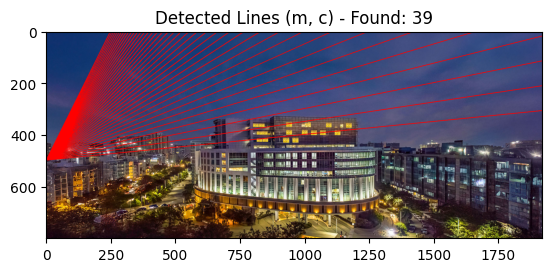

In [24]:
# Execution
edges = cv2.Canny(img, 50, 150)
acc_mc, m_vals, c_vals = hough_slope_intercept(edges, m_range=(-2, 2), m_step=0.05)

# Normalization and Thresholding
threshold_percent = 0.90
acc_max = np.max(acc_mc)
detected_indices = np.argwhere(acc_mc > threshold_percent * acc_max)
detected_lines_mc = [(m_vals[i], c_vals[j]) for i, j in detected_indices]

# Display result
plt.imshow(draw_lines_mc(img, detected_lines_mc))
plt.title(f"Detected Lines (m, c) - Found: {len(detected_lines_mc)}")
plt.show()

In [25]:
def hough_rho_theta(edge_map, rho_step=1, theta_step=np.pi/180):
    h, w = edge_map.shape
    diag_len = int(np.sqrt(h**2 + w**2))

    # Theta from 0 to Pi, Rho from -diag to +diag
    thetas = np.arange(0, np.pi, theta_step)
    rhos = np.arange(-diag_len, diag_len, rho_step)
    accumulator = np.zeros((len(rhos), len(thetas)))

    y_coords, x_coords = np.nonzero(edge_map)

    # Voting procedure
    for i in range(len(x_coords)):
        x, y = x_coords[i], y_coords[i]
        for t_idx, theta in enumerate(thetas):
            rho = x * np.cos(theta) + y * np.sin(theta)
            r_idx = int((rho + diag_len) / rho_step)
            accumulator[r_idx, t_idx] += 1

    return accumulator, rhos, thetas

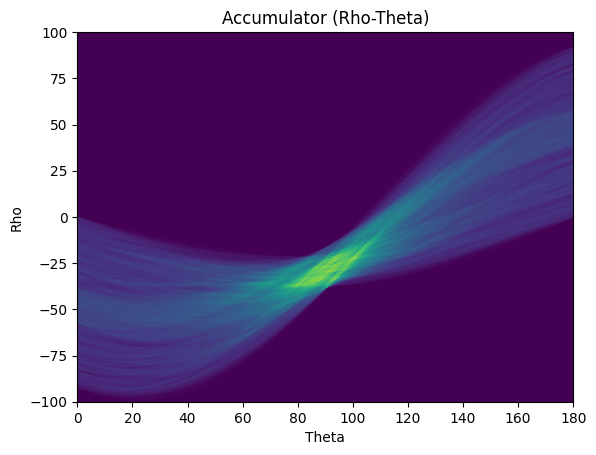

In [27]:
# Execution
acc_rt, rho_vals, theta_vals = hough_rho_theta(edges)
plt.imshow(acc_rt, extent=[0, 180, -100, 100], aspect='auto')
plt.title("Accumulator (Rho-Theta)")
plt.xlabel("Theta")
plt.ylabel("Rho")
plt.show()

### Bonus - Part D

Here, what you have to do is something like :    
1. Create a python function that will take the first image and a set of coordinates ( x1,y1 ) - top left and ( x2,y2 ) - bottom right to form a box around the white ball. Now, find gradients, select the biggest completed gradient ( maximum area contour ) and then create an RGBA ( 4 channel ) stencil.

2. Now, create another function that takes this stencil and second image and a coordinate ( x3,y3 ). Now, treat ( x3,y3 ) as center point and overlap the RGBA stencil with second image. Keep x3 y3 such that it is towards the right to make it look like that white ball is on the green pool image.


Again, I do not expect you guys to get a really good result. Try your best though.

array([[[ 91,  71,  46],
        [ 91,  71,  46],
        [ 92,  72,  47],
        ...,
        [ 87,  71,  58],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       [[ 90,  70,  47],
        [ 90,  70,  47],
        [ 90,  70,  47],
        ...,
        [ 86,  70,  57],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       [[ 87,  66,  45],
        [ 87,  66,  45],
        [ 87,  66,  45],
        ...,
        [ 86,  70,  57],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       ...,

       [[  8,  83, 215],
        [  8,  83, 215],
        [  8,  83, 215],
        ...,
        [  7,  72, 198],
        [  6,  71, 197],
        [  6,  71, 197]],

       [[  8,  83, 215],
        [  8,  83, 215],
        [  8,  83, 215],
        ...,
        [  7,  72, 198],
        [  6,  71, 197],
        [  6,  71, 197]],

       [[  7,  84, 215],
        [  7,  84, 215],
        [  7,  84, 215],
        ...,
        [  7,  70, 198],
        [  7,  70, 198],
        [  7,  70, 198]]], dtype=uint8)
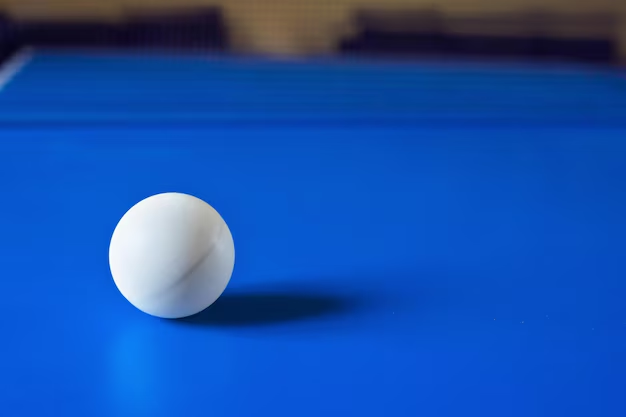

In [28]:
ball

array([[[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       [[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       [[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       ...,

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]],

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]],

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]]], dtype=uint8)
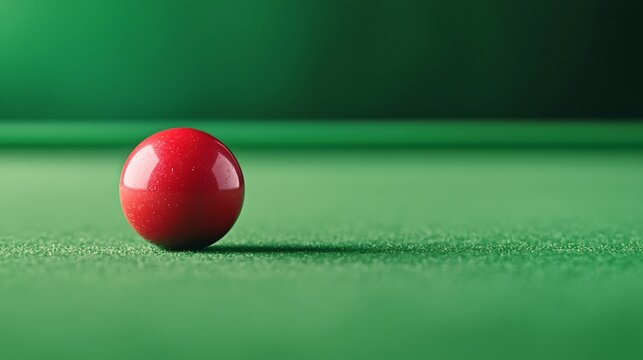

In [29]:
ball2

In [30]:
def create_rgba_stencil(image, x1, y1, x2, y2):
    roi = image[y1:y2, x1:x2]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    # Find gradients and biggest contour for the ball
    edges = cv2.Canny(gray_roi, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros(gray_roi.shape, dtype=np.uint8)
    if contours:
        max_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(mask, [max_contour], -1, 255, thickness=cv2.FILLED)

    # Create 4-channel image (RGBA)
    rgba = cv2.cvtColor(roi, cv2.COLOR_RGB2RGBA)
    rgba[:, :, 3] = mask
    return rgba

def overlay_on_image(bg, stencil, x3, y3):
    h_s, w_s = stencil.shape[:2]
    y_start, x_start = y3 - h_s//2, x3 - w_s//2

    output = bg.copy()
    roi_bg = output[y_start:y_start+h_s, x_start:x_start+w_s]

    alpha = stencil[:, :, 3] / 255.0
    for c in range(3):
        roi_bg[:, :, c] = (stencil[:, :, c] * alpha + roi_bg[:, :, c] * (1 - alpha))

    output[y_start:y_start+h_s, x_start:x_start+w_s] = roi_bg
    return output

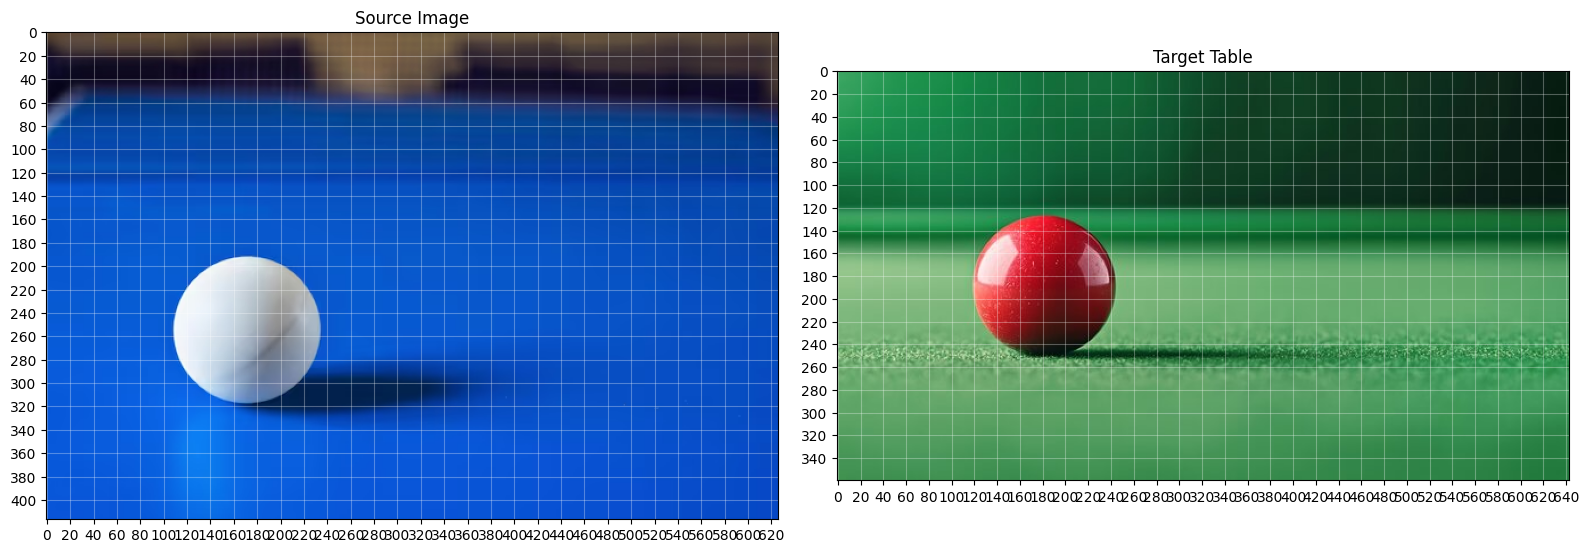

In [34]:
# Finding the right coordinates

def find_coords(img1, img2):
    plt.figure(figsize=(16, 8))

    # Plot first image to find (x1, y1) and (x2, y2)
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title("Source Image")
    plt.grid(True, color='white', alpha=0.3) # Adds a grid
    plt.xticks(np.arange(0, img1.shape[1], 20)) # Tick every 10 pixels
    plt.yticks(np.arange(0, img1.shape[0], 20))

    # Plot second image to find (x3, y3)
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title("Target Table")
    plt.grid(True, color='white', alpha=0.3)
    plt.xticks(np.arange(0, img2.shape[1], 20))
    plt.yticks(np.arange(0, img2.shape[0], 20))

    plt.tight_layout()
    plt.show()

find_coords(ball, ball2)

In [ ]:
# x1 y1 = 105 187
# x2 y2 = 237 320
# x3 y3 = 460 190

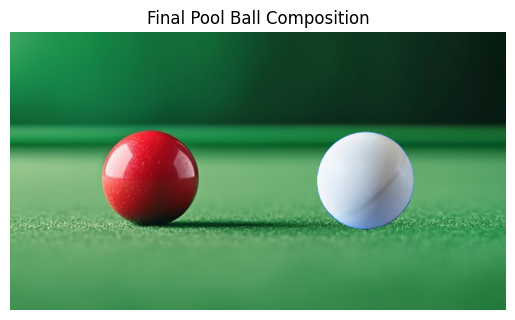

In [36]:
# Create stencil from 'ball' using coordinates for white ball
# Overlay onto 'ball2' (green pool table) with x3 shifted to the right
my_stencil = create_rgba_stencil(ball, 105, 187, 237, 320)
result = overlay_on_image(ball2, my_stencil, x3=460, y3=190)

plt.imshow(result)
plt.title("Final Pool Ball Composition")
plt.axis('off')
plt.show()